Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, VarianceThreshold(0.95), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func

Version = "v55" # inference used v51, Not using create_cluster func

In [2]:
# DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
    Learning_rate = 0.03
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30
    Learning_rate = 0.02

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v51.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                      d_g-493                d_g-351       df_g-322   
1                      d_g-278                  g-497       df_g-420   
2                        g-648                d_g-401        df_g-39   
3                        g-344                 d_g-21        df_g-22   
4                        g-631                d_g-423        d_g-626   
..                         ...                    ...            ...   
95                    df_g-566               df_g-434       df_g-632   
96                       g-591                  g-424          g-411   
97                     d_g-604                  d_g-1       df_g-536   
98                       g-374                  g-411          g-464   
99                       g-146               df_g-267       df_g-263   

   acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                         d_g-363                          df_g-743   
1                         df_g-39                            d_c-87   
2                         d_g-717                          df_g-663   
3                          d_g-39                            df_c-6   
4                        df_g-539                           df_g-26   
..                            ...                               ...   
95                       df_g-630                           d_g-310   
96                        d_g-432                           d_g-737   
97                          g-244                           d_g-692   
98                           g-91                            df_c-8   
99                           g-51                          df_g-155   

   acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                        df_g-630                   df_g-386   
1                         df_g-91                   df_g-314   
2                        df_g-380                   df_g-640   
3                        df_g-313                    df_c-72   
4                         d_g-705                   df_g-310   
..                            ...                        ...   
95                       df_g-117                   df_g-586   
96                        d_g-414                    d_g-136   
97                          g-131                   df_g-735   
98                       df_g-551                     d_g-91   
99                       df_g-523                   df_g-645   

   adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                        d_g-628                       g-91   
1                       df_g-140                    d_g-639   
2                         d_g-28                       c-97   
3                       df_g-469                    d_g-705   
4                       df_g-266                     d_g-91   
..                           ...                        ...   
95                         g-405                      g-564   
96                        d_g-17                      g-480   
97                       df_g-44                   df_g-610   
98                      df_g-460                   df_g-151   
99                      df_g-671                    d_g-645   

   adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                        d_g-8  ...                                 g-226   
1                        g-385  ...                               d_g-283   
2                     df_g-236  ...                                 g-280   
3                      df_c-76  ...                              df_g-612   
4                        g-201  ...                               df_g-31   
..                         ...  ...                                   ...   
95                       g-414  ...                              df_g-174   
96                       g-714  ...                                 g-562   
97                     df_c-89  ...                               

# Training Utils

In [13]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [14]:
# Under sampling func with drug anotation(New data file)

def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [15]:
#===========================================================
# model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}, target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, X_test, feature_importance_df_ = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    y_preds = []
    models = []
    oof_train = np.zeros((len(train_X),))
    score = 0
        
    for fold_, (train_index, valid_index) in enumerate(cv.split(train_X, train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr = train_X.loc[train_index, :]
        X_val = train_X.loc[valid_index, :]
        y_tr = train_y[train_index]
        y_val = train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=300,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(X_test, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
        models.append(model)
    
    score = log_loss(train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
    
    return sum(y_preds) / len(y_preds), score, models, feature_importance_df_

In [16]:
def create_features(df, selected_cols, func):
        
    _df = df.copy()

    def func_division(row):
        d = 1e-6
        return (row[col1]+d) / (row[col2]+d)
    
    for i in range(len(selected_cols)-1):
        col1, col2 = selected_cols[i], selected_cols[i+1]
        _df[f"{col1}_{col2}_div"] = _df[[col1, col2]].apply(func_division, axis=1)
        _df[f"{col1}_{col2}_{func}"] = _df[[col1, col2]].apply(func, axis=1)
    
    return _df

In [17]:
def Feature_Engineering(target_col, X_train_df, X_test_df, N_bin):
    
    # extract important features to the target variable
    selected_cols = importance_cols[target_col]
    
    _X_train_df = X_train_df[selected_cols].copy()
    _X_test_df = X_test_df[selected_cols].copy()
    
    # merge data from train and test
    _X_train_df['WHERE'] = 'train'
    _X_test_df['WHERE'] = 'test'
    _X_data = _X_train_df.append(_X_test_df)
    _X_data = _X_data.reset_index(drop=True)
    
    #  func_list = ("max", "min", "mean", "median", "mad", "var", "std", "kurtosis", "Skew")
    _X_data = create_features(_X_data, selected_cols, func="mean")
    
    # measure row statistics
    _X_data = fe_stats(_X_data, selected_cols, target_col)
    
    # create clusters
    # _X_data[f'clusters_{target_col}'] = create_cluster(_X_data, selected_cols, n_clusters)
        
    
    # split data for train and test
    _X_train = _X_data[_X_data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
    _X_test = _X_data[_X_data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return _X_train, _X_test
    

In [18]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    df = df.copy()
    Probability = df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [19]:
# lgbm with pseudo_labeling
classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': Learning_rate,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'subsample_freq': 5,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 2,
}

In [20]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
       
    X = X_train.copy()
    y = y_train.copy()
    
    X, X_test = Feature_Engineering(target_col, X, X_test, N_bin=7)
    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        
        y_prob = np.zeros((X_test.shape[0]))
        
        X_conf = pd.DataFrame()
        y_conf = pd.DataFrame()
        _importance_df = pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        for fold_, (train_idx, valid_idx) in enumerate(cv.split(X, y)):        
            X_tr, X_val = X.loc[train_idx, :], X.loc[valid_idx, :]
            y_tr, y_val = y[train_idx], y[valid_idx]
            
            clf = LGBMClassifier(**classifier_params)
            
            clf.fit(X_tr, y_tr,
                    eval_set=[(X_tr, y_tr), (X_val, y_val)],
                    eval_metric='logloss',
                    verbose=300,
                    early_stopping_rounds=Early_stopping_rounds)
            
            y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
            y_prob += clf.predict_proba(X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
            # feature importance with target col
            _importance_df["importance"] = clf.feature_importances_
            feature_importance_df = pd.concat([feature_importance_df, _importance_df], axis=0)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}, Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # Set the params of threshold based on train labels rate (target_rate).
        if (p_label_rate*1.5) < target_rate:
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label)*(3.5-len(str(int(check)))) >= check) or ((Threshold-0.03) <= 0.1): break 
                Threshold -= 0.03
                high_conf_0, high_conf_1 = max(0.1, Threshold*lower), Threshold*upper
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
        if p_label_rate > (target_rate*1.5):
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label) <= check*(3.5-len(str(int(check))))) or ((Threshold+0.05) >= 0.8): break
                Threshold += 0.05
                high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        # select data with confidence
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
            
        X = pd.concat([X_corect, X_conf], axis=0, ignore_index=True)
        y = pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test, feature_importance_df

In [21]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [22]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [23]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [24]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [25]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [26]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [27]:
# clipping

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [28]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [29]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [30]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [31]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [32]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [33]:
#std_df = data.iloc[:, 4:].copy()

In [34]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [35]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [36]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [37]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [38]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [39]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': Learning_rate,
    'num_threads': 2,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1':0.1,
    'lambda_l2':0.1,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
}


neg labels: 3289 → selected neg labels: 3284


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284, target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00425826	valid_1's binary_logloss: 0.0078388
[600]	training's binary_logloss: 0.000540011	valid_1's binary_logloss: 0.00191743
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000337828	valid_1's binary_logloss: 0.00142503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00432603	valid_1's binary_logloss: 0.00927197
[600]	training's binary_logloss: 0.000539961	valid_1's binary_logloss: 0.00244233
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000338957	valid_1's binary_logloss: 0.00181083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441542	valid_1's binary_logloss: 0.0102031
[600]	training's binary_logloss: 0.000544283	valid_1's binary_logloss: 0.00273952
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000346723	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0022055, Threshold: 0.0132121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071, Num_p_label: 40.0, conf_0:0.00925, conf_1:0.01718
Num_p_label: 40.0, Expected: 2.8, Adj_threshold_1: 0.0132121
Num_p_label: 8.0, Expected: 2.8, Adj_threshold_2: 0.0632121
Num_p_label: 1.0, Expected: 2.8, Adj_threshold_3: 0.1132121
threshold: 0.1132121, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368075	valid_1's binary_logloss: 0.0081139
[600]	training's binary_logloss: 0.000482612	valid_1's binary_logloss: 0.00190948
[900]	training's binary_logloss: 0.000321384	valid_1's binary_logloss: 0.00147505
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.00032201	valid_1's binary_logloss: 0.00147354
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384133	valid_1's binary_logloss: 0.00747115
[600]	training's binary_logloss: 0.000490845	valid_1's binary_logloss: 0.00171287
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000331659	valid_1's binary_logloss: 0.00134543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368043	valid_1's binary_logloss: 0.00719461
[600]	training's binary_logloss: 0.000481311	valid_1's binary_logloss: 0.00148214
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.1904431, Threshold: 0.1132121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00071, Num_p_label: 29.0, conf_0:0.09057, conf_1:0.13585
Num_p_label: 29.0, Expected: 2.8, Adj_threshold_1: 0.1132121
Num_p_label: 19.0, Expected: 2.8, Adj_threshold_2: 0.1632121
Num_p_label: 14.0, Expected: 2.8, Adj_threshold_3: 0.2132121
Num_p_label: 12.0, Expected: 2.8, Adj_threshold_4: 0.2632121
Num_p_label: 12.0, Expected: 2.8, Adj_threshold_5: 0.3132121
Num_p_label: 10.0, Expected: 2.8, Adj_threshold_6: 0.3632121
Num_p_label: 8.0, Expected: 2.8, Adj_threshold_7: 0.4132121
Num_p_label: 4.0, Expected: 2.8, Adj_threshold_8: 0.4632121
threshold: 0.4632121, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368075	valid_1's binary_logloss: 0.0081139
[600]	training's binary_logloss: 0.000482612	valid_1's binary_logloss: 0.00190948
[900]	training's binary_logloss: 0.000321384	valid_1's binary_logloss: 0.00147505
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.00032201	valid_1's binary_logloss: 0.00147354
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384133	valid_1's binary_logloss: 0.00747115
[600]	training's binary_logloss: 0.000490845	valid_1's binary_logloss: 0.00171287
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000331659	valid_1's binary_logloss: 0.00134543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368043	valid_1's binary_logloss: 0.00719461
[600]	training's binary_logloss: 0.000481311	valid_1's binary_logloss: 0.00148214
Early stopping

3 / 3 AUC score:1.000
y_Threshold: 0.1904431, Threshold: 0.4632121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00071, Num_p_label: 4.0, conf_0:0.41689, conf_1:0.50953
threshold: 0.4632121, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


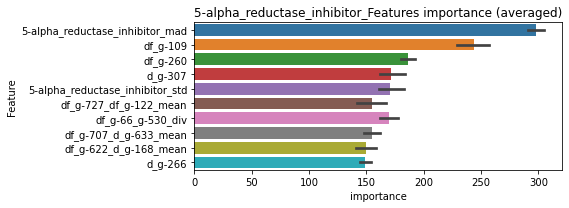

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00375821	valid_1's binary_logloss: 0.0085218
[600]	training's binary_logloss: 0.000481465	valid_1's binary_logloss: 0.00189747
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000325605	valid_1's binary_logloss: 0.00147074


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384848	valid_1's binary_logloss: 0.00731896
[600]	training's binary_logloss: 0.000492509	valid_1's binary_logloss: 0.0015634
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000333563	valid_1's binary_logloss: 0.00125023


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376021	valid_1's binary_logloss: 0.00704965
[600]	training's binary_logloss: 0.000483361	valid_1's binary_logloss: 0.0014432
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000329913	valid_1's binary_logloss: 0.00108739


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373509	valid_1's binary_logloss: 0.00828051
[600]	training's binary_logloss: 0.000482788	valid_1's binary_logloss: 0.00268518
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000345107	valid_1's binary_logloss: 0.00240787


5-alpha_reductase_inhibitor logloss: 0.001554349898563423


neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00406273	valid_1's binary_logloss: 0.00948852
[600]	training's binary_logloss: 0.000522587	valid_1's binary_logloss: 0.00291284
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000326043	valid_1's binary_logloss: 0.00221266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0041839	valid_1's binary_logloss: 0.00813991
[600]	training's binary_logloss: 0.000526072	valid_1's binary_logloss: 0.00186818
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000339736	valid_1's binary_logloss: 0.00145524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00417495	valid_1's binary_logloss: 0.00741654
[600]	training's binary_logloss: 0.000520618	valid_1's binary_logloss: 0.00157954
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000329894	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0021720, Threshold: 0.0158426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01109, conf_1:0.02060
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0158426
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.0658426
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.1158426
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.1658426
threshold: 0.1658426, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00372503	valid_1's binary_logloss: 0.00692028
[600]	training's binary_logloss: 0.0004698	valid_1's binary_logloss: 0.00141847
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000311507	valid_1's binary_logloss: 0.00111451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357391	valid_1's binary_logloss: 0.00772226
[600]	training's binary_logloss: 0.000453331	valid_1's binary_logloss: 0.00166335
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000304203	valid_1's binary_logloss: 0.00131958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367894	valid_1's binary_logloss: 0.00489484
[600]	training's binary_logloss: 0.000465381	valid_1's binary_logloss: 0.000831592
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000303861	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0824738, Threshold: 0.1658426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0057760 Vs.target_rate: 0.00076, Num_p_label: 23.0, conf_0:0.13267, conf_1:0.19901
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.1658426
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.2158426
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.2658426
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.3158426
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_5: 0.3658426
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.4158426
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.4658426
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.5158426
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.5658426
threshold: 0.5658426, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00372503	valid_1's binary_logloss: 0.00692028
[600]	training's binary_logloss: 0.0004698	valid_1's binary_logloss: 0.00141847
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000311507	valid_1's binary_logloss: 0.00111451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357391	valid_1's binary_logloss: 0.00772226
[600]	training's binary_logloss: 0.000453331	valid_1's binary_logloss: 0.00166335
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000304203	valid_1's binary_logloss: 0.00131958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367894	valid_1's binary_logloss: 0.00489484
[600]	training's binary_logloss: 0.000465381	valid_1's binary_logloss: 0.000831592
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000303861	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0824738, Threshold: 0.5658426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.50000, conf_1:0.62243
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.5658426
threshold: 0.5658426, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


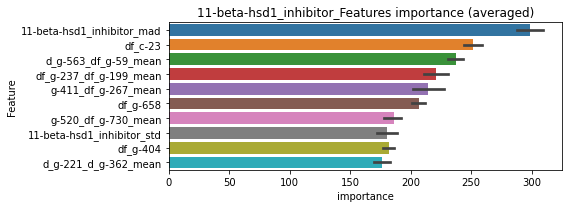

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361379	valid_1's binary_logloss: 0.00676869
[600]	training's binary_logloss: 0.000463423	valid_1's binary_logloss: 0.00142731
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000308613	valid_1's binary_logloss: 0.00108859


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00355884	valid_1's binary_logloss: 0.00770505
[600]	training's binary_logloss: 0.000455358	valid_1's binary_logloss: 0.00175046
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000310455	valid_1's binary_logloss: 0.00138418


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362531	valid_1's binary_logloss: 0.00486854
[600]	training's binary_logloss: 0.000465534	valid_1's binary_logloss: 0.000831352
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.00030752	valid_1's binary_logloss: 0.000578237


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364757	valid_1's binary_logloss: 0.00806893
[600]	training's binary_logloss: 0.000465275	valid_1's binary_logloss: 0.00200864
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000310376	valid_1's binary_logloss: 0.00163241


11-beta-hsd1_inhibitor logloss: 0.0011707318104069702


neg labels: 3289 → selected neg labels: 3282


acat_inhibitor, len(trt): 24, len(othr): 3282, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511134	valid_1's binary_logloss: 0.0229455
[600]	training's binary_logloss: 0.000647987	valid_1's binary_logloss: 0.0127398
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000439285	valid_1's binary_logloss: 0.0118307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00544451	valid_1's binary_logloss: 0.0200735
[600]	training's binary_logloss: 0.000671566	valid_1's binary_logloss: 0.010176
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000419837	valid_1's binary_logloss: 0.0094423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541822	valid_1's binary_logloss: 0.0212714
[600]	training's binary_logloss: 0.000669476	valid_1's binary_logloss: 0.0100906
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000379062	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0034833, Threshold: 0.0315980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.02212, conf_1:0.04108
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0315980
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_2: 0.0815980
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_3: 0.1315980
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_4: 0.1815980
threshold: 0.1815980, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449703	valid_1's binary_logloss: 0.0180937
[600]	training's binary_logloss: 0.000565	valid_1's binary_logloss: 0.00928695
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000437387	valid_1's binary_logloss: 0.0086339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462797	valid_1's binary_logloss: 0.022159
[600]	training's binary_logloss: 0.000572131	valid_1's binary_logloss: 0.0145122
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000420702	valid_1's binary_logloss: 0.0141294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00493983	valid_1's binary_logloss: 0.0198701
[600]	training's binary_logloss: 0.000590847	valid_1's binary_logloss: 0.0108241
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000354531	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0889815, Threshold: 0.1815980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0140633 Vs.target_rate: 0.00101, Num_p_label: 56.0, conf_0:0.14528, conf_1:0.21792
Num_p_label: 56.0, Expected: 4.0, Adj_threshold_1: 0.1815980
Num_p_label: 48.0, Expected: 4.0, Adj_threshold_2: 0.2315980
Num_p_label: 43.0, Expected: 4.0, Adj_threshold_3: 0.2815980
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_4: 0.3315980
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_5: 0.3815980
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_6: 0.4315980
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_7: 0.4815980
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_8: 0.5315980
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_9: 0.5815980
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_10: 0.6315980
threshold: 0.6815980, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440471	valid_1's binary_logloss: 0.0146829
[600]	training's binary_logloss: 0.000553881	valid_1's binary_logloss: 0.0065343
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000367948	valid_1's binary_logloss: 0.00583675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00458612	valid_1's binary_logloss: 0.00932219
[600]	training's binary_logloss: 0.000571013	valid_1's binary_logloss: 0.00204488
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000342611	valid_1's binary_logloss: 0.0014422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00446587	valid_1's binary_logloss: 0.0115116
[600]	training's binary_logloss: 0.000558196	valid_1's binary_logloss: 0.00472747
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000333401	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.1461036, Threshold: 0.6815980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0067805 Vs.target_rate: 0.00101, Num_p_label: 27.0, conf_0:0.50000, conf_1:0.74976
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_1: 0.6815980
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_2: 0.7315980
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_3: 0.7815980
threshold: 0.7815980, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


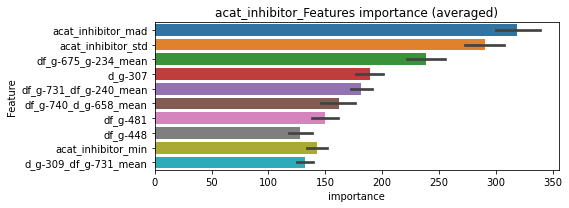

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00430468	valid_1's binary_logloss: 0.0135049
[600]	training's binary_logloss: 0.000545675	valid_1's binary_logloss: 0.00605287
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000356472	valid_1's binary_logloss: 0.00539591


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448993	valid_1's binary_logloss: 0.0127488
[600]	training's binary_logloss: 0.00055489	valid_1's binary_logloss: 0.00491293
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000366334	valid_1's binary_logloss: 0.0043346


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445009	valid_1's binary_logloss: 0.0121666
[600]	training's binary_logloss: 0.000552864	valid_1's binary_logloss: 0.00333714
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000364352	valid_1's binary_logloss: 0.00254597


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444835	valid_1's binary_logloss: 0.0195058
[600]	training's binary_logloss: 0.000555473	valid_1's binary_logloss: 0.0109576
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000413886	valid_1's binary_logloss: 0.0104232


acat_inhibitor logloss: 0.005674479120354768


neg labels: 3289 → selected neg labels: 3261


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3261, target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0483398	valid_1's binary_logloss: 0.232458
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.0252889	valid_1's binary_logloss: 0.226606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0473612	valid_1's binary_logloss: 0.192822
[600]	training's binary_logloss: 0.00944813	valid_1's binary_logloss: 0.172954
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00877135	valid_1's binary_logloss: 0.17248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0489961	valid_1's binary_logloss: 0.197117
[600]	training's binary_logloss: 0.00976818	valid_1's binary_logloss: 0.178666
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00928412	valid_1's binary_logloss: 0.178479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_

1 / 3 AUC score:0.932
y_Threshold: 0.0603482, Threshold: 0.3897679, pos_neg_ratio: 0.8000000
Remove_noisy_data: 327 → Positive_corect_labels: 554/3586
p_label_rate: 0.0100452 Vs.target_rate: 0.00798, Num_p_label: 40.0, conf_0:0.27284, conf_1:0.50670
threshold: 0.3897679, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 554.0/3586, y_label_rate: 0.1544897
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234623	valid_1's binary_logloss: 0.131321
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00581934	valid_1's binary_logloss: 0.119742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021006	valid_1's binary_logloss: 0.148949
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00751531	valid_1's binary_logloss: 0.140556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205242	valid_1's binary_logloss: 0.135391
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.0187057	valid_1's binary_logloss: 0.134498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227737	valid_1's binary_logloss: 0.125263
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00628999	valid_1's binary_logloss:

2 / 3 AUC score:0.975
y_Threshold: 0.0758601, Threshold: 0.3897679, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 485.0/3448
p_label_rate: 0.0444500 Vs.target_rate: 0.00798, Num_p_label: 177.0, conf_0:0.31181, conf_1:0.46772
Num_p_label: 177.0, Expected: 31.8, Adj_threshold_1: 0.3897679
Num_p_label: 152.0, Expected: 31.8, Adj_threshold_2: 0.4397679
Num_p_label: 127.0, Expected: 31.8, Adj_threshold_3: 0.4897679
Num_p_label: 109.0, Expected: 31.8, Adj_threshold_4: 0.5397679
Num_p_label: 98.0, Expected: 31.8, Adj_threshold_5: 0.5897679
Num_p_label: 80.0, Expected: 31.8, Adj_threshold_6: 0.6397679
Num_p_label: 76.0, Expected: 31.8, Adj_threshold_7: 0.6897679
Num_p_label: 63.0, Expected: 31.8, Adj_threshold_8: 0.7397679
Num_p_label: 53.0, Expected: 31.8, Adj_threshold_9: 0.7897679
threshold: 0.7897679, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 485.0/3448, y_label_rate: 0.1406613
================= Pseudo labeling 3 / 3 ================

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116741	valid_1's binary_logloss: 0.088334
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00272499	valid_1's binary_logloss: 0.0818116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116452	valid_1's binary_logloss: 0.0889964
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0054407	valid_1's binary_logloss: 0.0845118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128056	valid_1's binary_logloss: 0.0703751
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00229459	valid_1's binary_logloss: 0.0622852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116302	valid_1's binary_logloss: 0.108207


3 / 3 AUC score:0.986
y_Threshold: 0.0692209, Threshold: 0.7897679, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 444.0/3366


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00400158	valid_1's binary_logloss: 0.102263


p_label_rate: 0.0271220 Vs.target_rate: 0.00798, Num_p_label: 108.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 108.0, Expected: 31.8, Adj_threshold_1: 0.7897679
threshold: 0.7897679, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 444.0/3366, y_label_rate: 0.1319073


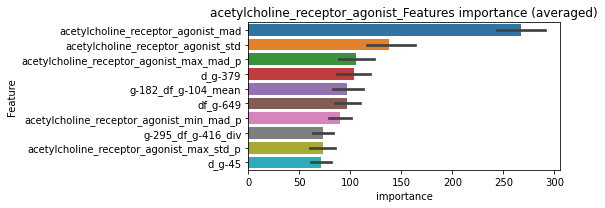

len(train_index) : 2524
len(valid_index) : 842
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00731639	valid_1's binary_logloss: 0.0578852


len(train_index) : 2524
len(valid_index) : 842
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00213478	valid_1's binary_logloss: 0.0521434
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0081262	valid_1's binary_logloss: 0.0434404
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00142198	valid_1's binary_logloss: 0.0371721


len(train_index) : 2525
len(valid_index) : 841
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00793882	valid_1's binary_logloss: 0.040335
[600]	training's binary_logloss: 0.00120598	valid_1's binary_logloss: 0.0300868
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000888107	valid_1's binary_logloss: 0.0294165


len(train_index) : 2525
len(valid_index) : 841
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0071624	valid_1's binary_logloss: 0.0842647


acetylcholine_receptor_agonist logloss: 0.050432427738340294


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00617039	valid_1's binary_logloss: 0.0830114
neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241, target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0786485	valid_1's binary_logloss: 0.290253
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.0525961	valid_1's binary_logloss: 0.286688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0708991	valid_1's binary_logloss: 0.308555
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.0540524	valid_1's binary_logloss: 0.305391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0794084	valid_1's binary_logloss: 0.27815
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.0398094	valid_1's binary_logloss: 0.266637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0783145	valid_1's binary_logloss: 0.294714


1 / 3 AUC score:0.846
y_Threshold: 0.1051076, Threshold: 0.4487549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 534 → Positive_corect_labels: 446/3355
p_label_rate: 0.0100452 Vs.target_rate: 0.01264, Num_p_label: 40.0, conf_0:0.31413, conf_1:0.58338
threshold: 0.4487549, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.063201	valid_1's binary_logloss: 0.292435


positive_y_label: 446.0/3355, y_label_rate: 0.1329359
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209617	valid_1's binary_logloss: 0.147534
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.00681382	valid_1's binary_logloss: 0.13923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210623	valid_1's binary_logloss: 0.130346
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00961874	valid_1's binary_logloss: 0.125991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023479	valid_1's binary_logloss: 0.125803
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00756577	valid_1's binary_logloss: 0.117616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228707	valid_1's binary_logloss: 0.105735
[600]	training's binary_logloss: 0.0035151	valid_1's binary_logloss: 0.0846215
Early stopping, best iter

2 / 3 AUC score:0.980
y_Threshold: 0.0730760, Threshold: 0.4487549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 391.0/3245
p_label_rate: 0.0328980 Vs.target_rate: 0.01264, Num_p_label: 131.0, conf_0:0.35900, conf_1:0.53851
Num_p_label: 131.0, Expected: 50.3, Adj_threshold_1: 0.4487549
Num_p_label: 121.0, Expected: 50.3, Adj_threshold_2: 0.4987549
Num_p_label: 115.0, Expected: 50.3, Adj_threshold_3: 0.5487549
Num_p_label: 110.0, Expected: 50.3, Adj_threshold_4: 0.5987549
Num_p_label: 104.0, Expected: 50.3, Adj_threshold_5: 0.6487549
Num_p_label: 91.0, Expected: 50.3, Adj_threshold_6: 0.6987549
Num_p_label: 87.0, Expected: 50.3, Adj_threshold_7: 0.7487549
Num_p_label: 75.0, Expected: 50.3, Adj_threshold_8: 0.7987549
threshold: 0.7987549, positive_p_label: 75.0/3982, p_label_rate: 0.0188348
positive_y_label: 391.0/3245, y_label_rate: 0.1204931
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123127	valid_1's binary_logloss: 0.0777568
[600]	training's binary_logloss: 0.00183621	valid_1's binary_logloss: 0.0591485
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.00153763	valid_1's binary_logloss: 0.058554
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134388	valid_1's binary_logloss: 0.0784509
[600]	training's binary_logloss: 0.00198441	valid_1's binary_logloss: 0.0598558
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00216054	valid_1's binary_logloss: 0.0596852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138708	valid_1's binary_logloss: 0.0671283
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00314278	valid_1's binary_logloss: 0.0532928
Training until validation scores don't improve for 30 rounds
[300]	training'

3 / 3 AUC score:0.991
y_Threshold: 0.0485250, Threshold: 0.7987549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 372.0/3207
p_label_rate: 0.0321447 Vs.target_rate: 0.01264, Num_p_label: 128.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 128.0, Expected: 50.3, Adj_threshold_1: 0.7987549
threshold: 0.7987549, positive_p_label: 128.0/3982, p_label_rate: 0.0321447


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00571353	valid_1's binary_logloss: 0.109383


positive_y_label: 372.0/3207, y_label_rate: 0.1159963


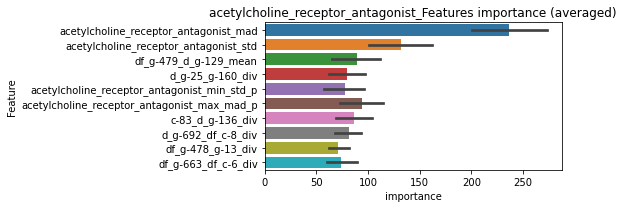

len(train_index) : 2405
len(valid_index) : 802
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104027	valid_1's binary_logloss: 0.0917719


len(train_index) : 2405
len(valid_index) : 802
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00312388	valid_1's binary_logloss: 0.0840545
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0092867	valid_1's binary_logloss: 0.10467


len(train_index) : 2405
len(valid_index) : 802
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00589639	valid_1's binary_logloss: 0.102961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00986889	valid_1's binary_logloss: 0.0746124
[600]	training's binary_logloss: 0.00150969	valid_1's binary_logloss: 0.0631763
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.00136156	valid_1's binary_logloss: 0.0630869


len(train_index) : 2406
len(valid_index) : 801
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104844	valid_1's binary_logloss: 0.0645439
[600]	training's binary_logloss: 0.00161265	valid_1's binary_logloss: 0.0487534
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00127178	valid_1's binary_logloss: 0.0477178


acetylcholine_receptor_antagonist logloss: 0.07446333509858957


neg labels: 3289 → selected neg labels: 3281


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215192	valid_1's binary_logloss: 0.0814286
[600]	training's binary_logloss: 0.00284055	valid_1's binary_logloss: 0.0508807
[900]	training's binary_logloss: 0.00104572	valid_1's binary_logloss: 0.046264
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.00103731	valid_1's binary_logloss: 0.0462387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218361	valid_1's binary_logloss: 0.0858008
[600]	training's binary_logloss: 0.00283847	valid_1's binary_logloss: 0.0611438
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.0016716	valid_1's binary_logloss: 0.0600489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210504	valid_1's binary_logloss: 0.0578805
[600]	training's binary_logloss: 0.00283375	valid_1's binary_logloss: 0.0259257
[900]	training's binary_logloss:

1 / 3 AUC score:0.996
y_Threshold: 0.0188459, Threshold: 0.1131696, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 642/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.07922, conf_1:0.14712
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.1131696
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_2: 0.1631696
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_3: 0.2131696
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_4: 0.2631696
threshold: 0.2631696, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 642.0/3777, y_label_rate: 0.1699762
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015351	valid_1's binary_logloss: 0.0663308
[600]	training's binary_logloss: 0.00203657	valid_1's binary_logloss: 0.0419546
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.00117275	valid_1's binary_logloss: 0.0398345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146454	valid_1's binary_logloss: 0.0766925
[600]	training's binary_logloss: 0.00195294	valid_1's binary_logloss: 0.0596118
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00184673	valid_1's binary_logloss: 0.0593777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161499	valid_1's binary_logloss: 0.0484188
[600]	training's binary_logloss: 0.00210189	valid_1's binary_logloss: 0.0258466
[900]	training's binary_logloss: 0.000859939	valid_1's binary_logloss: 0.0219993
Early stopping, best iteration

2 / 3 AUC score:0.999
y_Threshold: 0.0727340, Threshold: 0.2631696, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 627.0/3747
p_label_rate: 0.0180814 Vs.target_rate: 0.00307, Num_p_label: 72.0, conf_0:0.21054, conf_1:0.31580
Num_p_label: 72.0, Expected: 12.2, Adj_threshold_1: 0.2631696
Num_p_label: 68.0, Expected: 12.2, Adj_threshold_2: 0.3131696
Num_p_label: 63.0, Expected: 12.2, Adj_threshold_3: 0.3631696
Num_p_label: 56.0, Expected: 12.2, Adj_threshold_4: 0.4131696
Num_p_label: 43.0, Expected: 12.2, Adj_threshold_5: 0.4631696
Num_p_label: 41.0, Expected: 12.2, Adj_threshold_6: 0.5131696
Num_p_label: 39.0, Expected: 12.2, Adj_threshold_7: 0.5631696
Num_p_label: 36.0, Expected: 12.2, Adj_threshold_8: 0.6131696
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_9: 0.6631696
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_10: 0.7131696
threshold: 0.7631696, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 627.0/3747, y_label_rate: 0.1673339

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134452	valid_1's binary_logloss: 0.0674345
[600]	training's binary_logloss: 0.00172318	valid_1's binary_logloss: 0.0504417
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.0016248	valid_1's binary_logloss: 0.0496586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141917	valid_1's binary_logloss: 0.0629594
[600]	training's binary_logloss: 0.00182951	valid_1's binary_logloss: 0.0517165
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00182951	valid_1's binary_logloss: 0.0517165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145735	valid_1's binary_logloss: 0.0514536
[600]	training's binary_logloss: 0.00188369	valid_1's binary_logloss: 0.0281466
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.00109362	valid_1's binary_logloss: 0.0258

3 / 3 AUC score:0.998
y_Threshold: 0.0538756, Threshold: 0.7631696, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 614.0/3721
p_label_rate: 0.0135610 Vs.target_rate: 0.00307, Num_p_label: 54.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 54.0, Expected: 12.2, Adj_threshold_1: 0.7631696
threshold: 0.7631696, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 614.0/3721, y_label_rate: 0.1650094


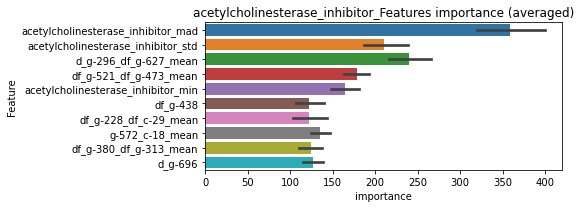

len(train_index) : 2790
len(valid_index) : 931
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123348	valid_1's binary_logloss: 0.0604365
[600]	training's binary_logloss: 0.0015948	valid_1's binary_logloss: 0.0377145
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00123846	valid_1's binary_logloss: 0.0363853


len(train_index) : 2791
len(valid_index) : 930
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129119	valid_1's binary_logloss: 0.0455341
[600]	training's binary_logloss: 0.00166954	valid_1's binary_logloss: 0.0254328
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000920311	valid_1's binary_logloss: 0.0227224


len(train_index) : 2791
len(valid_index) : 930
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122654	valid_1's binary_logloss: 0.0427336
[600]	training's binary_logloss: 0.00162386	valid_1's binary_logloss: 0.0272809
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.00126403	valid_1's binary_logloss: 0.0265198


len(train_index) : 2791
len(valid_index) : 930
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127041	valid_1's binary_logloss: 0.061763
[600]	training's binary_logloss: 0.00164231	valid_1's binary_logloss: 0.0475599
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.00109909	valid_1's binary_logloss: 0.0460189


acetylcholinesterase_inhibitor logloss: 0.032912545634675425


neg labels: 3289 → selected neg labels: 3278


adenosine_receptor_agonist, len(trt): 54, len(othr): 3278, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120679	valid_1's binary_logloss: 0.0524591
[600]	training's binary_logloss: 0.00158985	valid_1's binary_logloss: 0.0308715
[900]	training's binary_logloss: 0.000693434	valid_1's binary_logloss: 0.0275291
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000719161	valid_1's binary_logloss: 0.0274703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123027	valid_1's binary_logloss: 0.0375514
[600]	training's binary_logloss: 0.00162517	valid_1's binary_logloss: 0.0190633
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000746897	valid_1's binary_logloss: 0.0160788
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126239	valid_1's binary_logloss: 0.051433
[600]	training's binary_logloss: 0.00164332	valid_1's binary_logloss: 0.0286156
Early stopping, best iterati

1 / 3 AUC score:0.999
y_Threshold: 0.0112537, Threshold: 0.0866150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.06063, conf_1:0.11260
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0866150
Num_p_label: 30.0, Expected: 9.0, Adj_threshold_2: 0.1366150
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_3: 0.1866150
Num_p_label: 17.0, Expected: 9.0, Adj_threshold_4: 0.2366150
threshold: 0.2366150, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01052	valid_1's binary_logloss: 0.0486439
[600]	training's binary_logloss: 0.00137083	valid_1's binary_logloss: 0.0294387
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000681267	valid_1's binary_logloss: 0.0271263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104168	valid_1's binary_logloss: 0.0460955
[600]	training's binary_logloss: 0.00137316	valid_1's binary_logloss: 0.0291916
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.00078154	valid_1's binary_logloss: 0.0270927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107258	valid_1's binary_logloss: 0.0377257
[600]	training's binary_logloss: 0.00138099	valid_1's binary_logloss: 0.0172468
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000692569	valid_1's binary_logloss: 0.013

2 / 3 AUC score:1.000
y_Threshold: 0.1001777, Threshold: 0.2366150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0205927 Vs.target_rate: 0.00227, Num_p_label: 82.0, conf_0:0.18929, conf_1:0.28394
Num_p_label: 82.0, Expected: 9.0, Adj_threshold_1: 0.2366150
Num_p_label: 75.0, Expected: 9.0, Adj_threshold_2: 0.2866150
Num_p_label: 64.0, Expected: 9.0, Adj_threshold_3: 0.3366150
Num_p_label: 57.0, Expected: 9.0, Adj_threshold_4: 0.3866150
Num_p_label: 54.0, Expected: 9.0, Adj_threshold_5: 0.4366150
Num_p_label: 48.0, Expected: 9.0, Adj_threshold_6: 0.4866150
Num_p_label: 39.0, Expected: 9.0, Adj_threshold_7: 0.5366150
Num_p_label: 36.0, Expected: 9.0, Adj_threshold_8: 0.5866150
Num_p_label: 30.0, Expected: 9.0, Adj_threshold_9: 0.6366150
Num_p_label: 28.0, Expected: 9.0, Adj_threshold_10: 0.6866150
threshold: 0.7366150, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 640.0/3771, y_label_rate: 0.1697163
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00895069	valid_1's binary_logloss: 0.0517754
[600]	training's binary_logloss: 0.0012075	valid_1's binary_logloss: 0.0331589
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000613336	valid_1's binary_logloss: 0.0304996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966209	valid_1's binary_logloss: 0.0370774
[600]	training's binary_logloss: 0.00126958	valid_1's binary_logloss: 0.0237038
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.001158	valid_1's binary_logloss: 0.0234261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100127	valid_1's binary_logloss: 0.0496476
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.0015926	valid_1's binary_logloss: 0.0367412
Training until validation scores don't improve for 30 rounds
[300]	training'

3 / 3 AUC score:0.999
y_Threshold: 0.0987997, Threshold: 0.7366150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 631.0/3753
p_label_rate: 0.0107986 Vs.target_rate: 0.00227, Num_p_label: 43.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 43.0, Expected: 9.0, Adj_threshold_1: 0.7366150
Num_p_label: 35.0, Expected: 9.0, Adj_threshold_2: 0.7866150
threshold: 0.7866150, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 631.0/3753, y_label_rate: 0.1681322


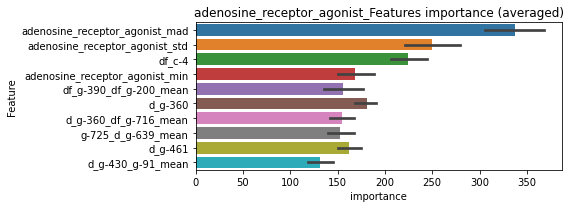

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894012	valid_1's binary_logloss: 0.0363596
[600]	training's binary_logloss: 0.00118308	valid_1's binary_logloss: 0.020196
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000628041	valid_1's binary_logloss: 0.017179


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.009231	valid_1's binary_logloss: 0.0327804
[600]	training's binary_logloss: 0.00119942	valid_1's binary_logloss: 0.0151101
[900]	training's binary_logloss: 0.000584873	valid_1's binary_logloss: 0.0121601
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000560817	valid_1's binary_logloss: 0.0120479


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0088881	valid_1's binary_logloss: 0.0335259
[600]	training's binary_logloss: 0.00115837	valid_1's binary_logloss: 0.0204965
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000719792	valid_1's binary_logloss: 0.0194261


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00897456	valid_1's binary_logloss: 0.0418514
[600]	training's binary_logloss: 0.00120111	valid_1's binary_logloss: 0.0268221
[900]	training's binary_logloss: 0.000573017	valid_1's binary_logloss: 0.0245381
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000544626	valid_1's binary_logloss: 0.0244312


adenosine_receptor_agonist logloss: 0.018270748974227473


neg labels: 3289 → selected neg labels: 3276


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3276, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220136	valid_1's binary_logloss: 0.110551
[600]	training's binary_logloss: 0.0032292	valid_1's binary_logloss: 0.0827018
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00240213	valid_1's binary_logloss: 0.0818351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022527	valid_1's binary_logloss: 0.0992671
[600]	training's binary_logloss: 0.00328916	valid_1's binary_logloss: 0.0743359
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00298199	valid_1's binary_logloss: 0.0739931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222621	valid_1's binary_logloss: 0.0975157
[600]	training's binary_logloss: 0.00322007	valid_1's binary_logloss: 0.0764592
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.00150374	valid_1's binary_logloss: 0.074786

1 / 3 AUC score:0.985
y_Threshold: 0.0255340, Threshold: 0.1334090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 196 → Positive_corect_labels: 623/3735
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.09339, conf_1:0.17343
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.1334090
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_2: 0.1834090
Num_p_label: 17.0, Expected: 16.1, Adj_threshold_3: 0.2334090
threshold: 0.2334090, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 623.0/3735, y_label_rate: 0.1668005
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158082	valid_1's binary_logloss: 0.0642207
[600]	training's binary_logloss: 0.00217113	valid_1's binary_logloss: 0.0401149
[900]	training's binary_logloss: 0.000895169	valid_1's binary_logloss: 0.037683
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000834224	valid_1's binary_logloss: 0.0372165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156107	valid_1's binary_logloss: 0.0896827
[600]	training's binary_logloss: 0.00214488	valid_1's binary_logloss: 0.0712659
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.00189035	valid_1's binary_logloss: 0.0706214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163708	valid_1's binary_logloss: 0.0658026
[600]	training's binary_logloss: 0.00216563	valid_1's binary_logloss: 0.0477515
Early stopping, best iteratio

2 / 3 AUC score:0.996
y_Threshold: 0.0596031, Threshold: 0.2334090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 596.0/3681
p_label_rate: 0.0193370 Vs.target_rate: 0.00403, Num_p_label: 77.0, conf_0:0.18673, conf_1:0.28009
Num_p_label: 77.0, Expected: 16.1, Adj_threshold_1: 0.2334090
Num_p_label: 71.0, Expected: 16.1, Adj_threshold_2: 0.2834090
Num_p_label: 64.0, Expected: 16.1, Adj_threshold_3: 0.3334090
Num_p_label: 56.0, Expected: 16.1, Adj_threshold_4: 0.3834090
Num_p_label: 53.0, Expected: 16.1, Adj_threshold_5: 0.4334090
Num_p_label: 49.0, Expected: 16.1, Adj_threshold_6: 0.4834090
Num_p_label: 46.0, Expected: 16.1, Adj_threshold_7: 0.5334090
Num_p_label: 44.0, Expected: 16.1, Adj_threshold_8: 0.5834090
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_9: 0.6334090
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_10: 0.6834090
threshold: 0.7334090, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 596.0/3681, y_label_rate: 0.1619125

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125749	valid_1's binary_logloss: 0.0750283
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00273948	valid_1's binary_logloss: 0.0622469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127744	valid_1's binary_logloss: 0.0536366
[600]	training's binary_logloss: 0.0017765	valid_1's binary_logloss: 0.0340534
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00103022	valid_1's binary_logloss: 0.0310226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129836	valid_1's binary_logloss: 0.0676078
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00312002	valid_1's binary_logloss: 0.0568398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123402	valid_1's binary_logloss: 0.0553168
[600]	training's

3 / 3 AUC score:0.998
y_Threshold: 0.0744328, Threshold: 0.7334090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 577.0/3643
p_label_rate: 0.0118031 Vs.target_rate: 0.00403, Num_p_label: 47.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_1: 0.7334090
Num_p_label: 41.0, Expected: 16.1, Adj_threshold_2: 0.7834090
threshold: 0.7834090, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 577.0/3643, y_label_rate: 0.1583859


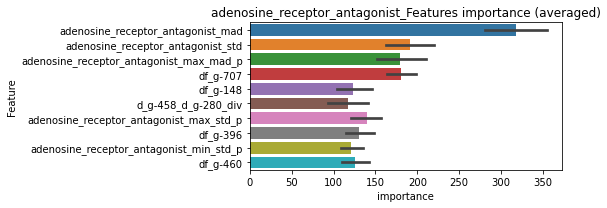

len(train_index) : 2732
len(valid_index) : 911
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111702	valid_1's binary_logloss: 0.0424081
[600]	training's binary_logloss: 0.00155195	valid_1's binary_logloss: 0.0213251
[900]	training's binary_logloss: 0.00072582	valid_1's binary_logloss: 0.0190628
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000739348	valid_1's binary_logloss: 0.019011


len(train_index) : 2732
len(valid_index) : 911
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111381	valid_1's binary_logloss: 0.0512449
[600]	training's binary_logloss: 0.00154921	valid_1's binary_logloss: 0.0343433
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00114555	valid_1's binary_logloss: 0.0330917


len(train_index) : 2732
len(valid_index) : 911
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107151	valid_1's binary_logloss: 0.0526307
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00189154	valid_1's binary_logloss: 0.0413533


len(train_index) : 2733
len(valid_index) : 910
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010893	valid_1's binary_logloss: 0.0561685
[600]	training's binary_logloss: 0.00151394	valid_1's binary_logloss: 0.0355253
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000737352	valid_1's binary_logloss: 0.0315605


adenosine_receptor_antagonist logloss: 0.03125405480206688


neg labels: 3289 → selected neg labels: 3289


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3289, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047846	valid_1's binary_logloss: 0.00882439
[600]	training's binary_logloss: 0.000588454	valid_1's binary_logloss: 0.00215868
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000354957	valid_1's binary_logloss: 0.00162704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464093	valid_1's binary_logloss: 0.00954586
[600]	training's binary_logloss: 0.000589505	valid_1's binary_logloss: 0.00190942
[900]	training's binary_logloss: 0.000354665	valid_1's binary_logloss: 0.00134335
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000354667	valid_1's binary_logloss: 0.00134334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481838	valid_1's binary_logloss: 0.0070642
[600]	training's binary_logloss: 0.000605199	valid_1's binary_logloss: 0.00119121
[900]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0025361, Threshold: 0.0187611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01313, conf_1:0.02439
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0187611
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0687611
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_3: 0.1187611
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1687611
threshold: 0.1687611, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00432515	valid_1's binary_logloss: 0.00762468
[600]	training's binary_logloss: 0.000545796	valid_1's binary_logloss: 0.00147777
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000337897	valid_1's binary_logloss: 0.00106453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441662	valid_1's binary_logloss: 0.00814987
[600]	training's binary_logloss: 0.000541314	valid_1's binary_logloss: 0.0014913
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000333079	valid_1's binary_logloss: 0.00104904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00437465	valid_1's binary_logloss: 0.00617935
[600]	training's binary_logloss: 0.000553133	valid_1's binary_logloss: 0.000965319
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000356818	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.1813405, Threshold: 0.1687611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0077850 Vs.target_rate: 0.00076, Num_p_label: 31.0, conf_0:0.13501, conf_1:0.20251
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_1: 0.1687611
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_2: 0.2187611
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.2687611
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_4: 0.3187611
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_5: 0.3687611
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_6: 0.4187611
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_7: 0.4687611
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_8: 0.5187611
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_9: 0.5687611
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_10: 0.6187611
threshold: 0.6687611, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00432515	valid_1's binary_logloss: 0.00762468
[600]	training's binary_logloss: 0.000545796	valid_1's binary_logloss: 0.00147777
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000337897	valid_1's binary_logloss: 0.00106453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441662	valid_1's binary_logloss: 0.00814987
[600]	training's binary_logloss: 0.000541314	valid_1's binary_logloss: 0.0014913
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000333079	valid_1's binary_logloss: 0.00104904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00437465	valid_1's binary_logloss: 0.00617935
[600]	training's binary_logloss: 0.000553133	valid_1's binary_logloss: 0.000965319
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000356818	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.1813405, Threshold: 0.6687611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00076, Num_p_label: 11.0, conf_0:0.50000, conf_1:0.73564
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.6687611
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.7187611
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.7687611
threshold: 0.7687611, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


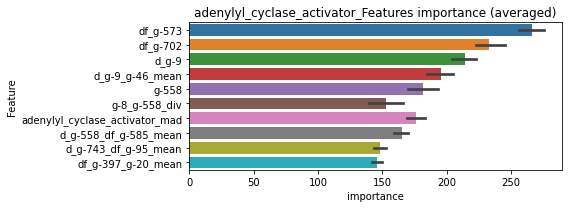

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00425043	valid_1's binary_logloss: 0.00741415
[600]	training's binary_logloss: 0.000541022	valid_1's binary_logloss: 0.00141883
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000339524	valid_1's binary_logloss: 0.00100779


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439863	valid_1's binary_logloss: 0.00842654
[600]	training's binary_logloss: 0.000541888	valid_1's binary_logloss: 0.00149065
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000344786	valid_1's binary_logloss: 0.00107019


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447182	valid_1's binary_logloss: 0.00628654
[600]	training's binary_logloss: 0.00054877	valid_1's binary_logloss: 0.000961936
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000351513	valid_1's binary_logloss: 0.000641851


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444391	valid_1's binary_logloss: 0.00726566
[600]	training's binary_logloss: 0.000544186	valid_1's binary_logloss: 0.0012417
[900]	training's binary_logloss: 0.000349675	valid_1's binary_logloss: 0.000866263
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000349675	valid_1's binary_logloss: 0.000866263


adenylyl_cyclase_activator logloss: 0.0008965538966176101


neg labels: 3289 → selected neg labels: 3254


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3254, target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0635699	valid_1's binary_logloss: 0.279718
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.0358353	valid_1's binary_logloss: 0.273021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0653771	valid_1's binary_logloss: 0.291077
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0519919	valid_1's binary_logloss: 0.287732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0686679	valid_1's binary_logloss: 0.257583
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.0391968	valid_1's binary_logloss: 0.249668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0660746	valid_1's binary_logloss: 0.243992
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.0299693	valid_1's binary_logloss: 0

1 / 3 AUC score:0.877
y_Threshold: 0.0953733, Threshold: 0.6561810, pos_neg_ratio: 0.8000000
Remove_noisy_data: 451 → Positive_corect_labels: 490/3453
p_label_rate: 0.0100452 Vs.target_rate: 0.01134, Num_p_label: 40.0, conf_0:0.45933, conf_1:0.80000
threshold: 0.6561810, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 490.0/3453, y_label_rate: 0.1419056
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0273722	valid_1's binary_logloss: 0.162614
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.0110283	valid_1's binary_logloss: 0.153123
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0280826	valid_1's binary_logloss: 0.136274
[600]	training's binary_logloss: 0.00443893	valid_1's binary_logloss: 0.108446
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.00210238	valid_1's binary_logloss: 0.10489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0276881	valid_1's binary_logloss: 0.123746
[600]	training's binary_logloss: 0.00441557	valid_1's binary_logloss: 0.0948382
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00286396	valid_1's binary_logloss: 0.0934319
Training until validation scores don't improve for 30 rounds
[300]	training's binar

2 / 3 AUC score:0.979
y_Threshold: 0.0903384, Threshold: 0.6561810, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 430.0/3333
p_label_rate: 0.0376695 Vs.target_rate: 0.01134, Num_p_label: 150.0, conf_0:0.50000, conf_1:0.78742
Num_p_label: 150.0, Expected: 45.1, Adj_threshold_1: 0.6561810
Num_p_label: 145.0, Expected: 45.1, Adj_threshold_2: 0.7061810
Num_p_label: 134.0, Expected: 45.1, Adj_threshold_3: 0.7561810
threshold: 0.7561810, positive_p_label: 134.0/3982, p_label_rate: 0.0336514
positive_y_label: 430.0/3333, y_label_rate: 0.1290129
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189225	valid_1's binary_logloss: 0.0865516
[600]	training's binary_logloss: 0.00280792	valid_1's binary_logloss: 0.0562953
[900]	training's binary_logloss: 0.00114627	valid_1's binary_logloss: 0.0503383
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.00110909	valid_1's binary_logloss: 0.050197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174934	valid_1's binary_logloss: 0.103752
[600]	training's binary_logloss: 0.00271132	valid_1's binary_logloss: 0.0890179
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00184232	valid_1's binary_logloss: 0.0870399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180625	valid_1's binary_logloss: 0.108072
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00407799	valid_1's binary_logloss: 0.098297

3 / 3 AUC score:0.989
y_Threshold: 0.0926730, Threshold: 0.7561810, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00636965	valid_1's binary_logloss: 0.122669


Remove_noisy_data: 78 → Positive_corect_labels: 391.0/3255
p_label_rate: 0.0411853 Vs.target_rate: 0.01134, Num_p_label: 164.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 164.0, Expected: 45.1, Adj_threshold_1: 0.7561810
threshold: 0.7561810, positive_p_label: 164.0/3982, p_label_rate: 0.0411853
positive_y_label: 391.0/3255, y_label_rate: 0.1201229


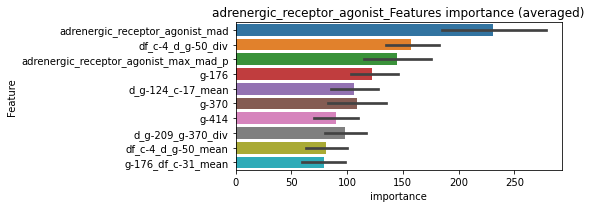

len(train_index) : 2441
len(valid_index) : 814
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124784	valid_1's binary_logloss: 0.103466
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00279783	valid_1's binary_logloss: 0.0941982


len(train_index) : 2441
len(valid_index) : 814
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126801	valid_1's binary_logloss: 0.082745


len(train_index) : 2441
len(valid_index) : 814


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00411242	valid_1's binary_logloss: 0.0734682


================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013467	valid_1's binary_logloss: 0.0779482
[600]	training's binary_logloss: 0.00203351	valid_1's binary_logloss: 0.059652
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00118018	valid_1's binary_logloss: 0.0581265


len(train_index) : 2442
len(valid_index) : 813
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128452	valid_1's binary_logloss: 0.107831
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00313768	valid_1's binary_logloss: 0.0960601


adrenergic_receptor_agonist logloss: 0.08045844624339513


neg labels: 3289 → selected neg labels: 3240


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3240, target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0675743	valid_1's binary_logloss: 0.321358
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.069943	valid_1's binary_logloss: 0.321038
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.0908409	valid_1's binary_logloss: 0.320205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.0877911	valid_1's binary_logloss: 0.314823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0745687	valid_1's binary_logloss: 0.299212
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.0554972	valid_1's binary_logloss: 0.296902


1 / 3 AUC score:0.816
y_Threshold: 0.1260786, Threshold: 0.6890842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 588 → Positive_corect_labels: 419/3300
p_label_rate: 0.0100452 Vs.target_rate: 0.01512, Num_p_label: 40.0, conf_0:0.48236, conf_1:0.80000
Num_p_label: 40.0, Expected: 60.2, Adj_threshold_1: 0.6890842
Num_p_label: 45.0, Expected: 60.2, Adj_threshold_2: 0.6590842
threshold: 0.6590842, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 419.0/3300, y_label_rate: 0.1269697
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160786	valid_1's binary_logloss: 0.158632
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0175718	valid_1's binary_logloss: 0.157883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167914	valid_1's binary_logloss: 0.12512
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.0169396	valid_1's binary_logloss: 0.125084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165411	valid_1's binary_logloss: 0.125637
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00515229	valid_1's binary_logloss: 0.121405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162932	valid_1's binary_logloss: 0.106147


2 / 3 AUC score:0.967
y_Threshold: 0.0991237, Threshold: 0.6590842, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00588772	valid_1's binary_logloss: 0.101012


Remove_noisy_data: 124 → Positive_corect_labels: 357.0/3176
p_label_rate: 0.0539930 Vs.target_rate: 0.01512, Num_p_label: 215.0, conf_0:0.50000, conf_1:0.79090
Num_p_label: 215.0, Expected: 60.2, Adj_threshold_1: 0.6590842
Num_p_label: 201.0, Expected: 60.2, Adj_threshold_2: 0.7090842
Num_p_label: 188.0, Expected: 60.2, Adj_threshold_3: 0.7590842
threshold: 0.7590842, positive_p_label: 188.0/3982, p_label_rate: 0.0472125
positive_y_label: 357.0/3176, y_label_rate: 0.1124055
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772808	valid_1's binary_logloss: 0.106476
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00550507	valid_1's binary_logloss: 0.105661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0083907	valid_1's binary_logloss: 0.0486836
[600]	training's binary_logloss: 0.00135903	valid_1's binary_logloss: 0.0382506
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.00114383	valid_1's binary_logloss: 0.0377859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00836017	valid_1's binary_logloss: 0.061241
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00188786	valid_1's binary_logloss: 0.0523952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00833418	valid_1's binary_logloss: 0.062988
Early stopping, 

3 / 3 AUC score:0.994
y_Threshold: 0.0891565, Threshold: 0.7590842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 329.0/3120
p_label_rate: 0.0685585 Vs.target_rate: 0.01512, Num_p_label: 273.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 273.0, Expected: 60.2, Adj_threshold_1: 0.7590842
threshold: 0.7590842, positive_p_label: 273.0/3982, p_label_rate: 0.0685585
positive_y_label: 329.0/3120, y_label_rate: 0.1054487


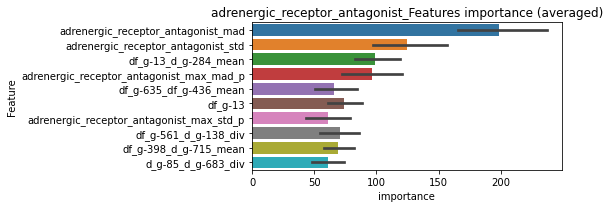

len(train_index) : 2340
len(valid_index) : 780
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2340
len(valid_index) : 780
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[220]	training's binary_logloss: 0.0112964	valid_1's binary_logloss: 0.107533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617922	valid_1's binary_logloss: 0.0296175
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00122631	valid_1's binary_logloss: 0.019045


len(train_index) : 2340
len(valid_index) : 780
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617404	valid_1's binary_logloss: 0.0422226
[600]	training's binary_logloss: 0.00101485	valid_1's binary_logloss: 0.0326556
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00109298	valid_1's binary_logloss: 0.0324235


len(train_index) : 2340
len(valid_index) : 780
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00618662	valid_1's binary_logloss: 0.0494152


adrenergic_receptor_antagonist logloss: 0.05106480207142048


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.0012891	valid_1's binary_logloss: 0.0452576
neg labels: 3289 → selected neg labels: 3284


akt_inhibitor, len(trt): 66, len(othr): 3284, target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184226	valid_1's binary_logloss: 0.0844558
[600]	training's binary_logloss: 0.00237444	valid_1's binary_logloss: 0.0518121
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.00100169	valid_1's binary_logloss: 0.0472115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185915	valid_1's binary_logloss: 0.0806867
[600]	training's binary_logloss: 0.00246325	valid_1's binary_logloss: 0.061078
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00260919	valid_1's binary_logloss: 0.0608352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173845	valid_1's binary_logloss: 0.0569396
[600]	training's binary_logloss: 0.00237929	valid_1's binary_logloss: 0.028803
[900]	training's binary_logloss: 0.00093369	valid_1's binary_logloss: 0.0234176
[1200]	training's binary_logloss

1 / 3 AUC score:0.996
y_Threshold: 0.0178701, Threshold: 0.0846651, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 648/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00277, Num_p_label: 40.0, conf_0:0.05927, conf_1:0.11006
Num_p_label: 40.0, Expected: 11.0, Adj_threshold_1: 0.0846651
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_2: 0.1346651
Num_p_label: 10.0, Expected: 11.0, Adj_threshold_3: 0.1846651
threshold: 0.1846651, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 648.0/3792, y_label_rate: 0.1708861
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152279	valid_1's binary_logloss: 0.0712613
[600]	training's binary_logloss: 0.00197473	valid_1's binary_logloss: 0.0493549
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00159142	valid_1's binary_logloss: 0.0482193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014713	valid_1's binary_logloss: 0.0757088
[600]	training's binary_logloss: 0.00199817	valid_1's binary_logloss: 0.056053
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000989161	valid_1's binary_logloss: 0.0535754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148252	valid_1's binary_logloss: 0.0563083
[600]	training's binary_logloss: 0.0019645	valid_1's binary_logloss: 0.0303444
[900]	training's binary_logloss: 0.000823225	valid_1's binary_logloss: 0.0254016
Early stopping, best iteration 

2 / 3 AUC score:0.996
y_Threshold: 0.0528910, Threshold: 0.1846651, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 634.0/3764
p_label_rate: 0.0150678 Vs.target_rate: 0.00277, Num_p_label: 60.0, conf_0:0.14773, conf_1:0.22160
Num_p_label: 60.0, Expected: 11.0, Adj_threshold_1: 0.1846651
Num_p_label: 47.0, Expected: 11.0, Adj_threshold_2: 0.2346651
Num_p_label: 37.0, Expected: 11.0, Adj_threshold_3: 0.2846651
Num_p_label: 27.0, Expected: 11.0, Adj_threshold_4: 0.3346651
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_5: 0.3846651
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_6: 0.4346651
threshold: 0.4346651, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 634.0/3764, y_label_rate: 0.1684378
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136962	valid_1's binary_logloss: 0.0498627
[600]	training's binary_logloss: 0.00181405	valid_1's binary_logloss: 0.0270149
[900]	training's binary_logloss: 0.000772761	valid_1's binary_logloss: 0.0242029
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000780026	valid_1's binary_logloss: 0.0241546
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144765	valid_1's binary_logloss: 0.0531636
[600]	training's binary_logloss: 0.00185278	valid_1's binary_logloss: 0.0276235
[900]	training's binary_logloss: 0.000767118	valid_1's binary_logloss: 0.0235185
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000728756	valid_1's binary_logloss: 0.0233626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144135	valid_1's binary_logloss: 0.0524989
[600]	training's binary_lo

3 / 3 AUC score:0.999
y_Threshold: 0.0484114, Threshold: 0.4346651, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 627.0/3750
p_label_rate: 0.0072828 Vs.target_rate: 0.00277, Num_p_label: 29.0, conf_0:0.39120, conf_1:0.47813
Num_p_label: 29.0, Expected: 11.0, Adj_threshold_1: 0.4346651
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_2: 0.4846651
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_3: 0.5346651
threshold: 0.5346651, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 627.0/3750, y_label_rate: 0.1672000


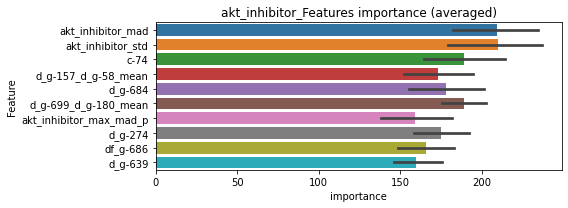

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127947	valid_1's binary_logloss: 0.0515718
[600]	training's binary_logloss: 0.00168989	valid_1's binary_logloss: 0.0253411
[900]	training's binary_logloss: 0.000739108	valid_1's binary_logloss: 0.0219241
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000739108	valid_1's binary_logloss: 0.0219241


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136763	valid_1's binary_logloss: 0.0565752
[600]	training's binary_logloss: 0.00176572	valid_1's binary_logloss: 0.039369
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00127379	valid_1's binary_logloss: 0.0383178


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013037	valid_1's binary_logloss: 0.0553169
[600]	training's binary_logloss: 0.00171957	valid_1's binary_logloss: 0.033419
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.00100083	valid_1's binary_logloss: 0.0314121


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135706	valid_1's binary_logloss: 0.0494624
[600]	training's binary_logloss: 0.00175539	valid_1's binary_logloss: 0.0259127
[900]	training's binary_logloss: 0.000738209	valid_1's binary_logloss: 0.0226022
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000727945	valid_1's binary_logloss: 0.0225611


akt_inhibitor logloss: 0.028554606777094052


neg labels: 3289 → selected neg labels: 3288


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3288, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0045676	valid_1's binary_logloss: 0.0113011
[600]	training's binary_logloss: 0.000587646	valid_1's binary_logloss: 0.00357602
[900]	training's binary_logloss: 0.00034944	valid_1's binary_logloss: 0.00288113
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000350131	valid_1's binary_logloss: 0.00287722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00458413	valid_1's binary_logloss: 0.0175954
[600]	training's binary_logloss: 0.000592533	valid_1's binary_logloss: 0.00867509
[900]	training's binary_logloss: 0.000350396	valid_1's binary_logloss: 0.00766261
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000350396	valid_1's binary_logloss: 0.00766261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461399	valid_1's binary_logloss: 0.00992395
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0027767, Threshold: 0.0214232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.01500, conf_1:0.02785
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0214232
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_2: 0.0714232
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_3: 0.1214232
threshold: 0.1214232, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405101	valid_1's binary_logloss: 0.0103395
[600]	training's binary_logloss: 0.000528198	valid_1's binary_logloss: 0.00327026
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.00033959	valid_1's binary_logloss: 0.00275761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403346	valid_1's binary_logloss: 0.0173447
[600]	training's binary_logloss: 0.000520274	valid_1's binary_logloss: 0.00837756
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000343275	valid_1's binary_logloss: 0.00753423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00416106	valid_1's binary_logloss: 0.00658675
[600]	training's binary_logloss: 0.000533143	valid_1's binary_logloss: 0.00106063
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000338848	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0721977, Threshold: 0.1214232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0092918 Vs.target_rate: 0.00080, Num_p_label: 37.0, conf_0:0.09714, conf_1:0.14571
Num_p_label: 37.0, Expected: 3.2, Adj_threshold_1: 0.1214232
Num_p_label: 28.0, Expected: 3.2, Adj_threshold_2: 0.1714232
Num_p_label: 24.0, Expected: 3.2, Adj_threshold_3: 0.2214232
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_4: 0.2714232
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_5: 0.3214232
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_6: 0.3714232
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_7: 0.4214232
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_8: 0.4714232
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_9: 0.5214232
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_10: 0.5714232
threshold: 0.5714232, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405101	valid_1's binary_logloss: 0.0103395
[600]	training's binary_logloss: 0.000528198	valid_1's binary_logloss: 0.00327026
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.00033959	valid_1's binary_logloss: 0.00275761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403346	valid_1's binary_logloss: 0.0173447
[600]	training's binary_logloss: 0.000520274	valid_1's binary_logloss: 0.00837756
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000343275	valid_1's binary_logloss: 0.00753423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00416106	valid_1's binary_logloss: 0.00658675
[600]	training's binary_logloss: 0.000533143	valid_1's binary_logloss: 0.00106063
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000338848	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0721977, Threshold: 0.5714232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.50000, conf_1:0.62857
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.5714232
threshold: 0.5714232, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


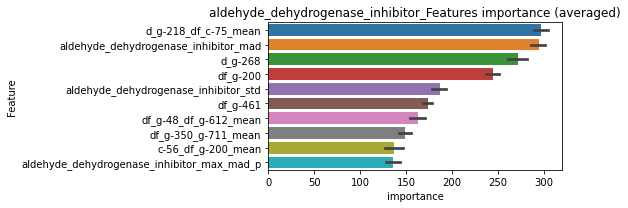

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447263	valid_1's binary_logloss: 0.0129373
[600]	training's binary_logloss: 0.000541665	valid_1's binary_logloss: 0.00398722
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000315846	valid_1's binary_logloss: 0.00295748


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0040829	valid_1's binary_logloss: 0.0178876
[600]	training's binary_logloss: 0.000524607	valid_1's binary_logloss: 0.00895837
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.00034553	valid_1's binary_logloss: 0.00797085


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00419509	valid_1's binary_logloss: 0.00648234
[600]	training's binary_logloss: 0.000535908	valid_1's binary_logloss: 0.00105956
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000332428	valid_1's binary_logloss: 0.000704238


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00413925	valid_1's binary_logloss: 0.0072135
[600]	training's binary_logloss: 0.000535094	valid_1's binary_logloss: 0.00155425
[900]	training's binary_logloss: 0.000333409	valid_1's binary_logloss: 0.00112697
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000333807	valid_1's binary_logloss: 0.00112584


aldehyde_dehydrogenase_inhibitor logloss: 0.0031898254424375257


neg labels: 3289 → selected neg labels: 3285


alk_inhibitor, len(trt): 42, len(othr): 3285, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123666	valid_1's binary_logloss: 0.0333705
[600]	training's binary_logloss: 0.00154498	valid_1's binary_logloss: 0.0132609
[900]	training's binary_logloss: 0.000662412	valid_1's binary_logloss: 0.0105104
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000579807	valid_1's binary_logloss: 0.0101688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114729	valid_1's binary_logloss: 0.0595157
[600]	training's binary_logloss: 0.00145317	valid_1's binary_logloss: 0.0346495
[900]	training's binary_logloss: 0.000633275	valid_1's binary_logloss: 0.0304473
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00063807	valid_1's binary_logloss: 0.0303735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123126	valid_1's binary_logloss: 0.0310463
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0075784, Threshold: 0.0334367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.02341, conf_1:0.04347
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0334367
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_2: 0.0834367
threshold: 0.0834367, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106274	valid_1's binary_logloss: 0.0339272
[600]	training's binary_logloss: 0.00135291	valid_1's binary_logloss: 0.0165961
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000635031	valid_1's binary_logloss: 0.0144122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103712	valid_1's binary_logloss: 0.0520732
[600]	training's binary_logloss: 0.00133491	valid_1's binary_logloss: 0.0354079
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000810394	valid_1's binary_logloss: 0.0336366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108284	valid_1's binary_logloss: 0.0238845
[600]	training's binary_logloss: 0.00138504	valid_1's binary_logloss: 0.0062977
[900]	training's binary_logloss: 0.000609302	valid_1's binary_logloss: 0.00394224
Early stopping, best itera

2 / 3 AUC score:1.000
y_Threshold: 0.0436807, Threshold: 0.0834367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0133099 Vs.target_rate: 0.00176, Num_p_label: 53.0, conf_0:0.06675, conf_1:0.10012
Num_p_label: 53.0, Expected: 7.0, Adj_threshold_1: 0.0834367
Num_p_label: 33.0, Expected: 7.0, Adj_threshold_2: 0.1334367
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_3: 0.1834367
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_4: 0.2334367
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_5: 0.2834367
threshold: 0.2834367, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3796, y_label_rate: 0.1712329
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103206	valid_1's binary_logloss: 0.0304808
[600]	training's binary_logloss: 0.0013124	valid_1's binary_logloss: 0.0124
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000627765	valid_1's binary_logloss: 0.010337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101266	valid_1's binary_logloss: 0.0331018
[600]	training's binary_logloss: 0.00129938	valid_1's binary_logloss: 0.0152039
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000732643	valid_1's binary_logloss: 0.0132399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105318	valid_1's binary_logloss: 0.0335166
[600]	training's binary_logloss: 0.00131072	valid_1's binary_logloss: 0.014733
[900]	training's binary_logloss: 0.000588945	valid_1's binary_logloss: 0.0118298
Early stopping, best iteration is

3 / 3 AUC score:1.000
y_Threshold: 0.0680251, Threshold: 0.2834367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0055249 Vs.target_rate: 0.00176, Num_p_label: 22.0, conf_0:0.25509, conf_1:0.31178
Num_p_label: 22.0, Expected: 7.0, Adj_threshold_1: 0.2834367
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_2: 0.3334367
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_3: 0.3834367
threshold: 0.3834367, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


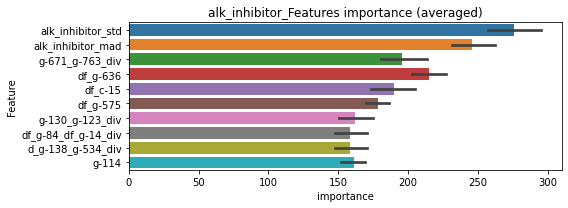

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101186	valid_1's binary_logloss: 0.0329319
[600]	training's binary_logloss: 0.00128046	valid_1's binary_logloss: 0.0157093
[900]	training's binary_logloss: 0.000575682	valid_1's binary_logloss: 0.0134948
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000571229	valid_1's binary_logloss: 0.0134028


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101521	valid_1's binary_logloss: 0.047106
[600]	training's binary_logloss: 0.0013023	valid_1's binary_logloss: 0.0282427
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000617446	valid_1's binary_logloss: 0.0255183


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100078	valid_1's binary_logloss: 0.0257492
[600]	training's binary_logloss: 0.00130128	valid_1's binary_logloss: 0.00746933
[900]	training's binary_logloss: 0.000585071	valid_1's binary_logloss: 0.00484407
Early stopping, best iteration is:
[1145]	training's binary_logloss: 0.000512911	valid_1's binary_logloss: 0.00451919


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00980098	valid_1's binary_logloss: 0.0346128
[600]	training's binary_logloss: 0.00127627	valid_1's binary_logloss: 0.0153084
[900]	training's binary_logloss: 0.000581849	valid_1's binary_logloss: 0.0129045
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.00053096	valid_1's binary_logloss: 0.0127427


alk_inhibitor logloss: 0.014047846183706974


neg labels: 3289 → selected neg labels: 3289


ampk_activator, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272313	valid_1's binary_logloss: 0.00560505
[600]	training's binary_logloss: 0.000356537	valid_1's binary_logloss: 0.00144339
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00027034	valid_1's binary_logloss: 0.00120771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027102	valid_1's binary_logloss: 0.00526367
[600]	training's binary_logloss: 0.000353526	valid_1's binary_logloss: 0.00113338
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000272445	valid_1's binary_logloss: 0.000939014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271979	valid_1's binary_logloss: 0.00479925
[600]	training's binary_logloss: 0.00035526	valid_1's binary_logloss: 0.00108306
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00026993	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0013443, Threshold: 0.0126532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00886, conf_1:0.01645
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0126532
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0626532
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1126532
threshold: 0.1126532, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245434	valid_1's binary_logloss: 0.00429287
[600]	training's binary_logloss: 0.000316751	valid_1's binary_logloss: 0.00116331
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000245714	valid_1's binary_logloss: 0.0010581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247933	valid_1's binary_logloss: 0.00457037
[600]	training's binary_logloss: 0.000314271	valid_1's binary_logloss: 0.000835326
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000242957	valid_1's binary_logloss: 0.000684061
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247737	valid_1's binary_logloss: 0.00359766
[600]	training's binary_logloss: 0.000317371	valid_1's binary_logloss: 0.000547804
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000245866	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1240742, Threshold: 0.1126532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0085384 Vs.target_rate: 0.00050, Num_p_label: 34.0, conf_0:0.09012, conf_1:0.13518
Num_p_label: 34.0, Expected: 2.0, Adj_threshold_1: 0.1126532
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_2: 0.1626532
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.2126532
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_4: 0.2626532
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_5: 0.3126532
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_6: 0.3626532
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_7: 0.4126532
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_8: 0.4626532
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.5126532
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.5626532
threshold: 0.6126532, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245434	valid_1's binary_logloss: 0.00429287
[600]	training's binary_logloss: 0.000316751	valid_1's binary_logloss: 0.00116331
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000245714	valid_1's binary_logloss: 0.0010581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247933	valid_1's binary_logloss: 0.00457037
[600]	training's binary_logloss: 0.000314271	valid_1's binary_logloss: 0.000835326
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000242957	valid_1's binary_logloss: 0.000684061
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247737	valid_1's binary_logloss: 0.00359766
[600]	training's binary_logloss: 0.000317371	valid_1's binary_logloss: 0.000547804
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000245866	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1240742, Threshold: 0.6126532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.50000, conf_1:0.67392
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.6126532
threshold: 0.6126532, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


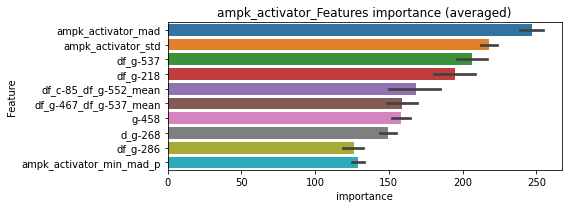

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244031	valid_1's binary_logloss: 0.00510175
[600]	training's binary_logloss: 0.000317202	valid_1's binary_logloss: 0.00169098


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000251693	valid_1's binary_logloss: 0.00157037


================================= fold 2/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244715	valid_1's binary_logloss: 0.00427974
[600]	training's binary_logloss: 0.000313991	valid_1's binary_logloss: 0.000802907
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000243667	valid_1's binary_logloss: 0.000654657


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248271	valid_1's binary_logloss: 0.00365247
[600]	training's binary_logloss: 0.000318432	valid_1's binary_logloss: 0.000553296
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000243483	valid_1's binary_logloss: 0.000436006


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023871	valid_1's binary_logloss: 0.00375634
[600]	training's binary_logloss: 0.000315482	valid_1's binary_logloss: 0.00075291
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000240288	valid_1's binary_logloss: 0.000635729


ampk_activator logloss: 0.0008243869141839247


neg labels: 3289 → selected neg labels: 3288


analgesic, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297174	valid_1's binary_logloss: 0.00464055
[600]	training's binary_logloss: 0.000376037	valid_1's binary_logloss: 0.000867447
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000271238	valid_1's binary_logloss: 0.000709141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287465	valid_1's binary_logloss: 0.00539401
[600]	training's binary_logloss: 0.000369213	valid_1's binary_logloss: 0.00156367
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.00026362	valid_1's binary_logloss: 0.00133184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294583	valid_1's binary_logloss: 0.004598
[600]	training's binary_logloss: 0.000376063	valid_1's binary_logloss: 0.000732478
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000265022	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0013352, Threshold: 0.0256166, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01793, conf_1:0.03330
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0256166
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_2: 0.0756166
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.1256166
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_4: 0.1756166
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_5: 0.2256166
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.2756166
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.3256166
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_8: 0.3756166
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.4256166
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.4756166
threshold: 0.5256166, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277176	valid_1's binary_logloss: 0.00412344
[600]	training's binary_logloss: 0.000350909	valid_1's binary_logloss: 0.000746408
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000255856	valid_1's binary_logloss: 0.000609353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274754	valid_1's binary_logloss: 0.00443821
[600]	training's binary_logloss: 0.000348207	valid_1's binary_logloss: 0.00103918
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000293861	valid_1's binary_logloss: 0.000933391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273277	valid_1's binary_logloss: 0.00441584
[600]	training's binary_logloss: 0.000342991	valid_1's binary_logloss: 0.000669369
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000249382	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.1239730, Threshold: 0.5256166, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00050, Num_p_label: 12.0, conf_0:0.42049, conf_1:0.63074
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_1: 0.5256166
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.5756166
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_3: 0.6256166
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_4: 0.6756166
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.7256166
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_6: 0.7756166
threshold: 0.7756166, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277176	valid_1's binary_logloss: 0.00412344
[600]	training's binary_logloss: 0.000350909	valid_1's binary_logloss: 0.000746408
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000255856	valid_1's binary_logloss: 0.000609353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274754	valid_1's binary_logloss: 0.00443821
[600]	training's binary_logloss: 0.000348207	valid_1's binary_logloss: 0.00103918
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000293861	valid_1's binary_logloss: 0.000933391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273277	valid_1's binary_logloss: 0.00441584
[600]	training's binary_logloss: 0.000342991	valid_1's binary_logloss: 0.000669369
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000249382	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.1239730, Threshold: 0.7756166, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00050, Num_p_label: 10.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.7756166
threshold: 0.7756166, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


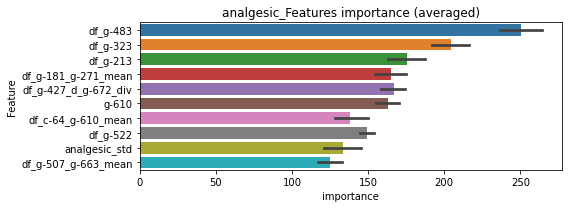

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277907	valid_1's binary_logloss: 0.00409884
[600]	training's binary_logloss: 0.000344084	valid_1's binary_logloss: 0.000728746
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000250848	valid_1's binary_logloss: 0.000596053


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276428	valid_1's binary_logloss: 0.00470352
[600]	training's binary_logloss: 0.000346775	valid_1's binary_logloss: 0.00108216
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.0002515	valid_1's binary_logloss: 0.000888764


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027555	valid_1's binary_logloss: 0.00453578
[600]	training's binary_logloss: 0.000348595	valid_1's binary_logloss: 0.000716734
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000251368	valid_1's binary_logloss: 0.000537473


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273163	valid_1's binary_logloss: 0.00452515
[600]	training's binary_logloss: 0.000344927	valid_1's binary_logloss: 0.000864852
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000249267	valid_1's binary_logloss: 0.000687279


analgesic logloss: 0.0006774801211430991


neg labels: 3289 → selected neg labels: 3282


androgen_receptor_agonist, len(trt): 48, len(othr): 3282, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115468	valid_1's binary_logloss: 0.0421651
[600]	training's binary_logloss: 0.00148938	valid_1's binary_logloss: 0.0162407
[900]	training's binary_logloss: 0.00065933	valid_1's binary_logloss: 0.0125535
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000642627	valid_1's binary_logloss: 0.0124128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113571	valid_1's binary_logloss: 0.0626491
[600]	training's binary_logloss: 0.00144135	valid_1's binary_logloss: 0.046475
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00160901	valid_1's binary_logloss: 0.0463911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119697	valid_1's binary_logloss: 0.0338006
[600]	training's binary_logloss: 0.0015246	valid_1's binary_logloss: 0.017997
[900]	training's binary_logloss:

1 / 3 AUC score:0.999
y_Threshold: 0.0088109, Threshold: 0.0314628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.02202, conf_1:0.04090
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0314628
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_2: 0.0814628
threshold: 0.0814628, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00974631	valid_1's binary_logloss: 0.0390629
[600]	training's binary_logloss: 0.00124977	valid_1's binary_logloss: 0.0238854
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000695717	valid_1's binary_logloss: 0.0221161
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100988	valid_1's binary_logloss: 0.0315208
[600]	training's binary_logloss: 0.00128473	valid_1's binary_logloss: 0.0109108
[900]	training's binary_logloss: 0.000595752	valid_1's binary_logloss: 0.00764503
Early stopping, best iteration is:
[1073]	training's binary_logloss: 0.000536476	valid_1's binary_logloss: 0.00732355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111971	valid_1's binary_logloss: 0.0502262
[600]	training's binary_logloss: 0.00134717	valid_1's binary_logloss: 0.0339422
Early stopping, best it

2 / 3 AUC score:1.000
y_Threshold: 0.0740404, Threshold: 0.0814628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0163235 Vs.target_rate: 0.00202, Num_p_label: 65.0, conf_0:0.06517, conf_1:0.09776
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_1: 0.0814628
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_2: 0.1314628
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_3: 0.1814628
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_4: 0.2314628
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_5: 0.2814628
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_6: 0.3314628
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_7: 0.3814628
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_8: 0.4314628
threshold: 0.4314628, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 642.0/3778, y_label_rate: 0.1699312
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00882985	valid_1's binary_logloss: 0.0442822
[600]	training's binary_logloss: 0.00113756	valid_1's binary_logloss: 0.0329625
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.00102225	valid_1's binary_logloss: 0.0325383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00891534	valid_1's binary_logloss: 0.0315123
[600]	training's binary_logloss: 0.00117425	valid_1's binary_logloss: 0.0141298
[900]	training's binary_logloss: 0.000573645	valid_1's binary_logloss: 0.011396
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000564631	valid_1's binary_logloss: 0.0113508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00968816	valid_1's binary_logloss: 0.0340699
[600]	training's binary_logloss: 0.00125039	valid_1's binary_logloss: 0.0173039
Early stopping, best itera

3 / 3 AUC score:0.999
y_Threshold: 0.0475718, Threshold: 0.4314628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 634.0/3762
p_label_rate: 0.0067805 Vs.target_rate: 0.00202, Num_p_label: 27.0, conf_0:0.38832, conf_1:0.47461
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_1: 0.4314628
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_2: 0.4814628
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.5314628
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_4: 0.5814628
threshold: 0.5814628, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 634.0/3762, y_label_rate: 0.1685274


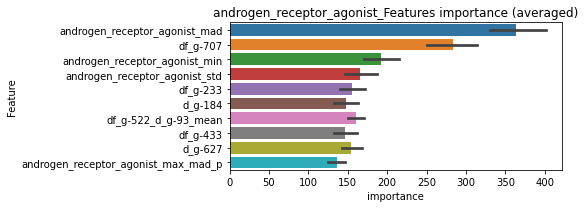

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00869841	valid_1's binary_logloss: 0.033067
[600]	training's binary_logloss: 0.00111316	valid_1's binary_logloss: 0.0181476
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000634775	valid_1's binary_logloss: 0.0163862


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00831846	valid_1's binary_logloss: 0.0301278
[600]	training's binary_logloss: 0.00109826	valid_1's binary_logloss: 0.0129746
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000590843	valid_1's binary_logloss: 0.0111731


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00874108	valid_1's binary_logloss: 0.0297546
[600]	training's binary_logloss: 0.00113242	valid_1's binary_logloss: 0.0161063
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000709991	valid_1's binary_logloss: 0.0147369


len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00820134	valid_1's binary_logloss: 0.0335143
[600]	training's binary_logloss: 0.00108168	valid_1's binary_logloss: 0.0172631
[900]	training's binary_logloss: 0.00055178	valid_1's binary_logloss: 0.0156328
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000565015	valid_1's binary_logloss: 0.015571


androgen_receptor_agonist logloss: 0.014466453078383438


neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179339	valid_1's binary_logloss: 0.125415
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.0057634	valid_1's binary_logloss: 0.115937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194459	valid_1's binary_logloss: 0.0795139
[600]	training's binary_logloss: 0.00275165	valid_1's binary_logloss: 0.0553703
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.0014574	valid_1's binary_logloss: 0.0531327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202745	valid_1's binary_logloss: 0.0900731
[600]	training's binary_logloss: 0.00280733	valid_1's binary_logloss: 0.0671013
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.00185182	valid_1's binary_logloss: 0.0658274
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.990
y_Threshold: 0.0196090, Threshold: 0.1138349, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 633/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00374, Num_p_label: 40.0, conf_0:0.07968, conf_1:0.14799
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.1138349
Num_p_label: 31.0, Expected: 14.9, Adj_threshold_2: 0.1638349
Num_p_label: 25.0, Expected: 14.9, Adj_threshold_3: 0.2138349
Num_p_label: 19.0, Expected: 14.9, Adj_threshold_4: 0.2638349
threshold: 0.2638349, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135787	valid_1's binary_logloss: 0.0722847
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.0037118	valid_1's binary_logloss: 0.0598965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139651	valid_1's binary_logloss: 0.0556414
[600]	training's binary_logloss: 0.00196262	valid_1's binary_logloss: 0.0339424
[900]	training's binary_logloss: 0.00084834	valid_1's binary_logloss: 0.0299635
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000683076	valid_1's binary_logloss: 0.0292286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137969	valid_1's binary_logloss: 0.0578876
[600]	training's binary_logloss: 0.00194011	valid_1's binary_logloss: 0.0351073
[900]	training's binary_logloss: 0.000838774	valid_1's binary_logloss: 0.0306932
Early stopping, best iterati

2 / 3 AUC score:0.997
y_Threshold: 0.0708526, Threshold: 0.2638349, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 614.0/3716
p_label_rate: 0.0183325 Vs.target_rate: 0.00374, Num_p_label: 73.0, conf_0:0.21107, conf_1:0.31660
Num_p_label: 73.0, Expected: 14.9, Adj_threshold_1: 0.2638349
Num_p_label: 65.0, Expected: 14.9, Adj_threshold_2: 0.3138349
Num_p_label: 60.0, Expected: 14.9, Adj_threshold_3: 0.3638349
Num_p_label: 52.0, Expected: 14.9, Adj_threshold_4: 0.4138349
Num_p_label: 48.0, Expected: 14.9, Adj_threshold_5: 0.4638349
Num_p_label: 44.0, Expected: 14.9, Adj_threshold_6: 0.5138349
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_7: 0.5638349
Num_p_label: 36.0, Expected: 14.9, Adj_threshold_8: 0.6138349
Num_p_label: 35.0, Expected: 14.9, Adj_threshold_9: 0.6638349
Num_p_label: 34.0, Expected: 14.9, Adj_threshold_10: 0.7138349
threshold: 0.7638349, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 614.0/3716, y_label_rate: 0.1652314

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113314	valid_1's binary_logloss: 0.0905008
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.0022979	valid_1's binary_logloss: 0.0775633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124415	valid_1's binary_logloss: 0.0504651
[600]	training's binary_logloss: 0.00172424	valid_1's binary_logloss: 0.0331456
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00104158	valid_1's binary_logloss: 0.0318635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011521	valid_1's binary_logloss: 0.072043
[600]	training's binary_logloss: 0.00160297	valid_1's binary_logloss: 0.0590676
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.00134832	valid_1's binary_logloss: 0.0582907
Training until validation scores don't improve for 30 rounds
[300]	training's 

3 / 3 AUC score:0.996
y_Threshold: 0.0478044, Threshold: 0.7638349, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 590.0/3668
p_label_rate: 0.0110497 Vs.target_rate: 0.00374, Num_p_label: 44.0, conf_0:0.50000, conf_1:0.80000


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00512052	valid_1's binary_logloss: 0.0667246


Num_p_label: 44.0, Expected: 14.9, Adj_threshold_1: 0.7638349
threshold: 0.7638349, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 590.0/3668, y_label_rate: 0.1608506


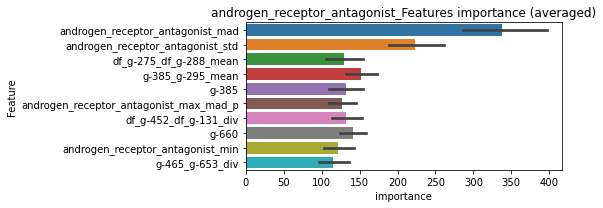

len(train_index) : 2751
len(valid_index) : 917
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104884	valid_1's binary_logloss: 0.0384807
[600]	training's binary_logloss: 0.00142753	valid_1's binary_logloss: 0.0179895
[900]	training's binary_logloss: 0.00068044	valid_1's binary_logloss: 0.0146259
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000641897	valid_1's binary_logloss: 0.0143623


len(train_index) : 2751
len(valid_index) : 917
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104355	valid_1's binary_logloss: 0.0426416
[600]	training's binary_logloss: 0.00140733	valid_1's binary_logloss: 0.0278997
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000824746	valid_1's binary_logloss: 0.0267211


len(train_index) : 2751
len(valid_index) : 917
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100896	valid_1's binary_logloss: 0.0454562
[600]	training's binary_logloss: 0.00143462	valid_1's binary_logloss: 0.0246603
[900]	training's binary_logloss: 0.000675631	valid_1's binary_logloss: 0.0211105
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000629733	valid_1's binary_logloss: 0.0206015


len(train_index) : 2751
len(valid_index) : 917
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00992047	valid_1's binary_logloss: 0.0510262
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00161128	valid_1's binary_logloss: 0.0384467


androgen_receptor_antagonist logloss: 0.025032902274060683


neg labels: 3289 → selected neg labels: 3273


anesthetic_-_local, len(trt): 80, len(othr): 3273, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162381	valid_1's binary_logloss: 0.115105
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00404343	valid_1's binary_logloss: 0.102069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168168	valid_1's binary_logloss: 0.0648783
[600]	training's binary_logloss: 0.00237834	valid_1's binary_logloss: 0.0389146
[900]	training's binary_logloss: 0.000959831	valid_1's binary_logloss: 0.0344972
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000959831	valid_1's binary_logloss: 0.0344972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178347	valid_1's binary_logloss: 0.0712958
[600]	training's binary_logloss: 0.00247302	valid_1's binary_logloss: 0.0466434
[900]	training's binary_logloss: 0.000984788	valid_1's binary_logloss: 0.0431234
Early stopping, best iteratio

1 / 3 AUC score:0.993
y_Threshold: 0.0165913, Threshold: 0.0750282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 635/3757
p_label_rate: 0.0100452 Vs.target_rate: 0.00336, Num_p_label: 40.0, conf_0:0.05252, conf_1:0.09754
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0750282
Num_p_label: 24.0, Expected: 13.4, Adj_threshold_2: 0.1250282
Num_p_label: 16.0, Expected: 13.4, Adj_threshold_3: 0.1750282
threshold: 0.1750282, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 635.0/3757, y_label_rate: 0.1690178
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130485	valid_1's binary_logloss: 0.0682023
[600]	training's binary_logloss: 0.00179995	valid_1's binary_logloss: 0.0432983
[900]	training's binary_logloss: 0.000791781	valid_1's binary_logloss: 0.0388136
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000791781	valid_1's binary_logloss: 0.0388136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139597	valid_1's binary_logloss: 0.0639469
[600]	training's binary_logloss: 0.00187698	valid_1's binary_logloss: 0.0493896
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.0017359	valid_1's binary_logloss: 0.0487338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135792	valid_1's binary_logloss: 0.053673
[600]	training's binary_logloss: 0.00186988	valid_1's binary_logloss: 0.0352033
[900]	training's binary_loglos

2 / 3 AUC score:0.997
y_Threshold: 0.0621356, Threshold: 0.1750282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 619.0/3725
p_label_rate: 0.0233551 Vs.target_rate: 0.00336, Num_p_label: 93.0, conf_0:0.14002, conf_1:0.21003
Num_p_label: 93.0, Expected: 13.4, Adj_threshold_1: 0.1750282
Num_p_label: 75.0, Expected: 13.4, Adj_threshold_2: 0.2250282
Num_p_label: 70.0, Expected: 13.4, Adj_threshold_3: 0.2750282
Num_p_label: 59.0, Expected: 13.4, Adj_threshold_4: 0.3250282
Num_p_label: 53.0, Expected: 13.4, Adj_threshold_5: 0.3750282
Num_p_label: 44.0, Expected: 13.4, Adj_threshold_6: 0.4250282
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_7: 0.4750282
Num_p_label: 31.0, Expected: 13.4, Adj_threshold_8: 0.5250282
Num_p_label: 27.0, Expected: 13.4, Adj_threshold_9: 0.5750282
Num_p_label: 25.0, Expected: 13.4, Adj_threshold_10: 0.6250282
threshold: 0.6750282, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 619.0/3725, y_label_rate: 0.1661745

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111774	valid_1's binary_logloss: 0.0555329
[600]	training's binary_logloss: 0.00158094	valid_1's binary_logloss: 0.0410596
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000768685	valid_1's binary_logloss: 0.039073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118607	valid_1's binary_logloss: 0.0743194
[600]	training's binary_logloss: 0.0015773	valid_1's binary_logloss: 0.062876
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00144606	valid_1's binary_logloss: 0.0625617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121857	valid_1's binary_logloss: 0.0408163
[600]	training's binary_logloss: 0.00168232	valid_1's binary_logloss: 0.0181502
[900]	training's binary_logloss: 0.000743631	valid_1's binary_logloss: 0.0141869
Early stopping, best iteration 

3 / 3 AUC score:0.998
y_Threshold: 0.0686933, Threshold: 0.6750282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 606.0/3699
p_label_rate: 0.0100452 Vs.target_rate: 0.00336, Num_p_label: 40.0, conf_0:0.50000, conf_1:0.74253
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.6750282
Num_p_label: 34.0, Expected: 13.4, Adj_threshold_2: 0.7250282
Num_p_label: 30.0, Expected: 13.4, Adj_threshold_3: 0.7750282
threshold: 0.7750282, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 606.0/3699, y_label_rate: 0.1638281


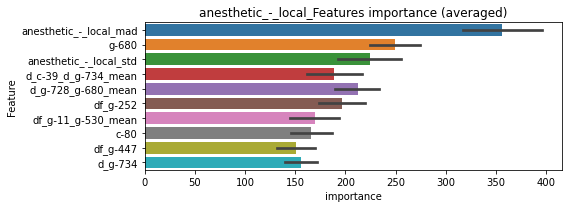

len(train_index) : 2774
len(valid_index) : 925
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106741	valid_1's binary_logloss: 0.0432428
[600]	training's binary_logloss: 0.00148019	valid_1's binary_logloss: 0.0223691
[900]	training's binary_logloss: 0.000678948	valid_1's binary_logloss: 0.019445
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.00060383	valid_1's binary_logloss: 0.018858


len(train_index) : 2774
len(valid_index) : 925
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010559	valid_1's binary_logloss: 0.0612103
[600]	training's binary_logloss: 0.00143106	valid_1's binary_logloss: 0.0390729
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000861873	valid_1's binary_logloss: 0.0364302


len(train_index) : 2774
len(valid_index) : 925
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113887	valid_1's binary_logloss: 0.0303252
[600]	training's binary_logloss: 0.0015794	valid_1's binary_logloss: 0.0149982
[900]	training's binary_logloss: 0.000707377	valid_1's binary_logloss: 0.012955
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000712878	valid_1's binary_logloss: 0.0129131


len(train_index) : 2775
len(valid_index) : 924
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105503	valid_1's binary_logloss: 0.0595081
[600]	training's binary_logloss: 0.00141236	valid_1's binary_logloss: 0.0463311
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.0009708	valid_1's binary_logloss: 0.0452859


anesthetic_-_local logloss: 0.028369860540984133


neg labels: 3289 → selected neg labels: 3282


angiogenesis_inhibitor, len(trt): 36, len(othr): 3282, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00699767	valid_1's binary_logloss: 0.0309604
[600]	training's binary_logloss: 0.000921824	valid_1's binary_logloss: 0.014812
[900]	training's binary_logloss: 0.000461192	valid_1's binary_logloss: 0.0127517
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000466793	valid_1's binary_logloss: 0.0127149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00703155	valid_1's binary_logloss: 0.02415
[600]	training's binary_logloss: 0.000931173	valid_1's binary_logloss: 0.0127106
[900]	training's binary_logloss: 0.000463861	valid_1's binary_logloss: 0.0113674
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000465915	valid_1's binary_logloss: 0.0113636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00761036	valid_1's binary_logloss: 0.0187369
[600]	training's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0047685, Threshold: 0.0298346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.02088, conf_1:0.03878
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0298346
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_2: 0.0798346
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_3: 0.1298346
threshold: 0.1298346, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00621297	valid_1's binary_logloss: 0.0280484
[600]	training's binary_logloss: 0.000838454	valid_1's binary_logloss: 0.0156881
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000499559	valid_1's binary_logloss: 0.0148185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644246	valid_1's binary_logloss: 0.0175224
[600]	training's binary_logloss: 0.000860982	valid_1's binary_logloss: 0.00532785
[900]	training's binary_logloss: 0.000445534	valid_1's binary_logloss: 0.00381657
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000439047	valid_1's binary_logloss: 0.00379404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676888	valid_1's binary_logloss: 0.0172487
[600]	training's binary_logloss: 0.000875397	valid_1's binary_logloss: 0.00559174
Early stopping, b

2 / 3 AUC score:1.000
y_Threshold: 0.0336585, Threshold: 0.1298346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0085384 Vs.target_rate: 0.00151, Num_p_label: 34.0, conf_0:0.10387, conf_1:0.15580
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.1298346
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_2: 0.1798346
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.2298346
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_4: 0.2798346
threshold: 0.2798346, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646091	valid_1's binary_logloss: 0.0197352
[600]	training's binary_logloss: 0.00083879	valid_1's binary_logloss: 0.00978026
[900]	training's binary_logloss: 0.000444726	valid_1's binary_logloss: 0.00894923
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000450059	valid_1's binary_logloss: 0.0089178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637316	valid_1's binary_logloss: 0.0150845
[600]	training's binary_logloss: 0.000858821	valid_1's binary_logloss: 0.00360372
[900]	training's binary_logloss: 0.000448145	valid_1's binary_logloss: 0.0024069
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000433398	valid_1's binary_logloss: 0.00236848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640884	valid_1's binary_logloss: 0.019986
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0671514, Threshold: 0.2798346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0032647 Vs.target_rate: 0.00151, Num_p_label: 13.0, conf_0:0.25185, conf_1:0.30782
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.2798346
threshold: 0.2798346, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


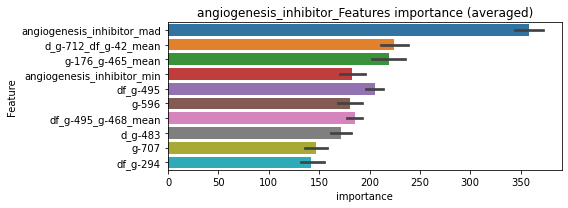

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649744	valid_1's binary_logloss: 0.0205978
[600]	training's binary_logloss: 0.000855499	valid_1's binary_logloss: 0.0105717
[900]	training's binary_logloss: 0.000437142	valid_1's binary_logloss: 0.00941074
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000433364	valid_1's binary_logloss: 0.00939675


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00625704	valid_1's binary_logloss: 0.0143409
[600]	training's binary_logloss: 0.00083923	valid_1's binary_logloss: 0.00357542
[900]	training's binary_logloss: 0.000439088	valid_1's binary_logloss: 0.00234692
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000422444	valid_1's binary_logloss: 0.00229926


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00653451	valid_1's binary_logloss: 0.0195063
[600]	training's binary_logloss: 0.000872583	valid_1's binary_logloss: 0.00707098
[900]	training's binary_logloss: 0.000446236	valid_1's binary_logloss: 0.00543125
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000431337	valid_1's binary_logloss: 0.00536348


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641872	valid_1's binary_logloss: 0.0189266
[600]	training's binary_logloss: 0.000851265	valid_1's binary_logloss: 0.00784173
[900]	training's binary_logloss: 0.000444446	valid_1's binary_logloss: 0.00652356
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000434871	valid_1's binary_logloss: 0.00650638


angiogenesis_inhibitor logloss: 0.005895577025987975


neg labels: 3289 → selected neg labels: 3286


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3286, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00824002	valid_1's binary_logloss: 0.033001
[600]	training's binary_logloss: 0.00109204	valid_1's binary_logloss: 0.0168175
[900]	training's binary_logloss: 0.000521001	valid_1's binary_logloss: 0.0142022
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000510762	valid_1's binary_logloss: 0.0141753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00867433	valid_1's binary_logloss: 0.0336403
[600]	training's binary_logloss: 0.00111103	valid_1's binary_logloss: 0.0213579
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000850107	valid_1's binary_logloss: 0.0208754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00833674	valid_1's binary_logloss: 0.0314702
[600]	training's binary_logloss: 0.0010853	valid_1's binary_logloss: 0.0155412
Early stopping, best itera

1 / 3 AUC score:1.000
y_Threshold: 0.0055397, Threshold: 0.0369095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.02584, conf_1:0.04798
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0369095
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_2: 0.0869095
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_3: 0.1369095
threshold: 0.1369095, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734449	valid_1's binary_logloss: 0.0326709
[600]	training's binary_logloss: 0.000942337	valid_1's binary_logloss: 0.0181698
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000539894	valid_1's binary_logloss: 0.0166618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00705979	valid_1's binary_logloss: 0.0332093
[600]	training's binary_logloss: 0.000946751	valid_1's binary_logloss: 0.0239496
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000818172	valid_1's binary_logloss: 0.0236884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00757062	valid_1's binary_logloss: 0.0226164
[600]	training's binary_logloss: 0.000960917	valid_1's binary_logloss: 0.00818978
[900]	training's binary_logloss: 0.000494242	valid_1's binary_logloss: 0.00632478
Early stopping, bes

2 / 3 AUC score:0.999
y_Threshold: 0.0469701, Threshold: 0.1369095, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00233955	valid_1's binary_logloss: 0.0279607


Remove_noisy_data: 16 → Positive_corect_labels: 647.0/3791
p_label_rate: 0.0160723 Vs.target_rate: 0.00155, Num_p_label: 64.0, conf_0:0.10953, conf_1:0.16429
Num_p_label: 64.0, Expected: 6.2, Adj_threshold_1: 0.1369095
Num_p_label: 55.0, Expected: 6.2, Adj_threshold_2: 0.1869095
Num_p_label: 47.0, Expected: 6.2, Adj_threshold_3: 0.2369095
Num_p_label: 42.0, Expected: 6.2, Adj_threshold_4: 0.2869095
Num_p_label: 39.0, Expected: 6.2, Adj_threshold_5: 0.3369095
Num_p_label: 32.0, Expected: 6.2, Adj_threshold_6: 0.3869095
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_7: 0.4369095
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_8: 0.4869095
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_9: 0.5369095
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_10: 0.5869095
threshold: 0.6369095, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3791, y_label_rate: 0.1706674
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693397	valid_1's binary_logloss: 0.0156558
[600]	training's binary_logloss: 0.000927449	valid_1's binary_logloss: 0.00468929
[900]	training's binary_logloss: 0.000472006	valid_1's binary_logloss: 0.00340247
Early stopping, best iteration is:
[943]	training's binary_logloss: 0.000460848	valid_1's binary_logloss: 0.00336227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00700179	valid_1's binary_logloss: 0.0159107
[600]	training's binary_logloss: 0.000922872	valid_1's binary_logloss: 0.00432197
[900]	training's binary_logloss: 0.000473429	valid_1's binary_logloss: 0.00292894
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.00045754	valid_1's binary_logloss: 0.00289395
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00679143	valid_1's binary_logloss: 0.0334717
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0925161, Threshold: 0.6369095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3787
p_label_rate: 0.0045203 Vs.target_rate: 0.00155, Num_p_label: 18.0, conf_0:0.50000, conf_1:0.70060
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_1: 0.6369095
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_2: 0.6869095
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_3: 0.7369095
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_4: 0.7869095
threshold: 0.7869095, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 645.0/3787, y_label_rate: 0.1703195


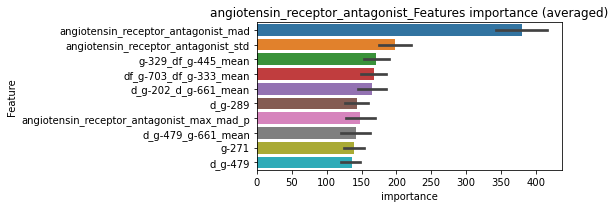

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00678443	valid_1's binary_logloss: 0.0235663
[600]	training's binary_logloss: 0.000894985	valid_1's binary_logloss: 0.0136739
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000793956	valid_1's binary_logloss: 0.0135501


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00751379	valid_1's binary_logloss: 0.0251757
[600]	training's binary_logloss: 0.000902087	valid_1's binary_logloss: 0.0113696
[900]	training's binary_logloss: 0.000451117	valid_1's binary_logloss: 0.00872418
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000451662	valid_1's binary_logloss: 0.00872103


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00672104	valid_1's binary_logloss: 0.0226201
[600]	training's binary_logloss: 0.000866319	valid_1's binary_logloss: 0.00942745
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000479882	valid_1's binary_logloss: 0.00737244


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638728	valid_1's binary_logloss: 0.0373866
[600]	training's binary_logloss: 0.000853439	valid_1's binary_logloss: 0.0209661
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000541859	valid_1's binary_logloss: 0.0184751


angiotensin_receptor_antagonist logloss: 0.012028605065560144


neg labels: 3289 → selected neg labels: 3278


anti-inflammatory, len(trt): 73, len(othr): 3278, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01613	valid_1's binary_logloss: 0.0658321
[600]	training's binary_logloss: 0.0022742	valid_1's binary_logloss: 0.0376949
[900]	training's binary_logloss: 0.00092205	valid_1's binary_logloss: 0.032422
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000920516	valid_1's binary_logloss: 0.0324113
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164328	valid_1's binary_logloss: 0.0612141
[600]	training's binary_logloss: 0.00222015	valid_1's binary_logloss: 0.0354026
[900]	training's binary_logloss: 0.000915955	valid_1's binary_logloss: 0.0317084
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000891876	valid_1's binary_logloss: 0.0315838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016423	valid_1's binary_logloss: 0.070663
[600]	training's binary_logloss: 

1 / 3 AUC score:0.998
y_Threshold: 0.0138932, Threshold: 0.1876122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.13133, conf_1:0.24390
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.1876122
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_2: 0.2376122
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_3: 0.2876122
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_4: 0.3376122
threshold: 0.3376122, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3787, y_label_rate: 0.1711117
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013861	valid_1's binary_logloss: 0.0597198
[600]	training's binary_logloss: 0.00187157	valid_1's binary_logloss: 0.0366986
[900]	training's binary_logloss: 0.000806361	valid_1's binary_logloss: 0.0338511
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000734671	valid_1's binary_logloss: 0.033654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139207	valid_1's binary_logloss: 0.0694039
[600]	training's binary_logloss: 0.00188818	valid_1's binary_logloss: 0.0546456
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00159441	valid_1's binary_logloss: 0.0542574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138212	valid_1's binary_logloss: 0.0713954
[600]	training's binary_logloss: 0.00190002	valid_1's binary_logloss: 0.0496329
Early stopping, best iteration

2 / 3 AUC score:0.995
y_Threshold: 0.0859612, Threshold: 0.3376122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 632.0/3755
p_label_rate: 0.0236062 Vs.target_rate: 0.00307, Num_p_label: 94.0, conf_0:0.27009, conf_1:0.40513
Num_p_label: 94.0, Expected: 12.2, Adj_threshold_1: 0.3376122
Num_p_label: 86.0, Expected: 12.2, Adj_threshold_2: 0.3876122
Num_p_label: 70.0, Expected: 12.2, Adj_threshold_3: 0.4376122
Num_p_label: 58.0, Expected: 12.2, Adj_threshold_4: 0.4876122
Num_p_label: 55.0, Expected: 12.2, Adj_threshold_5: 0.5376122
Num_p_label: 45.0, Expected: 12.2, Adj_threshold_6: 0.5876122
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_7: 0.6376122
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_8: 0.6876122
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_9: 0.7376122
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_10: 0.7876122
threshold: 0.7876122, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 632.0/3755, y_label_rate: 0.1683089

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114257	valid_1's binary_logloss: 0.0818067
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00184834	valid_1's binary_logloss: 0.0698781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121638	valid_1's binary_logloss: 0.0452826
[600]	training's binary_logloss: 0.00167257	valid_1's binary_logloss: 0.025432
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00108314	valid_1's binary_logloss: 0.0232287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130555	valid_1's binary_logloss: 0.0457673
[600]	training's binary_logloss: 0.00175427	valid_1's binary_logloss: 0.0255873
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.00097123	valid_1's binary_logloss: 0.0231436
Training until validation scores don't improve for 30 rounds
[300]	training'

3 / 3 AUC score:0.999
y_Threshold: 0.0702357, Threshold: 0.7876122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 617.0/3725
p_label_rate: 0.0080362 Vs.target_rate: 0.00307, Num_p_label: 32.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_1: 0.7876122
threshold: 0.7876122, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 617.0/3725, y_label_rate: 0.1656376


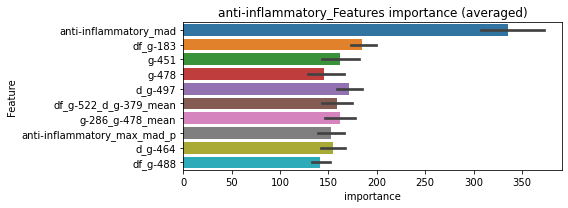

len(train_index) : 2793
len(valid_index) : 932
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110777	valid_1's binary_logloss: 0.0560125
[600]	training's binary_logloss: 0.00149187	valid_1's binary_logloss: 0.039502
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000902486	valid_1's binary_logloss: 0.037739


len(train_index) : 2794
len(valid_index) : 931
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112321	valid_1's binary_logloss: 0.0578382
[600]	training's binary_logloss: 0.00153635	valid_1's binary_logloss: 0.0381478
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00119976	valid_1's binary_logloss: 0.0369078


len(train_index) : 2794
len(valid_index) : 931
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113047	valid_1's binary_logloss: 0.0413429
[600]	training's binary_logloss: 0.00154919	valid_1's binary_logloss: 0.0231581
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000739679	valid_1's binary_logloss: 0.0206865


len(train_index) : 2794
len(valid_index) : 931
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110395	valid_1's binary_logloss: 0.0599259
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00246367	valid_1's binary_logloss: 0.0523461


anti-inflammatory logloss: 0.036920086946713206


neg labels: 3289 → selected neg labels: 3284


antiarrhythmic, len(trt): 24, len(othr): 3284, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00502808	valid_1's binary_logloss: 0.0136116
[600]	training's binary_logloss: 0.000661752	valid_1's binary_logloss: 0.00379063
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000384177	valid_1's binary_logloss: 0.00276642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00514272	valid_1's binary_logloss: 0.0171659
[600]	training's binary_logloss: 0.000666328	valid_1's binary_logloss: 0.00649434
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000419074	valid_1's binary_logloss: 0.00553982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512405	valid_1's binary_logloss: 0.0212784
[600]	training's binary_logloss: 0.000659504	valid_1's binary_logloss: 0.0144385
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000417527	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0033654, Threshold: 0.0277619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.01943, conf_1:0.03609
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0277619
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_2: 0.0777619
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_3: 0.1277619
threshold: 0.1277619, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470191	valid_1's binary_logloss: 0.013266
[600]	training's binary_logloss: 0.000599386	valid_1's binary_logloss: 0.00363805
[900]	training's binary_logloss: 0.000359857	valid_1's binary_logloss: 0.0028043
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000359857	valid_1's binary_logloss: 0.0028043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469304	valid_1's binary_logloss: 0.0139909
[600]	training's binary_logloss: 0.000604853	valid_1's binary_logloss: 0.00498538
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000364224	valid_1's binary_logloss: 0.00400117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00460056	valid_1's binary_logloss: 0.014545
[600]	training's binary_logloss: 0.000597202	valid_1's binary_logloss: 0.00871105
Early stopping, bes

2 / 3 AUC score:1.000
y_Threshold: 0.0438211, Threshold: 0.1277619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0155701 Vs.target_rate: 0.00101, Num_p_label: 62.0, conf_0:0.10221, conf_1:0.15331
Num_p_label: 62.0, Expected: 4.0, Adj_threshold_1: 0.1277619
Num_p_label: 48.0, Expected: 4.0, Adj_threshold_2: 0.1777619
Num_p_label: 44.0, Expected: 4.0, Adj_threshold_3: 0.2277619
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_4: 0.2777619
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_5: 0.3277619
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_6: 0.3777619
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_7: 0.4277619
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_8: 0.4777619
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_9: 0.5277619
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_10: 0.5777619
threshold: 0.6277619, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444212	valid_1's binary_logloss: 0.0160709
[600]	training's binary_logloss: 0.00058175	valid_1's binary_logloss: 0.00627178
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000362459	valid_1's binary_logloss: 0.00536139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440717	valid_1's binary_logloss: 0.0101351
[600]	training's binary_logloss: 0.00057786	valid_1's binary_logloss: 0.00269366
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000356191	valid_1's binary_logloss: 0.00213687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00446397	valid_1's binary_logloss: 0.0145437
[600]	training's binary_logloss: 0.000582644	valid_1's binary_logloss: 0.00813085
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000541402	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0860154, Threshold: 0.6277619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00101, Num_p_label: 14.0, conf_0:0.50000, conf_1:0.69054
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_1: 0.6277619
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_2: 0.6777619
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_3: 0.7277619
threshold: 0.7277619, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


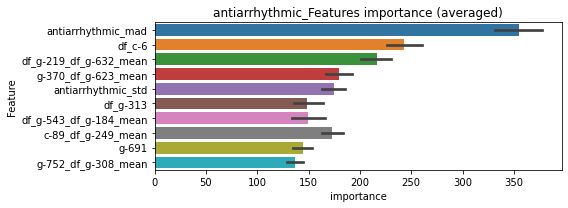

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00452565	valid_1's binary_logloss: 0.0157771
[600]	training's binary_logloss: 0.000581783	valid_1's binary_logloss: 0.00624527
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000377592	valid_1's binary_logloss: 0.00544072


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00434667	valid_1's binary_logloss: 0.0108108
[600]	training's binary_logloss: 0.000570614	valid_1's binary_logloss: 0.00321777
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000362684	valid_1's binary_logloss: 0.00272053


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00458076	valid_1's binary_logloss: 0.0150402
[600]	training's binary_logloss: 0.000585507	valid_1's binary_logloss: 0.00790013
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000541098	valid_1's binary_logloss: 0.00777505


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448612	valid_1's binary_logloss: 0.0107656
[600]	training's binary_logloss: 0.00057971	valid_1's binary_logloss: 0.00246059
[900]	training's binary_logloss: 0.000359537	valid_1's binary_logloss: 0.00174968
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000359537	valid_1's binary_logloss: 0.00174968


antiarrhythmic logloss: 0.004421635334656318


neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281, target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0098261	valid_1's binary_logloss: 0.0323693
[600]	training's binary_logloss: 0.00125768	valid_1's binary_logloss: 0.0113017
[900]	training's binary_logloss: 0.000571969	valid_1's binary_logloss: 0.00791436
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000523333	valid_1's binary_logloss: 0.007704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00974546	valid_1's binary_logloss: 0.0292127
[600]	training's binary_logloss: 0.00124421	valid_1's binary_logloss: 0.0126541
[900]	training's binary_logloss: 0.00056645	valid_1's binary_logloss: 0.0106072
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.00051871	valid_1's binary_logloss: 0.0104718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100559	valid_1's binary_logloss: 0.0229428
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0077603, Threshold: 0.1323894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00181, Num_p_label: 40.0, conf_0:0.09267, conf_1:0.17211
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_1: 0.1323894
Num_p_label: 30.0, Expected: 7.2, Adj_threshold_2: 0.1823894
Num_p_label: 22.0, Expected: 7.2, Adj_threshold_3: 0.2323894
Num_p_label: 11.0, Expected: 7.2, Adj_threshold_4: 0.2823894
threshold: 0.2823894, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00855131	valid_1's binary_logloss: 0.0227906
[600]	training's binary_logloss: 0.00112347	valid_1's binary_logloss: 0.00692368
[900]	training's binary_logloss: 0.000530062	valid_1's binary_logloss: 0.00463908
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000514884	valid_1's binary_logloss: 0.0045733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00852465	valid_1's binary_logloss: 0.0230563
[600]	training's binary_logloss: 0.00111156	valid_1's binary_logloss: 0.0107208
[900]	training's binary_logloss: 0.000522652	valid_1's binary_logloss: 0.0090178
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000526384	valid_1's binary_logloss: 0.00900492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00891551	valid_1's binary_logloss: 0.0266303
[600]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0451848, Threshold: 0.2823894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0173280 Vs.target_rate: 0.00181, Num_p_label: 69.0, conf_0:0.22591, conf_1:0.33887
Num_p_label: 69.0, Expected: 7.2, Adj_threshold_1: 0.2823894
Num_p_label: 59.0, Expected: 7.2, Adj_threshold_2: 0.3323894
Num_p_label: 55.0, Expected: 7.2, Adj_threshold_3: 0.3823894
Num_p_label: 47.0, Expected: 7.2, Adj_threshold_4: 0.4323894
Num_p_label: 38.0, Expected: 7.2, Adj_threshold_5: 0.4823894
Num_p_label: 32.0, Expected: 7.2, Adj_threshold_6: 0.5323894
Num_p_label: 25.0, Expected: 7.2, Adj_threshold_7: 0.5823894
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_8: 0.6323894
Num_p_label: 14.0, Expected: 7.2, Adj_threshold_9: 0.6823894
threshold: 0.6823894, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00833465	valid_1's binary_logloss: 0.0213653
[600]	training's binary_logloss: 0.00108443	valid_1's binary_logloss: 0.00641027
[900]	training's binary_logloss: 0.000520851	valid_1's binary_logloss: 0.00458873
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000507157	valid_1's binary_logloss: 0.00454433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00831166	valid_1's binary_logloss: 0.022737
[600]	training's binary_logloss: 0.00107398	valid_1's binary_logloss: 0.0084878
[900]	training's binary_logloss: 0.000510088	valid_1's binary_logloss: 0.00668053
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000510088	valid_1's binary_logloss: 0.00668053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0081017	valid_1's binary_logloss: 0.0250088
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0502788, Threshold: 0.6823894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0045203 Vs.target_rate: 0.00181, Num_p_label: 18.0, conf_0:0.50000, conf_1:0.75063
Num_p_label: 18.0, Expected: 7.2, Adj_threshold_1: 0.6823894
Num_p_label: 14.0, Expected: 7.2, Adj_threshold_2: 0.7323894
threshold: 0.7323894, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


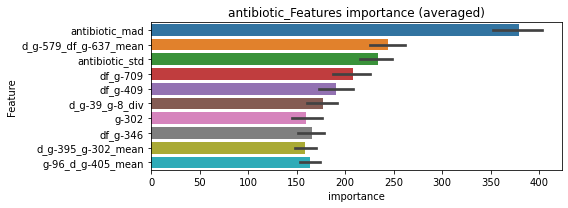

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00826435	valid_1's binary_logloss: 0.0226543
[600]	training's binary_logloss: 0.00106366	valid_1's binary_logloss: 0.00711021
[900]	training's binary_logloss: 0.000512894	valid_1's binary_logloss: 0.00510981
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000507472	valid_1's binary_logloss: 0.00509269


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00837722	valid_1's binary_logloss: 0.0293054
[600]	training's binary_logloss: 0.00106432	valid_1's binary_logloss: 0.0155026
[900]	training's binary_logloss: 0.000510025	valid_1's binary_logloss: 0.0134877
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000501123	valid_1's binary_logloss: 0.0134451


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00834154	valid_1's binary_logloss: 0.0323904
[600]	training's binary_logloss: 0.00107557	valid_1's binary_logloss: 0.0170412
[900]	training's binary_logloss: 0.000518851	valid_1's binary_logloss: 0.0150072
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000518851	valid_1's binary_logloss: 0.0150072


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0082708	valid_1's binary_logloss: 0.0208001
[600]	training's binary_logloss: 0.00106846	valid_1's binary_logloss: 0.0075122
[900]	training's binary_logloss: 0.000511726	valid_1's binary_logloss: 0.00606189
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.00047432	valid_1's binary_logloss: 0.00602153


antibiotic logloss: 0.009893422782429065


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385309	valid_1's binary_logloss: 0.00821541
[600]	training's binary_logloss: 0.000502225	valid_1's binary_logloss: 0.00190391
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000316695	valid_1's binary_logloss: 0.00141334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00389559	valid_1's binary_logloss: 0.0125396
[600]	training's binary_logloss: 0.000492821	valid_1's binary_logloss: 0.00377371
[900]	training's binary_logloss: 0.000305034	valid_1's binary_logloss: 0.00289621
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000305379	valid_1's binary_logloss: 0.00289391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398805	valid_1's binary_logloss: 0.00699256
[600]	training's binary_logloss: 0.000508846	valid_1's binary_logloss: 0.0014665
Early stopping

1 / 3 AUC score:1.000
y_Threshold: 0.0024018, Threshold: 0.0088892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00622, conf_1:0.01156
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0088892
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0588892
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1088892
threshold: 0.1088892, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357763	valid_1's binary_logloss: 0.00722497
[600]	training's binary_logloss: 0.000455032	valid_1's binary_logloss: 0.0018367
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00029484	valid_1's binary_logloss: 0.00148394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362512	valid_1's binary_logloss: 0.0101836
[600]	training's binary_logloss: 0.000459203	valid_1's binary_logloss: 0.00253689
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000292986	valid_1's binary_logloss: 0.00186653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00355113	valid_1's binary_logloss: 0.00520578
[600]	training's binary_logloss: 0.000453226	valid_1's binary_logloss: 0.000875221
[900]	training's binary_logloss: 0.000289691	valid_1's binary_logloss: 0.000596812
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.1156725, Threshold: 0.1088892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0055249 Vs.target_rate: 0.00076, Num_p_label: 22.0, conf_0:0.08711, conf_1:0.13067
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_1: 0.1088892
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.1588892
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.2088892
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.2588892
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_5: 0.3088892
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3588892
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_7: 0.4088892
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_8: 0.4588892
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_9: 0.5088892
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_10: 0.5588892
threshold: 0.6088892, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357763	valid_1's binary_logloss: 0.00722497
[600]	training's binary_logloss: 0.000455032	valid_1's binary_logloss: 0.0018367
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00029484	valid_1's binary_logloss: 0.00148394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362512	valid_1's binary_logloss: 0.0101836
[600]	training's binary_logloss: 0.000459203	valid_1's binary_logloss: 0.00253689
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000292986	valid_1's binary_logloss: 0.00186653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00355113	valid_1's binary_logloss: 0.00520578
[600]	training's binary_logloss: 0.000453226	valid_1's binary_logloss: 0.000875221
[900]	training's binary_logloss: 0.000289691	valid_1's binary_logloss: 0.000596812
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.1156725, Threshold: 0.6088892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00076, Num_p_label: 10.0, conf_0:0.50000, conf_1:0.66978
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.6088892
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.6588892
threshold: 0.6588892, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


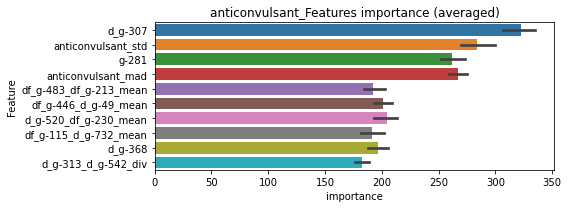

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00353217	valid_1's binary_logloss: 0.00703954
[600]	training's binary_logloss: 0.000456551	valid_1's binary_logloss: 0.00191601
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000296905	valid_1's binary_logloss: 0.00149192


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354049	valid_1's binary_logloss: 0.00953284
[600]	training's binary_logloss: 0.00045132	valid_1's binary_logloss: 0.0023951
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000296147	valid_1's binary_logloss: 0.00182029


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356353	valid_1's binary_logloss: 0.00531597
[600]	training's binary_logloss: 0.000451299	valid_1's binary_logloss: 0.000909859
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000294705	valid_1's binary_logloss: 0.000633919


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00348977	valid_1's binary_logloss: 0.00985248
[600]	training's binary_logloss: 0.000445898	valid_1's binary_logloss: 0.00290017
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000341926	valid_1's binary_logloss: 0.00257576


anticonvulsant logloss: 0.001630659763077593


neg labels: 3289 → selected neg labels: 3286


antifungal, len(trt): 26, len(othr): 3286, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577553	valid_1's binary_logloss: 0.0148791
[600]	training's binary_logloss: 0.000724563	valid_1's binary_logloss: 0.0040144
[900]	training's binary_logloss: 0.000381842	valid_1's binary_logloss: 0.00281231
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000380275	valid_1's binary_logloss: 0.00280473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574371	valid_1's binary_logloss: 0.0191109
[600]	training's binary_logloss: 0.000732714	valid_1's binary_logloss: 0.00686894
[900]	training's binary_logloss: 0.000384911	valid_1's binary_logloss: 0.00556371
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000382832	valid_1's binary_logloss: 0.00555252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574994	valid_1's binary_logloss: 0.0126317
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0032836, Threshold: 0.0205018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.01435, conf_1:0.02665
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0205018
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_2: 0.0705018
threshold: 0.0705018, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505367	valid_1's binary_logloss: 0.0117906
[600]	training's binary_logloss: 0.000650237	valid_1's binary_logloss: 0.00275875
[900]	training's binary_logloss: 0.000355255	valid_1's binary_logloss: 0.00184164
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000355255	valid_1's binary_logloss: 0.00184164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005041	valid_1's binary_logloss: 0.0167564
[600]	training's binary_logloss: 0.000651787	valid_1's binary_logloss: 0.00617772
[900]	training's binary_logloss: 0.000352459	valid_1's binary_logloss: 0.00514936
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000357482	valid_1's binary_logloss: 0.00512244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503106	valid_1's binary_logloss: 0.00940733
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0440938, Threshold: 0.0705018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0128076 Vs.target_rate: 0.00109, Num_p_label: 51.0, conf_0:0.05640, conf_1:0.08460
Num_p_label: 51.0, Expected: 4.3, Adj_threshold_1: 0.0705018
Num_p_label: 36.0, Expected: 4.3, Adj_threshold_2: 0.1205018
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_3: 0.1705018
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_4: 0.2205018
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_5: 0.2705018
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_6: 0.3205018
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_7: 0.3705018
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_8: 0.4205018
threshold: 0.4205018, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505367	valid_1's binary_logloss: 0.0117906
[600]	training's binary_logloss: 0.000650237	valid_1's binary_logloss: 0.00275875
[900]	training's binary_logloss: 0.000355255	valid_1's binary_logloss: 0.00184164
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000355255	valid_1's binary_logloss: 0.00184164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005041	valid_1's binary_logloss: 0.0167564
[600]	training's binary_logloss: 0.000651787	valid_1's binary_logloss: 0.00617772
[900]	training's binary_logloss: 0.000352459	valid_1's binary_logloss: 0.00514936
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000357482	valid_1's binary_logloss: 0.00512244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503106	valid_1's binary_logloss: 0.00940733
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0440938, Threshold: 0.4205018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00109, Num_p_label: 8.0, conf_0:0.37845, conf_1:0.46255
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_1: 0.4205018
threshold: 0.4205018, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


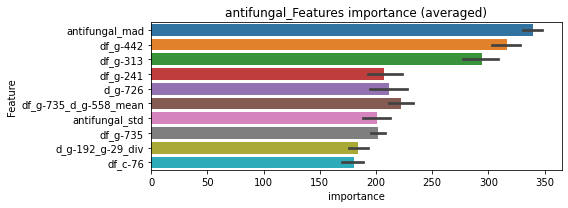

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505447	valid_1's binary_logloss: 0.0115276
[600]	training's binary_logloss: 0.000644973	valid_1's binary_logloss: 0.0027054
[900]	training's binary_logloss: 0.000356774	valid_1's binary_logloss: 0.00180202
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000356787	valid_1's binary_logloss: 0.00180189


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00502375	valid_1's binary_logloss: 0.0166618
[600]	training's binary_logloss: 0.000649996	valid_1's binary_logloss: 0.00694176
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000397854	valid_1's binary_logloss: 0.00614665


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512431	valid_1's binary_logloss: 0.00986812
[600]	training's binary_logloss: 0.000659334	valid_1's binary_logloss: 0.00213123
[900]	training's binary_logloss: 0.00035828	valid_1's binary_logloss: 0.00140383
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000351536	valid_1's binary_logloss: 0.00139177


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486865	valid_1's binary_logloss: 0.0158936
[600]	training's binary_logloss: 0.000637468	valid_1's binary_logloss: 0.00543344
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000363284	valid_1's binary_logloss: 0.00422989


antifungal logloss: 0.0033932662868240275


neg labels: 3289 → selected neg labels: 3288


antihistamine, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0041551	valid_1's binary_logloss: 0.0109534
[600]	training's binary_logloss: 0.00052899	valid_1's binary_logloss: 0.00261974
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000333883	valid_1's binary_logloss: 0.00193534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0041607	valid_1's binary_logloss: 0.0107964
[600]	training's binary_logloss: 0.000519061	valid_1's binary_logloss: 0.00315667
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000340061	valid_1's binary_logloss: 0.00259983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415768	valid_1's binary_logloss: 0.0129615
[600]	training's binary_logloss: 0.000512831	valid_1's binary_logloss: 0.00728044
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000405673	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0026973, Threshold: 0.0604173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.04229, conf_1:0.07854
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0604173
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_2: 0.1104173
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_3: 0.1604173
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.2104173
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.2604173
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3104173
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.3604173
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.4104173
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.4604173
threshold: 0.4604173, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371515	valid_1's binary_logloss: 0.0108923
[600]	training's binary_logloss: 0.000470999	valid_1's binary_logloss: 0.00288016
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000326466	valid_1's binary_logloss: 0.00215411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00358421	valid_1's binary_logloss: 0.0102174
[600]	training's binary_logloss: 0.00044842	valid_1's binary_logloss: 0.00280178
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000320515	valid_1's binary_logloss: 0.00232725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364896	valid_1's binary_logloss: 0.0109453
[600]	training's binary_logloss: 0.000463994	valid_1's binary_logloss: 0.00711435
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000413715	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0776341, Threshold: 0.4604173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0092918 Vs.target_rate: 0.00076, Num_p_label: 37.0, conf_0:0.36833, conf_1:0.55250
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_1: 0.4604173
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.5104173
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.5604173
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_4: 0.6104173
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_5: 0.6604173
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_6: 0.7104173
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_7: 0.7604173
threshold: 0.7604173, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360612	valid_1's binary_logloss: 0.00681942
[600]	training's binary_logloss: 0.00046593	valid_1's binary_logloss: 0.00130488
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000327432	valid_1's binary_logloss: 0.00100199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356465	valid_1's binary_logloss: 0.0116789
[600]	training's binary_logloss: 0.000454945	valid_1's binary_logloss: 0.00439147
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000332555	valid_1's binary_logloss: 0.00379694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0036163	valid_1's binary_logloss: 0.00663802
[600]	training's binary_logloss: 0.000467308	valid_1's binary_logloss: 0.00123888
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000331118	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.1634876, Threshold: 0.7604173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0035158 Vs.target_rate: 0.00076, Num_p_label: 14.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.7604173
threshold: 0.7604173, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


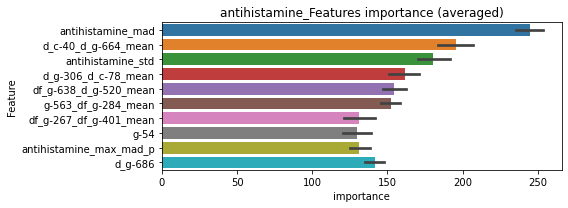

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363844	valid_1's binary_logloss: 0.00671246
[600]	training's binary_logloss: 0.000460315	valid_1's binary_logloss: 0.00126521
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000322153	valid_1's binary_logloss: 0.000979756


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357151	valid_1's binary_logloss: 0.0121175
[600]	training's binary_logloss: 0.000453701	valid_1's binary_logloss: 0.0046857
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000327848	valid_1's binary_logloss: 0.00411653


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364577	valid_1's binary_logloss: 0.00686769
[600]	training's binary_logloss: 0.000465058	valid_1's binary_logloss: 0.00124815
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000324847	valid_1's binary_logloss: 0.000930591


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035231	valid_1's binary_logloss: 0.012338
[600]	training's binary_logloss: 0.000448138	valid_1's binary_logloss: 0.00431952
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000322113	valid_1's binary_logloss: 0.00370371


antihistamine logloss: 0.0024324221993186003


neg labels: 3289 → selected neg labels: 3287


antimalarial, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00466253	valid_1's binary_logloss: 0.00836883
[600]	training's binary_logloss: 0.000556761	valid_1's binary_logloss: 0.00191981
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000352379	valid_1's binary_logloss: 0.00148903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0046522	valid_1's binary_logloss: 0.0128105
[600]	training's binary_logloss: 0.000562044	valid_1's binary_logloss: 0.00536513
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000379723	valid_1's binary_logloss: 0.00472484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487377	valid_1's binary_logloss: 0.00897918
[600]	training's binary_logloss: 0.000575128	valid_1's binary_logloss: 0.00200024
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000365168	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027024, Threshold: 0.0148851, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01042, conf_1:0.01935
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0148851
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0648851
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_3: 0.1148851
threshold: 0.1148851, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408749	valid_1's binary_logloss: 0.00711555
[600]	training's binary_logloss: 0.000513665	valid_1's binary_logloss: 0.00142796
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000342811	valid_1's binary_logloss: 0.0010464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00404615	valid_1's binary_logloss: 0.015078
[600]	training's binary_logloss: 0.000513481	valid_1's binary_logloss: 0.00956347
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000496184	valid_1's binary_logloss: 0.00949166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0042681	valid_1's binary_logloss: 0.00603413
[600]	training's binary_logloss: 0.000530767	valid_1's binary_logloss: 0.000983608
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000337912	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0443403, Threshold: 0.1148851, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0062783 Vs.target_rate: 0.00076, Num_p_label: 25.0, conf_0:0.09191, conf_1:0.13786
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.1148851
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_2: 0.1648851
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.2148851
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_4: 0.2648851
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.3148851
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.3648851
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_7: 0.4148851
threshold: 0.4148851, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00411309	valid_1's binary_logloss: 0.00664515
[600]	training's binary_logloss: 0.000517001	valid_1's binary_logloss: 0.00125716
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000335176	valid_1's binary_logloss: 0.000884657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412691	valid_1's binary_logloss: 0.00983792
[600]	training's binary_logloss: 0.000519987	valid_1's binary_logloss: 0.00438111
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000359928	valid_1's binary_logloss: 0.00400055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428191	valid_1's binary_logloss: 0.00637543
[600]	training's binary_logloss: 0.000525183	valid_1's binary_logloss: 0.00102137
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000332133	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0575809, Threshold: 0.4148851, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.37340, conf_1:0.45637
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.4148851
threshold: 0.4148851, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


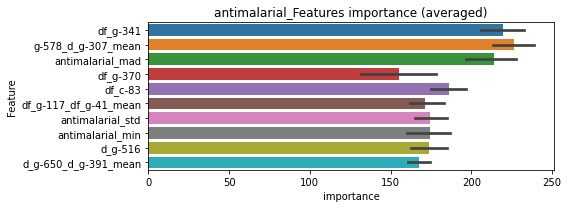

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408612	valid_1's binary_logloss: 0.0103574
[600]	training's binary_logloss: 0.000513321	valid_1's binary_logloss: 0.00375793
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000342873	valid_1's binary_logloss: 0.00333039


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409563	valid_1's binary_logloss: 0.0105274
[600]	training's binary_logloss: 0.000506852	valid_1's binary_logloss: 0.0051506
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000336703	valid_1's binary_logloss: 0.00473775


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424883	valid_1's binary_logloss: 0.00681606
[600]	training's binary_logloss: 0.000521794	valid_1's binary_logloss: 0.0012079
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000358385	valid_1's binary_logloss: 0.0009032


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410695	valid_1's binary_logloss: 0.00706893
[600]	training's binary_logloss: 0.000510472	valid_1's binary_logloss: 0.00131983
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000341845	valid_1's binary_logloss: 0.000960994


antimalarial logloss: 0.002483287385730859


neg labels: 3289 → selected neg labels: 3281


antioxidant, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162547	valid_1's binary_logloss: 0.0688578
[600]	training's binary_logloss: 0.00216905	valid_1's binary_logloss: 0.0458406
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00149346	valid_1's binary_logloss: 0.0437973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166142	valid_1's binary_logloss: 0.0749515
[600]	training's binary_logloss: 0.00223478	valid_1's binary_logloss: 0.0544353
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.00103136	valid_1's binary_logloss: 0.0527691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172679	valid_1's binary_logloss: 0.0567927
[600]	training's binary_logloss: 0.00230758	valid_1's binary_logloss: 0.035389
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.0011201	valid_1's binary_logloss: 0.03265

1 / 3 AUC score:0.994
y_Threshold: 0.0136289, Threshold: 0.1282298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 643/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.08976, conf_1:0.16670
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.1282298
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_2: 0.1782298
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_3: 0.2282298
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_4: 0.2782298
threshold: 0.2782298, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 643.0/3779, y_label_rate: 0.1701508
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127919	valid_1's binary_logloss: 0.0537006
[600]	training's binary_logloss: 0.00169266	valid_1's binary_logloss: 0.0355703
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00141168	valid_1's binary_logloss: 0.035008
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127885	valid_1's binary_logloss: 0.0555717
[600]	training's binary_logloss: 0.00167588	valid_1's binary_logloss: 0.0337419
[900]	training's binary_logloss: 0.000713721	valid_1's binary_logloss: 0.0300033
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00071994	valid_1's binary_logloss: 0.0300009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134344	valid_1's binary_logloss: 0.0515874
[600]	training's binary_logloss: 0.00173445	valid_1's binary_logloss: 0.0336876
Early stopping, best iteration

2 / 3 AUC score:0.999
y_Threshold: 0.0814418, Threshold: 0.2782298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 627.0/3747
p_label_rate: 0.0185836 Vs.target_rate: 0.00307, Num_p_label: 74.0, conf_0:0.22258, conf_1:0.33388
Num_p_label: 74.0, Expected: 12.2, Adj_threshold_1: 0.2782298
Num_p_label: 69.0, Expected: 12.2, Adj_threshold_2: 0.3282298
Num_p_label: 60.0, Expected: 12.2, Adj_threshold_3: 0.3782298
Num_p_label: 54.0, Expected: 12.2, Adj_threshold_4: 0.4282298
Num_p_label: 52.0, Expected: 12.2, Adj_threshold_5: 0.4782298
Num_p_label: 46.0, Expected: 12.2, Adj_threshold_6: 0.5282298
Num_p_label: 41.0, Expected: 12.2, Adj_threshold_7: 0.5782298
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_8: 0.6282298
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_9: 0.6782298
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_10: 0.7282298
threshold: 0.7782298, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 627.0/3747, y_label_rate: 0.1673339

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120292	valid_1's binary_logloss: 0.0351952
[600]	training's binary_logloss: 0.00154427	valid_1's binary_logloss: 0.0177396
[900]	training's binary_logloss: 0.000685416	valid_1's binary_logloss: 0.015544
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000691883	valid_1's binary_logloss: 0.0155353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105191	valid_1's binary_logloss: 0.0625464
[600]	training's binary_logloss: 0.00140198	valid_1's binary_logloss: 0.052343
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00134484	valid_1's binary_logloss: 0.0521644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107415	valid_1's binary_logloss: 0.0491681
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00169165	valid_1's binary_logloss: 0.038

3 / 3 AUC score:0.998
y_Threshold: 0.0584801, Threshold: 0.7782298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 616.0/3725
p_label_rate: 0.0090407 Vs.target_rate: 0.00307, Num_p_label: 36.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 36.0, Expected: 12.2, Adj_threshold_1: 0.7782298
threshold: 0.7782298, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 616.0/3725, y_label_rate: 0.1653691


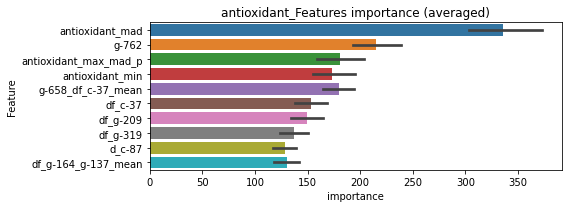

len(train_index) : 2793
len(valid_index) : 932
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00953816	valid_1's binary_logloss: 0.0478609
[600]	training's binary_logloss: 0.00124799	valid_1's binary_logloss: 0.0339652
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00120365	valid_1's binary_logloss: 0.0339063


len(train_index) : 2794
len(valid_index) : 931
================================= fold 2/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00947103	valid_1's binary_logloss: 0.0505109
[600]	training's binary_logloss: 0.00125577	valid_1's binary_logloss: 0.0356348
[900]	training's binary_logloss: 0.00059645	valid_1's binary_logloss: 0.0342255
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000611652	valid_1's binary_logloss: 0.0340666


len(train_index) : 2794
len(valid_index) : 931
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102813	valid_1's binary_logloss: 0.03856
[600]	training's binary_logloss: 0.00134579	valid_1's binary_logloss: 0.0221983
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00094892	valid_1's binary_logloss: 0.0210246


len(train_index) : 2794
len(valid_index) : 931
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010145	valid_1's binary_logloss: 0.0469874
[600]	training's binary_logloss: 0.00131948	valid_1's binary_logloss: 0.0317924
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000982314	valid_1's binary_logloss: 0.0309216


antioxidant logloss: 0.029980824468420826


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819192	valid_1's binary_logloss: 0.030889
[600]	training's binary_logloss: 0.000998106	valid_1's binary_logloss: 0.0135987
[900]	training's binary_logloss: 0.000478633	valid_1's binary_logloss: 0.011253
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000488576	valid_1's binary_logloss: 0.011243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00830616	valid_1's binary_logloss: 0.029215
[600]	training's binary_logloss: 0.00100598	valid_1's binary_logloss: 0.014279
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000531201	valid_1's binary_logloss: 0.0128869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0086581	valid_1's binary_logloss: 0.0190259
[600]	training's binary_logloss: 0.00102209	valid_1's binary_logloss: 0.0055498
[900]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0048014, Threshold: 0.0346333, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.02424, conf_1:0.04502
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0346333
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_2: 0.0846333
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_3: 0.1346333
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.1846333
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_5: 0.2346333
threshold: 0.2346333, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00713999	valid_1's binary_logloss: 0.0262329
[600]	training's binary_logloss: 0.000876852	valid_1's binary_logloss: 0.011395
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000459208	valid_1's binary_logloss: 0.00966919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00694992	valid_1's binary_logloss: 0.0264357
[600]	training's binary_logloss: 0.000871751	valid_1's binary_logloss: 0.0127051
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000462823	valid_1's binary_logloss: 0.0112511
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00760862	valid_1's binary_logloss: 0.0138852
[600]	training's binary_logloss: 0.000918144	valid_1's binary_logloss: 0.00311171
[900]	training's binary_logloss: 0.000462475	valid_1's binary_logloss: 0.0020713
Early stopping, best

2 / 3 AUC score:1.000
y_Threshold: 0.1330724, Threshold: 0.2346333, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0123054 Vs.target_rate: 0.00151, Num_p_label: 49.0, conf_0:0.18771, conf_1:0.28156
Num_p_label: 49.0, Expected: 6.0, Adj_threshold_1: 0.2346333
Num_p_label: 46.0, Expected: 6.0, Adj_threshold_2: 0.2846333
Num_p_label: 45.0, Expected: 6.0, Adj_threshold_3: 0.3346333
Num_p_label: 42.0, Expected: 6.0, Adj_threshold_4: 0.3846333
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_5: 0.4346333
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_6: 0.4846333
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_7: 0.5346333
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_8: 0.5846333
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_9: 0.6346333
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_10: 0.6846333
threshold: 0.7346333, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00689982	valid_1's binary_logloss: 0.0192566
[600]	training's binary_logloss: 0.000853454	valid_1's binary_logloss: 0.00821963
[900]	training's binary_logloss: 0.000447789	valid_1's binary_logloss: 0.00693695
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000451777	valid_1's binary_logloss: 0.00690739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00668529	valid_1's binary_logloss: 0.0227334
[600]	training's binary_logloss: 0.000851332	valid_1's binary_logloss: 0.0101835
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000459474	valid_1's binary_logloss: 0.00872184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670702	valid_1's binary_logloss: 0.0294664
[600]	training's binary_logloss: 0.000830842	valid_1's binary_logloss: 0.0183247
Early stopping, b

3 / 3 AUC score:1.000
y_Threshold: 0.0675856, Threshold: 0.7346333, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0070316 Vs.target_rate: 0.00151, Num_p_label: 28.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.7346333
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_2: 0.7846333
threshold: 0.7846333, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 649.0/3793, y_label_rate: 0.1711047


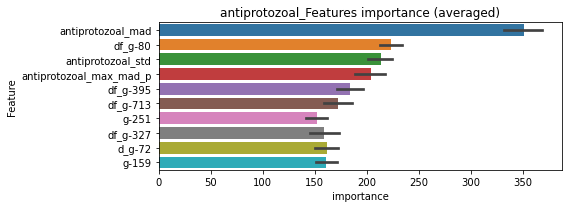

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644265	valid_1's binary_logloss: 0.023734
[600]	training's binary_logloss: 0.000818657	valid_1's binary_logloss: 0.0113672
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000510946	valid_1's binary_logloss: 0.00998084


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00700147	valid_1's binary_logloss: 0.0179805
[600]	training's binary_logloss: 0.000836696	valid_1's binary_logloss: 0.0052636
[900]	training's binary_logloss: 0.000438706	valid_1's binary_logloss: 0.00396436
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000437772	valid_1's binary_logloss: 0.0039614


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00667862	valid_1's binary_logloss: 0.0214012
[600]	training's binary_logloss: 0.000826627	valid_1's binary_logloss: 0.00845491
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000463601	valid_1's binary_logloss: 0.00690641


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676357	valid_1's binary_logloss: 0.0214421
[600]	training's binary_logloss: 0.000826346	valid_1's binary_logloss: 0.00815728
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000455242	valid_1's binary_logloss: 0.00701875


antiprotozoal logloss: 0.0069717981722515095


neg labels: 3289 → selected neg labels: 3282


antiviral, len(trt): 23, len(othr): 3282, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486213	valid_1's binary_logloss: 0.0159003
[600]	training's binary_logloss: 0.00061465	valid_1's binary_logloss: 0.00785493
[900]	training's binary_logloss: 0.000346048	valid_1's binary_logloss: 0.00693183
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000348275	valid_1's binary_logloss: 0.00689001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00502157	valid_1's binary_logloss: 0.0188461
[600]	training's binary_logloss: 0.000614468	valid_1's binary_logloss: 0.0105296
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000565583	valid_1's binary_logloss: 0.0103484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498278	valid_1's binary_logloss: 0.01188
[600]	training's binary_logloss: 0.000621547	valid_1's binary_logloss: 0.00338847
[900]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0027477, Threshold: 0.0099932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00097, Num_p_label: 40.0, conf_0:0.00700, conf_1:0.01299
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0099932
Num_p_label: 5.0, Expected: 3.8, Adj_threshold_2: 0.0599932
threshold: 0.0599932, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433966	valid_1's binary_logloss: 0.0167614
[600]	training's binary_logloss: 0.000556267	valid_1's binary_logloss: 0.00873117
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000344572	valid_1's binary_logloss: 0.00779328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470825	valid_1's binary_logloss: 0.0150647
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000862453	valid_1's binary_logloss: 0.00988402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00482648	valid_1's binary_logloss: 0.0103902
[600]	training's binary_logloss: 0.000592339	valid_1's binary_logloss: 0.00295376
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00036027	valid_1's binary_logloss: 0.00231724
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0497959, Threshold: 0.0599932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0077850 Vs.target_rate: 0.00097, Num_p_label: 31.0, conf_0:0.04799, conf_1:0.07199
Num_p_label: 31.0, Expected: 3.8, Adj_threshold_1: 0.0599932
Num_p_label: 21.0, Expected: 3.8, Adj_threshold_2: 0.1099932
Num_p_label: 15.0, Expected: 3.8, Adj_threshold_3: 0.1599932
Num_p_label: 11.0, Expected: 3.8, Adj_threshold_4: 0.2099932
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_5: 0.2599932
threshold: 0.2599932, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441008	valid_1's binary_logloss: 0.0233526
[600]	training's binary_logloss: 0.000552287	valid_1's binary_logloss: 0.0147267
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000373307	valid_1's binary_logloss: 0.0142055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471587	valid_1's binary_logloss: 0.00787624
[600]	training's binary_logloss: 0.00058597	valid_1's binary_logloss: 0.00146239
[900]	training's binary_logloss: 0.000340634	valid_1's binary_logloss: 0.000986874
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000334666	valid_1's binary_logloss: 0.000980859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00459702	valid_1's binary_logloss: 0.00899679
[600]	training's binary_logloss: 0.000568643	valid_1's binary_logloss: 0.00215888
Early stopping

3 / 3 AUC score:1.000
y_Threshold: 0.0786064, Threshold: 0.2599932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0022602 Vs.target_rate: 0.00097, Num_p_label: 9.0, conf_0:0.23399, conf_1:0.28599
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.2599932
threshold: 0.2599932, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


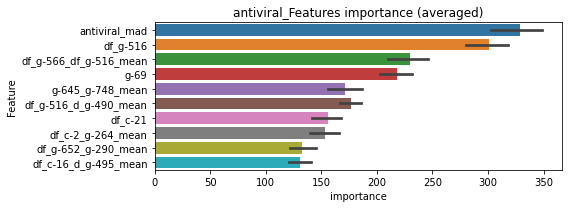

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448504	valid_1's binary_logloss: 0.0139788
[600]	training's binary_logloss: 0.000558237	valid_1's binary_logloss: 0.00686126
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000550389	valid_1's binary_logloss: 0.00684298


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00454233	valid_1's binary_logloss: 0.0100232
[600]	training's binary_logloss: 0.000562692	valid_1's binary_logloss: 0.00350332
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000344183	valid_1's binary_logloss: 0.00306772


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450823	valid_1's binary_logloss: 0.0111934
[600]	training's binary_logloss: 0.000561957	valid_1's binary_logloss: 0.00365952
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000346032	valid_1's binary_logloss: 0.00296613


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447134	valid_1's binary_logloss: 0.0138634
[600]	training's binary_logloss: 0.000560439	valid_1's binary_logloss: 0.00638321
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00037101	valid_1's binary_logloss: 0.00598535


antiviral logloss: 0.004715679187002353


neg labels: 3289 → selected neg labels: 3283


apoptosis_stimulant, len(trt): 49, len(othr): 3283, target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107116	valid_1's binary_logloss: 0.0527377
[600]	training's binary_logloss: 0.00142947	valid_1's binary_logloss: 0.0257325
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000714439	valid_1's binary_logloss: 0.0213662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124916	valid_1's binary_logloss: 0.0494503
[600]	training's binary_logloss: 0.00155191	valid_1's binary_logloss: 0.0266719
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000749051	valid_1's binary_logloss: 0.023931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01165	valid_1's binary_logloss: 0.0329559
[600]	training's binary_logloss: 0.00152082	valid_1's binary_logloss: 0.0111147
[900]	training's binary_logloss: 0.0006721	valid_1's binary_logloss: 0.00816824
Early stopping, best iteration 

1 / 3 AUC score:0.999
y_Threshold: 0.0086448, Threshold: 0.0797372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00206, Num_p_label: 40.0, conf_0:0.05582, conf_1:0.10366
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_1: 0.0797372
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_2: 0.1297372
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_3: 0.1797372
threshold: 0.1797372, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106633	valid_1's binary_logloss: 0.0441724
[600]	training's binary_logloss: 0.00140896	valid_1's binary_logloss: 0.0244675
[900]	training's binary_logloss: 0.000620772	valid_1's binary_logloss: 0.0223085
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000620772	valid_1's binary_logloss: 0.0223085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107443	valid_1's binary_logloss: 0.0297597
[600]	training's binary_logloss: 0.00136693	valid_1's binary_logloss: 0.00917018
[900]	training's binary_logloss: 0.000614951	valid_1's binary_logloss: 0.00635052
Early stopping, best iteration is:
[1064]	training's binary_logloss: 0.000542399	valid_1's binary_logloss: 0.00601484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106447	valid_1's binary_logloss: 0.0429491
[600]	training's binar

2 / 3 AUC score:0.999
y_Threshold: 0.0916192, Threshold: 0.1797372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0185836 Vs.target_rate: 0.00206, Num_p_label: 74.0, conf_0:0.14379, conf_1:0.21568
Num_p_label: 74.0, Expected: 8.2, Adj_threshold_1: 0.1797372
Num_p_label: 56.0, Expected: 8.2, Adj_threshold_2: 0.2297372
Num_p_label: 48.0, Expected: 8.2, Adj_threshold_3: 0.2797372
Num_p_label: 42.0, Expected: 8.2, Adj_threshold_4: 0.3297372
Num_p_label: 37.0, Expected: 8.2, Adj_threshold_5: 0.3797372
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_6: 0.4297372
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_7: 0.4797372
threshold: 0.4797372, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3795, y_label_rate: 0.1712780
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103737	valid_1's binary_logloss: 0.0285594
[600]	training's binary_logloss: 0.00136989	valid_1's binary_logloss: 0.0098983
[900]	training's binary_logloss: 0.00061872	valid_1's binary_logloss: 0.00708504
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.000544912	valid_1's binary_logloss: 0.00682097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010107	valid_1's binary_logloss: 0.0463867
[600]	training's binary_logloss: 0.00131072	valid_1's binary_logloss: 0.0270835
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000658554	valid_1's binary_logloss: 0.0253173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101031	valid_1's binary_logloss: 0.0473177
[600]	training's binary_logloss: 0.00131856	valid_1's binary_logloss: 0.0279217
Early stopping, best itera

3 / 3 AUC score:1.000
y_Threshold: 0.0942129, Threshold: 0.4797372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3779
p_label_rate: 0.0072828 Vs.target_rate: 0.00206, Num_p_label: 29.0, conf_0:0.43176, conf_1:0.52771
Num_p_label: 29.0, Expected: 8.2, Adj_threshold_1: 0.4797372
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_2: 0.5297372
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_3: 0.5797372
threshold: 0.5797372, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 642.0/3779, y_label_rate: 0.1698862


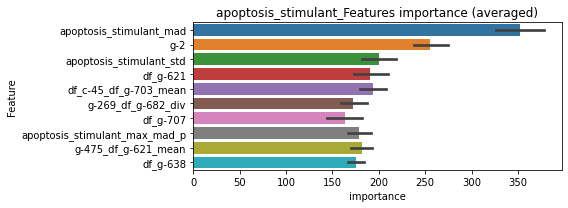

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00975963	valid_1's binary_logloss: 0.0322079
[600]	training's binary_logloss: 0.00127715	valid_1's binary_logloss: 0.0126011
[900]	training's binary_logloss: 0.000589636	valid_1's binary_logloss: 0.0101322
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000537136	valid_1's binary_logloss: 0.0100031


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00997146	valid_1's binary_logloss: 0.0397843
[600]	training's binary_logloss: 0.00128845	valid_1's binary_logloss: 0.0218448
[900]	training's binary_logloss: 0.000597284	valid_1's binary_logloss: 0.0193215
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000588526	valid_1's binary_logloss: 0.0192027


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00985767	valid_1's binary_logloss: 0.0291221
[600]	training's binary_logloss: 0.00129647	valid_1's binary_logloss: 0.0103344
[900]	training's binary_logloss: 0.000598757	valid_1's binary_logloss: 0.00786671
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000531771	valid_1's binary_logloss: 0.00758879


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00967439	valid_1's binary_logloss: 0.0324519
[600]	training's binary_logloss: 0.00128369	valid_1's binary_logloss: 0.0107144
[900]	training's binary_logloss: 0.000597661	valid_1's binary_logloss: 0.00762034
Early stopping, best iteration is:
[1076]	training's binary_logloss: 0.000522381	valid_1's binary_logloss: 0.00721683


apoptosis_stimulant logloss: 0.011007419742605308


neg labels: 3289 → selected neg labels: 3283


aromatase_inhibitor, len(trt): 47, len(othr): 3283, target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011232	valid_1's binary_logloss: 0.0491767
[600]	training's binary_logloss: 0.00144207	valid_1's binary_logloss: 0.0308755
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000721196	valid_1's binary_logloss: 0.028893
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117988	valid_1's binary_logloss: 0.0383465
[600]	training's binary_logloss: 0.00148068	valid_1's binary_logloss: 0.0140385
[900]	training's binary_logloss: 0.000658592	valid_1's binary_logloss: 0.0106186
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000560437	valid_1's binary_logloss: 0.0100611
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118927	valid_1's binary_logloss: 0.0314096
[600]	training's binary_logloss: 0.00149324	valid_1's binary_logloss: 0.0115618
[900]	training's binary_logl

1 / 3 AUC score:0.999
y_Threshold: 0.0083135, Threshold: 0.0667585, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00197, Num_p_label: 40.0, conf_0:0.04673, conf_1:0.08679
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_1: 0.0667585
Num_p_label: 17.0, Expected: 7.9, Adj_threshold_2: 0.1167585
threshold: 0.1167585, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970261	valid_1's binary_logloss: 0.0411432
[600]	training's binary_logloss: 0.00125426	valid_1's binary_logloss: 0.0223784
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000666992	valid_1's binary_logloss: 0.0198656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108895	valid_1's binary_logloss: 0.0310351
[600]	training's binary_logloss: 0.00135842	valid_1's binary_logloss: 0.0116873
[900]	training's binary_logloss: 0.000612781	valid_1's binary_logloss: 0.00878848
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000543759	valid_1's binary_logloss: 0.00845911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104926	valid_1's binary_logloss: 0.0435858
[600]	training's binary_logloss: 0.00133188	valid_1's binary_logloss: 0.0292224
Early stopping, best it

2 / 3 AUC score:0.999
y_Threshold: 0.0820511, Threshold: 0.1167585, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0218483 Vs.target_rate: 0.00197, Num_p_label: 87.0, conf_0:0.09341, conf_1:0.14011
Num_p_label: 87.0, Expected: 7.9, Adj_threshold_1: 0.1167585
Num_p_label: 69.0, Expected: 7.9, Adj_threshold_2: 0.1667585
Num_p_label: 57.0, Expected: 7.9, Adj_threshold_3: 0.2167585
Num_p_label: 47.0, Expected: 7.9, Adj_threshold_4: 0.2667585
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_5: 0.3167585
Num_p_label: 31.0, Expected: 7.9, Adj_threshold_6: 0.3667585
Num_p_label: 23.0, Expected: 7.9, Adj_threshold_7: 0.4167585
Num_p_label: 19.0, Expected: 7.9, Adj_threshold_8: 0.4667585
threshold: 0.4667585, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 647.0/3789, y_label_rate: 0.1707575
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00968746	valid_1's binary_logloss: 0.0459442
[600]	training's binary_logloss: 0.00124557	valid_1's binary_logloss: 0.0319417
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00132785	valid_1's binary_logloss: 0.0318887
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100044	valid_1's binary_logloss: 0.0346758
[600]	training's binary_logloss: 0.00127598	valid_1's binary_logloss: 0.0148927
[900]	training's binary_logloss: 0.000585243	valid_1's binary_logloss: 0.0125811
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.000522821	valid_1's binary_logloss: 0.0122595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100928	valid_1's binary_logloss: 0.0378279
[600]	training's binary_logloss: 0.00127061	valid_1's binary_logloss: 0.0200548
[900]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0530764, Threshold: 0.4667585, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 641.0/3777
p_label_rate: 0.0052737 Vs.target_rate: 0.00197, Num_p_label: 21.0, conf_0:0.42008, conf_1:0.51343
Num_p_label: 21.0, Expected: 7.9, Adj_threshold_1: 0.4667585
Num_p_label: 20.0, Expected: 7.9, Adj_threshold_2: 0.5167585
Num_p_label: 18.0, Expected: 7.9, Adj_threshold_3: 0.5667585
threshold: 0.5667585, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 641.0/3777, y_label_rate: 0.1697114


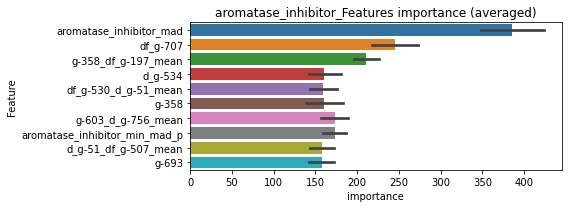

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00923653	valid_1's binary_logloss: 0.0390019
[600]	training's binary_logloss: 0.00120476	valid_1's binary_logloss: 0.0209179
[900]	training's binary_logloss: 0.000561392	valid_1's binary_logloss: 0.0180216
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000564625	valid_1's binary_logloss: 0.0179468


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00927525	valid_1's binary_logloss: 0.0376883
[600]	training's binary_logloss: 0.00121238	valid_1's binary_logloss: 0.0206838
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00102569	valid_1's binary_logloss: 0.0200144


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101158	valid_1's binary_logloss: 0.0289331
[600]	training's binary_logloss: 0.00125445	valid_1's binary_logloss: 0.0102531
[900]	training's binary_logloss: 0.000573797	valid_1's binary_logloss: 0.00816827
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.000522974	valid_1's binary_logloss: 0.00790921


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00967309	valid_1's binary_logloss: 0.0263309
[600]	training's binary_logloss: 0.00123423	valid_1's binary_logloss: 0.00993808
[900]	training's binary_logloss: 0.000573709	valid_1's binary_logloss: 0.00773296
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000541468	valid_1's binary_logloss: 0.00767303


aromatase_inhibitor logloss: 0.013403809464033233


neg labels: 3289 → selected neg labels: 3285


atm_kinase_inhibitor, len(trt): 6, len(othr): 3285, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135998	valid_1's binary_logloss: 0.00154624
[600]	training's binary_logloss: 0.000193582	valid_1's binary_logloss: 0.000243025
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000166019	valid_1's binary_logloss: 0.000211074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013496	valid_1's binary_logloss: 0.0027464
[600]	training's binary_logloss: 0.000191267	valid_1's binary_logloss: 0.00100104
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000169503	valid_1's binary_logloss: 0.000985571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136069	valid_1's binary_logloss: 0.00167606
[600]	training's binary_logloss: 0.000191371	valid_1's binary_logloss: 0.000294139
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000168371	valid_1's bi

1 / 3 AUC score:1.000


Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000164359	valid_1's binary_logloss: 0.000286559


y_Threshold: 0.0005774, Threshold: 0.0021015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00147, conf_1:0.00273
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0021015
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0521015
threshold: 0.0521015, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132072	valid_1's binary_logloss: 0.00148076
[600]	training's binary_logloss: 0.000180898	valid_1's binary_logloss: 0.000225553
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000157558	valid_1's binary_logloss: 0.000197604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132908	valid_1's binary_logloss: 0.00170705
[600]	training's binary_logloss: 0.000180931	valid_1's binary_logloss: 0.000286284
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000156666	valid_1's binary_logloss: 0.000257985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132714	valid_1's binary_logloss: 0.00144394
[600]	training's binary_logloss: 0.000180737	valid_1's binary_logloss: 0.000205491
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000157929	valid_1's

2 / 3 AUC score:1.000
y_Threshold: 0.1700438, Threshold: 0.0521015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00025, Num_p_label: 8.0, conf_0:0.04168, conf_1:0.06252
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_1: 0.0521015
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.1021015
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1521015
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.2021015
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.2521015


Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000157458	valid_1's binary_logloss: 0.000188488


threshold: 0.2521015, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132072	valid_1's binary_logloss: 0.00148076
[600]	training's binary_logloss: 0.000180898	valid_1's binary_logloss: 0.000225553
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000157558	valid_1's binary_logloss: 0.000197604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132908	valid_1's binary_logloss: 0.00170705
[600]	training's binary_logloss: 0.000180931	valid_1's binary_logloss: 0.000286284
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000156666	valid_1's binary_logloss: 0.000257985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132714	valid_1's binary_logloss: 0.00144394
[600]	training's binary_logloss: 0.000180737	valid_1's binary_logloss: 0.000205491
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000157929	valid_1's

3 / 3 AUC score:1.000
y_Threshold: 0.1700438, Threshold: 0.2521015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.22689, conf_1:0.27731
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.2521015
threshold: 0.2521015, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000157458	valid_1's binary_logloss: 0.000188488


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


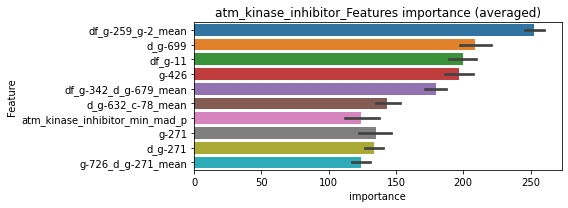

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133261	valid_1's binary_logloss: 0.00150109
[600]	training's binary_logloss: 0.000180824	valid_1's binary_logloss: 0.000222978


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000156368	valid_1's binary_logloss: 0.000193755
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133005	valid_1's binary_logloss: 0.00170719
[600]	training's binary_logloss: 0.000180751	valid_1's binary_logloss: 0.000283969


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000153384	valid_1's binary_logloss: 0.000247751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132594	valid_1's binary_logloss: 0.00142935
[600]	training's binary_logloss: 0.000182148	valid_1's binary_logloss: 0.000207694


len(train_index) : 2858


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000157384	valid_1's binary_logloss: 0.000180019


len(valid_index) : 952
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132056	valid_1's binary_logloss: 0.00146047
[600]	training's binary_logloss: 0.000180124	valid_1's binary_logloss: 0.000217365


atm_kinase_inhibitor logloss: 0.0002023669311889777


Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000155147	valid_1's binary_logloss: 0.000187837
neg labels: 3289 → selected neg labels: 3289


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3289, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175417	valid_1's binary_logloss: 0.00262504
[600]	training's binary_logloss: 0.000245958	valid_1's binary_logloss: 0.000537424
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000205949	valid_1's binary_logloss: 0.000462615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171601	valid_1's binary_logloss: 0.00467805
[600]	training's binary_logloss: 0.000245471	valid_1's binary_logloss: 0.00174996
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000203998	valid_1's binary_logloss: 0.00159102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175603	valid_1's binary_logloss: 0.00219917
[600]	training's binary_logloss: 0.000244836	valid_1's binary_logloss: 0.000343032
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000205824	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0007235, Threshold: 0.0033198, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00232, conf_1:0.00432
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0033198


Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00020807	valid_1's binary_logloss: 0.000298069


Num_p_label: 5.0, Expected: 1.2, Adj_threshold_2: 0.0533198
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.1033198
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_4: 0.1533198
threshold: 0.1533198, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016111	valid_1's binary_logloss: 0.00328357
[600]	training's binary_logloss: 0.000229227	valid_1's binary_logloss: 0.00105336
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000193139	valid_1's binary_logloss: 0.000992216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158579	valid_1's binary_logloss: 0.00243488
[600]	training's binary_logloss: 0.000223604	valid_1's binary_logloss: 0.000638457
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000187389	valid_1's binary_logloss: 0.000573393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016083	valid_1's binary_logloss: 0.00180711
[600]	training's binary_logloss: 0.000226103	valid_1's binary_logloss: 0.000270293
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000189152	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1137034, Threshold: 0.1533198, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00029, Num_p_label: 9.0, conf_0:0.12266, conf_1:0.18398
Num_p_label: 9.0, Expected: 1.2, Adj_threshold_1: 0.1533198
Num_p_label: 9.0, Expected: 1.2, Adj_threshold_2: 0.2033198


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000191364	valid_1's binary_logloss: 0.000264056


Num_p_label: 7.0, Expected: 1.2, Adj_threshold_3: 0.2533198
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_4: 0.3033198
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.3533198
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_6: 0.4033198
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_7: 0.4533198
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_8: 0.5033198
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_9: 0.5533198
threshold: 0.5533198, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016111	valid_1's binary_logloss: 0.00328357
[600]	training's binary_logloss: 0.000229227	valid_1's binary_logloss: 0.00105336
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000193139	valid_1's binary_logloss: 0.000992216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158579	valid_1's binary_logloss: 0.00243488
[600]	training's binary_logloss: 0.000223604	valid_1's binary_logloss: 0.000638457
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000187389	valid_1's binary_logloss: 0.000573393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016083	valid_1's binary_logloss: 0.00180711
[600]	training's binary_logloss: 0.000226103	valid_1's binary_logloss: 0.000270293
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000189152	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1137034, Threshold: 0.5533198, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.49799, conf_1:0.60865
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.5533198


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000191364	valid_1's binary_logloss: 0.000264056


threshold: 0.5533198, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


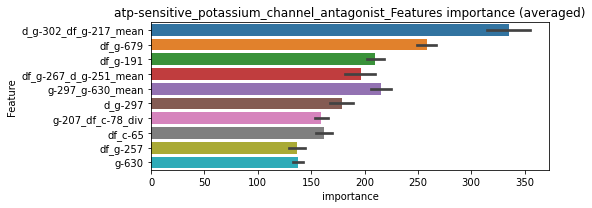

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016239	valid_1's binary_logloss: 0.00299107
[600]	training's binary_logloss: 0.000227155	valid_1's binary_logloss: 0.000812166


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000191487	valid_1's binary_logloss: 0.00073437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160627	valid_1's binary_logloss: 0.00260974
[600]	training's binary_logloss: 0.00022061	valid_1's binary_logloss: 0.000715036


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000186417	valid_1's binary_logloss: 0.000638198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162127	valid_1's binary_logloss: 0.00184344
[600]	training's binary_logloss: 0.000226242	valid_1's binary_logloss: 0.000274909


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000189327	valid_1's binary_logloss: 0.000231346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162183	valid_1's binary_logloss: 0.00194436
[600]	training's binary_logloss: 0.000224665	valid_1's binary_logloss: 0.000307541


atp-sensitive_potassium_channel_antagonist logloss: 0.0004663003539053299


Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000187878	valid_1's binary_logloss: 0.000260696
neg labels: 3289 → selected neg labels: 3286


atp_synthase_inhibitor, len(trt): 12, len(othr): 3286, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359502	valid_1's binary_logloss: 0.00574653
[600]	training's binary_logloss: 0.000462646	valid_1's binary_logloss: 0.00110375
[900]	training's binary_logloss: 0.000305401	valid_1's binary_logloss: 0.000808137
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000305401	valid_1's binary_logloss: 0.000808137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351036	valid_1's binary_logloss: 0.0067708
[600]	training's binary_logloss: 0.000453347	valid_1's binary_logloss: 0.00195869
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000309258	valid_1's binary_logloss: 0.00162638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00347644	valid_1's binary_logloss: 0.00783738
[600]	training's binary_logloss: 0.000460165	valid_1's binary_logloss: 0.00196765
[900]	train

1 / 3 AUC score:1.000
y_Threshold: 0.0020490, Threshold: 0.0181317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01269, conf_1:0.02357
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0181317
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.0681317
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.1181317
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1681317
threshold: 0.1681317, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319284	valid_1's binary_logloss: 0.005788
[600]	training's binary_logloss: 0.000409691	valid_1's binary_logloss: 0.00112675
[900]	training's binary_logloss: 0.000289488	valid_1's binary_logloss: 0.000886006
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000289488	valid_1's binary_logloss: 0.000886006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324677	valid_1's binary_logloss: 0.00484926
[600]	training's binary_logloss: 0.000412644	valid_1's binary_logloss: 0.000804766
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000296681	valid_1's binary_logloss: 0.000610208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318108	valid_1's binary_logloss: 0.00592091
[600]	training's binary_logloss: 0.000408669	valid_1's binary_logloss: 0.00110039
Early stop

2 / 3 AUC score:1.000
y_Threshold: 0.1647643, Threshold: 0.1681317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0062783 Vs.target_rate: 0.00050, Num_p_label: 25.0, conf_0:0.13451, conf_1:0.20176
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_1: 0.1681317
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_2: 0.2181317
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_3: 0.2681317
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_4: 0.3181317
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_5: 0.3681317
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_6: 0.4181317
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_7: 0.4681317
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_8: 0.5181317
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_9: 0.5681317
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.6181317
threshold: 0.6681317, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
==============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319284	valid_1's binary_logloss: 0.005788
[600]	training's binary_logloss: 0.000409691	valid_1's binary_logloss: 0.00112675
[900]	training's binary_logloss: 0.000289488	valid_1's binary_logloss: 0.000886006
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000289488	valid_1's binary_logloss: 0.000886006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324677	valid_1's binary_logloss: 0.00484926
[600]	training's binary_logloss: 0.000412644	valid_1's binary_logloss: 0.000804766
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000296681	valid_1's binary_logloss: 0.000610208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318108	valid_1's binary_logloss: 0.00592091
[600]	training's binary_logloss: 0.000408669	valid_1's binary_logloss: 0.00110039
Early stop

3 / 3 AUC score:1.000
y_Threshold: 0.1647643, Threshold: 0.6681317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00050, Num_p_label: 6.0, conf_0:0.50000, conf_1:0.73494
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.6681317
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.7181317
threshold: 0.7181317, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


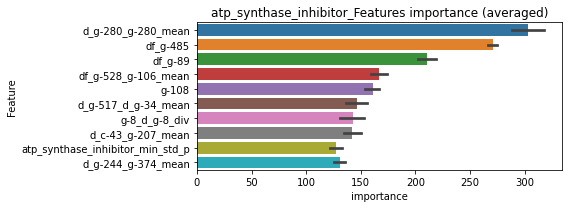

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00315084	valid_1's binary_logloss: 0.00545985
[600]	training's binary_logloss: 0.000407942	valid_1's binary_logloss: 0.00112101
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000291093	valid_1's binary_logloss: 0.000886644


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323753	valid_1's binary_logloss: 0.0048761
[600]	training's binary_logloss: 0.000408286	valid_1's binary_logloss: 0.00081389
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000292596	valid_1's binary_logloss: 0.000620162


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316749	valid_1's binary_logloss: 0.00534152
[600]	training's binary_logloss: 0.000406021	valid_1's binary_logloss: 0.000948728
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000291695	valid_1's binary_logloss: 0.000739416


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00314331	valid_1's binary_logloss: 0.00464978
[600]	training's binary_logloss: 0.000408268	valid_1's binary_logloss: 0.000857019
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.00029853	valid_1's binary_logloss: 0.00066904


atp_synthase_inhibitor logloss: 0.0007288312693953108


neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273, target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253981	valid_1's binary_logloss: 0.130026
[600]	training's binary_logloss: 0.00367341	valid_1's binary_logloss: 0.102469
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.00150235	valid_1's binary_logloss: 0.0989622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0244494	valid_1's binary_logloss: 0.107421
[600]	training's binary_logloss: 0.00362498	valid_1's binary_logloss: 0.079226
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00306939	valid_1's binary_logloss: 0.0785505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0266554	valid_1's binary_logloss: 0.0907967
[600]	training's binary_logloss: 0.00392593	valid_1's binary_logloss: 0.0636509
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.00290686	valid_1's binary_logloss: 0.0625959

1 / 3 AUC score:0.985
y_Threshold: 0.0282527, Threshold: 0.1077473, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 626/3739
p_label_rate: 0.0100452 Vs.target_rate: 0.00407, Num_p_label: 40.0, conf_0:0.07542, conf_1:0.14007
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_1: 0.1077473
Num_p_label: 22.0, Expected: 16.2, Adj_threshold_2: 0.1577473
threshold: 0.1577473, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 626.0/3739, y_label_rate: 0.1674244
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170431	valid_1's binary_logloss: 0.0972239
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00448798	valid_1's binary_logloss: 0.07715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175855	valid_1's binary_logloss: 0.0829699
[600]	training's binary_logloss: 0.00246811	valid_1's binary_logloss: 0.0630618
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00224681	valid_1's binary_logloss: 0.0625506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178229	valid_1's binary_logloss: 0.0709873
[600]	training's binary_logloss: 0.00258597	valid_1's binary_logloss: 0.0496023
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.0011083	valid_1's binary_logloss: 0.0468132
Training until validation scores don't improve for 30 rounds
[300]	training's 

2 / 3 AUC score:0.995
y_Threshold: 0.0735353, Threshold: 0.1577473, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 599.0/3685
p_label_rate: 0.0180814 Vs.target_rate: 0.00407, Num_p_label: 72.0, conf_0:0.12620, conf_1:0.18930
Num_p_label: 72.0, Expected: 16.2, Adj_threshold_1: 0.1577473
Num_p_label: 57.0, Expected: 16.2, Adj_threshold_2: 0.2077473
Num_p_label: 48.0, Expected: 16.2, Adj_threshold_3: 0.2577473
Num_p_label: 42.0, Expected: 16.2, Adj_threshold_4: 0.3077473
Num_p_label: 33.0, Expected: 16.2, Adj_threshold_5: 0.3577473
Num_p_label: 29.0, Expected: 16.2, Adj_threshold_6: 0.4077473
Num_p_label: 24.0, Expected: 16.2, Adj_threshold_7: 0.4577473
threshold: 0.4577473, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 599.0/3685, y_label_rate: 0.1625509
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139447	valid_1's binary_logloss: 0.0856832
[600]	training's binary_logloss: 0.00199684	valid_1's binary_logloss: 0.0652487
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00173083	valid_1's binary_logloss: 0.0646826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146092	valid_1's binary_logloss: 0.0565186
[600]	training's binary_logloss: 0.00208772	valid_1's binary_logloss: 0.0360164
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00187777	valid_1's binary_logloss: 0.0353789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150631	valid_1's binary_logloss: 0.0569772
[600]	training's binary_logloss: 0.00211826	valid_1's binary_logloss: 0.0326951
[900]	training's binary_logloss: 0.000896322	valid_1's binary_logloss: 0.0290353
Early stopping, best iteratio

3 / 3 AUC score:0.998
y_Threshold: 0.0825235, Threshold: 0.4577473, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 584.0/3655
p_label_rate: 0.0090407 Vs.target_rate: 0.00407, Num_p_label: 36.0, conf_0:0.41197, conf_1:0.50352
Num_p_label: 36.0, Expected: 16.2, Adj_threshold_1: 0.4577473
Num_p_label: 34.0, Expected: 16.2, Adj_threshold_2: 0.5077473
Num_p_label: 32.0, Expected: 16.2, Adj_threshold_3: 0.5577473
Num_p_label: 26.0, Expected: 16.2, Adj_threshold_4: 0.6077473
Num_p_label: 24.0, Expected: 16.2, Adj_threshold_5: 0.6577473
threshold: 0.6577473, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 584.0/3655, y_label_rate: 0.1597811


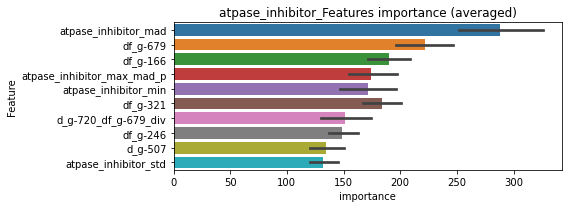

len(train_index) : 2741
len(valid_index) : 914
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139991	valid_1's binary_logloss: 0.060893
[600]	training's binary_logloss: 0.00196658	valid_1's binary_logloss: 0.0430195
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.00108278	valid_1's binary_logloss: 0.0413383


len(train_index) : 2741
len(valid_index) : 914
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137373	valid_1's binary_logloss: 0.0586213
[600]	training's binary_logloss: 0.00191357	valid_1's binary_logloss: 0.0377565
[900]	training's binary_logloss: 0.000815358	valid_1's binary_logloss: 0.0336001
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000817947	valid_1's binary_logloss: 0.0335913


len(train_index) : 2741
len(valid_index) : 914
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124069	valid_1's binary_logloss: 0.0733304
[600]	training's binary_logloss: 0.00180605	valid_1's binary_logloss: 0.0563575
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.00140684	valid_1's binary_logloss: 0.0548675


len(train_index) : 2742
len(valid_index) : 913
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140178	valid_1's binary_logloss: 0.0562012
[600]	training's binary_logloss: 0.00197676	valid_1's binary_logloss: 0.0342526
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.00118013	valid_1's binary_logloss: 0.0323876


atpase_inhibitor logloss: 0.04054837291370753


neg labels: 3289 → selected neg labels: 3287


atr_kinase_inhibitor, len(trt): 19, len(othr): 3287, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450393	valid_1's binary_logloss: 0.00941428
[600]	training's binary_logloss: 0.000585378	valid_1's binary_logloss: 0.00284572
[900]	training's binary_logloss: 0.000346424	valid_1's binary_logloss: 0.00215197
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.00034664	valid_1's binary_logloss: 0.00215024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451852	valid_1's binary_logloss: 0.0130078
[600]	training's binary_logloss: 0.000589016	valid_1's binary_logloss: 0.00498052
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000360503	valid_1's binary_logloss: 0.00430415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431703	valid_1's binary_logloss: 0.0126705
[600]	training's binary_logloss: 0.000571907	valid_1's binary_logloss: 0.00382746
[900]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0026945, Threshold: 0.0152290, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.01066, conf_1:0.01980
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0152290
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_2: 0.0652290
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_3: 0.1152290
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_4: 0.1652290
threshold: 0.1652290, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00394259	valid_1's binary_logloss: 0.00641048
[600]	training's binary_logloss: 0.000522521	valid_1's binary_logloss: 0.0013128
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.0003482	valid_1's binary_logloss: 0.000960787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00388201	valid_1's binary_logloss: 0.0128741
[600]	training's binary_logloss: 0.000514095	valid_1's binary_logloss: 0.00636974
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000347363	valid_1's binary_logloss: 0.00597315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390762	valid_1's binary_logloss: 0.00846223
[600]	training's binary_logloss: 0.000520122	valid_1's binary_logloss: 0.00201832
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000335261	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0882481, Threshold: 0.1652290, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0080362 Vs.target_rate: 0.00080, Num_p_label: 32.0, conf_0:0.13218, conf_1:0.19827
Num_p_label: 32.0, Expected: 3.2, Adj_threshold_1: 0.1652290
Num_p_label: 26.0, Expected: 3.2, Adj_threshold_2: 0.2152290
Num_p_label: 23.0, Expected: 3.2, Adj_threshold_3: 0.2652290
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_4: 0.3152290
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_5: 0.3652290
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_6: 0.4152290
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_7: 0.4652290
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_8: 0.5152290
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_9: 0.5652290
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_10: 0.6152290
threshold: 0.6652290, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
=============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00394166	valid_1's binary_logloss: 0.00684596
[600]	training's binary_logloss: 0.000519689	valid_1's binary_logloss: 0.00132206
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000342737	valid_1's binary_logloss: 0.000977061
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387702	valid_1's binary_logloss: 0.0115272
[600]	training's binary_logloss: 0.000509004	valid_1's binary_logloss: 0.00385176
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00033474	valid_1's binary_logloss: 0.00339347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00391523	valid_1's binary_logloss: 0.00678043
[600]	training's binary_logloss: 0.000516926	valid_1's binary_logloss: 0.00125658
[900]	training's binary_logloss: 0.000328848	valid_1's binary_logloss: 0.000886974
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.1251703, Threshold: 0.6652290, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00080, Num_p_label: 9.0, conf_0:0.50000, conf_1:0.73175
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.6652290
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.7152290
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_3: 0.7652290
threshold: 0.7652290, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


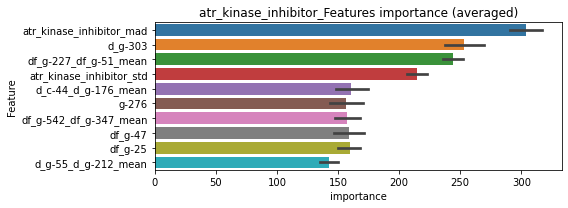

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398594	valid_1's binary_logloss: 0.00737842
[600]	training's binary_logloss: 0.000514602	valid_1's binary_logloss: 0.00132841
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00032921	valid_1's binary_logloss: 0.00092916


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382907	valid_1's binary_logloss: 0.0119533
[600]	training's binary_logloss: 0.000509496	valid_1's binary_logloss: 0.00429012
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00033964	valid_1's binary_logloss: 0.00391632


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385901	valid_1's binary_logloss: 0.00689976
[600]	training's binary_logloss: 0.000517265	valid_1's binary_logloss: 0.00134347
[900]	training's binary_logloss: 0.000333533	valid_1's binary_logloss: 0.000946403
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000333533	valid_1's binary_logloss: 0.000946403


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038663	valid_1's binary_logloss: 0.00888881
[600]	training's binary_logloss: 0.000510577	valid_1's binary_logloss: 0.00278773
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000332568	valid_1's binary_logloss: 0.00222214


atr_kinase_inhibitor logloss: 0.002004677706833858


neg labels: 3289 → selected neg labels: 3271


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3271, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235396	valid_1's binary_logloss: 0.114333
[600]	training's binary_logloss: 0.00327932	valid_1's binary_logloss: 0.0879818
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.0018212	valid_1's binary_logloss: 0.0867072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249839	valid_1's binary_logloss: 0.0823177
[600]	training's binary_logloss: 0.00354918	valid_1's binary_logloss: 0.0503268
[900]	training's binary_logloss: 0.00126493	valid_1's binary_logloss: 0.0446519
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.0010602	valid_1's binary_logloss: 0.0439796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233991	valid_1's binary_logloss: 0.0782776
[600]	training's binary_logloss: 0.00328964	valid_1's binary_logloss: 0.0462376
[900]	training's binary_logloss: 

1 / 3 AUC score:0.990
y_Threshold: 0.0220254, Threshold: 0.2993952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 171 → Positive_corect_labels: 634/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.20958, conf_1:0.38921
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.2993952
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_2: 0.3493952
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_3: 0.3993952
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_4: 0.4493952
threshold: 0.4493952, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 634.0/3754, y_label_rate: 0.1688865
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178588	valid_1's binary_logloss: 0.088272
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00296635	valid_1's binary_logloss: 0.0717579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193343	valid_1's binary_logloss: 0.0839193
[600]	training's binary_logloss: 0.00249012	valid_1's binary_logloss: 0.0595732
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00249012	valid_1's binary_logloss: 0.0595732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179075	valid_1's binary_logloss: 0.0728975
[600]	training's binary_logloss: 0.00237496	valid_1's binary_logloss: 0.046489
[900]	training's binary_logloss: 0.000950566	valid_1's binary_logloss: 0.0431322
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000819154	valid_1's binary_logloss: 0.042

2 / 3 AUC score:0.996
y_Threshold: 0.0542572, Threshold: 0.4493952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 603.0/3692
p_label_rate: 0.0178302 Vs.target_rate: 0.00403, Num_p_label: 71.0, conf_0:0.35952, conf_1:0.53927
Num_p_label: 71.0, Expected: 16.1, Adj_threshold_1: 0.4493952
Num_p_label: 68.0, Expected: 16.1, Adj_threshold_2: 0.4993952
Num_p_label: 62.0, Expected: 16.1, Adj_threshold_3: 0.5493952
Num_p_label: 59.0, Expected: 16.1, Adj_threshold_4: 0.5993952
Num_p_label: 53.0, Expected: 16.1, Adj_threshold_5: 0.6493952
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_6: 0.6993952
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_7: 0.7493952
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_8: 0.7993952
threshold: 0.7993952, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 603.0/3692, y_label_rate: 0.1633261
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139091	valid_1's binary_logloss: 0.0721505
[600]	training's binary_logloss: 0.00188134	valid_1's binary_logloss: 0.0509609
[900]	training's binary_logloss: 0.000807816	valid_1's binary_logloss: 0.0472098
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000830376	valid_1's binary_logloss: 0.0471079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138256	valid_1's binary_logloss: 0.0783147
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00303924	valid_1's binary_logloss: 0.0684686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136374	valid_1's binary_logloss: 0.0593544
[600]	training's binary_logloss: 0.0018684	valid_1's binary_logloss: 0.0429944
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00114053	valid_1's binary_logloss: 0.04

3 / 3 AUC score:0.994
y_Threshold: 0.0719419, Threshold: 0.7993952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 580.0/3646
p_label_rate: 0.0120542 Vs.target_rate: 0.00403, Num_p_label: 48.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 48.0, Expected: 16.1, Adj_threshold_1: 0.7993952
threshold: 0.7993952, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 580.0/3646, y_label_rate: 0.1590784


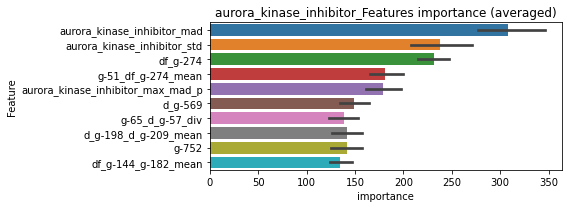

len(train_index) : 2734
len(valid_index) : 912
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115273	valid_1's binary_logloss: 0.0455191
[600]	training's binary_logloss: 0.00156732	valid_1's binary_logloss: 0.0222455
[900]	training's binary_logloss: 0.000702379	valid_1's binary_logloss: 0.018102
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000697057	valid_1's binary_logloss: 0.0179945


len(train_index) : 2734
len(valid_index) : 912
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110882	valid_1's binary_logloss: 0.0696077
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00220884	valid_1's binary_logloss: 0.0594789


len(train_index) : 2735
len(valid_index) : 911
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117748	valid_1's binary_logloss: 0.0527565
[600]	training's binary_logloss: 0.00157794	valid_1's binary_logloss: 0.0391064
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00121807	valid_1's binary_logloss: 0.037454


len(train_index) : 2735
len(valid_index) : 911
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010789	valid_1's binary_logloss: 0.053049
[600]	training's binary_logloss: 0.00148441	valid_1's binary_logloss: 0.0306696
[900]	training's binary_logloss: 0.00067558	valid_1's binary_logloss: 0.0276167
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.00067968	valid_1's binary_logloss: 0.0275502


aurora_kinase_inhibitor logloss: 0.0356211129550783


neg labels: 3289 → selected neg labels: 3287


autotaxin_inhibitor, len(trt): 6, len(othr): 3287, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013395	valid_1's binary_logloss: 0.00200528
[600]	training's binary_logloss: 0.000190325	valid_1's binary_logloss: 0.000497295
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000164722	valid_1's binary_logloss: 0.000459254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129378	valid_1's binary_logloss: 0.00201927
[600]	training's binary_logloss: 0.000186694	valid_1's binary_logloss: 0.000523055
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000161188	valid_1's binary_logloss: 0.000460993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132017	valid_1's binary_logloss: 0.00168015
[600]	training's binary_logloss: 0.000188019	valid_1's binary_logloss: 0.000312099
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000160727	valid_1's 

1 / 3 AUC score:1.000
y_Threshold: 0.0005230, Threshold: 0.0027982, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00196, conf_1:0.00364
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0027982
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0527982
threshold: 0.0527982, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000163934	valid_1's binary_logloss: 0.000363499


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124568	valid_1's binary_logloss: 0.00325139
[600]	training's binary_logloss: 0.000174925	valid_1's binary_logloss: 0.00151702
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000151888	valid_1's binary_logloss: 0.00147274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124201	valid_1's binary_logloss: 0.00139704
[600]	training's binary_logloss: 0.000173518	valid_1's binary_logloss: 0.000216126
[900]	training's binary_logloss: 0.000147627	valid_1's binary_logloss: 0.000184793
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000147142	valid_1's binary_logloss: 0.000184177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125194	valid_1's binary_logloss: 0.00130848
[600]	training's binary_logloss: 0.000174576	valid_1's binary_logloss: 0.000194737
Early st

2 / 3 AUC score:1.000
y_Threshold: 0.0642451, Threshold: 0.0527982, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0035158 Vs.target_rate: 0.00025, Num_p_label: 14.0, conf_0:0.04224, conf_1:0.06336
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_1: 0.0527982
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_2: 0.1027982
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1527982
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.2027982
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.2527982
threshold: 0.2527982, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000148523	valid_1's binary_logloss: 0.000178098


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124568	valid_1's binary_logloss: 0.00325139
[600]	training's binary_logloss: 0.000174925	valid_1's binary_logloss: 0.00151702
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000151888	valid_1's binary_logloss: 0.00147274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124201	valid_1's binary_logloss: 0.00139704
[600]	training's binary_logloss: 0.000173518	valid_1's binary_logloss: 0.000216126
[900]	training's binary_logloss: 0.000147627	valid_1's binary_logloss: 0.000184793
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000147142	valid_1's binary_logloss: 0.000184177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125194	valid_1's binary_logloss: 0.00130848
[600]	training's binary_logloss: 0.000174576	valid_1's binary_logloss: 0.000194737
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.0642451, Threshold: 0.2527982, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.22752, conf_1:0.27808
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.2527982
threshold: 0.2527982, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000148523	valid_1's binary_logloss: 0.000178098


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


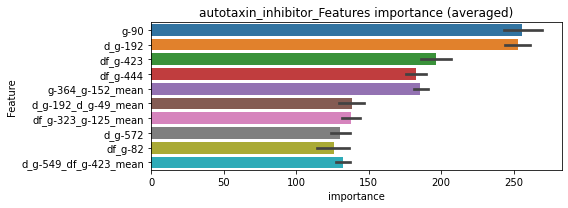

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125596	valid_1's binary_logloss: 0.00297289
[600]	training's binary_logloss: 0.000174869	valid_1's binary_logloss: 0.00134913


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000149806	valid_1's binary_logloss: 0.00128607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124793	valid_1's binary_logloss: 0.00138789
[600]	training's binary_logloss: 0.000174521	valid_1's binary_logloss: 0.000213093


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000151386	valid_1's binary_logloss: 0.000185896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125409	valid_1's binary_logloss: 0.00131236
[600]	training's binary_logloss: 0.000175149	valid_1's binary_logloss: 0.000196376


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000148887	valid_1's binary_logloss: 0.000167765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125305	valid_1's binary_logloss: 0.00139598
[600]	training's binary_logloss: 0.000175568	valid_1's binary_logloss: 0.000211574


autotaxin_inhibitor logloss: 0.0004546467699354


Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000146802	valid_1's binary_logloss: 0.000178309
neg labels: 3289 → selected neg labels: 3277


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3277, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169419	valid_1's binary_logloss: 0.0516231
[600]	training's binary_logloss: 0.00216004	valid_1's binary_logloss: 0.0249733
[900]	training's binary_logloss: 0.000850959	valid_1's binary_logloss: 0.0203147
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.000690722	valid_1's binary_logloss: 0.0195718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172042	valid_1's binary_logloss: 0.0603
[600]	training's binary_logloss: 0.00216573	valid_1's binary_logloss: 0.0286096
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000959623	valid_1's binary_logloss: 0.023786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175363	valid_1's binary_logloss: 0.0649503
[600]	training's binary_logloss: 0.00219964	valid_1's binary_logloss: 0.0356255
[900]	training's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0141360, Threshold: 0.0559552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.03917, conf_1:0.07274
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0559552
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1059552
Num_p_label: 16.0, Expected: 10.0, Adj_threshold_3: 0.1559552
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_4: 0.2059552
threshold: 0.2059552, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3800, y_label_rate: 0.1723684
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159916	valid_1's binary_logloss: 0.0498905
[600]	training's binary_logloss: 0.00199848	valid_1's binary_logloss: 0.0248259
[900]	training's binary_logloss: 0.000802675	valid_1's binary_logloss: 0.0205724
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000761814	valid_1's binary_logloss: 0.0204427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160805	valid_1's binary_logloss: 0.0539379
[600]	training's binary_logloss: 0.00199613	valid_1's binary_logloss: 0.026532
[900]	training's binary_logloss: 0.000798513	valid_1's binary_logloss: 0.0215122
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000695821	valid_1's binary_logloss: 0.0211787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165961	valid_1's binary_logloss: 0.0571899
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0800931, Threshold: 0.2059552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.16476, conf_1:0.24715
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.2059552
Num_p_label: 37.0, Expected: 10.0, Adj_threshold_2: 0.2559552
Num_p_label: 33.0, Expected: 10.0, Adj_threshold_3: 0.3059552
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_4: 0.3559552
Num_p_label: 27.0, Expected: 10.0, Adj_threshold_5: 0.4059552
Num_p_label: 23.0, Expected: 10.0, Adj_threshold_6: 0.4559552
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_7: 0.5059552
Num_p_label: 16.0, Expected: 10.0, Adj_threshold_8: 0.5559552
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_9: 0.6059552
threshold: 0.6059552, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 646.0/3782, y_label_rate: 0.1708091
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014959	valid_1's binary_logloss: 0.0597633
[600]	training's binary_logloss: 0.00182803	valid_1's binary_logloss: 0.0342888
[900]	training's binary_logloss: 0.000748083	valid_1's binary_logloss: 0.0309315
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000767628	valid_1's binary_logloss: 0.0306254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148895	valid_1's binary_logloss: 0.047641
[600]	training's binary_logloss: 0.00187487	valid_1's binary_logloss: 0.0249315
[900]	training's binary_logloss: 0.000763639	valid_1's binary_logloss: 0.0223566
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00073248	valid_1's binary_logloss: 0.0221378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150136	valid_1's binary_logloss: 0.0470356
[600]	training's binary_loglo

3 / 3 AUC score:0.999
y_Threshold: 0.0618060, Threshold: 0.6059552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 638.0/3766
p_label_rate: 0.0065294 Vs.target_rate: 0.00252, Num_p_label: 26.0, conf_0:0.50000, conf_1:0.66655
Num_p_label: 26.0, Expected: 10.0, Adj_threshold_1: 0.6059552
Num_p_label: 25.0, Expected: 10.0, Adj_threshold_2: 0.6559552
Num_p_label: 18.0, Expected: 10.0, Adj_threshold_3: 0.7059552
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_4: 0.7559552
threshold: 0.7559552, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 638.0/3766, y_label_rate: 0.1694105


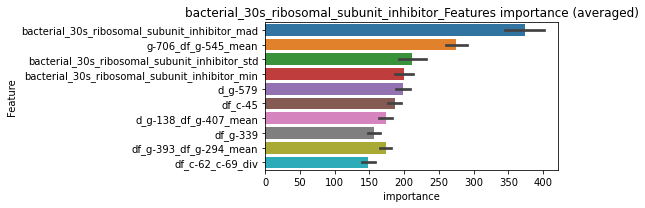

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014521	valid_1's binary_logloss: 0.0489201
[600]	training's binary_logloss: 0.00180187	valid_1's binary_logloss: 0.0263223
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000817376	valid_1's binary_logloss: 0.0233028


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014183	valid_1's binary_logloss: 0.0487294
[600]	training's binary_logloss: 0.00174145	valid_1's binary_logloss: 0.0304936
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00103553	valid_1's binary_logloss: 0.0283885


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154358	valid_1's binary_logloss: 0.0385724
[600]	training's binary_logloss: 0.00188747	valid_1's binary_logloss: 0.014862
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000844527	valid_1's binary_logloss: 0.011753


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140182	valid_1's binary_logloss: 0.0515387
[600]	training's binary_logloss: 0.00177664	valid_1's binary_logloss: 0.0278839
[900]	training's binary_logloss: 0.000734899	valid_1's binary_logloss: 0.0243973
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000734899	valid_1's binary_logloss: 0.0243973


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.021962448286143486


neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180177	valid_1's binary_logloss: 0.0854083
[600]	training's binary_logloss: 0.00259244	valid_1's binary_logloss: 0.0628929
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00243467	valid_1's binary_logloss: 0.0625103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184539	valid_1's binary_logloss: 0.0793452
[600]	training's binary_logloss: 0.00257438	valid_1's binary_logloss: 0.0547457
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00129718	valid_1's binary_logloss: 0.0517099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184509	valid_1's binary_logloss: 0.0712684
[600]	training's binary_logloss: 0.00260983	valid_1's binary_logloss: 0.0432168
[900]	training's binary_logloss: 0.00102909	valid_1's binary_logloss: 0.0384841
Early stopping, best iteration

1 / 3 AUC score:0.995
y_Threshold: 0.0219541, Threshold: 0.0823475, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 639/3768
p_label_rate: 0.0100452 Vs.target_rate: 0.00336, Num_p_label: 40.0, conf_0:0.05764, conf_1:0.10705
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0823475
Num_p_label: 25.0, Expected: 13.4, Adj_threshold_2: 0.1323475
Num_p_label: 14.0, Expected: 13.4, Adj_threshold_3: 0.1823475
threshold: 0.1823475, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 639.0/3768, y_label_rate: 0.1695860
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143693	valid_1's binary_logloss: 0.0763076
[600]	training's binary_logloss: 0.00205507	valid_1's binary_logloss: 0.0585543
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00125048	valid_1's binary_logloss: 0.0569983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138772	valid_1's binary_logloss: 0.0722264
[600]	training's binary_logloss: 0.00193765	valid_1's binary_logloss: 0.056054
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00178398	valid_1's binary_logloss: 0.0559363
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144905	valid_1's binary_logloss: 0.0492237
[600]	training's binary_logloss: 0.00205171	valid_1's binary_logloss: 0.0279332
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.0010445	valid_1's binary_logloss: 0.02542

2 / 3 AUC score:0.998
y_Threshold: 0.0726705, Threshold: 0.1823475, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 622.0/3734
p_label_rate: 0.0178302 Vs.target_rate: 0.00336, Num_p_label: 71.0, conf_0:0.14588, conf_1:0.21882
Num_p_label: 71.0, Expected: 13.4, Adj_threshold_1: 0.1823475
Num_p_label: 57.0, Expected: 13.4, Adj_threshold_2: 0.2323475
Num_p_label: 48.0, Expected: 13.4, Adj_threshold_3: 0.2823475
Num_p_label: 43.0, Expected: 13.4, Adj_threshold_4: 0.3323475
Num_p_label: 38.0, Expected: 13.4, Adj_threshold_5: 0.3823475
Num_p_label: 34.0, Expected: 13.4, Adj_threshold_6: 0.4323475
Num_p_label: 28.0, Expected: 13.4, Adj_threshold_7: 0.4823475
Num_p_label: 20.0, Expected: 13.4, Adj_threshold_8: 0.5323475
threshold: 0.5323475, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 622.0/3734, y_label_rate: 0.1665774
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118203	valid_1's binary_logloss: 0.0770491
[600]	training's binary_logloss: 0.00167722	valid_1's binary_logloss: 0.0619058
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00180283	valid_1's binary_logloss: 0.0616295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122945	valid_1's binary_logloss: 0.0532464
[600]	training's binary_logloss: 0.00174921	valid_1's binary_logloss: 0.0322253
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000927579	valid_1's binary_logloss: 0.0292052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127263	valid_1's binary_logloss: 0.0445196
[600]	training's binary_logloss: 0.00180568	valid_1's binary_logloss: 0.0250652
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000957361	valid_1's binary_logloss: 0.0

3 / 3 AUC score:0.999
y_Threshold: 0.0528551, Threshold: 0.5323475, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 605.0/3700
p_label_rate: 0.0115520 Vs.target_rate: 0.00336, Num_p_label: 46.0, conf_0:0.47911, conf_1:0.58558
Num_p_label: 46.0, Expected: 13.4, Adj_threshold_1: 0.5323475
Num_p_label: 42.0, Expected: 13.4, Adj_threshold_2: 0.5823475
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_3: 0.6323475
Num_p_label: 35.0, Expected: 13.4, Adj_threshold_4: 0.6823475
Num_p_label: 32.0, Expected: 13.4, Adj_threshold_5: 0.7323475
Num_p_label: 25.0, Expected: 13.4, Adj_threshold_6: 0.7823475
threshold: 0.7823475, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 605.0/3700, y_label_rate: 0.1635135


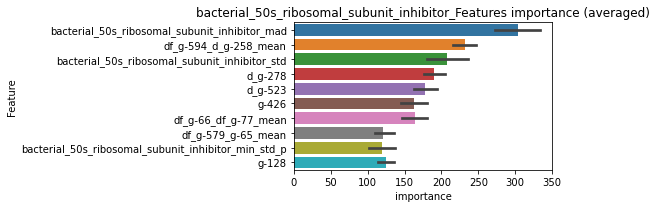

len(train_index) : 2775
len(valid_index) : 925
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116037	valid_1's binary_logloss: 0.0549994
[600]	training's binary_logloss: 0.00164779	valid_1's binary_logloss: 0.0409325
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00175621	valid_1's binary_logloss: 0.0406088


len(train_index) : 2775
len(valid_index) : 925
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107178	valid_1's binary_logloss: 0.0493727
[600]	training's binary_logloss: 0.00154944	valid_1's binary_logloss: 0.0325973
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000938655	valid_1's binary_logloss: 0.0311911


len(train_index) : 2775
len(valid_index) : 925
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112582	valid_1's binary_logloss: 0.041238
[600]	training's binary_logloss: 0.00161308	valid_1's binary_logloss: 0.0244284
[900]	training's binary_logloss: 0.000715532	valid_1's binary_logloss: 0.0218394
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000734724	valid_1's binary_logloss: 0.0217553


len(train_index) : 2775
len(valid_index) : 925
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114001	valid_1's binary_logloss: 0.0500541
[600]	training's binary_logloss: 0.00160036	valid_1's binary_logloss: 0.03273
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000843682	valid_1's binary_logloss: 0.0311904


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.031186392092486706


neg labels: 3289 → selected neg labels: 3286


bacterial_antifolate, len(trt): 36, len(othr): 3286, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734832	valid_1's binary_logloss: 0.0335213
[600]	training's binary_logloss: 0.00100583	valid_1's binary_logloss: 0.0180973
[900]	training's binary_logloss: 0.000492889	valid_1's binary_logloss: 0.0157104
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000463624	valid_1's binary_logloss: 0.015461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00739558	valid_1's binary_logloss: 0.0302247
[600]	training's binary_logloss: 0.00101436	valid_1's binary_logloss: 0.0191002
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00063075	valid_1's binary_logloss: 0.0175661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00724832	valid_1's binary_logloss: 0.0459881
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00171512	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0079056, Threshold: 0.0635343, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 653/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.04447, conf_1:0.08259
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0635343
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.1135343
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_3: 0.1635343
threshold: 0.1635343, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646884	valid_1's binary_logloss: 0.0234324
[600]	training's binary_logloss: 0.000896013	valid_1's binary_logloss: 0.0117262
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000487847	valid_1's binary_logloss: 0.010338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649514	valid_1's binary_logloss: 0.02289
[600]	training's binary_logloss: 0.000892738	valid_1's binary_logloss: 0.0115534
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000504514	valid_1's binary_logloss: 0.0103522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632089	valid_1's binary_logloss: 0.0408533
[600]	training's binary_logloss: 0.000875335	valid_1's binary_logloss: 0.0317509
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000728825	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0770574, Threshold: 0.1635343, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3791
p_label_rate: 0.0175791 Vs.target_rate: 0.00151, Num_p_label: 70.0, conf_0:0.13083, conf_1:0.19624
Num_p_label: 70.0, Expected: 6.0, Adj_threshold_1: 0.1635343
Num_p_label: 61.0, Expected: 6.0, Adj_threshold_2: 0.2135343
Num_p_label: 52.0, Expected: 6.0, Adj_threshold_3: 0.2635343
Num_p_label: 45.0, Expected: 6.0, Adj_threshold_4: 0.3135343
Num_p_label: 43.0, Expected: 6.0, Adj_threshold_5: 0.3635343
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_6: 0.4135343
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_7: 0.4635343
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_8: 0.5135343
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_9: 0.5635343
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_10: 0.6135343
threshold: 0.6635343, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 647.0/3791, y_label_rate: 0.1706674
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00626182	valid_1's binary_logloss: 0.0233824
[600]	training's binary_logloss: 0.000862399	valid_1's binary_logloss: 0.0114541
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000540402	valid_1's binary_logloss: 0.00982288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061842	valid_1's binary_logloss: 0.0263183
[600]	training's binary_logloss: 0.000844531	valid_1's binary_logloss: 0.0140141
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000478949	valid_1's binary_logloss: 0.0124863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607363	valid_1's binary_logloss: 0.0222017
[600]	training's binary_logloss: 0.000847138	valid_1's binary_logloss: 0.0126858
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000572121	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0827495, Threshold: 0.6635343, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 643.0/3783
p_label_rate: 0.0062783 Vs.target_rate: 0.00151, Num_p_label: 25.0, conf_0:0.50000, conf_1:0.72989
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_1: 0.6635343
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.7135343
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_3: 0.7635343
threshold: 0.7635343, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 643.0/3783, y_label_rate: 0.1699709


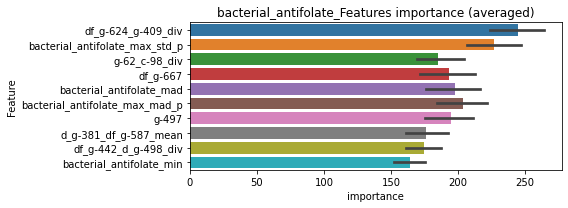

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00627503	valid_1's binary_logloss: 0.0200147
[600]	training's binary_logloss: 0.000839959	valid_1's binary_logloss: 0.00837179
[900]	training's binary_logloss: 0.00042808	valid_1's binary_logloss: 0.00656017
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000425891	valid_1's binary_logloss: 0.00655037


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629707	valid_1's binary_logloss: 0.0172674
[600]	training's binary_logloss: 0.00084796	valid_1's binary_logloss: 0.00619208
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000577814	valid_1's binary_logloss: 0.00525355


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00587122	valid_1's binary_logloss: 0.0290948
[600]	training's binary_logloss: 0.000810338	valid_1's binary_logloss: 0.0179719
[900]	training's binary_logloss: 0.000433766	valid_1's binary_logloss: 0.0165693
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000442198	valid_1's binary_logloss: 0.0165306


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599951	valid_1's binary_logloss: 0.0267365
[600]	training's binary_logloss: 0.00081711	valid_1's binary_logloss: 0.0171385
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000577709	valid_1's binary_logloss: 0.0163101


bacterial_antifolate logloss: 0.011159811526071907


neg labels: 3289 → selected neg labels: 3268


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3268, target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0425173	valid_1's binary_logloss: 0.223029
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.0153674	valid_1's binary_logloss: 0.214018
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0424254	valid_1's binary_logloss: 0.22097
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.0143947	valid_1's binary_logloss: 0.210413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0444018	valid_1's binary_logloss: 0.192968
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.0119833	valid_1's binary_logloss: 0.17654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0441118	valid_1's binary_logloss: 0.179992
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.017694	valid_1's binary_logloss: 0.16

1 / 3 AUC score:0.934
y_Threshold: 0.0623892, Threshold: 0.2663500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 332 → Positive_corect_labels: 553/3589
p_label_rate: 0.0100452 Vs.target_rate: 0.00806, Num_p_label: 40.0, conf_0:0.18644, conf_1:0.34625
threshold: 0.2663500, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 553.0/3589, y_label_rate: 0.1540819
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211369	valid_1's binary_logloss: 0.111438
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00587979	valid_1's binary_logloss: 0.0963786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232245	valid_1's binary_logloss: 0.11006
[600]	training's binary_logloss: 0.00360683	valid_1's binary_logloss: 0.0896002
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.00316656	valid_1's binary_logloss: 0.0885186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220578	valid_1's binary_logloss: 0.125535
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00627036	valid_1's binary_logloss: 0.112381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218094	valid_1's binary_logloss: 0.115815
[600]	training's bina

2 / 3 AUC score:0.987
y_Threshold: 0.0856467, Threshold: 0.2663500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 510.0/3503
p_label_rate: 0.0323958 Vs.target_rate: 0.00806, Num_p_label: 129.0, conf_0:0.21308, conf_1:0.31962
Num_p_label: 129.0, Expected: 32.1, Adj_threshold_1: 0.2663500
Num_p_label: 104.0, Expected: 32.1, Adj_threshold_2: 0.3163500
Num_p_label: 91.0, Expected: 32.1, Adj_threshold_3: 0.3663500
Num_p_label: 74.0, Expected: 32.1, Adj_threshold_4: 0.4163500
Num_p_label: 70.0, Expected: 32.1, Adj_threshold_5: 0.4663500
Num_p_label: 60.0, Expected: 32.1, Adj_threshold_6: 0.5163500
Num_p_label: 56.0, Expected: 32.1, Adj_threshold_7: 0.5663500
Num_p_label: 47.0, Expected: 32.1, Adj_threshold_8: 0.6163500
threshold: 0.6163500, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 510.0/3503, y_label_rate: 0.1455895
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151558	valid_1's binary_logloss: 0.109849
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00400197	valid_1's binary_logloss: 0.0991118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158656	valid_1's binary_logloss: 0.0758951
[600]	training's binary_logloss: 0.00240639	valid_1's binary_logloss: 0.0575279
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.0018654	valid_1's binary_logloss: 0.0561739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162447	valid_1's binary_logloss: 0.0908717
[600]	training's binary_logloss: 0.00240907	valid_1's binary_logloss: 0.0758641
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.0021821	valid_1's binary_logloss: 0.0750266
Training until validation scores don't improve for 30 rounds
[300]	training's 

3 / 3 AUC score:0.994
y_Threshold: 0.0796459, Threshold: 0.6163500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 479.0/3441
p_label_rate: 0.0210949 Vs.target_rate: 0.00806, Num_p_label: 84.0, conf_0:0.50000, conf_1:0.67798
Num_p_label: 84.0, Expected: 32.1, Adj_threshold_1: 0.6163500
Num_p_label: 74.0, Expected: 32.1, Adj_threshold_2: 0.6663500
Num_p_label: 70.0, Expected: 32.1, Adj_threshold_3: 0.7163500
Num_p_label: 63.0, Expected: 32.1, Adj_threshold_4: 0.7663500
threshold: 0.7663500, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 479.0/3441, y_label_rate: 0.1392037


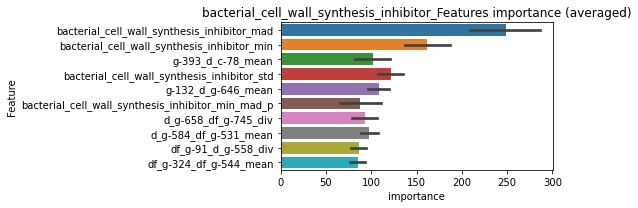

len(train_index) : 2580
len(valid_index) : 861
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112831	valid_1's binary_logloss: 0.0782691
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.00255325	valid_1's binary_logloss: 0.0642857


len(train_index) : 2581
len(valid_index) : 860
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012224	valid_1's binary_logloss: 0.0849886


len(train_index) : 2581
len(valid_index) : 860
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[341]	training's binary_logloss: 0.0085849	valid_1's binary_logloss: 0.0829819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012171	valid_1's binary_logloss: 0.0722271
[600]	training's binary_logloss: 0.0018813	valid_1's binary_logloss: 0.0573149
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.0014013	valid_1's binary_logloss: 0.0564293


len(train_index) : 2581
len(valid_index) : 860
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129703	valid_1's binary_logloss: 0.0579669
[600]	training's binary_logloss: 0.00191676	valid_1's binary_logloss: 0.0337052
[900]	training's binary_logloss: 0.00085904	valid_1's binary_logloss: 0.0282684
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000752817	valid_1's binary_logloss: 0.027464


bacterial_cell_wall_synthesis_inhibitor logloss: 0.05779212500615403


neg labels: 3289 → selected neg labels: 3279


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3279, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231094	valid_1's binary_logloss: 0.097882
[600]	training's binary_logloss: 0.00324683	valid_1's binary_logloss: 0.0724586
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00193304	valid_1's binary_logloss: 0.0705651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234734	valid_1's binary_logloss: 0.0873633
[600]	training's binary_logloss: 0.00322124	valid_1's binary_logloss: 0.0582678
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00174484	valid_1's binary_logloss: 0.0559933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233477	valid_1's binary_logloss: 0.0952053
[600]	training's binary_logloss: 0.003232	valid_1's binary_logloss: 0.0748233
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00378169	valid_1's binary_logloss: 0.074674

1 / 3 AUC score:0.992
y_Threshold: 0.0240616, Threshold: 0.0835105, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 630/3752
p_label_rate: 0.0100452 Vs.target_rate: 0.00374, Num_p_label: 40.0, conf_0:0.05846, conf_1:0.10856
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0835105
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_2: 0.1335105
threshold: 0.1335105, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 630.0/3752, y_label_rate: 0.1679104
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164558	valid_1's binary_logloss: 0.0889883
[600]	training's binary_logloss: 0.00218252	valid_1's binary_logloss: 0.072495
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.0018897	valid_1's binary_logloss: 0.0719343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166174	valid_1's binary_logloss: 0.0625005
[600]	training's binary_logloss: 0.00217956	valid_1's binary_logloss: 0.0414233
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.00168651	valid_1's binary_logloss: 0.0405524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176461	valid_1's binary_logloss: 0.0584735
[600]	training's binary_logloss: 0.00232082	valid_1's binary_logloss: 0.0327672
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.00116414	valid_1's binary_logloss: 0.02858

2 / 3 AUC score:0.996
y_Threshold: 0.0807816, Threshold: 0.1335105, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 606.0/3704
p_label_rate: 0.0266198 Vs.target_rate: 0.00374, Num_p_label: 106.0, conf_0:0.10681, conf_1:0.16021
Num_p_label: 106.0, Expected: 14.9, Adj_threshold_1: 0.1335105
Num_p_label: 84.0, Expected: 14.9, Adj_threshold_2: 0.1835105
Num_p_label: 66.0, Expected: 14.9, Adj_threshold_3: 0.2335105
Num_p_label: 58.0, Expected: 14.9, Adj_threshold_4: 0.2835105
Num_p_label: 47.0, Expected: 14.9, Adj_threshold_5: 0.3335105
Num_p_label: 36.0, Expected: 14.9, Adj_threshold_6: 0.3835105
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_7: 0.4335105
Num_p_label: 26.0, Expected: 14.9, Adj_threshold_8: 0.4835105
Num_p_label: 21.0, Expected: 14.9, Adj_threshold_9: 0.5335105
threshold: 0.5335105, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 606.0/3704, y_label_rate: 0.1636069
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147115	valid_1's binary_logloss: 0.0517011
[600]	training's binary_logloss: 0.001906	valid_1's binary_logloss: 0.028111
[900]	training's binary_logloss: 0.000810457	valid_1's binary_logloss: 0.0239284
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000818608	valid_1's binary_logloss: 0.0238836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142152	valid_1's binary_logloss: 0.0563677
[600]	training's binary_logloss: 0.00188167	valid_1's binary_logloss: 0.0376677
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.00131447	valid_1's binary_logloss: 0.0362539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148227	valid_1's binary_logloss: 0.0537087
[600]	training's binary_logloss: 0.00197271	valid_1's binary_logloss: 0.0313598
[900]	training's binary_logloss

3 / 3 AUC score:0.999
y_Threshold: 0.0717220, Threshold: 0.5335105, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 590.0/3672
p_label_rate: 0.0118031 Vs.target_rate: 0.00374, Num_p_label: 47.0, conf_0:0.48016, conf_1:0.58686
Num_p_label: 47.0, Expected: 14.9, Adj_threshold_1: 0.5335105
Num_p_label: 43.0, Expected: 14.9, Adj_threshold_2: 0.5835105
Num_p_label: 38.0, Expected: 14.9, Adj_threshold_3: 0.6335105
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_4: 0.6835105
Num_p_label: 25.0, Expected: 14.9, Adj_threshold_5: 0.7335105
Num_p_label: 17.0, Expected: 14.9, Adj_threshold_6: 0.7835105
threshold: 0.7835105, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 590.0/3672, y_label_rate: 0.1606754


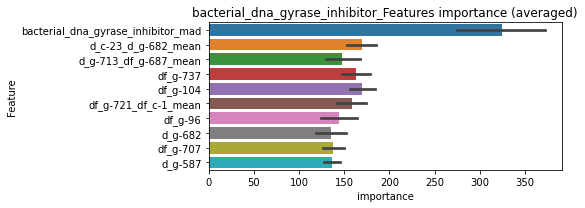

len(train_index) : 2754
len(valid_index) : 918
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118054	valid_1's binary_logloss: 0.0586126
[600]	training's binary_logloss: 0.001617	valid_1's binary_logloss: 0.0386925
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000782817	valid_1's binary_logloss: 0.0346935


len(train_index) : 2754
len(valid_index) : 918
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119156	valid_1's binary_logloss: 0.0575812
[600]	training's binary_logloss: 0.00162459	valid_1's binary_logloss: 0.0413748
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.0010459	valid_1's binary_logloss: 0.0408281


len(train_index) : 2754
len(valid_index) : 918
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125654	valid_1's binary_logloss: 0.0488742
[600]	training's binary_logloss: 0.00168293	valid_1's binary_logloss: 0.0343566
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00122212	valid_1's binary_logloss: 0.0331649


len(train_index) : 2754
len(valid_index) : 918
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123369	valid_1's binary_logloss: 0.0724403
[600]	training's binary_logloss: 0.00164851	valid_1's binary_logloss: 0.0564849
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00135654	valid_1's binary_logloss: 0.0553972


bacterial_dna_gyrase_inhibitor logloss: 0.04102093947650014


neg labels: 3289 → selected neg labels: 3274


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3274, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0244712	valid_1's binary_logloss: 0.130168
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00546529	valid_1's binary_logloss: 0.113786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025084	valid_1's binary_logloss: 0.121398
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00453556	valid_1's binary_logloss: 0.0960283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0265529	valid_1's binary_logloss: 0.101422
[600]	training's binary_logloss: 0.0041533	valid_1's binary_logloss: 0.0764787
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00290619	valid_1's binary_logloss: 0.075645
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243866	valid_1's binary_logloss: 0.12392
Early stopping, best ite

1 / 3 AUC score:0.986
y_Threshold: 0.0369891, Threshold: 0.2228811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 200 → Positive_corect_labels: 620/3728
p_label_rate: 0.0100452 Vs.target_rate: 0.00483, Num_p_label: 40.0, conf_0:0.15602, conf_1:0.28975
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.2228811
Num_p_label: 29.0, Expected: 19.2, Adj_threshold_2: 0.2728811
Num_p_label: 20.0, Expected: 19.2, Adj_threshold_3: 0.3228811
threshold: 0.3228811, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 620.0/3728, y_label_rate: 0.1663090
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017633	valid_1's binary_logloss: 0.0804864
[600]	training's binary_logloss: 0.00254362	valid_1's binary_logloss: 0.053899
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.00121527	valid_1's binary_logloss: 0.0497194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179222	valid_1's binary_logloss: 0.0883483
[600]	training's binary_logloss: 0.00257176	valid_1's binary_logloss: 0.0611398
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.0019293	valid_1's binary_logloss: 0.0591205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174487	valid_1's binary_logloss: 0.100444
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00344789	valid_1's binary_logloss: 0.0861284
Training until validation scores don't improve for 30 rounds
[300]	training's b

2 / 3 AUC score:0.997
y_Threshold: 0.0725318, Threshold: 0.3228811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 584.0/3656
p_label_rate: 0.0180814 Vs.target_rate: 0.00483, Num_p_label: 72.0, conf_0:0.25830, conf_1:0.38746
Num_p_label: 72.0, Expected: 19.2, Adj_threshold_1: 0.3228811
Num_p_label: 65.0, Expected: 19.2, Adj_threshold_2: 0.3728811
Num_p_label: 59.0, Expected: 19.2, Adj_threshold_3: 0.4228811
Num_p_label: 55.0, Expected: 19.2, Adj_threshold_4: 0.4728811
Num_p_label: 50.0, Expected: 19.2, Adj_threshold_5: 0.5228811
Num_p_label: 45.0, Expected: 19.2, Adj_threshold_6: 0.5728811
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_7: 0.6228811
Num_p_label: 33.0, Expected: 19.2, Adj_threshold_8: 0.6728811
Num_p_label: 24.0, Expected: 19.2, Adj_threshold_9: 0.7228811
threshold: 0.7228811, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 584.0/3656, y_label_rate: 0.1597374
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140399	valid_1's binary_logloss: 0.0635195
[600]	training's binary_logloss: 0.00203734	valid_1's binary_logloss: 0.0442317
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00150681	valid_1's binary_logloss: 0.0422941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133535	valid_1's binary_logloss: 0.0754566
[600]	training's binary_logloss: 0.00192889	valid_1's binary_logloss: 0.0595024
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00134113	valid_1's binary_logloss: 0.0582631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013365	valid_1's binary_logloss: 0.0751845
[600]	training's binary_logloss: 0.00195851	valid_1's binary_logloss: 0.0579773
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.00141431	valid_1's binary_logloss: 0.0562

3 / 3 AUC score:0.998
y_Threshold: 0.0972986, Threshold: 0.7228811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 562.0/3612
p_label_rate: 0.0153189 Vs.target_rate: 0.00483, Num_p_label: 61.0, conf_0:0.50000, conf_1:0.79517
Num_p_label: 61.0, Expected: 19.2, Adj_threshold_1: 0.7228811
Num_p_label: 58.0, Expected: 19.2, Adj_threshold_2: 0.7728811
threshold: 0.7728811, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 562.0/3612, y_label_rate: 0.1555925


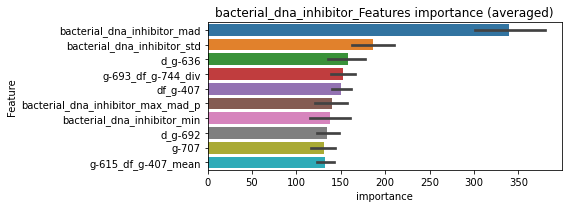

len(train_index) : 2709
len(valid_index) : 903
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120037	valid_1's binary_logloss: 0.0522528
[600]	training's binary_logloss: 0.00173125	valid_1's binary_logloss: 0.0322298
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000887827	valid_1's binary_logloss: 0.0292123


len(train_index) : 2709
len(valid_index) : 903
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116469	valid_1's binary_logloss: 0.0630529
[600]	training's binary_logloss: 0.00166009	valid_1's binary_logloss: 0.046947
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00116424	valid_1's binary_logloss: 0.0453696


len(train_index) : 2709
len(valid_index) : 903
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115988	valid_1's binary_logloss: 0.0612714
[600]	training's binary_logloss: 0.00167426	valid_1's binary_logloss: 0.0464894
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00110077	valid_1's binary_logloss: 0.0450889


len(train_index) : 2709
len(valid_index) : 903
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120431	valid_1's binary_logloss: 0.0589847
[600]	training's binary_logloss: 0.00169849	valid_1's binary_logloss: 0.0411669
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00120307	valid_1's binary_logloss: 0.0397831


bacterial_dna_inhibitor logloss: 0.039863471812522616


neg labels: 3289 → selected neg labels: 3286


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408726	valid_1's binary_logloss: 0.0123035
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000614087	valid_1's binary_logloss: 0.00703442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410587	valid_1's binary_logloss: 0.0157283
[600]	training's binary_logloss: 0.000518284	valid_1's binary_logloss: 0.00945299
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000466329	valid_1's binary_logloss: 0.00938129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426804	valid_1's binary_logloss: 0.0084262
[600]	training's binary_logloss: 0.000543221	valid_1's binary_logloss: 0.0020558
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000339928	valid_1's binary_logloss: 0.00160411
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0032152, Threshold: 0.0088029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00616, conf_1:0.01144
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0088029
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_2: 0.0588029
threshold: 0.0588029, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359974	valid_1's binary_logloss: 0.00939784
[600]	training's binary_logloss: 0.000468736	valid_1's binary_logloss: 0.00523979
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000321289	valid_1's binary_logloss: 0.00495399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354104	valid_1's binary_logloss: 0.013027
[600]	training's binary_logloss: 0.000462431	valid_1's binary_logloss: 0.00771148
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000314276	valid_1's binary_logloss: 0.00718687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361572	valid_1's binary_logloss: 0.00586083
[600]	training's binary_logloss: 0.00046801	valid_1's binary_logloss: 0.00107773
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000311395	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0253132, Threshold: 0.0588029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00080, Num_p_label: 18.0, conf_0:0.04704, conf_1:0.07056
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_1: 0.0588029
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_2: 0.1088029
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_3: 0.1588029
threshold: 0.1588029, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359974	valid_1's binary_logloss: 0.00939784
[600]	training's binary_logloss: 0.000468736	valid_1's binary_logloss: 0.00523979
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000321289	valid_1's binary_logloss: 0.00495399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354104	valid_1's binary_logloss: 0.013027
[600]	training's binary_logloss: 0.000462431	valid_1's binary_logloss: 0.00771148
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000314276	valid_1's binary_logloss: 0.00718687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361572	valid_1's binary_logloss: 0.00586083
[600]	training's binary_logloss: 0.00046801	valid_1's binary_logloss: 0.00107773
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000311395	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0253132, Threshold: 0.1588029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00080, Num_p_label: 4.0, conf_0:0.14292, conf_1:0.17468
threshold: 0.1588029, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


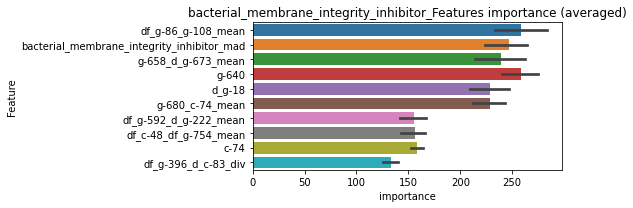

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037283	valid_1's binary_logloss: 0.0102818
[600]	training's binary_logloss: 0.000471153	valid_1's binary_logloss: 0.00522036
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000413478	valid_1's binary_logloss: 0.00506438


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357305	valid_1's binary_logloss: 0.0134852
[600]	training's binary_logloss: 0.000463282	valid_1's binary_logloss: 0.0080014
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000324088	valid_1's binary_logloss: 0.00755606


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361826	valid_1's binary_logloss: 0.00591883
[600]	training's binary_logloss: 0.000468285	valid_1's binary_logloss: 0.00105887
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000306422	valid_1's binary_logloss: 0.000761626


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035764	valid_1's binary_logloss: 0.00718612
[600]	training's binary_logloss: 0.00045997	valid_1's binary_logloss: 0.00206959
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000317892	valid_1's binary_logloss: 0.00179928


bacterial_membrane_integrity_inhibitor logloss: 0.0037961223406610405


neg labels: 3289 → selected neg labels: 3282


bcl_inhibitor, len(trt): 31, len(othr): 3282, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00705286	valid_1's binary_logloss: 0.0301514
[600]	training's binary_logloss: 0.000917471	valid_1's binary_logloss: 0.0140082
[900]	training's binary_logloss: 0.000452387	valid_1's binary_logloss: 0.0118167
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000465013	valid_1's binary_logloss: 0.011764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00748383	valid_1's binary_logloss: 0.0236989
[600]	training's binary_logloss: 0.00094332	valid_1's binary_logloss: 0.00899161
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000476889	valid_1's binary_logloss: 0.00698729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00690681	valid_1's binary_logloss: 0.0157078
[600]	training's binary_logloss: 0.000919113	valid_1's binary_logloss: 0.00480562
[900]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0049005, Threshold: 0.0313906, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.02197, conf_1:0.04081
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0313906
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_2: 0.0813906
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_3: 0.1313906
threshold: 0.1313906, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00625568	valid_1's binary_logloss: 0.0283031
[600]	training's binary_logloss: 0.000806085	valid_1's binary_logloss: 0.0136487
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000461946	valid_1's binary_logloss: 0.0113579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00661275	valid_1's binary_logloss: 0.0195049
[600]	training's binary_logloss: 0.000842791	valid_1's binary_logloss: 0.0069483
[900]	training's binary_logloss: 0.00042336	valid_1's binary_logloss: 0.00544756
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000428092	valid_1's binary_logloss: 0.00542642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063806	valid_1's binary_logloss: 0.0129213
[600]	training's binary_logloss: 0.000843722	valid_1's binary_logloss: 0.00344496
Early stopping, best

2 / 3 AUC score:1.000
y_Threshold: 0.0689720, Threshold: 0.1313906, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0118031 Vs.target_rate: 0.00130, Num_p_label: 47.0, conf_0:0.10511, conf_1:0.15767
Num_p_label: 47.0, Expected: 5.2, Adj_threshold_1: 0.1313906
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_2: 0.1813906
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_3: 0.2313906
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_4: 0.2813906
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_5: 0.3313906
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_6: 0.3813906
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_7: 0.4313906
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_8: 0.4813906
threshold: 0.4813906, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00622573	valid_1's binary_logloss: 0.0184116
[600]	training's binary_logloss: 0.000822718	valid_1's binary_logloss: 0.00658065
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000469183	valid_1's binary_logloss: 0.0056574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00656106	valid_1's binary_logloss: 0.0158992
[600]	training's binary_logloss: 0.00084177	valid_1's binary_logloss: 0.0051753
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000465102	valid_1's binary_logloss: 0.00424598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630035	valid_1's binary_logloss: 0.0233292
[600]	training's binary_logloss: 0.000818636	valid_1's binary_logloss: 0.0112164
[900]	training's binary_logloss: 0.000418773	valid_1's binary_logloss: 0.00929417
Early stopping, bes

3 / 3 AUC score:1.000
y_Threshold: 0.0494860, Threshold: 0.4813906, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0027624 Vs.target_rate: 0.00130, Num_p_label: 11.0, conf_0:0.43325, conf_1:0.52953
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.4813906
threshold: 0.4813906, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


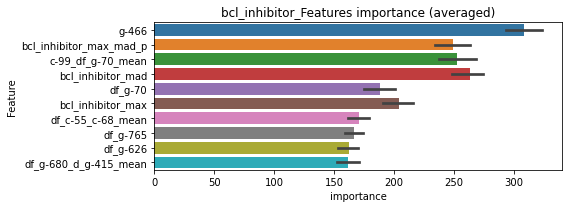

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646479	valid_1's binary_logloss: 0.0192772
[600]	training's binary_logloss: 0.000825586	valid_1's binary_logloss: 0.00740712
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000507451	valid_1's binary_logloss: 0.00641691


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00661444	valid_1's binary_logloss: 0.0165002
[600]	training's binary_logloss: 0.000840908	valid_1's binary_logloss: 0.00538244
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000439507	valid_1's binary_logloss: 0.00430222


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644449	valid_1's binary_logloss: 0.0246515
[600]	training's binary_logloss: 0.000826788	valid_1's binary_logloss: 0.0125518
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.0004468	valid_1's binary_logloss: 0.0110382


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633709	valid_1's binary_logloss: 0.0193835
[600]	training's binary_logloss: 0.000818712	valid_1's binary_logloss: 0.00708042
[900]	training's binary_logloss: 0.000426809	valid_1's binary_logloss: 0.00583694
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000420243	valid_1's binary_logloss: 0.00579699


bcl_inhibitor logloss: 0.006895793487867361


neg labels: 3289 → selected neg labels: 3285


bcr-abl_inhibitor, len(trt): 38, len(othr): 3285, target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00890926	valid_1's binary_logloss: 0.0255871
[600]	training's binary_logloss: 0.00116869	valid_1's binary_logloss: 0.0110847
[900]	training's binary_logloss: 0.000541169	valid_1's binary_logloss: 0.00926141
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000513	valid_1's binary_logloss: 0.00912294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00843086	valid_1's binary_logloss: 0.03786
[600]	training's binary_logloss: 0.00110666	valid_1's binary_logloss: 0.0210689
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000549067	valid_1's binary_logloss: 0.0193593
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00825273	valid_1's binary_logloss: 0.0306427
[600]	training's binary_logloss: 0.00109451	valid_1's binary_logloss: 0.0151476
Early stopping, best iterat

1 / 3 AUC score:1.000
y_Threshold: 0.0069170, Threshold: 0.0855184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00160, Num_p_label: 40.0, conf_0:0.05986, conf_1:0.11117
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.0855184
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_2: 0.1355184
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_3: 0.1855184
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_4: 0.2355184
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_5: 0.2855184
Num_p_label: 12.0, Expected: 6.4, Adj_threshold_6: 0.3355184
threshold: 0.3355184, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00788566	valid_1's binary_logloss: 0.0246536
[600]	training's binary_logloss: 0.0010323	valid_1's binary_logloss: 0.0122358
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000622942	valid_1's binary_logloss: 0.0113738
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780759	valid_1's binary_logloss: 0.0351555
[600]	training's binary_logloss: 0.00102264	valid_1's binary_logloss: 0.0211072
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000976082	valid_1's binary_logloss: 0.0209127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00768669	valid_1's binary_logloss: 0.0233792
[600]	training's binary_logloss: 0.00100746	valid_1's binary_logloss: 0.00964313
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000513028	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0629597, Threshold: 0.3355184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0113009 Vs.target_rate: 0.00160, Num_p_label: 45.0, conf_0:0.26841, conf_1:0.40262
Num_p_label: 45.0, Expected: 6.4, Adj_threshold_1: 0.3355184
Num_p_label: 38.0, Expected: 6.4, Adj_threshold_2: 0.3855184
Num_p_label: 34.0, Expected: 6.4, Adj_threshold_3: 0.4355184
Num_p_label: 31.0, Expected: 6.4, Adj_threshold_4: 0.4855184
Num_p_label: 29.0, Expected: 6.4, Adj_threshold_5: 0.5355184
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_6: 0.5855184
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_7: 0.6355184
Num_p_label: 18.0, Expected: 6.4, Adj_threshold_8: 0.6855184
Num_p_label: 10.0, Expected: 6.4, Adj_threshold_9: 0.7355184
threshold: 0.7355184, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00735001	valid_1's binary_logloss: 0.0289615
[600]	training's binary_logloss: 0.000976563	valid_1's binary_logloss: 0.0146414
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000516208	valid_1's binary_logloss: 0.0125665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00766291	valid_1's binary_logloss: 0.0265474
[600]	training's binary_logloss: 0.00100273	valid_1's binary_logloss: 0.0121613
[900]	training's binary_logloss: 0.000490614	valid_1's binary_logloss: 0.0100592
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000488695	valid_1's binary_logloss: 0.0100254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00749301	valid_1's binary_logloss: 0.0223518
[600]	training's binary_logloss: 0.00100151	valid_1's binary_logloss: 0.00833198
[900]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0788373, Threshold: 0.7355184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0035158 Vs.target_rate: 0.00160, Num_p_label: 14.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 14.0, Expected: 6.4, Adj_threshold_1: 0.7355184
threshold: 0.7355184, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


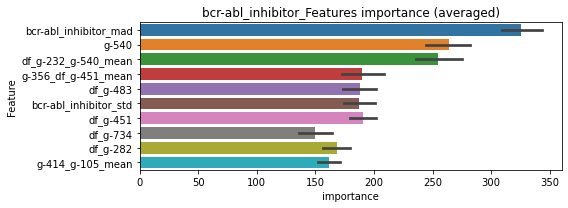

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00710506	valid_1's binary_logloss: 0.0354052
[600]	training's binary_logloss: 0.000954624	valid_1's binary_logloss: 0.0200944
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000794711	valid_1's binary_logloss: 0.0194526


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0074091	valid_1's binary_logloss: 0.0268802
[600]	training's binary_logloss: 0.000980712	valid_1's binary_logloss: 0.0126033
[900]	training's binary_logloss: 0.000480771	valid_1's binary_logloss: 0.0109113
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000482954	valid_1's binary_logloss: 0.0108914


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00719472	valid_1's binary_logloss: 0.0219948
[600]	training's binary_logloss: 0.00095192	valid_1's binary_logloss: 0.00807632
[900]	training's binary_logloss: 0.000479843	valid_1's binary_logloss: 0.00644371
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000473363	valid_1's binary_logloss: 0.00639569


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00729244	valid_1's binary_logloss: 0.0171675
[600]	training's binary_logloss: 0.000975621	valid_1's binary_logloss: 0.00572166
[900]	training's binary_logloss: 0.000487743	valid_1's binary_logloss: 0.0041856
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000464558	valid_1's binary_logloss: 0.00411796


bcr-abl_inhibitor logloss: 0.01021439539602265


neg labels: 3289 → selected neg labels: 3280


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3280, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129669	valid_1's binary_logloss: 0.0784866
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00274039	valid_1's binary_logloss: 0.0664095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135456	valid_1's binary_logloss: 0.0735492
[600]	training's binary_logloss: 0.00183586	valid_1's binary_logloss: 0.0447936
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000920462	valid_1's binary_logloss: 0.0407844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145522	valid_1's binary_logloss: 0.0445835
[600]	training's binary_logloss: 0.00193075	valid_1's binary_logloss: 0.0210503
[900]	training's binary_logloss: 0.000805121	valid_1's binary_logloss: 0.0170962
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000664389	valid_1's binary_logloss: 0

1 / 3 AUC score:0.997
y_Threshold: 0.0156299, Threshold: 0.0483755, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 648/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00281, Num_p_label: 40.0, conf_0:0.03386, conf_1:0.06289
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0483755
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_2: 0.0983755
Num_p_label: 15.0, Expected: 11.2, Adj_threshold_3: 0.1483755
threshold: 0.1483755, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011312	valid_1's binary_logloss: 0.0597648
[600]	training's binary_logloss: 0.00149354	valid_1's binary_logloss: 0.0503139
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00168115	valid_1's binary_logloss: 0.0498675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110831	valid_1's binary_logloss: 0.077593
[600]	training's binary_logloss: 0.00147675	valid_1's binary_logloss: 0.0626066
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000954424	valid_1's binary_logloss: 0.0613048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118304	valid_1's binary_logloss: 0.0571079
[600]	training's binary_logloss: 0.00154452	valid_1's binary_logloss: 0.036055
[900]	training's binary_logloss: 0.000672561	valid_1's binary_logloss: 0.0330515
Early stopping, best iteration 

2 / 3 AUC score:0.997
y_Threshold: 0.0571099, Threshold: 0.1483755, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 630.0/3752
p_label_rate: 0.0188348 Vs.target_rate: 0.00281, Num_p_label: 75.0, conf_0:0.11870, conf_1:0.17805
Num_p_label: 75.0, Expected: 11.2, Adj_threshold_1: 0.1483755
Num_p_label: 65.0, Expected: 11.2, Adj_threshold_2: 0.1983755
Num_p_label: 60.0, Expected: 11.2, Adj_threshold_3: 0.2483755
Num_p_label: 53.0, Expected: 11.2, Adj_threshold_4: 0.2983755
Num_p_label: 49.0, Expected: 11.2, Adj_threshold_5: 0.3483755
Num_p_label: 46.0, Expected: 11.2, Adj_threshold_6: 0.3983755
Num_p_label: 43.0, Expected: 11.2, Adj_threshold_7: 0.4483755
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_8: 0.4983755
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_9: 0.5483755
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_10: 0.5983755
threshold: 0.6483755, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 630.0/3752, y_label_rate: 0.1679104

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00983113	valid_1's binary_logloss: 0.0520535
[600]	training's binary_logloss: 0.00130196	valid_1's binary_logloss: 0.0388883
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00101802	valid_1's binary_logloss: 0.0383913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987324	valid_1's binary_logloss: 0.0577341
[600]	training's binary_logloss: 0.00134929	valid_1's binary_logloss: 0.0465053
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00150252	valid_1's binary_logloss: 0.0463792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970941	valid_1's binary_logloss: 0.0464117
[600]	training's binary_logloss: 0.00131209	valid_1's binary_logloss: 0.0266241
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000788203	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0612344, Threshold: 0.6483755, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 621.0/3734
p_label_rate: 0.0128076 Vs.target_rate: 0.00281, Num_p_label: 51.0, conf_0:0.50000, conf_1:0.71321
Num_p_label: 51.0, Expected: 11.2, Adj_threshold_1: 0.6483755
Num_p_label: 48.0, Expected: 11.2, Adj_threshold_2: 0.6983755
Num_p_label: 42.0, Expected: 11.2, Adj_threshold_3: 0.7483755
Num_p_label: 39.0, Expected: 11.2, Adj_threshold_4: 0.7983755
threshold: 0.7983755, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 621.0/3734, y_label_rate: 0.1663096


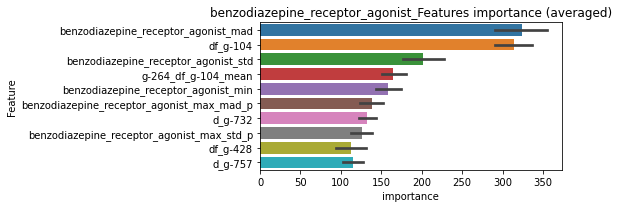

len(train_index) : 2800
len(valid_index) : 934
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00872715	valid_1's binary_logloss: 0.0505538
[600]	training's binary_logloss: 0.00119613	valid_1's binary_logloss: 0.0343549
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000611868	valid_1's binary_logloss: 0.0322569


len(train_index) : 2800
len(valid_index) : 934
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00958354	valid_1's binary_logloss: 0.0372606
[600]	training's binary_logloss: 0.00126916	valid_1's binary_logloss: 0.0218834
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000637071	valid_1's binary_logloss: 0.0199874


len(train_index) : 2801
len(valid_index) : 933
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00920681	valid_1's binary_logloss: 0.0442837
[600]	training's binary_logloss: 0.00122664	valid_1's binary_logloss: 0.0299745
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000748737	valid_1's binary_logloss: 0.0286362


len(train_index) : 2801
len(valid_index) : 933
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941408	valid_1's binary_logloss: 0.0333058
[600]	training's binary_logloss: 0.00125488	valid_1's binary_logloss: 0.014111
[900]	training's binary_logloss: 0.000594595	valid_1's binary_logloss: 0.0106191
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000545892	valid_1's binary_logloss: 0.0102744


benzodiazepine_receptor_agonist logloss: 0.02280449884458185


neg labels: 3289 → selected neg labels: 3287


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00622895	valid_1's binary_logloss: 0.0142249
[600]	training's binary_logloss: 0.000792274	valid_1's binary_logloss: 0.00332192
[900]	training's binary_logloss: 0.0004278	valid_1's binary_logloss: 0.00215509
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000416786	valid_1's binary_logloss: 0.00212174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630551	valid_1's binary_logloss: 0.0196101
[600]	training's binary_logloss: 0.000794453	valid_1's binary_logloss: 0.00811995
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000499198	valid_1's binary_logloss: 0.00720251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614787	valid_1's binary_logloss: 0.0143905
[600]	training's binary_logloss: 0.000791142	valid_1's binary_logloss: 0.00375253
[900]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0036247, Threshold: 0.0173854, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.01217, conf_1:0.02260
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0173854
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.0673854
threshold: 0.0673854, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00573844	valid_1's binary_logloss: 0.0117838
[600]	training's binary_logloss: 0.000737777	valid_1's binary_logloss: 0.00242937
[900]	training's binary_logloss: 0.000417307	valid_1's binary_logloss: 0.00167105
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.00040871	valid_1's binary_logloss: 0.00165889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00582742	valid_1's binary_logloss: 0.0202577
[600]	training's binary_logloss: 0.000734746	valid_1's binary_logloss: 0.00884178
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000413531	valid_1's binary_logloss: 0.00784631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550513	valid_1's binary_logloss: 0.0130095
[600]	training's binary_logloss: 0.000720538	valid_1's binary_logloss: 0.00345204
Early stopping, 

2 / 3 AUC score:1.000
y_Threshold: 0.0611742, Threshold: 0.0673854, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0138122 Vs.target_rate: 0.00101, Num_p_label: 55.0, conf_0:0.05391, conf_1:0.08086
Num_p_label: 55.0, Expected: 4.0, Adj_threshold_1: 0.0673854
Num_p_label: 38.0, Expected: 4.0, Adj_threshold_2: 0.1173854
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_3: 0.1673854
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_4: 0.2173854
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_5: 0.2673854
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_6: 0.3173854
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.3673854
threshold: 0.3673854, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562833	valid_1's binary_logloss: 0.0242718
[600]	training's binary_logloss: 0.000724379	valid_1's binary_logloss: 0.0165463
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000711223	valid_1's binary_logloss: 0.0164757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00549303	valid_1's binary_logloss: 0.017651
[600]	training's binary_logloss: 0.000716649	valid_1's binary_logloss: 0.00687545
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000651285	valid_1's binary_logloss: 0.0066443
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567344	valid_1's binary_logloss: 0.0116582
[600]	training's binary_logloss: 0.000727777	valid_1's binary_logloss: 0.00245168
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000412739	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0705274, Threshold: 0.3673854, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0022602 Vs.target_rate: 0.00101, Num_p_label: 9.0, conf_0:0.33065, conf_1:0.40412
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.3673854
threshold: 0.3673854, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3806, y_label_rate: 0.1718339


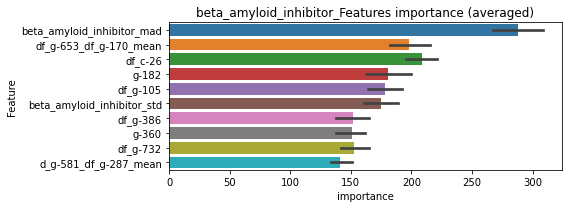

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00561474	valid_1's binary_logloss: 0.0180195
[600]	training's binary_logloss: 0.000716986	valid_1's binary_logloss: 0.0068982
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000468291	valid_1's binary_logloss: 0.0057954


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546113	valid_1's binary_logloss: 0.0175943
[600]	training's binary_logloss: 0.000704831	valid_1's binary_logloss: 0.00730276
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000449313	valid_1's binary_logloss: 0.00657758


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550508	valid_1's binary_logloss: 0.0128319
[600]	training's binary_logloss: 0.000717855	valid_1's binary_logloss: 0.00295015
[900]	training's binary_logloss: 0.000408328	valid_1's binary_logloss: 0.00209762
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000401577	valid_1's binary_logloss: 0.00209077


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00575427	valid_1's binary_logloss: 0.0176367
[600]	training's binary_logloss: 0.000723164	valid_1's binary_logloss: 0.00818174
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000424773	valid_1's binary_logloss: 0.00696121


beta_amyloid_inhibitor logloss: 0.005358453615507868


neg labels: 3289 → selected neg labels: 3281


bromodomain_inhibitor, len(trt): 68, len(othr): 3281, target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162259	valid_1's binary_logloss: 0.0783687
[600]	training's binary_logloss: 0.00212295	valid_1's binary_logloss: 0.0587586
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00245157	valid_1's binary_logloss: 0.0583196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161937	valid_1's binary_logloss: 0.074878
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00268692	valid_1's binary_logloss: 0.0583996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172089	valid_1's binary_logloss: 0.0626422
[600]	training's binary_logloss: 0.0022871	valid_1's binary_logloss: 0.0380326
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.00109195	valid_1's binary_logloss: 0.0358575
Training until validation scores don't improve for 30 rounds
[300]	training's

1 / 3 AUC score:0.995
y_Threshold: 0.0204496, Threshold: 0.1462527, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 640/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00286, Num_p_label: 40.0, conf_0:0.10238, conf_1:0.19013
Num_p_label: 40.0, Expected: 11.4, Adj_threshold_1: 0.1462527
Num_p_label: 25.0, Expected: 11.4, Adj_threshold_2: 0.1962527
Num_p_label: 19.0, Expected: 11.4, Adj_threshold_3: 0.2462527
Num_p_label: 15.0, Expected: 11.4, Adj_threshold_4: 0.2962527
threshold: 0.2962527, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 640.0/3773, y_label_rate: 0.1696263
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012899	valid_1's binary_logloss: 0.0653033
[600]	training's binary_logloss: 0.00170443	valid_1's binary_logloss: 0.0479254
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00150197	valid_1's binary_logloss: 0.0476346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117669	valid_1's binary_logloss: 0.0687021
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00231975	valid_1's binary_logloss: 0.0545643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128392	valid_1's binary_logloss: 0.0439295
[600]	training's binary_logloss: 0.00169569	valid_1's binary_logloss: 0.025665
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000924979	valid_1's binary_logloss: 0.0235122
Training until validation scores don't improve for 30 rounds
[300]	training'

2 / 3 AUC score:0.997
y_Threshold: 0.0756089, Threshold: 0.2962527, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 622.0/3737
p_label_rate: 0.0178302 Vs.target_rate: 0.00286, Num_p_label: 71.0, conf_0:0.23700, conf_1:0.35550
Num_p_label: 71.0, Expected: 11.4, Adj_threshold_1: 0.2962527
Num_p_label: 66.0, Expected: 11.4, Adj_threshold_2: 0.3462527
Num_p_label: 58.0, Expected: 11.4, Adj_threshold_3: 0.3962527
Num_p_label: 54.0, Expected: 11.4, Adj_threshold_4: 0.4462527
Num_p_label: 49.0, Expected: 11.4, Adj_threshold_5: 0.4962527
Num_p_label: 46.0, Expected: 11.4, Adj_threshold_6: 0.5462527
Num_p_label: 43.0, Expected: 11.4, Adj_threshold_7: 0.5962527
Num_p_label: 34.0, Expected: 11.4, Adj_threshold_8: 0.6462527
Num_p_label: 30.0, Expected: 11.4, Adj_threshold_9: 0.6962527
Num_p_label: 24.0, Expected: 11.4, Adj_threshold_10: 0.7462527
threshold: 0.7962527, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 622.0/3737, y_label_rate: 0.1664437

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112577	valid_1's binary_logloss: 0.0468713
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00183545	valid_1's binary_logloss: 0.0324163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108493	valid_1's binary_logloss: 0.0434629
[600]	training's binary_logloss: 0.00144762	valid_1's binary_logloss: 0.0218951
[900]	training's binary_logloss: 0.000657931	valid_1's binary_logloss: 0.0188559
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000657931	valid_1's binary_logloss: 0.0188559
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109898	valid_1's binary_logloss: 0.0496549
[600]	training's binary_logloss: 0.00145997	valid_1's binary_logloss: 0.0304894
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000741315	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0999289, Threshold: 0.7962527, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 612.0/3717
p_label_rate: 0.0090407 Vs.target_rate: 0.00286, Num_p_label: 36.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 36.0, Expected: 11.4, Adj_threshold_1: 0.7962527
threshold: 0.7962527, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 612.0/3717, y_label_rate: 0.1646489


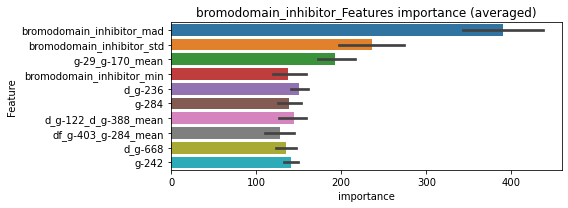

len(train_index) : 2787
len(valid_index) : 930
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101952	valid_1's binary_logloss: 0.0531476
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00204758	valid_1's binary_logloss: 0.0456672


len(train_index) : 2788
len(valid_index) : 929
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969363	valid_1's binary_logloss: 0.0531661
[600]	training's binary_logloss: 0.00130825	valid_1's binary_logloss: 0.0389904
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000953309	valid_1's binary_logloss: 0.0380154


len(train_index) : 2788
len(valid_index) : 929
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00986902	valid_1's binary_logloss: 0.0479912
[600]	training's binary_logloss: 0.00132828	valid_1's binary_logloss: 0.0350482
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000920955	valid_1's binary_logloss: 0.0344011


len(train_index) : 2788
len(valid_index) : 929
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00997968	valid_1's binary_logloss: 0.0443407
[600]	training's binary_logloss: 0.0013731	valid_1's binary_logloss: 0.0287689
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000707603	valid_1's binary_logloss: 0.0262758


bromodomain_inhibitor logloss: 0.036092432363484764


neg labels: 3289 → selected neg labels: 3286


btk_inhibitor, len(trt): 29, len(othr): 3286, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00803453	valid_1's binary_logloss: 0.0211722
[600]	training's binary_logloss: 0.000960798	valid_1's binary_logloss: 0.00622837
[900]	training's binary_logloss: 0.000463192	valid_1's binary_logloss: 0.00475892
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000450761	valid_1's binary_logloss: 0.00469041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00847894	valid_1's binary_logloss: 0.0245776
[600]	training's binary_logloss: 0.000983379	valid_1's binary_logloss: 0.00852044
[900]	training's binary_logloss: 0.000462992	valid_1's binary_logloss: 0.00665368
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000443364	valid_1's binary_logloss: 0.00658213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00844495	valid_1's binary_logloss: 0.0209314
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0041042, Threshold: 0.0369704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00122, Num_p_label: 40.0, conf_0:0.02588, conf_1:0.04806
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0369704
Num_p_label: 21.0, Expected: 4.8, Adj_threshold_2: 0.0869704
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_3: 0.1369704
threshold: 0.1369704, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00746109	valid_1's binary_logloss: 0.0174949
[600]	training's binary_logloss: 0.000884301	valid_1's binary_logloss: 0.00373799
[900]	training's binary_logloss: 0.00043866	valid_1's binary_logloss: 0.00237991
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000427207	valid_1's binary_logloss: 0.0023491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00770079	valid_1's binary_logloss: 0.0226144
[600]	training's binary_logloss: 0.000888174	valid_1's binary_logloss: 0.0076886
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000441474	valid_1's binary_logloss: 0.0059719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00740862	valid_1's binary_logloss: 0.0168923
[600]	training's binary_logloss: 0.000877682	valid_1's binary_logloss: 0.00390458
[900]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1110691, Threshold: 0.1369704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0113009 Vs.target_rate: 0.00122, Num_p_label: 45.0, conf_0:0.10958, conf_1:0.16436
Num_p_label: 45.0, Expected: 4.8, Adj_threshold_1: 0.1369704
Num_p_label: 34.0, Expected: 4.8, Adj_threshold_2: 0.1869704
Num_p_label: 26.0, Expected: 4.8, Adj_threshold_3: 0.2369704
Num_p_label: 20.0, Expected: 4.8, Adj_threshold_4: 0.2869704
Num_p_label: 16.0, Expected: 4.8, Adj_threshold_5: 0.3369704
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_6: 0.3869704
Num_p_label: 10.0, Expected: 4.8, Adj_threshold_7: 0.4369704
threshold: 0.4369704, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0076167	valid_1's binary_logloss: 0.0280546
[600]	training's binary_logloss: 0.000881809	valid_1's binary_logloss: 0.0123043
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000490759	valid_1's binary_logloss: 0.0105545
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00755323	valid_1's binary_logloss: 0.0174814
[600]	training's binary_logloss: 0.000886566	valid_1's binary_logloss: 0.00387868
[900]	training's binary_logloss: 0.000436708	valid_1's binary_logloss: 0.00244981
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000436717	valid_1's binary_logloss: 0.00244966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734741	valid_1's binary_logloss: 0.0137458
[600]	training's binary_logloss: 0.000877875	valid_1's binary_logloss: 0.00327045
[900]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0542590, Threshold: 0.4369704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0037670 Vs.target_rate: 0.00122, Num_p_label: 15.0, conf_0:0.39327, conf_1:0.48067
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_1: 0.4369704
Num_p_label: 13.0, Expected: 4.8, Adj_threshold_2: 0.4869704
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_3: 0.5369704
threshold: 0.5369704, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


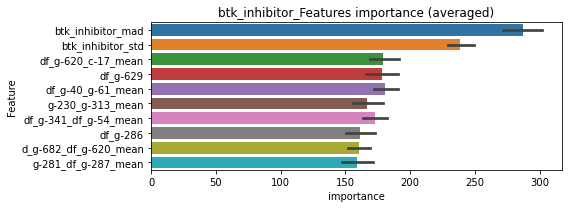

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00728055	valid_1's binary_logloss: 0.0178184
[600]	training's binary_logloss: 0.000875105	valid_1's binary_logloss: 0.00444884
[900]	training's binary_logloss: 0.000430447	valid_1's binary_logloss: 0.00308665
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000439675	valid_1's binary_logloss: 0.0030757


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00770023	valid_1's binary_logloss: 0.0160056
[600]	training's binary_logloss: 0.000902339	valid_1's binary_logloss: 0.0031853
[900]	training's binary_logloss: 0.000439697	valid_1's binary_logloss: 0.00205109
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000439697	valid_1's binary_logloss: 0.00205109


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00755418	valid_1's binary_logloss: 0.0182015
[600]	training's binary_logloss: 0.000890537	valid_1's binary_logloss: 0.00480868
[900]	training's binary_logloss: 0.000431461	valid_1's binary_logloss: 0.00338505
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000431075	valid_1's binary_logloss: 0.00338296


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00703162	valid_1's binary_logloss: 0.0259407
[600]	training's binary_logloss: 0.000860739	valid_1's binary_logloss: 0.0149095
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000781408	valid_1's binary_logloss: 0.0146741


btk_inhibitor logloss: 0.0057955672341158775


neg labels: 3289 → selected neg labels: 3288


calcineurin_inhibitor, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282623	valid_1's binary_logloss: 0.00806962
[600]	training's binary_logloss: 0.000375606	valid_1's binary_logloss: 0.00330861
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000280237	valid_1's binary_logloss: 0.00297364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00290553	valid_1's binary_logloss: 0.00493291
[600]	training's binary_logloss: 0.000381141	valid_1's binary_logloss: 0.00114273
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000270638	valid_1's binary_logloss: 0.000924501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284049	valid_1's binary_logloss: 0.00411583
[600]	training's binary_logloss: 0.000380428	valid_1's binary_logloss: 0.000754683
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000282887	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0013367, Threshold: 0.0078706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00551, conf_1:0.01023
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0078706
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0578706
threshold: 0.0578706, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264508	valid_1's binary_logloss: 0.00876846
[600]	training's binary_logloss: 0.000345147	valid_1's binary_logloss: 0.00487611
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000283321	valid_1's binary_logloss: 0.00466917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267164	valid_1's binary_logloss: 0.00420707
[600]	training's binary_logloss: 0.000345146	valid_1's binary_logloss: 0.000750622
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000257201	valid_1's binary_logloss: 0.000604526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271548	valid_1's binary_logloss: 0.00350352
[600]	training's binary_logloss: 0.000353425	valid_1's binary_logloss: 0.000591116
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000263435	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.0452270, Threshold: 0.0578706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0067805 Vs.target_rate: 0.00050, Num_p_label: 27.0, conf_0:0.04630, conf_1:0.06944
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_1: 0.0578706
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.1078706
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.1578706
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.2078706
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.2578706
threshold: 0.2578706, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264508	valid_1's binary_logloss: 0.00876846
[600]	training's binary_logloss: 0.000345147	valid_1's binary_logloss: 0.00487611
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000283321	valid_1's binary_logloss: 0.00466917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267164	valid_1's binary_logloss: 0.00420707
[600]	training's binary_logloss: 0.000345146	valid_1's binary_logloss: 0.000750622
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000257201	valid_1's binary_logloss: 0.000604526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271548	valid_1's binary_logloss: 0.00350352
[600]	training's binary_logloss: 0.000353425	valid_1's binary_logloss: 0.000591116
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000263435	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.0452270, Threshold: 0.2578706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.23208, conf_1:0.28366
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.2578706
threshold: 0.2578706, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


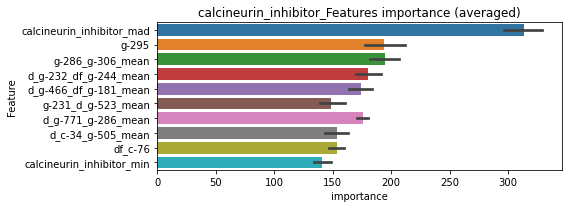

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261478	valid_1's binary_logloss: 0.0080325
[600]	training's binary_logloss: 0.000342328	valid_1's binary_logloss: 0.00394012
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000312946	valid_1's binary_logloss: 0.00382057


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265699	valid_1's binary_logloss: 0.0041471
[600]	training's binary_logloss: 0.000342268	valid_1's binary_logloss: 0.00073237
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000255666	valid_1's binary_logloss: 0.000586829


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268702	valid_1's binary_logloss: 0.00347855
[600]	training's binary_logloss: 0.000347541	valid_1's binary_logloss: 0.000548701
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000254859	valid_1's binary_logloss: 0.000423674


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267643	valid_1's binary_logloss: 0.00403758
[600]	training's binary_logloss: 0.000344683	valid_1's binary_logloss: 0.00068063
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000263501	valid_1's binary_logloss: 0.000547493


calcineurin_inhibitor logloss: 0.0013452900130338382


neg labels: 3289 → selected neg labels: 3246


calcium_channel_blocker, len(trt): 281, len(othr): 3246, target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0678428	valid_1's binary_logloss: 0.285394
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.048679	valid_1's binary_logloss: 0.282423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0640163	valid_1's binary_logloss: 0.30429
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.0671509	valid_1's binary_logloss: 0.303604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0697988	valid_1's binary_logloss: 0.256728
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.0368868	valid_1's binary_logloss: 0.245376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.068368	valid_1's binary_logloss: 0.259247
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.0333464	valid_1's binary_logloss: 0.25

1 / 3 AUC score:0.867
y_Threshold: 0.0998433, Threshold: 0.3936694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 504 → Positive_corect_labels: 462/3391
p_label_rate: 0.0100452 Vs.target_rate: 0.01180, Num_p_label: 40.0, conf_0:0.27557, conf_1:0.51177
threshold: 0.3936694, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 462.0/3391, y_label_rate: 0.1362430
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195953	valid_1's binary_logloss: 0.132308
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.0053193	valid_1's binary_logloss: 0.12519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210204	valid_1's binary_logloss: 0.0954621
[600]	training's binary_logloss: 0.00330414	valid_1's binary_logloss: 0.0732102
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.0017081	valid_1's binary_logloss: 0.0704619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203018	valid_1's binary_logloss: 0.105601
[600]	training's binary_logloss: 0.00321017	valid_1's binary_logloss: 0.0901803
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00348365	valid_1's binary_logloss: 0.0899973
Training until validation scores don't improve for 30 rounds
[300]	training's bin

2 / 3 AUC score:0.980
y_Threshold: 0.0854563, Threshold: 0.3936694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 413.0/3293
p_label_rate: 0.0426921 Vs.target_rate: 0.01180, Num_p_label: 170.0, conf_0:0.31494, conf_1:0.47240


Early stopping, best iteration is:
[314]	training's binary_logloss: 0.016284	valid_1's binary_logloss: 0.14557


Num_p_label: 170.0, Expected: 47.0, Adj_threshold_1: 0.3936694
Num_p_label: 157.0, Expected: 47.0, Adj_threshold_2: 0.4436694
Num_p_label: 145.0, Expected: 47.0, Adj_threshold_3: 0.4936694
Num_p_label: 136.0, Expected: 47.0, Adj_threshold_4: 0.5436694
Num_p_label: 116.0, Expected: 47.0, Adj_threshold_5: 0.5936694
Num_p_label: 108.0, Expected: 47.0, Adj_threshold_6: 0.6436694
Num_p_label: 95.0, Expected: 47.0, Adj_threshold_7: 0.6936694
Num_p_label: 86.0, Expected: 47.0, Adj_threshold_8: 0.7436694
Num_p_label: 75.0, Expected: 47.0, Adj_threshold_9: 0.7936694
threshold: 0.7936694, positive_p_label: 75.0/3982, p_label_rate: 0.0188348
positive_y_label: 413.0/3293, y_label_rate: 0.1254176
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107767	valid_1's binary_logloss: 0.11782
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.0075765	valid_1's binary_logloss: 0.116265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117797	valid_1's binary_logloss: 0.108362
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00728977	valid_1's binary_logloss: 0.105734
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122905	valid_1's binary_logloss: 0.0507755
[600]	training's binary_logloss: 0.00197572	valid_1's binary_logloss: 0.0376509
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.00165269	valid_1's binary_logloss: 0.037105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116082	valid_1's binary_logloss: 0.113543


3 / 3 AUC score:0.982
y_Threshold: 0.0678482, Threshold: 0.7936694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 376.0/3219


Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00471091	valid_1's binary_logloss: 0.10959


p_label_rate: 0.0283777 Vs.target_rate: 0.01180, Num_p_label: 113.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 113.0, Expected: 47.0, Adj_threshold_1: 0.7936694
threshold: 0.7936694, positive_p_label: 113.0/3982, p_label_rate: 0.0283777
positive_y_label: 376.0/3219, y_label_rate: 0.1168065


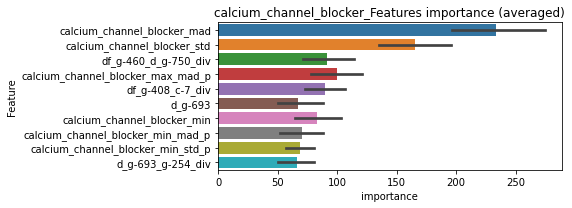

len(train_index) : 2414
len(valid_index) : 805
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00771971	valid_1's binary_logloss: 0.0649435
[600]	training's binary_logloss: 0.00126783	valid_1's binary_logloss: 0.055922
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00109059	valid_1's binary_logloss: 0.0551302


len(train_index) : 2414
len(valid_index) : 805
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00769886	valid_1's binary_logloss: 0.0531592
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00150694	valid_1's binary_logloss: 0.0446202


len(train_index) : 2414
len(valid_index) : 805
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00791459	valid_1's binary_logloss: 0.055154


len(train_index) : 2415
len(valid_index) : 804
================================= fold 4/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00481888	valid_1's binary_logloss: 0.051369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720213	valid_1's binary_logloss: 0.0823759


calcium_channel_blocker logloss: 0.05835137438625526


Early stopping, best iteration is:
[305]	training's binary_logloss: 0.00687759	valid_1's binary_logloss: 0.0823159
neg labels: 3289 → selected neg labels: 3281


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3281, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970113	valid_1's binary_logloss: 0.0363584
[600]	training's binary_logloss: 0.00121606	valid_1's binary_logloss: 0.0180622
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000641382	valid_1's binary_logloss: 0.0163094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105226	valid_1's binary_logloss: 0.0290557
[600]	training's binary_logloss: 0.00129033	valid_1's binary_logloss: 0.0108972
[900]	training's binary_logloss: 0.000584061	valid_1's binary_logloss: 0.0083451
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000572662	valid_1's binary_logloss: 0.00828668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103841	valid_1's binary_logloss: 0.0263217
[600]	training's binary_logloss: 0.00127895	valid_1's binary_logloss: 0.00876799
[900]	training's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0080348, Threshold: 0.1086703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.07607, conf_1:0.14127
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.1086703
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_2: 0.1586703
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_3: 0.2086703
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_4: 0.2586703
threshold: 0.2586703, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00904907	valid_1's binary_logloss: 0.0279153
[600]	training's binary_logloss: 0.00114765	valid_1's binary_logloss: 0.0121226
[900]	training's binary_logloss: 0.000542903	valid_1's binary_logloss: 0.0101305
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.00053444	valid_1's binary_logloss: 0.0100664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00908737	valid_1's binary_logloss: 0.0356982
[600]	training's binary_logloss: 0.00114902	valid_1's binary_logloss: 0.0213331
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000722845	valid_1's binary_logloss: 0.0205634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902795	valid_1's binary_logloss: 0.0274619
[600]	training's binary_logloss: 0.00113032	valid_1's binary_logloss: 0.0142478
Early stopping, best iter

2 / 3 AUC score:1.000
y_Threshold: 0.0849345, Threshold: 0.2586703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0158212 Vs.target_rate: 0.00176, Num_p_label: 63.0, conf_0:0.20694, conf_1:0.31040
Num_p_label: 63.0, Expected: 7.0, Adj_threshold_1: 0.2586703
Num_p_label: 53.0, Expected: 7.0, Adj_threshold_2: 0.3086703
Num_p_label: 42.0, Expected: 7.0, Adj_threshold_3: 0.3586703
Num_p_label: 37.0, Expected: 7.0, Adj_threshold_4: 0.4086703
Num_p_label: 34.0, Expected: 7.0, Adj_threshold_5: 0.4586703
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_6: 0.5086703
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_7: 0.5586703
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_8: 0.6086703
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_9: 0.6586703
threshold: 0.6586703, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819986	valid_1's binary_logloss: 0.0298387
[600]	training's binary_logloss: 0.0010501	valid_1's binary_logloss: 0.0129812
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000564663	valid_1's binary_logloss: 0.0107281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00840795	valid_1's binary_logloss: 0.0352596
[600]	training's binary_logloss: 0.00105397	valid_1's binary_logloss: 0.0212972
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000573881	valid_1's binary_logloss: 0.019933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00890045	valid_1's binary_logloss: 0.0242282
[600]	training's binary_logloss: 0.00111285	valid_1's binary_logloss: 0.00817864
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000550928	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0674889, Threshold: 0.6586703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0050226 Vs.target_rate: 0.00176, Num_p_label: 20.0, conf_0:0.50000, conf_1:0.72454
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.6586703
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_2: 0.7086703
threshold: 0.7086703, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3777, y_label_rate: 0.1699762


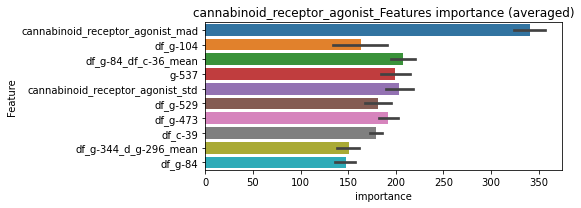

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00847452	valid_1's binary_logloss: 0.0411554
[600]	training's binary_logloss: 0.00104868	valid_1's binary_logloss: 0.032112
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00110063	valid_1's binary_logloss: 0.0320232


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00802355	valid_1's binary_logloss: 0.0379602
[600]	training's binary_logloss: 0.00103609	valid_1's binary_logloss: 0.0185566
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000532643	valid_1's binary_logloss: 0.0157386


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00864843	valid_1's binary_logloss: 0.0242439
[600]	training's binary_logloss: 0.00107206	valid_1's binary_logloss: 0.00890676
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.00056768	valid_1's binary_logloss: 0.0070644


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00872923	valid_1's binary_logloss: 0.0292676
[600]	training's binary_logloss: 0.00107553	valid_1's binary_logloss: 0.0139676
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000568405	valid_1's binary_logloss: 0.0122961


cannabinoid_receptor_agonist logloss: 0.01678462684802293


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139162	valid_1's binary_logloss: 0.0552656
[600]	training's binary_logloss: 0.00179839	valid_1's binary_logloss: 0.0315825
[900]	training's binary_logloss: 0.000757889	valid_1's binary_logloss: 0.0285015
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000755191	valid_1's binary_logloss: 0.0284993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143703	valid_1's binary_logloss: 0.0547518
[600]	training's binary_logloss: 0.00184581	valid_1's binary_logloss: 0.0314358
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000853336	valid_1's binary_logloss: 0.0291729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152552	valid_1's binary_logloss: 0.0383379
[600]	training's binary_logloss: 0.00194949	valid_1's binary_logloss: 0.0118937
[900]	training's binary_log

1 / 3 AUC score:0.998
y_Threshold: 0.0115597, Threshold: 0.0445492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00231, Num_p_label: 40.0, conf_0:0.03118, conf_1:0.05791
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0445492
Num_p_label: 11.0, Expected: 9.2, Adj_threshold_2: 0.0945492
threshold: 0.0945492, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129864	valid_1's binary_logloss: 0.0516137
[600]	training's binary_logloss: 0.00172001	valid_1's binary_logloss: 0.0274367
[900]	training's binary_logloss: 0.000733421	valid_1's binary_logloss: 0.0239762
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000701561	valid_1's binary_logloss: 0.0237036
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135549	valid_1's binary_logloss: 0.0394065
[600]	training's binary_logloss: 0.00174957	valid_1's binary_logloss: 0.0145813
[900]	training's binary_logloss: 0.000740011	valid_1's binary_logloss: 0.0110473
[1200]	training's binary_logloss: 0.000591446	valid_1's binary_logloss: 0.0104451
Early stopping, best iteration is:
[1181]	training's binary_logloss: 0.000594087	valid_1's binary_logloss: 0.0104056
Training until validation scores don't improve for 30 rounds
[300]	training's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0502102, Threshold: 0.0945492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0097941 Vs.target_rate: 0.00231, Num_p_label: 39.0, conf_0:0.07564, conf_1:0.11346
Num_p_label: 39.0, Expected: 9.2, Adj_threshold_1: 0.0945492
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_2: 0.1445492
threshold: 0.1445492, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 647.0/3786, y_label_rate: 0.1708928
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123055	valid_1's binary_logloss: 0.0461512
[600]	training's binary_logloss: 0.00161318	valid_1's binary_logloss: 0.0242193
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000791454	valid_1's binary_logloss: 0.0208751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124757	valid_1's binary_logloss: 0.0494114
[600]	training's binary_logloss: 0.00163226	valid_1's binary_logloss: 0.0274447
[900]	training's binary_logloss: 0.000702688	valid_1's binary_logloss: 0.0239841
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000684856	valid_1's binary_logloss: 0.0239058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129388	valid_1's binary_logloss: 0.03852
[600]	training's binary_logloss: 0.00168595	valid_1's binary_logloss: 0.0170055
[900]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0646730, Threshold: 0.1445492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0065294 Vs.target_rate: 0.00231, Num_p_label: 26.0, conf_0:0.13009, conf_1:0.15900
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_1: 0.1445492
Num_p_label: 17.0, Expected: 9.2, Adj_threshold_2: 0.1945492
threshold: 0.1945492, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3778, y_label_rate: 0.1701959


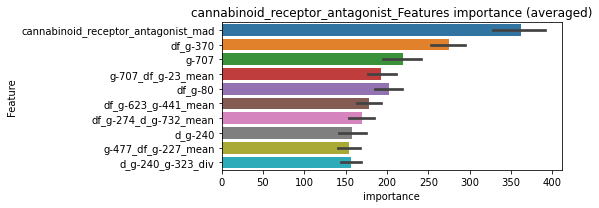

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124298	valid_1's binary_logloss: 0.0463127
[600]	training's binary_logloss: 0.00160079	valid_1's binary_logloss: 0.0243441
[900]	training's binary_logloss: 0.000692981	valid_1's binary_logloss: 0.0211711
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000671483	valid_1's binary_logloss: 0.0210427


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128955	valid_1's binary_logloss: 0.047017
[600]	training's binary_logloss: 0.00160626	valid_1's binary_logloss: 0.0239694
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000771151	valid_1's binary_logloss: 0.0213657


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125852	valid_1's binary_logloss: 0.0393919
[600]	training's binary_logloss: 0.0016698	valid_1's binary_logloss: 0.0148632
[900]	training's binary_logloss: 0.000714776	valid_1's binary_logloss: 0.0111863
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.00061093	valid_1's binary_logloss: 0.0108376


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129658	valid_1's binary_logloss: 0.0417009
[600]	training's binary_logloss: 0.00165057	valid_1's binary_logloss: 0.0196487
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000925932	valid_1's binary_logloss: 0.0168204


cannabinoid_receptor_antagonist logloss: 0.01752120145948503


neg labels: 3289 → selected neg labels: 3281


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3281, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0074902	valid_1's binary_logloss: 0.034854
[600]	training's binary_logloss: 0.00100969	valid_1's binary_logloss: 0.0179473
[900]	training's binary_logloss: 0.0005015	valid_1's binary_logloss: 0.0158815
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000505532	valid_1's binary_logloss: 0.0158069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772856	valid_1's binary_logloss: 0.0229768
[600]	training's binary_logloss: 0.00101095	valid_1's binary_logloss: 0.0120909
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000545969	valid_1's binary_logloss: 0.0112825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00799729	valid_1's binary_logloss: 0.0172196
[600]	training's binary_logloss: 0.00107189	valid_1's binary_logloss: 0.00447383
[900]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0051456, Threshold: 0.0594686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.04163, conf_1:0.07731
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0594686
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_2: 0.1094686
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.1594686
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.2094686
threshold: 0.2094686, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660991	valid_1's binary_logloss: 0.0277982
[600]	training's binary_logloss: 0.000905485	valid_1's binary_logloss: 0.0138306
[900]	training's binary_logloss: 0.000471122	valid_1's binary_logloss: 0.0122724
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000478501	valid_1's binary_logloss: 0.0122616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671505	valid_1's binary_logloss: 0.0207933
[600]	training's binary_logloss: 0.000908185	valid_1's binary_logloss: 0.0119566
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000550294	valid_1's binary_logloss: 0.0113815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00698528	valid_1's binary_logloss: 0.0158567
[600]	training's binary_logloss: 0.000933787	valid_1's binary_logloss: 0.0041108
[900]	training's bina

2 / 3 AUC score:1.000
y_Threshold: 0.1247455, Threshold: 0.2094686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0150678 Vs.target_rate: 0.00151, Num_p_label: 60.0, conf_0:0.16757, conf_1:0.25136
Num_p_label: 60.0, Expected: 6.0, Adj_threshold_1: 0.2094686
Num_p_label: 55.0, Expected: 6.0, Adj_threshold_2: 0.2594686
Num_p_label: 49.0, Expected: 6.0, Adj_threshold_3: 0.3094686
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_4: 0.3594686
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_5: 0.4094686
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_6: 0.4594686
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_7: 0.5094686
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_8: 0.5594686
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_9: 0.6094686
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_10: 0.6594686
threshold: 0.7094686, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617256	valid_1's binary_logloss: 0.0276703
[600]	training's binary_logloss: 0.000850583	valid_1's binary_logloss: 0.0153053
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000510091	valid_1's binary_logloss: 0.0137343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642531	valid_1's binary_logloss: 0.0271628
[600]	training's binary_logloss: 0.000864349	valid_1's binary_logloss: 0.0154792
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000651175	valid_1's binary_logloss: 0.0147458
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00635708	valid_1's binary_logloss: 0.0194978
[600]	training's binary_logloss: 0.000867713	valid_1's binary_logloss: 0.00679434
[900]	training's binary_logloss: 0.000484605	valid_1's binary_logloss: 0.00532679
Early stopping, bes

3 / 3 AUC score:1.000
y_Threshold: 0.0774866, Threshold: 0.7094686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0067805 Vs.target_rate: 0.00151, Num_p_label: 27.0, conf_0:0.50000, conf_1:0.78042
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_1: 0.7094686
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.7594686
threshold: 0.7594686, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


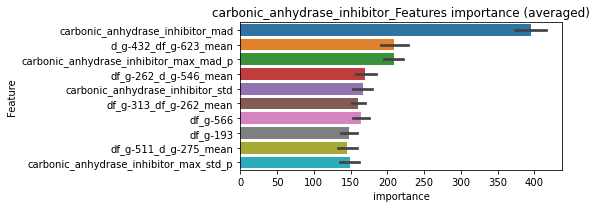

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642275	valid_1's binary_logloss: 0.020418
[600]	training's binary_logloss: 0.000852513	valid_1's binary_logloss: 0.00936726
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000501909	valid_1's binary_logloss: 0.00822462


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629068	valid_1's binary_logloss: 0.0214691
[600]	training's binary_logloss: 0.000854447	valid_1's binary_logloss: 0.00934896
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000492549	valid_1's binary_logloss: 0.00793286


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610098	valid_1's binary_logloss: 0.0209728
[600]	training's binary_logloss: 0.000830322	valid_1's binary_logloss: 0.00846262
[900]	training's binary_logloss: 0.000465197	valid_1's binary_logloss: 0.00693915
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000466275	valid_1's binary_logloss: 0.00693534


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00605135	valid_1's binary_logloss: 0.0428415
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00116012	valid_1's binary_logloss: 0.0336733


carbonic_anhydrase_inhibitor logloss: 0.014192169613934392


neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00731692	valid_1's binary_logloss: 0.0366791
[600]	training's binary_logloss: 0.000954706	valid_1's binary_logloss: 0.0196495
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.0005161	valid_1's binary_logloss: 0.0171438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00785308	valid_1's binary_logloss: 0.0235585
[600]	training's binary_logloss: 0.000983713	valid_1's binary_logloss: 0.00867176
[900]	training's binary_logloss: 0.000478286	valid_1's binary_logloss: 0.00676271
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.000441866	valid_1's binary_logloss: 0.00661029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00804892	valid_1's binary_logloss: 0.0212137
[600]	training's binary_logloss: 0.00101496	valid_1's binary_logloss: 0.011055
Early stopping, best 

1 / 3 AUC score:1.000
y_Threshold: 0.0056774, Threshold: 0.0467516, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.03273, conf_1:0.06078
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0467516
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_2: 0.0967516
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1467516
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.1967516
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_5: 0.2467516
threshold: 0.2467516, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00631217	valid_1's binary_logloss: 0.0238054
[600]	training's binary_logloss: 0.000831868	valid_1's binary_logloss: 0.00931503
[900]	training's binary_logloss: 0.000435052	valid_1's binary_logloss: 0.00712816
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000434194	valid_1's binary_logloss: 0.00712114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629635	valid_1's binary_logloss: 0.0263308
[600]	training's binary_logloss: 0.0008182	valid_1's binary_logloss: 0.0124645
[900]	training's binary_logloss: 0.000428627	valid_1's binary_logloss: 0.0112122
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000425835	valid_1's binary_logloss: 0.0111834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0066479	valid_1's binary_logloss: 0.0193533
[600]	training's bina

2 / 3 AUC score:1.000
y_Threshold: 0.1148535, Threshold: 0.2467516, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0107986 Vs.target_rate: 0.00151, Num_p_label: 43.0, conf_0:0.19740, conf_1:0.29610
Num_p_label: 43.0, Expected: 6.0, Adj_threshold_1: 0.2467516
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_2: 0.2967516
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_3: 0.3467516
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_4: 0.3967516
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_5: 0.4467516
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_6: 0.4967516
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_7: 0.5467516
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_8: 0.5967516
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_9: 0.6467516
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_10: 0.6967516
threshold: 0.7467516, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00631413	valid_1's binary_logloss: 0.0226994
[600]	training's binary_logloss: 0.000814318	valid_1's binary_logloss: 0.0109267
[900]	training's binary_logloss: 0.000432751	valid_1's binary_logloss: 0.00928307
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000423146	valid_1's binary_logloss: 0.0092757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00618585	valid_1's binary_logloss: 0.0271437
[600]	training's binary_logloss: 0.000801614	valid_1's binary_logloss: 0.0170768
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00054877	valid_1's binary_logloss: 0.0163593
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614544	valid_1's binary_logloss: 0.027606
[600]	training's binary_logloss: 0.000800397	valid_1's binary_logloss: 0.0148748
Early stopping, best i

3 / 3 AUC score:1.000
y_Threshold: 0.0715470, Threshold: 0.7467516, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 645.0/3785
p_label_rate: 0.0047715 Vs.target_rate: 0.00151, Num_p_label: 19.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.7467516
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.7967516
threshold: 0.7967516, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 645.0/3785, y_label_rate: 0.1704095


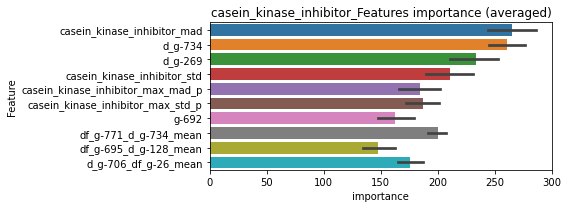

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0058258	valid_1's binary_logloss: 0.0187232
[600]	training's binary_logloss: 0.000768773	valid_1's binary_logloss: 0.0068698
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000429483	valid_1's binary_logloss: 0.00535245


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00575127	valid_1's binary_logloss: 0.013985
[600]	training's binary_logloss: 0.000773284	valid_1's binary_logloss: 0.00417124
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000427453	valid_1's binary_logloss: 0.00311594


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00585336	valid_1's binary_logloss: 0.0248122
[600]	training's binary_logloss: 0.000782259	valid_1's binary_logloss: 0.0133694
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000553495	valid_1's binary_logloss: 0.0126224


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054833	valid_1's binary_logloss: 0.0410745
[600]	training's binary_logloss: 0.000743348	valid_1's binary_logloss: 0.0305954
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00053572	valid_1's binary_logloss: 0.0294264


casein_kinase_inhibitor logloss: 0.01262737047669565


neg labels: 3289 → selected neg labels: 3288


caspase_activator, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403121	valid_1's binary_logloss: 0.00808583
[600]	training's binary_logloss: 0.000536533	valid_1's binary_logloss: 0.00179481
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000340562	valid_1's binary_logloss: 0.00132842
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00419363	valid_1's binary_logloss: 0.00939234
[600]	training's binary_logloss: 0.000536498	valid_1's binary_logloss: 0.00200262
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000340665	valid_1's binary_logloss: 0.0014669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410944	valid_1's binary_logloss: 0.00696287
[600]	training's binary_logloss: 0.000535054	valid_1's binary_logloss: 0.00139756
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000349364	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0023573, Threshold: 0.0140570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00984, conf_1:0.01827
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0140570
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0640570
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1140570
threshold: 0.1140570, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381694	valid_1's binary_logloss: 0.00768364
[600]	training's binary_logloss: 0.000493132	valid_1's binary_logloss: 0.00172632
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000327892	valid_1's binary_logloss: 0.00133017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037789	valid_1's binary_logloss: 0.00849729
[600]	training's binary_logloss: 0.00048796	valid_1's binary_logloss: 0.00176867
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000328201	valid_1's binary_logloss: 0.00132756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00375253	valid_1's binary_logloss: 0.00541632
[600]	training's binary_logloss: 0.000494409	valid_1's binary_logloss: 0.000893989
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000323601	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.1350691, Threshold: 0.1140570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00076, Num_p_label: 10.0, conf_0:0.09125, conf_1:0.13687
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.1140570
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.1640570
threshold: 0.1640570, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381694	valid_1's binary_logloss: 0.00768364
[600]	training's binary_logloss: 0.000493132	valid_1's binary_logloss: 0.00172632
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000327892	valid_1's binary_logloss: 0.00133017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037789	valid_1's binary_logloss: 0.00849729
[600]	training's binary_logloss: 0.00048796	valid_1's binary_logloss: 0.00176867
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000328201	valid_1's binary_logloss: 0.00132756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00375253	valid_1's binary_logloss: 0.00541632
[600]	training's binary_logloss: 0.000494409	valid_1's binary_logloss: 0.000893989
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000323601	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.1350691, Threshold: 0.1640570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.14765, conf_1:0.18046
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.1640570
threshold: 0.1640570, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


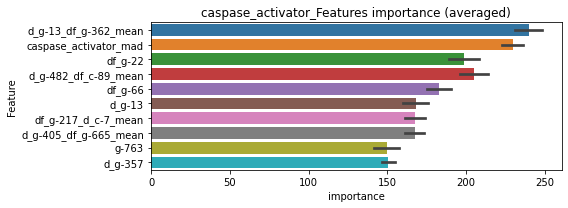

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374899	valid_1's binary_logloss: 0.00757916
[600]	training's binary_logloss: 0.000486057	valid_1's binary_logloss: 0.00165263
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000327433	valid_1's binary_logloss: 0.00125523


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380837	valid_1's binary_logloss: 0.00845476
[600]	training's binary_logloss: 0.000490447	valid_1's binary_logloss: 0.00186253
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000323802	valid_1's binary_logloss: 0.001393


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00378571	valid_1's binary_logloss: 0.00540219
[600]	training's binary_logloss: 0.000495217	valid_1's binary_logloss: 0.000898177
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000324964	valid_1's binary_logloss: 0.000626167


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386668	valid_1's binary_logloss: 0.00786205
[600]	training's binary_logloss: 0.000501914	valid_1's binary_logloss: 0.00158755
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.00033376	valid_1's binary_logloss: 0.00119995


caspase_activator logloss: 0.001118630535740449


neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00495225	valid_1's binary_logloss: 0.00909887
[600]	training's binary_logloss: 0.00060187	valid_1's binary_logloss: 0.00184388
[900]	training's binary_logloss: 0.000356428	valid_1's binary_logloss: 0.00131497
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000356428	valid_1's binary_logloss: 0.00131497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00477289	valid_1's binary_logloss: 0.00927204
[600]	training's binary_logloss: 0.000594493	valid_1's binary_logloss: 0.00208064
[900]	training's binary_logloss: 0.000354245	valid_1's binary_logloss: 0.00153644
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000350565	valid_1's binary_logloss: 0.00152392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00472164	valid_1's binary_logloss: 0.0115972
[600]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0025430, Threshold: 0.0160334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01122, conf_1:0.02084
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0160334
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0660334
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1160334
threshold: 0.1160334, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435824	valid_1's binary_logloss: 0.00839106
[600]	training's binary_logloss: 0.000552075	valid_1's binary_logloss: 0.0016894
[900]	training's binary_logloss: 0.000339366	valid_1's binary_logloss: 0.00121078
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000339368	valid_1's binary_logloss: 0.00121076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431881	valid_1's binary_logloss: 0.00814313
[600]	training's binary_logloss: 0.000547648	valid_1's binary_logloss: 0.00170123
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.00034551	valid_1's binary_logloss: 0.00123852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433417	valid_1's binary_logloss: 0.00969529
[600]	training's binary_logloss: 0.000548683	valid_1's binary_logloss: 0.00243571
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.1233525, Threshold: 0.1160334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00076, Num_p_label: 19.0, conf_0:0.09283, conf_1:0.13924
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.1160334
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.1660334
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.2160334
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.2660334
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_5: 0.3160334
threshold: 0.3160334, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435824	valid_1's binary_logloss: 0.00839106
[600]	training's binary_logloss: 0.000552075	valid_1's binary_logloss: 0.0016894
[900]	training's binary_logloss: 0.000339366	valid_1's binary_logloss: 0.00121078
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000339368	valid_1's binary_logloss: 0.00121076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431881	valid_1's binary_logloss: 0.00814313
[600]	training's binary_logloss: 0.000547648	valid_1's binary_logloss: 0.00170123
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.00034551	valid_1's binary_logloss: 0.00123852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433417	valid_1's binary_logloss: 0.00969529
[600]	training's binary_logloss: 0.000548683	valid_1's binary_logloss: 0.00243571
Early stopping

3 / 3 AUC score:1.000
y_Threshold: 0.1233525, Threshold: 0.3160334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076, Num_p_label: 5.0, conf_0:0.28443, conf_1:0.34764
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.3160334
threshold: 0.3160334, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


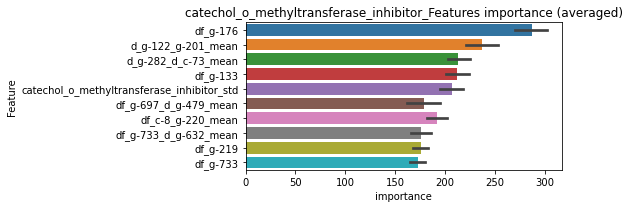

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429001	valid_1's binary_logloss: 0.00821343
[600]	training's binary_logloss: 0.000548374	valid_1's binary_logloss: 0.00160731
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000344557	valid_1's binary_logloss: 0.00116557


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00434496	valid_1's binary_logloss: 0.00826575
[600]	training's binary_logloss: 0.000547443	valid_1's binary_logloss: 0.00165938
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000347996	valid_1's binary_logloss: 0.00124726


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427246	valid_1's binary_logloss: 0.00955427
[600]	training's binary_logloss: 0.000547034	valid_1's binary_logloss: 0.00277806
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000364199	valid_1's binary_logloss: 0.00230527


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429528	valid_1's binary_logloss: 0.00863939
[600]	training's binary_logloss: 0.000545081	valid_1's binary_logloss: 0.00204147
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000347816	valid_1's binary_logloss: 0.00158718


catechol_o_methyltransferase_inhibitor logloss: 0.0015763184026208476


neg labels: 3289 → selected neg labels: 3276


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3276, target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222938	valid_1's binary_logloss: 0.121455
[600]	training's binary_logloss: 0.00325835	valid_1's binary_logloss: 0.102105
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.0019483	valid_1's binary_logloss: 0.100479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233927	valid_1's binary_logloss: 0.102244
[600]	training's binary_logloss: 0.0034186	valid_1's binary_logloss: 0.0745395
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00283386	valid_1's binary_logloss: 0.0732712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0241542	valid_1's binary_logloss: 0.0880607
[600]	training's binary_logloss: 0.00365136	valid_1's binary_logloss: 0.0592547
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.0016439	valid_1's binary_logloss: 0.0551478
Tr

1 / 3 AUC score:0.987
y_Threshold: 0.0234213, Threshold: 0.1621310, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 627/3743
p_label_rate: 0.0100452 Vs.target_rate: 0.00428, Num_p_label: 40.0, conf_0:0.11349, conf_1:0.21077
Num_p_label: 40.0, Expected: 17.1, Adj_threshold_1: 0.1621310
Num_p_label: 28.0, Expected: 17.1, Adj_threshold_2: 0.2121310
Num_p_label: 17.0, Expected: 17.1, Adj_threshold_3: 0.2621310
threshold: 0.2621310, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 627.0/3743, y_label_rate: 0.1675127
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163301	valid_1's binary_logloss: 0.101384
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.0036302	valid_1's binary_logloss: 0.0898748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172478	valid_1's binary_logloss: 0.0745623
[600]	training's binary_logloss: 0.00235971	valid_1's binary_logloss: 0.0539174
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.00120523	valid_1's binary_logloss: 0.0515266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171477	valid_1's binary_logloss: 0.0622229
[600]	training's binary_logloss: 0.00239563	valid_1's binary_logloss: 0.0397369
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00185968	valid_1's binary_logloss: 0.0383526
Training until validation scores don't improve for 30 rounds
[300]	training's

2 / 3 AUC score:0.997
y_Threshold: 0.0668141, Threshold: 0.2621310, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 598.0/3685
p_label_rate: 0.0241085 Vs.target_rate: 0.00428, Num_p_label: 96.0, conf_0:0.20970, conf_1:0.31456
Num_p_label: 96.0, Expected: 17.1, Adj_threshold_1: 0.2621310
Num_p_label: 86.0, Expected: 17.1, Adj_threshold_2: 0.3121310
Num_p_label: 77.0, Expected: 17.1, Adj_threshold_3: 0.3621310
Num_p_label: 67.0, Expected: 17.1, Adj_threshold_4: 0.4121310
Num_p_label: 59.0, Expected: 17.1, Adj_threshold_5: 0.4621310
Num_p_label: 56.0, Expected: 17.1, Adj_threshold_6: 0.5121310
Num_p_label: 51.0, Expected: 17.1, Adj_threshold_7: 0.5621310
Num_p_label: 48.0, Expected: 17.1, Adj_threshold_8: 0.6121310
Num_p_label: 38.0, Expected: 17.1, Adj_threshold_9: 0.6621310
Num_p_label: 35.0, Expected: 17.1, Adj_threshold_10: 0.7121310
threshold: 0.7621310, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 598.0/3685, y_label_rate: 0.1622795

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125579	valid_1's binary_logloss: 0.0705203
[600]	training's binary_logloss: 0.00175457	valid_1's binary_logloss: 0.0526601
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.00136501	valid_1's binary_logloss: 0.0519095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136859	valid_1's binary_logloss: 0.0517354
[600]	training's binary_logloss: 0.00185472	valid_1's binary_logloss: 0.0305436
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000985351	valid_1's binary_logloss: 0.0286995
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144812	valid_1's binary_logloss: 0.0444391
[600]	training's binary_logloss: 0.00195964	valid_1's binary_logloss: 0.0252528
[900]	training's binary_logloss: 0.0008515	valid_1's binary_logloss: 0.0219357
Early stopping, best iteration

3 / 3 AUC score:1.000
y_Threshold: 0.0770328, Threshold: 0.7621310, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 585.0/3659
p_label_rate: 0.0155701 Vs.target_rate: 0.00428, Num_p_label: 62.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 62.0, Expected: 17.1, Adj_threshold_1: 0.7621310
threshold: 0.7621310, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 585.0/3659, y_label_rate: 0.1598797


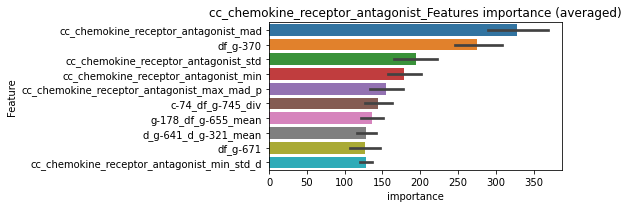

len(train_index) : 2744
len(valid_index) : 915
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117914	valid_1's binary_logloss: 0.0528876
[600]	training's binary_logloss: 0.00160821	valid_1's binary_logloss: 0.0368419
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000892968	valid_1's binary_logloss: 0.0347828


len(train_index) : 2744
len(valid_index) : 915
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011122	valid_1's binary_logloss: 0.077391
[600]	training's binary_logloss: 0.00157664	valid_1's binary_logloss: 0.057056
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00118615	valid_1's binary_logloss: 0.0559719


len(train_index) : 2744
len(valid_index) : 915
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012325	valid_1's binary_logloss: 0.0422264
[600]	training's binary_logloss: 0.00173265	valid_1's binary_logloss: 0.0232465
[900]	training's binary_logloss: 0.000793964	valid_1's binary_logloss: 0.0207895
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000730655	valid_1's binary_logloss: 0.0205246


len(train_index) : 2745
len(valid_index) : 914
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125641	valid_1's binary_logloss: 0.0435508
[600]	training's binary_logloss: 0.00175087	valid_1's binary_logloss: 0.0245251
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.00105117	valid_1's binary_logloss: 0.0228789


cc_chemokine_receptor_antagonist logloss: 0.03354246380583511


neg labels: 3289 → selected neg labels: 3288


cck_receptor_antagonist, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00379636	valid_1's binary_logloss: 0.00950866
[600]	training's binary_logloss: 0.000493256	valid_1's binary_logloss: 0.00287978
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000310951	valid_1's binary_logloss: 0.00225401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00388059	valid_1's binary_logloss: 0.0107552
[600]	training's binary_logloss: 0.000491163	valid_1's binary_logloss: 0.00269212
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000313679	valid_1's binary_logloss: 0.00211392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00375866	valid_1's binary_logloss: 0.0110777
[600]	training's binary_logloss: 0.000489362	valid_1's binary_logloss: 0.00579208
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000320861	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0022183, Threshold: 0.0182601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01278, conf_1:0.02374
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0182601
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_2: 0.0682601
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.1182601
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.1682601
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.2182601
threshold: 0.2182601, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0034354	valid_1's binary_logloss: 0.007898
[600]	training's binary_logloss: 0.000450967	valid_1's binary_logloss: 0.0017204
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000314584	valid_1's binary_logloss: 0.00131448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00346735	valid_1's binary_logloss: 0.00858448
[600]	training's binary_logloss: 0.00044348	valid_1's binary_logloss: 0.0023369
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000312256	valid_1's binary_logloss: 0.00194362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00350224	valid_1's binary_logloss: 0.00596494
[600]	training's binary_logloss: 0.000450762	valid_1's binary_logloss: 0.00165927
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000314681	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.1348070, Threshold: 0.2182601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0062783 Vs.target_rate: 0.00076, Num_p_label: 25.0, conf_0:0.17461, conf_1:0.26191
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.2182601
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.2682601
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_3: 0.3182601
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_4: 0.3682601
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_5: 0.4182601
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_6: 0.4682601
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_7: 0.5182601
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_8: 0.5682601
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.6182601
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.6682601
threshold: 0.7182601, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
=============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0034354	valid_1's binary_logloss: 0.007898
[600]	training's binary_logloss: 0.000450967	valid_1's binary_logloss: 0.0017204
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000314584	valid_1's binary_logloss: 0.00131448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00346735	valid_1's binary_logloss: 0.00858448
[600]	training's binary_logloss: 0.00044348	valid_1's binary_logloss: 0.0023369
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000312256	valid_1's binary_logloss: 0.00194362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00350224	valid_1's binary_logloss: 0.00596494
[600]	training's binary_logloss: 0.000450762	valid_1's binary_logloss: 0.00165927
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000314681	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.1348070, Threshold: 0.7182601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00076, Num_p_label: 8.0, conf_0:0.50000, conf_1:0.79009
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.7182601
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.7682601
threshold: 0.7682601, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


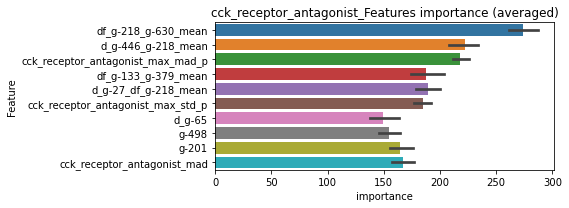

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336987	valid_1's binary_logloss: 0.00828659
[600]	training's binary_logloss: 0.000441923	valid_1's binary_logloss: 0.00189948
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000313567	valid_1's binary_logloss: 0.00155488


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00339744	valid_1's binary_logloss: 0.00843008
[600]	training's binary_logloss: 0.000443706	valid_1's binary_logloss: 0.00243155
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.00030477	valid_1's binary_logloss: 0.00204321


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343718	valid_1's binary_logloss: 0.00590329
[600]	training's binary_logloss: 0.000449947	valid_1's binary_logloss: 0.00167174
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000318577	valid_1's binary_logloss: 0.00140245


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349073	valid_1's binary_logloss: 0.00706807
[600]	training's binary_logloss: 0.000447944	valid_1's binary_logloss: 0.00134961
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000306726	valid_1's binary_logloss: 0.00102142


cck_receptor_antagonist logloss: 0.0015058168708769865


neg labels: 3289 → selected neg labels: 3241


cdk_inhibitor, len(trt): 352, len(othr): 3241, target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0920098	valid_1's binary_logloss: 0.350956
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.0899891	valid_1's binary_logloss: 0.350639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.087922	valid_1's binary_logloss: 0.355565
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.0818122	valid_1's binary_logloss: 0.355497
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.109208	valid_1's binary_logloss: 0.362663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0901986	valid_1's binary_logloss: 0.341488


1 / 3 AUC score:0.778
y_Threshold: 0.1363646, Threshold: 0.4414738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 668 → Positive_corect_labels: 379/3221
p_label_rate: 0.0100452 Vs.target_rate: 0.01478, Num_p_label: 40.0, conf_0:0.30903, conf_1:0.57392


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0742056	valid_1's binary_logloss: 0.339597


threshold: 0.4414738, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 379.0/3221, y_label_rate: 0.1176653
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022092	valid_1's binary_logloss: 0.168931
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0101625	valid_1's binary_logloss: 0.165148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227293	valid_1's binary_logloss: 0.143689
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00489173	valid_1's binary_logloss: 0.128579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231608	valid_1's binary_logloss: 0.148316
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00669188	valid_1's binary_logloss: 0.140448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220033	valid_1's binary_logloss: 0.145982
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00646629	valid_1's binary_logloss:

2 / 3 AUC score:0.969
y_Threshold: 0.0826006, Threshold: 0.4414738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 317.0/3097
p_label_rate: 0.0429432 Vs.target_rate: 0.01478, Num_p_label: 171.0, conf_0:0.35318, conf_1:0.52977
Num_p_label: 171.0, Expected: 58.9, Adj_threshold_1: 0.4414738
Num_p_label: 149.0, Expected: 58.9, Adj_threshold_2: 0.4914738
Num_p_label: 137.0, Expected: 58.9, Adj_threshold_3: 0.5414738
Num_p_label: 124.0, Expected: 58.9, Adj_threshold_4: 0.5914738
Num_p_label: 110.0, Expected: 58.9, Adj_threshold_5: 0.6414738
Num_p_label: 94.0, Expected: 58.9, Adj_threshold_6: 0.6914738
Num_p_label: 75.0, Expected: 58.9, Adj_threshold_7: 0.7414738
threshold: 0.7414738, positive_p_label: 75.0/3982, p_label_rate: 0.0188348
positive_y_label: 317.0/3097, y_label_rate: 0.1023571
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141259	valid_1's binary_logloss: 0.100791
[600]	training's binary_logloss: 0.00221551	valid_1's binary_logloss: 0.0901733
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00211847	valid_1's binary_logloss: 0.089961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150937	valid_1's binary_logloss: 0.0917598
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00275858	valid_1's binary_logloss: 0.0789458
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136986	valid_1's binary_logloss: 0.103882
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00270464	valid_1's binary_logloss: 0.0964118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147309	valid_1's binary_logloss: 0.070358
[600]	training's bi

3 / 3 AUC score:0.988
y_Threshold: 0.0776768, Threshold: 0.7414738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 289.0/3041
p_label_rate: 0.0414365 Vs.target_rate: 0.01478, Num_p_label: 165.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 165.0, Expected: 58.9, Adj_threshold_1: 0.7414738
Num_p_label: 145.0, Expected: 58.9, Adj_threshold_2: 0.7914738
threshold: 0.7914738, positive_p_label: 145.0/3982, p_label_rate: 0.0364139
positive_y_label: 289.0/3041, y_label_rate: 0.0950345


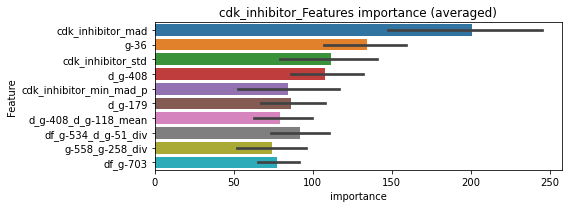

len(train_index) : 2280
len(valid_index) : 761
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010674	valid_1's binary_logloss: 0.0769109
[600]	training's binary_logloss: 0.00170089	valid_1's binary_logloss: 0.0678071
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00124628	valid_1's binary_logloss: 0.0669675


len(train_index) : 2281
len(valid_index) : 760
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010599	valid_1's binary_logloss: 0.0803486
[600]	training's binary_logloss: 0.00170153	valid_1's binary_logloss: 0.0679874
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00167265	valid_1's binary_logloss: 0.0677989


len(train_index) : 2281
len(valid_index) : 760
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101569	valid_1's binary_logloss: 0.0935443
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00207364	valid_1's binary_logloss: 0.0791566


len(train_index) : 2281
len(valid_index) : 760
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113558	valid_1's binary_logloss: 0.0815117
[600]	training's binary_logloss: 0.00173502	valid_1's binary_logloss: 0.0656269
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00130986	valid_1's binary_logloss: 0.0646131


cdk_inhibitor logloss: 0.06963313383940518


neg labels: 3289 → selected neg labels: 3282


chelating_agent, len(trt): 54, len(othr): 3282, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140049	valid_1's binary_logloss: 0.0690174
[600]	training's binary_logloss: 0.00181135	valid_1's binary_logloss: 0.0479027
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.0016185	valid_1's binary_logloss: 0.0473295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144599	valid_1's binary_logloss: 0.0462696
[600]	training's binary_logloss: 0.00185649	valid_1's binary_logloss: 0.0235329
[900]	training's binary_logloss: 0.000767082	valid_1's binary_logloss: 0.0204023
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000659595	valid_1's binary_logloss: 0.0199566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153858	valid_1's binary_logloss: 0.0415051
[600]	training's binary_logloss: 0.00191708	valid_1's binary_logloss: 0.0154761
[900]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0115108, Threshold: 0.0631313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.04419, conf_1:0.08207
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0631313
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_2: 0.1131313
Num_p_label: 16.0, Expected: 9.0, Adj_threshold_3: 0.1631313
threshold: 0.1631313, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012678	valid_1's binary_logloss: 0.0595706
[600]	training's binary_logloss: 0.00164419	valid_1's binary_logloss: 0.0389566
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00143828	valid_1's binary_logloss: 0.0383349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130682	valid_1's binary_logloss: 0.0373381
[600]	training's binary_logloss: 0.00167768	valid_1's binary_logloss: 0.0158982
[900]	training's binary_logloss: 0.000713125	valid_1's binary_logloss: 0.0130038
Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.000584538	valid_1's binary_logloss: 0.0126254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131143	valid_1's binary_logloss: 0.0446337
[600]	training's binary_logloss: 0.00170286	valid_1's binary_logloss: 0.0217803
[900]	training's binary_logl

2 / 3 AUC score:0.999
y_Threshold: 0.0470329, Threshold: 0.1631313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0102963 Vs.target_rate: 0.00227, Num_p_label: 41.0, conf_0:0.13051, conf_1:0.19576
Num_p_label: 41.0, Expected: 9.0, Adj_threshold_1: 0.1631313
Num_p_label: 29.0, Expected: 9.0, Adj_threshold_2: 0.2131313
Num_p_label: 25.0, Expected: 9.0, Adj_threshold_3: 0.2631313
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_4: 0.3131313
threshold: 0.3131313, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122031	valid_1's binary_logloss: 0.0562292
[600]	training's binary_logloss: 0.00157299	valid_1's binary_logloss: 0.0428379
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00158618	valid_1's binary_logloss: 0.0428142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127801	valid_1's binary_logloss: 0.0353313
[600]	training's binary_logloss: 0.00163861	valid_1's binary_logloss: 0.0139242
[900]	training's binary_logloss: 0.00070276	valid_1's binary_logloss: 0.0109079
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000591385	valid_1's binary_logloss: 0.0104702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129585	valid_1's binary_logloss: 0.0362212
[600]	training's binary_logloss: 0.00165045	valid_1's binary_logloss: 0.0131819
[900]	training's binary_logl

3 / 3 AUC score:0.998
y_Threshold: 0.0628124, Threshold: 0.3131313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 643.0/3780
p_label_rate: 0.0060271 Vs.target_rate: 0.00227, Num_p_label: 24.0, conf_0:0.28182, conf_1:0.34444
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.3131313
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_2: 0.3631313
threshold: 0.3631313, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 643.0/3780, y_label_rate: 0.1701058


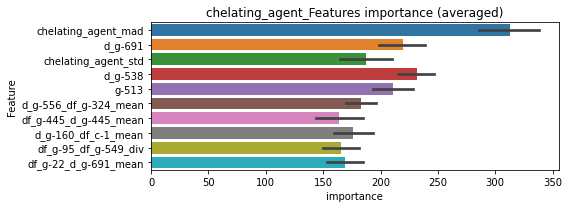

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012094	valid_1's binary_logloss: 0.0341183
[600]	training's binary_logloss: 0.00157389	valid_1's binary_logloss: 0.0127163
[900]	training's binary_logloss: 0.000680619	valid_1's binary_logloss: 0.00980153
Early stopping, best iteration is:
[1084]	training's binary_logloss: 0.000563071	valid_1's binary_logloss: 0.00915225


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120899	valid_1's binary_logloss: 0.0327337
[600]	training's binary_logloss: 0.00155844	valid_1's binary_logloss: 0.0107748
[900]	training's binary_logloss: 0.000680548	valid_1's binary_logloss: 0.00729653
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.000573725	valid_1's binary_logloss: 0.00681914


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118513	valid_1's binary_logloss: 0.0539964
[600]	training's binary_logloss: 0.00153057	valid_1's binary_logloss: 0.0301507
[900]	training's binary_logloss: 0.000666443	valid_1's binary_logloss: 0.0271717
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000623371	valid_1's binary_logloss: 0.0269332


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121287	valid_1's binary_logloss: 0.043922
[600]	training's binary_logloss: 0.00156402	valid_1's binary_logloss: 0.0204329
[900]	training's binary_logloss: 0.000676218	valid_1's binary_logloss: 0.0173046
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000622123	valid_1's binary_logloss: 0.0168935


chelating_agent logloss: 0.014950769944155331


neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00544584	valid_1's binary_logloss: 0.0135598
[600]	training's binary_logloss: 0.000709504	valid_1's binary_logloss: 0.00475751
[900]	training's binary_logloss: 0.000383214	valid_1's binary_logloss: 0.00384337
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000375496	valid_1's binary_logloss: 0.0038033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055175	valid_1's binary_logloss: 0.0105024
[600]	training's binary_logloss: 0.000716769	valid_1's binary_logloss: 0.00232002
[900]	training's binary_logloss: 0.00038929	valid_1's binary_logloss: 0.00151362
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000388968	valid_1's binary_logloss: 0.00151214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546305	valid_1's binary_logloss: 0.011108
[600]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0040534, Threshold: 0.1041080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.07288, conf_1:0.13534
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.1041080
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_2: 0.1541080
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_3: 0.2041080
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_4: 0.2541080
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_5: 0.3041080
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_6: 0.3541080
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.4041080
threshold: 0.4041080, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491032	valid_1's binary_logloss: 0.00957803
[600]	training's binary_logloss: 0.000645995	valid_1's binary_logloss: 0.00207248
[900]	training's binary_logloss: 0.000359618	valid_1's binary_logloss: 0.00138445
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000352415	valid_1's binary_logloss: 0.00137027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496523	valid_1's binary_logloss: 0.00927354
[600]	training's binary_logloss: 0.000645897	valid_1's binary_logloss: 0.00176038
[900]	training's binary_logloss: 0.000359284	valid_1's binary_logloss: 0.00110895
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000353985	valid_1's binary_logloss: 0.00110004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474816	valid_1's binary_logloss: 0.00959107
[600]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0893006, Threshold: 0.4041080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0143144 Vs.target_rate: 0.00101, Num_p_label: 57.0, conf_0:0.32329, conf_1:0.48493
Num_p_label: 57.0, Expected: 4.0, Adj_threshold_1: 0.4041080
Num_p_label: 53.0, Expected: 4.0, Adj_threshold_2: 0.4541080
Num_p_label: 53.0, Expected: 4.0, Adj_threshold_3: 0.5041080
Num_p_label: 47.0, Expected: 4.0, Adj_threshold_4: 0.5541080
Num_p_label: 42.0, Expected: 4.0, Adj_threshold_5: 0.6041080
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_6: 0.6541080
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_7: 0.7041080
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_8: 0.7541080
threshold: 0.7541080, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491032	valid_1's binary_logloss: 0.00957803
[600]	training's binary_logloss: 0.000645995	valid_1's binary_logloss: 0.00207248
[900]	training's binary_logloss: 0.000359618	valid_1's binary_logloss: 0.00138445
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000352415	valid_1's binary_logloss: 0.00137027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496523	valid_1's binary_logloss: 0.00927354
[600]	training's binary_logloss: 0.000645897	valid_1's binary_logloss: 0.00176038
[900]	training's binary_logloss: 0.000359284	valid_1's binary_logloss: 0.00110895
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000353985	valid_1's binary_logloss: 0.00110004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474816	valid_1's binary_logloss: 0.00959107
[600]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.0893006, Threshold: 0.7541080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0080362 Vs.target_rate: 0.00101, Num_p_label: 32.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_1: 0.7541080
threshold: 0.7541080, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


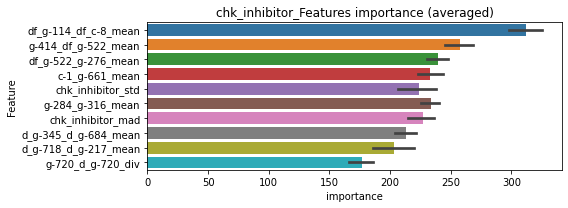

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505742	valid_1's binary_logloss: 0.0093709
[600]	training's binary_logloss: 0.000647411	valid_1's binary_logloss: 0.00209824
[900]	training's binary_logloss: 0.000361637	valid_1's binary_logloss: 0.00141037
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000354893	valid_1's binary_logloss: 0.00139406


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492871	valid_1's binary_logloss: 0.00929294
[600]	training's binary_logloss: 0.000648382	valid_1's binary_logloss: 0.00178856
[900]	training's binary_logloss: 0.000360021	valid_1's binary_logloss: 0.00115419
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000354227	valid_1's binary_logloss: 0.00114044


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00472861	valid_1's binary_logloss: 0.00916176
[600]	training's binary_logloss: 0.000634099	valid_1's binary_logloss: 0.00229902
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.00036656	valid_1's binary_logloss: 0.00180721


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473078	valid_1's binary_logloss: 0.0112823
[600]	training's binary_logloss: 0.000630693	valid_1's binary_logloss: 0.00331829
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000373736	valid_1's binary_logloss: 0.00252856


chk_inhibitor logloss: 0.0017176219996183557


neg labels: 3289 → selected neg labels: 3284


chloride_channel_blocker, len(trt): 42, len(othr): 3284, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00789168	valid_1's binary_logloss: 0.0349106
[600]	training's binary_logloss: 0.00110746	valid_1's binary_logloss: 0.0194274
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000604168	valid_1's binary_logloss: 0.0175898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0080839	valid_1's binary_logloss: 0.0419716
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00135116	valid_1's binary_logloss: 0.0281784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00815008	valid_1's binary_logloss: 0.0208603
[600]	training's binary_logloss: 0.0011257	valid_1's binary_logloss: 0.00759766
[900]	training's binary_logloss: 0.000543493	valid_1's binary_logloss: 0.00572921
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000494426	valid_1's binary_logloss

1 / 3 AUC score:0.999
y_Threshold: 0.0090106, Threshold: 0.0829506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.05807, conf_1:0.10784
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0829506
Num_p_label: 30.0, Expected: 7.0, Adj_threshold_2: 0.1329506
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_3: 0.1829506
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_4: 0.2329506
threshold: 0.2329506, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711241	valid_1's binary_logloss: 0.0222595
[600]	training's binary_logloss: 0.000976991	valid_1's binary_logloss: 0.00984417
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000510983	valid_1's binary_logloss: 0.00791878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00681069	valid_1's binary_logloss: 0.0405129
[600]	training's binary_logloss: 0.000927205	valid_1's binary_logloss: 0.0278633
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000523317	valid_1's binary_logloss: 0.0263697
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00712326	valid_1's binary_logloss: 0.0209419
[600]	training's binary_logloss: 0.000986556	valid_1's binary_logloss: 0.00857645
[900]	training's binary_logloss: 0.000492506	valid_1's binary_logloss: 0.00656434
Early stopping, b

2 / 3 AUC score:1.000
y_Threshold: 0.0507554, Threshold: 0.2329506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0163235 Vs.target_rate: 0.00176, Num_p_label: 65.0, conf_0:0.18636, conf_1:0.27954
Num_p_label: 65.0, Expected: 7.0, Adj_threshold_1: 0.2329506
Num_p_label: 54.0, Expected: 7.0, Adj_threshold_2: 0.2829506
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_3: 0.3329506
Num_p_label: 38.0, Expected: 7.0, Adj_threshold_4: 0.3829506
Num_p_label: 34.0, Expected: 7.0, Adj_threshold_5: 0.4329506
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_6: 0.4829506
Num_p_label: 25.0, Expected: 7.0, Adj_threshold_7: 0.5329506
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_8: 0.5829506
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_9: 0.6329506
threshold: 0.6329506, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00686221	valid_1's binary_logloss: 0.0203818
[600]	training's binary_logloss: 0.000948506	valid_1's binary_logloss: 0.0090396
[900]	training's binary_logloss: 0.000476258	valid_1's binary_logloss: 0.00745127
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000454352	valid_1's binary_logloss: 0.0074096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671624	valid_1's binary_logloss: 0.0396413
[600]	training's binary_logloss: 0.000924088	valid_1's binary_logloss: 0.019504
[900]	training's binary_logloss: 0.00046667	valid_1's binary_logloss: 0.0161283
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000472207	valid_1's binary_logloss: 0.0160994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00666151	valid_1's binary_logloss: 0.0257063
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0759907, Threshold: 0.6329506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0052737 Vs.target_rate: 0.00176, Num_p_label: 21.0, conf_0:0.50000, conf_1:0.69625
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_1: 0.6329506
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_2: 0.6829506
threshold: 0.6829506, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


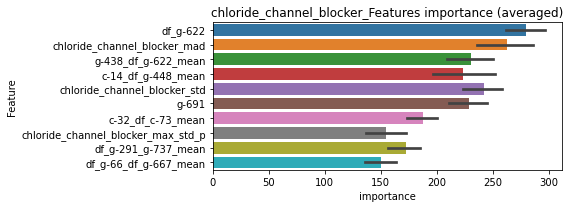

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00659284	valid_1's binary_logloss: 0.0262806
[600]	training's binary_logloss: 0.000918359	valid_1's binary_logloss: 0.0130007
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000488076	valid_1's binary_logloss: 0.0108662


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00664543	valid_1's binary_logloss: 0.0233405
[600]	training's binary_logloss: 0.000929054	valid_1's binary_logloss: 0.010844
[900]	training's binary_logloss: 0.000467205	valid_1's binary_logloss: 0.00920344
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000444929	valid_1's binary_logloss: 0.00913225


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00668861	valid_1's binary_logloss: 0.030478
[600]	training's binary_logloss: 0.000928059	valid_1's binary_logloss: 0.0176582
[900]	training's binary_logloss: 0.000474139	valid_1's binary_logloss: 0.0152399
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000455425	valid_1's binary_logloss: 0.0151359


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00696179	valid_1's binary_logloss: 0.0253983
[600]	training's binary_logloss: 0.000932343	valid_1's binary_logloss: 0.0143626
[900]	training's binary_logloss: 0.000469814	valid_1's binary_logloss: 0.0127728
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000467949	valid_1's binary_logloss: 0.0127377


chloride_channel_blocker logloss: 0.011979827331213118


neg labels: 3289 → selected neg labels: 3288


cholesterol_inhibitor, len(trt): 48, len(othr): 3288, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01204	valid_1's binary_logloss: 0.044283
[600]	training's binary_logloss: 0.0014733	valid_1's binary_logloss: 0.0222642
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000732997	valid_1's binary_logloss: 0.0192234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120023	valid_1's binary_logloss: 0.0455109
[600]	training's binary_logloss: 0.00147306	valid_1's binary_logloss: 0.0251724
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00111449	valid_1's binary_logloss: 0.0238627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118245	valid_1's binary_logloss: 0.0351529
[600]	training's binary_logloss: 0.00141927	valid_1's binary_logloss: 0.0140213
[900]	training's binary_logloss: 0.000624734	valid_1's binary_logloss: 0.0112327
Early stopping, best iteration i

1 / 3 AUC score:1.000
y_Threshold: 0.0086403, Threshold: 0.0303552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.02125, conf_1:0.03946
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0303552
Num_p_label: 12.0, Expected: 8.0, Adj_threshold_2: 0.0803552
threshold: 0.0803552, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103551	valid_1's binary_logloss: 0.0339645
[600]	training's binary_logloss: 0.00128559	valid_1's binary_logloss: 0.0159979
[900]	training's binary_logloss: 0.000578832	valid_1's binary_logloss: 0.014178
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000599684	valid_1's binary_logloss: 0.0141007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0099773	valid_1's binary_logloss: 0.0423551
[600]	training's binary_logloss: 0.00127837	valid_1's binary_logloss: 0.0248252
[900]	training's binary_logloss: 0.00058363	valid_1's binary_logloss: 0.0222596
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000582056	valid_1's binary_logloss: 0.0222385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104623	valid_1's binary_logloss: 0.0273665
[600]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0464235, Threshold: 0.0803552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 652.0/3803
p_label_rate: 0.0128076 Vs.target_rate: 0.00202, Num_p_label: 51.0, conf_0:0.06428, conf_1:0.09643
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_1: 0.0803552
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_2: 0.1303552
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_3: 0.1803552
threshold: 0.1803552, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3803, y_label_rate: 0.1714436
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955905	valid_1's binary_logloss: 0.0422104
[600]	training's binary_logloss: 0.00119521	valid_1's binary_logloss: 0.0255278
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.00062046	valid_1's binary_logloss: 0.022724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100958	valid_1's binary_logloss: 0.0391933
[600]	training's binary_logloss: 0.00125276	valid_1's binary_logloss: 0.0182955
[900]	training's binary_logloss: 0.000576811	valid_1's binary_logloss: 0.0154002
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000594249	valid_1's binary_logloss: 0.0153197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00971978	valid_1's binary_logloss: 0.028022
[600]	training's binary_logloss: 0.00123062	valid_1's binary_logloss: 0.0143551
[900]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0631609, Threshold: 0.1803552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3793
p_label_rate: 0.0057760 Vs.target_rate: 0.00202, Num_p_label: 23.0, conf_0:0.16232, conf_1:0.19839
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_1: 0.1803552
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_2: 0.2303552
threshold: 0.2303552, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3793, y_label_rate: 0.1705774


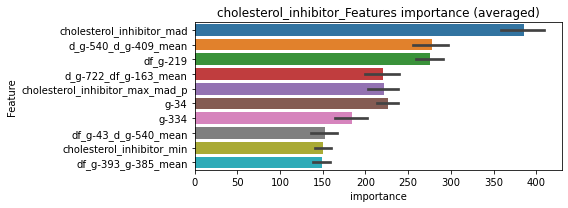

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00974453	valid_1's binary_logloss: 0.0347009
[600]	training's binary_logloss: 0.00120237	valid_1's binary_logloss: 0.0256866
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00124685	valid_1's binary_logloss: 0.0255778


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00859596	valid_1's binary_logloss: 0.0448024
[600]	training's binary_logloss: 0.001115	valid_1's binary_logloss: 0.0326103
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000658732	valid_1's binary_logloss: 0.0314744


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00932523	valid_1's binary_logloss: 0.0345497
[600]	training's binary_logloss: 0.00116448	valid_1's binary_logloss: 0.0183798
[900]	training's binary_logloss: 0.00054729	valid_1's binary_logloss: 0.0158326
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000549866	valid_1's binary_logloss: 0.0158178


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00958862	valid_1's binary_logloss: 0.0460071
[600]	training's binary_logloss: 0.00119159	valid_1's binary_logloss: 0.026725
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00109748	valid_1's binary_logloss: 0.0260394


cholesterol_inhibitor logloss: 0.02472756419701445


neg labels: 3289 → selected neg labels: 3281


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3281, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013811	valid_1's binary_logloss: 0.0656805
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00224065	valid_1's binary_logloss: 0.0479168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013773	valid_1's binary_logloss: 0.0510973
[600]	training's binary_logloss: 0.00178382	valid_1's binary_logloss: 0.0296969
[900]	training's binary_logloss: 0.000745121	valid_1's binary_logloss: 0.0276386
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000784419	valid_1's binary_logloss: 0.0276357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141387	valid_1's binary_logloss: 0.0361342
[600]	training's binary_logloss: 0.00182652	valid_1's binary_logloss: 0.011709
[900]	training's binary_logloss: 0.000765027	valid_1's binary_logloss: 0.00804283
Early stopping, best iteratio

1 / 3 AUC score:0.998
y_Threshold: 0.0128137, Threshold: 0.0496547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.03476, conf_1:0.06455
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0496547
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.0996547
threshold: 0.0996547, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116462	valid_1's binary_logloss: 0.0362593
[600]	training's binary_logloss: 0.00155786	valid_1's binary_logloss: 0.0167302
[900]	training's binary_logloss: 0.000687418	valid_1's binary_logloss: 0.0135263
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000614845	valid_1's binary_logloss: 0.0132735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109541	valid_1's binary_logloss: 0.0547989
[600]	training's binary_logloss: 0.00148113	valid_1's binary_logloss: 0.0366688
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000927863	valid_1's binary_logloss: 0.0348342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114056	valid_1's binary_logloss: 0.033892
[600]	training's binary_logloss: 0.00152058	valid_1's binary_logloss: 0.0127685
[900]	training's binary_logl

2 / 3 AUC score:0.999
y_Threshold: 0.0911808, Threshold: 0.0996547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0153189 Vs.target_rate: 0.00227, Num_p_label: 61.0, conf_0:0.07972, conf_1:0.11959
Num_p_label: 61.0, Expected: 9.0, Adj_threshold_1: 0.0996547
Num_p_label: 47.0, Expected: 9.0, Adj_threshold_2: 0.1496547
Num_p_label: 34.0, Expected: 9.0, Adj_threshold_3: 0.1996547
Num_p_label: 28.0, Expected: 9.0, Adj_threshold_4: 0.2496547
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_5: 0.2996547
Num_p_label: 19.0, Expected: 9.0, Adj_threshold_6: 0.3496547
threshold: 0.3496547, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 642.0/3777, y_label_rate: 0.1699762
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108649	valid_1's binary_logloss: 0.0325856
[600]	training's binary_logloss: 0.00144011	valid_1's binary_logloss: 0.0140047
[900]	training's binary_logloss: 0.000642719	valid_1's binary_logloss: 0.0114786
Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000543099	valid_1's binary_logloss: 0.0111062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107807	valid_1's binary_logloss: 0.0325347
[600]	training's binary_logloss: 0.00143529	valid_1's binary_logloss: 0.0137156
[900]	training's binary_logloss: 0.000643496	valid_1's binary_logloss: 0.0110582
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000575233	valid_1's binary_logloss: 0.0108776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106995	valid_1's binary_logloss: 0.0360311
[600]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.1026598, Threshold: 0.3496547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 638.0/3769
p_label_rate: 0.0070316 Vs.target_rate: 0.00227, Num_p_label: 28.0, conf_0:0.31469, conf_1:0.38462
Num_p_label: 28.0, Expected: 9.0, Adj_threshold_1: 0.3496547
Num_p_label: 25.0, Expected: 9.0, Adj_threshold_2: 0.3996547
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_3: 0.4496547
threshold: 0.4496547, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 638.0/3769, y_label_rate: 0.1692757


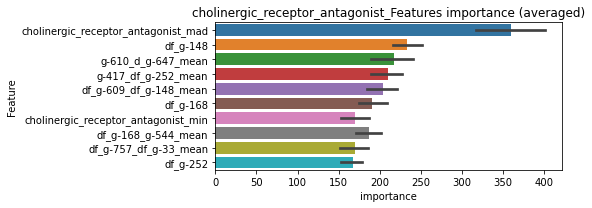

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109785	valid_1's binary_logloss: 0.0326463
[600]	training's binary_logloss: 0.00144069	valid_1's binary_logloss: 0.0126875
[900]	training's binary_logloss: 0.000643553	valid_1's binary_logloss: 0.00913896
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.000542743	valid_1's binary_logloss: 0.00858403


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108591	valid_1's binary_logloss: 0.0415977
[600]	training's binary_logloss: 0.00141696	valid_1's binary_logloss: 0.0231667
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000718779	valid_1's binary_logloss: 0.020765


len(train_index) : 2827
len(valid_index) : 942
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102603	valid_1's binary_logloss: 0.0346664
[600]	training's binary_logloss: 0.00137765	valid_1's binary_logloss: 0.0159267
[900]	training's binary_logloss: 0.000631021	valid_1's binary_logloss: 0.0123278
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.00055762	valid_1's binary_logloss: 0.0117954


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100564	valid_1's binary_logloss: 0.0500121
[600]	training's binary_logloss: 0.00133729	valid_1's binary_logloss: 0.0324255
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000870287	valid_1's binary_logloss: 0.0313773


cholinergic_receptor_antagonist logloss: 0.018138300727917157


neg labels: 3289 → selected neg labels: 3288


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3288, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00561603	valid_1's binary_logloss: 0.0118544
[600]	training's binary_logloss: 0.00073282	valid_1's binary_logloss: 0.00314006
[900]	training's binary_logloss: 0.000407213	valid_1's binary_logloss: 0.00222886
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000407213	valid_1's binary_logloss: 0.00222886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567859	valid_1's binary_logloss: 0.0141901
[600]	training's binary_logloss: 0.000742548	valid_1's binary_logloss: 0.0044412
[900]	training's binary_logloss: 0.000410098	valid_1's binary_logloss: 0.00338594
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000411017	valid_1's binary_logloss: 0.00338266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00568069	valid_1's binary_logloss: 0.0167912
[600]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0038352, Threshold: 0.0231319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.01619, conf_1:0.03007
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0231319
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.0731319
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_3: 0.1231319
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_4: 0.1731319
threshold: 0.1731319, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505361	valid_1's binary_logloss: 0.0100078
[600]	training's binary_logloss: 0.000660224	valid_1's binary_logloss: 0.00216791
[900]	training's binary_logloss: 0.000389162	valid_1's binary_logloss: 0.00152653
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000379604	valid_1's binary_logloss: 0.00150816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00518475	valid_1's binary_logloss: 0.0104578
[600]	training's binary_logloss: 0.000670726	valid_1's binary_logloss: 0.00270752
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000403933	valid_1's binary_logloss: 0.00200131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487838	valid_1's binary_logloss: 0.0149015
[600]	training's binary_logloss: 0.000641466	valid_1's binary_logloss: 0.00537395
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.0804334, Threshold: 0.1731319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0077850 Vs.target_rate: 0.00101, Num_p_label: 31.0, conf_0:0.13851, conf_1:0.20776
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_1: 0.1731319
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_2: 0.2231319
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_3: 0.2731319
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.3231319
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_5: 0.3731319
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_6: 0.4231319
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_7: 0.4731319
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_8: 0.5231319
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_9: 0.5731319
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_10: 0.6231319
threshold: 0.6731319, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00494978	valid_1's binary_logloss: 0.0121233
[600]	training's binary_logloss: 0.00065556	valid_1's binary_logloss: 0.00453473
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000392457	valid_1's binary_logloss: 0.0038363
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506776	valid_1's binary_logloss: 0.0135577
[600]	training's binary_logloss: 0.000660724	valid_1's binary_logloss: 0.00663217
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000390834	valid_1's binary_logloss: 0.00603024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00475124	valid_1's binary_logloss: 0.0153953
[600]	training's binary_logloss: 0.000642212	valid_1's binary_logloss: 0.00679024
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000610202	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.1096719, Threshold: 0.6731319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00101, Num_p_label: 11.0, conf_0:0.50000, conf_1:0.74045
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.6731319
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_2: 0.7231319
threshold: 0.7231319, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3807, y_label_rate: 0.1717888


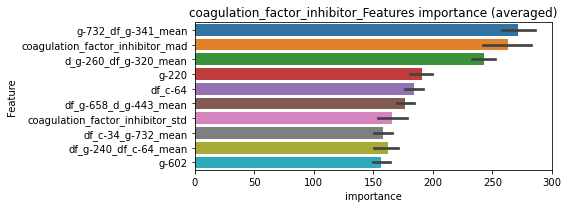

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00490164	valid_1's binary_logloss: 0.0130993
[600]	training's binary_logloss: 0.000646376	valid_1's binary_logloss: 0.00325773
[900]	training's binary_logloss: 0.000371212	valid_1's binary_logloss: 0.00242383
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000371068	valid_1's binary_logloss: 0.00242365


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00485313	valid_1's binary_logloss: 0.0116482
[600]	training's binary_logloss: 0.000646229	valid_1's binary_logloss: 0.00398524
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000394006	valid_1's binary_logloss: 0.00345792


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484517	valid_1's binary_logloss: 0.00905489
[600]	training's binary_logloss: 0.000649519	valid_1's binary_logloss: 0.00199005
[900]	training's binary_logloss: 0.000380597	valid_1's binary_logloss: 0.00138882
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000380597	valid_1's binary_logloss: 0.00138882


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488441	valid_1's binary_logloss: 0.0209927
[600]	training's binary_logloss: 0.000637192	valid_1's binary_logloss: 0.0107228
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000501027	valid_1's binary_logloss: 0.00997005


coagulation_factor_inhibitor logloss: 0.004308716348713367


neg labels: 3289 → selected neg labels: 3285


corticosteroid_agonist, len(trt): 36, len(othr): 3285, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00907325	valid_1's binary_logloss: 0.0328786
[600]	training's binary_logloss: 0.00114169	valid_1's binary_logloss: 0.0139063
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000597894	valid_1's binary_logloss: 0.0118346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00914213	valid_1's binary_logloss: 0.0314397
[600]	training's binary_logloss: 0.00113779	valid_1's binary_logloss: 0.0118193
[900]	training's binary_logloss: 0.000520751	valid_1's binary_logloss: 0.0089411
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000506403	valid_1's binary_logloss: 0.00889209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00878302	valid_1's binary_logloss: 0.0436944
[600]	training's binary_logloss: 0.00110879	valid_1's binary_logloss: 0.0332227
Early stopping, best it

1 / 3 AUC score:0.999
y_Threshold: 0.0077459, Threshold: 0.0270830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01896, conf_1:0.03521
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0270830
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_2: 0.0770830
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_3: 0.1270830
threshold: 0.1270830, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00800791	valid_1's binary_logloss: 0.0264682
[600]	training's binary_logloss: 0.00100175	valid_1's binary_logloss: 0.0095845
[900]	training's binary_logloss: 0.000473691	valid_1's binary_logloss: 0.00740976
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000450324	valid_1's binary_logloss: 0.00737961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0077803	valid_1's binary_logloss: 0.0273174
[600]	training's binary_logloss: 0.000992717	valid_1's binary_logloss: 0.0125415
[900]	training's binary_logloss: 0.000473378	valid_1's binary_logloss: 0.010521
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000486827	valid_1's binary_logloss: 0.010472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.007728	valid_1's binary_logloss: 0.0253175
[600]	training's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.1136543, Threshold: 0.1270830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0130588 Vs.target_rate: 0.00151, Num_p_label: 52.0, conf_0:0.10167, conf_1:0.15250
Num_p_label: 52.0, Expected: 6.0, Adj_threshold_1: 0.1270830
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_2: 0.1770830
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_3: 0.2270830
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_4: 0.2770830
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_5: 0.3270830
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_6: 0.3770830
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_7: 0.4270830
threshold: 0.4270830, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00753651	valid_1's binary_logloss: 0.0412547
[600]	training's binary_logloss: 0.00094126	valid_1's binary_logloss: 0.0296951
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.00052131	valid_1's binary_logloss: 0.028556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00789652	valid_1's binary_logloss: 0.0225348
[600]	training's binary_logloss: 0.000986056	valid_1's binary_logloss: 0.00731696
[900]	training's binary_logloss: 0.000472106	valid_1's binary_logloss: 0.00571389
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000450134	valid_1's binary_logloss: 0.00561646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00743	valid_1's binary_logloss: 0.0283903
[600]	training's binary_logloss: 0.000956028	valid_1's binary_logloss: 0.0117334
[900]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.1006392, Threshold: 0.4270830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3790
p_label_rate: 0.0045203 Vs.target_rate: 0.00151, Num_p_label: 18.0, conf_0:0.38437, conf_1:0.46979
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.4270830
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.4770830
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_3: 0.5270830
threshold: 0.5270830, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3790, y_label_rate: 0.1707124


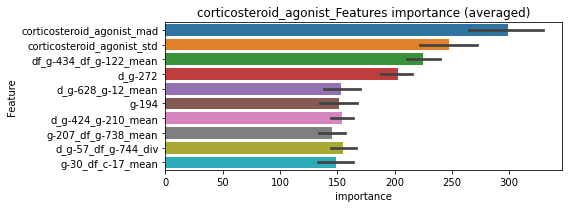

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00722792	valid_1's binary_logloss: 0.0218211
[600]	training's binary_logloss: 0.000926581	valid_1's binary_logloss: 0.00710556
[900]	training's binary_logloss: 0.000450904	valid_1's binary_logloss: 0.00507166
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000442081	valid_1's binary_logloss: 0.00500698


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00739585	valid_1's binary_logloss: 0.0219424
[600]	training's binary_logloss: 0.000934763	valid_1's binary_logloss: 0.00695752
[900]	training's binary_logloss: 0.000458894	valid_1's binary_logloss: 0.00523635
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000444234	valid_1's binary_logloss: 0.00521745


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00714063	valid_1's binary_logloss: 0.025685
[600]	training's binary_logloss: 0.000915346	valid_1's binary_logloss: 0.0127273
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000479504	valid_1's binary_logloss: 0.0112875


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00716157	valid_1's binary_logloss: 0.0243566
[600]	training's binary_logloss: 0.000931939	valid_1's binary_logloss: 0.0110818
[900]	training's binary_logloss: 0.00045446	valid_1's binary_logloss: 0.00966423
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000436259	valid_1's binary_logloss: 0.00958538


corticosteroid_agonist logloss: 0.007773345701850712


neg labels: 3289 → selected neg labels: 3235


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3235, target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.103124	valid_1's binary_logloss: 0.375364
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0836482	valid_1's binary_logloss: 0.374772
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.126654	valid_1's binary_logloss: 0.393109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.10771	valid_1's binary_logloss: 0.380232
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0896893	valid_1's binary_logloss: 0.378193
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.732
y_Threshold: 0.1486611, Threshold: 0.4966184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 776 → Positive_corect_labels: 324/3106
p_label_rate: 0.0100452 Vs.target_rate: 0.01827, Num_p_label: 40.0, conf_0:0.34763, conf_1:0.64560
Num_p_label: 40.0, Expected: 72.7, Adj_threshold_1: 0.4966184
Num_p_label: 49.0, Expected: 72.7, Adj_threshold_2: 0.4666184
threshold: 0.4666184, positive_p_label: 49.0/3982, p_label_rate: 0.0123054


Early stopping, best iteration is:
[266]	training's binary_logloss: 0.115692	valid_1's binary_logloss: 0.376278


positive_y_label: 324.0/3106, y_label_rate: 0.1043142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215819	valid_1's binary_logloss: 0.170488
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.0204741	valid_1's binary_logloss: 0.169772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237887	valid_1's binary_logloss: 0.161458
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.0164133	valid_1's binary_logloss: 0.158353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023211	valid_1's binary_logloss: 0.15298
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.0163026	valid_1's binary_logloss: 0.151513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024511	valid_1's binary_logloss: 0.139787
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00939296	valid_1's binary_logloss: 0.1

2 / 3 AUC score:0.957
y_Threshold: 0.1012718, Threshold: 0.4666184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 242.0/2942
p_label_rate: 0.0356605 Vs.target_rate: 0.01827, Num_p_label: 142.0, conf_0:0.37329, conf_1:0.55994
Num_p_label: 142.0, Expected: 72.7, Adj_threshold_1: 0.4666184
Num_p_label: 120.0, Expected: 72.7, Adj_threshold_2: 0.5166184
Num_p_label: 99.0, Expected: 72.7, Adj_threshold_3: 0.5666184
threshold: 0.5666184, positive_p_label: 99.0/3982, p_label_rate: 0.0248619
positive_y_label: 242.0/2942, y_label_rate: 0.0822570
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0119901	valid_1's binary_logloss: 0.125764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107961	valid_1's binary_logloss: 0.0971207
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00390685	valid_1's binary_logloss: 0.0916381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00979944	valid_1's binary_logloss: 0.0723421
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00284521	valid_1's binary_logloss: 0.0646819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101265	valid_1's binary_logloss: 0.0802966


3 / 3 AUC score:0.977
y_Threshold: 0.0722938, Threshold: 0.5666184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 209.0/2876
p_label_rate: 0.0477147 Vs.target_rate: 0.01827, Num_p_label: 190.0, conf_0:0.50000, conf_1:0.62328
Num_p_label: 190.0, Expected: 72.7, Adj_threshold_1: 0.5666184
Num_p_label: 176.0, Expected: 72.7, Adj_threshold_2: 0.6166184


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00376714	valid_1's binary_logloss: 0.0719121


Num_p_label: 156.0, Expected: 72.7, Adj_threshold_3: 0.6666184
Num_p_label: 143.0, Expected: 72.7, Adj_threshold_4: 0.7166184
Num_p_label: 124.0, Expected: 72.7, Adj_threshold_5: 0.7666184
threshold: 0.7666184, positive_p_label: 124.0/3982, p_label_rate: 0.0311401
positive_y_label: 209.0/2876, y_label_rate: 0.0726704


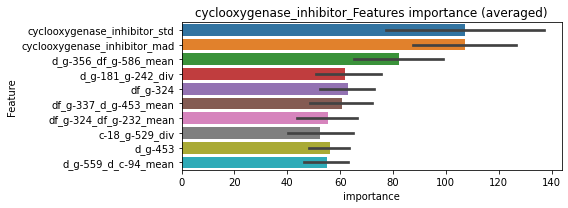

len(train_index) : 2157
len(valid_index) : 719
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00595152	valid_1's binary_logloss: 0.0554754
[600]	training's binary_logloss: 0.00107298	valid_1's binary_logloss: 0.0491891
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00101039	valid_1's binary_logloss: 0.0489784


len(train_index) : 2157
len(valid_index) : 719
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630639	valid_1's binary_logloss: 0.0383537
[600]	training's binary_logloss: 0.00113104	valid_1's binary_logloss: 0.0255242
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000742345	valid_1's binary_logloss: 0.0230651


len(train_index) : 2157
len(valid_index) : 719
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633675	valid_1's binary_logloss: 0.0819623


len(train_index) : 2157
len(valid_index) : 719
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00667283	valid_1's binary_logloss: 0.0817932
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00548298	valid_1's binary_logloss: 0.0750921


cyclooxygenase_inhibitor logloss: 0.0565622934952604


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00161542	valid_1's binary_logloss: 0.0724125
neg labels: 3289 → selected neg labels: 3273


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3273, target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.026136	valid_1's binary_logloss: 0.131645
[600]	training's binary_logloss: 0.00373283	valid_1's binary_logloss: 0.105488
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00253718	valid_1's binary_logloss: 0.103555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0250797	valid_1's binary_logloss: 0.118812
[600]	training's binary_logloss: 0.00368422	valid_1's binary_logloss: 0.0944406
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00291767	valid_1's binary_logloss: 0.0934544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0298037	valid_1's binary_logloss: 0.103039
[600]	training's binary_logloss: 0.00431749	valid_1's binary_logloss: 0.0667226
[900]	training's binary_logloss: 0.00143825	valid_1's binary_logloss: 0.0578474
Early stopping, best iteration is:
[

1 / 3 AUC score:0.986
y_Threshold: 0.0237593, Threshold: 0.1367578, pos_neg_ratio: 0.8000000
Remove_noisy_data: 192 → Positive_corect_labels: 624/3735
p_label_rate: 0.0100452 Vs.target_rate: 0.00437, Num_p_label: 40.0, conf_0:0.09573, conf_1:0.17779
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.1367578
Num_p_label: 34.0, Expected: 17.4, Adj_threshold_2: 0.1867578
Num_p_label: 26.0, Expected: 17.4, Adj_threshold_3: 0.2367578
threshold: 0.2367578, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 624.0/3735, y_label_rate: 0.1670683
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016578	valid_1's binary_logloss: 0.104126
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00330623	valid_1's binary_logloss: 0.0867015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187284	valid_1's binary_logloss: 0.0828728
[600]	training's binary_logloss: 0.00254743	valid_1's binary_logloss: 0.0598388
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.00122998	valid_1's binary_logloss: 0.056588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200709	valid_1's binary_logloss: 0.0537412
[600]	training's binary_logloss: 0.00267463	valid_1's binary_logloss: 0.0248405
[900]	training's binary_logloss: 0.00101937	valid_1's binary_logloss: 0.0203356
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.00074873	valid_1's binary_logloss: 0.01950

2 / 3 AUC score:0.994
y_Threshold: 0.0616181, Threshold: 0.2367578, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 592.0/3671
p_label_rate: 0.0190859 Vs.target_rate: 0.00437, Num_p_label: 76.0, conf_0:0.18941, conf_1:0.28411
Num_p_label: 76.0, Expected: 17.4, Adj_threshold_1: 0.2367578
Num_p_label: 71.0, Expected: 17.4, Adj_threshold_2: 0.2867578
Num_p_label: 65.0, Expected: 17.4, Adj_threshold_3: 0.3367578
Num_p_label: 59.0, Expected: 17.4, Adj_threshold_4: 0.3867578
Num_p_label: 57.0, Expected: 17.4, Adj_threshold_5: 0.4367578
Num_p_label: 53.0, Expected: 17.4, Adj_threshold_6: 0.4867578
Num_p_label: 52.0, Expected: 17.4, Adj_threshold_7: 0.5367578
Num_p_label: 48.0, Expected: 17.4, Adj_threshold_8: 0.5867578
Num_p_label: 45.0, Expected: 17.4, Adj_threshold_9: 0.6367578
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_10: 0.6867578
threshold: 0.7367578, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 592.0/3671, y_label_rate: 0.1612640

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131841	valid_1's binary_logloss: 0.0735234
[600]	training's binary_logloss: 0.00181905	valid_1's binary_logloss: 0.0593813
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00174504	valid_1's binary_logloss: 0.0589791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129716	valid_1's binary_logloss: 0.0685166
[600]	training's binary_logloss: 0.00182196	valid_1's binary_logloss: 0.0489742
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.00084434	valid_1's binary_logloss: 0.0455034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136392	valid_1's binary_logloss: 0.0778862
[600]	training's binary_logloss: 0.00184292	valid_1's binary_logloss: 0.0676235
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00176666	valid_1's binary_logloss: 0.067

3 / 3 AUC score:0.995
y_Threshold: 0.0734022, Threshold: 0.7367578, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 574.0/3635
p_label_rate: 0.0173280 Vs.target_rate: 0.00437, Num_p_label: 69.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 69.0, Expected: 17.4, Adj_threshold_1: 0.7367578
Num_p_label: 64.0, Expected: 17.4, Adj_threshold_2: 0.7867578
threshold: 0.7867578, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 574.0/3635, y_label_rate: 0.1579092


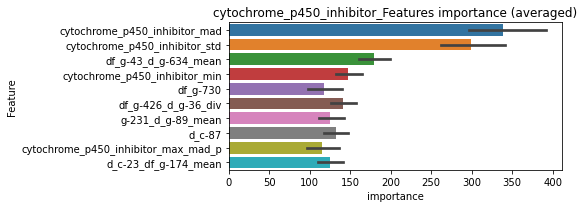

len(train_index) : 2726
len(valid_index) : 909
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113504	valid_1's binary_logloss: 0.0449604
[600]	training's binary_logloss: 0.00161412	valid_1's binary_logloss: 0.0223184
[900]	training's binary_logloss: 0.000732366	valid_1's binary_logloss: 0.0181339
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000626698	valid_1's binary_logloss: 0.0175914


len(train_index) : 2726
len(valid_index) : 909
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115437	valid_1's binary_logloss: 0.0534645
[600]	training's binary_logloss: 0.00156556	valid_1's binary_logloss: 0.033186
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000977566	valid_1's binary_logloss: 0.0305452


len(train_index) : 2726
len(valid_index) : 909
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115046	valid_1's binary_logloss: 0.0491259
[600]	training's binary_logloss: 0.0015551	valid_1's binary_logloss: 0.0315603
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000954746	valid_1's binary_logloss: 0.0297921


len(train_index) : 2727
len(valid_index) : 908
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106955	valid_1's binary_logloss: 0.0686307
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00177266	valid_1's binary_logloss: 0.0572067


cytochrome_p450_inhibitor logloss: 0.03378435948385295


neg labels: 3289 → selected neg labels: 3281


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3281, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00967854	valid_1's binary_logloss: 0.0348631
[600]	training's binary_logloss: 0.00121129	valid_1's binary_logloss: 0.0160619
[900]	training's binary_logloss: 0.000556241	valid_1's binary_logloss: 0.0134042
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000552101	valid_1's binary_logloss: 0.0133752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00995065	valid_1's binary_logloss: 0.0297293
[600]	training's binary_logloss: 0.00120883	valid_1's binary_logloss: 0.0129147
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000614203	valid_1's binary_logloss: 0.0111247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102726	valid_1's binary_logloss: 0.0280426
[600]	training's binary_logloss: 0.00123641	valid_1's binary_logloss: 0.0106746
[900]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0064595, Threshold: 0.0328853, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.02302, conf_1:0.04275
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0328853
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.0828853
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_3: 0.1328853
threshold: 0.1328853, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00873659	valid_1's binary_logloss: 0.0335145
[600]	training's binary_logloss: 0.00108872	valid_1's binary_logloss: 0.0164306
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000654809	valid_1's binary_logloss: 0.0148105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00900052	valid_1's binary_logloss: 0.0274103
[600]	training's binary_logloss: 0.00109849	valid_1's binary_logloss: 0.0117086
[900]	training's binary_logloss: 0.000513989	valid_1's binary_logloss: 0.00997282
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.00051141	valid_1's binary_logloss: 0.00995256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00891608	valid_1's binary_logloss: 0.0212761
[600]	training's binary_logloss: 0.00111243	valid_1's binary_logloss: 0.00570416
[900]	training's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0618876, Threshold: 0.1328853, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0072828 Vs.target_rate: 0.00151, Num_p_label: 29.0, conf_0:0.10631, conf_1:0.15946
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_1: 0.1328853
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.1828853
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.2328853
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_4: 0.2828853
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_5: 0.3328853
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_6: 0.3828853
threshold: 0.3828853, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00785844	valid_1's binary_logloss: 0.0307133
[600]	training's binary_logloss: 0.00101574	valid_1's binary_logloss: 0.0188825
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000545053	valid_1's binary_logloss: 0.0181369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00884155	valid_1's binary_logloss: 0.0243756
[600]	training's binary_logloss: 0.00108285	valid_1's binary_logloss: 0.00778323
[900]	training's binary_logloss: 0.000512281	valid_1's binary_logloss: 0.00573107
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000505684	valid_1's binary_logloss: 0.00569355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00845466	valid_1's binary_logloss: 0.0238992
[600]	training's binary_logloss: 0.0010721	valid_1's binary_logloss: 0.00903123
Early stopping, best 

3 / 3 AUC score:1.000
y_Threshold: 0.0518542, Threshold: 0.3828853, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00151, Num_p_label: 15.0, conf_0:0.34460, conf_1:0.42117
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.3828853
threshold: 0.3828853, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


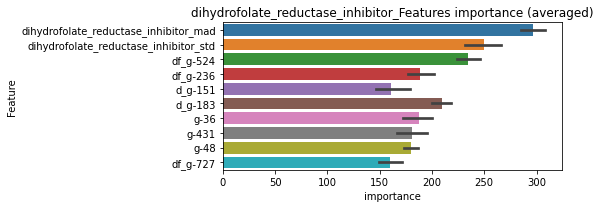

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00815445	valid_1's binary_logloss: 0.0262198
[600]	training's binary_logloss: 0.00102535	valid_1's binary_logloss: 0.0134492
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000618855	valid_1's binary_logloss: 0.0122467


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00855871	valid_1's binary_logloss: 0.0215669
[600]	training's binary_logloss: 0.00106008	valid_1's binary_logloss: 0.00651452
[900]	training's binary_logloss: 0.000511101	valid_1's binary_logloss: 0.00466331
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000505267	valid_1's binary_logloss: 0.0046246


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779344	valid_1's binary_logloss: 0.0295471
[600]	training's binary_logloss: 0.00101766	valid_1's binary_logloss: 0.0148263
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000839542	valid_1's binary_logloss: 0.0141832


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00814927	valid_1's binary_logloss: 0.0208153
[600]	training's binary_logloss: 0.00102946	valid_1's binary_logloss: 0.00522069
[900]	training's binary_logloss: 0.000509599	valid_1's binary_logloss: 0.00351294
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000498836	valid_1's binary_logloss: 0.00348021


dihydrofolate_reductase_inhibitor logloss: 0.008635294391015692


neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00526843	valid_1's binary_logloss: 0.0109669
[600]	training's binary_logloss: 0.000688262	valid_1's binary_logloss: 0.00265112
[900]	training's binary_logloss: 0.000380612	valid_1's binary_logloss: 0.00183874
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000380612	valid_1's binary_logloss: 0.00183874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533641	valid_1's binary_logloss: 0.0150003
[600]	training's binary_logloss: 0.000677655	valid_1's binary_logloss: 0.00503395
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.00041573	valid_1's binary_logloss: 0.00413863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00539522	valid_1's binary_logloss: 0.0124712
[600]	training's binary_logloss: 0.000707742	valid_1's binary_logloss: 0.00349039
Early stopping, 

1 / 3 AUC score:1.000
y_Threshold: 0.0030958, Threshold: 0.0222552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.01558, conf_1:0.02893
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0222552
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_2: 0.0722552
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_3: 0.1222552
threshold: 0.1222552, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473688	valid_1's binary_logloss: 0.0103536
[600]	training's binary_logloss: 0.000606367	valid_1's binary_logloss: 0.00223574
[900]	training's binary_logloss: 0.000354508	valid_1's binary_logloss: 0.00153128
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000354508	valid_1's binary_logloss: 0.00153128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480954	valid_1's binary_logloss: 0.0125229
[600]	training's binary_logloss: 0.000618444	valid_1's binary_logloss: 0.00393255
[900]	training's binary_logloss: 0.000354713	valid_1's binary_logloss: 0.00315869
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000356438	valid_1's binary_logloss: 0.00314672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467501	valid_1's binary_logloss: 0.00933818
[600]	training

2 / 3 AUC score:1.000
y_Threshold: 0.0593223, Threshold: 0.1222552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0077850 Vs.target_rate: 0.00105, Num_p_label: 31.0, conf_0:0.09780, conf_1:0.14671
Num_p_label: 31.0, Expected: 4.2, Adj_threshold_1: 0.1222552
Num_p_label: 23.0, Expected: 4.2, Adj_threshold_2: 0.1722552
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_3: 0.2222552
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_4: 0.2722552
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_5: 0.3222552
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_6: 0.3722552
threshold: 0.3722552, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473688	valid_1's binary_logloss: 0.0103536
[600]	training's binary_logloss: 0.000606367	valid_1's binary_logloss: 0.00223574
[900]	training's binary_logloss: 0.000354508	valid_1's binary_logloss: 0.00153128
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000354508	valid_1's binary_logloss: 0.00153128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480954	valid_1's binary_logloss: 0.0125229
[600]	training's binary_logloss: 0.000618444	valid_1's binary_logloss: 0.00393255
[900]	training's binary_logloss: 0.000354713	valid_1's binary_logloss: 0.00315869
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000356438	valid_1's binary_logloss: 0.00314672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467501	valid_1's binary_logloss: 0.00933818
[600]	training

3 / 3 AUC score:1.000
y_Threshold: 0.0593223, Threshold: 0.3722552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00105, Num_p_label: 9.0, conf_0:0.33503, conf_1:0.40948
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.3722552
threshold: 0.3722552, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


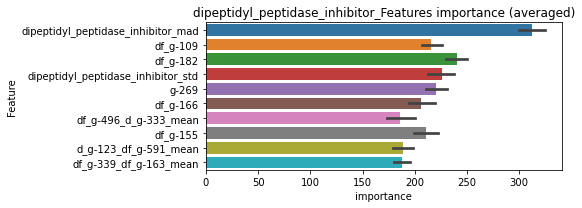

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047845	valid_1's binary_logloss: 0.0108084
[600]	training's binary_logloss: 0.000607285	valid_1's binary_logloss: 0.00232046
[900]	training's binary_logloss: 0.000349749	valid_1's binary_logloss: 0.00158296
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.00035002	valid_1's binary_logloss: 0.00158248


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498012	valid_1's binary_logloss: 0.011564
[600]	training's binary_logloss: 0.000619789	valid_1's binary_logloss: 0.00360139
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000373041	valid_1's binary_logloss: 0.00311569


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467782	valid_1's binary_logloss: 0.0088377
[600]	training's binary_logloss: 0.000607996	valid_1's binary_logloss: 0.00186032
[900]	training's binary_logloss: 0.000350586	valid_1's binary_logloss: 0.0012604
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000350586	valid_1's binary_logloss: 0.0012604


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487644	valid_1's binary_logloss: 0.00938528
[600]	training's binary_logloss: 0.000617562	valid_1's binary_logloss: 0.00173579
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000376667	valid_1's binary_logloss: 0.00119951


dipeptidyl_peptidase_inhibitor logloss: 0.0017898118574304351


neg labels: 3289 → selected neg labels: 3289


diuretic, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016881	valid_1's binary_logloss: 0.00228605
[600]	training's binary_logloss: 0.00023357	valid_1's binary_logloss: 0.000411763
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000196871	valid_1's binary_logloss: 0.000357532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171447	valid_1's binary_logloss: 0.0025673
[600]	training's binary_logloss: 0.000232895	valid_1's binary_logloss: 0.000458421
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000194206	valid_1's binary_logloss: 0.000393343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170407	valid_1's binary_logloss: 0.00200696
[600]	training's binary_logloss: 0.000237337	valid_1's binary_logloss: 0.000327696
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000201215	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0007654, Threshold: 0.0022609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00158, conf_1:0.00294
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0022609


Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00019895	valid_1's binary_logloss: 0.00051942


Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0522609
threshold: 0.0522609, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163363	valid_1's binary_logloss: 0.00311415
[600]	training's binary_logloss: 0.000220646	valid_1's binary_logloss: 0.00126576
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000192156	valid_1's binary_logloss: 0.00119422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162281	valid_1's binary_logloss: 0.00289346
[600]	training's binary_logloss: 0.000219628	valid_1's binary_logloss: 0.000586715
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000189844	valid_1's binary_logloss: 0.000531331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161445	valid_1's binary_logloss: 0.00198516
[600]	training's binary_logloss: 0.000222211	valid_1's binary_logloss: 0.000320579
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000186532	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.1011667, Threshold: 0.0522609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00025, Num_p_label: 7.0, conf_0:0.04181, conf_1:0.06271
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0522609
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.1022609
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1522609


Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00018719	valid_1's binary_logloss: 0.000645298


threshold: 0.1522609, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163363	valid_1's binary_logloss: 0.00311415
[600]	training's binary_logloss: 0.000220646	valid_1's binary_logloss: 0.00126576
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000192156	valid_1's binary_logloss: 0.00119422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162281	valid_1's binary_logloss: 0.00289346
[600]	training's binary_logloss: 0.000219628	valid_1's binary_logloss: 0.000586715
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000189844	valid_1's binary_logloss: 0.000531331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161445	valid_1's binary_logloss: 0.00198516
[600]	training's binary_logloss: 0.000222211	valid_1's binary_logloss: 0.000320579
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000186532	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.1011667, Threshold: 0.1522609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.13703, conf_1:0.16749
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1522609
threshold: 0.1522609, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00018719	valid_1's binary_logloss: 0.000645298


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


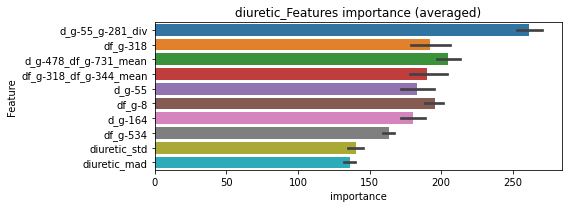

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162685	valid_1's binary_logloss: 0.00331121
[600]	training's binary_logloss: 0.000221011	valid_1's binary_logloss: 0.00130496


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000185286	valid_1's binary_logloss: 0.00123488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016309	valid_1's binary_logloss: 0.00288825
[600]	training's binary_logloss: 0.000221073	valid_1's binary_logloss: 0.000644405


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000186811	valid_1's binary_logloss: 0.000581065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016347	valid_1's binary_logloss: 0.00200265
[600]	training's binary_logloss: 0.00022063	valid_1's binary_logloss: 0.000317009


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000184426	valid_1's binary_logloss: 0.000268689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161793	valid_1's binary_logloss: 0.00268275
[600]	training's binary_logloss: 0.000219703	valid_1's binary_logloss: 0.000707081


diuretic logloss: 0.0006834618344311112


Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000185702	valid_1's binary_logloss: 0.000647681
neg labels: 3289 → selected neg labels: 3280


dna_alkylating_agent, len(trt): 48, len(othr): 3280, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124755	valid_1's binary_logloss: 0.0440506
[600]	training's binary_logloss: 0.00155812	valid_1's binary_logloss: 0.0178959
[900]	training's binary_logloss: 0.000654612	valid_1's binary_logloss: 0.0139966
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000573393	valid_1's binary_logloss: 0.0136273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126716	valid_1's binary_logloss: 0.0492947
[600]	training's binary_logloss: 0.00154572	valid_1's binary_logloss: 0.0277786
[900]	training's binary_logloss: 0.000645729	valid_1's binary_logloss: 0.0251032
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000645729	valid_1's binary_logloss: 0.0251032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123404	valid_1's binary_logloss: 0.0333328
[600]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0105370, Threshold: 0.0749526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.05247, conf_1:0.09744
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0749526
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_2: 0.1249526
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_3: 0.1749526
threshold: 0.1749526, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010461	valid_1's binary_logloss: 0.0446195
[600]	training's binary_logloss: 0.00129122	valid_1's binary_logloss: 0.0225195
[900]	training's binary_logloss: 0.000573786	valid_1's binary_logloss: 0.0191669
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000553753	valid_1's binary_logloss: 0.0191038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111776	valid_1's binary_logloss: 0.0384386
[600]	training's binary_logloss: 0.00134661	valid_1's binary_logloss: 0.0196606
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000739098	valid_1's binary_logloss: 0.0172674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109211	valid_1's binary_logloss: 0.0341246
[600]	training's binary_logloss: 0.0013254	valid_1's binary_logloss: 0.0133664
Early stopping, best iteratio

2 / 3 AUC score:1.000
y_Threshold: 0.0863826, Threshold: 0.1749526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0195881 Vs.target_rate: 0.00202, Num_p_label: 78.0, conf_0:0.13996, conf_1:0.20994
Num_p_label: 78.0, Expected: 8.0, Adj_threshold_1: 0.1749526
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_2: 0.2249526
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_3: 0.2749526
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_4: 0.3249526
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_5: 0.3749526
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_6: 0.4249526
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_7: 0.4749526
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.5249526
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_9: 0.5749526
threshold: 0.5749526, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 643.0/3778, y_label_rate: 0.1701959
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00940081	valid_1's binary_logloss: 0.0395131
[600]	training's binary_logloss: 0.00119764	valid_1's binary_logloss: 0.020105
[900]	training's binary_logloss: 0.000541821	valid_1's binary_logloss: 0.0177213
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000566259	valid_1's binary_logloss: 0.0176926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100299	valid_1's binary_logloss: 0.0254419
[600]	training's binary_logloss: 0.00125639	valid_1's binary_logloss: 0.00996334
[900]	training's binary_logloss: 0.000561032	valid_1's binary_logloss: 0.00816161
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.00055175	valid_1's binary_logloss: 0.00810696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00990523	valid_1's binary_logloss: 0.0306906
[600]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.1656921, Threshold: 0.5749526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 637.0/3766
p_label_rate: 0.0067805 Vs.target_rate: 0.00202, Num_p_label: 27.0, conf_0:0.50000, conf_1:0.63245
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_1: 0.5749526
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.6249526
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_3: 0.6749526
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_4: 0.7249526
threshold: 0.7249526, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 637.0/3766, y_label_rate: 0.1691450


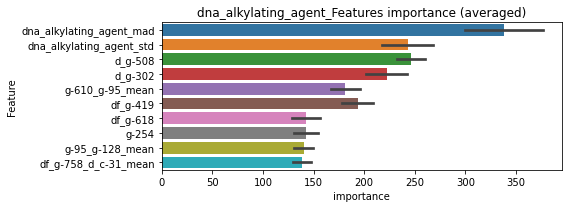

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00989405	valid_1's binary_logloss: 0.027426
[600]	training's binary_logloss: 0.0012449	valid_1's binary_logloss: 0.00874608
[900]	training's binary_logloss: 0.000557336	valid_1's binary_logloss: 0.00655656
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000509232	valid_1's binary_logloss: 0.00635998


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00948071	valid_1's binary_logloss: 0.0523447
[600]	training's binary_logloss: 0.00116666	valid_1's binary_logloss: 0.0371888
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000990837	valid_1's binary_logloss: 0.036619


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0095194	valid_1's binary_logloss: 0.036529
[600]	training's binary_logloss: 0.0011949	valid_1's binary_logloss: 0.0198388
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000667847	valid_1's binary_logloss: 0.018515


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00916023	valid_1's binary_logloss: 0.0300123
[600]	training's binary_logloss: 0.00117412	valid_1's binary_logloss: 0.0132829
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000703997	valid_1's binary_logloss: 0.0116026


dna_alkylating_agent logloss: 0.018280258720001382


neg labels: 3289 → selected neg labels: 3248


dna_inhibitor, len(trt): 402, len(othr): 3248, target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0901777	valid_1's binary_logloss: 0.363683
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.100768	valid_1's binary_logloss: 0.362204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0929607	valid_1's binary_logloss: 0.384407
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0988943	valid_1's binary_logloss: 0.383565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0967852	valid_1's binary_logloss: 0.334515
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.0655328	valid_1's binary_logloss: 0.332142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0987312	valid_1's binary_logloss: 0.338338


1 / 3 AUC score:0.774
y_Threshold: 0.1365230, Threshold: 0.5398042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 689 → Positive_corect_labels: 370/3208
p_label_rate: 0.0100452 Vs.target_rate: 0.01688, Num_p_label: 40.0, conf_0:0.37786, conf_1:0.70175
Num_p_label: 40.0, Expected: 67.2, Adj_threshold_1: 0.5398042
Num_p_label: 51.0, Expected: 67.2, Adj_threshold_2: 0.5098042
threshold: 0.5098042, positive_p_label: 51.0/3982, p_label_rate: 0.0128076


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.095041	valid_1's binary_logloss: 0.337748


positive_y_label: 370.0/3208, y_label_rate: 0.1153367
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225836	valid_1's binary_logloss: 0.178421
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.0169892	valid_1's binary_logloss: 0.176185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221276	valid_1's binary_logloss: 0.195637
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.0227166	valid_1's binary_logloss: 0.195311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233923	valid_1's binary_logloss: 0.142939
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.0112314	valid_1's binary_logloss: 0.139046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216037	valid_1's binary_logloss: 0.170569


2 / 3 AUC score:0.953
y_Threshold: 0.0801270, Threshold: 0.5098042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 285.0/3038
p_label_rate: 0.0376695 Vs.target_rate: 0.01688, Num_p_label: 150.0, conf_0:0.40784, conf_1:0.61176
Num_p_label: 150.0, Expected: 67.2, Adj_threshold_1: 0.5098042
Num_p_label: 132.0, Expected: 67.2, Adj_threshold_2: 0.5598042
Num_p_label: 117.0, Expected: 67.2, Adj_threshold_3: 0.6098042
Num_p_label: 109.0, Expected: 67.2, Adj_threshold_4: 0.6598042
Num_p_label: 86.0, Expected: 67.2, Adj_threshold_5: 0.7098042
threshold: 0.7098042, positive_p_label: 86.0/3982, p_label_rate: 0.0215972


Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0210636	valid_1's binary_logloss: 0.169794


positive_y_label: 285.0/3038, y_label_rate: 0.0938117
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100962	valid_1's binary_logloss: 0.107783
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.00850929	valid_1's binary_logloss: 0.106808
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.0162198	valid_1's binary_logloss: 0.121518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.017699	valid_1's binary_logloss: 0.145088
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.943
y_Threshold: 0.0677435, Threshold: 0.7098042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 229.0/2926
p_label_rate: 0.0419387 Vs.target_rate: 0.01688, Num_p_label: 167.0, conf_0:0.50000, conf_1:0.78078
Num_p_label: 167.0, Expected: 67.2, Adj_threshold_1: 0.7098042
Num_p_label: 148.0, Expected: 67.2, Adj_threshold_2: 0.7598042
threshold: 0.7598042, positive_p_label: 148.0/3982, p_label_rate: 0.0371673


Early stopping, best iteration is:
[225]	training's binary_logloss: 0.0187646	valid_1's binary_logloss: 0.132755


positive_y_label: 229.0/2926, y_label_rate: 0.0782638


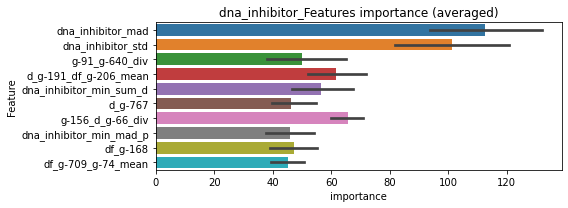

len(train_index) : 2194
len(valid_index) : 732
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505797	valid_1's binary_logloss: 0.0754631
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00538015	valid_1's binary_logloss: 0.0752786


len(train_index) : 2194
len(valid_index) : 732
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00489218	valid_1's binary_logloss: 0.0799226


len(train_index) : 2195
len(valid_index) : 731
================================= fold 3/4 dna_inhibitor=================================


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00189748	valid_1's binary_logloss: 0.0775092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503352	valid_1's binary_logloss: 0.0637317
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.00542839	valid_1's binary_logloss: 0.0635497


len(train_index) : 2195
len(valid_index) : 731
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538028	valid_1's binary_logloss: 0.048587


dna_inhibitor logloss: 0.06481038529034588


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00115684	valid_1's binary_logloss: 0.0428723
neg labels: 3289 → selected neg labels: 3272


dopamine_receptor_agonist, len(trt): 121, len(othr): 3272, target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0261957	valid_1's binary_logloss: 0.147428
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00565468	valid_1's binary_logloss: 0.130951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285781	valid_1's binary_logloss: 0.117575
[600]	training's binary_logloss: 0.00443457	valid_1's binary_logloss: 0.0913725
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00327623	valid_1's binary_logloss: 0.0900164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0283446	valid_1's binary_logloss: 0.116706
[600]	training's binary_logloss: 0.00450669	valid_1's binary_logloss: 0.0911635
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00375866	valid_1's binary_logloss: 0.0902258
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.982
y_Threshold: 0.0317718, Threshold: 0.1460228, pos_neg_ratio: 0.8000000
Remove_noisy_data: 202 → Positive_corect_labels: 619/3724
p_label_rate: 0.0100452 Vs.target_rate: 0.00508, Num_p_label: 40.0, conf_0:0.10222, conf_1:0.18983
Num_p_label: 40.0, Expected: 20.2, Adj_threshold_1: 0.1460228
Num_p_label: 30.0, Expected: 20.2, Adj_threshold_2: 0.1960228
threshold: 0.1960228, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 619.0/3724, y_label_rate: 0.1662191
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190961	valid_1's binary_logloss: 0.0833495
[600]	training's binary_logloss: 0.00282401	valid_1's binary_logloss: 0.0533645
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.00130285	valid_1's binary_logloss: 0.0488452
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182017	valid_1's binary_logloss: 0.0916227
[600]	training's binary_logloss: 0.00268258	valid_1's binary_logloss: 0.076245
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.003013	valid_1's binary_logloss: 0.0760747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018564	valid_1's binary_logloss: 0.0969355
[600]	training's binary_logloss: 0.00276717	valid_1's binary_logloss: 0.0817704
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00248339	valid_1's binary_logloss: 0.0815352

2 / 3 AUC score:0.994
y_Threshold: 0.0655353, Threshold: 0.1960228, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 590.0/3666
p_label_rate: 0.0296334 Vs.target_rate: 0.00508, Num_p_label: 118.0, conf_0:0.15682, conf_1:0.23523
Num_p_label: 118.0, Expected: 20.2, Adj_threshold_1: 0.1960228
Num_p_label: 100.0, Expected: 20.2, Adj_threshold_2: 0.2460228
Num_p_label: 90.0, Expected: 20.2, Adj_threshold_3: 0.2960228
Num_p_label: 79.0, Expected: 20.2, Adj_threshold_4: 0.3460228
Num_p_label: 67.0, Expected: 20.2, Adj_threshold_5: 0.3960228
Num_p_label: 57.0, Expected: 20.2, Adj_threshold_6: 0.4460228
Num_p_label: 49.0, Expected: 20.2, Adj_threshold_7: 0.4960228
Num_p_label: 42.0, Expected: 20.2, Adj_threshold_8: 0.5460228
Num_p_label: 34.0, Expected: 20.2, Adj_threshold_9: 0.5960228
Num_p_label: 31.0, Expected: 20.2, Adj_threshold_10: 0.6460228
threshold: 0.6960228, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 590.0/3666, y_label_rate: 0.1609

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155161	valid_1's binary_logloss: 0.0919463
[600]	training's binary_logloss: 0.00219524	valid_1's binary_logloss: 0.0809878
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00245543	valid_1's binary_logloss: 0.0803119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146209	valid_1's binary_logloss: 0.084791
[600]	training's binary_logloss: 0.00215715	valid_1's binary_logloss: 0.0688363
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00227836	valid_1's binary_logloss: 0.0684616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160241	valid_1's binary_logloss: 0.0679236
[600]	training's binary_logloss: 0.00225823	valid_1's binary_logloss: 0.0416442
[900]	training's binary_logloss: 0.000953765	valid_1's binary_logloss: 0.0374803
Early stopping, best iteration

3 / 3 AUC score:0.996
y_Threshold: 0.0534325, Threshold: 0.6960228, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 569.0/3624
p_label_rate: 0.0145655 Vs.target_rate: 0.00508, Num_p_label: 58.0, conf_0:0.50000, conf_1:0.76563
Num_p_label: 58.0, Expected: 20.2, Adj_threshold_1: 0.6960228
Num_p_label: 52.0, Expected: 20.2, Adj_threshold_2: 0.7460228
Num_p_label: 42.0, Expected: 20.2, Adj_threshold_3: 0.7960228
threshold: 0.7960228, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 569.0/3624, y_label_rate: 0.1570088


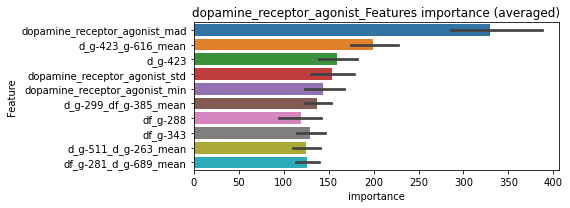

len(train_index) : 2718
len(valid_index) : 906
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126917	valid_1's binary_logloss: 0.083216
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00222865	valid_1's binary_logloss: 0.0732699


len(train_index) : 2718
len(valid_index) : 906
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013321	valid_1's binary_logloss: 0.0939274


len(train_index) : 2718
len(valid_index) : 906
================================= fold 3/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00407233	valid_1's binary_logloss: 0.0880509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136216	valid_1's binary_logloss: 0.0563609
[600]	training's binary_logloss: 0.00196493	valid_1's binary_logloss: 0.0371149
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.0010721	valid_1's binary_logloss: 0.034916


len(train_index) : 2718
len(valid_index) : 906
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134528	valid_1's binary_logloss: 0.0670781
[600]	training's binary_logloss: 0.00191116	valid_1's binary_logloss: 0.0471121
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000935118	valid_1's binary_logloss: 0.0440086


dopamine_receptor_agonist logloss: 0.06006135529534546


neg labels: 3289 → selected neg labels: 3231


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3231, target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.114623	valid_1's binary_logloss: 0.382223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.089329	valid_1's binary_logloss: 0.357012
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0771449	valid_1's binary_logloss: 0.355722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0924755	valid_1's binary_logloss: 0.355228
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.10011	valid_1's binary_logloss: 0.354078
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.743
y_Threshold: 0.1418133, Threshold: 0.4952130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 768 → Positive_corect_labels: 327/3109
p_label_rate: 0.0100452 Vs.target_rate: 0.01780, Num_p_label: 40.0, conf_0:0.34665, conf_1:0.64378
Num_p_label: 40.0, Expected: 70.9, Adj_threshold_1: 0.4952130
Num_p_label: 51.0, Expected: 70.9, Adj_threshold_2: 0.4652130
threshold: 0.4652130, positive_p_label: 51.0/3982, p_label_rate: 0.0128076


Early stopping, best iteration is:
[195]	training's binary_logloss: 0.135947	valid_1's binary_logloss: 0.384393


positive_y_label: 327.0/3109, y_label_rate: 0.1051785
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0188069	valid_1's binary_logloss: 0.157599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155848	valid_1's binary_logloss: 0.122642
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00890399	valid_1's binary_logloss: 0.119626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.0236517	valid_1's binary_logloss: 0.173439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145235	valid_1's binary_logloss: 0.122019


2 / 3 AUC score:0.959
y_Threshold: 0.0880747, Threshold: 0.4652130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 254.0/2963
p_label_rate: 0.0567554 Vs.target_rate: 0.01780, Num_p_label: 226.0, conf_0:0.37217, conf_1:0.55826


Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00626538	valid_1's binary_logloss: 0.119759


Num_p_label: 226.0, Expected: 70.9, Adj_threshold_1: 0.4652130
Num_p_label: 216.0, Expected: 70.9, Adj_threshold_2: 0.5152130
Num_p_label: 207.0, Expected: 70.9, Adj_threshold_3: 0.5652130
Num_p_label: 190.0, Expected: 70.9, Adj_threshold_4: 0.6152130
Num_p_label: 175.0, Expected: 70.9, Adj_threshold_5: 0.6652130
Num_p_label: 160.0, Expected: 70.9, Adj_threshold_6: 0.7152130
Num_p_label: 136.0, Expected: 70.9, Adj_threshold_7: 0.7652130
threshold: 0.7652130, positive_p_label: 136.0/3982, p_label_rate: 0.0341537
positive_y_label: 254.0/2963, y_label_rate: 0.0857239
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642669	valid_1's binary_logloss: 0.0759869
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00357213	valid_1's binary_logloss: 0.0744171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671604	valid_1's binary_logloss: 0.047665
[600]	training's binary_logloss: 0.00119493	valid_1's binary_logloss: 0.0352342
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00115287	valid_1's binary_logloss: 0.0349147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629974	valid_1's binary_logloss: 0.102732
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00796685	valid_1's binary_logloss: 0.10213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00678351	valid_1's binary_logloss: 0.0586
Early stopping, be

3 / 3 AUC score:0.987
y_Threshold: 0.0743751, Threshold: 0.7652130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 231.0/2917
p_label_rate: 0.0567554 Vs.target_rate: 0.01780, Num_p_label: 226.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 226.0, Expected: 70.9, Adj_threshold_1: 0.7652130
threshold: 0.7652130, positive_p_label: 226.0/3982, p_label_rate: 0.0567554
positive_y_label: 231.0/2917, y_label_rate: 0.0791909


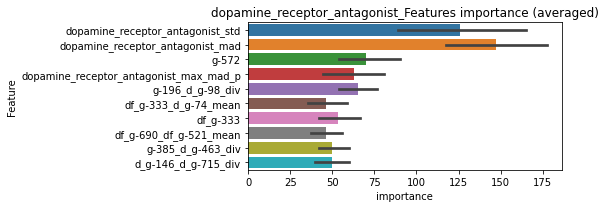

len(train_index) : 2187
len(valid_index) : 730
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00460637	valid_1's binary_logloss: 0.0668073


len(train_index) : 2188
len(valid_index) : 729
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00240071	valid_1's binary_logloss: 0.0647495
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470298	valid_1's binary_logloss: 0.0520987


len(train_index) : 2188
len(valid_index) : 729
================================= fold 3/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00239442	valid_1's binary_logloss: 0.0506349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047252	valid_1's binary_logloss: 0.0558837


len(train_index) : 2188
len(valid_index) : 729
================================= fold 4/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00301295	valid_1's binary_logloss: 0.0536016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00504015	valid_1's binary_logloss: 0.0510907


dopamine_receptor_antagonist logloss: 0.05482146663774238


Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00275213	valid_1's binary_logloss: 0.0502863
neg labels: 3289 → selected neg labels: 3242


egfr_inhibitor, len(trt): 336, len(othr): 3242, target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.078486	valid_1's binary_logloss: 0.315496
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.0393625	valid_1's binary_logloss: 0.309479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0803344	valid_1's binary_logloss: 0.314923
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.0480998	valid_1's binary_logloss: 0.311487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0806428	valid_1's binary_logloss: 0.316625
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.0653613	valid_1's binary_logloss: 0.314553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0836028	valid_1's binary_logloss: 0.324977


1 / 3 AUC score:0.824
y_Threshold: 0.1163547, Threshold: 0.7048201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 572 → Positive_corect_labels: 427/3318
p_label_rate: 0.0100452 Vs.target_rate: 0.01411, Num_p_label: 40.0, conf_0:0.49337, conf_1:0.80000
threshold: 0.7048201, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0775635	valid_1's binary_logloss: 0.324414


positive_y_label: 427.0/3318, y_label_rate: 0.1286920
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237769	valid_1's binary_logloss: 0.161363
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.00965818	valid_1's binary_logloss: 0.154409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239984	valid_1's binary_logloss: 0.126654
[600]	training's binary_logloss: 0.00390561	valid_1's binary_logloss: 0.109201
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00367817	valid_1's binary_logloss: 0.108879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232718	valid_1's binary_logloss: 0.152482
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00903374	valid_1's binary_logloss: 0.148923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023239	valid_1's binary_logloss: 0.143595
Early stopping, best ite

2 / 3 AUC score:0.972
y_Threshold: 0.0847637, Threshold: 0.7048201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 361.0/3186
p_label_rate: 0.0301356 Vs.target_rate: 0.01411, Num_p_label: 120.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 120.0, Expected: 56.2, Adj_threshold_1: 0.7048201
Num_p_label: 107.0, Expected: 56.2, Adj_threshold_2: 0.7548201
threshold: 0.7548201, positive_p_label: 107.0/3982, p_label_rate: 0.0268709
positive_y_label: 361.0/3186, y_label_rate: 0.1133082
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140563	valid_1's binary_logloss: 0.0916835
[600]	training's binary_logloss: 0.00223072	valid_1's binary_logloss: 0.0811135
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00207458	valid_1's binary_logloss: 0.0808393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013922	valid_1's binary_logloss: 0.102585
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00423417	valid_1's binary_logloss: 0.0927191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140017	valid_1's binary_logloss: 0.0820369
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00269408	valid_1's binary_logloss: 0.0669226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132659	valid_1's binary_logloss: 0.118364


3 / 3 AUC score:0.982
y_Threshold: 0.0844034, Threshold: 0.7548201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 325.0/3114
p_label_rate: 0.0452034 Vs.target_rate: 0.01411, Num_p_label: 180.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 180.0, Expected: 56.2, Adj_threshold_1: 0.7548201
threshold: 0.7548201, positive_p_label: 180.0/3982, p_label_rate: 0.0452034


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00988887	valid_1's binary_logloss: 0.116887


positive_y_label: 325.0/3114, y_label_rate: 0.1043674


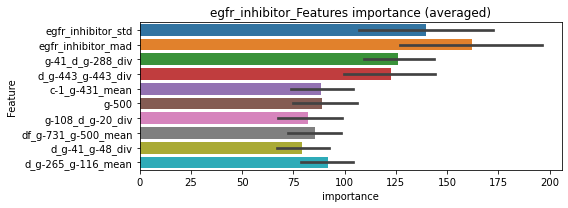

len(train_index) : 2335
len(valid_index) : 779
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00909337	valid_1's binary_logloss: 0.0720097
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00222365	valid_1's binary_logloss: 0.0650066


len(train_index) : 2335
len(valid_index) : 779
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00935481	valid_1's binary_logloss: 0.0960469


len(train_index) : 2336
len(valid_index) : 778
================================= fold 3/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00583024	valid_1's binary_logloss: 0.0936879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0095933	valid_1's binary_logloss: 0.08364
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00250992	valid_1's binary_logloss: 0.0739609


len(train_index) : 2336
len(valid_index) : 778
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00950879	valid_1's binary_logloss: 0.0506888
[600]	training's binary_logloss: 0.00151875	valid_1's binary_logloss: 0.0368557
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00156272	valid_1's binary_logloss: 0.0367747


egfr_inhibitor logloss: 0.06736521462743164


neg labels: 3289 → selected neg labels: 3284


elastase_inhibitor, len(trt): 12, len(othr): 3284, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276723	valid_1's binary_logloss: 0.00549933
[600]	training's binary_logloss: 0.000367783	valid_1's binary_logloss: 0.00131603
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000270913	valid_1's binary_logloss: 0.00107477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296268	valid_1's binary_logloss: 0.00517748
[600]	training's binary_logloss: 0.000377064	valid_1's binary_logloss: 0.00107032
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000271031	valid_1's binary_logloss: 0.000847859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287807	valid_1's binary_logloss: 0.00424226
[600]	training's binary_logloss: 0.000378679	valid_1's binary_logloss: 0.000719387
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000278892	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0012570, Threshold: 0.0053550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00375, conf_1:0.00696
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0053550
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0553550
threshold: 0.0553550, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260273	valid_1's binary_logloss: 0.00537235
[600]	training's binary_logloss: 0.000344206	valid_1's binary_logloss: 0.00162738
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00025906	valid_1's binary_logloss: 0.00146155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272016	valid_1's binary_logloss: 0.00465672
[600]	training's binary_logloss: 0.000352704	valid_1's binary_logloss: 0.00103959
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000256896	valid_1's binary_logloss: 0.000858796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269637	valid_1's binary_logloss: 0.00362865
[600]	training's binary_logloss: 0.00035671	valid_1's binary_logloss: 0.000559185
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000258871	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0949649, Threshold: 0.0553550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00050, Num_p_label: 7.0, conf_0:0.04428, conf_1:0.06643
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.0553550
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.1053550
threshold: 0.1053550, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260273	valid_1's binary_logloss: 0.00537235
[600]	training's binary_logloss: 0.000344206	valid_1's binary_logloss: 0.00162738
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00025906	valid_1's binary_logloss: 0.00146155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272016	valid_1's binary_logloss: 0.00465672
[600]	training's binary_logloss: 0.000352704	valid_1's binary_logloss: 0.00103959
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000256896	valid_1's binary_logloss: 0.000858796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269637	valid_1's binary_logloss: 0.00362865
[600]	training's binary_logloss: 0.00035671	valid_1's binary_logloss: 0.000559185
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000258871	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0949649, Threshold: 0.1053550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.09482, conf_1:0.11589
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.1053550
threshold: 0.1053550, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


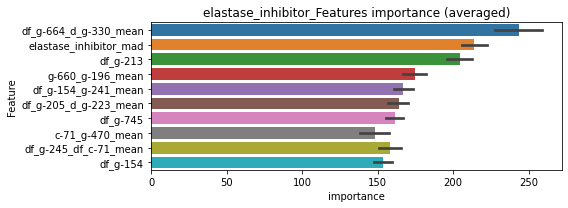

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263093	valid_1's binary_logloss: 0.00571745
[600]	training's binary_logloss: 0.000342217	valid_1's binary_logloss: 0.00167907
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000259777	valid_1's binary_logloss: 0.0014947


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268085	valid_1's binary_logloss: 0.00436933
[600]	training's binary_logloss: 0.000348395	valid_1's binary_logloss: 0.000888117
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000252217	valid_1's binary_logloss: 0.00072584


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268614	valid_1's binary_logloss: 0.00354112
[600]	training's binary_logloss: 0.000352535	valid_1's binary_logloss: 0.000533118
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000256309	valid_1's binary_logloss: 0.000403806


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265702	valid_1's binary_logloss: 0.00397377
[600]	training's binary_logloss: 0.000349782	valid_1's binary_logloss: 0.000638158
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000255952	valid_1's binary_logloss: 0.000489024


elastase_inhibitor logloss: 0.0007789819823432474


neg labels: 3289 → selected neg labels: 3287


erbb2_inhibitor, len(trt): 20, len(othr): 3287, target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541203	valid_1's binary_logloss: 0.0132748
[600]	training's binary_logloss: 0.000658618	valid_1's binary_logloss: 0.00345253
[900]	training's binary_logloss: 0.000372358	valid_1's binary_logloss: 0.00256742
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000372358	valid_1's binary_logloss: 0.00256742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00549013	valid_1's binary_logloss: 0.0124272
[600]	training's binary_logloss: 0.000676769	valid_1's binary_logloss: 0.00330813
[900]	training's binary_logloss: 0.000374802	valid_1's binary_logloss: 0.00247852
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000374802	valid_1's binary_logloss: 0.00247852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00526105	valid_1's binary_logloss: 0.0152191
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0028161, Threshold: 0.0174527, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00084, Num_p_label: 40.0, conf_0:0.01222, conf_1:0.02269
Num_p_label: 40.0, Expected: 3.3, Adj_threshold_1: 0.0174527
Num_p_label: 10.0, Expected: 3.3, Adj_threshold_2: 0.0674527
Num_p_label: 6.0, Expected: 3.3, Adj_threshold_3: 0.1174527
threshold: 0.1174527, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471581	valid_1's binary_logloss: 0.011008
[600]	training's binary_logloss: 0.000597694	valid_1's binary_logloss: 0.00245597
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000365252	valid_1's binary_logloss: 0.00184098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048217	valid_1's binary_logloss: 0.0109892
[600]	training's binary_logloss: 0.000596122	valid_1's binary_logloss: 0.00270105
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000361953	valid_1's binary_logloss: 0.00200233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487367	valid_1's binary_logloss: 0.00952584
[600]	training's binary_logloss: 0.000604695	valid_1's binary_logloss: 0.00184415
[900]	training's binary_logloss: 0.000359332	valid_1's binary_logloss: 0.00125094
Early stopping, 

2 / 3 AUC score:1.000
y_Threshold: 0.1428658, Threshold: 0.1174527, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0092918 Vs.target_rate: 0.00084, Num_p_label: 37.0, conf_0:0.09396, conf_1:0.14094
Num_p_label: 37.0, Expected: 3.3, Adj_threshold_1: 0.1174527
Num_p_label: 28.0, Expected: 3.3, Adj_threshold_2: 0.1674527
Num_p_label: 24.0, Expected: 3.3, Adj_threshold_3: 0.2174527
Num_p_label: 21.0, Expected: 3.3, Adj_threshold_4: 0.2674527
Num_p_label: 17.0, Expected: 3.3, Adj_threshold_5: 0.3174527
Num_p_label: 14.0, Expected: 3.3, Adj_threshold_6: 0.3674527
Num_p_label: 11.0, Expected: 3.3, Adj_threshold_7: 0.4174527
Num_p_label: 9.0, Expected: 3.3, Adj_threshold_8: 0.4674527
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_9: 0.5174527
threshold: 0.5174527, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471581	valid_1's binary_logloss: 0.011008
[600]	training's binary_logloss: 0.000597694	valid_1's binary_logloss: 0.00245597
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000365252	valid_1's binary_logloss: 0.00184098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048217	valid_1's binary_logloss: 0.0109892
[600]	training's binary_logloss: 0.000596122	valid_1's binary_logloss: 0.00270105
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000361953	valid_1's binary_logloss: 0.00200233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487367	valid_1's binary_logloss: 0.00952584
[600]	training's binary_logloss: 0.000604695	valid_1's binary_logloss: 0.00184415
[900]	training's binary_logloss: 0.000359332	valid_1's binary_logloss: 0.00125094
Early stopping, 

3 / 3 AUC score:1.000
y_Threshold: 0.1428658, Threshold: 0.5174527, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00084, Num_p_label: 8.0, conf_0:0.46571, conf_1:0.56920
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_1: 0.5174527
threshold: 0.5174527, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


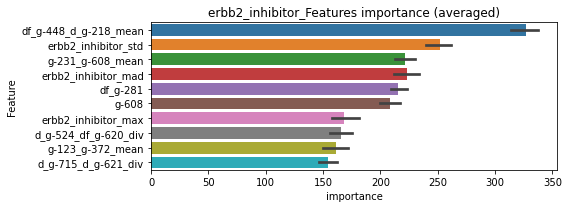

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471173	valid_1's binary_logloss: 0.0107765
[600]	training's binary_logloss: 0.000593063	valid_1's binary_logloss: 0.00232622
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000362969	valid_1's binary_logloss: 0.0017053


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048088	valid_1's binary_logloss: 0.0109872
[600]	training's binary_logloss: 0.000594307	valid_1's binary_logloss: 0.00265138
[900]	training's binary_logloss: 0.000354196	valid_1's binary_logloss: 0.00199357
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000356341	valid_1's binary_logloss: 0.00198899


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0049051	valid_1's binary_logloss: 0.00905231
[600]	training's binary_logloss: 0.000610792	valid_1's binary_logloss: 0.00174442
[900]	training's binary_logloss: 0.000366047	valid_1's binary_logloss: 0.00119913
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000364094	valid_1's binary_logloss: 0.00119288


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474604	valid_1's binary_logloss: 0.00924113
[600]	training's binary_logloss: 0.000593193	valid_1's binary_logloss: 0.00195295
[900]	training's binary_logloss: 0.000352466	valid_1's binary_logloss: 0.00141532
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000352534	valid_1's binary_logloss: 0.00141521


erbb2_inhibitor logloss: 0.0015765802042545525


neg labels: 3289 → selected neg labels: 3270


estrogen_receptor_agonist, len(trt): 158, len(othr): 3270, target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0355625	valid_1's binary_logloss: 0.225589
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0247611	valid_1's binary_logloss: 0.223407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.034244	valid_1's binary_logloss: 0.16837
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00872041	valid_1's binary_logloss: 0.152664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0405653	valid_1's binary_logloss: 0.142846
[600]	training's binary_logloss: 0.00714677	valid_1's binary_logloss: 0.113694
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00446214	valid_1's binary_logloss: 0.111725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0376321	valid_1's binary_logloss: 0.187058
Early stopping, best itera

1 / 3 AUC score:0.949
y_Threshold: 0.0509810, Threshold: 0.3001547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 301 → Positive_corect_labels: 569/3623
p_label_rate: 0.0100452 Vs.target_rate: 0.00663, Num_p_label: 40.0, conf_0:0.21011, conf_1:0.39020
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_1: 0.3001547
Num_p_label: 29.0, Expected: 26.4, Adj_threshold_2: 0.3501547
threshold: 0.3501547, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 569.0/3623, y_label_rate: 0.1570522
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191889	valid_1's binary_logloss: 0.134711
[600]	training's binary_logloss: 0.00288496	valid_1's binary_logloss: 0.119751
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.0031699	valid_1's binary_logloss: 0.119132
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202661	valid_1's binary_logloss: 0.109487
[600]	training's binary_logloss: 0.00304946	valid_1's binary_logloss: 0.0926854
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.0023057	valid_1's binary_logloss: 0.0911542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225272	valid_1's binary_logloss: 0.091274
[600]	training's binary_logloss: 0.00337542	valid_1's binary_logloss: 0.0713355
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00282292	valid_1's binary_logloss: 0.070097
Tra

2 / 3 AUC score:0.989
y_Threshold: 0.0885041, Threshold: 0.3501547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 520.0/3525
p_label_rate: 0.0266198 Vs.target_rate: 0.00663, Num_p_label: 106.0, conf_0:0.28012, conf_1:0.42019
Num_p_label: 106.0, Expected: 26.4, Adj_threshold_1: 0.3501547
Num_p_label: 92.0, Expected: 26.4, Adj_threshold_2: 0.4001547
Num_p_label: 79.0, Expected: 26.4, Adj_threshold_3: 0.4501547
Num_p_label: 67.0, Expected: 26.4, Adj_threshold_4: 0.5001547
Num_p_label: 54.0, Expected: 26.4, Adj_threshold_5: 0.5501547
Num_p_label: 41.0, Expected: 26.4, Adj_threshold_6: 0.6001547
Num_p_label: 34.0, Expected: 26.4, Adj_threshold_7: 0.6501547
threshold: 0.6501547, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 520.0/3525, y_label_rate: 0.1475177
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136429	valid_1's binary_logloss: 0.0845694
[600]	training's binary_logloss: 0.00202948	valid_1's binary_logloss: 0.0693866
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00182842	valid_1's binary_logloss: 0.0686368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142937	valid_1's binary_logloss: 0.0925096
[600]	training's binary_logloss: 0.00214412	valid_1's binary_logloss: 0.080419
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00194938	valid_1's binary_logloss: 0.0801617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135436	valid_1's binary_logloss: 0.0987935
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00354423	valid_1's binary_logloss: 0.0874146
Training until validation scores don't improve for 30 rounds
[300]	training'

3 / 3 AUC score:0.990
y_Threshold: 0.0887770, Threshold: 0.6501547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 490.0/3465
p_label_rate: 0.0226017 Vs.target_rate: 0.00663, Num_p_label: 90.0, conf_0:0.50000, conf_1:0.71517
Num_p_label: 90.0, Expected: 26.4, Adj_threshold_1: 0.6501547
Num_p_label: 73.0, Expected: 26.4, Adj_threshold_2: 0.7001547
Num_p_label: 54.0, Expected: 26.4, Adj_threshold_3: 0.7501547
threshold: 0.7501547, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 490.0/3465, y_label_rate: 0.1414141


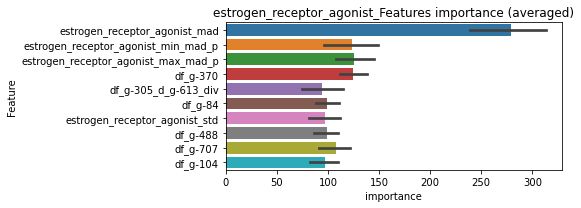

len(train_index) : 2598
len(valid_index) : 867
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106594	valid_1's binary_logloss: 0.0746133
[600]	training's binary_logloss: 0.00160423	valid_1's binary_logloss: 0.0661368
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00159664	valid_1's binary_logloss: 0.0660449


len(train_index) : 2599
len(valid_index) : 866
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00991022	valid_1's binary_logloss: 0.068712
[600]	training's binary_logloss: 0.00155968	valid_1's binary_logloss: 0.0573884
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00150699	valid_1's binary_logloss: 0.0570807


len(train_index) : 2599
len(valid_index) : 866
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108013	valid_1's binary_logloss: 0.055364
[600]	training's binary_logloss: 0.00164424	valid_1's binary_logloss: 0.0387424
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.0014683	valid_1's binary_logloss: 0.0381173


len(train_index) : 2599
len(valid_index) : 866
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010927	valid_1's binary_logloss: 0.0585222
[600]	training's binary_logloss: 0.00168472	valid_1's binary_logloss: 0.0364936
[900]	training's binary_logloss: 0.000796571	valid_1's binary_logloss: 0.0311753
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.000676778	valid_1's binary_logloss: 0.0302316


estrogen_receptor_agonist logloss: 0.04787567303301932


neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121039	valid_1's binary_logloss: 0.0428009
[600]	training's binary_logloss: 0.00148902	valid_1's binary_logloss: 0.0196141
[900]	training's binary_logloss: 0.000658636	valid_1's binary_logloss: 0.0162998
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000639736	valid_1's binary_logloss: 0.0162519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01255	valid_1's binary_logloss: 0.0536136
[600]	training's binary_logloss: 0.00152345	valid_1's binary_logloss: 0.0365967
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00167874	valid_1's binary_logloss: 0.0363615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012409	valid_1's binary_logloss: 0.0350141
[600]	training's binary_logloss: 0.00156573	valid_1's binary_logloss: 0.0138283
[900]	training's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0102992, Threshold: 0.2905197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.20336, conf_1:0.37768
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.2905197
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.3405197
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_3: 0.3905197
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_4: 0.4405197
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_5: 0.4905197
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_6: 0.5405197
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_7: 0.5905197
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_8: 0.6405197
threshold: 0.6405197, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109553	valid_1's binary_logloss: 0.0317999
[600]	training's binary_logloss: 0.00137268	valid_1's binary_logloss: 0.0111857
[900]	training's binary_logloss: 0.000627339	valid_1's binary_logloss: 0.00821496
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.00056384	valid_1's binary_logloss: 0.00798496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112527	valid_1's binary_logloss: 0.0328751
[600]	training's binary_logloss: 0.00139115	valid_1's binary_logloss: 0.0127912
[900]	training's binary_logloss: 0.000625742	valid_1's binary_logloss: 0.00986816
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.000554397	valid_1's binary_logloss: 0.0095147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107342	valid_1's binary_logloss: 0.0469025
[600]	training's binar

2 / 3 AUC score:0.999
y_Threshold: 0.0571325, Threshold: 0.6405197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0110497 Vs.target_rate: 0.00202, Num_p_label: 44.0, conf_0:0.50000, conf_1:0.76862
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_1: 0.6405197
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_2: 0.6905197
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.7405197
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_4: 0.7905197
threshold: 0.7905197, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 648.0/3791, y_label_rate: 0.1709312
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107488	valid_1's binary_logloss: 0.0366922
[600]	training's binary_logloss: 0.00131573	valid_1's binary_logloss: 0.0165441
[900]	training's binary_logloss: 0.000605317	valid_1's binary_logloss: 0.0137408
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000587439	valid_1's binary_logloss: 0.013689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107325	valid_1's binary_logloss: 0.0340187
[600]	training's binary_logloss: 0.00130304	valid_1's binary_logloss: 0.0155176
[900]	training's binary_logloss: 0.000593604	valid_1's binary_logloss: 0.0123991
Early stopping, best iteration is:
[1091]	training's binary_logloss: 0.000525455	valid_1's binary_logloss: 0.0118868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105066	valid_1's binary_logloss: 0.0296611
[600]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0788267, Threshold: 0.7905197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3785
p_label_rate: 0.0087896 Vs.target_rate: 0.00202, Num_p_label: 35.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_1: 0.7905197
threshold: 0.7905197, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 645.0/3785, y_label_rate: 0.1704095


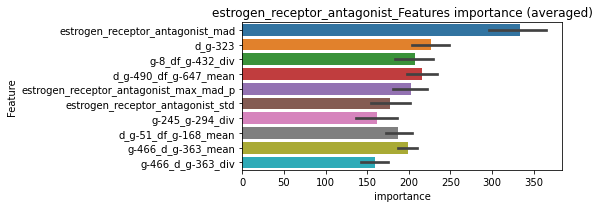

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104039	valid_1's binary_logloss: 0.0314957
[600]	training's binary_logloss: 0.00128335	valid_1's binary_logloss: 0.0120208
[900]	training's binary_logloss: 0.000590534	valid_1's binary_logloss: 0.00912827
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000565689	valid_1's binary_logloss: 0.00903674


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107254	valid_1's binary_logloss: 0.0409461
[600]	training's binary_logloss: 0.00129598	valid_1's binary_logloss: 0.0271628
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00135812	valid_1's binary_logloss: 0.0270318


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107253	valid_1's binary_logloss: 0.0274589
[600]	training's binary_logloss: 0.00131603	valid_1's binary_logloss: 0.00784123
[900]	training's binary_logloss: 0.000600465	valid_1's binary_logloss: 0.0054049
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.000521181	valid_1's binary_logloss: 0.0051015


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103014	valid_1's binary_logloss: 0.0373408
[600]	training's binary_logloss: 0.00126042	valid_1's binary_logloss: 0.0198855
[900]	training's binary_logloss: 0.000585713	valid_1's binary_logloss: 0.0177055
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000580144	valid_1's binary_logloss: 0.0176452


estrogen_receptor_antagonist logloss: 0.014705225595412742


neg labels: 3289 → selected neg labels: 3284


faah_inhibitor, len(trt): 36, len(othr): 3284, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00918917	valid_1's binary_logloss: 0.0348464
[600]	training's binary_logloss: 0.00115925	valid_1's binary_logloss: 0.0133529
[900]	training's binary_logloss: 0.000528537	valid_1's binary_logloss: 0.00984022
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000486626	valid_1's binary_logloss: 0.00965784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0092923	valid_1's binary_logloss: 0.0233685
[600]	training's binary_logloss: 0.00114692	valid_1's binary_logloss: 0.00758332
[900]	training's binary_logloss: 0.000536359	valid_1's binary_logloss: 0.00573712
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000501795	valid_1's binary_logloss: 0.00560425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0095549	valid_1's binary_logloss: 0.021721
[600]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0055513, Threshold: 0.0261044, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01827, conf_1:0.03394
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0261044
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.0761044
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.1261044
threshold: 0.1261044, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00829024	valid_1's binary_logloss: 0.0285406
[600]	training's binary_logloss: 0.00104778	valid_1's binary_logloss: 0.0118024
[900]	training's binary_logloss: 0.000496099	valid_1's binary_logloss: 0.00936937
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.00048448	valid_1's binary_logloss: 0.00926731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819192	valid_1's binary_logloss: 0.0273757
[600]	training's binary_logloss: 0.00103512	valid_1's binary_logloss: 0.00982793
[900]	training's binary_logloss: 0.000496717	valid_1's binary_logloss: 0.00723972
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000486592	valid_1's binary_logloss: 0.0071737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00855748	valid_1's binary_logloss: 0.0178472
[600]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0705514, Threshold: 0.1261044, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0107986 Vs.target_rate: 0.00151, Num_p_label: 43.0, conf_0:0.10088, conf_1:0.15133
Num_p_label: 43.0, Expected: 6.0, Adj_threshold_1: 0.1261044
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_2: 0.1761044
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_3: 0.2261044
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_4: 0.2761044
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_5: 0.3261044
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_6: 0.3761044
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_7: 0.4261044
threshold: 0.4261044, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0080573	valid_1's binary_logloss: 0.0232504
[600]	training's binary_logloss: 0.00101306	valid_1's binary_logloss: 0.0081515
[900]	training's binary_logloss: 0.000497077	valid_1's binary_logloss: 0.00608553
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000486876	valid_1's binary_logloss: 0.00603592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00832391	valid_1's binary_logloss: 0.0195456
[600]	training's binary_logloss: 0.00104479	valid_1's binary_logloss: 0.00517483
[900]	training's binary_logloss: 0.000501259	valid_1's binary_logloss: 0.00355196
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000489591	valid_1's binary_logloss: 0.00353526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00795608	valid_1's binary_logloss: 0.0269211
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1434167, Threshold: 0.4261044, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0040181 Vs.target_rate: 0.00151, Num_p_label: 16.0, conf_0:0.38349, conf_1:0.46871
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_1: 0.4261044
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.4761044
threshold: 0.4761044, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


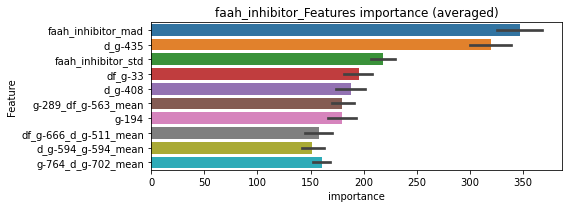

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00801009	valid_1's binary_logloss: 0.0232609
[600]	training's binary_logloss: 0.00100752	valid_1's binary_logloss: 0.00808517
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000513124	valid_1's binary_logloss: 0.00598361


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00832845	valid_1's binary_logloss: 0.0201107
[600]	training's binary_logloss: 0.00104292	valid_1's binary_logloss: 0.00506864
[900]	training's binary_logloss: 0.00049609	valid_1's binary_logloss: 0.00331514
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.00047502	valid_1's binary_logloss: 0.00328136


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00781268	valid_1's binary_logloss: 0.0298368
[600]	training's binary_logloss: 0.0010058	valid_1's binary_logloss: 0.0109309
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000526249	valid_1's binary_logloss: 0.0084947


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00814174	valid_1's binary_logloss: 0.025717
[600]	training's binary_logloss: 0.00102855	valid_1's binary_logloss: 0.00889571
[900]	training's binary_logloss: 0.000494719	valid_1's binary_logloss: 0.0069954
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000480462	valid_1's binary_logloss: 0.00690642


faah_inhibitor logloss: 0.006166521701064402


neg labels: 3289 → selected neg labels: 3288


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444045	valid_1's binary_logloss: 0.0145129
[600]	training's binary_logloss: 0.000560522	valid_1's binary_logloss: 0.00558867
[900]	training's binary_logloss: 0.00034495	valid_1's binary_logloss: 0.00481804
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000345025	valid_1's binary_logloss: 0.00481764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461029	valid_1's binary_logloss: 0.00934154
[600]	training's binary_logloss: 0.000572889	valid_1's binary_logloss: 0.00234148
[900]	training's binary_logloss: 0.000340483	valid_1's binary_logloss: 0.00172906
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000340918	valid_1's binary_logloss: 0.00172853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0046185	valid_1's binary_logloss: 0.00813841
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0023193, Threshold: 0.0135029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00945, conf_1:0.01755
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0135029
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0635029
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1135029
threshold: 0.1135029, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409762	valid_1's binary_logloss: 0.010357
[600]	training's binary_logloss: 0.000513595	valid_1's binary_logloss: 0.00327452
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000331136	valid_1's binary_logloss: 0.00273243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00404291	valid_1's binary_logloss: 0.00822884
[600]	training's binary_logloss: 0.000512339	valid_1's binary_logloss: 0.00177923
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000327157	valid_1's binary_logloss: 0.00135487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424177	valid_1's binary_logloss: 0.00678921
[600]	training's binary_logloss: 0.000526992	valid_1's binary_logloss: 0.00110729
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000327625	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0723285, Threshold: 0.1135029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0072828 Vs.target_rate: 0.00076, Num_p_label: 29.0, conf_0:0.09080, conf_1:0.13620
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_1: 0.1135029
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.1635029
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_3: 0.2135029
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.2635029
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.3135029
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.3635029
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.4135029
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.4635029
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_9: 0.5135029
threshold: 0.5135029, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409762	valid_1's binary_logloss: 0.010357
[600]	training's binary_logloss: 0.000513595	valid_1's binary_logloss: 0.00327452
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000331136	valid_1's binary_logloss: 0.00273243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00404291	valid_1's binary_logloss: 0.00822884
[600]	training's binary_logloss: 0.000512339	valid_1's binary_logloss: 0.00177923
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000327157	valid_1's binary_logloss: 0.00135487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424177	valid_1's binary_logloss: 0.00678921
[600]	training's binary_logloss: 0.000526992	valid_1's binary_logloss: 0.00110729
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000327625	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0723285, Threshold: 0.5135029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.46215, conf_1:0.56485
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.5135029
threshold: 0.5135029, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


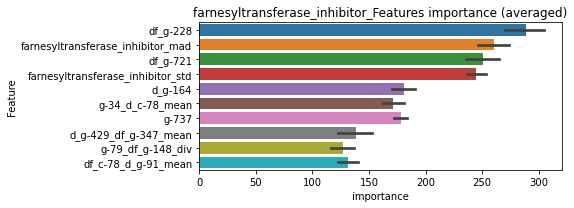

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0040889	valid_1's binary_logloss: 0.00995241
[600]	training's binary_logloss: 0.00051202	valid_1's binary_logloss: 0.00319883
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000339722	valid_1's binary_logloss: 0.00274606


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423344	valid_1's binary_logloss: 0.0087832
[600]	training's binary_logloss: 0.00052539	valid_1's binary_logloss: 0.00208425
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000332862	valid_1's binary_logloss: 0.00154411


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0042998	valid_1's binary_logloss: 0.00687736
[600]	training's binary_logloss: 0.000532598	valid_1's binary_logloss: 0.00114815
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000336297	valid_1's binary_logloss: 0.000786265


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428012	valid_1's binary_logloss: 0.00945505
[600]	training's binary_logloss: 0.000513968	valid_1's binary_logloss: 0.00190173
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000337062	valid_1's binary_logloss: 0.0014943


farnesyltransferase_inhibitor logloss: 0.001643468128343489


neg labels: 3289 → selected neg labels: 3284


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005762	valid_1's binary_logloss: 0.016397
[600]	training's binary_logloss: 0.000716696	valid_1's binary_logloss: 0.00597332
[900]	training's binary_logloss: 0.000383897	valid_1's binary_logloss: 0.00487867
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000378096	valid_1's binary_logloss: 0.00483913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00585133	valid_1's binary_logloss: 0.0140406
[600]	training's binary_logloss: 0.000736788	valid_1's binary_logloss: 0.00362898
[900]	training's binary_logloss: 0.000391962	valid_1's binary_logloss: 0.00256775
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000384747	valid_1's binary_logloss: 0.00255656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00578477	valid_1's binary_logloss: 0.0179724
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0032838, Threshold: 0.0159032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.01113, conf_1:0.02067
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0159032
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0659032
threshold: 0.0659032, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00530446	valid_1's binary_logloss: 0.015145
[600]	training's binary_logloss: 0.000667477	valid_1's binary_logloss: 0.0055389
[900]	training's binary_logloss: 0.000361919	valid_1's binary_logloss: 0.00448472
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000365216	valid_1's binary_logloss: 0.00448031
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533327	valid_1's binary_logloss: 0.0142586
[600]	training's binary_logloss: 0.000678041	valid_1's binary_logloss: 0.00417278
[900]	training's binary_logloss: 0.000369048	valid_1's binary_logloss: 0.00312384
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000369048	valid_1's binary_logloss: 0.00312384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538684	valid_1's binary_logloss: 0.0172158
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0433332, Threshold: 0.0659032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0092918 Vs.target_rate: 0.00105, Num_p_label: 37.0, conf_0:0.05272, conf_1:0.07908
Num_p_label: 37.0, Expected: 4.2, Adj_threshold_1: 0.0659032
Num_p_label: 19.0, Expected: 4.2, Adj_threshold_2: 0.1159032
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_3: 0.1659032
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_4: 0.2159032
threshold: 0.2159032, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516448	valid_1's binary_logloss: 0.0140142
[600]	training's binary_logloss: 0.000661594	valid_1's binary_logloss: 0.00420115
[900]	training's binary_logloss: 0.000360736	valid_1's binary_logloss: 0.00329688
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000359748	valid_1's binary_logloss: 0.00328667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529635	valid_1's binary_logloss: 0.0108359
[600]	training's binary_logloss: 0.000686647	valid_1's binary_logloss: 0.00262538
[900]	training's binary_logloss: 0.000369636	valid_1's binary_logloss: 0.00177946
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000368531	valid_1's binary_logloss: 0.00177539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523026	valid_1's binary_logloss: 0.0140779
[600]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.0547457, Threshold: 0.2159032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00105, Num_p_label: 7.0, conf_0:0.19431, conf_1:0.23749
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.2159032
threshold: 0.2159032, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


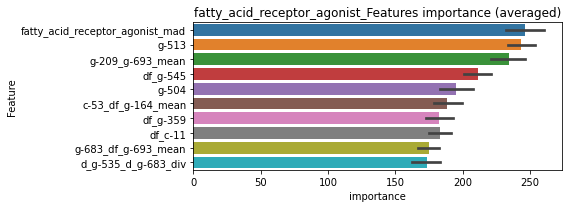

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00526248	valid_1's binary_logloss: 0.0135471
[600]	training's binary_logloss: 0.000664502	valid_1's binary_logloss: 0.00398797
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000463095	valid_1's binary_logloss: 0.00344253


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00530348	valid_1's binary_logloss: 0.0111696
[600]	training's binary_logloss: 0.000675811	valid_1's binary_logloss: 0.00281225
[900]	training's binary_logloss: 0.00036895	valid_1's binary_logloss: 0.00195497
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.00036895	valid_1's binary_logloss: 0.00195497


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506921	valid_1's binary_logloss: 0.0138032
[600]	training's binary_logloss: 0.000654808	valid_1's binary_logloss: 0.00344771
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000371599	valid_1's binary_logloss: 0.00253835


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534469	valid_1's binary_logloss: 0.0168725
[600]	training's binary_logloss: 0.000662984	valid_1's binary_logloss: 0.00589513
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000375387	valid_1's binary_logloss: 0.00492068


fatty_acid_receptor_agonist logloss: 0.003213864207612599


neg labels: 3289 → selected neg labels: 3284


fgfr_inhibitor, len(trt): 50, len(othr): 3284, target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130135	valid_1's binary_logloss: 0.0603821
[600]	training's binary_logloss: 0.00165754	valid_1's binary_logloss: 0.0349708
[900]	training's binary_logloss: 0.00071315	valid_1's binary_logloss: 0.0314435
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000681871	valid_1's binary_logloss: 0.0312459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013444	valid_1's binary_logloss: 0.050784
[600]	training's binary_logloss: 0.00169189	valid_1's binary_logloss: 0.0271687
[900]	training's binary_logloss: 0.000713588	valid_1's binary_logloss: 0.0243483
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00071956	valid_1's binary_logloss: 0.0241773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143347	valid_1's binary_logloss: 0.0357118
[600]	training's binary_loglos

1 / 3 AUC score:0.998
y_Threshold: 0.0092123, Threshold: 0.0728868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00210, Num_p_label: 40.0, conf_0:0.05102, conf_1:0.09475
Num_p_label: 40.0, Expected: 8.4, Adj_threshold_1: 0.0728868
Num_p_label: 21.0, Expected: 8.4, Adj_threshold_2: 0.1228868
Num_p_label: 12.0, Expected: 8.4, Adj_threshold_3: 0.1728868
threshold: 0.1728868, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114201	valid_1's binary_logloss: 0.0473768
[600]	training's binary_logloss: 0.00148136	valid_1's binary_logloss: 0.0230457
[900]	training's binary_logloss: 0.000653143	valid_1's binary_logloss: 0.0186694
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000594869	valid_1's binary_logloss: 0.0181699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111993	valid_1's binary_logloss: 0.0480256
[600]	training's binary_logloss: 0.00144896	valid_1's binary_logloss: 0.0293266
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000685459	valid_1's binary_logloss: 0.0275576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112182	valid_1's binary_logloss: 0.0427724
[600]	training's binary_logloss: 0.00148391	valid_1's binary_logloss: 0.0223836
Early stopping, best iterat

2 / 3 AUC score:1.000
y_Threshold: 0.0760722, Threshold: 0.1728868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 646.0/3788
p_label_rate: 0.0148167 Vs.target_rate: 0.00210, Num_p_label: 59.0, conf_0:0.13831, conf_1:0.20746
Num_p_label: 59.0, Expected: 8.4, Adj_threshold_1: 0.1728868
Num_p_label: 49.0, Expected: 8.4, Adj_threshold_2: 0.2228868
Num_p_label: 36.0, Expected: 8.4, Adj_threshold_3: 0.2728868
Num_p_label: 30.0, Expected: 8.4, Adj_threshold_4: 0.3228868
Num_p_label: 21.0, Expected: 8.4, Adj_threshold_5: 0.3728868
Num_p_label: 19.0, Expected: 8.4, Adj_threshold_6: 0.4228868
threshold: 0.4228868, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 646.0/3788, y_label_rate: 0.1705385
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101694	valid_1's binary_logloss: 0.037041
[600]	training's binary_logloss: 0.00133924	valid_1's binary_logloss: 0.0149654
[900]	training's binary_logloss: 0.000613123	valid_1's binary_logloss: 0.0112743
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000560523	valid_1's binary_logloss: 0.0109851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105457	valid_1's binary_logloss: 0.0384452
[600]	training's binary_logloss: 0.00140024	valid_1's binary_logloss: 0.0164295
[900]	training's binary_logloss: 0.000628025	valid_1's binary_logloss: 0.0129369
Early stopping, best iteration is:
[1058]	training's binary_logloss: 0.000557152	valid_1's binary_logloss: 0.0126234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107875	valid_1's binary_logloss: 0.0298677
[600]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.1443387, Threshold: 0.4228868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 644.0/3784
p_label_rate: 0.0060271 Vs.target_rate: 0.00210, Num_p_label: 24.0, conf_0:0.38060, conf_1:0.46518
Num_p_label: 24.0, Expected: 8.4, Adj_threshold_1: 0.4228868
Num_p_label: 22.0, Expected: 8.4, Adj_threshold_2: 0.4728868
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_3: 0.5228868
threshold: 0.5228868, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 644.0/3784, y_label_rate: 0.1701903


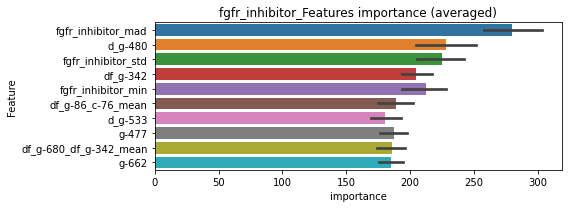

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102454	valid_1's binary_logloss: 0.0345139
[600]	training's binary_logloss: 0.00136442	valid_1's binary_logloss: 0.0169007
[900]	training's binary_logloss: 0.000622803	valid_1's binary_logloss: 0.0139237
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000612456	valid_1's binary_logloss: 0.0138607


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010757	valid_1's binary_logloss: 0.0493401
[600]	training's binary_logloss: 0.00138232	valid_1's binary_logloss: 0.0297801
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000810496	valid_1's binary_logloss: 0.027953


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109512	valid_1's binary_logloss: 0.0329622
[600]	training's binary_logloss: 0.0014265	valid_1's binary_logloss: 0.0115163
[900]	training's binary_logloss: 0.000645405	valid_1's binary_logloss: 0.00825182
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000583067	valid_1's binary_logloss: 0.00787556


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103941	valid_1's binary_logloss: 0.0473383
[600]	training's binary_logloss: 0.00137018	valid_1's binary_logloss: 0.0256985
[900]	training's binary_logloss: 0.000615157	valid_1's binary_logloss: 0.0216209
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000598376	valid_1's binary_logloss: 0.0214847


fgfr_inhibitor logloss: 0.017793479145159573


neg labels: 3289 → selected neg labels: 3258


flt3_inhibitor, len(trt): 279, len(othr): 3258, target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0777727	valid_1's binary_logloss: 0.286133
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.0395873	valid_1's binary_logloss: 0.280719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0746121	valid_1's binary_logloss: 0.281605
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.0316833	valid_1's binary_logloss: 0.273109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0735311	valid_1's binary_logloss: 0.285874
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0523698	valid_1's binary_logloss: 0.280366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0745211	valid_1's binary_logloss: 0.287388
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.03452	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.856
y_Threshold: 0.1009130, Threshold: 0.6906533, pos_neg_ratio: 0.8000000
Remove_noisy_data: 479 → Positive_corect_labels: 477/3430
p_label_rate: 0.0100452 Vs.target_rate: 0.01172, Num_p_label: 40.0, conf_0:0.48346, conf_1:0.80000
threshold: 0.6906533, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 477.0/3430, y_label_rate: 0.1390671
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253584	valid_1's binary_logloss: 0.189832
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.0144401	valid_1's binary_logloss: 0.185423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0290645	valid_1's binary_logloss: 0.118813
[600]	training's binary_logloss: 0.00458707	valid_1's binary_logloss: 0.0966691
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00492249	valid_1's binary_logloss: 0.0964169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285206	valid_1's binary_logloss: 0.144198
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00743166	valid_1's binary_logloss: 0.131504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.027523	valid_1's binary_logloss: 0.140836
Early stopping, best it

2 / 3 AUC score:0.971
y_Threshold: 0.0797241, Threshold: 0.6906533, pos_neg_ratio: 0.8000000
Remove_noisy_data: 137 → Positive_corect_labels: 409.0/3293
p_label_rate: 0.0344048 Vs.target_rate: 0.01172, Num_p_label: 137.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 137.0, Expected: 46.7, Adj_threshold_1: 0.6906533
Num_p_label: 126.0, Expected: 46.7, Adj_threshold_2: 0.7406533
Num_p_label: 115.0, Expected: 46.7, Adj_threshold_3: 0.7906533
threshold: 0.7906533, positive_p_label: 115.0/3982, p_label_rate: 0.0288800
positive_y_label: 409.0/3293, y_label_rate: 0.1242029
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164445	valid_1's binary_logloss: 0.116699
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00727237	valid_1's binary_logloss: 0.106436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156952	valid_1's binary_logloss: 0.0900931
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00381135	valid_1's binary_logloss: 0.0819914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167619	valid_1's binary_logloss: 0.0784679
[600]	training's binary_logloss: 0.00245285	valid_1's binary_logloss: 0.0612488
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.00154509	valid_1's binary_logloss: 0.060069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146864	valid_1's binary_logloss: 0.101476
Early stopping, bes

3 / 3 AUC score:0.986
y_Threshold: 0.0800152, Threshold: 0.7906533, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 375.0/3225
p_label_rate: 0.0394274 Vs.target_rate: 0.01172, Num_p_label: 157.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 157.0, Expected: 46.7, Adj_threshold_1: 0.7906533
threshold: 0.7906533, positive_p_label: 157.0/3982, p_label_rate: 0.0394274
positive_y_label: 375.0/3225, y_label_rate: 0.1162791


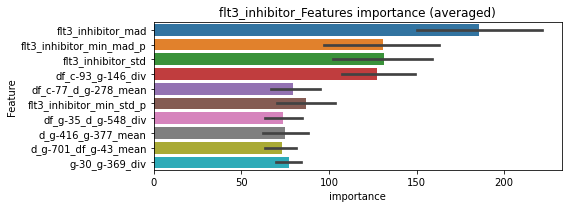

len(train_index) : 2418
len(valid_index) : 807
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010781	valid_1's binary_logloss: 0.101531


len(train_index) : 2419
len(valid_index) : 806
================================= fold 2/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00563982	valid_1's binary_logloss: 0.0953001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118934	valid_1's binary_logloss: 0.0525976
[600]	training's binary_logloss: 0.0018118	valid_1's binary_logloss: 0.036825
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.0018187	valid_1's binary_logloss: 0.0368074


len(train_index) : 2419
len(valid_index) : 806
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011507	valid_1's binary_logloss: 0.0859696
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00251881	valid_1's binary_logloss: 0.075442


len(train_index) : 2419
len(valid_index) : 806
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117197	valid_1's binary_logloss: 0.0698804
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00217815	valid_1's binary_logloss: 0.059431


flt3_inhibitor logloss: 0.0667540160865924


neg labels: 3289 → selected neg labels: 3289


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3289, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426152	valid_1's binary_logloss: 0.00914795
[600]	training's binary_logloss: 0.000566767	valid_1's binary_logloss: 0.0028619
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000354269	valid_1's binary_logloss: 0.00236777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00443091	valid_1's binary_logloss: 0.0104581
[600]	training's binary_logloss: 0.000569664	valid_1's binary_logloss: 0.00350912
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000368077	valid_1's binary_logloss: 0.00294614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0044778	valid_1's binary_logloss: 0.00919717
[600]	training's binary_logloss: 0.000573163	valid_1's binary_logloss: 0.00214397
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000343603	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0030125, Threshold: 0.0141659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00992, conf_1:0.01842
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0141659
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0641659
threshold: 0.0641659, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359832	valid_1's binary_logloss: 0.00801868
[600]	training's binary_logloss: 0.000483509	valid_1's binary_logloss: 0.00215129
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000312247	valid_1's binary_logloss: 0.00174313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365544	valid_1's binary_logloss: 0.00823465
[600]	training's binary_logloss: 0.00049102	valid_1's binary_logloss: 0.00239738
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000306421	valid_1's binary_logloss: 0.00190616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365254	valid_1's binary_logloss: 0.00625632
[600]	training's binary_logloss: 0.000492817	valid_1's binary_logloss: 0.00120081
[900]	training's binary_logloss: 0.000306476	valid_1's binary_logloss: 0.000853824
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.0321446, Threshold: 0.0641659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0065294 Vs.target_rate: 0.00076, Num_p_label: 26.0, conf_0:0.05133, conf_1:0.07700
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_1: 0.0641659
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.1141659
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.1641659
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.2141659
threshold: 0.2141659, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00348529	valid_1's binary_logloss: 0.0135716
[600]	training's binary_logloss: 0.000476011	valid_1's binary_logloss: 0.00738527
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000314588	valid_1's binary_logloss: 0.0067886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365776	valid_1's binary_logloss: 0.00643449
[600]	training's binary_logloss: 0.000486278	valid_1's binary_logloss: 0.00133527
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000314118	valid_1's binary_logloss: 0.000992824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360468	valid_1's binary_logloss: 0.00694992
[600]	training's binary_logloss: 0.000486115	valid_1's binary_logloss: 0.00139791
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000315086	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0405127, Threshold: 0.2141659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.19275, conf_1:0.23558
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.2141659
threshold: 0.2141659, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


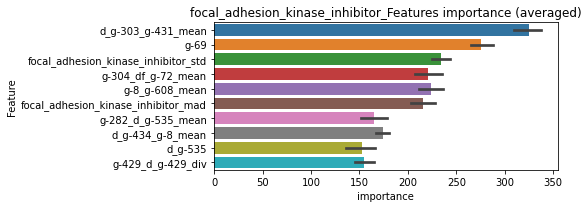

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352904	valid_1's binary_logloss: 0.00973655
[600]	training's binary_logloss: 0.000477137	valid_1's binary_logloss: 0.0039576
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000349482	valid_1's binary_logloss: 0.00351446


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352881	valid_1's binary_logloss: 0.00859178
[600]	training's binary_logloss: 0.000470526	valid_1's binary_logloss: 0.00234804
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000310243	valid_1's binary_logloss: 0.00190826


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359717	valid_1's binary_logloss: 0.00975522
[600]	training's binary_logloss: 0.000479081	valid_1's binary_logloss: 0.00268255
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000325917	valid_1's binary_logloss: 0.00222746


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367388	valid_1's binary_logloss: 0.00523108
[600]	training's binary_logloss: 0.000493009	valid_1's binary_logloss: 0.000937258
[900]	training's binary_logloss: 0.000305811	valid_1's binary_logloss: 0.000635718
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000305811	valid_1's binary_logloss: 0.000635718


focal_adhesion_kinase_inhibitor logloss: 0.0020718537842048263


neg labels: 3289 → selected neg labels: 3288


free_radical_scavenger, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00434891	valid_1's binary_logloss: 0.0117482
[600]	training's binary_logloss: 0.000547049	valid_1's binary_logloss: 0.00388783
[900]	training's binary_logloss: 0.000335116	valid_1's binary_logloss: 0.00308286
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.00033551	valid_1's binary_logloss: 0.00307973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441962	valid_1's binary_logloss: 0.009541
[600]	training's binary_logloss: 0.000561098	valid_1's binary_logloss: 0.00226321
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000344094	valid_1's binary_logloss: 0.00169889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447325	valid_1's binary_logloss: 0.0123042
[600]	training's binary_logloss: 0.000558677	valid_1's binary_logloss: 0.00546932
Early stopping, b

1 / 3 AUC score:1.000
y_Threshold: 0.0025943, Threshold: 0.0129324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00905, conf_1:0.01681
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0129324
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0629324
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.1129324
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.1629324
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.2129324
threshold: 0.2129324, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409854	valid_1's binary_logloss: 0.00775573
[600]	training's binary_logloss: 0.000514332	valid_1's binary_logloss: 0.00194251
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.00033429	valid_1's binary_logloss: 0.00148729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408949	valid_1's binary_logloss: 0.00810395
[600]	training's binary_logloss: 0.000514554	valid_1's binary_logloss: 0.00154029
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000327293	valid_1's binary_logloss: 0.00112111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405141	valid_1's binary_logloss: 0.0119751
[600]	training's binary_logloss: 0.000516443	valid_1's binary_logloss: 0.00604273
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000321774	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0235475, Threshold: 0.2129324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00076, Num_p_label: 17.0, conf_0:0.17035, conf_1:0.25552
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.2129324
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.2629324
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.3129324
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.3629324
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.4129324
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.4629324
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.5129324
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.5629324
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.6129324
threshold: 0.6129324, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401198	valid_1's binary_logloss: 0.00859218
[600]	training's binary_logloss: 0.000512959	valid_1's binary_logloss: 0.00189468
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000322648	valid_1's binary_logloss: 0.00140472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399858	valid_1's binary_logloss: 0.00772653
[600]	training's binary_logloss: 0.000517497	valid_1's binary_logloss: 0.00161763
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000325354	valid_1's binary_logloss: 0.00116463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407022	valid_1's binary_logloss: 0.00672083
[600]	training's binary_logloss: 0.000517839	valid_1's binary_logloss: 0.00128075
[900]	training's binary_logloss: 0.000321755	valid_1's binary_logloss: 0.000927877
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.0438652, Threshold: 0.6129324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00076, Num_p_label: 8.0, conf_0:0.50000, conf_1:0.67423
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.6129324
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.6629324
threshold: 0.6629324, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


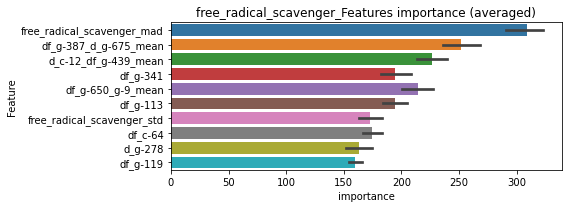

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401925	valid_1's binary_logloss: 0.00875348
[600]	training's binary_logloss: 0.000509399	valid_1's binary_logloss: 0.00196646
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000323382	valid_1's binary_logloss: 0.00147076


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405909	valid_1's binary_logloss: 0.00742846
[600]	training's binary_logloss: 0.000512742	valid_1's binary_logloss: 0.00143706
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000324696	valid_1's binary_logloss: 0.00103912


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418372	valid_1's binary_logloss: 0.00676407
[600]	training's binary_logloss: 0.00052284	valid_1's binary_logloss: 0.00124476
[900]	training's binary_logloss: 0.000319207	valid_1's binary_logloss: 0.000867319
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000319207	valid_1's binary_logloss: 0.000867319


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395761	valid_1's binary_logloss: 0.0135029
[600]	training's binary_logloss: 0.000497645	valid_1's binary_logloss: 0.0052478
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000327597	valid_1's binary_logloss: 0.00465384


free_radical_scavenger logloss: 0.0020074588459187094


neg labels: 3289 → selected neg labels: 3287


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3287, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00568677	valid_1's binary_logloss: 0.0146189
[600]	training's binary_logloss: 0.000741003	valid_1's binary_logloss: 0.00482205
[900]	training's binary_logloss: 0.000394838	valid_1's binary_logloss: 0.00359705
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000395627	valid_1's binary_logloss: 0.00358827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00555759	valid_1's binary_logloss: 0.0192396
[600]	training's binary_logloss: 0.000744007	valid_1's binary_logloss: 0.00830313
[900]	training's binary_logloss: 0.000386786	valid_1's binary_logloss: 0.00719941
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000386786	valid_1's binary_logloss: 0.00719941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562668	valid_1's binary_logloss: 0.0142269
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0033058, Threshold: 0.0253607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00097, Num_p_label: 40.0, conf_0:0.01775, conf_1:0.03297
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0253607
Num_p_label: 10.0, Expected: 3.8, Adj_threshold_2: 0.0753607
Num_p_label: 5.0, Expected: 3.8, Adj_threshold_3: 0.1253607
threshold: 0.1253607, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521057	valid_1's binary_logloss: 0.0134489
[600]	training's binary_logloss: 0.000685682	valid_1's binary_logloss: 0.00426689
[900]	training's binary_logloss: 0.000384786	valid_1's binary_logloss: 0.00337704
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00038484	valid_1's binary_logloss: 0.00337656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522088	valid_1's binary_logloss: 0.0178767
[600]	training's binary_logloss: 0.000687932	valid_1's binary_logloss: 0.00772496
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000394788	valid_1's binary_logloss: 0.00679553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00517907	valid_1's binary_logloss: 0.0114323
[600]	training's binary_logloss: 0.000687608	valid_1's binary_logloss: 0.00268075
Early stopping, 

2 / 3 AUC score:1.000
y_Threshold: 0.0509957, Threshold: 0.1253607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0092918 Vs.target_rate: 0.00097, Num_p_label: 37.0, conf_0:0.10029, conf_1:0.15043
Num_p_label: 37.0, Expected: 3.8, Adj_threshold_1: 0.1253607
Num_p_label: 27.0, Expected: 3.8, Adj_threshold_2: 0.1753607
Num_p_label: 23.0, Expected: 3.8, Adj_threshold_3: 0.2253607
Num_p_label: 15.0, Expected: 3.8, Adj_threshold_4: 0.2753607
Num_p_label: 14.0, Expected: 3.8, Adj_threshold_5: 0.3253607
Num_p_label: 13.0, Expected: 3.8, Adj_threshold_6: 0.3753607
Num_p_label: 13.0, Expected: 3.8, Adj_threshold_7: 0.4253607
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_8: 0.4753607
threshold: 0.4753607, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521057	valid_1's binary_logloss: 0.0134489
[600]	training's binary_logloss: 0.000685682	valid_1's binary_logloss: 0.00426689
[900]	training's binary_logloss: 0.000384786	valid_1's binary_logloss: 0.00337704
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00038484	valid_1's binary_logloss: 0.00337656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522088	valid_1's binary_logloss: 0.0178767
[600]	training's binary_logloss: 0.000687932	valid_1's binary_logloss: 0.00772496
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000394788	valid_1's binary_logloss: 0.00679553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00517907	valid_1's binary_logloss: 0.0114323
[600]	training's binary_logloss: 0.000687608	valid_1's binary_logloss: 0.00268075
Early stopping, 

3 / 3 AUC score:1.000
y_Threshold: 0.0509957, Threshold: 0.4753607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00097, Num_p_label: 9.0, conf_0:0.42782, conf_1:0.52290
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.4753607
threshold: 0.4753607, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


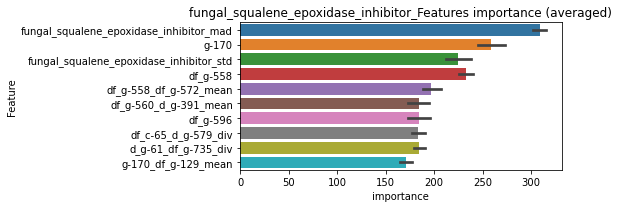

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005335	valid_1's binary_logloss: 0.013803
[600]	training's binary_logloss: 0.000681137	valid_1's binary_logloss: 0.00422387
[900]	training's binary_logloss: 0.000380355	valid_1's binary_logloss: 0.0033188
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000377682	valid_1's binary_logloss: 0.00330591


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00524589	valid_1's binary_logloss: 0.0182978
[600]	training's binary_logloss: 0.000689242	valid_1's binary_logloss: 0.00824147
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000417832	valid_1's binary_logloss: 0.00735073


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0053789	valid_1's binary_logloss: 0.0111674
[600]	training's binary_logloss: 0.00069521	valid_1's binary_logloss: 0.00263065
[900]	training's binary_logloss: 0.00038188	valid_1's binary_logloss: 0.00177179
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000376027	valid_1's binary_logloss: 0.00174929


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521258	valid_1's binary_logloss: 0.0159908
[600]	training's binary_logloss: 0.000686142	valid_1's binary_logloss: 0.00496157
[900]	training's binary_logloss: 0.000379519	valid_1's binary_logloss: 0.00364134
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00038046	valid_1's binary_logloss: 0.00363649


fungal_squalene_epoxidase_inhibitor logloss: 0.004015687288153406


neg labels: 3289 → selected neg labels: 3271


gaba_receptor_agonist, len(trt): 106, len(othr): 3271, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243107	valid_1's binary_logloss: 0.126941
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00420526	valid_1's binary_logloss: 0.109766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282032	valid_1's binary_logloss: 0.109094
[600]	training's binary_logloss: 0.00414846	valid_1's binary_logloss: 0.0799664
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.00176144	valid_1's binary_logloss: 0.0764867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287846	valid_1's binary_logloss: 0.104563
[600]	training's binary_logloss: 0.00412992	valid_1's binary_logloss: 0.0677165
[900]	training's binary_logloss: 0.00140292	valid_1's binary_logloss: 0.0611793
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.0011385	valid_1's binary_logloss: 0.0603657

1 / 3 AUC score:0.987
y_Threshold: 0.0246469, Threshold: 0.2724924, pos_neg_ratio: 0.8000000
Remove_noisy_data: 185 → Positive_corect_labels: 627/3740
p_label_rate: 0.0100452 Vs.target_rate: 0.00445, Num_p_label: 40.0, conf_0:0.19074, conf_1:0.35424
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.2724924
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_2: 0.3224924
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_3: 0.3724924
threshold: 0.3724924, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 627.0/3740, y_label_rate: 0.1676471
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186463	valid_1's binary_logloss: 0.0732716
[600]	training's binary_logloss: 0.0025565	valid_1's binary_logloss: 0.0492243
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00143711	valid_1's binary_logloss: 0.0468911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176478	valid_1's binary_logloss: 0.0829691
[600]	training's binary_logloss: 0.00240985	valid_1's binary_logloss: 0.0674202
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00240985	valid_1's binary_logloss: 0.0674202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190478	valid_1's binary_logloss: 0.0885017
[600]	training's binary_logloss: 0.00256268	valid_1's binary_logloss: 0.0608267
[900]	training's binary_logloss: 0.000993349	valid_1's binary_logloss: 0.0563062
Early stopping, best iteration

2 / 3 AUC score:0.996
y_Threshold: 0.0793241, Threshold: 0.3724924, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 602.0/3690
p_label_rate: 0.0215972 Vs.target_rate: 0.00445, Num_p_label: 86.0, conf_0:0.29799, conf_1:0.44699
Num_p_label: 86.0, Expected: 17.7, Adj_threshold_1: 0.3724924
Num_p_label: 79.0, Expected: 17.7, Adj_threshold_2: 0.4224924
Num_p_label: 67.0, Expected: 17.7, Adj_threshold_3: 0.4724924
Num_p_label: 58.0, Expected: 17.7, Adj_threshold_4: 0.5224924
Num_p_label: 50.0, Expected: 17.7, Adj_threshold_5: 0.5724924
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_6: 0.6224924
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_7: 0.6724924
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_8: 0.7224924
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_9: 0.7724924
threshold: 0.7724924, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 602.0/3690, y_label_rate: 0.1631436
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014364	valid_1's binary_logloss: 0.0734291
[600]	training's binary_logloss: 0.00195981	valid_1's binary_logloss: 0.056444
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00142119	valid_1's binary_logloss: 0.0552646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149674	valid_1's binary_logloss: 0.0751648
[600]	training's binary_logloss: 0.00196273	valid_1's binary_logloss: 0.0583954
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00181647	valid_1's binary_logloss: 0.0580111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156538	valid_1's binary_logloss: 0.0564761
[600]	training's binary_logloss: 0.00207386	valid_1's binary_logloss: 0.0282391
[900]	training's binary_logloss: 0.000871935	valid_1's binary_logloss: 0.0219522
Early stopping, best iteration 

3 / 3 AUC score:0.997
y_Threshold: 0.0735219, Threshold: 0.7724924, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 587.0/3660
p_label_rate: 0.0107986 Vs.target_rate: 0.00445, Num_p_label: 43.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 43.0, Expected: 17.7, Adj_threshold_1: 0.7724924
threshold: 0.7724924, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 587.0/3660, y_label_rate: 0.1603825


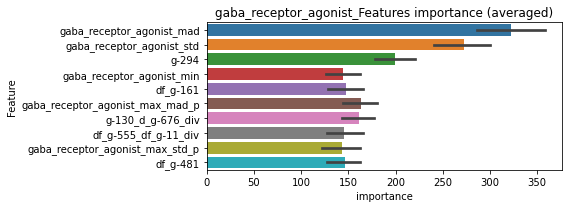

len(train_index) : 2745
len(valid_index) : 915
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130147	valid_1's binary_logloss: 0.0622237
[600]	training's binary_logloss: 0.00179056	valid_1's binary_logloss: 0.0373782
[900]	training's binary_logloss: 0.000775461	valid_1's binary_logloss: 0.0326911
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.0007524	valid_1's binary_logloss: 0.0325743


len(train_index) : 2745
len(valid_index) : 915
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128655	valid_1's binary_logloss: 0.0587686
[600]	training's binary_logloss: 0.00179132	valid_1's binary_logloss: 0.0335065
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000863484	valid_1's binary_logloss: 0.0299409


len(train_index) : 2745
len(valid_index) : 915
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141642	valid_1's binary_logloss: 0.0636124
[600]	training's binary_logloss: 0.00188388	valid_1's binary_logloss: 0.0442027
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00152265	valid_1's binary_logloss: 0.0436099


len(train_index) : 2745
len(valid_index) : 915
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127986	valid_1's binary_logloss: 0.0856494
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.00554148	valid_1's binary_logloss: 0.078643


gaba_receptor_agonist logloss: 0.04619201727741871


neg labels: 3289 → selected neg labels: 3266


gaba_receptor_antagonist, len(trt): 165, len(othr): 3266, target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0372993	valid_1's binary_logloss: 0.179326
[600]	training's binary_logloss: 0.00625683	valid_1's binary_logloss: 0.15614
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00577976	valid_1's binary_logloss: 0.155686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0379704	valid_1's binary_logloss: 0.189955
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00920481	valid_1's binary_logloss: 0.17693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0374399	valid_1's binary_logloss: 0.186031
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00919499	valid_1's binary_logloss: 0.172202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0404117	valid_1's binary_logloss: 0.171017
Early stopping, best iter

1 / 3 AUC score:0.952
y_Threshold: 0.0481192, Threshold: 0.3017019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 289 → Positive_corect_labels: 574/3630
p_label_rate: 0.0100452 Vs.target_rate: 0.00693, Num_p_label: 40.0, conf_0:0.21119, conf_1:0.39221
threshold: 0.3017019, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 574.0/3630, y_label_rate: 0.1581267
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229753	valid_1's binary_logloss: 0.0900982
[600]	training's binary_logloss: 0.0033939	valid_1's binary_logloss: 0.0582779
[900]	training's binary_logloss: 0.00124696	valid_1's binary_logloss: 0.0519526
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.000896169	valid_1's binary_logloss: 0.0502323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0223823	valid_1's binary_logloss: 0.106895
[600]	training's binary_logloss: 0.00324326	valid_1's binary_logloss: 0.0821301
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.00177706	valid_1's binary_logloss: 0.0806986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0223356	valid_1's binary_logloss: 0.092926
[600]	training's binary_logloss: 0.00319954	valid_1's binary_logloss: 0.0681818
Early stopping, best iteration 

2 / 3 AUC score:0.992
y_Threshold: 0.0689816, Threshold: 0.3017019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 546.0/3574
p_label_rate: 0.0281266 Vs.target_rate: 0.00693, Num_p_label: 112.0, conf_0:0.24136, conf_1:0.36204
Num_p_label: 112.0, Expected: 27.6, Adj_threshold_1: 0.3017019
Num_p_label: 101.0, Expected: 27.6, Adj_threshold_2: 0.3517019
Num_p_label: 86.0, Expected: 27.6, Adj_threshold_3: 0.4017019
Num_p_label: 74.0, Expected: 27.6, Adj_threshold_4: 0.4517019
Num_p_label: 72.0, Expected: 27.6, Adj_threshold_5: 0.5017019
Num_p_label: 68.0, Expected: 27.6, Adj_threshold_6: 0.5517019
Num_p_label: 63.0, Expected: 27.6, Adj_threshold_7: 0.6017019
Num_p_label: 60.0, Expected: 27.6, Adj_threshold_8: 0.6517019
Num_p_label: 59.0, Expected: 27.6, Adj_threshold_9: 0.7017019
Num_p_label: 54.0, Expected: 27.6, Adj_threshold_10: 0.7517019
threshold: 0.7517019, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 546.0/3574, y_label_rate: 0.1527

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165063	valid_1's binary_logloss: 0.095545
[600]	training's binary_logloss: 0.00234782	valid_1's binary_logloss: 0.0798151
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00193838	valid_1's binary_logloss: 0.0789814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170964	valid_1's binary_logloss: 0.077167
[600]	training's binary_logloss: 0.00244564	valid_1's binary_logloss: 0.0579822
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00237217	valid_1's binary_logloss: 0.0577404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167292	valid_1's binary_logloss: 0.0819793
[600]	training's binary_logloss: 0.00241614	valid_1's binary_logloss: 0.0618914
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00170089	valid_1's binary_logloss: 0.06069

3 / 3 AUC score:0.988
y_Threshold: 0.0594069, Threshold: 0.7517019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 515.0/3512


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.0051307	valid_1's binary_logloss: 0.128932


p_label_rate: 0.0170768 Vs.target_rate: 0.00693, Num_p_label: 68.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 68.0, Expected: 27.6, Adj_threshold_1: 0.7517019
threshold: 0.7517019, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 515.0/3512, y_label_rate: 0.1466401


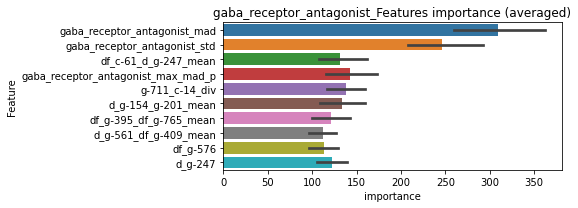

len(train_index) : 2634
len(valid_index) : 878
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123031	valid_1's binary_logloss: 0.101077


len(train_index) : 2634
len(valid_index) : 878
================================= fold 2/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.0035849	valid_1's binary_logloss: 0.0954578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130569	valid_1's binary_logloss: 0.0506786
[600]	training's binary_logloss: 0.00181193	valid_1's binary_logloss: 0.0290922
[900]	training's binary_logloss: 0.000821434	valid_1's binary_logloss: 0.0260834
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000781275	valid_1's binary_logloss: 0.0257927


len(train_index) : 2634
len(valid_index) : 878
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125309	valid_1's binary_logloss: 0.0668805
[600]	training's binary_logloss: 0.00178595	valid_1's binary_logloss: 0.0492719
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00129231	valid_1's binary_logloss: 0.0477362


len(train_index) : 2634
len(valid_index) : 878
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124572	valid_1's binary_logloss: 0.0787928


gaba_receptor_antagonist logloss: 0.059958635649755634


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00288667	valid_1's binary_logloss: 0.0708478
neg labels: 3289 → selected neg labels: 3284


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3284, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146593	valid_1's binary_logloss: 0.0567843
[600]	training's binary_logloss: 0.0018973	valid_1's binary_logloss: 0.0330868
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000870704	valid_1's binary_logloss: 0.0297813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148187	valid_1's binary_logloss: 0.0515387
[600]	training's binary_logloss: 0.00197948	valid_1's binary_logloss: 0.0217221
[900]	training's binary_logloss: 0.000803675	valid_1's binary_logloss: 0.0160351
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000639329	valid_1's binary_logloss: 0.0151584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153111	valid_1's binary_logloss: 0.0414906
[600]	training's binary_logloss: 0.0019794	valid_1's binary_logloss: 0.0174135
[900]	training's binary_logl

1 / 3 AUC score:0.998
y_Threshold: 0.0121195, Threshold: 0.0831891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00235, Num_p_label: 40.0, conf_0:0.05823, conf_1:0.10815
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0831891
Num_p_label: 26.0, Expected: 9.4, Adj_threshold_2: 0.1331891
Num_p_label: 20.0, Expected: 9.4, Adj_threshold_3: 0.1831891
threshold: 0.1831891, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012288	valid_1's binary_logloss: 0.0419678
[600]	training's binary_logloss: 0.00158691	valid_1's binary_logloss: 0.02375
[900]	training's binary_logloss: 0.000683909	valid_1's binary_logloss: 0.0211026
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000660054	valid_1's binary_logloss: 0.0209667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120045	valid_1's binary_logloss: 0.0558043
[600]	training's binary_logloss: 0.00153633	valid_1's binary_logloss: 0.0381131
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.00108052	valid_1's binary_logloss: 0.0371488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122638	valid_1's binary_logloss: 0.0392095
[600]	training's binary_logloss: 0.00158189	valid_1's binary_logloss: 0.0200535
[900]	training's binary_logloss

2 / 3 AUC score:0.997
y_Threshold: 0.1135181, Threshold: 0.1831891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 641.0/3778
p_label_rate: 0.0193370 Vs.target_rate: 0.00235, Num_p_label: 77.0, conf_0:0.14655, conf_1:0.21983
Num_p_label: 77.0, Expected: 9.4, Adj_threshold_1: 0.1831891
Num_p_label: 69.0, Expected: 9.4, Adj_threshold_2: 0.2331891
Num_p_label: 64.0, Expected: 9.4, Adj_threshold_3: 0.2831891
Num_p_label: 59.0, Expected: 9.4, Adj_threshold_4: 0.3331891
Num_p_label: 53.0, Expected: 9.4, Adj_threshold_5: 0.3831891
Num_p_label: 48.0, Expected: 9.4, Adj_threshold_6: 0.4331891
Num_p_label: 47.0, Expected: 9.4, Adj_threshold_7: 0.4831891
Num_p_label: 44.0, Expected: 9.4, Adj_threshold_8: 0.5331891
Num_p_label: 42.0, Expected: 9.4, Adj_threshold_9: 0.5831891
Num_p_label: 38.0, Expected: 9.4, Adj_threshold_10: 0.6331891
threshold: 0.6831891, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 641.0/3778, y_label_rate: 0.1696665
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112207	valid_1's binary_logloss: 0.0415974
[600]	training's binary_logloss: 0.00141389	valid_1's binary_logloss: 0.0242267
[900]	training's binary_logloss: 0.000643463	valid_1's binary_logloss: 0.0226608
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000619616	valid_1's binary_logloss: 0.0225121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104941	valid_1's binary_logloss: 0.0579575
[600]	training's binary_logloss: 0.00135303	valid_1's binary_logloss: 0.0390679
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00127193	valid_1's binary_logloss: 0.0384837
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111957	valid_1's binary_logloss: 0.0285598
[600]	training's binary_logloss: 0.00144785	valid_1's binary_logloss: 0.0107475
[900]	training's binary_logl

3 / 3 AUC score:0.998
y_Threshold: 0.0938538, Threshold: 0.6831891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 634.0/3764
p_label_rate: 0.0123054 Vs.target_rate: 0.00235, Num_p_label: 49.0, conf_0:0.50000, conf_1:0.75151
Num_p_label: 49.0, Expected: 9.4, Adj_threshold_1: 0.6831891
Num_p_label: 45.0, Expected: 9.4, Adj_threshold_2: 0.7331891
Num_p_label: 42.0, Expected: 9.4, Adj_threshold_3: 0.7831891
threshold: 0.7831891, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 634.0/3764, y_label_rate: 0.1684378


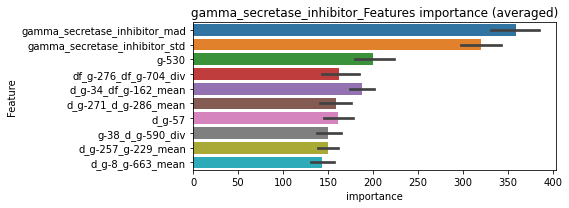

len(train_index) : 2823
len(valid_index) : 941
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100185	valid_1's binary_logloss: 0.0355227
[600]	training's binary_logloss: 0.00131768	valid_1's binary_logloss: 0.0167348
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000670708	valid_1's binary_logloss: 0.0139953


len(train_index) : 2823
len(valid_index) : 941
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103981	valid_1's binary_logloss: 0.0620057
[600]	training's binary_logloss: 0.00130087	valid_1's binary_logloss: 0.0436843
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000925513	valid_1's binary_logloss: 0.0426964


len(train_index) : 2823
len(valid_index) : 941
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010435	valid_1's binary_logloss: 0.0461943
[600]	training's binary_logloss: 0.00135214	valid_1's binary_logloss: 0.0289224
[900]	training's binary_logloss: 0.000616409	valid_1's binary_logloss: 0.0259818
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000612672	valid_1's binary_logloss: 0.0259212


len(train_index) : 2823
len(valid_index) : 941
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111469	valid_1's binary_logloss: 0.0365703
[600]	training's binary_logloss: 0.0013687	valid_1's binary_logloss: 0.0194889
[900]	training's binary_logloss: 0.000612517	valid_1's binary_logloss: 0.0162646
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000632046	valid_1's binary_logloss: 0.016173


gamma_secretase_inhibitor logloss: 0.02469649102721961


neg labels: 3289 → selected neg labels: 3248


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3248, target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.071508	valid_1's binary_logloss: 0.286424
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.0347925	valid_1's binary_logloss: 0.275262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0693079	valid_1's binary_logloss: 0.267219
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.0289866	valid_1's binary_logloss: 0.257127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0717679	valid_1's binary_logloss: 0.255839
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.0253414	valid_1's binary_logloss: 0.236407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.071618	valid_1's binary_logloss: 0.276003
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.0273328	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.888
y_Threshold: 0.0972801, Threshold: 0.3725457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 441 → Positive_corect_labels: 494/3456
p_label_rate: 0.0100452 Vs.target_rate: 0.01117, Num_p_label: 40.0, conf_0:0.26078, conf_1:0.48431
threshold: 0.3725457, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 494.0/3456, y_label_rate: 0.1429398
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0295618	valid_1's binary_logloss: 0.135541
[600]	training's binary_logloss: 0.00488902	valid_1's binary_logloss: 0.10176
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.0022004	valid_1's binary_logloss: 0.0972428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0283293	valid_1's binary_logloss: 0.147263
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00792863	valid_1's binary_logloss: 0.13242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.028903	valid_1's binary_logloss: 0.137998
[600]	training's binary_logloss: 0.00474276	valid_1's binary_logloss: 0.119961
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00447164	valid_1's binary_logloss: 0.119333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_l

2 / 3 AUC score:0.965
y_Threshold: 0.0923997, Threshold: 0.3725457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 432.0/3332
p_label_rate: 0.0208438 Vs.target_rate: 0.01117, Num_p_label: 83.0, conf_0:0.29804, conf_1:0.44705
Num_p_label: 83.0, Expected: 44.5, Adj_threshold_1: 0.3725457
Num_p_label: 67.0, Expected: 44.5, Adj_threshold_2: 0.4225457
Num_p_label: 58.0, Expected: 44.5, Adj_threshold_3: 0.4725457
threshold: 0.4725457, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 432.0/3332, y_label_rate: 0.1296519
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183411	valid_1's binary_logloss: 0.109191
[600]	training's binary_logloss: 0.0028803	valid_1's binary_logloss: 0.0890814
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.0027424	valid_1's binary_logloss: 0.0888242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189037	valid_1's binary_logloss: 0.135377
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.009497	valid_1's binary_logloss: 0.127494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180737	valid_1's binary_logloss: 0.116605
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.00733363	valid_1's binary_logloss: 0.110122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172784	valid_1's binary_logloss: 0.118007
Early stopping, best iter

3 / 3 AUC score:0.974
y_Threshold: 0.0998581, Threshold: 0.4725457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 385.0/3238
p_label_rate: 0.0246107 Vs.target_rate: 0.01117, Num_p_label: 98.0, conf_0:0.42529, conf_1:0.51980
Num_p_label: 98.0, Expected: 44.5, Adj_threshold_1: 0.4725457
Num_p_label: 87.0, Expected: 44.5, Adj_threshold_2: 0.5225457
Num_p_label: 76.0, Expected: 44.5, Adj_threshold_3: 0.5725457
Num_p_label: 69.0, Expected: 44.5, Adj_threshold_4: 0.6225457
Num_p_label: 63.0, Expected: 44.5, Adj_threshold_5: 0.6725457
threshold: 0.6725457, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 385.0/3238, y_label_rate: 0.1189006


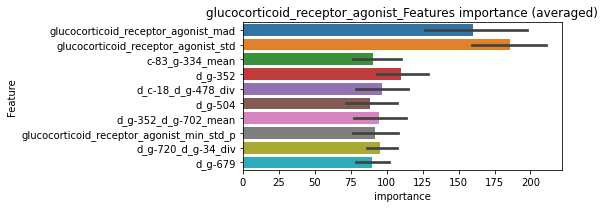

len(train_index) : 2428
len(valid_index) : 810
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124827	valid_1's binary_logloss: 0.0934083
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00274647	valid_1's binary_logloss: 0.0807953


len(train_index) : 2428
len(valid_index) : 810
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128176	valid_1's binary_logloss: 0.109347


len(train_index) : 2429
len(valid_index) : 809
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00412214	valid_1's binary_logloss: 0.104332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130837	valid_1's binary_logloss: 0.0835876
[600]	training's binary_logloss: 0.00204858	valid_1's binary_logloss: 0.0677716
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00121369	valid_1's binary_logloss: 0.0664274


len(train_index) : 2429
len(valid_index) : 809
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123433	valid_1's binary_logloss: 0.0919831
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.00263602	valid_1's binary_logloss: 0.0805345


glucocorticoid_receptor_agonist logloss: 0.08302826919425747


neg labels: 3289 → selected neg labels: 3285


glutamate_inhibitor, len(trt): 13, len(othr): 3285, target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288038	valid_1's binary_logloss: 0.00990521
[600]	training's binary_logloss: 0.000377036	valid_1's binary_logloss: 0.00529989
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000336722	valid_1's binary_logloss: 0.00515512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291613	valid_1's binary_logloss: 0.00626165
[600]	training's binary_logloss: 0.000376216	valid_1's binary_logloss: 0.00182305
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000271076	valid_1's binary_logloss: 0.00150362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295882	valid_1's binary_logloss: 0.00479788
[600]	training's binary_logloss: 0.000374712	valid_1's binary_logloss: 0.000999075
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000267269	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0014114, Threshold: 0.0056096, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00055, Num_p_label: 40.0, conf_0:0.00393, conf_1:0.00729
Num_p_label: 40.0, Expected: 2.2, Adj_threshold_1: 0.0056096
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_2: 0.0556096
threshold: 0.0556096, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272253	valid_1's binary_logloss: 0.00993572
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000533374	valid_1's binary_logloss: 0.00591172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275053	valid_1's binary_logloss: 0.00397676
[600]	training's binary_logloss: 0.000351217	valid_1's binary_logloss: 0.000673356
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000263635	valid_1's binary_logloss: 0.000549836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002747	valid_1's binary_logloss: 0.00378191
[600]	training's binary_logloss: 0.000354384	valid_1's binary_logloss: 0.000668579
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00025919	valid_1's binary_logloss: 0.000517601
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0351065, Threshold: 0.0556096, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0045203 Vs.target_rate: 0.00055, Num_p_label: 18.0, conf_0:0.04449, conf_1:0.06673
Num_p_label: 18.0, Expected: 2.2, Adj_threshold_1: 0.0556096
Num_p_label: 7.0, Expected: 2.2, Adj_threshold_2: 0.1056096
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_3: 0.1556096
threshold: 0.1556096, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272253	valid_1's binary_logloss: 0.00993572
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000533374	valid_1's binary_logloss: 0.00591172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275053	valid_1's binary_logloss: 0.00397676
[600]	training's binary_logloss: 0.000351217	valid_1's binary_logloss: 0.000673356
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000263635	valid_1's binary_logloss: 0.000549836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002747	valid_1's binary_logloss: 0.00378191
[600]	training's binary_logloss: 0.000354384	valid_1's binary_logloss: 0.000668579
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00025919	valid_1's binary_logloss: 0.000517601
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0351065, Threshold: 0.1556096, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00055, Num_p_label: 5.0, conf_0:0.14005, conf_1:0.17117
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.1556096
threshold: 0.1556096, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


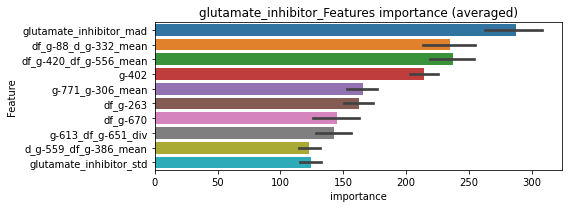

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274195	valid_1's binary_logloss: 0.00930111
[600]	training's binary_logloss: 0.000351364	valid_1's binary_logloss: 0.00476713
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.0003043	valid_1's binary_logloss: 0.00458067


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272832	valid_1's binary_logloss: 0.00386795
[600]	training's binary_logloss: 0.000345037	valid_1's binary_logloss: 0.000635523
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000259598	valid_1's binary_logloss: 0.000516587


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272195	valid_1's binary_logloss: 0.0038127
[600]	training's binary_logloss: 0.000354475	valid_1's binary_logloss: 0.000678896
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000258004	valid_1's binary_logloss: 0.0005224


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269239	valid_1's binary_logloss: 0.00441735
[600]	training's binary_logloss: 0.000349261	valid_1's binary_logloss: 0.00083919
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000253212	valid_1's binary_logloss: 0.000653032


glutamate_inhibitor logloss: 0.001568702873780089


neg labels: 3289 → selected neg labels: 3283


glutamate_receptor_agonist, len(trt): 74, len(othr): 3283, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134023	valid_1's binary_logloss: 0.0822298
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00243013	valid_1's binary_logloss: 0.0692782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136066	valid_1's binary_logloss: 0.0574053
[600]	training's binary_logloss: 0.00190316	valid_1's binary_logloss: 0.038333
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000930389	valid_1's binary_logloss: 0.0359719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014349	valid_1's binary_logloss: 0.0435805
[600]	training's binary_logloss: 0.00202329	valid_1's binary_logloss: 0.0248374
[900]	training's binary_logloss: 0.000853127	valid_1's binary_logloss: 0.0225082
Early stopping, best iteration is:
[1060]	training's binary_logloss: 0.000694396	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.996
y_Threshold: 0.0155992, Threshold: 0.2343608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 645/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00311, Num_p_label: 40.0, conf_0:0.16405, conf_1:0.30467
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.2343608
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_2: 0.2843608
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_3: 0.3343608
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_4: 0.3843608
Num_p_label: 20.0, Expected: 12.4, Adj_threshold_5: 0.4343608
Num_p_label: 19.0, Expected: 12.4, Adj_threshold_6: 0.4843608
Num_p_label: 15.0, Expected: 12.4, Adj_threshold_7: 0.5343608
threshold: 0.5343608, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 645.0/3785, y_label_rate: 0.1704095
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104221	valid_1's binary_logloss: 0.0721798
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00195398	valid_1's binary_logloss: 0.0582032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011261	valid_1's binary_logloss: 0.0463977
[600]	training's binary_logloss: 0.0015515	valid_1's binary_logloss: 0.0321241
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00116338	valid_1's binary_logloss: 0.0310426
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114397	valid_1's binary_logloss: 0.0516769
[600]	training's binary_logloss: 0.00155995	valid_1's binary_logloss: 0.0372584
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000769248	valid_1's binary_logloss: 0.0350199
Training until validation scores don't improve for 30 rounds
[300]	training'

2 / 3 AUC score:0.998
y_Threshold: 0.0925733, Threshold: 0.5343608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 620.0/3735
p_label_rate: 0.0180814 Vs.target_rate: 0.00311, Num_p_label: 72.0, conf_0:0.42749, conf_1:0.64123
Num_p_label: 72.0, Expected: 12.4, Adj_threshold_1: 0.5343608
Num_p_label: 66.0, Expected: 12.4, Adj_threshold_2: 0.5843608
Num_p_label: 55.0, Expected: 12.4, Adj_threshold_3: 0.6343608
Num_p_label: 41.0, Expected: 12.4, Adj_threshold_4: 0.6843608
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_5: 0.7343608
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_6: 0.7843608
threshold: 0.7843608, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 620.0/3735, y_label_rate: 0.1659973
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00848215	valid_1's binary_logloss: 0.0429823
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00156912	valid_1's binary_logloss: 0.0297706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00879462	valid_1's binary_logloss: 0.0425349
[600]	training's binary_logloss: 0.00122296	valid_1's binary_logloss: 0.0315996
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00104033	valid_1's binary_logloss: 0.0312663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00841086	valid_1's binary_logloss: 0.0405852
[600]	training's binary_logloss: 0.00119733	valid_1's binary_logloss: 0.0289058
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00102026	valid_1's binary_logloss: 0.0287317
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:1.000
y_Threshold: 0.1354441, Threshold: 0.7843608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 609.0/3713
p_label_rate: 0.0163235 Vs.target_rate: 0.00311, Num_p_label: 65.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 65.0, Expected: 12.4, Adj_threshold_1: 0.7843608
threshold: 0.7843608, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 609.0/3713, y_label_rate: 0.1640183


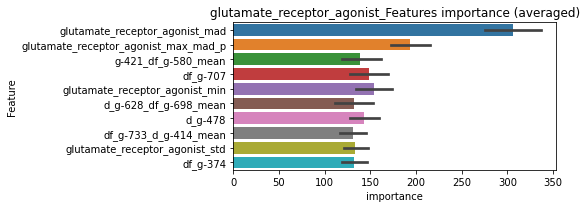

len(train_index) : 2784
len(valid_index) : 929
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00782191	valid_1's binary_logloss: 0.0431788
[600]	training's binary_logloss: 0.00107548	valid_1's binary_logloss: 0.0320476
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000964449	valid_1's binary_logloss: 0.0317173


len(train_index) : 2785
len(valid_index) : 928
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0083801	valid_1's binary_logloss: 0.0234642
[600]	training's binary_logloss: 0.00114229	valid_1's binary_logloss: 0.00962105
[900]	training's binary_logloss: 0.00058358	valid_1's binary_logloss: 0.00772335
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000555218	valid_1's binary_logloss: 0.00755275


len(train_index) : 2785
len(valid_index) : 928
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0076269	valid_1's binary_logloss: 0.0517151
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00156824	valid_1's binary_logloss: 0.042323


len(train_index) : 2785
len(valid_index) : 928
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0080198	valid_1's binary_logloss: 0.0236059
[600]	training's binary_logloss: 0.00113742	valid_1's binary_logloss: 0.0102957
[900]	training's binary_logloss: 0.000583058	valid_1's binary_logloss: 0.00847795
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000539016	valid_1's binary_logloss: 0.00823307


glutamate_receptor_agonist logloss: 0.022459918583500375


neg labels: 3289 → selected neg labels: 3235


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3235, target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.104334	valid_1's binary_logloss: 0.355314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0846763	valid_1's binary_logloss: 0.335779
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.0696542	valid_1's binary_logloss: 0.33326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0830399	valid_1's binary_logloss: 0.334153
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.0788059	valid_1's binary_logloss: 0.333333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0913538	valid_1's binary_logloss: 0.3206


1 / 3 AUC score:0.793
y_Threshold: 0.1298458, Threshold: 0.3679707, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.0590465	valid_1's binary_logloss: 0.315339


Remove_noisy_data: 626 → Positive_corect_labels: 399/3256
p_label_rate: 0.0100452 Vs.target_rate: 0.01541, Num_p_label: 40.0, conf_0:0.25758, conf_1:0.47836
Num_p_label: 40.0, Expected: 61.4, Adj_threshold_1: 0.3679707
Num_p_label: 49.0, Expected: 61.4, Adj_threshold_2: 0.3379707
threshold: 0.3379707, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 399.0/3256, y_label_rate: 0.1225430
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.0292043	valid_1's binary_logloss: 0.207241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201758	valid_1's binary_logloss: 0.154791
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.0084178	valid_1's binary_logloss: 0.148708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209388	valid_1's binary_logloss: 0.139936
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0137217	valid_1's binary_logloss: 0.136512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225196	valid_1's binary_logloss: 0.12861
[600]	training's binary_logloss: 0.00369064	valid_1's binary_logloss: 0.116023
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00389482	valid_1's binary_logloss: 

2 / 3 AUC score:0.960
y_Threshold: 0.0907594, Threshold: 0.3379707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 319.0/3096
p_label_rate: 0.0447012 Vs.target_rate: 0.01541, Num_p_label: 178.0, conf_0:0.27038, conf_1:0.40556
Num_p_label: 178.0, Expected: 61.4, Adj_threshold_1: 0.3379707
Num_p_label: 158.0, Expected: 61.4, Adj_threshold_2: 0.3879707
Num_p_label: 144.0, Expected: 61.4, Adj_threshold_3: 0.4379707
Num_p_label: 132.0, Expected: 61.4, Adj_threshold_4: 0.4879707
Num_p_label: 118.0, Expected: 61.4, Adj_threshold_5: 0.5379707
Num_p_label: 110.0, Expected: 61.4, Adj_threshold_6: 0.5879707
Num_p_label: 95.0, Expected: 61.4, Adj_threshold_7: 0.6379707
Num_p_label: 84.0, Expected: 61.4, Adj_threshold_8: 0.6879707
threshold: 0.6879707, positive_p_label: 84.0/3982, p_label_rate: 0.0210949
positive_y_label: 319.0/3096, y_label_rate: 0.1030362
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104187	valid_1's binary_logloss: 0.105674
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00428093	valid_1's binary_logloss: 0.100264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010863	valid_1's binary_logloss: 0.0957194
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00903721	valid_1's binary_logloss: 0.0946583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105071	valid_1's binary_logloss: 0.089764
[600]	training's binary_logloss: 0.0016865	valid_1's binary_logloss: 0.0799424
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00162941	valid_1's binary_logloss: 0.0795814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109299	valid_1's binary_logloss: 0.0993093


3 / 3 AUC score:0.986
y_Threshold: 0.0648478, Threshold: 0.6879707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 283.0/3024
p_label_rate: 0.0374184 Vs.target_rate: 0.01541, Num_p_label: 149.0, conf_0:0.50000, conf_1:0.75677
Num_p_label: 149.0, Expected: 61.4, Adj_threshold_1: 0.6879707


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00440456	valid_1's binary_logloss: 0.0956423


Num_p_label: 138.0, Expected: 61.4, Adj_threshold_2: 0.7379707
Num_p_label: 121.0, Expected: 61.4, Adj_threshold_3: 0.7879707
threshold: 0.7879707, positive_p_label: 121.0/3982, p_label_rate: 0.0303867
positive_y_label: 283.0/3024, y_label_rate: 0.0935847


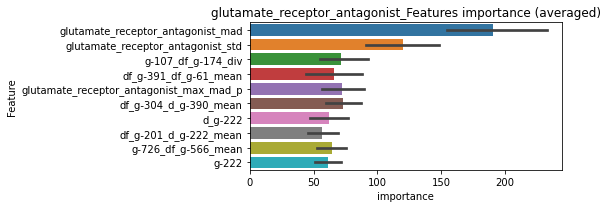

len(train_index) : 2268
len(valid_index) : 756
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0073088	valid_1's binary_logloss: 0.0850154


len(train_index) : 2268
len(valid_index) : 756
================================= fold 2/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00362612	valid_1's binary_logloss: 0.0817835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00757156	valid_1's binary_logloss: 0.0612667


len(train_index) : 2268
len(valid_index) : 756


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00159633	valid_1's binary_logloss: 0.0541388


================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00784903	valid_1's binary_logloss: 0.0426904
[600]	training's binary_logloss: 0.00128797	valid_1's binary_logloss: 0.0317029
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000723014	valid_1's binary_logloss: 0.0290587


len(train_index) : 2268
len(valid_index) : 756
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00717068	valid_1's binary_logloss: 0.0864316


glutamate_receptor_antagonist logloss: 0.06253194243015876


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0055822	valid_1's binary_logloss: 0.0851467
neg labels: 3289 → selected neg labels: 3287


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393374	valid_1's binary_logloss: 0.00881219
[600]	training's binary_logloss: 0.000531651	valid_1's binary_logloss: 0.00233166
[900]	training's binary_logloss: 0.000330772	valid_1's binary_logloss: 0.00173604
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000330896	valid_1's binary_logloss: 0.00173584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383573	valid_1's binary_logloss: 0.0155494
[600]	training's binary_logloss: 0.000512307	valid_1's binary_logloss: 0.00654737
[900]	training's binary_logloss: 0.000329014	valid_1's binary_logloss: 0.00559318
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000329047	valid_1's binary_logloss: 0.00559306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401723	valid_1's binary_logloss: 0.015678
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0022922, Threshold: 0.0172074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01205, conf_1:0.02237
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0172074
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0672074
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1172074
threshold: 0.1172074, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00358857	valid_1's binary_logloss: 0.0067153
[600]	training's binary_logloss: 0.000480052	valid_1's binary_logloss: 0.00142854
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000320892	valid_1's binary_logloss: 0.00109665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354155	valid_1's binary_logloss: 0.00963252
[600]	training's binary_logloss: 0.000467794	valid_1's binary_logloss: 0.00358729
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000332668	valid_1's binary_logloss: 0.00322167
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343867	valid_1's binary_logloss: 0.0143014
[600]	training's binary_logloss: 0.000466554	valid_1's binary_logloss: 0.00922539
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000345048	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0617152, Threshold: 0.1172074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0145655 Vs.target_rate: 0.00076, Num_p_label: 58.0, conf_0:0.09377, conf_1:0.14065
Num_p_label: 58.0, Expected: 3.0, Adj_threshold_1: 0.1172074
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_2: 0.1672074
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_3: 0.2172074
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_4: 0.2672074
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.3172074
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_6: 0.3672074
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_7: 0.4172074
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_8: 0.4672074
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_9: 0.5172074
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_10: 0.5672074
threshold: 0.6172074, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349141	valid_1's binary_logloss: 0.00634247
[600]	training's binary_logloss: 0.000461395	valid_1's binary_logloss: 0.00136606
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000326842	valid_1's binary_logloss: 0.00108434
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341269	valid_1's binary_logloss: 0.0084354
[600]	training's binary_logloss: 0.000458038	valid_1's binary_logloss: 0.00251399
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000327161	valid_1's binary_logloss: 0.0021366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00347809	valid_1's binary_logloss: 0.00696534
[600]	training's binary_logloss: 0.000468714	valid_1's binary_logloss: 0.00127909
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000334682	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0390187, Threshold: 0.6172074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00076, Num_p_label: 14.0, conf_0:0.50000, conf_1:0.67893
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.6172074
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.6672074
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.7172074
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.7672074
threshold: 0.7672074, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


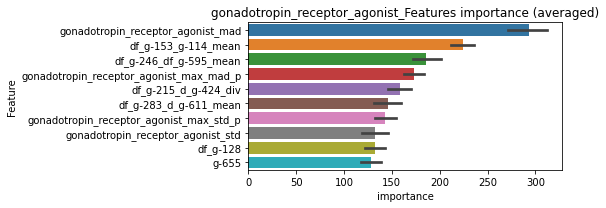

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332114	valid_1's binary_logloss: 0.00784657
[600]	training's binary_logloss: 0.000456497	valid_1's binary_logloss: 0.00255683
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000320648	valid_1's binary_logloss: 0.00220441


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342406	valid_1's binary_logloss: 0.0124723
[600]	training's binary_logloss: 0.000463976	valid_1's binary_logloss: 0.0071405
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000485857	valid_1's binary_logloss: 0.00706446


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343882	valid_1's binary_logloss: 0.0175935
[600]	training's binary_logloss: 0.00045356	valid_1's binary_logloss: 0.0103088
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000355681	valid_1's binary_logloss: 0.00996615


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336326	valid_1's binary_logloss: 0.00874342
[600]	training's binary_logloss: 0.000453042	valid_1's binary_logloss: 0.0035537
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.00031911	valid_1's binary_logloss: 0.00316439


gonadotropin_receptor_agonist logloss: 0.005599886464141759


neg labels: 3289 → selected neg labels: 3281


gsk_inhibitor, len(trt): 60, len(othr): 3281, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017746	valid_1's binary_logloss: 0.0756543
[600]	training's binary_logloss: 0.00232202	valid_1's binary_logloss: 0.0449559
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.00120289	valid_1's binary_logloss: 0.0419327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194903	valid_1's binary_logloss: 0.0624394
[600]	training's binary_logloss: 0.00241023	valid_1's binary_logloss: 0.0288228
[900]	training's binary_logloss: 0.000925747	valid_1's binary_logloss: 0.0233106
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000839456	valid_1's binary_logloss: 0.0228246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207439	valid_1's binary_logloss: 0.0535458
[600]	training's binary_logloss: 0.00259462	valid_1's binary_logloss: 0.018918
[900]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0121628, Threshold: 0.0827851, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.05795, conf_1:0.10762
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0827851
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1327851
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_3: 0.1827851
threshold: 0.1827851, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161428	valid_1's binary_logloss: 0.0653128
[600]	training's binary_logloss: 0.00203499	valid_1's binary_logloss: 0.0365044
[900]	training's binary_logloss: 0.000824647	valid_1's binary_logloss: 0.0309367
Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000657443	valid_1's binary_logloss: 0.0296374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161215	valid_1's binary_logloss: 0.0683871
[600]	training's binary_logloss: 0.00201141	valid_1's binary_logloss: 0.0462951
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00155286	valid_1's binary_logloss: 0.0453196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160126	valid_1's binary_logloss: 0.0608769
[600]	training's binary_logloss: 0.00203608	valid_1's binary_logloss: 0.0348737
Early stopping, best iterat

2 / 3 AUC score:0.999
y_Threshold: 0.0895629, Threshold: 0.1827851, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 640.0/3773
p_label_rate: 0.0130588 Vs.target_rate: 0.00252, Num_p_label: 52.0, conf_0:0.14623, conf_1:0.21934
Num_p_label: 52.0, Expected: 10.0, Adj_threshold_1: 0.1827851
Num_p_label: 43.0, Expected: 10.0, Adj_threshold_2: 0.2327851
Num_p_label: 32.0, Expected: 10.0, Adj_threshold_3: 0.2827851
Num_p_label: 27.0, Expected: 10.0, Adj_threshold_4: 0.3327851
Num_p_label: 25.0, Expected: 10.0, Adj_threshold_5: 0.3827851
Num_p_label: 22.0, Expected: 10.0, Adj_threshold_6: 0.4327851
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_7: 0.4827851
Num_p_label: 18.0, Expected: 10.0, Adj_threshold_8: 0.5327851
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_9: 0.5827851
threshold: 0.5827851, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 640.0/3773, y_label_rate: 0.1696263
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151375	valid_1's binary_logloss: 0.056222
[600]	training's binary_logloss: 0.00190143	valid_1's binary_logloss: 0.0341922
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.00129079	valid_1's binary_logloss: 0.0328331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145978	valid_1's binary_logloss: 0.0614638
[600]	training's binary_logloss: 0.00184642	valid_1's binary_logloss: 0.0397863
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000975069	valid_1's binary_logloss: 0.0376227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152177	valid_1's binary_logloss: 0.0490838
[600]	training's binary_logloss: 0.00190996	valid_1's binary_logloss: 0.0178315
[900]	training's binary_logloss: 0.000788474	valid_1's binary_logloss: 0.0123068
[1200]	training's binary_logl

3 / 3 AUC score:0.999
y_Threshold: 0.0796304, Threshold: 0.5827851, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 631.0/3755
p_label_rate: 0.0037670 Vs.target_rate: 0.00252, Num_p_label: 15.0, conf_0:0.50000, conf_1:0.64106
threshold: 0.5827851, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 631.0/3755, y_label_rate: 0.1680426


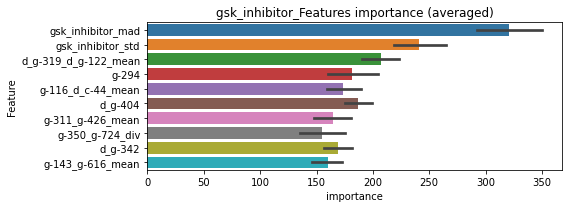

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147446	valid_1's binary_logloss: 0.0458202
[600]	training's binary_logloss: 0.00181916	valid_1's binary_logloss: 0.0197535
[900]	training's binary_logloss: 0.000762826	valid_1's binary_logloss: 0.0156718
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000625533	valid_1's binary_logloss: 0.0149349


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014229	valid_1's binary_logloss: 0.0704972
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00209107	valid_1's binary_logloss: 0.0542982


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143585	valid_1's binary_logloss: 0.0501111
[600]	training's binary_logloss: 0.00181293	valid_1's binary_logloss: 0.0255207
[900]	training's binary_logloss: 0.000766713	valid_1's binary_logloss: 0.0215818
Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.000625725	valid_1's binary_logloss: 0.0209061


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145968	valid_1's binary_logloss: 0.0417894
[600]	training's binary_logloss: 0.00183351	valid_1's binary_logloss: 0.0160591
[900]	training's binary_logloss: 0.000773281	valid_1's binary_logloss: 0.0121243
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.000667554	valid_1's binary_logloss: 0.0116246


gsk_inhibitor logloss: 0.025454517888698753


neg labels: 3289 → selected neg labels: 3273


hcv_inhibitor, len(trt): 72, len(othr): 3273, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016739	valid_1's binary_logloss: 0.07567
[600]	training's binary_logloss: 0.00229716	valid_1's binary_logloss: 0.0548688
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.00101878	valid_1's binary_logloss: 0.0522317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155297	valid_1's binary_logloss: 0.0832543
[600]	training's binary_logloss: 0.00215449	valid_1's binary_logloss: 0.0535363
[900]	training's binary_logloss: 0.000897499	valid_1's binary_logloss: 0.048632
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000767848	valid_1's binary_logloss: 0.047384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171192	valid_1's binary_logloss: 0.0505954
[600]	training's binary_logloss: 0.00234793	valid_1's binary_logloss: 0.0246316
[900]	training's binary_logloss:

1 / 3 AUC score:0.995
y_Threshold: 0.0192711, Threshold: 0.0974452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 640/3767
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.06821, conf_1:0.12668
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0974452
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_2: 0.1474452
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_3: 0.1974452
threshold: 0.1974452, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 640.0/3767, y_label_rate: 0.1698965
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126865	valid_1's binary_logloss: 0.0734379
[600]	training's binary_logloss: 0.00178469	valid_1's binary_logloss: 0.0552348
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00107451	valid_1's binary_logloss: 0.0531777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117434	valid_1's binary_logloss: 0.0857501
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00201473	valid_1's binary_logloss: 0.0738735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131754	valid_1's binary_logloss: 0.0491604
[600]	training's binary_logloss: 0.00182566	valid_1's binary_logloss: 0.0271125
[900]	training's binary_logloss: 0.000796042	valid_1's binary_logloss: 0.0240691
Early stopping, best iteration is:
[1102]	training's binary_logloss: 0.00064268	valid_1's binary_logloss: 0.0

2 / 3 AUC score:0.996
y_Threshold: 0.0683823, Threshold: 0.1974452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 622.0/3731
p_label_rate: 0.0165746 Vs.target_rate: 0.00302, Num_p_label: 66.0, conf_0:0.15796, conf_1:0.23693
Num_p_label: 66.0, Expected: 12.0, Adj_threshold_1: 0.1974452
Num_p_label: 54.0, Expected: 12.0, Adj_threshold_2: 0.2474452
Num_p_label: 44.0, Expected: 12.0, Adj_threshold_3: 0.2974452
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_4: 0.3474452
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_5: 0.3974452
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_6: 0.4474452
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_7: 0.4974452
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_8: 0.5474452
threshold: 0.5474452, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 622.0/3731, y_label_rate: 0.1667113
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108678	valid_1's binary_logloss: 0.0740299
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00266046	valid_1's binary_logloss: 0.0663991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011541	valid_1's binary_logloss: 0.0431929
[600]	training's binary_logloss: 0.00162266	valid_1's binary_logloss: 0.0225737
[900]	training's binary_logloss: 0.000732514	valid_1's binary_logloss: 0.0189877
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000619155	valid_1's binary_logloss: 0.0183889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111788	valid_1's binary_logloss: 0.0480059
[600]	training's binary_logloss: 0.00155512	valid_1's binary_logloss: 0.0312328
[900]	training's binary_logloss: 0.000713399	valid_1's binary_logloss: 0.0286547
Early stopping, best iterat

3 / 3 AUC score:0.998
y_Threshold: 0.0976525, Threshold: 0.5474452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 602.0/3691
p_label_rate: 0.0070316 Vs.target_rate: 0.00302, Num_p_label: 28.0, conf_0:0.49270, conf_1:0.60219
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_1: 0.5474452
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_2: 0.5974452
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_3: 0.6474452
threshold: 0.6474452, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 602.0/3691, y_label_rate: 0.1630994


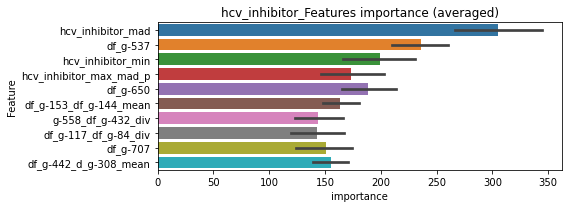

len(train_index) : 2768
len(valid_index) : 923
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104841	valid_1's binary_logloss: 0.0408818
[600]	training's binary_logloss: 0.00141341	valid_1's binary_logloss: 0.0251017
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000720977	valid_1's binary_logloss: 0.0228029


len(train_index) : 2768
len(valid_index) : 923
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00960601	valid_1's binary_logloss: 0.0659063
[600]	training's binary_logloss: 0.00135129	valid_1's binary_logloss: 0.0503403
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00132322	valid_1's binary_logloss: 0.0502938


len(train_index) : 2768
len(valid_index) : 923
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00989451	valid_1's binary_logloss: 0.0356766
[600]	training's binary_logloss: 0.00138152	valid_1's binary_logloss: 0.0209767
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000708081	valid_1's binary_logloss: 0.0192119


len(train_index) : 2769
len(valid_index) : 922
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100252	valid_1's binary_logloss: 0.0430186
[600]	training's binary_logloss: 0.00141907	valid_1's binary_logloss: 0.0287323
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00101556	valid_1's binary_logloss: 0.0276704


hcv_inhibitor logloss: 0.02999534769555032


neg labels: 3289 → selected neg labels: 3275


hdac_inhibitor, len(trt): 106, len(othr): 3275, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287398	valid_1's binary_logloss: 0.137957
[600]	training's binary_logloss: 0.00424126	valid_1's binary_logloss: 0.117499
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.00426009	valid_1's binary_logloss: 0.117443
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0281512	valid_1's binary_logloss: 0.126986
[600]	training's binary_logloss: 0.00421105	valid_1's binary_logloss: 0.0979088
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.003819	valid_1's binary_logloss: 0.0970883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278296	valid_1's binary_logloss: 0.117717
[600]	training's binary_logloss: 0.00417139	valid_1's binary_logloss: 0.096173
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00404903	valid_1's binary_logloss: 0.0960847
Tra

1 / 3 AUC score:0.983
y_Threshold: 0.0311630, Threshold: 0.1490490, pos_neg_ratio: 0.8000000
Remove_noisy_data: 187 → Positive_corect_labels: 627/3743
p_label_rate: 0.0100452 Vs.target_rate: 0.00445, Num_p_label: 40.0, conf_0:0.10433, conf_1:0.19376
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1490490
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_2: 0.1990490
threshold: 0.1990490, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 627.0/3743, y_label_rate: 0.1675127
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206136	valid_1's binary_logloss: 0.0830514
[600]	training's binary_logloss: 0.00297153	valid_1's binary_logloss: 0.0537731
[900]	training's binary_logloss: 0.0011471	valid_1's binary_logloss: 0.0482798
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000959667	valid_1's binary_logloss: 0.0473598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212849	valid_1's binary_logloss: 0.0912036
[600]	training's binary_logloss: 0.00305224	valid_1's binary_logloss: 0.0670966
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.00134736	valid_1's binary_logloss: 0.0632607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219098	valid_1's binary_logloss: 0.0850278
[600]	training's binary_logloss: 0.00313624	valid_1's binary_logloss: 0.055163
Early stopping, best iteration

2 / 3 AUC score:0.996
y_Threshold: 0.0718440, Threshold: 0.1990490, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 602.0/3693
p_label_rate: 0.0218483 Vs.target_rate: 0.00445, Num_p_label: 87.0, conf_0:0.15924, conf_1:0.23886
Num_p_label: 87.0, Expected: 17.7, Adj_threshold_1: 0.1990490
Num_p_label: 75.0, Expected: 17.7, Adj_threshold_2: 0.2490490
Num_p_label: 67.0, Expected: 17.7, Adj_threshold_3: 0.2990490
Num_p_label: 55.0, Expected: 17.7, Adj_threshold_4: 0.3490490
Num_p_label: 49.0, Expected: 17.7, Adj_threshold_5: 0.3990490
Num_p_label: 46.0, Expected: 17.7, Adj_threshold_6: 0.4490490
Num_p_label: 39.0, Expected: 17.7, Adj_threshold_7: 0.4990490
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_8: 0.5490490
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_9: 0.5990490
threshold: 0.5990490, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 602.0/3693, y_label_rate: 0.1630111
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182595	valid_1's binary_logloss: 0.0861997
[600]	training's binary_logloss: 0.00257441	valid_1's binary_logloss: 0.0680788
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00189599	valid_1's binary_logloss: 0.0667346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017447	valid_1's binary_logloss: 0.106989
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00433398	valid_1's binary_logloss: 0.0947289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186393	valid_1's binary_logloss: 0.0747036
[600]	training's binary_logloss: 0.00257432	valid_1's binary_logloss: 0.0480442
[900]	training's binary_logloss: 0.0010316	valid_1's binary_logloss: 0.0436258
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.00105852	valid_1's binary_logloss: 0.043564

3 / 3 AUC score:0.990
y_Threshold: 0.0794762, Threshold: 0.5990490, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 573.0/3635
p_label_rate: 0.0095429 Vs.target_rate: 0.00445, Num_p_label: 38.0, conf_0:0.50000, conf_1:0.65895
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_1: 0.5990490
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_2: 0.6490490
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_3: 0.6990490
threshold: 0.6990490, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 573.0/3635, y_label_rate: 0.1576341


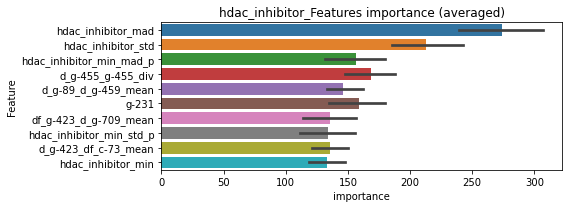

len(train_index) : 2726
len(valid_index) : 909
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151117	valid_1's binary_logloss: 0.0903473
[600]	training's binary_logloss: 0.00210882	valid_1's binary_logloss: 0.0708577
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00171706	valid_1's binary_logloss: 0.0702242


len(train_index) : 2726
len(valid_index) : 909
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155598	valid_1's binary_logloss: 0.0694433
[600]	training's binary_logloss: 0.00213776	valid_1's binary_logloss: 0.0495769
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.00172641	valid_1's binary_logloss: 0.0491893


len(train_index) : 2726
len(valid_index) : 909
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152639	valid_1's binary_logloss: 0.0523526
[600]	training's binary_logloss: 0.0021635	valid_1's binary_logloss: 0.0266476
[900]	training's binary_logloss: 0.000919706	valid_1's binary_logloss: 0.0221551
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000804515	valid_1's binary_logloss: 0.0214573


len(train_index) : 2727
len(valid_index) : 908
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152815	valid_1's binary_logloss: 0.0580685
[600]	training's binary_logloss: 0.0021382	valid_1's binary_logloss: 0.0342522
[900]	training's binary_logloss: 0.000898291	valid_1's binary_logloss: 0.0300773
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000884474	valid_1's binary_logloss: 0.0300039


hdac_inhibitor logloss: 0.04272216882469564


neg labels: 3289 → selected neg labels: 3283


histamine_receptor_agonist, len(trt): 59, len(othr): 3283, target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012165	valid_1's binary_logloss: 0.0678436
[600]	training's binary_logloss: 0.00166634	valid_1's binary_logloss: 0.0429784
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.00137833	valid_1's binary_logloss: 0.0415047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129816	valid_1's binary_logloss: 0.0679463
[600]	training's binary_logloss: 0.00170254	valid_1's binary_logloss: 0.0399644
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000835848	valid_1's binary_logloss: 0.0364697
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138271	valid_1's binary_logloss: 0.0416236
[600]	training's binary_logloss: 0.00183231	valid_1's binary_logloss: 0.0204026
[900]	training's binary_logloss: 0.000771151	valid_1's binary_logloss: 0.0172928
Early stopping, best iteratio

1 / 3 AUC score:0.999
y_Threshold: 0.0110670, Threshold: 0.0500134, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00248, Num_p_label: 40.0, conf_0:0.03501, conf_1:0.06502
Num_p_label: 40.0, Expected: 9.9, Adj_threshold_1: 0.0500134
Num_p_label: 21.0, Expected: 9.9, Adj_threshold_2: 0.1000134
threshold: 0.1000134, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108528	valid_1's binary_logloss: 0.0492535
[600]	training's binary_logloss: 0.00146446	valid_1's binary_logloss: 0.0313448
[900]	training's binary_logloss: 0.000653337	valid_1's binary_logloss: 0.0288916
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000653337	valid_1's binary_logloss: 0.0288916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106902	valid_1's binary_logloss: 0.0653186
[600]	training's binary_logloss: 0.00144124	valid_1's binary_logloss: 0.0442264
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000777246	valid_1's binary_logloss: 0.0413402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108709	valid_1's binary_logloss: 0.0510677
[600]	training's binary_logloss: 0.00147209	valid_1's binary_logloss: 0.0370497
Early stopping, best iterat

2 / 3 AUC score:0.999
y_Threshold: 0.0678960, Threshold: 0.1000134, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 640.0/3775
p_label_rate: 0.0163235 Vs.target_rate: 0.00248, Num_p_label: 65.0, conf_0:0.08001, conf_1:0.12002
Num_p_label: 65.0, Expected: 9.9, Adj_threshold_1: 0.1000134
Num_p_label: 53.0, Expected: 9.9, Adj_threshold_2: 0.1500134
Num_p_label: 46.0, Expected: 9.9, Adj_threshold_3: 0.2000134
Num_p_label: 34.0, Expected: 9.9, Adj_threshold_4: 0.2500134
Num_p_label: 31.0, Expected: 9.9, Adj_threshold_5: 0.3000134
Num_p_label: 28.0, Expected: 9.9, Adj_threshold_6: 0.3500134
Num_p_label: 25.0, Expected: 9.9, Adj_threshold_7: 0.4000134
Num_p_label: 22.0, Expected: 9.9, Adj_threshold_8: 0.4500134
threshold: 0.4500134, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 640.0/3775, y_label_rate: 0.1695364
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00919701	valid_1's binary_logloss: 0.0487912
[600]	training's binary_logloss: 0.00127199	valid_1's binary_logloss: 0.032324
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00110508	valid_1's binary_logloss: 0.0318762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101013	valid_1's binary_logloss: 0.0401022
[600]	training's binary_logloss: 0.00134596	valid_1's binary_logloss: 0.0216945
[900]	training's binary_logloss: 0.000617497	valid_1's binary_logloss: 0.0183129
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000577492	valid_1's binary_logloss: 0.0182042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00962044	valid_1's binary_logloss: 0.0377945
[600]	training's binary_logloss: 0.00132688	valid_1's binary_logloss: 0.0205684
[900]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.1108168, Threshold: 0.4500134, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 631.0/3757
p_label_rate: 0.0077850 Vs.target_rate: 0.00248, Num_p_label: 31.0, conf_0:0.40501, conf_1:0.49501
Num_p_label: 31.0, Expected: 9.9, Adj_threshold_1: 0.4500134
Num_p_label: 27.0, Expected: 9.9, Adj_threshold_2: 0.5000134
Num_p_label: 25.0, Expected: 9.9, Adj_threshold_3: 0.5500134
Num_p_label: 24.0, Expected: 9.9, Adj_threshold_4: 0.6000134
threshold: 0.6000134, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 631.0/3757, y_label_rate: 0.1679532


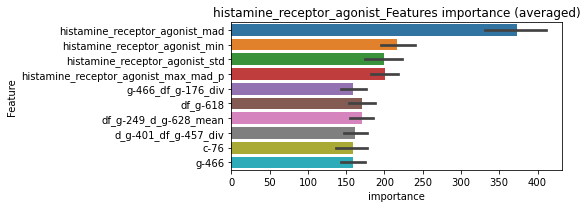

len(train_index) : 2817
len(valid_index) : 940
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863135	valid_1's binary_logloss: 0.061874
[600]	training's binary_logloss: 0.00117046	valid_1's binary_logloss: 0.047492
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000783232	valid_1's binary_logloss: 0.0461897


len(train_index) : 2818
len(valid_index) : 939
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00905115	valid_1's binary_logloss: 0.0324116
[600]	training's binary_logloss: 0.00122433	valid_1's binary_logloss: 0.0168805
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000615607	valid_1's binary_logloss: 0.0144661


len(train_index) : 2818
len(valid_index) : 939
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00933925	valid_1's binary_logloss: 0.0296081
[600]	training's binary_logloss: 0.00125463	valid_1's binary_logloss: 0.0144769
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000627731	valid_1's binary_logloss: 0.0126989


len(train_index) : 2818
len(valid_index) : 939
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00905203	valid_1's binary_logloss: 0.0374828
[600]	training's binary_logloss: 0.0012322	valid_1's binary_logloss: 0.0198998
[900]	training's binary_logloss: 0.000590105	valid_1's binary_logloss: 0.0166543
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000594308	valid_1's binary_logloss: 0.016591


histamine_receptor_agonist logloss: 0.022492734790333303


neg labels: 3289 → selected neg labels: 3255


histamine_receptor_antagonist, len(trt): 241, len(othr): 3255, target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0539562	valid_1's binary_logloss: 0.250617
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.0274444	valid_1's binary_logloss: 0.245274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0517227	valid_1's binary_logloss: 0.25463
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.0355606	valid_1's binary_logloss: 0.251675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0551266	valid_1's binary_logloss: 0.23354
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.0250525	valid_1's binary_logloss: 0.226684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0629869	valid_1's binary_logloss: 0.219361
[600]	training's binary_logloss: 0.0144865	valid_1's binary_logloss: 0.196758
Early stopping, best iteratio

1 / 3 AUC score:0.899
y_Threshold: 0.0742966, Threshold: 0.4351103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 399 → Positive_corect_labels: 517/3507
p_label_rate: 0.0100452 Vs.target_rate: 0.01012, Num_p_label: 40.0, conf_0:0.30458, conf_1:0.56564
threshold: 0.4351103, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 517.0/3507, y_label_rate: 0.1474194
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233958	valid_1's binary_logloss: 0.124686
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00729469	valid_1's binary_logloss: 0.115544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022146	valid_1's binary_logloss: 0.132027
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00672119	valid_1's binary_logloss: 0.123033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215554	valid_1's binary_logloss: 0.132929
[600]	training's binary_logloss: 0.00348793	valid_1's binary_logloss: 0.123387
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00348793	valid_1's binary_logloss: 0.123387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197522	valid_1's binary_logloss: 0.148949
Early stopping, best ite

2 / 3 AUC score:0.974
y_Threshold: 0.0855578, Threshold: 0.4351103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 122 → Positive_corect_labels: 456.0/3385
p_label_rate: 0.0339026 Vs.target_rate: 0.01012, Num_p_label: 135.0, conf_0:0.34809, conf_1:0.52213
Num_p_label: 135.0, Expected: 40.3, Adj_threshold_1: 0.4351103
Num_p_label: 122.0, Expected: 40.3, Adj_threshold_2: 0.4851103
Num_p_label: 112.0, Expected: 40.3, Adj_threshold_3: 0.5351103
Num_p_label: 94.0, Expected: 40.3, Adj_threshold_4: 0.5851103
Num_p_label: 69.0, Expected: 40.3, Adj_threshold_5: 0.6351103
Num_p_label: 49.0, Expected: 40.3, Adj_threshold_6: 0.6851103
threshold: 0.6851103, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 456.0/3385, y_label_rate: 0.1347120
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127706	valid_1's binary_logloss: 0.0945448
[600]	training's binary_logloss: 0.00201615	valid_1's binary_logloss: 0.079588
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00167695	valid_1's binary_logloss: 0.0789246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014143	valid_1's binary_logloss: 0.0785172
[600]	training's binary_logloss: 0.00221895	valid_1's binary_logloss: 0.06578
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00210269	valid_1's binary_logloss: 0.0654785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131163	valid_1's binary_logloss: 0.0922254
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00291432	valid_1's binary_logloss: 0.0854819
Training until validation scores don't improve for 30 rounds
[300]	training's b

3 / 3 AUC score:0.992
y_Threshold: 0.0892294, Threshold: 0.6851103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 418.0/3309
p_label_rate: 0.0313913 Vs.target_rate: 0.01012, Num_p_label: 125.0, conf_0:0.50000, conf_1:0.75362
Num_p_label: 125.0, Expected: 40.3, Adj_threshold_1: 0.6851103
Num_p_label: 107.0, Expected: 40.3, Adj_threshold_2: 0.7351103
Num_p_label: 95.0, Expected: 40.3, Adj_threshold_3: 0.7851103
threshold: 0.7851103, positive_p_label: 95.0/3982, p_label_rate: 0.0238574
positive_y_label: 418.0/3309, y_label_rate: 0.1263222


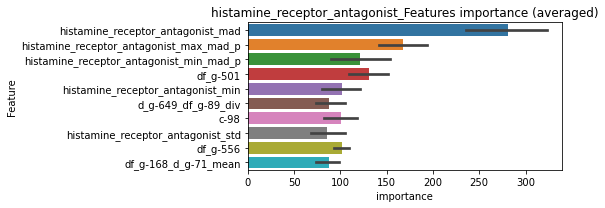

len(train_index) : 2481
len(valid_index) : 828
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010273	valid_1's binary_logloss: 0.0604793
[600]	training's binary_logloss: 0.00159867	valid_1's binary_logloss: 0.0503976
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000901682	valid_1's binary_logloss: 0.0492346


len(train_index) : 2482
len(valid_index) : 827
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00977282	valid_1's binary_logloss: 0.0732067


len(train_index) : 2482
len(valid_index) : 827
================================= fold 3/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00395981	valid_1's binary_logloss: 0.0685072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00964585	valid_1's binary_logloss: 0.0738699
[600]	training's binary_logloss: 0.0015406	valid_1's binary_logloss: 0.0585399
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00128471	valid_1's binary_logloss: 0.0580835


len(train_index) : 2482
len(valid_index) : 827
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931372	valid_1's binary_logloss: 0.0884864
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00238637	valid_1's binary_logloss: 0.0811483


histamine_receptor_antagonist logloss: 0.06423888065344405


neg labels: 3289 → selected neg labels: 3283


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3283, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650931	valid_1's binary_logloss: 0.0174733
[600]	training's binary_logloss: 0.000795634	valid_1's binary_logloss: 0.00441177
[900]	training's binary_logloss: 0.000423113	valid_1's binary_logloss: 0.00322517
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.00041536	valid_1's binary_logloss: 0.0032005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637406	valid_1's binary_logloss: 0.0202603
[600]	training's binary_logloss: 0.000794775	valid_1's binary_logloss: 0.00811542
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000426469	valid_1's binary_logloss: 0.00691252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649632	valid_1's binary_logloss: 0.0160487
[600]	training's binary_logloss: 0.000805153	valid_1's binary_logloss: 0.00543353
Early stopping, b

1 / 3 AUC score:1.000
y_Threshold: 0.0035334, Threshold: 0.0294322, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.02060, conf_1:0.03826
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0294322
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_2: 0.0794322
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_3: 0.1294322
threshold: 0.1294322, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574454	valid_1's binary_logloss: 0.0163365
[600]	training's binary_logloss: 0.000714771	valid_1's binary_logloss: 0.00391297
[900]	training's binary_logloss: 0.000403733	valid_1's binary_logloss: 0.00288637
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000404726	valid_1's binary_logloss: 0.00288335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00612234	valid_1's binary_logloss: 0.0166752
[600]	training's binary_logloss: 0.000737698	valid_1's binary_logloss: 0.00486245
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000423323	valid_1's binary_logloss: 0.00373725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598544	valid_1's binary_logloss: 0.0131092
[600]	training's binary_logloss: 0.000740068	valid_1's binary_logloss: 0.00410618
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.2444408, Threshold: 0.1294322, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0097941 Vs.target_rate: 0.00101, Num_p_label: 39.0, conf_0:0.10355, conf_1:0.15532
Num_p_label: 39.0, Expected: 4.0, Adj_threshold_1: 0.1294322
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_2: 0.1794322
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_3: 0.2294322
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_4: 0.2794322
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_5: 0.3294322
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_6: 0.3794322
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_7: 0.4294322
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_8: 0.4794322
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_9: 0.5294322
threshold: 0.5294322, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00569371	valid_1's binary_logloss: 0.0276347
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00141384	valid_1's binary_logloss: 0.0228849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00594085	valid_1's binary_logloss: 0.0144054
[600]	training's binary_logloss: 0.000727817	valid_1's binary_logloss: 0.00458043
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000442471	valid_1's binary_logloss: 0.00372788
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592265	valid_1's binary_logloss: 0.0126121
[600]	training's binary_logloss: 0.000728033	valid_1's binary_logloss: 0.00299866
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000425511	valid_1's binary_logloss: 0.00225557
Training until validation scores don't improve for 30 rounds
[30

3 / 3 AUC score:1.000
y_Threshold: 0.0819535, Threshold: 0.5294322, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0022602 Vs.target_rate: 0.00101, Num_p_label: 9.0, conf_0:0.47649, conf_1:0.58238
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.5294322
threshold: 0.5294322, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


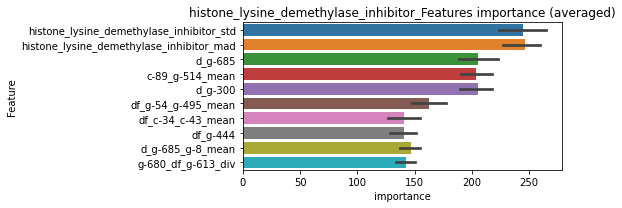

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00549317	valid_1's binary_logloss: 0.0237911
[600]	training's binary_logloss: 0.000696479	valid_1's binary_logloss: 0.0132572
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000407138	valid_1's binary_logloss: 0.0117209


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055124	valid_1's binary_logloss: 0.0128885
[600]	training's binary_logloss: 0.000699637	valid_1's binary_logloss: 0.00336116
[900]	training's binary_logloss: 0.000411426	valid_1's binary_logloss: 0.00247952
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.0004116	valid_1's binary_logloss: 0.00247888


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574451	valid_1's binary_logloss: 0.0121052
[600]	training's binary_logloss: 0.00070863	valid_1's binary_logloss: 0.00384351
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000482229	valid_1's binary_logloss: 0.00329362


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00544062	valid_1's binary_logloss: 0.0183439
[600]	training's binary_logloss: 0.00069065	valid_1's binary_logloss: 0.00800571
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000438645	valid_1's binary_logloss: 0.00697212


histone_lysine_demethylase_inhibitor logloss: 0.006117461683584073


neg labels: 3289 → selected neg labels: 3284


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3284, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779126	valid_1's binary_logloss: 0.0334144
[600]	training's binary_logloss: 0.000963834	valid_1's binary_logloss: 0.0149741
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.00048979	valid_1's binary_logloss: 0.0129962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00763685	valid_1's binary_logloss: 0.0274513
[600]	training's binary_logloss: 0.000964048	valid_1's binary_logloss: 0.0125562
[900]	training's binary_logloss: 0.000468656	valid_1's binary_logloss: 0.0105465
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000468656	valid_1's binary_logloss: 0.0105465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00807023	valid_1's binary_logloss: 0.0271799
[600]	training's binary_logloss: 0.000999021	valid_1's binary_logloss: 0.0129513
Early stopping, best i

1 / 3 AUC score:1.000
y_Threshold: 0.0053483, Threshold: 0.0463191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00134, Num_p_label: 40.0, conf_0:0.03242, conf_1:0.06021
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0463191
Num_p_label: 18.0, Expected: 5.4, Adj_threshold_2: 0.0963191
Num_p_label: 12.0, Expected: 5.4, Adj_threshold_3: 0.1463191
threshold: 0.1463191, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00712142	valid_1's binary_logloss: 0.0330323
[600]	training's binary_logloss: 0.000890278	valid_1's binary_logloss: 0.0163194
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.00051144	valid_1's binary_logloss: 0.0144215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00707177	valid_1's binary_logloss: 0.0202176
[600]	training's binary_logloss: 0.000882878	valid_1's binary_logloss: 0.00826391
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000546383	valid_1's binary_logloss: 0.00717789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00714381	valid_1's binary_logloss: 0.0260429
[600]	training's binary_logloss: 0.000897306	valid_1's binary_logloss: 0.0134479
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.0007958	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0576304, Threshold: 0.1463191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0143144 Vs.target_rate: 0.00134, Num_p_label: 57.0, conf_0:0.11706, conf_1:0.17558
Num_p_label: 57.0, Expected: 5.4, Adj_threshold_1: 0.1463191
Num_p_label: 51.0, Expected: 5.4, Adj_threshold_2: 0.1963191
Num_p_label: 43.0, Expected: 5.4, Adj_threshold_3: 0.2463191
Num_p_label: 41.0, Expected: 5.4, Adj_threshold_4: 0.2963191
Num_p_label: 36.0, Expected: 5.4, Adj_threshold_5: 0.3463191
Num_p_label: 31.0, Expected: 5.4, Adj_threshold_6: 0.3963191
Num_p_label: 27.0, Expected: 5.4, Adj_threshold_7: 0.4463191
Num_p_label: 27.0, Expected: 5.4, Adj_threshold_8: 0.4963191
Num_p_label: 22.0, Expected: 5.4, Adj_threshold_9: 0.5463191
Num_p_label: 18.0, Expected: 5.4, Adj_threshold_10: 0.5963191
threshold: 0.6463191, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3794, y_label_rate: 0.1710596
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00668828	valid_1's binary_logloss: 0.0335687
[600]	training's binary_logloss: 0.000839129	valid_1's binary_logloss: 0.0228726
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000807039	valid_1's binary_logloss: 0.0227337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0067037	valid_1's binary_logloss: 0.0276385
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00148109	valid_1's binary_logloss: 0.0199977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651835	valid_1's binary_logloss: 0.0237842
[600]	training's binary_logloss: 0.000836552	valid_1's binary_logloss: 0.0104759
[900]	training's binary_logloss: 0.000440116	valid_1's binary_logloss: 0.00861939
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.00044422	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0652103, Threshold: 0.6463191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 642.0/3780
p_label_rate: 0.0047715 Vs.target_rate: 0.00134, Num_p_label: 19.0, conf_0:0.50000, conf_1:0.71095
Num_p_label: 19.0, Expected: 5.4, Adj_threshold_1: 0.6463191
Num_p_label: 19.0, Expected: 5.4, Adj_threshold_2: 0.6963191
Num_p_label: 18.0, Expected: 5.4, Adj_threshold_3: 0.7463191
Num_p_label: 16.0, Expected: 5.4, Adj_threshold_4: 0.7963191
threshold: 0.7963191, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 642.0/3780, y_label_rate: 0.1698413


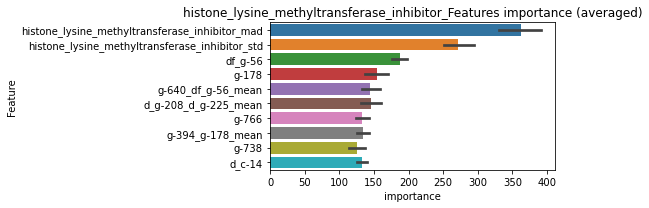

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610195	valid_1's binary_logloss: 0.0209497
[600]	training's binary_logloss: 0.000806171	valid_1's binary_logloss: 0.00829857
[900]	training's binary_logloss: 0.000432985	valid_1's binary_logloss: 0.00670183
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000419659	valid_1's binary_logloss: 0.00665094


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616109	valid_1's binary_logloss: 0.0184541
[600]	training's binary_logloss: 0.000783579	valid_1's binary_logloss: 0.00664868
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000502552	valid_1's binary_logloss: 0.00567122


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00635341	valid_1's binary_logloss: 0.0241148
[600]	training's binary_logloss: 0.000816255	valid_1's binary_logloss: 0.0105808
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000513034	valid_1's binary_logloss: 0.0094083


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00606815	valid_1's binary_logloss: 0.02411
[600]	training's binary_logloss: 0.000794382	valid_1's binary_logloss: 0.0154792
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000570614	valid_1's binary_logloss: 0.015079


histone_lysine_methyltransferase_inhibitor logloss: 0.009205610058530277


neg labels: 3289 → selected neg labels: 3280


hiv_inhibitor, len(trt): 72, len(othr): 3280, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172785	valid_1's binary_logloss: 0.0690073
[600]	training's binary_logloss: 0.0022442	valid_1's binary_logloss: 0.0410078
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.00122791	valid_1's binary_logloss: 0.0371644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173463	valid_1's binary_logloss: 0.0578705
[600]	training's binary_logloss: 0.00230246	valid_1's binary_logloss: 0.0333826
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.0012841	valid_1's binary_logloss: 0.0309133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169305	valid_1's binary_logloss: 0.0512594
[600]	training's binary_logloss: 0.00227179	valid_1's binary_logloss: 0.0261833
[900]	training's binary_logloss: 0.000925643	valid_1's binary_logloss: 0.0226706
Early stopping, best iteration 

1 / 3 AUC score:0.998
y_Threshold: 0.0127539, Threshold: 0.2316426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.16215, conf_1:0.30114
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.2316426
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_2: 0.2816426
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_3: 0.3316426
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_4: 0.3816426
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_5: 0.4316426
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_6: 0.4816426
threshold: 0.4816426, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149556	valid_1's binary_logloss: 0.0585084
[600]	training's binary_logloss: 0.00195169	valid_1's binary_logloss: 0.0304458
[900]	training's binary_logloss: 0.000823335	valid_1's binary_logloss: 0.0273166
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000714898	valid_1's binary_logloss: 0.0269334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158673	valid_1's binary_logloss: 0.0490417
[600]	training's binary_logloss: 0.0020656	valid_1's binary_logloss: 0.0270717
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00115136	valid_1's binary_logloss: 0.0248976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014943	valid_1's binary_logloss: 0.0585441
[600]	training's binary_logloss: 0.00193945	valid_1's binary_logloss: 0.0342921
[900]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0590281, Threshold: 0.4816426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0150678 Vs.target_rate: 0.00302, Num_p_label: 60.0, conf_0:0.38531, conf_1:0.57797
Num_p_label: 60.0, Expected: 12.0, Adj_threshold_1: 0.4816426
Num_p_label: 52.0, Expected: 12.0, Adj_threshold_2: 0.5316426
Num_p_label: 49.0, Expected: 12.0, Adj_threshold_3: 0.5816426
Num_p_label: 44.0, Expected: 12.0, Adj_threshold_4: 0.6316426
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_5: 0.6816426
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_6: 0.7316426
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_7: 0.7816426
threshold: 0.7816426, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 647.0/3786, y_label_rate: 0.1708928
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134093	valid_1's binary_logloss: 0.0724759
[600]	training's binary_logloss: 0.00182741	valid_1's binary_logloss: 0.0447831
[900]	training's binary_logloss: 0.000793843	valid_1's binary_logloss: 0.0392249
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000800208	valid_1's binary_logloss: 0.0391072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144183	valid_1's binary_logloss: 0.0504559
[600]	training's binary_logloss: 0.00190811	valid_1's binary_logloss: 0.0294747
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.00107665	valid_1's binary_logloss: 0.0273581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014586	valid_1's binary_logloss: 0.0509289
[600]	training's binary_logloss: 0.00190031	valid_1's binary_logloss: 0.0267779
Early stopping, best iteratio

3 / 3 AUC score:1.000
y_Threshold: 0.0706852, Threshold: 0.7816426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 639.0/3770
p_label_rate: 0.0065294 Vs.target_rate: 0.00302, Num_p_label: 26.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_1: 0.7816426
threshold: 0.7816426, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 639.0/3770, y_label_rate: 0.1694960


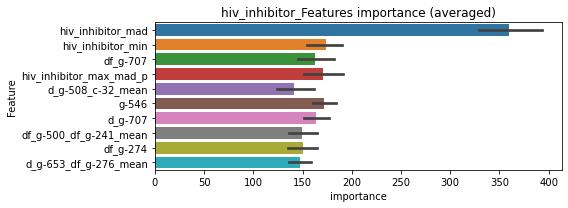

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135614	valid_1's binary_logloss: 0.0737985
[600]	training's binary_logloss: 0.00182212	valid_1's binary_logloss: 0.0588322
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00196988	valid_1's binary_logloss: 0.0582122


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137451	valid_1's binary_logloss: 0.0616935
[600]	training's binary_logloss: 0.00177772	valid_1's binary_logloss: 0.0368344
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000857447	valid_1's binary_logloss: 0.0339289


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013265	valid_1's binary_logloss: 0.0490027
[600]	training's binary_logloss: 0.00180017	valid_1's binary_logloss: 0.0265807
[900]	training's binary_logloss: 0.000783473	valid_1's binary_logloss: 0.0235427
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000742774	valid_1's binary_logloss: 0.0233923


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142282	valid_1's binary_logloss: 0.0550461
[600]	training's binary_logloss: 0.00191237	valid_1's binary_logloss: 0.0345829
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.00127518	valid_1's binary_logloss: 0.0335438


hiv_inhibitor logloss: 0.03727398737811148


neg labels: 3289 → selected neg labels: 3246


hmgcr_inhibitor, len(trt): 283, len(othr): 3246, target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0746937	valid_1's binary_logloss: 0.297054
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.0341701	valid_1's binary_logloss: 0.28967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0704586	valid_1's binary_logloss: 0.305682
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.050355	valid_1's binary_logloss: 0.30196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0782133	valid_1's binary_logloss: 0.276811
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.0259093	valid_1's binary_logloss: 0.259519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0769509	valid_1's binary_logloss: 0.276479
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.0320382	valid_1's binary_logloss: 0.26

1 / 3 AUC score:0.870
y_Threshold: 0.0978723, Threshold: 0.5282348, pos_neg_ratio: 0.8000000
Remove_noisy_data: 496 → Positive_corect_labels: 466/3399
p_label_rate: 0.0100452 Vs.target_rate: 0.01188, Num_p_label: 40.0, conf_0:0.36976, conf_1:0.68671
threshold: 0.5282348, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 466.0/3399, y_label_rate: 0.1370991
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0291162	valid_1's binary_logloss: 0.153555
[600]	training's binary_logloss: 0.00459436	valid_1's binary_logloss: 0.135796
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00364161	valid_1's binary_logloss: 0.135164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0283479	valid_1's binary_logloss: 0.153881
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00545248	valid_1's binary_logloss: 0.132967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285314	valid_1's binary_logloss: 0.13814
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00784074	valid_1's binary_logloss: 0.121432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0290852	valid_1's binary_logloss: 0.149397
[600]	training's binary_

2 / 3 AUC score:0.976
y_Threshold: 0.0908119, Threshold: 0.5282348, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 408.0/3283
p_label_rate: 0.0246107 Vs.target_rate: 0.01188, Num_p_label: 98.0, conf_0:0.42259, conf_1:0.63388
Num_p_label: 98.0, Expected: 47.3, Adj_threshold_1: 0.5282348
Num_p_label: 93.0, Expected: 47.3, Adj_threshold_2: 0.5782348
Num_p_label: 85.0, Expected: 47.3, Adj_threshold_3: 0.6282348
Num_p_label: 74.0, Expected: 47.3, Adj_threshold_4: 0.6782348
Num_p_label: 60.0, Expected: 47.3, Adj_threshold_5: 0.7282348
threshold: 0.7282348, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 408.0/3283, y_label_rate: 0.1242766
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187127	valid_1's binary_logloss: 0.113783
[600]	training's binary_logloss: 0.00292907	valid_1's binary_logloss: 0.0932233
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00182213	valid_1's binary_logloss: 0.0910877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161102	valid_1's binary_logloss: 0.133089
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00977101	valid_1's binary_logloss: 0.128393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183789	valid_1's binary_logloss: 0.0841064
[600]	training's binary_logloss: 0.00288992	valid_1's binary_logloss: 0.0607333
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00127275	valid_1's binary_logloss: 0.0565528
Training until validation scores don't improve for 30 rounds
[300]	training's 

3 / 3 AUC score:0.985
y_Threshold: 0.0966564, Threshold: 0.7282348, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 377.0/3221
p_label_rate: 0.0226017 Vs.target_rate: 0.01188, Num_p_label: 90.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 90.0, Expected: 47.3, Adj_threshold_1: 0.7282348
Num_p_label: 76.0, Expected: 47.3, Adj_threshold_2: 0.7782348
threshold: 0.7782348, positive_p_label: 76.0/3982, p_label_rate: 0.0190859
positive_y_label: 377.0/3221, y_label_rate: 0.1170444


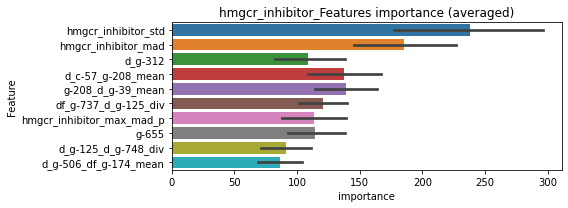

len(train_index) : 2415
len(valid_index) : 806
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134453	valid_1's binary_logloss: 0.0995254
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00320851	valid_1's binary_logloss: 0.0885247


len(train_index) : 2416
len(valid_index) : 805
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133394	valid_1's binary_logloss: 0.0877287
[600]	training's binary_logloss: 0.00212484	valid_1's binary_logloss: 0.0725873
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00165283	valid_1's binary_logloss: 0.0716143


len(train_index) : 2416
len(valid_index) : 805
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139733	valid_1's binary_logloss: 0.0731504
[600]	training's binary_logloss: 0.00218183	valid_1's binary_logloss: 0.05089
[900]	training's binary_logloss: 0.000962712	valid_1's binary_logloss: 0.0469798
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000942363	valid_1's binary_logloss: 0.0468686


len(train_index) : 2416
len(valid_index) : 805
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013655	valid_1's binary_logloss: 0.109135


hmgcr_inhibitor logloss: 0.07716302593599732


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00482501	valid_1's binary_logloss: 0.10163
neg labels: 3289 → selected neg labels: 3272


hsp_inhibitor, len(trt): 93, len(othr): 3272, target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231379	valid_1's binary_logloss: 0.0988829
[600]	training's binary_logloss: 0.00342478	valid_1's binary_logloss: 0.0694316
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.00224952	valid_1's binary_logloss: 0.0673728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231358	valid_1's binary_logloss: 0.0940745
[600]	training's binary_logloss: 0.00343992	valid_1's binary_logloss: 0.0574297
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.00138017	valid_1's binary_logloss: 0.0493547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022169	valid_1's binary_logloss: 0.0884666
[600]	training's binary_logloss: 0.00329578	valid_1's binary_logloss: 0.0601504
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00177149	valid_1's binary_logloss: 0.0568

1 / 3 AUC score:0.996
y_Threshold: 0.0257552, Threshold: 0.2058092, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 640/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00391, Num_p_label: 40.0, conf_0:0.14407, conf_1:0.26755
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.2058092
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_2: 0.2558092
Num_p_label: 25.0, Expected: 15.6, Adj_threshold_3: 0.3058092
Num_p_label: 15.0, Expected: 15.6, Adj_threshold_4: 0.3558092
threshold: 0.3558092, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 640.0/3766, y_label_rate: 0.1699416
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180073	valid_1's binary_logloss: 0.098289
[600]	training's binary_logloss: 0.00255658	valid_1's binary_logloss: 0.0768591
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00211861	valid_1's binary_logloss: 0.0760929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019081	valid_1's binary_logloss: 0.0812554
[600]	training's binary_logloss: 0.00273441	valid_1's binary_logloss: 0.0569554
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.00123418	valid_1's binary_logloss: 0.054346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190224	valid_1's binary_logloss: 0.0648674
[600]	training's binary_logloss: 0.00271384	valid_1's binary_logloss: 0.0403674
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00127845	valid_1's binary_logloss: 0.036791

2 / 3 AUC score:0.995
y_Threshold: 0.0728334, Threshold: 0.3558092, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 614.0/3714
p_label_rate: 0.0118031 Vs.target_rate: 0.00391, Num_p_label: 47.0, conf_0:0.28465, conf_1:0.42697
Num_p_label: 47.0, Expected: 15.6, Adj_threshold_1: 0.3558092
Num_p_label: 44.0, Expected: 15.6, Adj_threshold_2: 0.4058092
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_3: 0.4558092
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_4: 0.5058092
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_5: 0.5558092
Num_p_label: 14.0, Expected: 15.6, Adj_threshold_6: 0.6058092
threshold: 0.6058092, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 614.0/3714, y_label_rate: 0.1653204
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155679	valid_1's binary_logloss: 0.0887451
[600]	training's binary_logloss: 0.00219689	valid_1's binary_logloss: 0.0642852
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00128165	valid_1's binary_logloss: 0.0629279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160562	valid_1's binary_logloss: 0.0681381
[600]	training's binary_logloss: 0.00226894	valid_1's binary_logloss: 0.0457577
[900]	training's binary_logloss: 0.000951168	valid_1's binary_logloss: 0.0418122
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.00095458	valid_1's binary_logloss: 0.0417505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160513	valid_1's binary_logloss: 0.0668207
[600]	training's binary_logloss: 0.00228613	valid_1's binary_logloss: 0.0424245
[900]	training's binary_loglo

3 / 3 AUC score:0.997
y_Threshold: 0.0933692, Threshold: 0.6058092, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 593.0/3672
p_label_rate: 0.0067805 Vs.target_rate: 0.00391, Num_p_label: 27.0, conf_0:0.50000, conf_1:0.66639
Num_p_label: 27.0, Expected: 15.6, Adj_threshold_1: 0.6058092
Num_p_label: 19.0, Expected: 15.6, Adj_threshold_2: 0.6558092
threshold: 0.6558092, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 593.0/3672, y_label_rate: 0.1614924


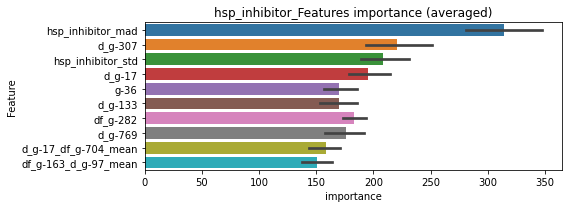

len(train_index) : 2754
len(valid_index) : 918
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147068	valid_1's binary_logloss: 0.0781613
[600]	training's binary_logloss: 0.00203462	valid_1's binary_logloss: 0.0572322
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.00111742	valid_1's binary_logloss: 0.054738


len(train_index) : 2754
len(valid_index) : 918
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014967	valid_1's binary_logloss: 0.0483798
[600]	training's binary_logloss: 0.00206869	valid_1's binary_logloss: 0.0218794
[900]	training's binary_logloss: 0.000875246	valid_1's binary_logloss: 0.0171237
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000726772	valid_1's binary_logloss: 0.0164241


len(train_index) : 2754
len(valid_index) : 918
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146421	valid_1's binary_logloss: 0.0564205
[600]	training's binary_logloss: 0.00203252	valid_1's binary_logloss: 0.0317625
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00117187	valid_1's binary_logloss: 0.0292824


len(train_index) : 2754
len(valid_index) : 918
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155438	valid_1's binary_logloss: 0.0482613
[600]	training's binary_logloss: 0.00211905	valid_1's binary_logloss: 0.0211668
[900]	training's binary_logloss: 0.000886013	valid_1's binary_logloss: 0.0153914
[1200]	training's binary_logloss: 0.000665548	valid_1's binary_logloss: 0.0139222
Early stopping, best iteration is:
[1194]	training's binary_logloss: 0.000668405	valid_1's binary_logloss: 0.0138844


hsp_inhibitor logloss: 0.028587589608404223


neg labels: 3289 → selected neg labels: 3283


igf-1_inhibitor, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111939	valid_1's binary_logloss: 0.0335035
[600]	training's binary_logloss: 0.00133867	valid_1's binary_logloss: 0.0137073
[900]	training's binary_logloss: 0.000598306	valid_1's binary_logloss: 0.0111546
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000607856	valid_1's binary_logloss: 0.0110963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100487	valid_1's binary_logloss: 0.0346065
[600]	training's binary_logloss: 0.00123938	valid_1's binary_logloss: 0.0180632
[900]	training's binary_logloss: 0.000563069	valid_1's binary_logloss: 0.0163352
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000552447	valid_1's binary_logloss: 0.0162675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111338	valid_1's binary_logloss: 0.023467
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0065940, Threshold: 0.0948004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.06636, conf_1:0.12324
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0948004
Num_p_label: 22.0, Expected: 6.2, Adj_threshold_2: 0.1448004
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_3: 0.1948004
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_4: 0.2448004
threshold: 0.2448004, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00904224	valid_1's binary_logloss: 0.0451748
[600]	training's binary_logloss: 0.00113499	valid_1's binary_logloss: 0.0313676
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00107301	valid_1's binary_logloss: 0.0310576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00964551	valid_1's binary_logloss: 0.021256
[600]	training's binary_logloss: 0.00118702	valid_1's binary_logloss: 0.00599463
[900]	training's binary_logloss: 0.000541347	valid_1's binary_logloss: 0.00420904
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000502001	valid_1's binary_logloss: 0.00409985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00899247	valid_1's binary_logloss: 0.0247237
[600]	training's binary_logloss: 0.00116249	valid_1's binary_logloss: 0.00864455
[900]	training's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0598559, Threshold: 0.2448004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0158212 Vs.target_rate: 0.00155, Num_p_label: 63.0, conf_0:0.19584, conf_1:0.29376
Num_p_label: 63.0, Expected: 6.2, Adj_threshold_1: 0.2448004
Num_p_label: 59.0, Expected: 6.2, Adj_threshold_2: 0.2948004
Num_p_label: 50.0, Expected: 6.2, Adj_threshold_3: 0.3448004
Num_p_label: 39.0, Expected: 6.2, Adj_threshold_4: 0.3948004
Num_p_label: 32.0, Expected: 6.2, Adj_threshold_5: 0.4448004
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_6: 0.4948004
Num_p_label: 22.0, Expected: 6.2, Adj_threshold_7: 0.5448004
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_8: 0.5948004
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_9: 0.6448004
threshold: 0.6448004, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955461	valid_1's binary_logloss: 0.0277267
[600]	training's binary_logloss: 0.00117403	valid_1's binary_logloss: 0.0130908
[900]	training's binary_logloss: 0.00053993	valid_1's binary_logloss: 0.0116086
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000525219	valid_1's binary_logloss: 0.0115735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00912351	valid_1's binary_logloss: 0.02719
[600]	training's binary_logloss: 0.00114586	valid_1's binary_logloss: 0.0111294
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000559055	valid_1's binary_logloss: 0.00920027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00909774	valid_1's binary_logloss: 0.022599
[600]	training's binary_logloss: 0.00112797	valid_1's binary_logloss: 0.00854164
[900]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0661941, Threshold: 0.6448004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0040181 Vs.target_rate: 0.00155, Num_p_label: 16.0, conf_0:0.50000, conf_1:0.70928
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_1: 0.6448004
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_2: 0.6948004
threshold: 0.6948004, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3797, y_label_rate: 0.1714511


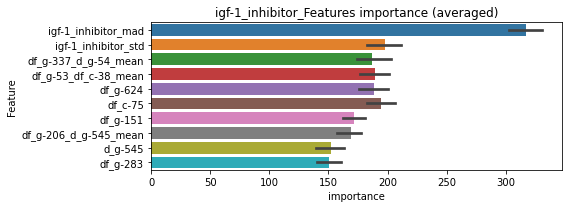

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.009186	valid_1's binary_logloss: 0.0315946
[600]	training's binary_logloss: 0.0011208	valid_1's binary_logloss: 0.0163562
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000582559	valid_1's binary_logloss: 0.0151036


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00904849	valid_1's binary_logloss: 0.0322019
[600]	training's binary_logloss: 0.00112844	valid_1's binary_logloss: 0.016057
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000637217	valid_1's binary_logloss: 0.0144213


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00918845	valid_1's binary_logloss: 0.0231831
[600]	training's binary_logloss: 0.00113642	valid_1's binary_logloss: 0.00853771
[900]	training's binary_logloss: 0.000538121	valid_1's binary_logloss: 0.00636722
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000508375	valid_1's binary_logloss: 0.00630434


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00921161	valid_1's binary_logloss: 0.027769
[600]	training's binary_logloss: 0.00115605	valid_1's binary_logloss: 0.0118439
[900]	training's binary_logloss: 0.000530997	valid_1's binary_logloss: 0.00934799
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000535049	valid_1's binary_logloss: 0.00930904


igf-1_inhibitor logloss: 0.011290215053786775


neg labels: 3289 → selected neg labels: 3285


ikk_inhibitor, len(trt): 30, len(othr): 3285, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00686635	valid_1's binary_logloss: 0.0218898
[600]	training's binary_logloss: 0.000861607	valid_1's binary_logloss: 0.0104181
[900]	training's binary_logloss: 0.00042509	valid_1's binary_logloss: 0.00891267
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000431428	valid_1's binary_logloss: 0.00889724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00668567	valid_1's binary_logloss: 0.0234597
[600]	training's binary_logloss: 0.000852598	valid_1's binary_logloss: 0.0107599
[900]	training's binary_logloss: 0.00042056	valid_1's binary_logloss: 0.00904933
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000417765	valid_1's binary_logloss: 0.00902769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0067576	valid_1's binary_logloss: 0.0203111
[600]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0052663, Threshold: 0.0228271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.01598, conf_1:0.02968
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0228271
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.0728271
Num_p_label: 6.0, Expected: 5.0, Adj_threshold_3: 0.1228271
threshold: 0.1228271, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598714	valid_1's binary_logloss: 0.017404
[600]	training's binary_logloss: 0.000763895	valid_1's binary_logloss: 0.00763162
[900]	training's binary_logloss: 0.000397599	valid_1's binary_logloss: 0.00659792
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000394039	valid_1's binary_logloss: 0.00657321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00590897	valid_1's binary_logloss: 0.0197429
[600]	training's binary_logloss: 0.000774048	valid_1's binary_logloss: 0.00899677
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000420095	valid_1's binary_logloss: 0.00775217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0058834	valid_1's binary_logloss: 0.0152952
[600]	training's binary_logloss: 0.000765739	valid_1's binary_logloss: 0.00591415
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0986914, Threshold: 0.1228271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0072828 Vs.target_rate: 0.00126, Num_p_label: 29.0, conf_0:0.09826, conf_1:0.14739
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_1: 0.1228271
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_2: 0.1728271
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.2228271
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_4: 0.2728271
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_5: 0.3228271
threshold: 0.3228271, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00559809	valid_1's binary_logloss: 0.0273549
[600]	training's binary_logloss: 0.000732364	valid_1's binary_logloss: 0.0186317
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000504234	valid_1's binary_logloss: 0.0178071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00578494	valid_1's binary_logloss: 0.0158974
[600]	training's binary_logloss: 0.000761469	valid_1's binary_logloss: 0.00733966
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000406524	valid_1's binary_logloss: 0.00641149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055426	valid_1's binary_logloss: 0.0198654
[600]	training's binary_logloss: 0.000738439	valid_1's binary_logloss: 0.0107897
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000427891	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0336934, Threshold: 0.3228271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0032647 Vs.target_rate: 0.00126, Num_p_label: 13.0, conf_0:0.29054, conf_1:0.35511
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_1: 0.3228271
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_2: 0.3728271
threshold: 0.3728271, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


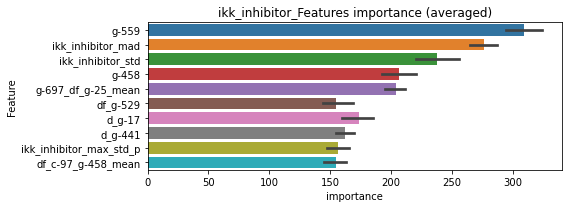

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057134	valid_1's binary_logloss: 0.0220161
[600]	training's binary_logloss: 0.000741092	valid_1's binary_logloss: 0.010422
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000399274	valid_1's binary_logloss: 0.00896846


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577292	valid_1's binary_logloss: 0.011538
[600]	training's binary_logloss: 0.000745421	valid_1's binary_logloss: 0.00249317
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000401478	valid_1's binary_logloss: 0.00160093


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00572742	valid_1's binary_logloss: 0.0204613
[600]	training's binary_logloss: 0.000743226	valid_1's binary_logloss: 0.0113802
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000689671	valid_1's binary_logloss: 0.0112824


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567622	valid_1's binary_logloss: 0.0349844
[600]	training's binary_logloss: 0.000739231	valid_1's binary_logloss: 0.0229261
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000698143	valid_1's binary_logloss: 0.0228288


ikk_inhibitor logloss: 0.011171175079446592


neg labels: 3289 → selected neg labels: 3286


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3286, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00944639	valid_1's binary_logloss: 0.0219478
[600]	training's binary_logloss: 0.00114141	valid_1's binary_logloss: 0.00710763
[900]	training's binary_logloss: 0.000519438	valid_1's binary_logloss: 0.00516462
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000509458	valid_1's binary_logloss: 0.00516273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00913229	valid_1's binary_logloss: 0.034693
[600]	training's binary_logloss: 0.00110366	valid_1's binary_logloss: 0.0186274
[900]	training's binary_logloss: 0.000512987	valid_1's binary_logloss: 0.0169121
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000520775	valid_1's binary_logloss: 0.0169011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00911915	valid_1's binary_logloss: 0.0235124
[600]	training's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0057667, Threshold: 0.0487394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.03412, conf_1:0.06336
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0487394
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_2: 0.0987394
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_3: 0.1487394
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_4: 0.1987394
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_5: 0.2487394
threshold: 0.2487394, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00832042	valid_1's binary_logloss: 0.0225306
[600]	training's binary_logloss: 0.00101921	valid_1's binary_logloss: 0.00801194
[900]	training's binary_logloss: 0.00048516	valid_1's binary_logloss: 0.00615714
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000497146	valid_1's binary_logloss: 0.00613131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00815045	valid_1's binary_logloss: 0.0432258
[600]	training's binary_logloss: 0.00100569	valid_1's binary_logloss: 0.0289662
[900]	training's binary_logloss: 0.000476733	valid_1's binary_logloss: 0.0255689
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000478242	valid_1's binary_logloss: 0.0255365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00821548	valid_1's binary_logloss: 0.0199401
[600]	training's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0548335, Threshold: 0.2487394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0060271 Vs.target_rate: 0.00130, Num_p_label: 24.0, conf_0:0.19899, conf_1:0.29849
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_1: 0.2487394
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_2: 0.2987394
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_3: 0.3487394
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_4: 0.3987394
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_5: 0.4487394
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_6: 0.4987394
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_7: 0.5487394
threshold: 0.5487394, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3805, y_label_rate: 0.1718791
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00834899	valid_1's binary_logloss: 0.0212845
[600]	training's binary_logloss: 0.00104053	valid_1's binary_logloss: 0.00615897
[900]	training's binary_logloss: 0.000487455	valid_1's binary_logloss: 0.00410266
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000461847	valid_1's binary_logloss: 0.0040637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00792762	valid_1's binary_logloss: 0.0271251
[600]	training's binary_logloss: 0.00100386	valid_1's binary_logloss: 0.0133444
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000940194	valid_1's binary_logloss: 0.0131292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00809082	valid_1's binary_logloss: 0.0184399
[600]	training's binary_logloss: 0.00100574	valid_1's binary_logloss: 0.00468198
[900]	training's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0682176, Threshold: 0.5487394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0030136 Vs.target_rate: 0.00130, Num_p_label: 12.0, conf_0:0.49387, conf_1:0.60361
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.5487394
threshold: 0.5487394, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3803, y_label_rate: 0.1717065


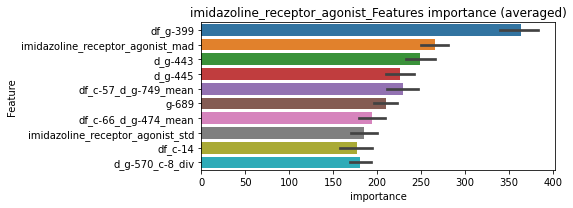

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00796654	valid_1's binary_logloss: 0.027203
[600]	training's binary_logloss: 0.000993713	valid_1's binary_logloss: 0.0113478
[900]	training's binary_logloss: 0.000478443	valid_1's binary_logloss: 0.00902942
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000481273	valid_1's binary_logloss: 0.00901314


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0081028	valid_1's binary_logloss: 0.0216723
[600]	training's binary_logloss: 0.00100415	valid_1's binary_logloss: 0.00785608
[900]	training's binary_logloss: 0.00048036	valid_1's binary_logloss: 0.00620822
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.000454602	valid_1's binary_logloss: 0.00608472


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00831533	valid_1's binary_logloss: 0.0191645
[600]	training's binary_logloss: 0.001017	valid_1's binary_logloss: 0.00477825
[900]	training's binary_logloss: 0.000483357	valid_1's binary_logloss: 0.00331216
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.00045162	valid_1's binary_logloss: 0.00321409


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00840662	valid_1's binary_logloss: 0.0176523
[600]	training's binary_logloss: 0.00102847	valid_1's binary_logloss: 0.00412754
[900]	training's binary_logloss: 0.000484747	valid_1's binary_logloss: 0.00262648
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000457739	valid_1's binary_logloss: 0.00257544


imidazoline_receptor_agonist logloss: 0.005224466421248831


neg labels: 3289 → selected neg labels: 3279


immunosuppressant, len(trt): 73, len(othr): 3279, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203498	valid_1's binary_logloss: 0.0829972
[600]	training's binary_logloss: 0.0026848	valid_1's binary_logloss: 0.0491857
[900]	training's binary_logloss: 0.00101361	valid_1's binary_logloss: 0.0448343
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00108119	valid_1's binary_logloss: 0.0446786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210058	valid_1's binary_logloss: 0.0716956
[600]	training's binary_logloss: 0.00271659	valid_1's binary_logloss: 0.0338733
[900]	training's binary_logloss: 0.00101945	valid_1's binary_logloss: 0.0278198
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.00102603	valid_1's binary_logloss: 0.0277914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194666	valid_1's binary_logloss: 0.0807053
[600]	training's binary_logloss

1 / 3 AUC score:0.998
y_Threshold: 0.0175761, Threshold: 0.1196128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.08373, conf_1:0.15550
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.1196128
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_2: 0.1696128
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_3: 0.2196128
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_4: 0.2696128
threshold: 0.2696128, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168677	valid_1's binary_logloss: 0.0631896
[600]	training's binary_logloss: 0.00215876	valid_1's binary_logloss: 0.0318345
[900]	training's binary_logloss: 0.000870912	valid_1's binary_logloss: 0.0268726
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00082719	valid_1's binary_logloss: 0.0266984
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161839	valid_1's binary_logloss: 0.064586
[600]	training's binary_logloss: 0.00213792	valid_1's binary_logloss: 0.0416655
[900]	training's binary_logloss: 0.000870839	valid_1's binary_logloss: 0.0385668
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00083078	valid_1's binary_logloss: 0.0384792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160302	valid_1's binary_logloss: 0.0767319
[600]	training's binary_loglo

2 / 3 AUC score:0.998
y_Threshold: 0.1111757, Threshold: 0.2696128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 632.0/3756
p_label_rate: 0.0213461 Vs.target_rate: 0.00307, Num_p_label: 85.0, conf_0:0.21569, conf_1:0.32354
Num_p_label: 85.0, Expected: 12.2, Adj_threshold_1: 0.2696128
Num_p_label: 78.0, Expected: 12.2, Adj_threshold_2: 0.3196128
Num_p_label: 74.0, Expected: 12.2, Adj_threshold_3: 0.3696128
Num_p_label: 71.0, Expected: 12.2, Adj_threshold_4: 0.4196128
Num_p_label: 68.0, Expected: 12.2, Adj_threshold_5: 0.4696128
Num_p_label: 63.0, Expected: 12.2, Adj_threshold_6: 0.5196128
Num_p_label: 58.0, Expected: 12.2, Adj_threshold_7: 0.5696128
Num_p_label: 51.0, Expected: 12.2, Adj_threshold_8: 0.6196128
Num_p_label: 49.0, Expected: 12.2, Adj_threshold_9: 0.6696128
Num_p_label: 39.0, Expected: 12.2, Adj_threshold_10: 0.7196128
threshold: 0.7696128, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 632.0/3756, y_label_rate: 0.1682641

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147189	valid_1's binary_logloss: 0.0670075
[600]	training's binary_logloss: 0.00189215	valid_1's binary_logloss: 0.0498107
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000877338	valid_1's binary_logloss: 0.0480376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137922	valid_1's binary_logloss: 0.0840986
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00207735	valid_1's binary_logloss: 0.0710234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142551	valid_1's binary_logloss: 0.0576164
[600]	training's binary_logloss: 0.00185769	valid_1's binary_logloss: 0.0315842
[900]	training's binary_logloss: 0.000786564	valid_1's binary_logloss: 0.0275305
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.00074969	valid_1's binary_logloss: 0.0

3 / 3 AUC score:0.992
y_Threshold: 0.0982822, Threshold: 0.7696128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 616.0/3724
p_label_rate: 0.0148167 Vs.target_rate: 0.00307, Num_p_label: 59.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 59.0, Expected: 12.2, Adj_threshold_1: 0.7696128
threshold: 0.7696128, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 616.0/3724, y_label_rate: 0.1654135


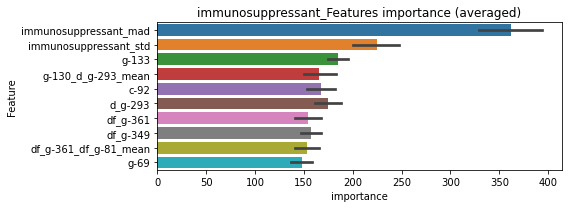

len(train_index) : 2793
len(valid_index) : 931
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121411	valid_1's binary_logloss: 0.0656308
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00258405	valid_1's binary_logloss: 0.0521388


len(train_index) : 2793
len(valid_index) : 931
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125384	valid_1's binary_logloss: 0.0530568
[600]	training's binary_logloss: 0.00162431	valid_1's binary_logloss: 0.0255707
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000785655	valid_1's binary_logloss: 0.0212988


len(train_index) : 2793
len(valid_index) : 931
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121745	valid_1's binary_logloss: 0.056159
[600]	training's binary_logloss: 0.00158204	valid_1's binary_logloss: 0.0362579
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000915318	valid_1's binary_logloss: 0.0343132


len(train_index) : 2793
len(valid_index) : 931
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128007	valid_1's binary_logloss: 0.0403129
[600]	training's binary_logloss: 0.00166925	valid_1's binary_logloss: 0.0187881
[900]	training's binary_logloss: 0.000733177	valid_1's binary_logloss: 0.0156066
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000637562	valid_1's binary_logloss: 0.0149785


immunosuppressant logloss: 0.03068233002883723


neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00612285	valid_1's binary_logloss: 0.0227129
[600]	training's binary_logloss: 0.000810527	valid_1's binary_logloss: 0.00954609
[900]	training's binary_logloss: 0.00044086	valid_1's binary_logloss: 0.00776178
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000421271	valid_1's binary_logloss: 0.00768141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623091	valid_1's binary_logloss: 0.0194537
[600]	training's binary_logloss: 0.000834789	valid_1's binary_logloss: 0.00729708
[900]	training's binary_logloss: 0.000448155	valid_1's binary_logloss: 0.00598093
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000443975	valid_1's binary_logloss: 0.00595481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638644	valid_1's binary_logloss: 0.0233294
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0043508, Threshold: 0.0273439, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.01914, conf_1:0.03555
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0273439
Num_p_label: 27.0, Expected: 5.0, Adj_threshold_2: 0.0773439
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.1273439
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_4: 0.1773439
threshold: 0.1773439, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00563777	valid_1's binary_logloss: 0.0191856
[600]	training's binary_logloss: 0.00075255	valid_1's binary_logloss: 0.00699133
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.00043871	valid_1's binary_logloss: 0.00558905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00575788	valid_1's binary_logloss: 0.0174825
[600]	training's binary_logloss: 0.000749291	valid_1's binary_logloss: 0.00638463
[900]	training's binary_logloss: 0.000420469	valid_1's binary_logloss: 0.00540427
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.0004222	valid_1's binary_logloss: 0.00539641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00587771	valid_1's binary_logloss: 0.0184586
[600]	training's binary_logloss: 0.000775091	valid_1's binary_logloss: 0.00610745
Early stopping, bes

2 / 3 AUC score:1.000
y_Threshold: 0.1098793, Threshold: 0.1773439, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0148167 Vs.target_rate: 0.00126, Num_p_label: 59.0, conf_0:0.14188, conf_1:0.21281
Num_p_label: 59.0, Expected: 5.0, Adj_threshold_1: 0.1773439
Num_p_label: 54.0, Expected: 5.0, Adj_threshold_2: 0.2273439
Num_p_label: 50.0, Expected: 5.0, Adj_threshold_3: 0.2773439
Num_p_label: 39.0, Expected: 5.0, Adj_threshold_4: 0.3273439
Num_p_label: 34.0, Expected: 5.0, Adj_threshold_5: 0.3773439
Num_p_label: 30.0, Expected: 5.0, Adj_threshold_6: 0.4273439
Num_p_label: 27.0, Expected: 5.0, Adj_threshold_7: 0.4773439
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_8: 0.5273439
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_9: 0.5773439
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_10: 0.6273439
threshold: 0.6773439, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00544995	valid_1's binary_logloss: 0.0201219
[600]	training's binary_logloss: 0.000727636	valid_1's binary_logloss: 0.00730626
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000431714	valid_1's binary_logloss: 0.00596945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057318	valid_1's binary_logloss: 0.0227011
[600]	training's binary_logloss: 0.000770727	valid_1's binary_logloss: 0.0161578
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000697995	valid_1's binary_logloss: 0.0158832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546186	valid_1's binary_logloss: 0.0174638
[600]	training's binary_logloss: 0.000741371	valid_1's binary_logloss: 0.00549467
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000438758	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0663334, Threshold: 0.6773439, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0045203 Vs.target_rate: 0.00126, Num_p_label: 18.0, conf_0:0.50000, conf_1:0.74508
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_1: 0.6773439
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_2: 0.7273439
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_3: 0.7773439
threshold: 0.7773439, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


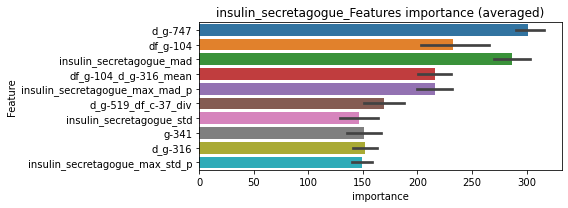

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00564446	valid_1's binary_logloss: 0.0171257
[600]	training's binary_logloss: 0.000743401	valid_1's binary_logloss: 0.00545235
[900]	training's binary_logloss: 0.000428916	valid_1's binary_logloss: 0.00433937
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000430816	valid_1's binary_logloss: 0.00432586


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00552417	valid_1's binary_logloss: 0.017829
[600]	training's binary_logloss: 0.000737584	valid_1's binary_logloss: 0.00685622
[900]	training's binary_logloss: 0.000421744	valid_1's binary_logloss: 0.00563681
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000421744	valid_1's binary_logloss: 0.00563681


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00542026	valid_1's binary_logloss: 0.0266276
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000934705	valid_1's binary_logloss: 0.0167315


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580322	valid_1's binary_logloss: 0.0117956
[600]	training's binary_logloss: 0.000766975	valid_1's binary_logloss: 0.00264251
[900]	training's binary_logloss: 0.000425639	valid_1's binary_logloss: 0.00177251
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000414935	valid_1's binary_logloss: 0.00175611


insulin_secretagogue logloss: 0.007111952948262791


neg labels: 3289 → selected neg labels: 3284


insulin_sensitizer, len(trt): 51, len(othr): 3284, target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138924	valid_1's binary_logloss: 0.0599796
[600]	training's binary_logloss: 0.00174653	valid_1's binary_logloss: 0.0361347
[900]	training's binary_logloss: 0.000739315	valid_1's binary_logloss: 0.0327855
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000739315	valid_1's binary_logloss: 0.0327855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131041	valid_1's binary_logloss: 0.0441792
[600]	training's binary_logloss: 0.00172076	valid_1's binary_logloss: 0.0232056
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.001021	valid_1's binary_logloss: 0.0213109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127067	valid_1's binary_logloss: 0.0441927
[600]	training's binary_logloss: 0.00167202	valid_1's binary_logloss: 0.0205518
[900]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0103274, Threshold: 0.0603633, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214, Num_p_label: 40.0, conf_0:0.04225, conf_1:0.07847
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_1: 0.0603633
Num_p_label: 23.0, Expected: 8.5, Adj_threshold_2: 0.1103633
Num_p_label: 13.0, Expected: 8.5, Adj_threshold_3: 0.1603633
threshold: 0.1603633, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115184	valid_1's binary_logloss: 0.0444759
[600]	training's binary_logloss: 0.00151478	valid_1's binary_logloss: 0.0247624
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000753801	valid_1's binary_logloss: 0.0221582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117028	valid_1's binary_logloss: 0.0474084
[600]	training's binary_logloss: 0.00151253	valid_1's binary_logloss: 0.0255743
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000786868	valid_1's binary_logloss: 0.0231233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114929	valid_1's binary_logloss: 0.0471478
[600]	training's binary_logloss: 0.001493	valid_1's binary_logloss: 0.0251669
[900]	training's binary_logloss: 0.000657206	valid_1's binary_logloss: 0.0220924
Early stopping, best iteratio

2 / 3 AUC score:1.000
y_Threshold: 0.0568780, Threshold: 0.1603633, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0123054 Vs.target_rate: 0.00214, Num_p_label: 49.0, conf_0:0.12829, conf_1:0.19244
Num_p_label: 49.0, Expected: 8.5, Adj_threshold_1: 0.1603633
Num_p_label: 37.0, Expected: 8.5, Adj_threshold_2: 0.2103633
Num_p_label: 30.0, Expected: 8.5, Adj_threshold_3: 0.2603633
Num_p_label: 23.0, Expected: 8.5, Adj_threshold_4: 0.3103633
Num_p_label: 20.0, Expected: 8.5, Adj_threshold_5: 0.3603633
threshold: 0.3603633, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 648.0/3792, y_label_rate: 0.1708861
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111585	valid_1's binary_logloss: 0.0409058
[600]	training's binary_logloss: 0.00145564	valid_1's binary_logloss: 0.0201174
[900]	training's binary_logloss: 0.000647175	valid_1's binary_logloss: 0.0170273
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000580068	valid_1's binary_logloss: 0.0168616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109423	valid_1's binary_logloss: 0.0500256
[600]	training's binary_logloss: 0.00143871	valid_1's binary_logloss: 0.0336821
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000695945	valid_1's binary_logloss: 0.0319298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113936	valid_1's binary_logloss: 0.0399223
[600]	training's binary_logloss: 0.00145096	valid_1's binary_logloss: 0.0196511
Early stopping, best itera

3 / 3 AUC score:1.000
y_Threshold: 0.0742339, Threshold: 0.3603633, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3784
p_label_rate: 0.0052737 Vs.target_rate: 0.00214, Num_p_label: 21.0, conf_0:0.32433, conf_1:0.39640
Num_p_label: 21.0, Expected: 8.5, Adj_threshold_1: 0.3603633
threshold: 0.3603633, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 644.0/3784, y_label_rate: 0.1701903


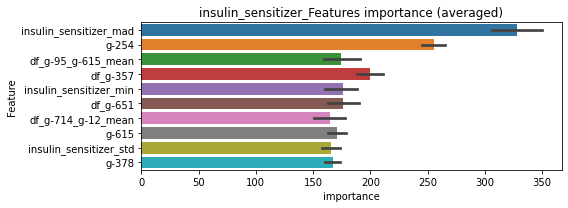

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110175	valid_1's binary_logloss: 0.0460712
[600]	training's binary_logloss: 0.00142087	valid_1's binary_logloss: 0.02565
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.00070665	valid_1's binary_logloss: 0.0228101


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107491	valid_1's binary_logloss: 0.0368536
[600]	training's binary_logloss: 0.00141098	valid_1's binary_logloss: 0.0158817
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000715302	valid_1's binary_logloss: 0.013283


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105915	valid_1's binary_logloss: 0.0525437
[600]	training's binary_logloss: 0.00139553	valid_1's binary_logloss: 0.0388115
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00127468	valid_1's binary_logloss: 0.0381142


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115182	valid_1's binary_logloss: 0.0382893
[600]	training's binary_logloss: 0.00145678	valid_1's binary_logloss: 0.0167334
[900]	training's binary_logloss: 0.000646237	valid_1's binary_logloss: 0.0136678
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.000565328	valid_1's binary_logloss: 0.0132206


insulin_sensitizer logloss: 0.021858991569682223


neg labels: 3289 → selected neg labels: 3281


integrin_inhibitor, len(trt): 42, len(othr): 3281, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0097877	valid_1's binary_logloss: 0.0458868
[600]	training's binary_logloss: 0.00125968	valid_1's binary_logloss: 0.0260033
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000668519	valid_1's binary_logloss: 0.0238223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101696	valid_1's binary_logloss: 0.035614
[600]	training's binary_logloss: 0.0012847	valid_1's binary_logloss: 0.0193162
[900]	training's binary_logloss: 0.00057913	valid_1's binary_logloss: 0.0172045
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000578398	valid_1's binary_logloss: 0.0172009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104848	valid_1's binary_logloss: 0.0222564
[600]	training's binary_logloss: 0.00133891	valid_1's binary_logloss: 0.00683161
[900]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0068211, Threshold: 0.0354701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.02483, conf_1:0.04611
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0354701
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_2: 0.0854701
threshold: 0.0854701, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00807503	valid_1's binary_logloss: 0.0446052
[600]	training's binary_logloss: 0.00109781	valid_1's binary_logloss: 0.0286264
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000728579	valid_1's binary_logloss: 0.0270922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863244	valid_1's binary_logloss: 0.0329385
[600]	training's binary_logloss: 0.00113173	valid_1's binary_logloss: 0.0186771
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000560827	valid_1's binary_logloss: 0.0170417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00893113	valid_1's binary_logloss: 0.0199187
[600]	training's binary_logloss: 0.0011889	valid_1's binary_logloss: 0.0059907
[900]	training's binary_logloss: 0.000555228	valid_1's binary_logloss: 0.00415309
Early stopping, best ite

2 / 3 AUC score:1.000
y_Threshold: 0.0729423, Threshold: 0.0854701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0150678 Vs.target_rate: 0.00176, Num_p_label: 60.0, conf_0:0.06838, conf_1:0.10256
Num_p_label: 60.0, Expected: 7.0, Adj_threshold_1: 0.0854701
Num_p_label: 46.0, Expected: 7.0, Adj_threshold_2: 0.1354701
Num_p_label: 37.0, Expected: 7.0, Adj_threshold_3: 0.1854701
Num_p_label: 29.0, Expected: 7.0, Adj_threshold_4: 0.2354701
Num_p_label: 25.0, Expected: 7.0, Adj_threshold_5: 0.2854701
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_6: 0.3354701
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_7: 0.3854701
threshold: 0.3854701, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00822	valid_1's binary_logloss: 0.0307121
[600]	training's binary_logloss: 0.00107089	valid_1's binary_logloss: 0.0168543
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000656301	valid_1's binary_logloss: 0.0152231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780357	valid_1's binary_logloss: 0.0396429
[600]	training's binary_logloss: 0.00104287	valid_1's binary_logloss: 0.0272581
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00100463	valid_1's binary_logloss: 0.0271544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00810323	valid_1's binary_logloss: 0.0398712
[600]	training's binary_logloss: 0.00107839	valid_1's binary_logloss: 0.0286028
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000801087	valid_1's binary_logloss: 0.0

3 / 3 AUC score:0.999
y_Threshold: 0.0870724, Threshold: 0.3854701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 643.0/3779
p_label_rate: 0.0062783 Vs.target_rate: 0.00176, Num_p_label: 25.0, conf_0:0.34692, conf_1:0.42402
Num_p_label: 25.0, Expected: 7.0, Adj_threshold_1: 0.3854701
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_2: 0.4354701
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_3: 0.4854701
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_4: 0.5354701
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_5: 0.5854701
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_6: 0.6354701
threshold: 0.6354701, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 643.0/3779, y_label_rate: 0.1701508


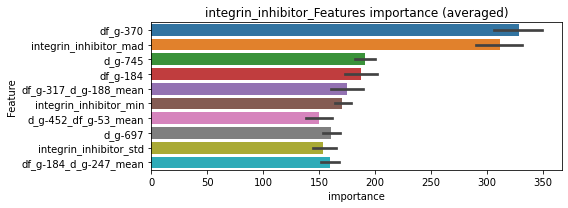

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00768629	valid_1's binary_logloss: 0.0329039
[600]	training's binary_logloss: 0.00103484	valid_1's binary_logloss: 0.0196853
[900]	training's binary_logloss: 0.000511169	valid_1's binary_logloss: 0.0175778
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000512649	valid_1's binary_logloss: 0.0175288


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00786807	valid_1's binary_logloss: 0.0185548
[600]	training's binary_logloss: 0.00105123	valid_1's binary_logloss: 0.00528903
[900]	training's binary_logloss: 0.000518308	valid_1's binary_logloss: 0.00365971
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000490347	valid_1's binary_logloss: 0.00358299


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0077008	valid_1's binary_logloss: 0.0297967
[600]	training's binary_logloss: 0.0010174	valid_1's binary_logloss: 0.0145918
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000540483	valid_1's binary_logloss: 0.013076


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772592	valid_1's binary_logloss: 0.0209291
[600]	training's binary_logloss: 0.00103499	valid_1's binary_logloss: 0.00691283
[900]	training's binary_logloss: 0.000517984	valid_1's binary_logloss: 0.00508098
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000490221	valid_1's binary_logloss: 0.0049425


integrin_inhibitor logloss: 0.009784496519242736


neg labels: 3289 → selected neg labels: 3273


jak_inhibitor, len(trt): 92, len(othr): 3273, target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227126	valid_1's binary_logloss: 0.107692
[600]	training's binary_logloss: 0.00323406	valid_1's binary_logloss: 0.0805426
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00175633	valid_1's binary_logloss: 0.07948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222418	valid_1's binary_logloss: 0.102612
[600]	training's binary_logloss: 0.00322099	valid_1's binary_logloss: 0.0757741
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00267793	valid_1's binary_logloss: 0.0749049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236014	valid_1's binary_logloss: 0.0801788
[600]	training's binary_logloss: 0.00342857	valid_1's binary_logloss: 0.0480436
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.00137436	valid_1's binary_logloss: 0.0422849

1 / 3 AUC score:0.992
y_Threshold: 0.0260704, Threshold: 0.2731106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 635/3757
p_label_rate: 0.0100452 Vs.target_rate: 0.00386, Num_p_label: 40.0, conf_0:0.19118, conf_1:0.35504
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.2731106
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_2: 0.3231106
Num_p_label: 19.0, Expected: 15.4, Adj_threshold_3: 0.3731106
threshold: 0.3731106, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 635.0/3757, y_label_rate: 0.1690178
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169758	valid_1's binary_logloss: 0.09028
[600]	training's binary_logloss: 0.00229291	valid_1's binary_logloss: 0.0723415
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00220327	valid_1's binary_logloss: 0.0717579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175702	valid_1's binary_logloss: 0.0667713
[600]	training's binary_logloss: 0.00240407	valid_1's binary_logloss: 0.0421525
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.00118237	valid_1's binary_logloss: 0.0386024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184056	valid_1's binary_logloss: 0.090892
[600]	training's binary_logloss: 0.00244268	valid_1's binary_logloss: 0.0647809
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00177927	valid_1's binary_logloss: 0.063607

2 / 3 AUC score:0.996
y_Threshold: 0.0744892, Threshold: 0.3731106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 607.0/3701
p_label_rate: 0.0256153 Vs.target_rate: 0.00386, Num_p_label: 102.0, conf_0:0.29849, conf_1:0.44773
Num_p_label: 102.0, Expected: 15.4, Adj_threshold_1: 0.3731106
Num_p_label: 94.0, Expected: 15.4, Adj_threshold_2: 0.4231106
Num_p_label: 85.0, Expected: 15.4, Adj_threshold_3: 0.4731106
Num_p_label: 73.0, Expected: 15.4, Adj_threshold_4: 0.5231106
Num_p_label: 66.0, Expected: 15.4, Adj_threshold_5: 0.5731106
Num_p_label: 56.0, Expected: 15.4, Adj_threshold_6: 0.6231106
Num_p_label: 50.0, Expected: 15.4, Adj_threshold_7: 0.6731106
Num_p_label: 45.0, Expected: 15.4, Adj_threshold_8: 0.7231106
Num_p_label: 42.0, Expected: 15.4, Adj_threshold_9: 0.7731106
threshold: 0.7731106, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 607.0/3701, y_label_rate: 0.1640097
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150333	valid_1's binary_logloss: 0.0686375
[600]	training's binary_logloss: 0.00200855	valid_1's binary_logloss: 0.0444844
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.00103193	valid_1's binary_logloss: 0.0413292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145502	valid_1's binary_logloss: 0.0722978
[600]	training's binary_logloss: 0.00196466	valid_1's binary_logloss: 0.0495601
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00165557	valid_1's binary_logloss: 0.0486423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140638	valid_1's binary_logloss: 0.0804184
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00250623	valid_1's binary_logloss: 0.0649579
Training until validation scores don't improve for 30 rounds
[300]	training

3 / 3 AUC score:0.997
y_Threshold: 0.0907448, Threshold: 0.7731106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 586.0/3659
p_label_rate: 0.0138122 Vs.target_rate: 0.00386, Num_p_label: 55.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 55.0, Expected: 15.4, Adj_threshold_1: 0.7731106
threshold: 0.7731106, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 586.0/3659, y_label_rate: 0.1601530


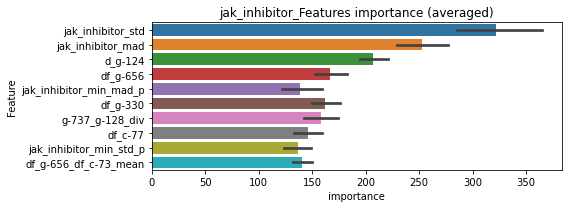

len(train_index) : 2744
len(valid_index) : 915
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122246	valid_1's binary_logloss: 0.0527441
[600]	training's binary_logloss: 0.001669	valid_1's binary_logloss: 0.0304794
[900]	training's binary_logloss: 0.000756281	valid_1's binary_logloss: 0.0270942
Early stopping, best iteration is:
[1047]	training's binary_logloss: 0.000663771	valid_1's binary_logloss: 0.0262018


len(train_index) : 2744
len(valid_index) : 915
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126542	valid_1's binary_logloss: 0.0697574
[600]	training's binary_logloss: 0.00168049	valid_1's binary_logloss: 0.0520456
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00173225	valid_1's binary_logloss: 0.0519044


len(train_index) : 2744
len(valid_index) : 915
================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125713	valid_1's binary_logloss: 0.0562
[600]	training's binary_logloss: 0.00168804	valid_1's binary_logloss: 0.0364535
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000997191	valid_1's binary_logloss: 0.0344867


len(train_index) : 2745
len(valid_index) : 914
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123207	valid_1's binary_logloss: 0.0598223
[600]	training's binary_logloss: 0.00166428	valid_1's binary_logloss: 0.0365262
[900]	training's binary_logloss: 0.000753595	valid_1's binary_logloss: 0.0330173
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000743028	valid_1's binary_logloss: 0.0329122


jak_inhibitor logloss: 0.036384193299030615


neg labels: 3289 → selected neg labels: 3248


kit_inhibitor, len(trt): 273, len(othr): 3248, target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0689644	valid_1's binary_logloss: 0.30602
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0599319	valid_1's binary_logloss: 0.304475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.070057	valid_1's binary_logloss: 0.293013
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.0540138	valid_1's binary_logloss: 0.288962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0728293	valid_1's binary_logloss: 0.263805
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.0369353	valid_1's binary_logloss: 0.25647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0755349	valid_1's binary_logloss: 0.254708
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.021985	valid_1's binary_logloss: 0.239

1 / 3 AUC score:0.873
y_Threshold: 0.1040587, Threshold: 0.6511534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 475 → Positive_corect_labels: 477/3422
p_label_rate: 0.0100452 Vs.target_rate: 0.01146, Num_p_label: 40.0, conf_0:0.45581, conf_1:0.80000
threshold: 0.6511534, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 477.0/3422, y_label_rate: 0.1393922
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243638	valid_1's binary_logloss: 0.140389
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00862265	valid_1's binary_logloss: 0.130207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02418	valid_1's binary_logloss: 0.120116
[600]	training's binary_logloss: 0.00391192	valid_1's binary_logloss: 0.0999811
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00235012	valid_1's binary_logloss: 0.0979936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0224898	valid_1's binary_logloss: 0.14113
[600]	training's binary_logloss: 0.00355663	valid_1's binary_logloss: 0.12978
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00345966	valid_1's binary_logloss: 0.129536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_

2 / 3 AUC score:0.983
y_Threshold: 0.0841375, Threshold: 0.6511534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 418.0/3304
p_label_rate: 0.0318935 Vs.target_rate: 0.01146, Num_p_label: 127.0, conf_0:0.50000, conf_1:0.78138
Num_p_label: 127.0, Expected: 45.6, Adj_threshold_1: 0.6511534
Num_p_label: 112.0, Expected: 45.6, Adj_threshold_2: 0.7011534
Num_p_label: 102.0, Expected: 45.6, Adj_threshold_3: 0.7511534
threshold: 0.7511534, positive_p_label: 102.0/3982, p_label_rate: 0.0256153
positive_y_label: 418.0/3304, y_label_rate: 0.1265133
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135276	valid_1's binary_logloss: 0.100323
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00439803	valid_1's binary_logloss: 0.0938098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136505	valid_1's binary_logloss: 0.0770478
[600]	training's binary_logloss: 0.00214147	valid_1's binary_logloss: 0.0596151
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00199223	valid_1's binary_logloss: 0.0593368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136417	valid_1's binary_logloss: 0.0958694
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00357216	valid_1's binary_logloss: 0.088778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148394	valid_1's binary_logloss: 0.0970866
Early stopping, b

3 / 3 AUC score:0.986
y_Threshold: 0.0801602, Threshold: 0.7511534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 384.0/3236
p_label_rate: 0.0391763 Vs.target_rate: 0.01146, Num_p_label: 156.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 156.0, Expected: 45.6, Adj_threshold_1: 0.7511534
threshold: 0.7511534, positive_p_label: 156.0/3982, p_label_rate: 0.0391763
positive_y_label: 384.0/3236, y_label_rate: 0.1186650


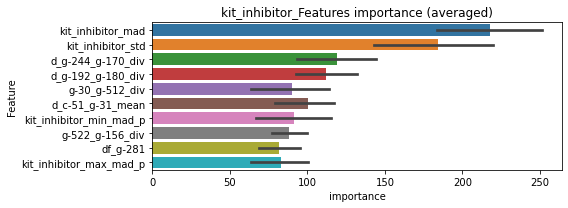

len(train_index) : 2427
len(valid_index) : 809
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00995456	valid_1's binary_logloss: 0.0851116


len(train_index) : 2427
len(valid_index) : 809
================================= fold 2/4 kit_inhibitor=================================


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.0045699	valid_1's binary_logloss: 0.0789804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010087	valid_1's binary_logloss: 0.0827104
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00174787	valid_1's binary_logloss: 0.0705601


len(train_index) : 2427
len(valid_index) : 809
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100544	valid_1's binary_logloss: 0.0686683
[600]	training's binary_logloss: 0.00153759	valid_1's binary_logloss: 0.0595913
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00102058	valid_1's binary_logloss: 0.0587343


len(train_index) : 2427
len(valid_index) : 809
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101972	valid_1's binary_logloss: 0.0444671
[600]	training's binary_logloss: 0.00154526	valid_1's binary_logloss: 0.0301988
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000809702	valid_1's binary_logloss: 0.0280821


kit_inhibitor logloss: 0.05908922455112243


neg labels: 3289 → selected neg labels: 3289


laxative, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128522	valid_1's binary_logloss: 0.00464434
[600]	training's binary_logloss: 0.000181047	valid_1's binary_logloss: 0.00265226
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000156425	valid_1's binary_logloss: 0.00257027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128802	valid_1's binary_logloss: 0.00292675
[600]	training's binary_logloss: 0.000184307	valid_1's binary_logloss: 0.00121471
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000161259	valid_1's binary_logloss: 0.00109061
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131258	valid_1's binary_logloss: 0.00191777
[600]	training's binary_logloss: 0.000186091	valid_1's binary_logloss: 0.000530298
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000160664	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0004246, Threshold: 0.0015876, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00111, conf_1:0.00206
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0015876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0515876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1015876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.1515876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.2015876
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.2515876


Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000161518	valid_1's binary_logloss: 0.000182039


Num_p_label: 2.0, Expected: 1.0, Adj_threshold_7: 0.3015876
threshold: 0.3015876, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123792	valid_1's binary_logloss: 0.00390971
[600]	training's binary_logloss: 0.000168879	valid_1's binary_logloss: 0.00251744
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000140781	valid_1's binary_logloss: 0.0024407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122147	valid_1's binary_logloss: 0.0013833
[600]	training's binary_logloss: 0.000169707	valid_1's binary_logloss: 0.000215064
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000138872	valid_1's binary_logloss: 0.000177047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012408	valid_1's binary_logloss: 0.00128339
[600]	training's binary_logloss: 0.00017013	valid_1's binary_logloss: 0.000183677
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.00014027	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0237029, Threshold: 0.3015876, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00025, Num_p_label: 4.0, conf_0:0.24127, conf_1:0.36191
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.3015876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.3515876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.4015876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.4515876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.5015876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.5515876


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000139047	valid_1's binary_logloss: 0.000342483


Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.6015876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.6515876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.7015876
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.7515876
threshold: 0.7515876, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123792	valid_1's binary_logloss: 0.00390971
[600]	training's binary_logloss: 0.000168879	valid_1's binary_logloss: 0.00251744
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000140781	valid_1's binary_logloss: 0.0024407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122147	valid_1's binary_logloss: 0.0013833
[600]	training's binary_logloss: 0.000169707	valid_1's binary_logloss: 0.000215064
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000138872	valid_1's binary_logloss: 0.000177047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012408	valid_1's binary_logloss: 0.00128339
[600]	training's binary_logloss: 0.00017013	valid_1's binary_logloss: 0.000183677
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.00014027	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0237029, Threshold: 0.7515876, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00025, Num_p_label: 4.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.7515876
threshold: 0.7515876, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000139047	valid_1's binary_logloss: 0.000342483


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


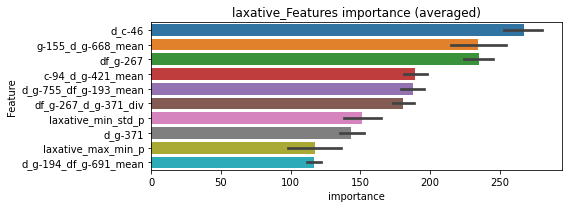

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124232	valid_1's binary_logloss: 0.00297241


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


[600]	training's binary_logloss: 0.000168592	valid_1's binary_logloss: 0.00169226
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000168592	valid_1's binary_logloss: 0.00169226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123116	valid_1's binary_logloss: 0.00137333
[600]	training's binary_logloss: 0.000168944	valid_1's binary_logloss: 0.000210327


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000139429	valid_1's binary_logloss: 0.000174629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124164	valid_1's binary_logloss: 0.00129496
[600]	training's binary_logloss: 0.000169165	valid_1's binary_logloss: 0.000183691


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000140056	valid_1's binary_logloss: 0.00015255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124398	valid_1's binary_logloss: 0.00179955
[600]	training's binary_logloss: 0.000167936	valid_1's binary_logloss: 0.00038937


laxative logloss: 0.0005933771816812932


Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000141188	valid_1's binary_logloss: 0.000352696
neg labels: 3289 → selected neg labels: 3289


leukotriene_inhibitor, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137226	valid_1's binary_logloss: 0.00195942
[600]	training's binary_logloss: 0.000181241	valid_1's binary_logloss: 0.000403022
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000162393	valid_1's binary_logloss: 0.000366698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137037	valid_1's binary_logloss: 0.00259507
[600]	training's binary_logloss: 0.000181187	valid_1's binary_logloss: 0.000758557
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000157849	valid_1's binary_logloss: 0.000706891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001376	valid_1's binary_logloss: 0.00149917
[600]	training's binary_logloss: 0.000182367	valid_1's binary_logloss: 0.000215224
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000160833	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0005399, Threshold: 0.0021629, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00151, conf_1:0.00281
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0021629
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0521629
threshold: 0.0521629, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000161742	valid_1's binary_logloss: 0.000290268


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136261	valid_1's binary_logloss: 0.00154342
[600]	training's binary_logloss: 0.00017292	valid_1's binary_logloss: 0.000219215
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000151844	valid_1's binary_logloss: 0.000195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133495	valid_1's binary_logloss: 0.00290751
[600]	training's binary_logloss: 0.000170882	valid_1's binary_logloss: 0.00111685
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000152141	valid_1's binary_logloss: 0.00109076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133746	valid_1's binary_logloss: 0.00142089
[600]	training's binary_logloss: 0.000172785	valid_1's binary_logloss: 0.000193473
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000152991	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0909420, Threshold: 0.0521629, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00025, Num_p_label: 9.0, conf_0:0.04173, conf_1:0.06260
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0521629
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.1021629
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1521629
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.2021629
threshold: 0.2021629, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000150053	valid_1's binary_logloss: 0.000299466


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136261	valid_1's binary_logloss: 0.00154342
[600]	training's binary_logloss: 0.00017292	valid_1's binary_logloss: 0.000219215
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000151844	valid_1's binary_logloss: 0.000195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133495	valid_1's binary_logloss: 0.00290751
[600]	training's binary_logloss: 0.000170882	valid_1's binary_logloss: 0.00111685
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000152141	valid_1's binary_logloss: 0.00109076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133746	valid_1's binary_logloss: 0.00142089
[600]	training's binary_logloss: 0.000172785	valid_1's binary_logloss: 0.000193473
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000152991	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0909420, Threshold: 0.2021629, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.18195, conf_1:0.22238
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.2021629
threshold: 0.2021629, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000150053	valid_1's binary_logloss: 0.000299466


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


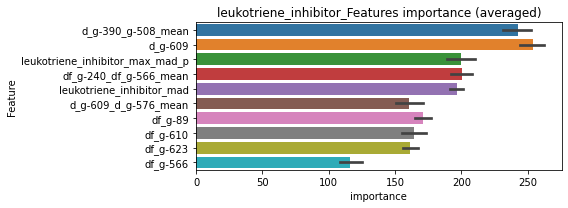

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135631	valid_1's binary_logloss: 0.0015156
[600]	training's binary_logloss: 0.000171499	valid_1's binary_logloss: 0.0002176


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000152224	valid_1's binary_logloss: 0.000195952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013355	valid_1's binary_logloss: 0.00287346
[600]	training's binary_logloss: 0.00017108	valid_1's binary_logloss: 0.00104885
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000151901	valid_1's binary_logloss: 0.00103145


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134378	valid_1's binary_logloss: 0.00144498
[600]	training's binary_logloss: 0.000172618	valid_1's binary_logloss: 0.000196392


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000152955	valid_1's binary_logloss: 0.000174154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134698	valid_1's binary_logloss: 0.00171308
[600]	training's binary_logloss: 0.000173035	valid_1's binary_logloss: 0.000302103


leukotriene_inhibitor logloss: 0.00041958878799542866


Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00015212	valid_1's binary_logloss: 0.000277004
neg labels: 3289 → selected neg labels: 3282


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3282, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128771	valid_1's binary_logloss: 0.0705815
[600]	training's binary_logloss: 0.00177302	valid_1's binary_logloss: 0.0507998
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.00089415	valid_1's binary_logloss: 0.0485979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127826	valid_1's binary_logloss: 0.0529067
[600]	training's binary_logloss: 0.00176846	valid_1's binary_logloss: 0.0295497
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000965283	valid_1's binary_logloss: 0.0267362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139206	valid_1's binary_logloss: 0.044886
[600]	training's binary_logloss: 0.00186945	valid_1's binary_logloss: 0.0249205
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000881694	valid_1's binary_logloss: 0.02

1 / 3 AUC score:0.999
y_Threshold: 0.0088605, Threshold: 0.0385570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00260, Num_p_label: 40.0, conf_0:0.02699, conf_1:0.05012
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0385570
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_2: 0.0885570
threshold: 0.0885570, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108753	valid_1's binary_logloss: 0.0423124
[600]	training's binary_logloss: 0.00152385	valid_1's binary_logloss: 0.0229955
[900]	training's binary_logloss: 0.000697513	valid_1's binary_logloss: 0.0198163
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000666218	valid_1's binary_logloss: 0.0195097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112093	valid_1's binary_logloss: 0.0404795
[600]	training's binary_logloss: 0.00154693	valid_1's binary_logloss: 0.0215283
[900]	training's binary_logloss: 0.000700078	valid_1's binary_logloss: 0.0185935
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000632731	valid_1's binary_logloss: 0.0182653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116081	valid_1's binary_logloss: 0.0541285
[600]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0535494, Threshold: 0.0885570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0143144 Vs.target_rate: 0.00260, Num_p_label: 57.0, conf_0:0.07085, conf_1:0.10627
Num_p_label: 57.0, Expected: 10.4, Adj_threshold_1: 0.0885570
Num_p_label: 42.0, Expected: 10.4, Adj_threshold_2: 0.1385570
Num_p_label: 35.0, Expected: 10.4, Adj_threshold_3: 0.1885570
Num_p_label: 32.0, Expected: 10.4, Adj_threshold_4: 0.2385570
Num_p_label: 29.0, Expected: 10.4, Adj_threshold_5: 0.2885570
Num_p_label: 25.0, Expected: 10.4, Adj_threshold_6: 0.3385570
Num_p_label: 21.0, Expected: 10.4, Adj_threshold_7: 0.3885570
Num_p_label: 19.0, Expected: 10.4, Adj_threshold_8: 0.4385570
Num_p_label: 19.0, Expected: 10.4, Adj_threshold_9: 0.4885570
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_10: 0.5385570
threshold: 0.5385570, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3784, y_label_rate: 0.1704545

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105609	valid_1's binary_logloss: 0.0481642
[600]	training's binary_logloss: 0.0014869	valid_1's binary_logloss: 0.029805
[900]	training's binary_logloss: 0.000674861	valid_1's binary_logloss: 0.0271422
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.00068473	valid_1's binary_logloss: 0.0270648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102951	valid_1's binary_logloss: 0.0695848
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00243329	valid_1's binary_logloss: 0.0606106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112757	valid_1's binary_logloss: 0.0493532
[600]	training's binary_logloss: 0.00150832	valid_1's binary_logloss: 0.036761
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00107308	valid_1's binary_logloss: 0.03610

3 / 3 AUC score:0.997
y_Threshold: 0.0389723, Threshold: 0.5385570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 632.0/3758
p_label_rate: 0.0060271 Vs.target_rate: 0.00260, Num_p_label: 24.0, conf_0:0.48470, conf_1:0.59241
Num_p_label: 24.0, Expected: 10.4, Adj_threshold_1: 0.5385570
Num_p_label: 23.0, Expected: 10.4, Adj_threshold_2: 0.5885570
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_3: 0.6385570
Num_p_label: 18.0, Expected: 10.4, Adj_threshold_4: 0.6885570
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_5: 0.7385570
threshold: 0.7385570, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 632.0/3758, y_label_rate: 0.1681746


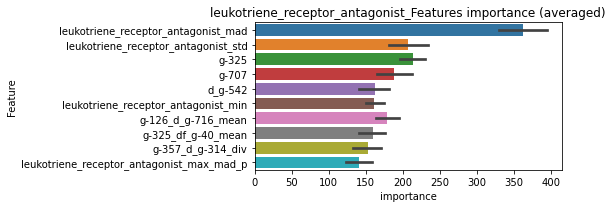

len(train_index) : 2818
len(valid_index) : 940
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00993605	valid_1's binary_logloss: 0.0484421
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00164602	valid_1's binary_logloss: 0.0344963


len(train_index) : 2818
len(valid_index) : 940
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00958754	valid_1's binary_logloss: 0.0486962
[600]	training's binary_logloss: 0.00132743	valid_1's binary_logloss: 0.0324433
[900]	training's binary_logloss: 0.000612784	valid_1's binary_logloss: 0.0297964
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000625268	valid_1's binary_logloss: 0.0297257


len(train_index) : 2819
len(valid_index) : 939
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999406	valid_1's binary_logloss: 0.0595351
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00168616	valid_1's binary_logloss: 0.0507357


len(train_index) : 2819
len(valid_index) : 939
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102791	valid_1's binary_logloss: 0.0406375
[600]	training's binary_logloss: 0.00138425	valid_1's binary_logloss: 0.0219314
[900]	training's binary_logloss: 0.000638348	valid_1's binary_logloss: 0.0187406
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000634233	valid_1's binary_logloss: 0.018705


leukotriene_receptor_antagonist logloss: 0.03341498854142326


neg labels: 3289 → selected neg labels: 3288


lipase_inhibitor, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252689	valid_1's binary_logloss: 0.0036531
[600]	training's binary_logloss: 0.000340523	valid_1's binary_logloss: 0.00077608
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.00025617	valid_1's binary_logloss: 0.000638691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255167	valid_1's binary_logloss: 0.0075153
[600]	training's binary_logloss: 0.00034719	valid_1's binary_logloss: 0.00290537
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000254569	valid_1's binary_logloss: 0.0025404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025426	valid_1's binary_logloss: 0.00353434
[600]	training's binary_logloss: 0.000346023	valid_1's binary_logloss: 0.000680599
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000251263	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0011445, Threshold: 0.0050250, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00352, conf_1:0.00653
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0050250
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0550250
threshold: 0.0550250, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226024	valid_1's binary_logloss: 0.00295865
[600]	training's binary_logloss: 0.000311759	valid_1's binary_logloss: 0.000501279
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000236977	valid_1's binary_logloss: 0.000404113
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224769	valid_1's binary_logloss: 0.00561729
[600]	training's binary_logloss: 0.000310894	valid_1's binary_logloss: 0.00253893
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000237635	valid_1's binary_logloss: 0.00231301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226024	valid_1's binary_logloss: 0.00269993
[600]	training's binary_logloss: 0.000313818	valid_1's binary_logloss: 0.000420878
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000236608	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.0374881, Threshold: 0.0550250, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050, Num_p_label: 8.0, conf_0:0.04402, conf_1:0.06603
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.0550250
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.1050250
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1550250
threshold: 0.1550250, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226024	valid_1's binary_logloss: 0.00295865
[600]	training's binary_logloss: 0.000311759	valid_1's binary_logloss: 0.000501279
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000236977	valid_1's binary_logloss: 0.000404113
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224769	valid_1's binary_logloss: 0.00561729
[600]	training's binary_logloss: 0.000310894	valid_1's binary_logloss: 0.00253893
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000237635	valid_1's binary_logloss: 0.00231301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226024	valid_1's binary_logloss: 0.00269993
[600]	training's binary_logloss: 0.000313818	valid_1's binary_logloss: 0.000420878
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000236608	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.0374881, Threshold: 0.1550250, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.13952, conf_1:0.17053
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.1550250
threshold: 0.1550250, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


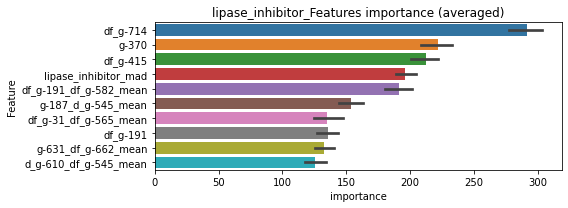

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224106	valid_1's binary_logloss: 0.00289151
[600]	training's binary_logloss: 0.000312681	valid_1's binary_logloss: 0.000470504
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000233234	valid_1's binary_logloss: 0.000366557


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236401	valid_1's binary_logloss: 0.00686869
[600]	training's binary_logloss: 0.000310987	valid_1's binary_logloss: 0.003178
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000235589	valid_1's binary_logloss: 0.00294984


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230022	valid_1's binary_logloss: 0.00285324
[600]	training's binary_logloss: 0.000311784	valid_1's binary_logloss: 0.000429102
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000234978	valid_1's binary_logloss: 0.000326082


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225631	valid_1's binary_logloss: 0.00309968
[600]	training's binary_logloss: 0.000314171	valid_1's binary_logloss: 0.000558206
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000236392	valid_1's binary_logloss: 0.000443759


lipase_inhibitor logloss: 0.0010214102771436138


neg labels: 3289 → selected neg labels: 3284


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3284, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140613	valid_1's binary_logloss: 0.0754444
[600]	training's binary_logloss: 0.00182529	valid_1's binary_logloss: 0.0533318
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00158714	valid_1's binary_logloss: 0.0526951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136215	valid_1's binary_logloss: 0.0579409
[600]	training's binary_logloss: 0.00181795	valid_1's binary_logloss: 0.0318539
[900]	training's binary_logloss: 0.000772945	valid_1's binary_logloss: 0.0273345
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000772945	valid_1's binary_logloss: 0.0273345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014675	valid_1's binary_logloss: 0.0376322
[600]	training's binary_logloss: 0.0019204	valid_1's binary_logloss: 0.0146303
[900]	training's binary_loglos

1 / 3 AUC score:0.998
y_Threshold: 0.0114594, Threshold: 0.2432634, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.17028, conf_1:0.31624
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.2432634
Num_p_label: 35.0, Expected: 10.2, Adj_threshold_2: 0.2932634
Num_p_label: 33.0, Expected: 10.2, Adj_threshold_3: 0.3432634
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_4: 0.3932634
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_5: 0.4432634
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_6: 0.4932634
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_7: 0.5432634
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_8: 0.5932634
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_9: 0.6432634
threshold: 0.6432634, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125977	valid_1's binary_logloss: 0.0678121
[600]	training's binary_logloss: 0.00164573	valid_1's binary_logloss: 0.0512863
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.00105576	valid_1's binary_logloss: 0.0499506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012037	valid_1's binary_logloss: 0.050534
[600]	training's binary_logloss: 0.00158669	valid_1's binary_logloss: 0.0341849
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.00103752	valid_1's binary_logloss: 0.0331234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127703	valid_1's binary_logloss: 0.0468015
[600]	training's binary_logloss: 0.00166712	valid_1's binary_logloss: 0.0210767
[900]	training's binary_logloss: 0.000716696	valid_1's binary_logloss: 0.0172543
Early stopping, best iteration 

2 / 3 AUC score:0.999
y_Threshold: 0.0573523, Threshold: 0.6432634, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 641.0/3778
p_label_rate: 0.0092918 Vs.target_rate: 0.00256, Num_p_label: 37.0, conf_0:0.50000, conf_1:0.77192
Num_p_label: 37.0, Expected: 10.2, Adj_threshold_1: 0.6432634
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.6932634
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_3: 0.7432634
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_4: 0.7932634
threshold: 0.7932634, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 641.0/3778, y_label_rate: 0.1696665
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011888	valid_1's binary_logloss: 0.0518423
[600]	training's binary_logloss: 0.00154102	valid_1's binary_logloss: 0.0293854
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000773953	valid_1's binary_logloss: 0.0266282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116421	valid_1's binary_logloss: 0.0460689
[600]	training's binary_logloss: 0.00148254	valid_1's binary_logloss: 0.0247476
[900]	training's binary_logloss: 0.000668201	valid_1's binary_logloss: 0.0212531
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.00063864	valid_1's binary_logloss: 0.02121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011794	valid_1's binary_logloss: 0.0323219
[600]	training's binary_logloss: 0.00154536	valid_1's binary_logloss: 0.014025
[900]	training's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0835508, Threshold: 0.7932634, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 635.0/3766
p_label_rate: 0.0085384 Vs.target_rate: 0.00256, Num_p_label: 34.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_1: 0.7932634
threshold: 0.7932634, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 635.0/3766, y_label_rate: 0.1686139


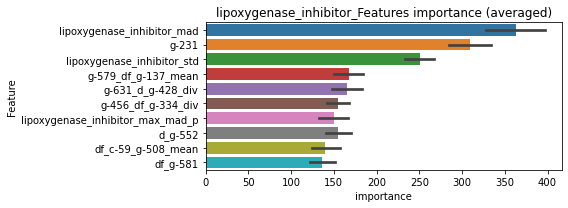

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113202	valid_1's binary_logloss: 0.0460061
[600]	training's binary_logloss: 0.00143866	valid_1's binary_logloss: 0.0279603
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000793123	valid_1's binary_logloss: 0.0261031


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115403	valid_1's binary_logloss: 0.0436089
[600]	training's binary_logloss: 0.0014217	valid_1's binary_logloss: 0.0220791
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000693857	valid_1's binary_logloss: 0.0190578


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111103	valid_1's binary_logloss: 0.0503737
[600]	training's binary_logloss: 0.00142385	valid_1's binary_logloss: 0.0377214
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.00111547	valid_1's binary_logloss: 0.0370847


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110032	valid_1's binary_logloss: 0.0450781
[600]	training's binary_logloss: 0.00142859	valid_1's binary_logloss: 0.0229524
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000723808	valid_1's binary_logloss: 0.020244


lipoxygenase_inhibitor logloss: 0.025620772641659833


neg labels: 3289 → selected neg labels: 3287


lxr_agonist, len(trt): 6, len(othr): 3287, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163234	valid_1's binary_logloss: 0.00231927
[600]	training's binary_logloss: 0.000230753	valid_1's binary_logloss: 0.000410332
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000198142	valid_1's binary_logloss: 0.00036226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158548	valid_1's binary_logloss: 0.00402122
[600]	training's binary_logloss: 0.000225799	valid_1's binary_logloss: 0.00186332
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000192467	valid_1's binary_logloss: 0.00178539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162957	valid_1's binary_logloss: 0.00197413
[600]	training's binary_logloss: 0.000230628	valid_1's binary_logloss: 0.000329637
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000197286	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0007157, Threshold: 0.0039779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00278, conf_1:0.00517
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0039779
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0539779
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1039779
threshold: 0.1039779, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152661	valid_1's binary_logloss: 0.00569603
[600]	training's binary_logloss: 0.000210916	valid_1's binary_logloss: 0.00376209
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000194856	valid_1's binary_logloss: 0.00373951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151632	valid_1's binary_logloss: 0.00217269
[600]	training's binary_logloss: 0.00020706	valid_1's binary_logloss: 0.000524338
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00017928	valid_1's binary_logloss: 0.000485105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153871	valid_1's binary_logloss: 0.00171542
[600]	training's binary_logloss: 0.000210137	valid_1's binary_logloss: 0.000247546
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000181207	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0173823, Threshold: 0.1039779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0052737 Vs.target_rate: 0.00025, Num_p_label: 21.0, conf_0:0.08318, conf_1:0.12477
Num_p_label: 21.0, Expected: 1.0, Adj_threshold_1: 0.1039779


Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000180072	valid_1's binary_logloss: 0.000342419


Num_p_label: 13.0, Expected: 1.0, Adj_threshold_2: 0.1539779
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.2039779
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.2539779
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.3039779
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.3539779
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.4039779
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_8: 0.4539779
threshold: 0.4539779, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152661	valid_1's binary_logloss: 0.00569603
[600]	training's binary_logloss: 0.000210916	valid_1's binary_logloss: 0.00376209
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000194856	valid_1's binary_logloss: 0.00373951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151632	valid_1's binary_logloss: 0.00217269
[600]	training's binary_logloss: 0.00020706	valid_1's binary_logloss: 0.000524338
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00017928	valid_1's binary_logloss: 0.000485105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153871	valid_1's binary_logloss: 0.00171542
[600]	training's binary_logloss: 0.000210137	valid_1's binary_logloss: 0.000247546
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000181207	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0173823, Threshold: 0.4539779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025, Num_p_label: 1.0, conf_0:0.40858, conf_1:0.49938
threshold: 0.4539779, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000180072	valid_1's binary_logloss: 0.000342419


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


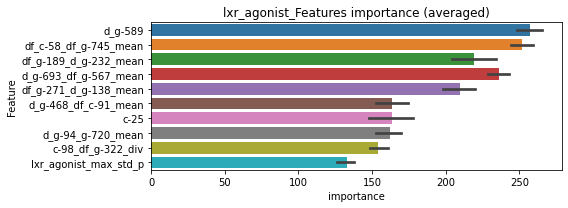

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153978	valid_1's binary_logloss: 0.0057086
[600]	training's binary_logloss: 0.000210779	valid_1's binary_logloss: 0.00373079
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000188103	valid_1's binary_logloss: 0.00367835


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152799	valid_1's binary_logloss: 0.00241888
[600]	training's binary_logloss: 0.00020941	valid_1's binary_logloss: 0.000722882
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000183314	valid_1's binary_logloss: 0.000682674


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153791	valid_1's binary_logloss: 0.00168104
[600]	training's binary_logloss: 0.000210621	valid_1's binary_logloss: 0.000243057


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000182612	valid_1's binary_logloss: 0.000210866
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154332	valid_1's binary_logloss: 0.00214788
[600]	training's binary_logloss: 0.000210456	valid_1's binary_logloss: 0.000391267


lxr_agonist logloss: 0.0012316302463479271


Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000183194	valid_1's binary_logloss: 0.000354557
neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00832238	valid_1's binary_logloss: 0.0338117
[600]	training's binary_logloss: 0.00101462	valid_1's binary_logloss: 0.0164941
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000571819	valid_1's binary_logloss: 0.0142059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0083499	valid_1's binary_logloss: 0.0214804
[600]	training's binary_logloss: 0.00104877	valid_1's binary_logloss: 0.00844974
[900]	training's binary_logloss: 0.000494904	valid_1's binary_logloss: 0.00699581
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000467441	valid_1's binary_logloss: 0.00688589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00875068	valid_1's binary_logloss: 0.0209205
[600]	training's binary_logloss: 0.00106106	valid_1's binary_logloss: 0.0100472
Early stopping, best i

1 / 3 AUC score:1.000
y_Threshold: 0.0072404, Threshold: 0.0441888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.03093, conf_1:0.05745
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0441888
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_2: 0.0941888
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_3: 0.1441888
threshold: 0.1441888, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00741761	valid_1's binary_logloss: 0.0336357
[600]	training's binary_logloss: 0.000935708	valid_1's binary_logloss: 0.0193707
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000484412	valid_1's binary_logloss: 0.0175739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00754337	valid_1's binary_logloss: 0.0186139
[600]	training's binary_logloss: 0.000950538	valid_1's binary_logloss: 0.0055133
[900]	training's binary_logloss: 0.000462021	valid_1's binary_logloss: 0.00412355
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000457876	valid_1's binary_logloss: 0.00410491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00719681	valid_1's binary_logloss: 0.0178785
[600]	training's binary_logloss: 0.000930578	valid_1's binary_logloss: 0.00850658
Early stopping, be

2 / 3 AUC score:1.000
y_Threshold: 0.0702986, Threshold: 0.1441888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0115520 Vs.target_rate: 0.00130, Num_p_label: 46.0, conf_0:0.11535, conf_1:0.17303
Num_p_label: 46.0, Expected: 5.2, Adj_threshold_1: 0.1441888
Num_p_label: 36.0, Expected: 5.2, Adj_threshold_2: 0.1941888
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_3: 0.2441888
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_4: 0.2941888
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_5: 0.3441888
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_6: 0.3941888
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_7: 0.4441888
threshold: 0.4441888, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00743619	valid_1's binary_logloss: 0.0226976
[600]	training's binary_logloss: 0.000928517	valid_1's binary_logloss: 0.00655408
[900]	training's binary_logloss: 0.000461103	valid_1's binary_logloss: 0.00456142
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000449274	valid_1's binary_logloss: 0.00453294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737187	valid_1's binary_logloss: 0.0293016
[600]	training's binary_logloss: 0.000923486	valid_1's binary_logloss: 0.0190906
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000784448	valid_1's binary_logloss: 0.0187382
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00731219	valid_1's binary_logloss: 0.0228306
[600]	training's binary_logloss: 0.000928099	valid_1's binary_logloss: 0.0131232
[900]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0534396, Threshold: 0.4441888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0032647 Vs.target_rate: 0.00130, Num_p_label: 13.0, conf_0:0.39977, conf_1:0.48861
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_1: 0.4441888
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_2: 0.4941888
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_3: 0.5441888
threshold: 0.5441888, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


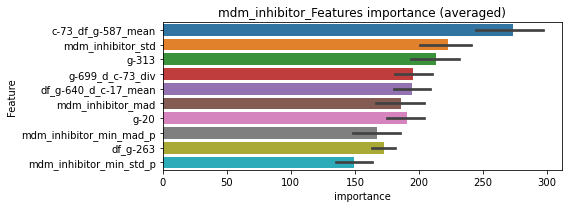

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00707291	valid_1's binary_logloss: 0.031414
[600]	training's binary_logloss: 0.000888116	valid_1's binary_logloss: 0.0163294
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000476853	valid_1's binary_logloss: 0.0144574


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00718709	valid_1's binary_logloss: 0.0190906
[600]	training's binary_logloss: 0.000903411	valid_1's binary_logloss: 0.00789994
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000478964	valid_1's binary_logloss: 0.00654464


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00728979	valid_1's binary_logloss: 0.017799
[600]	training's binary_logloss: 0.000907559	valid_1's binary_logloss: 0.00494459
[900]	training's binary_logloss: 0.000456995	valid_1's binary_logloss: 0.00340766
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000457882	valid_1's binary_logloss: 0.0034047


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720294	valid_1's binary_logloss: 0.0182849
[600]	training's binary_logloss: 0.000908448	valid_1's binary_logloss: 0.0048318
[900]	training's binary_logloss: 0.000464661	valid_1's binary_logloss: 0.0032893
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000472967	valid_1's binary_logloss: 0.00328391


mdm_inhibitor logloss: 0.006925293933146301


neg labels: 3289 → selected neg labels: 3273


mek_inhibitor, len(trt): 72, len(othr): 3273, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022615	valid_1's binary_logloss: 0.102713
[600]	training's binary_logloss: 0.00287567	valid_1's binary_logloss: 0.0671897
[900]	training's binary_logloss: 0.00105585	valid_1's binary_logloss: 0.0611235
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.00109078	valid_1's binary_logloss: 0.0609746
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213113	valid_1's binary_logloss: 0.0919237
[600]	training's binary_logloss: 0.00273972	valid_1's binary_logloss: 0.0591371
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.00121049	valid_1's binary_logloss: 0.0554684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219953	valid_1's binary_logloss: 0.0561062
[600]	training's binary_logloss: 0.00285539	valid_1's binary_logloss: 0.0216523
[900]	training's binary_logloss:

1 / 3 AUC score:0.998
y_Threshold: 0.0179828, Threshold: 0.0721440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 642/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.05050, conf_1:0.09379
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0721440
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_2: 0.1221440
threshold: 0.1221440, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3771, y_label_rate: 0.1702466
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193892	valid_1's binary_logloss: 0.0808085
[600]	training's binary_logloss: 0.00239862	valid_1's binary_logloss: 0.050512
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000994268	valid_1's binary_logloss: 0.0464077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189477	valid_1's binary_logloss: 0.074738
[600]	training's binary_logloss: 0.00236636	valid_1's binary_logloss: 0.041573
[900]	training's binary_logloss: 0.000919514	valid_1's binary_logloss: 0.0361236
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000771727	valid_1's binary_logloss: 0.0354909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195786	valid_1's binary_logloss: 0.0592747
[600]	training's binary_logloss: 0.00249645	valid_1's binary_logloss: 0.0332634
Early stopping, best iteratio

2 / 3 AUC score:0.999
y_Threshold: 0.0763287, Threshold: 0.1221440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 626.0/3739
p_label_rate: 0.0210949 Vs.target_rate: 0.00302, Num_p_label: 84.0, conf_0:0.09772, conf_1:0.14657
Num_p_label: 84.0, Expected: 12.0, Adj_threshold_1: 0.1221440
Num_p_label: 68.0, Expected: 12.0, Adj_threshold_2: 0.1721440
Num_p_label: 50.0, Expected: 12.0, Adj_threshold_3: 0.2221440
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_4: 0.2721440
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_5: 0.3221440
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_6: 0.3721440
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_7: 0.4221440
threshold: 0.4221440, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 626.0/3739, y_label_rate: 0.1674244
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191321	valid_1's binary_logloss: 0.0635352
[600]	training's binary_logloss: 0.00235311	valid_1's binary_logloss: 0.0323249
[900]	training's binary_logloss: 0.00089272	valid_1's binary_logloss: 0.0270243
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000859605	valid_1's binary_logloss: 0.0269172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172745	valid_1's binary_logloss: 0.0596242
[600]	training's binary_logloss: 0.00217053	valid_1's binary_logloss: 0.0259418
[900]	training's binary_logloss: 0.000871633	valid_1's binary_logloss: 0.0205199
Early stopping, best iteration is:
[1105]	training's binary_logloss: 0.000661717	valid_1's binary_logloss: 0.0196146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189413	valid_1's binary_logloss: 0.0463623
[600]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.1340478, Threshold: 0.4221440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 621.0/3729
p_label_rate: 0.0102963 Vs.target_rate: 0.00302, Num_p_label: 41.0, conf_0:0.37993, conf_1:0.46436
Num_p_label: 41.0, Expected: 12.0, Adj_threshold_1: 0.4221440
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_2: 0.4721440
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_3: 0.5221440
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_4: 0.5721440
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_5: 0.6221440
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_6: 0.6721440
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_7: 0.7221440
threshold: 0.7221440, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 621.0/3729, y_label_rate: 0.1665326


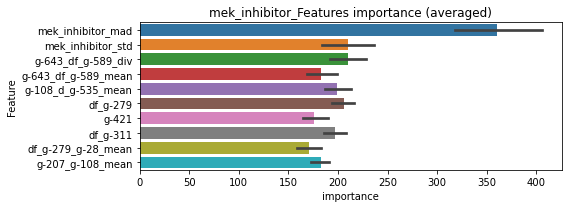

len(train_index) : 2796
len(valid_index) : 933
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175758	valid_1's binary_logloss: 0.0622259
[600]	training's binary_logloss: 0.00213758	valid_1's binary_logloss: 0.0305935
[900]	training's binary_logloss: 0.000853562	valid_1's binary_logloss: 0.0247914
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000661922	valid_1's binary_logloss: 0.0233695


len(train_index) : 2797
len(valid_index) : 932
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158253	valid_1's binary_logloss: 0.0755101
[600]	training's binary_logloss: 0.00200064	valid_1's binary_logloss: 0.0587398
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00184062	valid_1's binary_logloss: 0.0584405


len(train_index) : 2797
len(valid_index) : 932
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174	valid_1's binary_logloss: 0.0449266
[600]	training's binary_logloss: 0.00221353	valid_1's binary_logloss: 0.0167679
[900]	training's binary_logloss: 0.000875136	valid_1's binary_logloss: 0.0116021
Early stopping, best iteration is:
[1158]	training's binary_logloss: 0.00065421	valid_1's binary_logloss: 0.0105301


len(train_index) : 2797
len(valid_index) : 932
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175485	valid_1's binary_logloss: 0.0525476
[600]	training's binary_logloss: 0.00216835	valid_1's binary_logloss: 0.0224829
[900]	training's binary_logloss: 0.000853261	valid_1's binary_logloss: 0.0179123
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000718577	valid_1's binary_logloss: 0.0173246


mek_inhibitor logloss: 0.02741961135135559


neg labels: 3289 → selected neg labels: 3276


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3276, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164718	valid_1's binary_logloss: 0.0988744
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00416361	valid_1's binary_logloss: 0.0869456
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186134	valid_1's binary_logloss: 0.069487
[600]	training's binary_logloss: 0.00258263	valid_1's binary_logloss: 0.0434899
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.00142251	valid_1's binary_logloss: 0.0404784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017992	valid_1's binary_logloss: 0.0737628
[600]	training's binary_logloss: 0.00249476	valid_1's binary_logloss: 0.0481644
[900]	training's binary_logloss: 0.000971165	valid_1's binary_logloss: 0.0450937
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000930056	valid_1's binary_logloss: 0.044

1 / 3 AUC score:0.994
y_Threshold: 0.0183014, Threshold: 0.0940741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 642/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00311, Num_p_label: 40.0, conf_0:0.06585, conf_1:0.12230
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.0940741
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_2: 0.1440741
Num_p_label: 16.0, Expected: 12.4, Adj_threshold_3: 0.1940741
threshold: 0.1940741, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 642.0/3773, y_label_rate: 0.1701564
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146797	valid_1's binary_logloss: 0.0677739
[600]	training's binary_logloss: 0.00196787	valid_1's binary_logloss: 0.0534556
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00182455	valid_1's binary_logloss: 0.0530208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142367	valid_1's binary_logloss: 0.078302
[600]	training's binary_logloss: 0.00192746	valid_1's binary_logloss: 0.0578828
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.00119842	valid_1's binary_logloss: 0.0570152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014009	valid_1's binary_logloss: 0.0693333
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00337588	valid_1's binary_logloss: 0.0530061
Training until validation scores don't improve for 30 rounds
[300]	training's

2 / 3 AUC score:0.997
y_Threshold: 0.0684905, Threshold: 0.1940741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 620.0/3729
p_label_rate: 0.0158212 Vs.target_rate: 0.00311, Num_p_label: 63.0, conf_0:0.15526, conf_1:0.23289
Num_p_label: 63.0, Expected: 12.4, Adj_threshold_1: 0.1940741
Num_p_label: 51.0, Expected: 12.4, Adj_threshold_2: 0.2440741
Num_p_label: 45.0, Expected: 12.4, Adj_threshold_3: 0.2940741
Num_p_label: 43.0, Expected: 12.4, Adj_threshold_4: 0.3440741
Num_p_label: 41.0, Expected: 12.4, Adj_threshold_5: 0.3940741
Num_p_label: 38.0, Expected: 12.4, Adj_threshold_6: 0.4440741
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_7: 0.4940741
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_8: 0.5440741
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_9: 0.5940741
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_10: 0.6440741
threshold: 0.6440741, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 620.0/3729, y_label_rate: 0.1662644

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120812	valid_1's binary_logloss: 0.0612273
[600]	training's binary_logloss: 0.0016202	valid_1's binary_logloss: 0.0404584
[900]	training's binary_logloss: 0.000719856	valid_1's binary_logloss: 0.0368078
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000698289	valid_1's binary_logloss: 0.0365585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012152	valid_1's binary_logloss: 0.0628213
[600]	training's binary_logloss: 0.00167091	valid_1's binary_logloss: 0.0459831
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00155558	valid_1's binary_logloss: 0.0453938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118173	valid_1's binary_logloss: 0.0652832
[600]	training's binary_logloss: 0.00160941	valid_1's binary_logloss: 0.0529059
Early stopping, best iteration

3 / 3 AUC score:0.998
y_Threshold: 0.0521110, Threshold: 0.6440741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 603.0/3695
p_label_rate: 0.0085384 Vs.target_rate: 0.00311, Num_p_label: 34.0, conf_0:0.50000, conf_1:0.70848
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_1: 0.6440741
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_2: 0.6940741
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_3: 0.7440741
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_4: 0.7940741
threshold: 0.7940741, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 603.0/3695, y_label_rate: 0.1631935


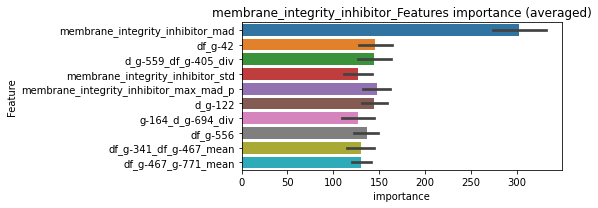

len(train_index) : 2771
len(valid_index) : 924
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109087	valid_1's binary_logloss: 0.0743901
[600]	training's binary_logloss: 0.00146558	valid_1's binary_logloss: 0.054362
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000766509	valid_1's binary_logloss: 0.0516525


len(train_index) : 2771
len(valid_index) : 924
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110809	valid_1's binary_logloss: 0.0374898
[600]	training's binary_logloss: 0.00149621	valid_1's binary_logloss: 0.019547
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000851274	valid_1's binary_logloss: 0.0181702


len(train_index) : 2771
len(valid_index) : 924
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111762	valid_1's binary_logloss: 0.0491925
[600]	training's binary_logloss: 0.00148948	valid_1's binary_logloss: 0.0321663
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000820186	valid_1's binary_logloss: 0.030543


len(train_index) : 2772
len(valid_index) : 923
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108701	valid_1's binary_logloss: 0.0397855
[600]	training's binary_logloss: 0.00147768	valid_1's binary_logloss: 0.023658
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00147768	valid_1's binary_logloss: 0.023658


membrane_integrity_inhibitor logloss: 0.03100791724665729


neg labels: 3289 → selected neg labels: 3283


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3283, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531189	valid_1's binary_logloss: 0.0190456
[600]	training's binary_logloss: 0.00068519	valid_1's binary_logloss: 0.0113201
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000438575	valid_1's binary_logloss: 0.011104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055786	valid_1's binary_logloss: 0.013581
[600]	training's binary_logloss: 0.000714685	valid_1's binary_logloss: 0.00341129
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000388118	valid_1's binary_logloss: 0.00242557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00569481	valid_1's binary_logloss: 0.0163999
[600]	training's binary_logloss: 0.000700082	valid_1's binary_logloss: 0.00637697
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00040285	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0043269, Threshold: 0.0349594, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.02447, conf_1:0.04545
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0349594
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_2: 0.0849594
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_3: 0.1349594
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_4: 0.1849594
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_5: 0.2349594
threshold: 0.2349594, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469817	valid_1's binary_logloss: 0.0168518
[600]	training's binary_logloss: 0.000596537	valid_1's binary_logloss: 0.00732022
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000392513	valid_1's binary_logloss: 0.00662763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473188	valid_1's binary_logloss: 0.0095537
[600]	training's binary_logloss: 0.00062372	valid_1's binary_logloss: 0.0022839
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000378173	valid_1's binary_logloss: 0.0016317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469631	valid_1's binary_logloss: 0.00992851
[600]	training's binary_logloss: 0.000614578	valid_1's binary_logloss: 0.00231513
[900]	training's binary_logloss: 0.000363183	valid_1's binary_logloss: 0.00166878
Early stopping, b

2 / 3 AUC score:1.000
y_Threshold: 0.1088444, Threshold: 0.2349594, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0070316 Vs.target_rate: 0.00105, Num_p_label: 28.0, conf_0:0.18797, conf_1:0.28195
Num_p_label: 28.0, Expected: 4.2, Adj_threshold_1: 0.2349594
Num_p_label: 26.0, Expected: 4.2, Adj_threshold_2: 0.2849594
Num_p_label: 22.0, Expected: 4.2, Adj_threshold_3: 0.3349594
Num_p_label: 19.0, Expected: 4.2, Adj_threshold_4: 0.3849594
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_5: 0.4349594
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_6: 0.4849594
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_7: 0.5349594
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_8: 0.5849594
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_9: 0.6349594
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_10: 0.6849594
threshold: 0.6849594, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469817	valid_1's binary_logloss: 0.0168518
[600]	training's binary_logloss: 0.000596537	valid_1's binary_logloss: 0.00732022
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000392513	valid_1's binary_logloss: 0.00662763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473188	valid_1's binary_logloss: 0.0095537
[600]	training's binary_logloss: 0.00062372	valid_1's binary_logloss: 0.0022839
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000378173	valid_1's binary_logloss: 0.0016317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469631	valid_1's binary_logloss: 0.00992851
[600]	training's binary_logloss: 0.000614578	valid_1's binary_logloss: 0.00231513
[900]	training's binary_logloss: 0.000363183	valid_1's binary_logloss: 0.00166878
Early stopping, b

3 / 3 AUC score:1.000
y_Threshold: 0.1088444, Threshold: 0.6849594, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.50000, conf_1:0.75346
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.6849594
threshold: 0.6849594, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


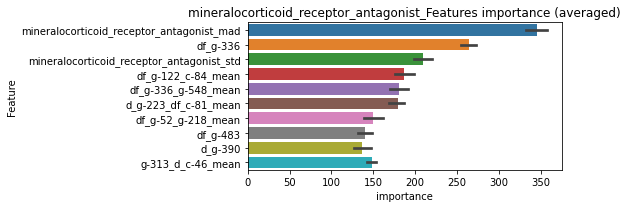

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464671	valid_1's binary_logloss: 0.0167558
[600]	training's binary_logloss: 0.000601415	valid_1's binary_logloss: 0.00808543
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000383679	valid_1's binary_logloss: 0.00726337


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047305	valid_1's binary_logloss: 0.00946356
[600]	training's binary_logloss: 0.000618126	valid_1's binary_logloss: 0.00204074
[900]	training's binary_logloss: 0.000365785	valid_1's binary_logloss: 0.00148599
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000365785	valid_1's binary_logloss: 0.00148599


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00465372	valid_1's binary_logloss: 0.0103712
[600]	training's binary_logloss: 0.000609966	valid_1's binary_logloss: 0.00247785
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000371354	valid_1's binary_logloss: 0.00186902


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00475959	valid_1's binary_logloss: 0.0126259
[600]	training's binary_logloss: 0.000613377	valid_1's binary_logloss: 0.00417658
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000392437	valid_1's binary_logloss: 0.00347609


mineralocorticoid_receptor_antagonist logloss: 0.0035246004845154145


neg labels: 3289 → selected neg labels: 3289


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272319	valid_1's binary_logloss: 0.0050515
[600]	training's binary_logloss: 0.000358187	valid_1's binary_logloss: 0.00118572
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000272525	valid_1's binary_logloss: 0.000996543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269798	valid_1's binary_logloss: 0.00489402
[600]	training's binary_logloss: 0.00035487	valid_1's binary_logloss: 0.00145404
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000270823	valid_1's binary_logloss: 0.00127391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267828	valid_1's binary_logloss: 0.00434187
[600]	training's binary_logloss: 0.000361309	valid_1's binary_logloss: 0.000888942
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000272826	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0011918, Threshold: 0.0028824, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00202, conf_1:0.00375
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0028824
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0528824
threshold: 0.0528824, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253152	valid_1's binary_logloss: 0.00431759
[600]	training's binary_logloss: 0.000331699	valid_1's binary_logloss: 0.000894472
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000255513	valid_1's binary_logloss: 0.000758472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253759	valid_1's binary_logloss: 0.00426502
[600]	training's binary_logloss: 0.000330763	valid_1's binary_logloss: 0.000961334
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00025424	valid_1's binary_logloss: 0.00085473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257121	valid_1's binary_logloss: 0.00401564
[600]	training's binary_logloss: 0.000334646	valid_1's binary_logloss: 0.000761812
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000262236	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.1309298, Threshold: 0.0528824, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050, Num_p_label: 9.0, conf_0:0.04231, conf_1:0.06346
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_1: 0.0528824
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.1028824
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.1528824
threshold: 0.1528824, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253152	valid_1's binary_logloss: 0.00431759
[600]	training's binary_logloss: 0.000331699	valid_1's binary_logloss: 0.000894472
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000255513	valid_1's binary_logloss: 0.000758472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253759	valid_1's binary_logloss: 0.00426502
[600]	training's binary_logloss: 0.000330763	valid_1's binary_logloss: 0.000961334
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00025424	valid_1's binary_logloss: 0.00085473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257121	valid_1's binary_logloss: 0.00401564
[600]	training's binary_logloss: 0.000334646	valid_1's binary_logloss: 0.000761812
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000262236	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.1309298, Threshold: 0.1528824, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00050, Num_p_label: 3.0, conf_0:0.13759, conf_1:0.16817
threshold: 0.1528824, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


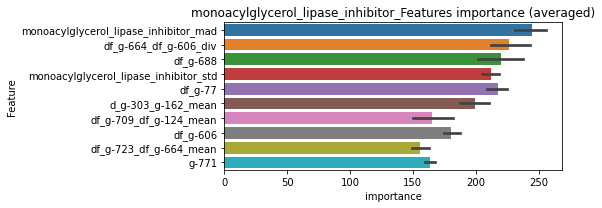

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259308	valid_1's binary_logloss: 0.00448237
[600]	training's binary_logloss: 0.000335538	valid_1's binary_logloss: 0.00097875
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000257046	valid_1's binary_logloss: 0.00081897


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027389	valid_1's binary_logloss: 0.00479375
[600]	training's binary_logloss: 0.000333083	valid_1's binary_logloss: 0.00149929
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000236396	valid_1's binary_logloss: 0.00129149


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257807	valid_1's binary_logloss: 0.00390677
[600]	training's binary_logloss: 0.00033692	valid_1's binary_logloss: 0.000747749
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000255272	valid_1's binary_logloss: 0.000608972


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253733	valid_1's binary_logloss: 0.00460001
[600]	training's binary_logloss: 0.000333146	valid_1's binary_logloss: 0.00090746
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000260705	valid_1's binary_logloss: 0.000776179


monoacylglycerol_lipase_inhibitor logloss: 0.0008745315890735255


neg labels: 3289 → selected neg labels: 3280


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3280, target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197532	valid_1's binary_logloss: 0.100733
[600]	training's binary_logloss: 0.0028491	valid_1's binary_logloss: 0.0722929
[900]	training's binary_logloss: 0.00105938	valid_1's binary_logloss: 0.0670039
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000997034	valid_1's binary_logloss: 0.066801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193805	valid_1's binary_logloss: 0.10995
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00473246	valid_1's binary_logloss: 0.0962039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0224791	valid_1's binary_logloss: 0.0837824
[600]	training's binary_logloss: 0.00315438	valid_1's binary_logloss: 0.0557726
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00128936	valid_1's binary_logloss: 0.0508484

1 / 3 AUC score:0.992
y_Threshold: 0.0195026, Threshold: 0.1420326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 640/3772
p_label_rate: 0.0100452 Vs.target_rate: 0.00357, Num_p_label: 40.0, conf_0:0.09942, conf_1:0.18464
Num_p_label: 40.0, Expected: 14.2, Adj_threshold_1: 0.1420326
Num_p_label: 26.0, Expected: 14.2, Adj_threshold_2: 0.1920326
Num_p_label: 19.0, Expected: 14.2, Adj_threshold_3: 0.2420326
threshold: 0.2420326, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 640.0/3772, y_label_rate: 0.1696713
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151734	valid_1's binary_logloss: 0.0870264
[600]	training's binary_logloss: 0.00210481	valid_1's binary_logloss: 0.0694994
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00215804	valid_1's binary_logloss: 0.0693103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017626	valid_1's binary_logloss: 0.0725338
[600]	training's binary_logloss: 0.00232969	valid_1's binary_logloss: 0.0534603
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.00259695	valid_1's binary_logloss: 0.0531024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173385	valid_1's binary_logloss: 0.0805391
[600]	training's binary_logloss: 0.00232646	valid_1's binary_logloss: 0.0623602
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00211776	valid_1's binary_logloss: 0.0617

2 / 3 AUC score:0.997
y_Threshold: 0.0797504, Threshold: 0.2420326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 615.0/3722
p_label_rate: 0.0213461 Vs.target_rate: 0.00357, Num_p_label: 85.0, conf_0:0.19363, conf_1:0.29044
Num_p_label: 85.0, Expected: 14.2, Adj_threshold_1: 0.2420326
Num_p_label: 75.0, Expected: 14.2, Adj_threshold_2: 0.2920326
Num_p_label: 71.0, Expected: 14.2, Adj_threshold_3: 0.3420326
Num_p_label: 64.0, Expected: 14.2, Adj_threshold_4: 0.3920326
Num_p_label: 60.0, Expected: 14.2, Adj_threshold_5: 0.4420326
Num_p_label: 53.0, Expected: 14.2, Adj_threshold_6: 0.4920326
Num_p_label: 44.0, Expected: 14.2, Adj_threshold_7: 0.5420326
Num_p_label: 42.0, Expected: 14.2, Adj_threshold_8: 0.5920326
Num_p_label: 39.0, Expected: 14.2, Adj_threshold_9: 0.6420326
Num_p_label: 35.0, Expected: 14.2, Adj_threshold_10: 0.6920326
threshold: 0.7420326, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 615.0/3722, y_label_rate: 0.1652337

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130703	valid_1's binary_logloss: 0.0538079
[600]	training's binary_logloss: 0.00182635	valid_1's binary_logloss: 0.0330151
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000941809	valid_1's binary_logloss: 0.0296232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116843	valid_1's binary_logloss: 0.0607726
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00193131	valid_1's binary_logloss: 0.0466438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127229	valid_1's binary_logloss: 0.0519074
[600]	training's binary_logloss: 0.00173613	valid_1's binary_logloss: 0.0366982
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00118565	valid_1's binary_logloss: 0.0353256
Training until validation scores don't improve for 30 rounds
[300]	trainin

3 / 3 AUC score:0.999
y_Threshold: 0.0913172, Threshold: 0.7420326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 602.0/3696
p_label_rate: 0.0153189 Vs.target_rate: 0.00357, Num_p_label: 61.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 61.0, Expected: 14.2, Adj_threshold_1: 0.7420326
Num_p_label: 55.0, Expected: 14.2, Adj_threshold_2: 0.7920326
threshold: 0.7920326, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 602.0/3696, y_label_rate: 0.1628788


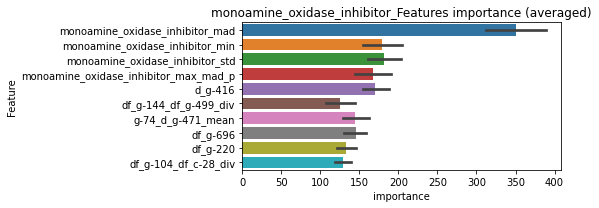

len(train_index) : 2772
len(valid_index) : 924
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108953	valid_1's binary_logloss: 0.0525949
[600]	training's binary_logloss: 0.00153209	valid_1's binary_logloss: 0.0368795
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000976176	valid_1's binary_logloss: 0.0358569


len(train_index) : 2772
len(valid_index) : 924
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116228	valid_1's binary_logloss: 0.0524162
[600]	training's binary_logloss: 0.00155992	valid_1's binary_logloss: 0.0399452
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00152204	valid_1's binary_logloss: 0.0397184


len(train_index) : 2772
len(valid_index) : 924
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011441	valid_1's binary_logloss: 0.0371683
[600]	training's binary_logloss: 0.00157456	valid_1's binary_logloss: 0.020757
[900]	training's binary_logloss: 0.000710097	valid_1's binary_logloss: 0.0176002
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000714144	valid_1's binary_logloss: 0.0175873


len(train_index) : 2772
len(valid_index) : 924
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100595	valid_1's binary_logloss: 0.0652847
[600]	training's binary_logloss: 0.00142163	valid_1's binary_logloss: 0.0517833
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00104902	valid_1's binary_logloss: 0.0510941


monoamine_oxidase_inhibitor logloss: 0.03606418201658312


neg labels: 3289 → selected neg labels: 3287


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423802	valid_1's binary_logloss: 0.00896478
[600]	training's binary_logloss: 0.000558237	valid_1's binary_logloss: 0.00390212
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000383168	valid_1's binary_logloss: 0.00362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00416732	valid_1's binary_logloss: 0.0121976
[600]	training's binary_logloss: 0.000543461	valid_1's binary_logloss: 0.00332513
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000352558	valid_1's binary_logloss: 0.00268015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424219	valid_1's binary_logloss: 0.00967622
[600]	training's binary_logloss: 0.000562783	valid_1's binary_logloss: 0.00354389
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000448554	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0025208, Threshold: 0.0403948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.02828, conf_1:0.05251
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0403948
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_2: 0.0903948
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.1403948
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1903948
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_5: 0.2403948
threshold: 0.2403948, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387625	valid_1's binary_logloss: 0.00597136
[600]	training's binary_logloss: 0.0005069	valid_1's binary_logloss: 0.00118202
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000320581	valid_1's binary_logloss: 0.000828582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370724	valid_1's binary_logloss: 0.0113645
[600]	training's binary_logloss: 0.000488737	valid_1's binary_logloss: 0.00307231
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000324475	valid_1's binary_logloss: 0.00244483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371648	valid_1's binary_logloss: 0.00882008
[600]	training's binary_logloss: 0.000492449	valid_1's binary_logloss: 0.00334076
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000394161	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0806067, Threshold: 0.2403948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0095429 Vs.target_rate: 0.00076, Num_p_label: 38.0, conf_0:0.19232, conf_1:0.28847
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_1: 0.2403948
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.2903948
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_3: 0.3403948
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_4: 0.3903948
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_5: 0.4403948
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_6: 0.4903948
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_7: 0.5403948
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_8: 0.5903948
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.6403948
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.6903948
threshold: 0.7403948, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
=============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387625	valid_1's binary_logloss: 0.00597136
[600]	training's binary_logloss: 0.0005069	valid_1's binary_logloss: 0.00118202
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000320581	valid_1's binary_logloss: 0.000828582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370724	valid_1's binary_logloss: 0.0113645
[600]	training's binary_logloss: 0.000488737	valid_1's binary_logloss: 0.00307231
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000324475	valid_1's binary_logloss: 0.00244483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371648	valid_1's binary_logloss: 0.00882008
[600]	training's binary_logloss: 0.000492449	valid_1's binary_logloss: 0.00334076
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000394161	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0806067, Threshold: 0.7403948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00076, Num_p_label: 8.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.7403948
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.7903948
threshold: 0.7903948, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


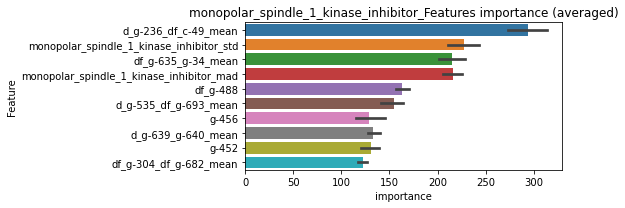

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380743	valid_1's binary_logloss: 0.00637786
[600]	training's binary_logloss: 0.000504141	valid_1's binary_logloss: 0.00132543
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000326041	valid_1's binary_logloss: 0.000950128


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370282	valid_1's binary_logloss: 0.0118922
[600]	training's binary_logloss: 0.000487368	valid_1's binary_logloss: 0.00333182
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000320571	valid_1's binary_logloss: 0.00255672


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00378081	valid_1's binary_logloss: 0.00879485
[600]	training's binary_logloss: 0.000498644	valid_1's binary_logloss: 0.00320897
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000377796	valid_1's binary_logloss: 0.00296667


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381523	valid_1's binary_logloss: 0.00723093
[600]	training's binary_logloss: 0.000502076	valid_1's binary_logloss: 0.0017643
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000325116	valid_1's binary_logloss: 0.00139221


monopolar_spindle_1_kinase_inhibitor logloss: 0.0019667563174313764


neg labels: 3289 → selected neg labels: 3269


mtor_inhibitor, len(trt): 130, len(othr): 3269, target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319145	valid_1's binary_logloss: 0.149622
[600]	training's binary_logloss: 0.0050908	valid_1's binary_logloss: 0.123785
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00421578	valid_1's binary_logloss: 0.123149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0310551	valid_1's binary_logloss: 0.133239
[600]	training's binary_logloss: 0.00481177	valid_1's binary_logloss: 0.0995096
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00282001	valid_1's binary_logloss: 0.0974098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0324869	valid_1's binary_logloss: 0.141589
[600]	training's binary_logloss: 0.00510061	valid_1's binary_logloss: 0.113427
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00413292	valid_1's binary_logloss: 0.111994
Tra

1 / 3 AUC score:0.980
y_Threshold: 0.0345843, Threshold: 0.2841003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 210 → Positive_corect_labels: 614/3712
p_label_rate: 0.0100452 Vs.target_rate: 0.00546, Num_p_label: 40.0, conf_0:0.19887, conf_1:0.36933
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_1: 0.2841003
Num_p_label: 33.0, Expected: 21.7, Adj_threshold_2: 0.3341003
Num_p_label: 22.0, Expected: 21.7, Adj_threshold_3: 0.3841003
threshold: 0.3841003, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 614.0/3712, y_label_rate: 0.1654095
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0251768	valid_1's binary_logloss: 0.106541
[600]	training's binary_logloss: 0.0036637	valid_1's binary_logloss: 0.0775538
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.00149184	valid_1's binary_logloss: 0.0720591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233683	valid_1's binary_logloss: 0.119909
[600]	training's binary_logloss: 0.00336983	valid_1's binary_logloss: 0.0946189
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00210257	valid_1's binary_logloss: 0.0925996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0241313	valid_1's binary_logloss: 0.0953861
[600]	training's binary_logloss: 0.00353604	valid_1's binary_logloss: 0.0661371
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.00152316	valid_1's binary_logloss: 0.062018

2 / 3 AUC score:0.994
y_Threshold: 0.0773727, Threshold: 0.3841003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 584.0/3652
p_label_rate: 0.0223506 Vs.target_rate: 0.00546, Num_p_label: 89.0, conf_0:0.30728, conf_1:0.46092
Num_p_label: 89.0, Expected: 21.7, Adj_threshold_1: 0.3841003
Num_p_label: 79.0, Expected: 21.7, Adj_threshold_2: 0.4341003
Num_p_label: 67.0, Expected: 21.7, Adj_threshold_3: 0.4841003
Num_p_label: 60.0, Expected: 21.7, Adj_threshold_4: 0.5341003
Num_p_label: 55.0, Expected: 21.7, Adj_threshold_5: 0.5841003
Num_p_label: 49.0, Expected: 21.7, Adj_threshold_6: 0.6341003
Num_p_label: 45.0, Expected: 21.7, Adj_threshold_7: 0.6841003
Num_p_label: 36.0, Expected: 21.7, Adj_threshold_8: 0.7341003
Num_p_label: 31.0, Expected: 21.7, Adj_threshold_9: 0.7841003
threshold: 0.7841003, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 584.0/3652, y_label_rate: 0.1599124
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220402	valid_1's binary_logloss: 0.0858883
[600]	training's binary_logloss: 0.00304314	valid_1's binary_logloss: 0.0498382
[900]	training's binary_logloss: 0.00114567	valid_1's binary_logloss: 0.0423353
Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.000870711	valid_1's binary_logloss: 0.0409743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021025	valid_1's binary_logloss: 0.11238
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00724847	valid_1's binary_logloss: 0.100369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204576	valid_1's binary_logloss: 0.081713
[600]	training's binary_logloss: 0.00286529	valid_1's binary_logloss: 0.0509722
[900]	training's binary_logloss: 0.00110913	valid_1's binary_logloss: 0.0447522
Early stopping, best iteration is

3 / 3 AUC score:0.996
y_Threshold: 0.0939063, Threshold: 0.7841003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 561.0/3606
p_label_rate: 0.0075339 Vs.target_rate: 0.00546, Num_p_label: 30.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7841003, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 561.0/3606, y_label_rate: 0.1555740


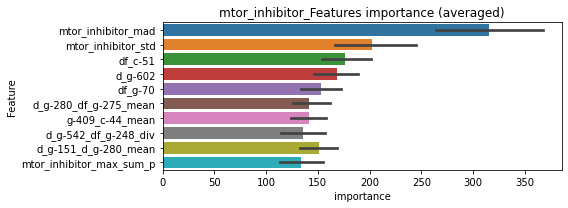

len(train_index) : 2704
len(valid_index) : 902
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184525	valid_1's binary_logloss: 0.0870585
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.00356596	valid_1's binary_logloss: 0.0706145


len(train_index) : 2704
len(valid_index) : 902
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172669	valid_1's binary_logloss: 0.0883652
[600]	training's binary_logloss: 0.00238635	valid_1's binary_logloss: 0.0646945
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00198775	valid_1's binary_logloss: 0.0639265


len(train_index) : 2705
len(valid_index) : 901
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182715	valid_1's binary_logloss: 0.078381
[600]	training's binary_logloss: 0.00246044	valid_1's binary_logloss: 0.0506164
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.00112028	valid_1's binary_logloss: 0.0466698


len(train_index) : 2705
len(valid_index) : 901
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187624	valid_1's binary_logloss: 0.0725524
[600]	training's binary_logloss: 0.00249231	valid_1's binary_logloss: 0.0455513
[900]	training's binary_logloss: 0.00100078	valid_1's binary_logloss: 0.0427189
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000990179	valid_1's binary_logloss: 0.0426331


mtor_inhibitor logloss: 0.05596724731987878


neg labels: 3289 → selected neg labels: 3288


mucolytic_agent, len(trt): 48, len(othr): 3288, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0099545	valid_1's binary_logloss: 0.0372993
[600]	training's binary_logloss: 0.00134269	valid_1's binary_logloss: 0.0158785
[900]	training's binary_logloss: 0.000618551	valid_1's binary_logloss: 0.0131456
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000576827	valid_1's binary_logloss: 0.0129148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100484	valid_1's binary_logloss: 0.0501599
[600]	training's binary_logloss: 0.00129191	valid_1's binary_logloss: 0.031509
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00139349	valid_1's binary_logloss: 0.031317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109268	valid_1's binary_logloss: 0.0303543
[600]	training's binary_logloss: 0.00140435	valid_1's binary_logloss: 0.0114542
[900]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0088270, Threshold: 0.1066749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.07467, conf_1:0.13868
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1066749
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_2: 0.1566749
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_3: 0.2066749
threshold: 0.2066749, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00858167	valid_1's binary_logloss: 0.0347524
[600]	training's binary_logloss: 0.00115992	valid_1's binary_logloss: 0.0175456
[900]	training's binary_logloss: 0.00055097	valid_1's binary_logloss: 0.0145217
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000516683	valid_1's binary_logloss: 0.0143418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00886451	valid_1's binary_logloss: 0.0322022
[600]	training's binary_logloss: 0.00117388	valid_1's binary_logloss: 0.0136853
[900]	training's binary_logloss: 0.000563253	valid_1's binary_logloss: 0.0108544
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000535687	valid_1's binary_logloss: 0.0107021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00889696	valid_1's binary_logloss: 0.0306736
[600]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0824250, Threshold: 0.2066749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3801
p_label_rate: 0.0203415 Vs.target_rate: 0.00202, Num_p_label: 81.0, conf_0:0.16534, conf_1:0.24801
Num_p_label: 81.0, Expected: 8.0, Adj_threshold_1: 0.2066749
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_2: 0.2566749
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_3: 0.3066749
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_4: 0.3566749
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_5: 0.4066749
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_6: 0.4566749
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_7: 0.5066749
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_8: 0.5566749
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_9: 0.6066749
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_10: 0.6566749
threshold: 0.6566749, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3801, y_label_rate: 0.1712707
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00827053	valid_1's binary_logloss: 0.0335049
[600]	training's binary_logloss: 0.00112184	valid_1's binary_logloss: 0.0186478
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000609682	valid_1's binary_logloss: 0.0171938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00828029	valid_1's binary_logloss: 0.0390701
[600]	training's binary_logloss: 0.00111073	valid_1's binary_logloss: 0.023043
[900]	training's binary_logloss: 0.000539519	valid_1's binary_logloss: 0.0206006
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000530709	valid_1's binary_logloss: 0.0205106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871543	valid_1's binary_logloss: 0.0235953
[600]	training's binary_logloss: 0.00114621	valid_1's binary_logloss: 0.00801674
[900]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.1001391, Threshold: 0.6566749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3791
p_label_rate: 0.0060271 Vs.target_rate: 0.00202, Num_p_label: 24.0, conf_0:0.50000, conf_1:0.72234
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_1: 0.6566749
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_2: 0.7066749
threshold: 0.7066749, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3791, y_label_rate: 0.1704036


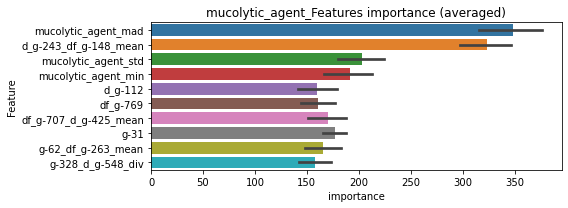

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00818138	valid_1's binary_logloss: 0.0396841
[600]	training's binary_logloss: 0.001079	valid_1's binary_logloss: 0.0232963
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000719286	valid_1's binary_logloss: 0.0223764


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00826102	valid_1's binary_logloss: 0.0293794
[600]	training's binary_logloss: 0.00109569	valid_1's binary_logloss: 0.0145658
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.0005836	valid_1's binary_logloss: 0.0126272


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00854506	valid_1's binary_logloss: 0.0248976
[600]	training's binary_logloss: 0.0011225	valid_1's binary_logloss: 0.00908917
[900]	training's binary_logloss: 0.000547279	valid_1's binary_logloss: 0.00701802
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000520132	valid_1's binary_logloss: 0.0068515


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00858178	valid_1's binary_logloss: 0.0251628
[600]	training's binary_logloss: 0.00112709	valid_1's binary_logloss: 0.0104068
[900]	training's binary_logloss: 0.000541418	valid_1's binary_logloss: 0.00849393
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000537317	valid_1's binary_logloss: 0.00845654


mucolytic_agent logloss: 0.012579336119986378


neg labels: 3289 → selected neg labels: 3281


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3281, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00825624	valid_1's binary_logloss: 0.0305771
[600]	training's binary_logloss: 0.00106682	valid_1's binary_logloss: 0.0141724
[900]	training's binary_logloss: 0.000514616	valid_1's binary_logloss: 0.0118755
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000507111	valid_1's binary_logloss: 0.0118482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00866647	valid_1's binary_logloss: 0.0246029
[600]	training's binary_logloss: 0.00110065	valid_1's binary_logloss: 0.00944043
[900]	training's binary_logloss: 0.000528657	valid_1's binary_logloss: 0.00756948
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000509765	valid_1's binary_logloss: 0.0075539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0089111	valid_1's binary_logloss: 0.0223282
[600]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0053361, Threshold: 0.0188169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01317, conf_1:0.02446
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0188169
Num_p_label: 6.0, Expected: 6.2, Adj_threshold_2: 0.0688169
threshold: 0.0688169, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0076456	valid_1's binary_logloss: 0.0287736
[600]	training's binary_logloss: 0.000999276	valid_1's binary_logloss: 0.0140731
[900]	training's binary_logloss: 0.000490894	valid_1's binary_logloss: 0.012001
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000490894	valid_1's binary_logloss: 0.012001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00789441	valid_1's binary_logloss: 0.0246245
[600]	training's binary_logloss: 0.0010225	valid_1's binary_logloss: 0.00967978
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000523094	valid_1's binary_logloss: 0.00779314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00777362	valid_1's binary_logloss: 0.0195297
[600]	training's binary_logloss: 0.00101645	valid_1's binary_logloss: 0.00636022
[900]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0648116, Threshold: 0.0688169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0075339 Vs.target_rate: 0.00155, Num_p_label: 30.0, conf_0:0.05505, conf_1:0.08258
Num_p_label: 30.0, Expected: 6.2, Adj_threshold_1: 0.0688169
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_2: 0.1188169
threshold: 0.1188169, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00774126	valid_1's binary_logloss: 0.0311543
[600]	training's binary_logloss: 0.000996284	valid_1's binary_logloss: 0.0129045
[900]	training's binary_logloss: 0.000479432	valid_1's binary_logloss: 0.0101996
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.00047693	valid_1's binary_logloss: 0.0101627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00800978	valid_1's binary_logloss: 0.0204949
[600]	training's binary_logloss: 0.00103019	valid_1's binary_logloss: 0.00711261
[900]	training's binary_logloss: 0.000493684	valid_1's binary_logloss: 0.00504423
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000461598	valid_1's binary_logloss: 0.00492811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0076281	valid_1's binary_logloss: 0.0216051
[600]	training's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0831739, Threshold: 0.1188169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0032647 Vs.target_rate: 0.00155, Num_p_label: 13.0, conf_0:0.10694, conf_1:0.13070
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.1188169
threshold: 0.1188169, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


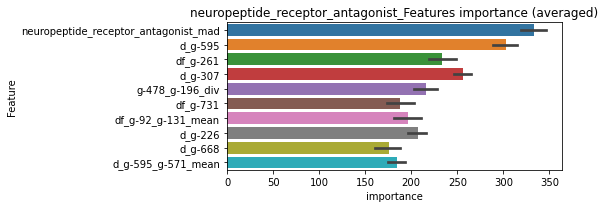

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00773798	valid_1's binary_logloss: 0.0320866
[600]	training's binary_logloss: 0.00099639	valid_1's binary_logloss: 0.014522
[900]	training's binary_logloss: 0.000484421	valid_1's binary_logloss: 0.0116193
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000457439	valid_1's binary_logloss: 0.0115321


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00770551	valid_1's binary_logloss: 0.0197574
[600]	training's binary_logloss: 0.0010043	valid_1's binary_logloss: 0.00627139
[900]	training's binary_logloss: 0.000491254	valid_1's binary_logloss: 0.00444718
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000472483	valid_1's binary_logloss: 0.00439226


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00795757	valid_1's binary_logloss: 0.022192
[600]	training's binary_logloss: 0.00101088	valid_1's binary_logloss: 0.00787204
[900]	training's binary_logloss: 0.000486549	valid_1's binary_logloss: 0.00585165
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000467832	valid_1's binary_logloss: 0.00581678


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775486	valid_1's binary_logloss: 0.0208121
[600]	training's binary_logloss: 0.00100778	valid_1's binary_logloss: 0.00660302
[900]	training's binary_logloss: 0.000487459	valid_1's binary_logloss: 0.00478729
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000504112	valid_1's binary_logloss: 0.00478084


neuropeptide_receptor_antagonist logloss: 0.0066396906732200025


neg labels: 3289 → selected neg labels: 3173


nfkb_inhibitor, len(trt): 832, len(othr): 3173, target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[17]	training's binary_logloss: 0.473044	valid_1's binary_logloss: 0.507481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[39]	training's binary_logloss: 0.432591	valid_1's binary_logloss: 0.5069
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[43]	training's binary_logloss: 0.420696	valid_1's binary_logloss: 0.507693
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.533
y_Threshold: 0.2143600, Threshold: 0.4340939, pos_neg_ratio: 0.7377876
Remove_noisy_data: 1402 → Positive_corect_labels: 240/2603
p_label_rate: 0.0100452 Vs.target_rate: 0.03494, Num_p_label: 40.0, conf_0:0.30387, conf_1:0.56432
Num_p_label: 40.0, Expected: 139.1, Adj_threshold_1: 0.4340939
Num_p_label: 92.0, Expected: 139.1, Adj_threshold_2: 0.4040939
Num_p_label: 126.0, Expected: 139.1, Adj_threshold_3: 0.3740939
Num_p_label: 136.0, Expected: 139.1, Adj_threshold_4: 0.3440939
Num_p_label: 143.0, Expected: 139.1, Adj_threshold_5: 0.3140939
Num_p_label: 148.0, Expected: 139.1, Adj_threshold_6: 0.2840939
Num_p_label: 191.0, Expected: 139.1, Adj_threshold_7: 0.2540939
Num_p_label: 554.0, Expected: 139.1, Adj_threshold_8: 0.2240939
threshold: 0.2240939, positive_p_label: 554.0/3982, p_label_rate: 0.1391261


Early stopping, best iteration is:
[22]	training's binary_logloss: 0.467226	valid_1's binary_logloss: 0.509173


positive_y_label: 240.0/2603, y_label_rate: 0.0922013
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[117]	training's binary_logloss: 0.0900339	valid_1's binary_logloss: 0.264474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[101]	training's binary_logloss: 0.108705	valid_1's binary_logloss: 0.263695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[153]	training's binary_logloss: 0.069276	valid_1's binary_logloss: 0.234685


2 / 3 AUC score:0.787
y_Threshold: 0.1210026, Threshold: 0.2240939, pos_neg_ratio: 0.7377876
Remove_noisy_data: 274 → Positive_corect_labels: 103.0/2329
p_label_rate: 0.0926670 Vs.target_rate: 0.03494, Num_p_label: 369.0, conf_0:0.17928, conf_1:0.26891
Num_p_label: 369.0, Expected: 139.1, Adj_threshold_1: 0.2240939
Num_p_label: 306.0, Expected: 139.1, Adj_threshold_2: 0.2740939
Num_p_label: 266.0, Expected: 139.1, Adj_threshold_3: 0.3240939
Num_p_label: 230.0, Expected: 139.1, Adj_threshold_4: 0.3740939
Num_p_label: 203.0, Expected: 139.1, Adj_threshold_5: 0.4240939
Num_p_label: 188.0, Expected: 139.1, Adj_threshold_6: 0.4740939
Num_p_label: 182.0, Expected: 139.1, Adj_threshold_7: 0.5240939
Num_p_label: 168.0, Expected: 139.1, Adj_threshold_8: 0.5740939
Num_p_label: 158.0, Expected: 139.1, Adj_threshold_9: 0.6240939
Num_p_label: 150.0, Expected: 139.1, Adj_threshold_10: 0.6740939
threshold: 0.7240939, positive_p_label: 143.0/3982, p_label_rate: 0.0359116


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[100]	training's binary_logloss: 0.10453	valid_1's binary_logloss: 0.237582


positive_y_label: 103.0/2329, y_label_rate: 0.0442250
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00514599	valid_1's binary_logloss: 0.0413221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002863	valid_1's binary_logloss: 0.0311593
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00226171	valid_1's binary_logloss: 0.0306606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[157]	training's binary_logloss: 0.0106957	valid_1's binary_logloss: 0.0587081
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.985
y_Threshold: 0.2948283, Threshold: 0.7240939, pos_neg_ratio: 0.7377876
Remove_noisy_data: 30 → Positive_corect_labels: 88.0/2299
p_label_rate: 0.0760924 Vs.target_rate: 0.03494, Num_p_label: 303.0, conf_0:0.50000, conf_1:0.79650
Num_p_label: 303.0, Expected: 139.1, Adj_threshold_1: 0.7240939
Num_p_label: 281.0, Expected: 139.1, Adj_threshold_2: 0.7740939
threshold: 0.7740939, positive_p_label: 281.0/3982, p_label_rate: 0.0705676


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.0055605	valid_1's binary_logloss: 0.0354714


positive_y_label: 88.0/2299, y_label_rate: 0.0382775


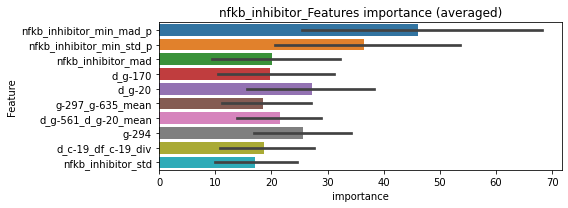

len(train_index) : 1724
len(valid_index) : 575
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144102	valid_1's binary_logloss: 0.00956196


len(train_index) : 1724
len(valid_index) : 575
================================= fold 2/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000896871	valid_1's binary_logloss: 0.00894015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142859	valid_1's binary_logloss: 0.0131191


len(train_index) : 1724
len(valid_index) : 575
================================= fold 3/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000461679	valid_1's binary_logloss: 0.0119431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016478	valid_1's binary_logloss: 0.00856662


len(train_index) : 1725
len(valid_index) : 574
================================= fold 4/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00123138	valid_1's binary_logloss: 0.00794479
Training until validation scores don't improve for 30 rounds


nfkb_inhibitor logloss: 0.010929169644278836


[300]	training's binary_logloss: 0.00138448	valid_1's binary_logloss: 0.01529
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.00182992	valid_1's binary_logloss: 0.0148955
neg labels: 3289 → selected neg labels: 3289


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00327118	valid_1's binary_logloss: 0.00676326
[600]	training's binary_logloss: 0.000414291	valid_1's binary_logloss: 0.0014818
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000285173	valid_1's binary_logloss: 0.00117571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00327953	valid_1's binary_logloss: 0.00975665
[600]	training's binary_logloss: 0.000403286	valid_1's binary_logloss: 0.00381029
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000301971	valid_1's binary_logloss: 0.00340709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00337472	valid_1's binary_logloss: 0.00571504
[600]	training's binary_logloss: 0.000419884	valid_1's binary_logloss: 0.00126221
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000287463	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0015695, Threshold: 0.0058172, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00407, conf_1:0.00756
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0058172
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0558172
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1058172
threshold: 0.1058172, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281125	valid_1's binary_logloss: 0.00626468
[600]	training's binary_logloss: 0.000367777	valid_1's binary_logloss: 0.00192456
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000264124	valid_1's binary_logloss: 0.00166314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286524	valid_1's binary_logloss: 0.00773265
[600]	training's binary_logloss: 0.00036938	valid_1's binary_logloss: 0.00315455
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000315494	valid_1's binary_logloss: 0.00309136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289959	valid_1's binary_logloss: 0.00516893
[600]	training's binary_logloss: 0.000374605	valid_1's binary_logloss: 0.000874752
[900]	training's binary_logloss: 0.000269154	valid_1's binary_logloss: 0.000658742
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.0391154, Threshold: 0.1058172, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0042692 Vs.target_rate: 0.00050, Num_p_label: 17.0, conf_0:0.08465, conf_1:0.12698
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.1058172
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.1558172
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.2058172
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_4: 0.2558172
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.3058172
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.3558172
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.4058172
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.4558172
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.5058172
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.5558172
threshold: 0.6058172, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= 

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281125	valid_1's binary_logloss: 0.00626468
[600]	training's binary_logloss: 0.000367777	valid_1's binary_logloss: 0.00192456
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000264124	valid_1's binary_logloss: 0.00166314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286524	valid_1's binary_logloss: 0.00773265
[600]	training's binary_logloss: 0.00036938	valid_1's binary_logloss: 0.00315455
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000315494	valid_1's binary_logloss: 0.00309136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289959	valid_1's binary_logloss: 0.00516893
[600]	training's binary_logloss: 0.000374605	valid_1's binary_logloss: 0.000874752
[900]	training's binary_logloss: 0.000269154	valid_1's binary_logloss: 0.000658742
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.0391154, Threshold: 0.6058172, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00050, Num_p_label: 6.0, conf_0:0.50000, conf_1:0.66640
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.6058172
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.6558172
threshold: 0.6558172, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


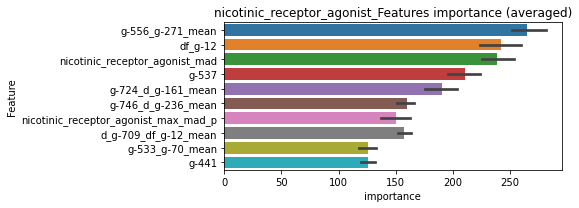

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286233	valid_1's binary_logloss: 0.00605402
[600]	training's binary_logloss: 0.000368689	valid_1's binary_logloss: 0.00174523
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000267044	valid_1's binary_logloss: 0.0014527


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288627	valid_1's binary_logloss: 0.00742231
[600]	training's binary_logloss: 0.000368582	valid_1's binary_logloss: 0.00304507
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000276792	valid_1's binary_logloss: 0.00288474


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289951	valid_1's binary_logloss: 0.00499991
[600]	training's binary_logloss: 0.000371668	valid_1's binary_logloss: 0.000831339
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000265957	valid_1's binary_logloss: 0.000626516


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028824	valid_1's binary_logloss: 0.00619171
[600]	training's binary_logloss: 0.000372622	valid_1's binary_logloss: 0.0026428
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00028199	valid_1's binary_logloss: 0.00241987


nicotinic_receptor_agonist logloss: 0.0018465883009532663


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0064112	valid_1's binary_logloss: 0.0199768
[600]	training's binary_logloss: 0.000801804	valid_1's binary_logloss: 0.00960195
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000518262	valid_1's binary_logloss: 0.00901027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00674116	valid_1's binary_logloss: 0.0221518
[600]	training's binary_logloss: 0.000839948	valid_1's binary_logloss: 0.00948765
[900]	training's binary_logloss: 0.000440012	valid_1's binary_logloss: 0.00795968
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000449296	valid_1's binary_logloss: 0.0079533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00665737	valid_1's binary_logloss: 0.0133494
[600]	training's binary_logloss: 0.000846925	valid_1's binary_logloss: 0.00341057
[900]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0047790, Threshold: 0.0606888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.04248, conf_1:0.07890
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0606888
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_2: 0.1106888
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_3: 0.1606888
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_4: 0.2106888
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_5: 0.2606888
threshold: 0.2606888, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593149	valid_1's binary_logloss: 0.0156544
[600]	training's binary_logloss: 0.000760298	valid_1's binary_logloss: 0.00657901
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000445066	valid_1's binary_logloss: 0.00580361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597434	valid_1's binary_logloss: 0.019607
[600]	training's binary_logloss: 0.00074551	valid_1's binary_logloss: 0.00879112
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000473787	valid_1's binary_logloss: 0.00778178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00602412	valid_1's binary_logloss: 0.0112594
[600]	training's binary_logloss: 0.000758738	valid_1's binary_logloss: 0.00259723
[900]	training's binary_logloss: 0.000405347	valid_1's binary_logloss: 0.00176077
Early stopping, b

2 / 3 AUC score:1.000
y_Threshold: 0.0493445, Threshold: 0.2606888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.20855, conf_1:0.31283
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.2606888
Num_p_label: 35.0, Expected: 4.3, Adj_threshold_2: 0.3106888
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_3: 0.3606888
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_4: 0.4106888
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_5: 0.4606888
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_6: 0.5106888
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_7: 0.5606888
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_8: 0.6106888
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.6606888
threshold: 0.6606888, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00565184	valid_1's binary_logloss: 0.0189153
[600]	training's binary_logloss: 0.000738596	valid_1's binary_logloss: 0.00754954
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000461492	valid_1's binary_logloss: 0.00635986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592278	valid_1's binary_logloss: 0.0135745
[600]	training's binary_logloss: 0.000750648	valid_1's binary_logloss: 0.00507451
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000419199	valid_1's binary_logloss: 0.00434553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617413	valid_1's binary_logloss: 0.0117278
[600]	training's binary_logloss: 0.000770442	valid_1's binary_logloss: 0.00226211
[900]	training's binary_logloss: 0.000406546	valid_1's binary_logloss: 0.00140319
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.0550125, Threshold: 0.6606888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00109, Num_p_label: 9.0, conf_0:0.50000, conf_1:0.72676
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_1: 0.6606888
threshold: 0.6606888, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


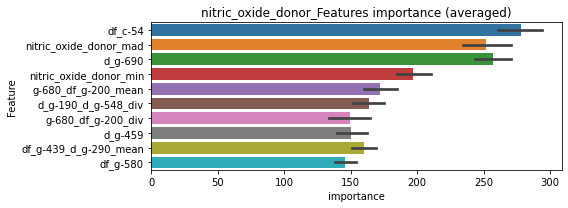

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571589	valid_1's binary_logloss: 0.0184783
[600]	training's binary_logloss: 0.000733997	valid_1's binary_logloss: 0.00711549
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000411967	valid_1's binary_logloss: 0.00601853


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600094	valid_1's binary_logloss: 0.0138171
[600]	training's binary_logloss: 0.000747592	valid_1's binary_logloss: 0.00494908
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000417357	valid_1's binary_logloss: 0.00436649


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604968	valid_1's binary_logloss: 0.0113926
[600]	training's binary_logloss: 0.000767429	valid_1's binary_logloss: 0.00225211
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000416678	valid_1's binary_logloss: 0.00145759


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580552	valid_1's binary_logloss: 0.0189618
[600]	training's binary_logloss: 0.000743352	valid_1's binary_logloss: 0.00869134
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000437438	valid_1's binary_logloss: 0.00785087


nitric_oxide_donor logloss: 0.004923371411334288


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00647859	valid_1's binary_logloss: 0.0195396
[600]	training's binary_logloss: 0.000817587	valid_1's binary_logloss: 0.00892894
[900]	training's binary_logloss: 0.00042185	valid_1's binary_logloss: 0.00787446
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000421693	valid_1's binary_logloss: 0.0078735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00611861	valid_1's binary_logloss: 0.0286941
[600]	training's binary_logloss: 0.00078824	valid_1's binary_logloss: 0.0186753
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.00059031	valid_1's binary_logloss: 0.0179105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649193	valid_1's binary_logloss: 0.015439
[600]	training's binary_logloss: 0.000819488	valid_1's binary_logloss: 0.0046614
Early stopping, best it

1 / 3 AUC score:1.000
y_Threshold: 0.0048872, Threshold: 0.0200753, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122, Num_p_label: 40.0, conf_0:0.01405, conf_1:0.02610
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0200753
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_2: 0.0700753
Num_p_label: 10.0, Expected: 4.8, Adj_threshold_3: 0.1200753
threshold: 0.1200753, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00564806	valid_1's binary_logloss: 0.0176217
[600]	training's binary_logloss: 0.000734098	valid_1's binary_logloss: 0.00660893
[900]	training's binary_logloss: 0.000379162	valid_1's binary_logloss: 0.00552321
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000379729	valid_1's binary_logloss: 0.00550984
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00556836	valid_1's binary_logloss: 0.0161248
[600]	training's binary_logloss: 0.000728149	valid_1's binary_logloss: 0.00792164
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000657551	valid_1's binary_logloss: 0.00772954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592645	valid_1's binary_logloss: 0.0104056
[600]	training's binary_logloss: 0.000745436	valid_1's binary_logloss: 0.00232272
[900]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.0640656, Threshold: 0.1200753, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0080362 Vs.target_rate: 0.00122, Num_p_label: 32.0, conf_0:0.09606, conf_1:0.14409
Num_p_label: 32.0, Expected: 4.8, Adj_threshold_1: 0.1200753
Num_p_label: 22.0, Expected: 4.8, Adj_threshold_2: 0.1700753
Num_p_label: 17.0, Expected: 4.8, Adj_threshold_3: 0.2200753
Num_p_label: 16.0, Expected: 4.8, Adj_threshold_4: 0.2700753
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_5: 0.3200753
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_6: 0.3700753
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_7: 0.4200753
threshold: 0.4200753, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560083	valid_1's binary_logloss: 0.0203974
[600]	training's binary_logloss: 0.000719118	valid_1's binary_logloss: 0.00936481
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000450883	valid_1's binary_logloss: 0.00836367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571471	valid_1's binary_logloss: 0.0124191
[600]	training's binary_logloss: 0.000737148	valid_1's binary_logloss: 0.00299662
[900]	training's binary_logloss: 0.000391484	valid_1's binary_logloss: 0.0019086
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.00037682	valid_1's binary_logloss: 0.00189449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0053617	valid_1's binary_logloss: 0.0249557
[600]	training's binary_logloss: 0.000702964	valid_1's binary_logloss: 0.017851
Early stopping, best

3 / 3 AUC score:1.000
y_Threshold: 0.0497300, Threshold: 0.4200753, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0020090 Vs.target_rate: 0.00122, Num_p_label: 8.0, conf_0:0.37807, conf_1:0.46208
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_1: 0.4200753
threshold: 0.4200753, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


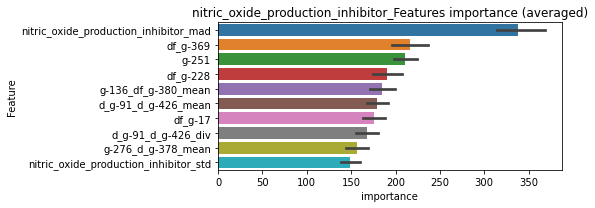

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538401	valid_1's binary_logloss: 0.0163977
[600]	training's binary_logloss: 0.000703119	valid_1's binary_logloss: 0.00701659
[900]	training's binary_logloss: 0.000371859	valid_1's binary_logloss: 0.00525707
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000371859	valid_1's binary_logloss: 0.00525707


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545694	valid_1's binary_logloss: 0.0158954
[600]	training's binary_logloss: 0.000701928	valid_1's binary_logloss: 0.00577098
[900]	training's binary_logloss: 0.000377018	valid_1's binary_logloss: 0.00454882
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000370018	valid_1's binary_logloss: 0.0045107


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534622	valid_1's binary_logloss: 0.013556
[600]	training's binary_logloss: 0.000705156	valid_1's binary_logloss: 0.00414321
[900]	training's binary_logloss: 0.000381747	valid_1's binary_logloss: 0.0031244
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000381831	valid_1's binary_logloss: 0.00312349


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054412	valid_1's binary_logloss: 0.0118911
[600]	training's binary_logloss: 0.000709562	valid_1's binary_logloss: 0.0026864
[900]	training's binary_logloss: 0.000386487	valid_1's binary_logloss: 0.00176412
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000386656	valid_1's binary_logloss: 0.00176393


nitric_oxide_production_inhibitor logloss: 0.003665799397135121


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0060158	valid_1's binary_logloss: 0.0205203
[600]	training's binary_logloss: 0.000778745	valid_1's binary_logloss: 0.00806629
[900]	training's binary_logloss: 0.000419258	valid_1's binary_logloss: 0.00622268
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000419258	valid_1's binary_logloss: 0.00622268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599125	valid_1's binary_logloss: 0.0154275
[600]	training's binary_logloss: 0.000785152	valid_1's binary_logloss: 0.00572584
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000425688	valid_1's binary_logloss: 0.00465624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.006043	valid_1's binary_logloss: 0.0129849
[600]	training's binary_logloss: 0.000796938	valid_1's binary_logloss: 0.00308727
[900]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0034058, Threshold: 0.0737816, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.05165, conf_1:0.09592
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0737816
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_2: 0.1237816
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_3: 0.1737816
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_4: 0.2237816
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_5: 0.2737816
threshold: 0.2737816, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531349	valid_1's binary_logloss: 0.0161761
[600]	training's binary_logloss: 0.000699537	valid_1's binary_logloss: 0.00619948
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000401234	valid_1's binary_logloss: 0.00496353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055486	valid_1's binary_logloss: 0.0138067
[600]	training's binary_logloss: 0.000714981	valid_1's binary_logloss: 0.00410559
[900]	training's binary_logloss: 0.000395713	valid_1's binary_logloss: 0.00329032
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000393293	valid_1's binary_logloss: 0.00328587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055061	valid_1's binary_logloss: 0.0098527
[600]	training's binary_logloss: 0.000718618	valid_1's binary_logloss: 0.00174032
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.1627876, Threshold: 0.2737816, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0118031 Vs.target_rate: 0.00109, Num_p_label: 47.0, conf_0:0.21903, conf_1:0.32854
Num_p_label: 47.0, Expected: 4.3, Adj_threshold_1: 0.2737816
Num_p_label: 42.0, Expected: 4.3, Adj_threshold_2: 0.3237816
Num_p_label: 34.0, Expected: 4.3, Adj_threshold_3: 0.3737816
Num_p_label: 29.0, Expected: 4.3, Adj_threshold_4: 0.4237816
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_5: 0.4737816
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_6: 0.5237816
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_7: 0.5737816
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_8: 0.6237816
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.6737816
threshold: 0.6737816, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531349	valid_1's binary_logloss: 0.0161761
[600]	training's binary_logloss: 0.000699537	valid_1's binary_logloss: 0.00619948
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000401234	valid_1's binary_logloss: 0.00496353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055486	valid_1's binary_logloss: 0.0138067
[600]	training's binary_logloss: 0.000714981	valid_1's binary_logloss: 0.00410559
[900]	training's binary_logloss: 0.000395713	valid_1's binary_logloss: 0.00329032
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000393293	valid_1's binary_logloss: 0.00328587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055061	valid_1's binary_logloss: 0.0098527
[600]	training's binary_logloss: 0.000718618	valid_1's binary_logloss: 0.00174032
[900]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.1627876, Threshold: 0.6737816, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00109, Num_p_label: 10.0, conf_0:0.50000, conf_1:0.74116
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_1: 0.6737816
threshold: 0.6737816, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


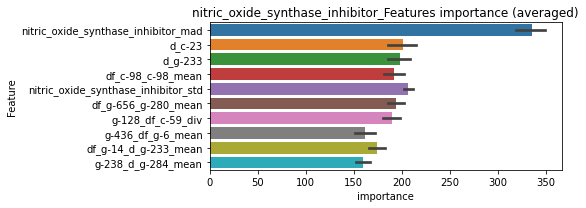

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00539888	valid_1's binary_logloss: 0.0165279
[600]	training's binary_logloss: 0.000707256	valid_1's binary_logloss: 0.0064563
[900]	training's binary_logloss: 0.000396085	valid_1's binary_logloss: 0.00513663
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000394801	valid_1's binary_logloss: 0.00512701


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00557818	valid_1's binary_logloss: 0.0135105
[600]	training's binary_logloss: 0.000716961	valid_1's binary_logloss: 0.00450427
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000405083	valid_1's binary_logloss: 0.00361608


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00559794	valid_1's binary_logloss: 0.0100328
[600]	training's binary_logloss: 0.000733385	valid_1's binary_logloss: 0.00173478
[900]	training's binary_logloss: 0.000411102	valid_1's binary_logloss: 0.00106299
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000399153	valid_1's binary_logloss: 0.00103726


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541541	valid_1's binary_logloss: 0.0144486
[600]	training's binary_logloss: 0.000707291	valid_1's binary_logloss: 0.00420455
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000411481	valid_1's binary_logloss: 0.00336912


nitric_oxide_synthase_inhibitor logloss: 0.0032882974384563935


neg labels: 3289 → selected neg labels: 3286


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3286, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164554	valid_1's binary_logloss: 0.0022235
[600]	training's binary_logloss: 0.000233442	valid_1's binary_logloss: 0.000469005
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000203013	valid_1's binary_logloss: 0.00041949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167362	valid_1's binary_logloss: 0.00204892
[600]	training's binary_logloss: 0.000235996	valid_1's binary_logloss: 0.000363927
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000209653	valid_1's binary_logloss: 0.000328905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170019	valid_1's binary_logloss: 0.00207805
[600]	training's binary_logloss: 0.000237044	valid_1's binary_logloss: 0.000339251
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.0002007	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0006983, Threshold: 0.0024149, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00169, conf_1:0.00314
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0024149


Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000203387	valid_1's binary_logloss: 0.00114904


Num_p_label: 1.0, Expected: 1.2, Adj_threshold_2: 0.0524149
threshold: 0.0524149, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155383	valid_1's binary_logloss: 0.0018286
[600]	training's binary_logloss: 0.000213653	valid_1's binary_logloss: 0.000275414
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00019157	valid_1's binary_logloss: 0.000247885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155775	valid_1's binary_logloss: 0.00293416
[600]	training's binary_logloss: 0.000216134	valid_1's binary_logloss: 0.0014854
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000198846	valid_1's binary_logloss: 0.00145898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156011	valid_1's binary_logloss: 0.00166676
[600]	training's binary_logloss: 0.00021517	valid_1's binary_logloss: 0.000240189
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000194197	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0580561, Threshold: 0.0524149, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00029, Num_p_label: 8.0, conf_0:0.04193, conf_1:0.06290
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_1: 0.0524149


Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000192606	valid_1's binary_logloss: 0.000253752


Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.1024149
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.1524149
threshold: 0.1524149, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155383	valid_1's binary_logloss: 0.0018286
[600]	training's binary_logloss: 0.000213653	valid_1's binary_logloss: 0.000275414
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00019157	valid_1's binary_logloss: 0.000247885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155775	valid_1's binary_logloss: 0.00293416
[600]	training's binary_logloss: 0.000216134	valid_1's binary_logloss: 0.0014854
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000198846	valid_1's binary_logloss: 0.00145898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156011	valid_1's binary_logloss: 0.00166676
[600]	training's binary_logloss: 0.00021517	valid_1's binary_logloss: 0.000240189
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000194197	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0580561, Threshold: 0.1524149, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.13717, conf_1:0.16766
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.1524149
threshold: 0.1524149, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000192606	valid_1's binary_logloss: 0.000253752


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


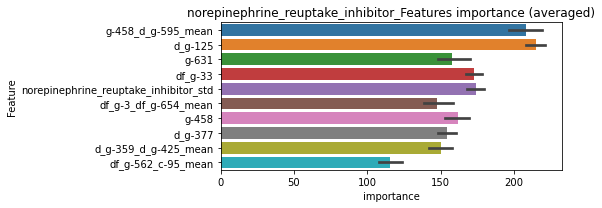

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154955	valid_1's binary_logloss: 0.00181096
[600]	training's binary_logloss: 0.000214407	valid_1's binary_logloss: 0.000278363
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000191567	valid_1's binary_logloss: 0.000249853


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154291	valid_1's binary_logloss: 0.00378189
[600]	training's binary_logloss: 0.000216473	valid_1's binary_logloss: 0.00216145


len(train_index) : 2858


Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000193925	valid_1's binary_logloss: 0.00210916


len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155575	valid_1's binary_logloss: 0.00164645
[600]	training's binary_logloss: 0.000217332	valid_1's binary_logloss: 0.000239959
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000190654	valid_1's binary_logloss: 0.00021106


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154922	valid_1's binary_logloss: 0.00186946
[600]	training's binary_logloss: 0.000216231	valid_1's binary_logloss: 0.000291215


norepinephrine_reuptake_inhibitor logloss: 0.0007088871833690685


Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000192038	valid_1's binary_logloss: 0.000261352
neg labels: 3289 → selected neg labels: 3287


nrf2_activator, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390648	valid_1's binary_logloss: 0.00570708
[600]	training's binary_logloss: 0.000499154	valid_1's binary_logloss: 0.00103892
[900]	training's binary_logloss: 0.000299928	valid_1's binary_logloss: 0.000708019
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000299928	valid_1's binary_logloss: 0.000708019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00375133	valid_1's binary_logloss: 0.0106275
[600]	training's binary_logloss: 0.000478191	valid_1's binary_logloss: 0.00371344
[900]	training's binary_logloss: 0.000290003	valid_1's binary_logloss: 0.0030982
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00028812	valid_1's binary_logloss: 0.00308863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00391064	valid_1's binary_logloss: 0.00696866
[600]	trainin

1 / 3 AUC score:1.000
y_Threshold: 0.0020981, Threshold: 0.0119830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00839, conf_1:0.01558
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0119830
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0619830
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1119830
threshold: 0.1119830, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340713	valid_1's binary_logloss: 0.00535008
[600]	training's binary_logloss: 0.000430431	valid_1's binary_logloss: 0.000893955
[900]	training's binary_logloss: 0.000274861	valid_1's binary_logloss: 0.000609427
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000274861	valid_1's binary_logloss: 0.000609427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343191	valid_1's binary_logloss: 0.00731414
[600]	training's binary_logloss: 0.000434115	valid_1's binary_logloss: 0.00189398
[900]	training's binary_logloss: 0.000275478	valid_1's binary_logloss: 0.00150648
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000276027	valid_1's binary_logloss: 0.00150646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00339908	valid_1's binary_logloss: 0.00619138
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.0919223, Threshold: 0.1119830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0047715 Vs.target_rate: 0.00076, Num_p_label: 19.0, conf_0:0.08959, conf_1:0.13438
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.1119830
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.1619830
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.2119830
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.2619830
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.3119830
threshold: 0.3119830, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340713	valid_1's binary_logloss: 0.00535008
[600]	training's binary_logloss: 0.000430431	valid_1's binary_logloss: 0.000893955
[900]	training's binary_logloss: 0.000274861	valid_1's binary_logloss: 0.000609427
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000274861	valid_1's binary_logloss: 0.000609427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343191	valid_1's binary_logloss: 0.00731414
[600]	training's binary_logloss: 0.000434115	valid_1's binary_logloss: 0.00189398
[900]	training's binary_logloss: 0.000275478	valid_1's binary_logloss: 0.00150648
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000276027	valid_1's binary_logloss: 0.00150646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00339908	valid_1's binary_logloss: 0.00619138
[600]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.0919223, Threshold: 0.3119830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.28078, conf_1:0.34318
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.3119830
threshold: 0.3119830, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


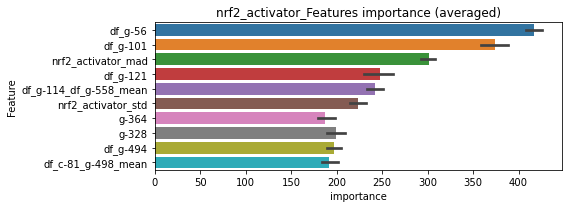

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340325	valid_1's binary_logloss: 0.00545818
[600]	training's binary_logloss: 0.000431487	valid_1's binary_logloss: 0.000913902
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000279106	valid_1's binary_logloss: 0.00062982


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00345982	valid_1's binary_logloss: 0.00748066
[600]	training's binary_logloss: 0.000435829	valid_1's binary_logloss: 0.00183176
[900]	training's binary_logloss: 0.000278012	valid_1's binary_logloss: 0.00147187
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000278483	valid_1's binary_logloss: 0.00146777


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340531	valid_1's binary_logloss: 0.00602902
[600]	training's binary_logloss: 0.000433765	valid_1's binary_logloss: 0.00164001
[900]	training's binary_logloss: 0.000276348	valid_1's binary_logloss: 0.00133132
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.00027636	valid_1's binary_logloss: 0.00133132


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00345609	valid_1's binary_logloss: 0.0078365
[600]	training's binary_logloss: 0.000435698	valid_1's binary_logloss: 0.00194766
[900]	training's binary_logloss: 0.000275434	valid_1's binary_logloss: 0.00152329
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000275434	valid_1's binary_logloss: 0.00152329


nrf2_activator logloss: 0.0012396989754507883


neg labels: 3289 → selected neg labels: 3280


opioid_receptor_agonist, len(trt): 61, len(othr): 3280, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164664	valid_1's binary_logloss: 0.0667011
[600]	training's binary_logloss: 0.0021556	valid_1's binary_logloss: 0.0348584
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00102409	valid_1's binary_logloss: 0.0312507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171515	valid_1's binary_logloss: 0.0643651
[600]	training's binary_logloss: 0.00214633	valid_1's binary_logloss: 0.0378267
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000965548	valid_1's binary_logloss: 0.0349383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177913	valid_1's binary_logloss: 0.0460623
[600]	training's binary_logloss: 0.00230379	valid_1's binary_logloss: 0.018747
[900]	training's binary_logloss: 0.000902643	valid_1's binary_logloss: 0.0144243
[1200]	training's binary_loglo

1 / 3 AUC score:0.998
y_Threshold: 0.0097121, Threshold: 0.0459458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.03216, conf_1:0.05973
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0459458
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_2: 0.0959458
threshold: 0.0959458, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135794	valid_1's binary_logloss: 0.0613604
[600]	training's binary_logloss: 0.00174839	valid_1's binary_logloss: 0.0370647
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00110127	valid_1's binary_logloss: 0.0349211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151665	valid_1's binary_logloss: 0.0495477
[600]	training's binary_logloss: 0.00190092	valid_1's binary_logloss: 0.024762
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000954997	valid_1's binary_logloss: 0.0212685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155764	valid_1's binary_logloss: 0.0532515
[600]	training's binary_logloss: 0.00197959	valid_1's binary_logloss: 0.0255526
[900]	training's binary_logloss: 0.000819342	valid_1's binary_logloss: 0.0217178
Early stopping, best iteratio

2 / 3 AUC score:1.000
y_Threshold: 0.0543625, Threshold: 0.0959458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0205927 Vs.target_rate: 0.00256, Num_p_label: 82.0, conf_0:0.07676, conf_1:0.11513
Num_p_label: 82.0, Expected: 10.2, Adj_threshold_1: 0.0959458
Num_p_label: 56.0, Expected: 10.2, Adj_threshold_2: 0.1459458
Num_p_label: 37.0, Expected: 10.2, Adj_threshold_3: 0.1959458
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_4: 0.2459458
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_5: 0.2959458
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_6: 0.3459458
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_7: 0.3959458
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_8: 0.4459458
threshold: 0.4459458, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014725	valid_1's binary_logloss: 0.0447749
[600]	training's binary_logloss: 0.00185678	valid_1's binary_logloss: 0.0187973
[900]	training's binary_logloss: 0.000784671	valid_1's binary_logloss: 0.014918
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000738153	valid_1's binary_logloss: 0.014742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143926	valid_1's binary_logloss: 0.0510477
[600]	training's binary_logloss: 0.00183539	valid_1's binary_logloss: 0.0342329
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00118403	valid_1's binary_logloss: 0.0333493
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139642	valid_1's binary_logloss: 0.0502757
[600]	training's binary_logloss: 0.00180269	valid_1's binary_logloss: 0.0236596
Early stopping, best iteration 

3 / 3 AUC score:0.999
y_Threshold: 0.0638951, Threshold: 0.4459458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0037670 Vs.target_rate: 0.00256, Num_p_label: 15.0, conf_0:0.40135, conf_1:0.49054
threshold: 0.4459458, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3780, y_label_rate: 0.1703704


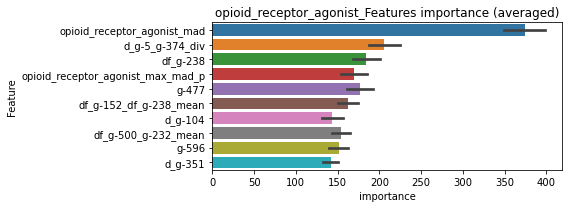

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141707	valid_1's binary_logloss: 0.0396964
[600]	training's binary_logloss: 0.00184016	valid_1's binary_logloss: 0.0160246
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000852768	valid_1's binary_logloss: 0.0129086


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134447	valid_1's binary_logloss: 0.0533127
[600]	training's binary_logloss: 0.00176402	valid_1's binary_logloss: 0.0342204
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.00106797	valid_1's binary_logloss: 0.0327092


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148913	valid_1's binary_logloss: 0.03386
[600]	training's binary_logloss: 0.00191272	valid_1's binary_logloss: 0.010114
[900]	training's binary_logloss: 0.00079478	valid_1's binary_logloss: 0.00650724
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000694599	valid_1's binary_logloss: 0.00610812


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132432	valid_1's binary_logloss: 0.0560678
[600]	training's binary_logloss: 0.00174269	valid_1's binary_logloss: 0.0329814
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00113375	valid_1's binary_logloss: 0.0316658


opioid_receptor_agonist logloss: 0.020848238608644293


neg labels: 3289 → selected neg labels: 3274


opioid_receptor_antagonist, len(trt): 96, len(othr): 3274, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232941	valid_1's binary_logloss: 0.112696
[600]	training's binary_logloss: 0.00322761	valid_1's binary_logloss: 0.0953455
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00263617	valid_1's binary_logloss: 0.0950447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238706	valid_1's binary_logloss: 0.0765322
[600]	training's binary_logloss: 0.00353486	valid_1's binary_logloss: 0.042384
[900]	training's binary_logloss: 0.001276	valid_1's binary_logloss: 0.036192
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000988941	valid_1's binary_logloss: 0.0354518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231388	valid_1's binary_logloss: 0.0961179
[600]	training's binary_logloss: 0.00333167	valid_1's binary_logloss: 0.0678253
Early stopping, best iteration is

1 / 3 AUC score:0.989
y_Threshold: 0.0200929, Threshold: 0.1366110, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 629/3746
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.09563, conf_1:0.17759
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.1366110
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_2: 0.1866110
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_3: 0.2366110
threshold: 0.2366110, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 629.0/3746, y_label_rate: 0.1679124
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166349	valid_1's binary_logloss: 0.0944787
[600]	training's binary_logloss: 0.00227964	valid_1's binary_logloss: 0.0819711
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00244027	valid_1's binary_logloss: 0.0817861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169056	valid_1's binary_logloss: 0.0823945
[600]	training's binary_logloss: 0.00232205	valid_1's binary_logloss: 0.0528881
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.00155835	valid_1's binary_logloss: 0.0513254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172907	valid_1's binary_logloss: 0.0760705
[600]	training's binary_logloss: 0.002347	valid_1's binary_logloss: 0.0536446
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.00108446	valid_1's binary_logloss: 0.04972

2 / 3 AUC score:0.996
y_Threshold: 0.0679772, Threshold: 0.2366110, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 607.0/3702
p_label_rate: 0.0238574 Vs.target_rate: 0.00403, Num_p_label: 95.0, conf_0:0.18929, conf_1:0.28393
Num_p_label: 95.0, Expected: 16.1, Adj_threshold_1: 0.2366110
Num_p_label: 78.0, Expected: 16.1, Adj_threshold_2: 0.2866110
Num_p_label: 73.0, Expected: 16.1, Adj_threshold_3: 0.3366110
Num_p_label: 67.0, Expected: 16.1, Adj_threshold_4: 0.3866110
Num_p_label: 62.0, Expected: 16.1, Adj_threshold_5: 0.4366110
Num_p_label: 58.0, Expected: 16.1, Adj_threshold_6: 0.4866110
Num_p_label: 53.0, Expected: 16.1, Adj_threshold_7: 0.5366110
Num_p_label: 49.0, Expected: 16.1, Adj_threshold_8: 0.5866110
Num_p_label: 42.0, Expected: 16.1, Adj_threshold_9: 0.6366110
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_10: 0.6866110
threshold: 0.7366110, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 607.0/3702, y_label_rate: 0.1639654

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139431	valid_1's binary_logloss: 0.0843384
[600]	training's binary_logloss: 0.00189781	valid_1's binary_logloss: 0.0626131
[900]	training's binary_logloss: 0.000818248	valid_1's binary_logloss: 0.0576085
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000823425	valid_1's binary_logloss: 0.0574726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147442	valid_1's binary_logloss: 0.0680857
[600]	training's binary_logloss: 0.00194613	valid_1's binary_logloss: 0.0464557
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000895865	valid_1's binary_logloss: 0.0432721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158307	valid_1's binary_logloss: 0.0480694
[600]	training's binary_logloss: 0.00209517	valid_1's binary_logloss: 0.0227458
[900]	training's binary_log

3 / 3 AUC score:0.998
y_Threshold: 0.0666425, Threshold: 0.7366110, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 595.0/3678
p_label_rate: 0.0153189 Vs.target_rate: 0.00403, Num_p_label: 61.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 61.0, Expected: 16.1, Adj_threshold_1: 0.7366110
Num_p_label: 54.0, Expected: 16.1, Adj_threshold_2: 0.7866110
threshold: 0.7866110, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 595.0/3678, y_label_rate: 0.1617727


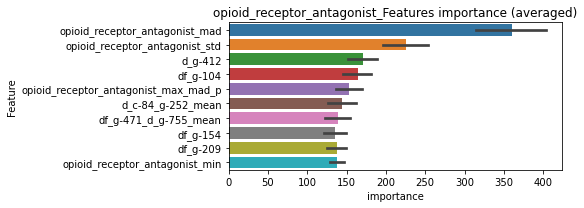

len(train_index) : 2758
len(valid_index) : 920
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127713	valid_1's binary_logloss: 0.0687923
[600]	training's binary_logloss: 0.00175167	valid_1's binary_logloss: 0.0487748
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000957491	valid_1's binary_logloss: 0.0460546


len(train_index) : 2758
len(valid_index) : 920
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01305	valid_1's binary_logloss: 0.0704836
[600]	training's binary_logloss: 0.00173607	valid_1's binary_logloss: 0.0508515
[900]	training's binary_logloss: 0.000754317	valid_1's binary_logloss: 0.0476304
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000758244	valid_1's binary_logloss: 0.0475312


len(train_index) : 2759
len(valid_index) : 919
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130364	valid_1's binary_logloss: 0.0500524
[600]	training's binary_logloss: 0.00174809	valid_1's binary_logloss: 0.0306666
[900]	training's binary_logloss: 0.000781551	valid_1's binary_logloss: 0.0276951
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000763062	valid_1's binary_logloss: 0.0275487


len(train_index) : 2759
len(valid_index) : 919
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127176	valid_1's binary_logloss: 0.0508764
[600]	training's binary_logloss: 0.001729	valid_1's binary_logloss: 0.0335704
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000998264	valid_1's binary_logloss: 0.0318083


opioid_receptor_antagonist logloss: 0.03824038671565505


neg labels: 3289 → selected neg labels: 3286


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00877365	valid_1's binary_logloss: 0.0338657
[600]	training's binary_logloss: 0.00107195	valid_1's binary_logloss: 0.0143614
[900]	training's binary_logloss: 0.000518589	valid_1's binary_logloss: 0.0124839
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000527261	valid_1's binary_logloss: 0.0124417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00876269	valid_1's binary_logloss: 0.0470618
[600]	training's binary_logloss: 0.00106945	valid_1's binary_logloss: 0.0307367
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000582187	valid_1's binary_logloss: 0.0287027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00920661	valid_1's binary_logloss: 0.0220393
[600]	training's binary_logloss: 0.00110191	valid_1's binary_logloss: 0.00690847
[900]	training's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0069841, Threshold: 0.0401131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.02808, conf_1:0.05215
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0401131
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_2: 0.0901131
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_3: 0.1401131
threshold: 0.1401131, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00750225	valid_1's binary_logloss: 0.0324365
[600]	training's binary_logloss: 0.0009511	valid_1's binary_logloss: 0.0166072
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000501049	valid_1's binary_logloss: 0.0147712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00767551	valid_1's binary_logloss: 0.0410112
[600]	training's binary_logloss: 0.000966479	valid_1's binary_logloss: 0.0261627
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000675982	valid_1's binary_logloss: 0.0249075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790543	valid_1's binary_logloss: 0.018361
[600]	training's binary_logloss: 0.000990589	valid_1's binary_logloss: 0.0052543
[900]	training's binary_logloss: 0.000487504	valid_1's binary_logloss: 0.00346565
Early stopping, best it

2 / 3 AUC score:1.000
y_Threshold: 0.0666314, Threshold: 0.1401131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0193370 Vs.target_rate: 0.00155, Num_p_label: 77.0, conf_0:0.11209, conf_1:0.16814
Num_p_label: 77.0, Expected: 6.2, Adj_threshold_1: 0.1401131
Num_p_label: 60.0, Expected: 6.2, Adj_threshold_2: 0.1901131
Num_p_label: 52.0, Expected: 6.2, Adj_threshold_3: 0.2401131
Num_p_label: 46.0, Expected: 6.2, Adj_threshold_4: 0.2901131
Num_p_label: 38.0, Expected: 6.2, Adj_threshold_5: 0.3401131
Num_p_label: 33.0, Expected: 6.2, Adj_threshold_6: 0.3901131
Num_p_label: 29.0, Expected: 6.2, Adj_threshold_7: 0.4401131
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_8: 0.4901131
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_9: 0.5401131
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_10: 0.5901131
threshold: 0.6401131, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3801, y_label_rate: 0.1715338
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00754908	valid_1's binary_logloss: 0.0263123
[600]	training's binary_logloss: 0.000942972	valid_1's binary_logloss: 0.0110742
[900]	training's binary_logloss: 0.000477877	valid_1's binary_logloss: 0.00913507
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000468965	valid_1's binary_logloss: 0.00906667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00755694	valid_1's binary_logloss: 0.0215686
[600]	training's binary_logloss: 0.000948532	valid_1's binary_logloss: 0.0082298
[900]	training's binary_logloss: 0.000468655	valid_1's binary_logloss: 0.00654681
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000476487	valid_1's binary_logloss: 0.00649399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720663	valid_1's binary_logloss: 0.0324865
[600]	training's 

3 / 3 AUC score:0.999
y_Threshold: 0.0758892, Threshold: 0.6401131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 645.0/3787
p_label_rate: 0.0047715 Vs.target_rate: 0.00155, Num_p_label: 19.0, conf_0:0.50000, conf_1:0.70412
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_1: 0.6401131
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_2: 0.6901131


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00265267	valid_1's binary_logloss: 0.0427162


threshold: 0.6901131, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 645.0/3787, y_label_rate: 0.1703195


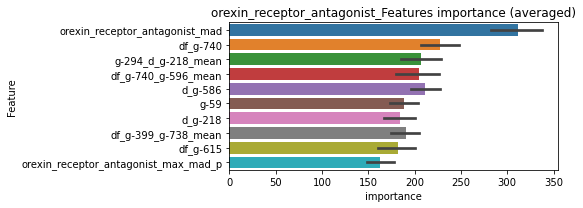

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0067555	valid_1's binary_logloss: 0.0271658
[600]	training's binary_logloss: 0.000883188	valid_1's binary_logloss: 0.0127735
[900]	training's binary_logloss: 0.000462114	valid_1's binary_logloss: 0.010605
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000454676	valid_1's binary_logloss: 0.0105246


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734532	valid_1's binary_logloss: 0.0211875
[600]	training's binary_logloss: 0.000915753	valid_1's binary_logloss: 0.00769356
[900]	training's binary_logloss: 0.000466763	valid_1's binary_logloss: 0.00599621
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000474631	valid_1's binary_logloss: 0.00598058


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00747937	valid_1's binary_logloss: 0.0182704
[600]	training's binary_logloss: 0.000937106	valid_1's binary_logloss: 0.00660248
[900]	training's binary_logloss: 0.000466524	valid_1's binary_logloss: 0.0053686
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000461266	valid_1's binary_logloss: 0.00533134


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.007028	valid_1's binary_logloss: 0.0370212
[600]	training's binary_logloss: 0.000883068	valid_1's binary_logloss: 0.0250645
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00062528	valid_1's binary_logloss: 0.0240924


orexin_receptor_antagonist logloss: 0.011482193839776724


neg labels: 3289 → selected neg labels: 3281


p38_mapk_inhibitor, len(trt): 62, len(othr): 3281, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013916	valid_1's binary_logloss: 0.0597017
[600]	training's binary_logloss: 0.00191652	valid_1's binary_logloss: 0.0364137
[900]	training's binary_logloss: 0.000815428	valid_1's binary_logloss: 0.0323767
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000797464	valid_1's binary_logloss: 0.0323634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141434	valid_1's binary_logloss: 0.0629972
[600]	training's binary_logloss: 0.00194383	valid_1's binary_logloss: 0.0374753
[900]	training's binary_logloss: 0.000822135	valid_1's binary_logloss: 0.0334681
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000752657	valid_1's binary_logloss: 0.0332436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147791	valid_1's binary_logloss: 0.0564204
[600]	training's binary_log

1 / 3 AUC score:0.998
y_Threshold: 0.0131452, Threshold: 0.1052072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00260, Num_p_label: 40.0, conf_0:0.07365, conf_1:0.13677
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.1052072
Num_p_label: 28.0, Expected: 10.4, Adj_threshold_2: 0.1552072
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_3: 0.2052072
Num_p_label: 15.0, Expected: 10.4, Adj_threshold_4: 0.2552072
threshold: 0.2552072, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119934	valid_1's binary_logloss: 0.054398
[600]	training's binary_logloss: 0.00163822	valid_1's binary_logloss: 0.0337189
[900]	training's binary_logloss: 0.000725565	valid_1's binary_logloss: 0.0296313
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000697447	valid_1's binary_logloss: 0.0295655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118343	valid_1's binary_logloss: 0.0457133
[600]	training's binary_logloss: 0.0016422	valid_1's binary_logloss: 0.0234253
[900]	training's binary_logloss: 0.000734823	valid_1's binary_logloss: 0.019848
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000704427	valid_1's binary_logloss: 0.0197616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120277	valid_1's binary_logloss: 0.0618222
[600]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0751198, Threshold: 0.2552072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 641.0/3775
p_label_rate: 0.0123054 Vs.target_rate: 0.00260, Num_p_label: 49.0, conf_0:0.20417, conf_1:0.30625
Num_p_label: 49.0, Expected: 10.4, Adj_threshold_1: 0.2552072
Num_p_label: 44.0, Expected: 10.4, Adj_threshold_2: 0.3052072
Num_p_label: 36.0, Expected: 10.4, Adj_threshold_3: 0.3552072
Num_p_label: 32.0, Expected: 10.4, Adj_threshold_4: 0.4052072
Num_p_label: 25.0, Expected: 10.4, Adj_threshold_5: 0.4552072
Num_p_label: 21.0, Expected: 10.4, Adj_threshold_6: 0.5052072
Num_p_label: 18.0, Expected: 10.4, Adj_threshold_7: 0.5552072
Num_p_label: 15.0, Expected: 10.4, Adj_threshold_8: 0.6052072
threshold: 0.6052072, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 641.0/3775, y_label_rate: 0.1698013
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109921	valid_1's binary_logloss: 0.0440203
[600]	training's binary_logloss: 0.00153741	valid_1's binary_logloss: 0.0220686
[900]	training's binary_logloss: 0.000702424	valid_1's binary_logloss: 0.0188972
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000681458	valid_1's binary_logloss: 0.0187933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110364	valid_1's binary_logloss: 0.050871
[600]	training's binary_logloss: 0.00154836	valid_1's binary_logloss: 0.0306053
[900]	training's binary_logloss: 0.000705377	valid_1's binary_logloss: 0.0268281
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000642954	valid_1's binary_logloss: 0.0261728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111989	valid_1's binary_logloss: 0.0596687
[600]	training's binary_log

3 / 3 AUC score:0.999
y_Threshold: 0.0828181, Threshold: 0.6052072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 632.0/3757
p_label_rate: 0.0060271 Vs.target_rate: 0.00260, Num_p_label: 24.0, conf_0:0.50000, conf_1:0.66573
Num_p_label: 24.0, Expected: 10.4, Adj_threshold_1: 0.6052072
Num_p_label: 23.0, Expected: 10.4, Adj_threshold_2: 0.6552072
Num_p_label: 19.0, Expected: 10.4, Adj_threshold_3: 0.7052072
Num_p_label: 15.0, Expected: 10.4, Adj_threshold_4: 0.7552072
threshold: 0.7552072, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 632.0/3757, y_label_rate: 0.1682193


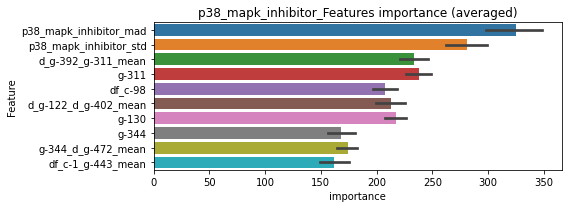

len(train_index) : 2817
len(valid_index) : 940
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109574	valid_1's binary_logloss: 0.05388
[600]	training's binary_logloss: 0.00146668	valid_1's binary_logloss: 0.0330933
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000745217	valid_1's binary_logloss: 0.02991


len(train_index) : 2818
len(valid_index) : 939
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109503	valid_1's binary_logloss: 0.0337587
[600]	training's binary_logloss: 0.00152475	valid_1's binary_logloss: 0.0152002
[900]	training's binary_logloss: 0.000698406	valid_1's binary_logloss: 0.0125295
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.00065276	valid_1's binary_logloss: 0.0123637


len(train_index) : 2818
len(valid_index) : 939
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988165	valid_1's binary_logloss: 0.0589333
[600]	training's binary_logloss: 0.00139901	valid_1's binary_logloss: 0.0433812
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.0011112	valid_1's binary_logloss: 0.0429396


len(train_index) : 2818
len(valid_index) : 939
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01055	valid_1's binary_logloss: 0.0393992
[600]	training's binary_logloss: 0.0014997	valid_1's binary_logloss: 0.0199157
[900]	training's binary_logloss: 0.000688761	valid_1's binary_logloss: 0.0155685
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000593485	valid_1's binary_logloss: 0.0150745


p38_mapk_inhibitor logloss: 0.025078563543465573


neg labels: 3289 → selected neg labels: 3288


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3288, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00561719	valid_1's binary_logloss: 0.0152994
[600]	training's binary_logloss: 0.000701368	valid_1's binary_logloss: 0.00426426
[900]	training's binary_logloss: 0.000373105	valid_1's binary_logloss: 0.00310785
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000368078	valid_1's binary_logloss: 0.00309195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00587047	valid_1's binary_logloss: 0.0129284
[600]	training's binary_logloss: 0.000732074	valid_1's binary_logloss: 0.00329037
[900]	training's binary_logloss: 0.000377932	valid_1's binary_logloss: 0.00244184
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000372451	valid_1's binary_logloss: 0.00242838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580961	valid_1's binary_logloss: 0.0101343
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0031043, Threshold: 0.0136606, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00956, conf_1:0.01776
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0136606
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.0636606
threshold: 0.0636606, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00507301	valid_1's binary_logloss: 0.0117173
[600]	training's binary_logloss: 0.000632011	valid_1's binary_logloss: 0.0026542
[900]	training's binary_logloss: 0.000359997	valid_1's binary_logloss: 0.00180261
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000360229	valid_1's binary_logloss: 0.00180137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498517	valid_1's binary_logloss: 0.0130303
[600]	training's binary_logloss: 0.000627045	valid_1's binary_logloss: 0.0032129
[900]	training's binary_logloss: 0.000352142	valid_1's binary_logloss: 0.00236924
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000352225	valid_1's binary_logloss: 0.00236913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506035	valid_1's binary_logloss: 0.00881544
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.1676298, Threshold: 0.0636606, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0097941 Vs.target_rate: 0.00101, Num_p_label: 39.0, conf_0:0.05093, conf_1:0.07639
Num_p_label: 39.0, Expected: 4.0, Adj_threshold_1: 0.0636606
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_2: 0.1136606
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_3: 0.1636606
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_4: 0.2136606
threshold: 0.2136606, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00507301	valid_1's binary_logloss: 0.0117173
[600]	training's binary_logloss: 0.000632011	valid_1's binary_logloss: 0.0026542
[900]	training's binary_logloss: 0.000359997	valid_1's binary_logloss: 0.00180261
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000360229	valid_1's binary_logloss: 0.00180137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498517	valid_1's binary_logloss: 0.0130303
[600]	training's binary_logloss: 0.000627045	valid_1's binary_logloss: 0.0032129
[900]	training's binary_logloss: 0.000352142	valid_1's binary_logloss: 0.00236924
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000352225	valid_1's binary_logloss: 0.00236913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506035	valid_1's binary_logloss: 0.00881544
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.1676298, Threshold: 0.2136606, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00101, Num_p_label: 9.0, conf_0:0.19229, conf_1:0.23503
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.2136606
threshold: 0.2136606, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


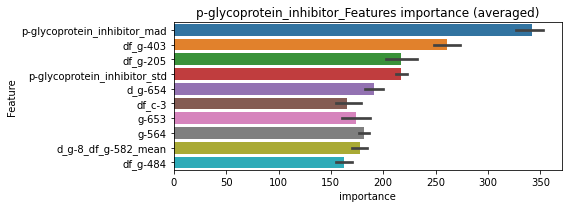

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496201	valid_1's binary_logloss: 0.0105181
[600]	training's binary_logloss: 0.000631874	valid_1's binary_logloss: 0.00235522
[900]	training's binary_logloss: 0.000357861	valid_1's binary_logloss: 0.00158813
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000353478	valid_1's binary_logloss: 0.00157542


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503923	valid_1's binary_logloss: 0.0128574
[600]	training's binary_logloss: 0.000627059	valid_1's binary_logloss: 0.00298265
[900]	training's binary_logloss: 0.000348847	valid_1's binary_logloss: 0.00224267
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000348847	valid_1's binary_logloss: 0.00224267


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511447	valid_1's binary_logloss: 0.00863887
[600]	training's binary_logloss: 0.000652159	valid_1's binary_logloss: 0.0017382
[900]	training's binary_logloss: 0.000357796	valid_1's binary_logloss: 0.00118904
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000357796	valid_1's binary_logloss: 0.00118904


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505681	valid_1's binary_logloss: 0.0155468
[600]	training's binary_logloss: 0.000630641	valid_1's binary_logloss: 0.00482062
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00376484


p-glycoprotein_inhibitor logloss: 0.0021948649321017477


neg labels: 3289 → selected neg labels: 3281


parp_inhibitor, len(trt): 61, len(othr): 3281, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170727	valid_1's binary_logloss: 0.0781153
[600]	training's binary_logloss: 0.00225806	valid_1's binary_logloss: 0.0516713
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00167198	valid_1's binary_logloss: 0.049895
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017124	valid_1's binary_logloss: 0.0665369
[600]	training's binary_logloss: 0.00223142	valid_1's binary_logloss: 0.0373407
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00106893	valid_1's binary_logloss: 0.0337541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181596	valid_1's binary_logloss: 0.0436396
[600]	training's binary_logloss: 0.00240659	valid_1's binary_logloss: 0.0170604
[900]	training's binary_logloss: 0.000942936	valid_1's binary_logloss: 0.0131539
[1200]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0156472, Threshold: 0.0838907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.05872, conf_1:0.10906
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0838907
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_2: 0.1338907
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_3: 0.1838907
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_4: 0.2338907
threshold: 0.2338907, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154516	valid_1's binary_logloss: 0.0536268
[600]	training's binary_logloss: 0.00197636	valid_1's binary_logloss: 0.0284307
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00107992	valid_1's binary_logloss: 0.0256415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147818	valid_1's binary_logloss: 0.0427154
[600]	training's binary_logloss: 0.00196089	valid_1's binary_logloss: 0.0173246
[900]	training's binary_logloss: 0.000818239	valid_1's binary_logloss: 0.0137259
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000781679	valid_1's binary_logloss: 0.0135774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142272	valid_1's binary_logloss: 0.0550669
[600]	training's binary_logloss: 0.00188826	valid_1's binary_logloss: 0.0302659
[900]	training's binary_logl

2 / 3 AUC score:0.999
y_Threshold: 0.0779534, Threshold: 0.2338907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 640.0/3773
p_label_rate: 0.0120542 Vs.target_rate: 0.00256, Num_p_label: 48.0, conf_0:0.18711, conf_1:0.28067
Num_p_label: 48.0, Expected: 10.2, Adj_threshold_1: 0.2338907
Num_p_label: 45.0, Expected: 10.2, Adj_threshold_2: 0.2838907
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_3: 0.3338907
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_4: 0.3838907
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_5: 0.4338907
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_6: 0.4838907
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_7: 0.5338907
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_8: 0.5838907
threshold: 0.5838907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 640.0/3773, y_label_rate: 0.1696263
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135353	valid_1's binary_logloss: 0.0542174
[600]	training's binary_logloss: 0.00177939	valid_1's binary_logloss: 0.0302242
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.00106655	valid_1's binary_logloss: 0.028195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137812	valid_1's binary_logloss: 0.0622628
[600]	training's binary_logloss: 0.00178277	valid_1's binary_logloss: 0.0365619
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.00102497	valid_1's binary_logloss: 0.0332871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141086	valid_1's binary_logloss: 0.0517388
[600]	training's binary_logloss: 0.00184627	valid_1's binary_logloss: 0.0303559
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.0010507	valid_1's binary_logloss: 0.02783

3 / 3 AUC score:1.000
y_Threshold: 0.1065217, Threshold: 0.5838907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 630.0/3753
p_label_rate: 0.0055249 Vs.target_rate: 0.00256, Num_p_label: 22.0, conf_0:0.50000, conf_1:0.64228
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_1: 0.5838907
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_2: 0.6338907
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_3: 0.6838907
threshold: 0.6838907, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 630.0/3753, y_label_rate: 0.1678657


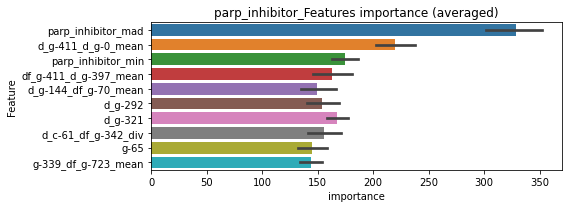

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127586	valid_1's binary_logloss: 0.0484968
[600]	training's binary_logloss: 0.00166342	valid_1's binary_logloss: 0.0257606
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000842483	valid_1's binary_logloss: 0.0226041


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141226	valid_1's binary_logloss: 0.0542557
[600]	training's binary_logloss: 0.00175381	valid_1's binary_logloss: 0.0296759
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00100152	valid_1's binary_logloss: 0.0262174


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128785	valid_1's binary_logloss: 0.0491914
[600]	training's binary_logloss: 0.0016998	valid_1's binary_logloss: 0.0256042
[900]	training's binary_logloss: 0.000732448	valid_1's binary_logloss: 0.0213351
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000678159	valid_1's binary_logloss: 0.0210432


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139435	valid_1's binary_logloss: 0.0368732
[600]	training's binary_logloss: 0.00181207	valid_1's binary_logloss: 0.0129331
[900]	training's binary_logloss: 0.000763605	valid_1's binary_logloss: 0.00935768
Early stopping, best iteration is:
[1099]	training's binary_logloss: 0.000621535	valid_1's binary_logloss: 0.008835


parp_inhibitor logloss: 0.019679741590857874


neg labels: 3289 → selected neg labels: 3245


pdgfr_inhibitor, len(trt): 297, len(othr): 3245, target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0668199	valid_1's binary_logloss: 0.297965
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.037647	valid_1's binary_logloss: 0.29413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0742117	valid_1's binary_logloss: 0.294744
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.0312998	valid_1's binary_logloss: 0.283439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0719716	valid_1's binary_logloss: 0.270351
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.0300337	valid_1's binary_logloss: 0.261177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0711443	valid_1's binary_logloss: 0.291653


1 / 3 AUC score:0.867
y_Threshold: 0.1000513, Threshold: 0.5905258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 512 → Positive_corect_labels: 458/3382
p_label_rate: 0.0100452 Vs.target_rate: 0.01247, Num_p_label: 40.0, conf_0:0.41337, conf_1:0.76768


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.0518356	valid_1's binary_logloss: 0.286134


threshold: 0.5905258, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 458.0/3382, y_label_rate: 0.1354228
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249719	valid_1's binary_logloss: 0.174112
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.011116	valid_1's binary_logloss: 0.167916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0270043	valid_1's binary_logloss: 0.132035
[600]	training's binary_logloss: 0.00430448	valid_1's binary_logloss: 0.109923
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00394154	valid_1's binary_logloss: 0.109112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260648	valid_1's binary_logloss: 0.14183
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00634151	valid_1's binary_logloss: 0.131476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246449	valid_1's binary_logloss: 0.137371
Early stopping, best itera

2 / 3 AUC score:0.971
y_Threshold: 0.0887000, Threshold: 0.5905258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 391.0/3248
p_label_rate: 0.0344048 Vs.target_rate: 0.01247, Num_p_label: 137.0, conf_0:0.47242, conf_1:0.70863
Num_p_label: 137.0, Expected: 49.7, Adj_threshold_1: 0.5905258
Num_p_label: 125.0, Expected: 49.7, Adj_threshold_2: 0.6405258
Num_p_label: 112.0, Expected: 49.7, Adj_threshold_3: 0.6905258
Num_p_label: 95.0, Expected: 49.7, Adj_threshold_4: 0.7405258
Num_p_label: 81.0, Expected: 49.7, Adj_threshold_5: 0.7905258
threshold: 0.7905258, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 391.0/3248, y_label_rate: 0.1203818
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014394	valid_1's binary_logloss: 0.108635
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00474339	valid_1's binary_logloss: 0.102977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155345	valid_1's binary_logloss: 0.10798
[600]	training's binary_logloss: 0.00242663	valid_1's binary_logloss: 0.0947086
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00193236	valid_1's binary_logloss: 0.093799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151313	valid_1's binary_logloss: 0.100731
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00651339	valid_1's binary_logloss: 0.0948734
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142163	valid_1's binary_logloss: 0.1318


3 / 3 AUC score:0.971
y_Threshold: 0.0714179, Threshold: 0.7905258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 346.0/3158
p_label_rate: 0.0429432 Vs.target_rate: 0.01247, Num_p_label: 171.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 171.0, Expected: 49.7, Adj_threshold_1: 0.7905258
threshold: 0.7905258, positive_p_label: 171.0/3982, p_label_rate: 0.0429432


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.00740173	valid_1's binary_logloss: 0.126723


positive_y_label: 346.0/3158, y_label_rate: 0.1095630


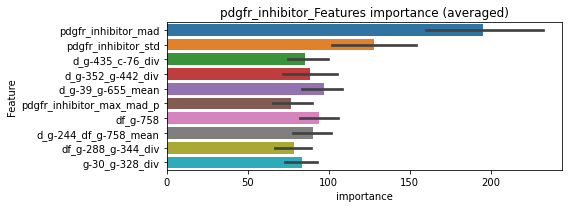

len(train_index) : 2368
len(valid_index) : 790
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987488	valid_1's binary_logloss: 0.0688293
[600]	training's binary_logloss: 0.00160716	valid_1's binary_logloss: 0.0534461
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000959616	valid_1's binary_logloss: 0.051895


len(train_index) : 2368
len(valid_index) : 790
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00933082	valid_1's binary_logloss: 0.0990402


len(train_index) : 2369
len(valid_index) : 789


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00263765	valid_1's binary_logloss: 0.0943033


================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00956414	valid_1's binary_logloss: 0.100834


len(train_index) : 2369
len(valid_index) : 789
================================= fold 4/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00354917	valid_1's binary_logloss: 0.0971863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100033	valid_1's binary_logloss: 0.0787543


pdgfr_inhibitor logloss: 0.07814936760328667


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00246701	valid_1's binary_logloss: 0.0692256
neg labels: 3289 → selected neg labels: 3284


pdk_inhibitor, len(trt): 18, len(othr): 3284, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414499	valid_1's binary_logloss: 0.016988
[600]	training's binary_logloss: 0.000529601	valid_1's binary_logloss: 0.0076708
[900]	training's binary_logloss: 0.000330454	valid_1's binary_logloss: 0.00685297
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000331109	valid_1's binary_logloss: 0.00685017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412391	valid_1's binary_logloss: 0.00970182
[600]	training's binary_logloss: 0.000531022	valid_1's binary_logloss: 0.00343931
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00036937	valid_1's binary_logloss: 0.00296757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00417185	valid_1's binary_logloss: 0.00939516
[600]	training's binary_logloss: 0.000535689	valid_1's binary_logloss: 0.00247684
Early stopping, 

1 / 3 AUC score:1.000
y_Threshold: 0.0027119, Threshold: 0.0180353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01262, conf_1:0.02345
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0180353
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0680353
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_3: 0.1180353
threshold: 0.1180353, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00358893	valid_1's binary_logloss: 0.0136788
[600]	training's binary_logloss: 0.000463788	valid_1's binary_logloss: 0.00700229
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000409292	valid_1's binary_logloss: 0.00667255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366982	valid_1's binary_logloss: 0.00895637
[600]	training's binary_logloss: 0.000470645	valid_1's binary_logloss: 0.00270884
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000317604	valid_1's binary_logloss: 0.0022417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00379901	valid_1's binary_logloss: 0.00632356
[600]	training's binary_logloss: 0.000495045	valid_1's binary_logloss: 0.00111544
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00033339	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0487784, Threshold: 0.1180353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0085384 Vs.target_rate: 0.00076, Num_p_label: 34.0, conf_0:0.09443, conf_1:0.14164
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_1: 0.1180353
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.1680353
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_3: 0.2180353
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_4: 0.2680353
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_5: 0.3180353
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_6: 0.3680353
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_7: 0.4180353
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_8: 0.4680353
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.5180353
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.5680353
threshold: 0.5680353, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
=============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035512	valid_1's binary_logloss: 0.0103332
[600]	training's binary_logloss: 0.000461002	valid_1's binary_logloss: 0.00324069
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000313431	valid_1's binary_logloss: 0.00271601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367749	valid_1's binary_logloss: 0.0078216
[600]	training's binary_logloss: 0.000468179	valid_1's binary_logloss: 0.00190797
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000320936	valid_1's binary_logloss: 0.00156582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361089	valid_1's binary_logloss: 0.0157552
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000535866	valid_1's binary_logloss: 0.01202
Training until validation scores don't improve for 30 rounds
[300]

3 / 3 AUC score:1.000
y_Threshold: 0.0490409, Threshold: 0.5680353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0022602 Vs.target_rate: 0.00076, Num_p_label: 9.0, conf_0:0.50000, conf_1:0.62484
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.5680353
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.6180353
threshold: 0.6180353, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


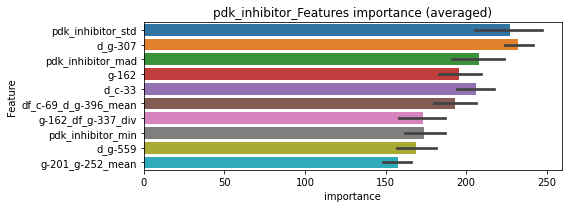

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360477	valid_1's binary_logloss: 0.00908426
[600]	training's binary_logloss: 0.000463613	valid_1's binary_logloss: 0.00263434
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000312949	valid_1's binary_logloss: 0.00208219


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352226	valid_1's binary_logloss: 0.0144699
[600]	training's binary_logloss: 0.00045477	valid_1's binary_logloss: 0.00851926
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000393201	valid_1's binary_logloss: 0.0082715


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00379033	valid_1's binary_logloss: 0.00930953
[600]	training's binary_logloss: 0.000464335	valid_1's binary_logloss: 0.002397
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000291605	valid_1's binary_logloss: 0.00180659


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362104	valid_1's binary_logloss: 0.00609252
[600]	training's binary_logloss: 0.000461884	valid_1's binary_logloss: 0.00108964
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.00031233	valid_1's binary_logloss: 0.000820832


pdk_inhibitor logloss: 0.003246293802510455


neg labels: 3289 → selected neg labels: 3248


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3248, target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0620619	valid_1's binary_logloss: 0.317062
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.0588805	valid_1's binary_logloss: 0.316185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0638123	valid_1's binary_logloss: 0.274728
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.027956	valid_1's binary_logloss: 0.264222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0650368	valid_1's binary_logloss: 0.271442
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.0505454	valid_1's binary_logloss: 0.268175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0673294	valid_1's binary_logloss: 0.243805
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.0270009	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.873
y_Threshold: 0.1006209, Threshold: 0.3666768, pos_neg_ratio: 0.8000000
Remove_noisy_data: 493 → Positive_corect_labels: 468/3404
p_label_rate: 0.0100452 Vs.target_rate: 0.01109, Num_p_label: 40.0, conf_0:0.25667, conf_1:0.47668
threshold: 0.3666768, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 468.0/3404, y_label_rate: 0.1374853
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220103	valid_1's binary_logloss: 0.129901
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00531502	valid_1's binary_logloss: 0.118064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232577	valid_1's binary_logloss: 0.137367
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00788847	valid_1's binary_logloss: 0.128225
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234949	valid_1's binary_logloss: 0.117685
[600]	training's binary_logloss: 0.00364208	valid_1's binary_logloss: 0.0993884
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00336897	valid_1's binary_logloss: 0.0986212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212681	valid_1's binary_logloss: 0.157231
Early stopping, best 

2 / 3 AUC score:0.979
y_Threshold: 0.0914331, Threshold: 0.3666768, pos_neg_ratio: 0.8000000
Remove_noisy_data: 126 → Positive_corect_labels: 405.0/3278
p_label_rate: 0.0334003 Vs.target_rate: 0.01109, Num_p_label: 133.0, conf_0:0.29334, conf_1:0.44001
Num_p_label: 133.0, Expected: 44.1, Adj_threshold_1: 0.3666768
Num_p_label: 116.0, Expected: 44.1, Adj_threshold_2: 0.4166768
Num_p_label: 106.0, Expected: 44.1, Adj_threshold_3: 0.4666768
Num_p_label: 98.0, Expected: 44.1, Adj_threshold_4: 0.5166768
Num_p_label: 83.0, Expected: 44.1, Adj_threshold_5: 0.5666768
Num_p_label: 78.0, Expected: 44.1, Adj_threshold_6: 0.6166768
Num_p_label: 63.0, Expected: 44.1, Adj_threshold_7: 0.6666768
threshold: 0.6666768, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 405.0/3278, y_label_rate: 0.1235509
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131713	valid_1's binary_logloss: 0.103006
[600]	training's binary_logloss: 0.0019612	valid_1's binary_logloss: 0.089295
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00198038	valid_1's binary_logloss: 0.0891224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134814	valid_1's binary_logloss: 0.0960343
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00401204	valid_1's binary_logloss: 0.0896286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143716	valid_1's binary_logloss: 0.0795398
[600]	training's binary_logloss: 0.00213503	valid_1's binary_logloss: 0.0577016
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00135805	valid_1's binary_logloss: 0.0562562
Training until validation scores don't improve for 30 rounds
[300]	training's 

3 / 3 AUC score:0.992
y_Threshold: 0.0720728, Threshold: 0.6666768, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 377.0/3222
p_label_rate: 0.0301356 Vs.target_rate: 0.01109, Num_p_label: 120.0, conf_0:0.50000, conf_1:0.73334
Num_p_label: 120.0, Expected: 44.1, Adj_threshold_1: 0.6666768
Num_p_label: 111.0, Expected: 44.1, Adj_threshold_2: 0.7166768
Num_p_label: 103.0, Expected: 44.1, Adj_threshold_3: 0.7666768
threshold: 0.7666768, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 377.0/3222, y_label_rate: 0.1170081


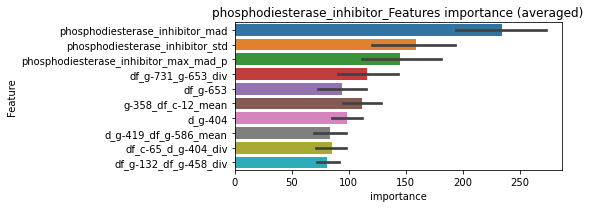

len(train_index) : 2416
len(valid_index) : 806
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0097973	valid_1's binary_logloss: 0.0979734


len(train_index) : 2416
len(valid_index) : 806
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00761883	valid_1's binary_logloss: 0.0955854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107291	valid_1's binary_logloss: 0.0614454
[600]	training's binary_logloss: 0.00157908	valid_1's binary_logloss: 0.0473039
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000960311	valid_1's binary_logloss: 0.0453195


len(train_index) : 2417
len(valid_index) : 805
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104206	valid_1's binary_logloss: 0.0677972
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00188551	valid_1's binary_logloss: 0.0550175


len(train_index) : 2417
len(valid_index) : 805
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100861	valid_1's binary_logloss: 0.0761043


phosphodiesterase_inhibitor logloss: 0.0669170559548122


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00370142	valid_1's binary_logloss: 0.0717369
neg labels: 3289 → selected neg labels: 3286


phospholipase_inhibitor, len(trt): 25, len(othr): 3286, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723172	valid_1's binary_logloss: 0.0165489
[600]	training's binary_logloss: 0.000887664	valid_1's binary_logloss: 0.00445958
[900]	training's binary_logloss: 0.000440294	valid_1's binary_logloss: 0.00307155
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000426557	valid_1's binary_logloss: 0.00304023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660859	valid_1's binary_logloss: 0.0262078
[600]	training's binary_logloss: 0.00082847	valid_1's binary_logloss: 0.0139205
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000476278	valid_1's binary_logloss: 0.0125832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00697707	valid_1's binary_logloss: 0.0144133
[600]	training's binary_logloss: 0.000849853	valid_1's binary_logloss: 0.00374206
[900]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0036893, Threshold: 0.0207764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.01454, conf_1:0.02701
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0207764
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0707764
threshold: 0.0707764, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642208	valid_1's binary_logloss: 0.0130235
[600]	training's binary_logloss: 0.000794901	valid_1's binary_logloss: 0.00284557
[900]	training's binary_logloss: 0.000413077	valid_1's binary_logloss: 0.0019143
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000398519	valid_1's binary_logloss: 0.0018981
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614743	valid_1's binary_logloss: 0.0250951
[600]	training's binary_logloss: 0.000770956	valid_1's binary_logloss: 0.0140066
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000444156	valid_1's binary_logloss: 0.0131219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00621394	valid_1's binary_logloss: 0.0130055
[600]	training's binary_logloss: 0.000779441	valid_1's binary_logloss: 0.00325868
[900]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0200696, Threshold: 0.0707764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0092918 Vs.target_rate: 0.00105, Num_p_label: 37.0, conf_0:0.05662, conf_1:0.08493
Num_p_label: 37.0, Expected: 4.2, Adj_threshold_1: 0.0707764
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_2: 0.1207764
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_3: 0.1707764
threshold: 0.1707764, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00611383	valid_1's binary_logloss: 0.0233307
[600]	training's binary_logloss: 0.00077026	valid_1's binary_logloss: 0.010061
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000673272	valid_1's binary_logloss: 0.00947007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00605822	valid_1's binary_logloss: 0.015302
[600]	training's binary_logloss: 0.00076351	valid_1's binary_logloss: 0.00571002
[900]	training's binary_logloss: 0.00040233	valid_1's binary_logloss: 0.00477212
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00040233	valid_1's binary_logloss: 0.00477212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616676	valid_1's binary_logloss: 0.0107708
[600]	training's binary_logloss: 0.000775071	valid_1's binary_logloss: 0.0021803
[900]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0406472, Threshold: 0.1707764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.15370, conf_1:0.18785
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.1707764
threshold: 0.1707764, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


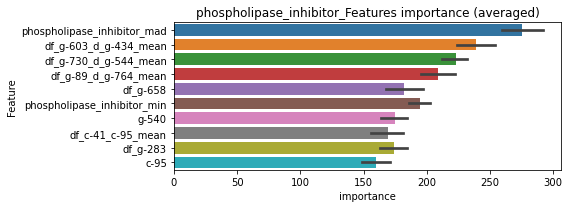

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00615155	valid_1's binary_logloss: 0.0246992
[600]	training's binary_logloss: 0.000770845	valid_1's binary_logloss: 0.0102202
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000496277	valid_1's binary_logloss: 0.00861778


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00602477	valid_1's binary_logloss: 0.0152406
[600]	training's binary_logloss: 0.000763355	valid_1's binary_logloss: 0.00579457
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000421101	valid_1's binary_logloss: 0.00480601


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639835	valid_1's binary_logloss: 0.0106581
[600]	training's binary_logloss: 0.000795188	valid_1's binary_logloss: 0.00212917
[900]	training's binary_logloss: 0.000414965	valid_1's binary_logloss: 0.00136708
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000398434	valid_1's binary_logloss: 0.00133909


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00611439	valid_1's binary_logloss: 0.0146872
[600]	training's binary_logloss: 0.000770519	valid_1's binary_logloss: 0.00602543
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000494471	valid_1's binary_logloss: 0.00542735


phospholipase_inhibitor logloss: 0.005048552893238234


neg labels: 3289 → selected neg labels: 3262


pi3k_inhibitor, len(trt): 151, len(othr): 3262, target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0386113	valid_1's binary_logloss: 0.192508
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.0087426	valid_1's binary_logloss: 0.173314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0384607	valid_1's binary_logloss: 0.163801
[600]	training's binary_logloss: 0.0067268	valid_1's binary_logloss: 0.136651
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00611991	valid_1's binary_logloss: 0.135962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.041712	valid_1's binary_logloss: 0.182762
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.0108875	valid_1's binary_logloss: 0.164468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0396018	valid_1's binary_logloss: 0.180972
Early stopping, best iterat

1 / 3 AUC score:0.956
y_Threshold: 0.0604705, Threshold: 0.2501218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 271 → Positive_corect_labels: 582/3643
p_label_rate: 0.0100452 Vs.target_rate: 0.00634, Num_p_label: 40.0, conf_0:0.17509, conf_1:0.32516
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.2501218
Num_p_label: 27.0, Expected: 25.2, Adj_threshold_2: 0.3001218
threshold: 0.3001218, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 582.0/3643, y_label_rate: 0.1597584
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233878	valid_1's binary_logloss: 0.123253
[600]	training's binary_logloss: 0.00349088	valid_1's binary_logloss: 0.0996083
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.0032702	valid_1's binary_logloss: 0.0993324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233726	valid_1's binary_logloss: 0.140983
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00524644	valid_1's binary_logloss: 0.120927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238271	valid_1's binary_logloss: 0.114479
[600]	training's binary_logloss: 0.00357505	valid_1's binary_logloss: 0.0964491
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00284761	valid_1's binary_logloss: 0.0960197
Training until validation scores don't improve for 30 rounds
[300]	training's bi

2 / 3 AUC score:0.987
y_Threshold: 0.0852256, Threshold: 0.3001218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 533.0/3545
p_label_rate: 0.0296334 Vs.target_rate: 0.00634, Num_p_label: 118.0, conf_0:0.24010, conf_1:0.36015
Num_p_label: 118.0, Expected: 25.2, Adj_threshold_1: 0.3001218
Num_p_label: 106.0, Expected: 25.2, Adj_threshold_2: 0.3501218
Num_p_label: 95.0, Expected: 25.2, Adj_threshold_3: 0.4001218
Num_p_label: 88.0, Expected: 25.2, Adj_threshold_4: 0.4501218
Num_p_label: 83.0, Expected: 25.2, Adj_threshold_5: 0.5001218
Num_p_label: 70.0, Expected: 25.2, Adj_threshold_6: 0.5501218
Num_p_label: 66.0, Expected: 25.2, Adj_threshold_7: 0.6001218
Num_p_label: 53.0, Expected: 25.2, Adj_threshold_8: 0.6501218
Num_p_label: 45.0, Expected: 25.2, Adj_threshold_9: 0.7001218
Num_p_label: 29.0, Expected: 25.2, Adj_threshold_10: 0.7501218
threshold: 0.7501218, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 533.0/3545, y_label_rate: 0.1503

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169647	valid_1's binary_logloss: 0.105433
[600]	training's binary_logloss: 0.00237602	valid_1's binary_logloss: 0.0898378
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00223031	valid_1's binary_logloss: 0.0891537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166295	valid_1's binary_logloss: 0.0928169
[600]	training's binary_logloss: 0.00242123	valid_1's binary_logloss: 0.0742393
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00227835	valid_1's binary_logloss: 0.0736553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174774	valid_1's binary_logloss: 0.070302
[600]	training's binary_logloss: 0.00255814	valid_1's binary_logloss: 0.0410215
[900]	training's binary_logloss: 0.00102972	valid_1's binary_logloss: 0.0356111
Early stopping, best iteration i

3 / 3 AUC score:0.995
y_Threshold: 0.0818491, Threshold: 0.7501218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 506.0/3491
p_label_rate: 0.0226017 Vs.target_rate: 0.00634, Num_p_label: 90.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 90.0, Expected: 25.2, Adj_threshold_1: 0.7501218
threshold: 0.7501218, positive_p_label: 90.0/3982, p_label_rate: 0.0226017
positive_y_label: 506.0/3491, y_label_rate: 0.1449441


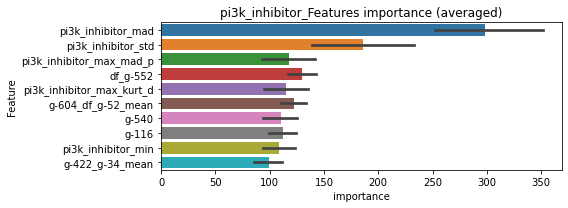

len(train_index) : 2618
len(valid_index) : 873
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132702	valid_1's binary_logloss: 0.079585
[600]	training's binary_logloss: 0.00191876	valid_1's binary_logloss: 0.0541601
[900]	training's binary_logloss: 0.000846482	valid_1's binary_logloss: 0.0493896
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000840278	valid_1's binary_logloss: 0.0493533


len(train_index) : 2618
len(valid_index) : 873
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142563	valid_1's binary_logloss: 0.0721958
[600]	training's binary_logloss: 0.00198686	valid_1's binary_logloss: 0.0543526
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00200373	valid_1's binary_logloss: 0.0542752


len(train_index) : 2618
len(valid_index) : 873
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139538	valid_1's binary_logloss: 0.0783596
[600]	training's binary_logloss: 0.00199623	valid_1's binary_logloss: 0.0650127
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.0018779	valid_1's binary_logloss: 0.0648632


len(train_index) : 2619
len(valid_index) : 872
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147619	valid_1's binary_logloss: 0.0599348
[600]	training's binary_logloss: 0.00207966	valid_1's binary_logloss: 0.0386078
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.00113133	valid_1's binary_logloss: 0.0353557


pi3k_inhibitor logloss: 0.05096632610891735


neg labels: 3289 → selected neg labels: 3286


pkc_inhibitor, len(trt): 31, len(othr): 3286, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0066338	valid_1's binary_logloss: 0.0238877
[600]	training's binary_logloss: 0.000885697	valid_1's binary_logloss: 0.0119295
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000478024	valid_1's binary_logloss: 0.0101408
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00659354	valid_1's binary_logloss: 0.0246483
[600]	training's binary_logloss: 0.000882039	valid_1's binary_logloss: 0.0127777
[900]	training's binary_logloss: 0.000447609	valid_1's binary_logloss: 0.0110899
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000442011	valid_1's binary_logloss: 0.0110824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0069413	valid_1's binary_logloss: 0.0171459
[600]	training's binary_logloss: 0.000915321	valid_1's binary_logloss: 0.00513509
[900]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0049041, Threshold: 0.0264743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.01853, conf_1:0.03442
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0264743
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_2: 0.0764743
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_3: 0.1264743
threshold: 0.1264743, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00595582	valid_1's binary_logloss: 0.0189078
[600]	training's binary_logloss: 0.000803657	valid_1's binary_logloss: 0.00926771
[900]	training's binary_logloss: 0.000424071	valid_1's binary_logloss: 0.00764415
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000425229	valid_1's binary_logloss: 0.00763743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593665	valid_1's binary_logloss: 0.021117
[600]	training's binary_logloss: 0.000811251	valid_1's binary_logloss: 0.0106783
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000516741	valid_1's binary_logloss: 0.00990832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061487	valid_1's binary_logloss: 0.0160444
[600]	training's binary_logloss: 0.000820913	valid_1's binary_logloss: 0.005167
[900]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0484747, Threshold: 0.1264743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0052737 Vs.target_rate: 0.00130, Num_p_label: 21.0, conf_0:0.10118, conf_1:0.15177
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_1: 0.1264743
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_2: 0.1764743
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_3: 0.2264743
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_4: 0.2764743
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_5: 0.3264743
threshold: 0.3264743, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604995	valid_1's binary_logloss: 0.0170838
[600]	training's binary_logloss: 0.000814634	valid_1's binary_logloss: 0.00663389
[900]	training's binary_logloss: 0.000426462	valid_1's binary_logloss: 0.00499409
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000423699	valid_1's binary_logloss: 0.00497634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00590328	valid_1's binary_logloss: 0.0164591
[600]	training's binary_logloss: 0.000813527	valid_1's binary_logloss: 0.00496908
[900]	training's binary_logloss: 0.000429377	valid_1's binary_logloss: 0.0037971
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000422661	valid_1's binary_logloss: 0.0037719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607174	valid_1's binary_logloss: 0.0139321
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0370733, Threshold: 0.3264743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00130, Num_p_label: 12.0, conf_0:0.29383, conf_1:0.35912
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.3264743
threshold: 0.3264743, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


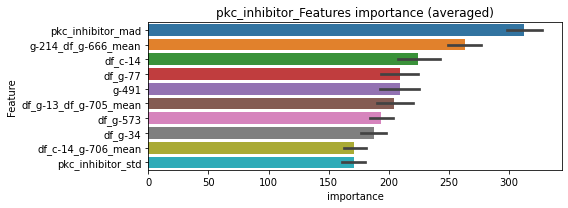

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600994	valid_1's binary_logloss: 0.0113207
[600]	training's binary_logloss: 0.000810825	valid_1's binary_logloss: 0.0023786
[900]	training's binary_logloss: 0.000432588	valid_1's binary_logloss: 0.00152906
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000425018	valid_1's binary_logloss: 0.00150574


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588595	valid_1's binary_logloss: 0.0168969
[600]	training's binary_logloss: 0.000788814	valid_1's binary_logloss: 0.00601654
[900]	training's binary_logloss: 0.000418138	valid_1's binary_logloss: 0.00462787
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.00041721	valid_1's binary_logloss: 0.00461704


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592355	valid_1's binary_logloss: 0.0181946
[600]	training's binary_logloss: 0.000801516	valid_1's binary_logloss: 0.00624734
[900]	training's binary_logloss: 0.000430868	valid_1's binary_logloss: 0.00503426
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000428282	valid_1's binary_logloss: 0.00501009


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00602209	valid_1's binary_logloss: 0.0201859
[600]	training's binary_logloss: 0.000806331	valid_1's binary_logloss: 0.00855401
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000492533	valid_1's binary_logloss: 0.00771879


pkc_inhibitor logloss: 0.0047155041013966885


neg labels: 3289 → selected neg labels: 3281


potassium_channel_activator, len(trt): 55, len(othr): 3281, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151705	valid_1's binary_logloss: 0.0616202
[600]	training's binary_logloss: 0.00195784	valid_1's binary_logloss: 0.0331235
[900]	training's binary_logloss: 0.000798239	valid_1's binary_logloss: 0.0294603
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000771318	valid_1's binary_logloss: 0.0292474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016109	valid_1's binary_logloss: 0.0512315
[600]	training's binary_logloss: 0.00204137	valid_1's binary_logloss: 0.0288488
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000981517	valid_1's binary_logloss: 0.0268502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164912	valid_1's binary_logloss: 0.0451283
[600]	training's binary_logloss: 0.00210346	valid_1's binary_logloss: 0.0180917
[900]	training's binary_logl

1 / 3 AUC score:0.996
y_Threshold: 0.0121188, Threshold: 0.0948974, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00231, Num_p_label: 40.0, conf_0:0.06643, conf_1:0.12337
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0948974
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_2: 0.1448974
threshold: 0.1448974, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134483	valid_1's binary_logloss: 0.0476925
[600]	training's binary_logloss: 0.00173168	valid_1's binary_logloss: 0.0292058
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000834408	valid_1's binary_logloss: 0.027083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134154	valid_1's binary_logloss: 0.0460087
[600]	training's binary_logloss: 0.00174116	valid_1's binary_logloss: 0.0238853
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000854633	valid_1's binary_logloss: 0.0215924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013917	valid_1's binary_logloss: 0.046147
[600]	training's binary_logloss: 0.00179721	valid_1's binary_logloss: 0.0268633
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.00083568	valid_1's binary_logloss: 0.0242

2 / 3 AUC score:0.999
y_Threshold: 0.0634511, Threshold: 0.1448974, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 640.0/3773
p_label_rate: 0.0180814 Vs.target_rate: 0.00231, Num_p_label: 72.0, conf_0:0.11592, conf_1:0.17388
Num_p_label: 72.0, Expected: 9.2, Adj_threshold_1: 0.1448974
Num_p_label: 54.0, Expected: 9.2, Adj_threshold_2: 0.1948974
Num_p_label: 43.0, Expected: 9.2, Adj_threshold_3: 0.2448974
Num_p_label: 37.0, Expected: 9.2, Adj_threshold_4: 0.2948974
Num_p_label: 34.0, Expected: 9.2, Adj_threshold_5: 0.3448974
Num_p_label: 25.0, Expected: 9.2, Adj_threshold_6: 0.3948974
Num_p_label: 19.0, Expected: 9.2, Adj_threshold_7: 0.4448974
threshold: 0.4448974, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 640.0/3773, y_label_rate: 0.1696263
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012616	valid_1's binary_logloss: 0.042847
[600]	training's binary_logloss: 0.00161733	valid_1's binary_logloss: 0.0208714
[900]	training's binary_logloss: 0.000690929	valid_1's binary_logloss: 0.0173188
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000673328	valid_1's binary_logloss: 0.0172273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123343	valid_1's binary_logloss: 0.0368197
[600]	training's binary_logloss: 0.0016158	valid_1's binary_logloss: 0.015443
[900]	training's binary_logloss: 0.00069166	valid_1's binary_logloss: 0.0121581
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000614982	valid_1's binary_logloss: 0.0118632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114126	valid_1's binary_logloss: 0.0487956
[600]	training's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0540880, Threshold: 0.4448974, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 631.0/3755
p_label_rate: 0.0060271 Vs.target_rate: 0.00231, Num_p_label: 24.0, conf_0:0.40041, conf_1:0.48939
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_1: 0.4448974
Num_p_label: 18.0, Expected: 9.2, Adj_threshold_2: 0.4948974
threshold: 0.4948974, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 631.0/3755, y_label_rate: 0.1680426


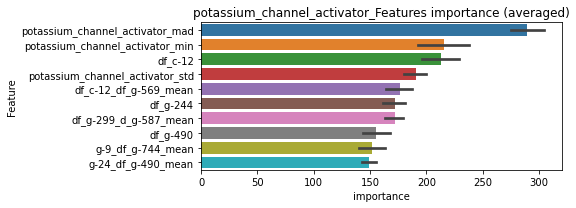

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010962	valid_1's binary_logloss: 0.0526075
[600]	training's binary_logloss: 0.00145809	valid_1's binary_logloss: 0.036907
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000809339	valid_1's binary_logloss: 0.0354934


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116218	valid_1's binary_logloss: 0.0340068
[600]	training's binary_logloss: 0.00151319	valid_1's binary_logloss: 0.0134528
[900]	training's binary_logloss: 0.00066532	valid_1's binary_logloss: 0.0101625
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.00062218	valid_1's binary_logloss: 0.00999716


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115396	valid_1's binary_logloss: 0.0374208
[600]	training's binary_logloss: 0.00150717	valid_1's binary_logloss: 0.0176775
[900]	training's binary_logloss: 0.000664197	valid_1's binary_logloss: 0.0148893
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000642989	valid_1's binary_logloss: 0.0147774


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114778	valid_1's binary_logloss: 0.0429238
[600]	training's binary_logloss: 0.0014776	valid_1's binary_logloss: 0.0283167
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.00101674	valid_1's binary_logloss: 0.0271681


potassium_channel_activator logloss: 0.0218575934289707


neg labels: 3289 → selected neg labels: 3278


potassium_channel_antagonist, len(trt): 98, len(othr): 3278, target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02422	valid_1's binary_logloss: 0.120356
[600]	training's binary_logloss: 0.00353899	valid_1's binary_logloss: 0.0950115
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.0024338	valid_1's binary_logloss: 0.0930944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249709	valid_1's binary_logloss: 0.130302
[600]	training's binary_logloss: 0.00357654	valid_1's binary_logloss: 0.111973
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00260757	valid_1's binary_logloss: 0.111127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246132	valid_1's binary_logloss: 0.0938045
[600]	training's binary_logloss: 0.00366638	valid_1's binary_logloss: 0.0632419
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.00144283	valid_1's binary_logloss: 0.0594538
Tr

1 / 3 AUC score:0.983
y_Threshold: 0.0196414, Threshold: 0.0933264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 192 → Positive_corect_labels: 625/3741
p_label_rate: 0.0100452 Vs.target_rate: 0.00412, Num_p_label: 40.0, conf_0:0.06533, conf_1:0.12132
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_1: 0.0933264
Num_p_label: 19.0, Expected: 16.4, Adj_threshold_2: 0.1433264
threshold: 0.1433264, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 625.0/3741, y_label_rate: 0.1670676
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185195	valid_1's binary_logloss: 0.090087
[600]	training's binary_logloss: 0.00256826	valid_1's binary_logloss: 0.0680292
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.0018062	valid_1's binary_logloss: 0.0666971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190644	valid_1's binary_logloss: 0.0853582
[600]	training's binary_logloss: 0.00265441	valid_1's binary_logloss: 0.0597399
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00246797	valid_1's binary_logloss: 0.0592243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193514	valid_1's binary_logloss: 0.0624332
[600]	training's binary_logloss: 0.00268902	valid_1's binary_logloss: 0.0414384
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.00117885	valid_1's binary_logloss: 0.03876

2 / 3 AUC score:0.995
y_Threshold: 0.0692284, Threshold: 0.1433264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 604.0/3699
p_label_rate: 0.0226017 Vs.target_rate: 0.00412, Num_p_label: 90.0, conf_0:0.11466, conf_1:0.17199
Num_p_label: 90.0, Expected: 16.4, Adj_threshold_1: 0.1433264
Num_p_label: 71.0, Expected: 16.4, Adj_threshold_2: 0.1933264
Num_p_label: 59.0, Expected: 16.4, Adj_threshold_3: 0.2433264
Num_p_label: 47.0, Expected: 16.4, Adj_threshold_4: 0.2933264
Num_p_label: 39.0, Expected: 16.4, Adj_threshold_5: 0.3433264
Num_p_label: 34.0, Expected: 16.4, Adj_threshold_6: 0.3933264
Num_p_label: 28.0, Expected: 16.4, Adj_threshold_7: 0.4433264
Num_p_label: 23.0, Expected: 16.4, Adj_threshold_8: 0.4933264
threshold: 0.4933264, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 604.0/3699, y_label_rate: 0.1632874
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157629	valid_1's binary_logloss: 0.0722209
[600]	training's binary_logloss: 0.0022247	valid_1's binary_logloss: 0.0470253
[900]	training's binary_logloss: 0.000928758	valid_1's binary_logloss: 0.0429358
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000928758	valid_1's binary_logloss: 0.0429358
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170209	valid_1's binary_logloss: 0.0581539
[600]	training's binary_logloss: 0.00235674	valid_1's binary_logloss: 0.0306608
[900]	training's binary_logloss: 0.000964234	valid_1's binary_logloss: 0.0258399
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000965886	valid_1's binary_logloss: 0.0258368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163844	valid_1's binary_logloss: 0.0679932
[600]	training's binary_log

3 / 3 AUC score:0.999
y_Threshold: 0.0770441, Threshold: 0.4933264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 590.0/3671
p_label_rate: 0.0128076 Vs.target_rate: 0.00412, Num_p_label: 51.0, conf_0:0.44399, conf_1:0.54266
Num_p_label: 51.0, Expected: 16.4, Adj_threshold_1: 0.4933264
Num_p_label: 44.0, Expected: 16.4, Adj_threshold_2: 0.5433264
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_3: 0.5933264
Num_p_label: 34.0, Expected: 16.4, Adj_threshold_4: 0.6433264
Num_p_label: 29.0, Expected: 16.4, Adj_threshold_5: 0.6933264
Num_p_label: 21.0, Expected: 16.4, Adj_threshold_6: 0.7433264
threshold: 0.7433264, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 590.0/3671, y_label_rate: 0.1607192


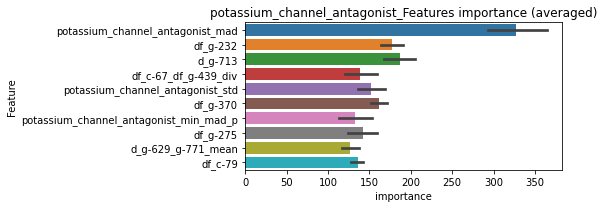

len(train_index) : 2753
len(valid_index) : 918
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146623	valid_1's binary_logloss: 0.0759485
[600]	training's binary_logloss: 0.00205552	valid_1's binary_logloss: 0.0561996
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.00202068	valid_1's binary_logloss: 0.0559968


len(train_index) : 2753
len(valid_index) : 918
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149701	valid_1's binary_logloss: 0.085826
[600]	training's binary_logloss: 0.00206975	valid_1's binary_logloss: 0.0660655
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00182203	valid_1's binary_logloss: 0.0654914


len(train_index) : 2753
len(valid_index) : 918
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156307	valid_1's binary_logloss: 0.0542951
[600]	training's binary_logloss: 0.00215315	valid_1's binary_logloss: 0.0314998
[900]	training's binary_logloss: 0.000906872	valid_1's binary_logloss: 0.027827
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000795689	valid_1's binary_logloss: 0.0271808


len(train_index) : 2754
len(valid_index) : 917
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145535	valid_1's binary_logloss: 0.0840149
[600]	training's binary_logloss: 0.00202908	valid_1's binary_logloss: 0.0683229
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.00117017	valid_1's binary_logloss: 0.0675167


potassium_channel_antagonist logloss: 0.0540427658503037


neg labels: 3289 → selected neg labels: 3278


ppar_receptor_agonist, len(trt): 115, len(othr): 3278, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.026889	valid_1's binary_logloss: 0.146426
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00871449	valid_1's binary_logloss: 0.132109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0276665	valid_1's binary_logloss: 0.117967
[600]	training's binary_logloss: 0.004287	valid_1's binary_logloss: 0.0866423
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.00192172	valid_1's binary_logloss: 0.0834951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0290261	valid_1's binary_logloss: 0.103114
[600]	training's binary_logloss: 0.004614	valid_1's binary_logloss: 0.069411
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00205656	valid_1's binary_logloss: 0.0649292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_

1 / 3 AUC score:0.981
y_Threshold: 0.0362920, Threshold: 0.1581839, pos_neg_ratio: 0.8000000
Remove_noisy_data: 218 → Positive_corect_labels: 612/3715
p_label_rate: 0.0100452 Vs.target_rate: 0.00483, Num_p_label: 40.0, conf_0:0.11073, conf_1:0.20564
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.1581839
Num_p_label: 29.0, Expected: 19.2, Adj_threshold_2: 0.2081839
Num_p_label: 24.0, Expected: 19.2, Adj_threshold_3: 0.2581839
threshold: 0.2581839, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 612.0/3715, y_label_rate: 0.1647376
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187085	valid_1's binary_logloss: 0.0829068
[600]	training's binary_logloss: 0.00266717	valid_1's binary_logloss: 0.0579305
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.00117058	valid_1's binary_logloss: 0.0554066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195012	valid_1's binary_logloss: 0.0942563
[600]	training's binary_logloss: 0.00271378	valid_1's binary_logloss: 0.0674079
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.00118904	valid_1's binary_logloss: 0.0632756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194169	valid_1's binary_logloss: 0.0797382
[600]	training's binary_logloss: 0.00265041	valid_1's binary_logloss: 0.0504385
[900]	training's binary_logloss: 0.00103222	valid_1's binary_logloss: 0.0450386
Early stopping, best iteration

2 / 3 AUC score:0.996
y_Threshold: 0.0795143, Threshold: 0.2581839, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 582.0/3655
p_label_rate: 0.0148167 Vs.target_rate: 0.00483, Num_p_label: 59.0, conf_0:0.20655, conf_1:0.30982
Num_p_label: 59.0, Expected: 19.2, Adj_threshold_1: 0.2581839
Num_p_label: 52.0, Expected: 19.2, Adj_threshold_2: 0.3081839
Num_p_label: 45.0, Expected: 19.2, Adj_threshold_3: 0.3581839
Num_p_label: 41.0, Expected: 19.2, Adj_threshold_4: 0.4081839
Num_p_label: 35.0, Expected: 19.2, Adj_threshold_5: 0.4581839
Num_p_label: 33.0, Expected: 19.2, Adj_threshold_6: 0.5081839
Num_p_label: 31.0, Expected: 19.2, Adj_threshold_7: 0.5581839
Num_p_label: 28.0, Expected: 19.2, Adj_threshold_8: 0.6081839
threshold: 0.6081839, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 582.0/3655, y_label_rate: 0.1592339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015743	valid_1's binary_logloss: 0.067146
[600]	training's binary_logloss: 0.00216677	valid_1's binary_logloss: 0.0375084
[900]	training's binary_logloss: 0.00089757	valid_1's binary_logloss: 0.032836
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000776918	valid_1's binary_logloss: 0.0320391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153241	valid_1's binary_logloss: 0.0718077
[600]	training's binary_logloss: 0.00211966	valid_1's binary_logloss: 0.0569834
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00179316	valid_1's binary_logloss: 0.056616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157772	valid_1's binary_logloss: 0.0646501
[600]	training's binary_logloss: 0.00220349	valid_1's binary_logloss: 0.0391493
[900]	training's binary_logloss:

3 / 3 AUC score:0.999
y_Threshold: 0.0700915, Threshold: 0.6081839, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 564.0/3619
p_label_rate: 0.0133099 Vs.target_rate: 0.00483, Num_p_label: 53.0, conf_0:0.50000, conf_1:0.66900
Num_p_label: 53.0, Expected: 19.2, Adj_threshold_1: 0.6081839
Num_p_label: 51.0, Expected: 19.2, Adj_threshold_2: 0.6581839
Num_p_label: 48.0, Expected: 19.2, Adj_threshold_3: 0.7081839
Num_p_label: 45.0, Expected: 19.2, Adj_threshold_4: 0.7581839
threshold: 0.7581839, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 564.0/3619, y_label_rate: 0.1558442


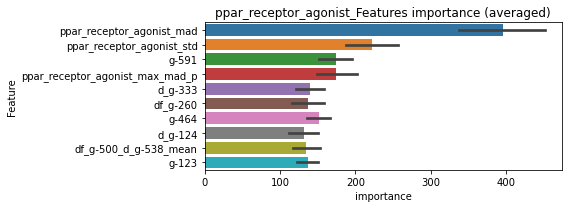

len(train_index) : 2714
len(valid_index) : 905
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127438	valid_1's binary_logloss: 0.080893
[600]	training's binary_logloss: 0.00178313	valid_1's binary_logloss: 0.0605178
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00112492	valid_1's binary_logloss: 0.0597156


len(train_index) : 2714
len(valid_index) : 905
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129188	valid_1's binary_logloss: 0.0505531
[600]	training's binary_logloss: 0.00186838	valid_1's binary_logloss: 0.0295045
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00111108	valid_1's binary_logloss: 0.0273853


len(train_index) : 2714
len(valid_index) : 905
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142018	valid_1's binary_logloss: 0.0535335
[600]	training's binary_logloss: 0.00197222	valid_1's binary_logloss: 0.0346603
[900]	training's binary_logloss: 0.000833673	valid_1's binary_logloss: 0.032313
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000737031	valid_1's binary_logloss: 0.0319727


len(train_index) : 2715
len(valid_index) : 904
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141815	valid_1's binary_logloss: 0.0544054
[600]	training's binary_logloss: 0.00190337	valid_1's binary_logloss: 0.0343973
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.0011417	valid_1's binary_logloss: 0.0329004


ppar_receptor_agonist logloss: 0.037994927206892404


neg labels: 3289 → selected neg labels: 3282


ppar_receptor_antagonist, len(trt): 30, len(othr): 3282, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660413	valid_1's binary_logloss: 0.0259736
[600]	training's binary_logloss: 0.000828468	valid_1's binary_logloss: 0.0132002
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000442537	valid_1's binary_logloss: 0.0112276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709102	valid_1's binary_logloss: 0.0179762
[600]	training's binary_logloss: 0.000875002	valid_1's binary_logloss: 0.00494177
[900]	training's binary_logloss: 0.000440684	valid_1's binary_logloss: 0.00338492
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000440684	valid_1's binary_logloss: 0.00338492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00673266	valid_1's binary_logloss: 0.019294
[600]	training's binary_logloss: 0.000853555	valid_1's binary_logloss: 0.00772521
[900]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0039516, Threshold: 0.0125408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.00878, conf_1:0.01630
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0125408
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.0625408
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_3: 0.1125408
threshold: 0.1125408, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591636	valid_1's binary_logloss: 0.022115
[600]	training's binary_logloss: 0.000756308	valid_1's binary_logloss: 0.00874003
[900]	training's binary_logloss: 0.000417643	valid_1's binary_logloss: 0.00728711
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000419391	valid_1's binary_logloss: 0.00724052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00566585	valid_1's binary_logloss: 0.0163777
[600]	training's binary_logloss: 0.000744909	valid_1's binary_logloss: 0.00602014
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000414157	valid_1's binary_logloss: 0.00489534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600537	valid_1's binary_logloss: 0.0120326
[600]	training's binary_logloss: 0.000779962	valid_1's binary_logloss: 0.00314216
[900]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.2145242, Threshold: 0.1125408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0072828 Vs.target_rate: 0.00126, Num_p_label: 29.0, conf_0:0.09003, conf_1:0.13505
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_1: 0.1125408
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_2: 0.1625408
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.2125408
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_4: 0.2625408
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_5: 0.3125408
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_6: 0.3625408
threshold: 0.3625408, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551141	valid_1's binary_logloss: 0.0235362
[600]	training's binary_logloss: 0.000733214	valid_1's binary_logloss: 0.0120021
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000435782	valid_1's binary_logloss: 0.01074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610206	valid_1's binary_logloss: 0.0159344
[600]	training's binary_logloss: 0.000778274	valid_1's binary_logloss: 0.00578525
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000423682	valid_1's binary_logloss: 0.00457869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00572633	valid_1's binary_logloss: 0.0162341
[600]	training's binary_logloss: 0.000756846	valid_1's binary_logloss: 0.00533335
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000429921	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0860686, Threshold: 0.3625408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0027624 Vs.target_rate: 0.00126, Num_p_label: 11.0, conf_0:0.32629, conf_1:0.39879
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_1: 0.3625408
threshold: 0.3625408, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


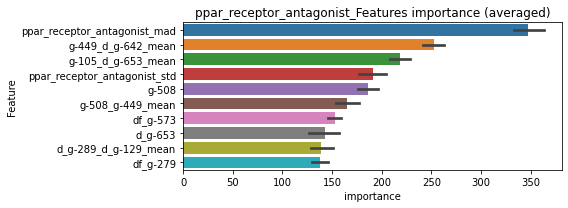

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00570011	valid_1's binary_logloss: 0.0153508
[600]	training's binary_logloss: 0.000750746	valid_1's binary_logloss: 0.0051635
[900]	training's binary_logloss: 0.000410771	valid_1's binary_logloss: 0.00401743
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000410771	valid_1's binary_logloss: 0.00401743


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574069	valid_1's binary_logloss: 0.0134401
[600]	training's binary_logloss: 0.000757205	valid_1's binary_logloss: 0.00418846
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000421853	valid_1's binary_logloss: 0.00315896


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00528208	valid_1's binary_logloss: 0.0225362
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000939357	valid_1's binary_logloss: 0.0156126


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577829	valid_1's binary_logloss: 0.0273615
[600]	training's binary_logloss: 0.000740258	valid_1's binary_logloss: 0.0114191
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000444758	valid_1's binary_logloss: 0.0097902


ppar_receptor_antagonist logloss: 0.00814314977637938


neg labels: 3289 → selected neg labels: 3270


progesterone_receptor_agonist, len(trt): 119, len(othr): 3270, target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0320227	valid_1's binary_logloss: 0.140321
[600]	training's binary_logloss: 0.00503608	valid_1's binary_logloss: 0.119394
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00415223	valid_1's binary_logloss: 0.118767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0313273	valid_1's binary_logloss: 0.131332
[600]	training's binary_logloss: 0.00499684	valid_1's binary_logloss: 0.100379
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00258568	valid_1's binary_logloss: 0.0973635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0314166	valid_1's binary_logloss: 0.113204
[600]	training's binary_logloss: 0.00502762	valid_1's binary_logloss: 0.0820761
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00292827	valid_1's binary_logloss: 0.0792649
T

1 / 3 AUC score:0.980
y_Threshold: 0.0290928, Threshold: 0.3263340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 201 → Positive_corect_labels: 619/3723
p_label_rate: 0.0100452 Vs.target_rate: 0.00500, Num_p_label: 40.0, conf_0:0.22843, conf_1:0.42423
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_1: 0.3263340
Num_p_label: 30.0, Expected: 19.9, Adj_threshold_2: 0.3763340
Num_p_label: 26.0, Expected: 19.9, Adj_threshold_3: 0.4263340
threshold: 0.4263340, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 619.0/3723, y_label_rate: 0.1662638
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227069	valid_1's binary_logloss: 0.127675
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00662206	valid_1's binary_logloss: 0.112836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217723	valid_1's binary_logloss: 0.113562
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00439517	valid_1's binary_logloss: 0.0963464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218097	valid_1's binary_logloss: 0.107775
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.0042618	valid_1's binary_logloss: 0.0903346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227784	valid_1's binary_logloss: 0.0924258
[600]	training's binary_logloss: 0.00326885	valid_1's binary_logloss: 0.0659743
Early stopping, best

2 / 3 AUC score:0.988
y_Threshold: 0.0660748, Threshold: 0.4263340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 572.0/3629
p_label_rate: 0.0246107 Vs.target_rate: 0.00500, Num_p_label: 98.0, conf_0:0.34107, conf_1:0.51160
Num_p_label: 98.0, Expected: 19.9, Adj_threshold_1: 0.4263340
Num_p_label: 93.0, Expected: 19.9, Adj_threshold_2: 0.4763340
Num_p_label: 77.0, Expected: 19.9, Adj_threshold_3: 0.5263340
Num_p_label: 59.0, Expected: 19.9, Adj_threshold_4: 0.5763340
Num_p_label: 48.0, Expected: 19.9, Adj_threshold_5: 0.6263340
Num_p_label: 38.0, Expected: 19.9, Adj_threshold_6: 0.6763340
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_7: 0.7263340
threshold: 0.7263340, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 572.0/3629, y_label_rate: 0.1576192
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164088	valid_1's binary_logloss: 0.0817362
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00334548	valid_1's binary_logloss: 0.0592672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168919	valid_1's binary_logloss: 0.0747319
[600]	training's binary_logloss: 0.00237235	valid_1's binary_logloss: 0.0469351
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.00103113	valid_1's binary_logloss: 0.042795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017004	valid_1's binary_logloss: 0.0606742
[600]	training's binary_logloss: 0.002427	valid_1's binary_logloss: 0.0394182
[900]	training's binary_logloss: 0.000992781	valid_1's binary_logloss: 0.0359857
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00098889	valid_1's binary_logloss: 0.035966

3 / 3 AUC score:0.999
y_Threshold: 0.0773617, Threshold: 0.7263340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 555.0/3595
p_label_rate: 0.0163235 Vs.target_rate: 0.00500, Num_p_label: 65.0, conf_0:0.50000, conf_1:0.79897
Num_p_label: 65.0, Expected: 19.9, Adj_threshold_1: 0.7263340
Num_p_label: 56.0, Expected: 19.9, Adj_threshold_2: 0.7763340
threshold: 0.7763340, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 555.0/3595, y_label_rate: 0.1543811


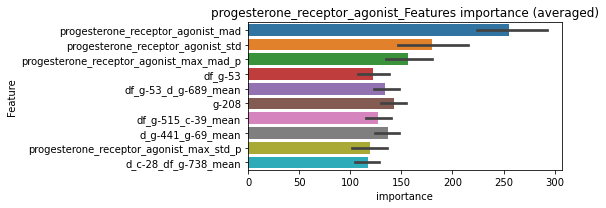

len(train_index) : 2696
len(valid_index) : 899
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147979	valid_1's binary_logloss: 0.071886
[600]	training's binary_logloss: 0.00205101	valid_1's binary_logloss: 0.0511865
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.00099785	valid_1's binary_logloss: 0.0485388


len(train_index) : 2696
len(valid_index) : 899
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148724	valid_1's binary_logloss: 0.077632
[600]	training's binary_logloss: 0.00204621	valid_1's binary_logloss: 0.0591847
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00151101	valid_1's binary_logloss: 0.0575909


len(train_index) : 2696
len(valid_index) : 899
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138904	valid_1's binary_logloss: 0.0620138
[600]	training's binary_logloss: 0.00196595	valid_1's binary_logloss: 0.045986
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00210717	valid_1's binary_logloss: 0.0459039


len(train_index) : 2697
len(valid_index) : 898
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142643	valid_1's binary_logloss: 0.0683528
[600]	training's binary_logloss: 0.00199576	valid_1's binary_logloss: 0.0423893
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000976085	valid_1's binary_logloss: 0.0373788


progesterone_receptor_agonist logloss: 0.04735587456800881


neg labels: 3289 → selected neg labels: 3287


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00402687	valid_1's binary_logloss: 0.00896933
[600]	training's binary_logloss: 0.000539546	valid_1's binary_logloss: 0.00246548
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000342151	valid_1's binary_logloss: 0.00189489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00396458	valid_1's binary_logloss: 0.0106189
[600]	training's binary_logloss: 0.000527863	valid_1's binary_logloss: 0.00377563
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000345255	valid_1's binary_logloss: 0.00325572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407625	valid_1's binary_logloss: 0.00757234
[600]	training's binary_logloss: 0.000539714	valid_1's binary_logloss: 0.00213086
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000340858	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0022004, Threshold: 0.0101319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00709, conf_1:0.01317
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0101319
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0601319
threshold: 0.0601319, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374937	valid_1's binary_logloss: 0.00723477
[600]	training's binary_logloss: 0.000492262	valid_1's binary_logloss: 0.0018124
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000321212	valid_1's binary_logloss: 0.00139779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371379	valid_1's binary_logloss: 0.011083
[600]	training's binary_logloss: 0.000487492	valid_1's binary_logloss: 0.00447864
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.00032179	valid_1's binary_logloss: 0.00398148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383618	valid_1's binary_logloss: 0.00528723
[600]	training's binary_logloss: 0.0005013	valid_1's binary_logloss: 0.000891699
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000324255	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0555516, Threshold: 0.0601319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076, Num_p_label: 25.0, conf_0:0.04811, conf_1:0.07216
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.0601319
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.1101319
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1601319
threshold: 0.1601319, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374937	valid_1's binary_logloss: 0.00723477
[600]	training's binary_logloss: 0.000492262	valid_1's binary_logloss: 0.0018124
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000321212	valid_1's binary_logloss: 0.00139779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371379	valid_1's binary_logloss: 0.011083
[600]	training's binary_logloss: 0.000487492	valid_1's binary_logloss: 0.00447864
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.00032179	valid_1's binary_logloss: 0.00398148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383618	valid_1's binary_logloss: 0.00528723
[600]	training's binary_logloss: 0.0005013	valid_1's binary_logloss: 0.000891699
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000324255	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0555516, Threshold: 0.1601319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.14412, conf_1:0.17615
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1601319
threshold: 0.1601319, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


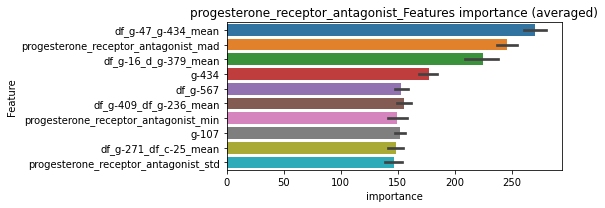

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374064	valid_1's binary_logloss: 0.00695212
[600]	training's binary_logloss: 0.000488415	valid_1's binary_logloss: 0.00162519
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000331903	valid_1's binary_logloss: 0.00127644


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374121	valid_1's binary_logloss: 0.0111691
[600]	training's binary_logloss: 0.000491533	valid_1's binary_logloss: 0.00433498
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000331787	valid_1's binary_logloss: 0.00389867


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386422	valid_1's binary_logloss: 0.00557327
[600]	training's binary_logloss: 0.000501665	valid_1's binary_logloss: 0.000910882
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000328796	valid_1's binary_logloss: 0.000642788


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367553	valid_1's binary_logloss: 0.00775277
[600]	training's binary_logloss: 0.000488975	valid_1's binary_logloss: 0.00220763
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000322194	valid_1's binary_logloss: 0.00175713


progesterone_receptor_antagonist logloss: 0.0018942171531810647


neg labels: 3289 → selected neg labels: 3286


prostaglandin_inhibitor, len(trt): 36, len(othr): 3286, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00745115	valid_1's binary_logloss: 0.0250704
[600]	training's binary_logloss: 0.000987128	valid_1's binary_logloss: 0.0116508
[900]	training's binary_logloss: 0.0004763	valid_1's binary_logloss: 0.00967474
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000454009	valid_1's binary_logloss: 0.00956853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00749526	valid_1's binary_logloss: 0.0316829
[600]	training's binary_logloss: 0.000984092	valid_1's binary_logloss: 0.0196363
[900]	training's binary_logloss: 0.00047573	valid_1's binary_logloss: 0.0172087
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000472004	valid_1's binary_logloss: 0.0171659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00744615	valid_1's binary_logloss: 0.0346689
[600]	training's binar

1 / 3 AUC score:0.999
y_Threshold: 0.0062608, Threshold: 0.0537442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.03762, conf_1:0.06987
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0537442
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_2: 0.1037442
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_3: 0.1537442
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.2037442
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_5: 0.2537442
threshold: 0.2537442, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632264	valid_1's binary_logloss: 0.0318682
[600]	training's binary_logloss: 0.000835172	valid_1's binary_logloss: 0.0201857
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000788671	valid_1's binary_logloss: 0.0200683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00653462	valid_1's binary_logloss: 0.025494
[600]	training's binary_logloss: 0.000855219	valid_1's binary_logloss: 0.0153786
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000538647	valid_1's binary_logloss: 0.0145439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063307	valid_1's binary_logloss: 0.0256331
[600]	training's binary_logloss: 0.000847463	valid_1's binary_logloss: 0.0138512
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000503663	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0940046, Threshold: 0.2537442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 646.0/3789
p_label_rate: 0.0123054 Vs.target_rate: 0.00151, Num_p_label: 49.0, conf_0:0.20300, conf_1:0.30449
Num_p_label: 49.0, Expected: 6.0, Adj_threshold_1: 0.2537442
Num_p_label: 42.0, Expected: 6.0, Adj_threshold_2: 0.3037442
Num_p_label: 35.0, Expected: 6.0, Adj_threshold_3: 0.3537442
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_4: 0.4037442
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_5: 0.4537442
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_6: 0.5037442
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_7: 0.5537442
threshold: 0.5537442, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 646.0/3789, y_label_rate: 0.1704935
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599749	valid_1's binary_logloss: 0.0223202
[600]	training's binary_logloss: 0.000793811	valid_1's binary_logloss: 0.00970523
[900]	training's binary_logloss: 0.000419054	valid_1's binary_logloss: 0.00812114
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000421276	valid_1's binary_logloss: 0.00811408
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00594508	valid_1's binary_logloss: 0.0140783
[600]	training's binary_logloss: 0.000787097	valid_1's binary_logloss: 0.00452271
[900]	training's binary_logloss: 0.000408676	valid_1's binary_logloss: 0.00324626
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000396689	valid_1's binary_logloss: 0.00323108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00584716	valid_1's binary_logloss: 0.0246596
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.0988569, Threshold: 0.5537442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 642.0/3781
p_label_rate: 0.0060271 Vs.target_rate: 0.00151, Num_p_label: 24.0, conf_0:0.49837, conf_1:0.60912
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_1: 0.5537442
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.6037442
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.6537442
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.7037442
threshold: 0.7037442, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 642.0/3781, y_label_rate: 0.1697964


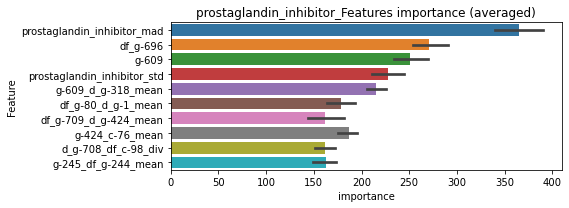

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00579298	valid_1's binary_logloss: 0.0274009


len(train_index) : 2836
len(valid_index) : 945


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00115903	valid_1's binary_logloss: 0.0144565


================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00554296	valid_1's binary_logloss: 0.0155082
[600]	training's binary_logloss: 0.000747541	valid_1's binary_logloss: 0.0044024
[900]	training's binary_logloss: 0.000412128	valid_1's binary_logloss: 0.00306208
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000407301	valid_1's binary_logloss: 0.00303348


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558333	valid_1's binary_logloss: 0.0171273
[600]	training's binary_logloss: 0.00074022	valid_1's binary_logloss: 0.00613272
[900]	training's binary_logloss: 0.000404876	valid_1's binary_logloss: 0.00492304
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000404707	valid_1's binary_logloss: 0.00492124


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055619	valid_1's binary_logloss: 0.0192089
[600]	training's binary_logloss: 0.000735609	valid_1's binary_logloss: 0.00747176
[900]	training's binary_logloss: 0.000402314	valid_1's binary_logloss: 0.00606671
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000389109	valid_1's binary_logloss: 0.00603554


prostaglandin_inhibitor logloss: 0.0071193444321663605


neg labels: 3289 → selected neg labels: 3280


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3280, target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186369	valid_1's binary_logloss: 0.102856
[600]	training's binary_logloss: 0.00253088	valid_1's binary_logloss: 0.0823144
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00226023	valid_1's binary_logloss: 0.082094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201329	valid_1's binary_logloss: 0.0890654
[600]	training's binary_logloss: 0.00273885	valid_1's binary_logloss: 0.0677138
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00248814	valid_1's binary_logloss: 0.0670993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215851	valid_1's binary_logloss: 0.0734287
[600]	training's binary_logloss: 0.00287665	valid_1's binary_logloss: 0.0439877
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00153112	valid_1's binary_logloss: 0.04137

1 / 3 AUC score:0.993
y_Threshold: 0.0208032, Threshold: 0.2043127, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 639/3770
p_label_rate: 0.0100452 Vs.target_rate: 0.00353, Num_p_label: 40.0, conf_0:0.14302, conf_1:0.26561
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_1: 0.2043127
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_2: 0.2543127
Num_p_label: 18.0, Expected: 14.0, Adj_threshold_3: 0.3043127
threshold: 0.3043127, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 639.0/3770, y_label_rate: 0.1694960
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162558	valid_1's binary_logloss: 0.05687
[600]	training's binary_logloss: 0.00209657	valid_1's binary_logloss: 0.0322
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.0012105	valid_1's binary_logloss: 0.0291757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156353	valid_1's binary_logloss: 0.0754237
[600]	training's binary_logloss: 0.00202308	valid_1's binary_logloss: 0.0509326
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.00116276	valid_1's binary_logloss: 0.0489744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163971	valid_1's binary_logloss: 0.0627729
[600]	training's binary_logloss: 0.00212759	valid_1's binary_logloss: 0.0400954
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.00100734	valid_1's binary_logloss: 0.0361714
T

2 / 3 AUC score:0.999
y_Threshold: 0.0754713, Threshold: 0.3043127, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 625.0/3742
p_label_rate: 0.0210949 Vs.target_rate: 0.00353, Num_p_label: 84.0, conf_0:0.24345, conf_1:0.36518
Num_p_label: 84.0, Expected: 14.0, Adj_threshold_1: 0.3043127
Num_p_label: 71.0, Expected: 14.0, Adj_threshold_2: 0.3543127
Num_p_label: 61.0, Expected: 14.0, Adj_threshold_3: 0.4043127
Num_p_label: 53.0, Expected: 14.0, Adj_threshold_4: 0.4543127
Num_p_label: 50.0, Expected: 14.0, Adj_threshold_5: 0.5043127
Num_p_label: 44.0, Expected: 14.0, Adj_threshold_6: 0.5543127
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_7: 0.6043127
Num_p_label: 35.0, Expected: 14.0, Adj_threshold_8: 0.6543127
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_9: 0.7043127
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_10: 0.7543127
threshold: 0.7543127, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 625.0/3742, y_label_rate: 0.1670230

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149436	valid_1's binary_logloss: 0.0473005
[600]	training's binary_logloss: 0.00193494	valid_1's binary_logloss: 0.025402
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000956148	valid_1's binary_logloss: 0.0229133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145831	valid_1's binary_logloss: 0.0771197
[600]	training's binary_logloss: 0.00186065	valid_1's binary_logloss: 0.0598077
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.0013235	valid_1's binary_logloss: 0.0586089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014519	valid_1's binary_logloss: 0.0585301
[600]	training's binary_logloss: 0.00189327	valid_1's binary_logloss: 0.0393729
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00181813	valid_1's binary_logloss: 0.03895

3 / 3 AUC score:0.997
y_Threshold: 0.0845052, Threshold: 0.7543127, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 612.0/3716
p_label_rate: 0.0075339 Vs.target_rate: 0.00353, Num_p_label: 30.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_1: 0.7543127
threshold: 0.7543127, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 612.0/3716, y_label_rate: 0.1646932


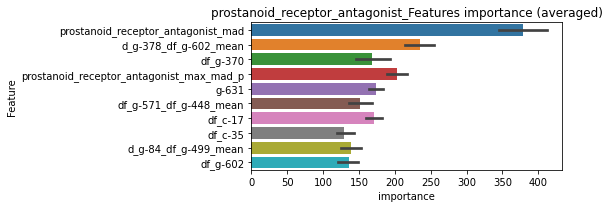

len(train_index) : 2787
len(valid_index) : 929
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129677	valid_1's binary_logloss: 0.0567428
[600]	training's binary_logloss: 0.00169322	valid_1's binary_logloss: 0.0391242
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00107723	valid_1's binary_logloss: 0.0372241


len(train_index) : 2787
len(valid_index) : 929
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140107	valid_1's binary_logloss: 0.0558585
[600]	training's binary_logloss: 0.0017524	valid_1's binary_logloss: 0.0338272
[900]	training's binary_logloss: 0.000733501	valid_1's binary_logloss: 0.0309647
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000712568	valid_1's binary_logloss: 0.0308167


len(train_index) : 2787
len(valid_index) : 929
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013438	valid_1's binary_logloss: 0.0498949
[600]	training's binary_logloss: 0.00172935	valid_1's binary_logloss: 0.0274182
[900]	training's binary_logloss: 0.000739427	valid_1's binary_logloss: 0.0233087
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000725199	valid_1's binary_logloss: 0.0232226


len(train_index) : 2787
len(valid_index) : 929
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126987	valid_1's binary_logloss: 0.060626
[600]	training's binary_logloss: 0.00166739	valid_1's binary_logloss: 0.0407571
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00111601	valid_1's binary_logloss: 0.0396875


prostanoid_receptor_antagonist logloss: 0.03273772385517233


neg labels: 3289 → selected neg labels: 3197


proteasome_inhibitor, len(trt): 726, len(othr): 3197, target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[38]	training's binary_logloss: 0.403079	valid_1's binary_logloss: 0.476494
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	training's binary_logloss: 0.412349	valid_1's binary_logloss: 0.476428
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[20]	training's binary_logloss: 0.439085	valid_1's binary_logloss: 0.474374
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.517
y_Threshold: 0.1941871, Threshold: 0.3756194, pos_neg_ratio: 0.7729121
Remove_noisy_data: 1257 → Positive_corect_labels: 180/2666
p_label_rate: 0.0100452 Vs.target_rate: 0.03049, Num_p_label: 40.0, conf_0:0.26293, conf_1:0.48831
Num_p_label: 40.0, Expected: 121.4, Adj_threshold_1: 0.3756194
Num_p_label: 110.0, Expected: 121.4, Adj_threshold_2: 0.3456194
Num_p_label: 136.0, Expected: 121.4, Adj_threshold_3: 0.3156194
Num_p_label: 141.0, Expected: 121.4, Adj_threshold_4: 0.2856194
Num_p_label: 143.0, Expected: 121.4, Adj_threshold_5: 0.2556194
Num_p_label: 164.0, Expected: 121.4, Adj_threshold_6: 0.2256194
Num_p_label: 712.0, Expected: 121.4, Adj_threshold_7: 0.1956194
threshold: 0.1956194, positive_p_label: 712.0/3982, p_label_rate: 0.1788046


Early stopping, best iteration is:
[15]	training's binary_logloss: 0.443909	valid_1's binary_logloss: 0.47763


positive_y_label: 180.0/2666, y_label_rate: 0.0675169
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[101]	training's binary_logloss: 0.0698203	valid_1's binary_logloss: 0.199466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[90]	training's binary_logloss: 0.0769156	valid_1's binary_logloss: 0.201403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[108]	training's binary_logloss: 0.0635318	valid_1's binary_logloss: 0.201918
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.809
y_Threshold: 0.0823473, Threshold: 0.1956194, pos_neg_ratio: 0.7729121
Remove_noisy_data: 226 → Positive_corect_labels: 67.0/2440
p_label_rate: 0.0554997 Vs.target_rate: 0.03049, Num_p_label: 221.0, conf_0:0.15650, conf_1:0.23474
Num_p_label: 221.0, Expected: 121.4, Adj_threshold_1: 0.1956194
Num_p_label: 202.0, Expected: 121.4, Adj_threshold_2: 0.2456194
Num_p_label: 185.0, Expected: 121.4, Adj_threshold_3: 0.2956194
Num_p_label: 174.0, Expected: 121.4, Adj_threshold_4: 0.3456194
Num_p_label: 168.0, Expected: 121.4, Adj_threshold_5: 0.3956194
Num_p_label: 161.0, Expected: 121.4, Adj_threshold_6: 0.4456194
Num_p_label: 152.0, Expected: 121.4, Adj_threshold_7: 0.4956194
Num_p_label: 149.0, Expected: 121.4, Adj_threshold_8: 0.5456194
Num_p_label: 147.0, Expected: 121.4, Adj_threshold_9: 0.5956194
Num_p_label: 144.0, Expected: 121.4, Adj_threshold_10: 0.6456194
threshold: 0.6956194, positive_p_label: 139.0/3982, p_label_rate: 0.0349071


Early stopping, best iteration is:
[106]	training's binary_logloss: 0.066413	valid_1's binary_logloss: 0.199635


positive_y_label: 67.0/2440, y_label_rate: 0.0274590
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00356216	valid_1's binary_logloss: 0.0370984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.0122348	valid_1's binary_logloss: 0.0774501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[153]	training's binary_logloss: 0.00741509	valid_1's binary_logloss: 0.04082
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.954
y_Threshold: 0.0313422, Threshold: 0.6956194, pos_neg_ratio: 0.7729121
Remove_noisy_data: 34 → Positive_corect_labels: 50.0/2406
p_label_rate: 0.0489704 Vs.target_rate: 0.03049, Num_p_label: 195.0, conf_0:0.50000, conf_1:0.76518
Num_p_label: 195.0, Expected: 121.4, Adj_threshold_1: 0.6956194
Num_p_label: 186.0, Expected: 121.4, Adj_threshold_2: 0.7456194
Num_p_label: 178.0, Expected: 121.4, Adj_threshold_3: 0.7956194
threshold: 0.7956194, positive_p_label: 178.0/3982, p_label_rate: 0.0447012


Early stopping, best iteration is:
[125]	training's binary_logloss: 0.0104043	valid_1's binary_logloss: 0.0490892


positive_y_label: 50.0/2406, y_label_rate: 0.0207814


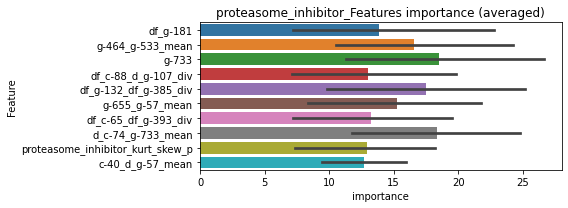

len(train_index) : 1804
len(valid_index) : 602
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1804
len(valid_index) : 602
================================= fold 2/4 proteasome_inhibitor=================================


[300]	training's binary_logloss: 0.000685857	valid_1's binary_logloss: 0.00621772
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000616295	valid_1's binary_logloss: 0.00607027
Training until validation scores don't improve for 30 rounds


len(train_index) : 1805
len(valid_index) : 601
================================= fold 3/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00101917	valid_1's binary_logloss: 0.00560922
Training until validation scores don't improve for 30 rounds


len(train_index) : 1805
len(valid_index) : 601
================================= fold 4/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[149]	training's binary_logloss: 0.0038725	valid_1's binary_logloss: 0.0253453
Training until validation scores don't improve for 30 rounds


proteasome_inhibitor logloss: 0.013943644217333004


Early stopping, best iteration is:
[205]	training's binary_logloss: 0.00168983	valid_1's binary_logloss: 0.0187768
neg labels: 3289 → selected neg labels: 3285


protein_kinase_inhibitor, len(trt): 48, len(othr): 3285, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116062	valid_1's binary_logloss: 0.0393182
[600]	training's binary_logloss: 0.00144366	valid_1's binary_logloss: 0.0151592
[900]	training's binary_logloss: 0.000638738	valid_1's binary_logloss: 0.0113289
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000559857	valid_1's binary_logloss: 0.0109361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110245	valid_1's binary_logloss: 0.0407691
[600]	training's binary_logloss: 0.00141137	valid_1's binary_logloss: 0.0227717
[900]	training's binary_logloss: 0.000629764	valid_1's binary_logloss: 0.0198561
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000610459	valid_1's binary_logloss: 0.01981
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117338	valid_1's binary_logloss: 0.0382162
[600]	training's binary_log

1 / 3 AUC score:0.999
y_Threshold: 0.0095215, Threshold: 0.0391907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.02743, conf_1:0.05095
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0391907
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_2: 0.0891907
threshold: 0.0891907, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00997764	valid_1's binary_logloss: 0.0324887
[600]	training's binary_logloss: 0.00130234	valid_1's binary_logloss: 0.0128833
[900]	training's binary_logloss: 0.000593736	valid_1's binary_logloss: 0.010336
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.00060441	valid_1's binary_logloss: 0.0103123
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010015	valid_1's binary_logloss: 0.0306401
[600]	training's binary_logloss: 0.00131233	valid_1's binary_logloss: 0.0128696
[900]	training's binary_logloss: 0.000600421	valid_1's binary_logloss: 0.0102829
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000554741	valid_1's binary_logloss: 0.0101004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00989888	valid_1's binary_logloss: 0.0370923
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0429637, Threshold: 0.0891907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0128076 Vs.target_rate: 0.00202, Num_p_label: 51.0, conf_0:0.07135, conf_1:0.10703
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_1: 0.0891907
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_2: 0.1391907
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_3: 0.1891907
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_4: 0.2391907
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_5: 0.2891907
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_6: 0.3391907
threshold: 0.3391907, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 649.0/3794, y_label_rate: 0.1710596
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00942873	valid_1's binary_logloss: 0.0384139
[600]	training's binary_logloss: 0.00122619	valid_1's binary_logloss: 0.0234223
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000899878	valid_1's binary_logloss: 0.0224731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00930961	valid_1's binary_logloss: 0.0342532
[600]	training's binary_logloss: 0.00121878	valid_1's binary_logloss: 0.0156306
[900]	training's binary_logloss: 0.000568408	valid_1's binary_logloss: 0.0125184
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000568408	valid_1's binary_logloss: 0.0125184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010024	valid_1's binary_logloss: 0.0334466
[600]	training's binary_logloss: 0.00128801	valid_1's binary_logloss: 0.0161531
[900]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0546558, Threshold: 0.3391907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3786
p_label_rate: 0.0055249 Vs.target_rate: 0.00202, Num_p_label: 22.0, conf_0:0.30527, conf_1:0.37311
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_1: 0.3391907
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_2: 0.3891907
threshold: 0.3891907, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3786, y_label_rate: 0.1703645


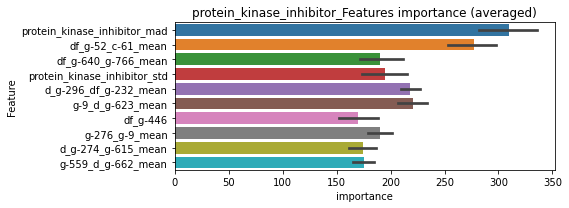

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00917787	valid_1's binary_logloss: 0.0365486
[600]	training's binary_logloss: 0.00120018	valid_1's binary_logloss: 0.0207436
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000687029	valid_1's binary_logloss: 0.0195029


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00933204	valid_1's binary_logloss: 0.0274113
[600]	training's binary_logloss: 0.00122187	valid_1's binary_logloss: 0.0133834
[900]	training's binary_logloss: 0.000566646	valid_1's binary_logloss: 0.0114241
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000570932	valid_1's binary_logloss: 0.0113761


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00917929	valid_1's binary_logloss: 0.0299168
[600]	training's binary_logloss: 0.00120614	valid_1's binary_logloss: 0.0120539
[900]	training's binary_logloss: 0.000567518	valid_1's binary_logloss: 0.00974168
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000543898	valid_1's binary_logloss: 0.00968736


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955543	valid_1's binary_logloss: 0.0291937
[600]	training's binary_logloss: 0.00123403	valid_1's binary_logloss: 0.00963943
[900]	training's binary_logloss: 0.000576151	valid_1's binary_logloss: 0.0074316
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000586281	valid_1's binary_logloss: 0.00740853


protein_kinase_inhibitor logloss: 0.011995543415809584


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057458	valid_1's binary_logloss: 0.0146076
[600]	training's binary_logloss: 0.00073594	valid_1's binary_logloss: 0.00467543
[900]	training's binary_logloss: 0.000391065	valid_1's binary_logloss: 0.00372582
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000395206	valid_1's binary_logloss: 0.00371608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00544584	valid_1's binary_logloss: 0.0187242
[600]	training's binary_logloss: 0.000717212	valid_1's binary_logloss: 0.00673498
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000411865	valid_1's binary_logloss: 0.0053303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551874	valid_1's binary_logloss: 0.012795
[600]	training's binary_logloss: 0.000724112	valid_1's binary_logloss: 0.00319171
[900]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0033186, Threshold: 0.0170648, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.01195, conf_1:0.02218
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0170648
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.0670648
threshold: 0.0670648, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00520108	valid_1's binary_logloss: 0.0132073
[600]	training's binary_logloss: 0.000679409	valid_1's binary_logloss: 0.0044926
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000421536	valid_1's binary_logloss: 0.00377117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00509004	valid_1's binary_logloss: 0.0182857
[600]	training's binary_logloss: 0.000673754	valid_1's binary_logloss: 0.00740768
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000377314	valid_1's binary_logloss: 0.00606986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515218	valid_1's binary_logloss: 0.0109264
[600]	training's binary_logloss: 0.000679786	valid_1's binary_logloss: 0.0022974
[900]	training's binary_logloss: 0.00037832	valid_1's binary_logloss: 0.00149249
Early stopping, be

2 / 3 AUC score:1.000
y_Threshold: 0.0409938, Threshold: 0.0670648, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0087896 Vs.target_rate: 0.00101, Num_p_label: 35.0, conf_0:0.05365, conf_1:0.08048
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_1: 0.0670648
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_2: 0.1170648
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_3: 0.1670648
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_4: 0.2170648
threshold: 0.2170648, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00520108	valid_1's binary_logloss: 0.0132073
[600]	training's binary_logloss: 0.000679409	valid_1's binary_logloss: 0.0044926
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000421536	valid_1's binary_logloss: 0.00377117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00509004	valid_1's binary_logloss: 0.0182857
[600]	training's binary_logloss: 0.000673754	valid_1's binary_logloss: 0.00740768
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000377314	valid_1's binary_logloss: 0.00606986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515218	valid_1's binary_logloss: 0.0109264
[600]	training's binary_logloss: 0.000679786	valid_1's binary_logloss: 0.0022974
[900]	training's binary_logloss: 0.00037832	valid_1's binary_logloss: 0.00149249
Early stopping, be

3 / 3 AUC score:1.000
y_Threshold: 0.0409938, Threshold: 0.2170648, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00101, Num_p_label: 5.0, conf_0:0.19536, conf_1:0.23877
threshold: 0.2170648, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


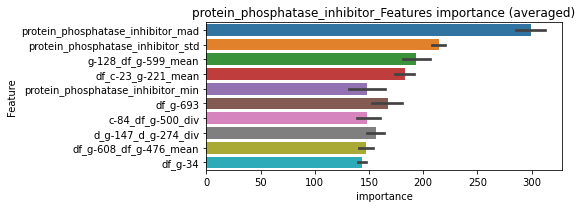

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522101	valid_1's binary_logloss: 0.0128264
[600]	training's binary_logloss: 0.000675162	valid_1's binary_logloss: 0.00402585
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000377318	valid_1's binary_logloss: 0.00328298


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00519148	valid_1's binary_logloss: 0.0164915
[600]	training's binary_logloss: 0.000683191	valid_1's binary_logloss: 0.00621295
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000386714	valid_1's binary_logloss: 0.00498038


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521334	valid_1's binary_logloss: 0.0113214
[600]	training's binary_logloss: 0.00067105	valid_1's binary_logloss: 0.00247597
[900]	training's binary_logloss: 0.000379208	valid_1's binary_logloss: 0.00165356
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.00037918	valid_1's binary_logloss: 0.00165312


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00542196	valid_1's binary_logloss: 0.0133243
[600]	training's binary_logloss: 0.000693315	valid_1's binary_logloss: 0.00493538
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000406808	valid_1's binary_logloss: 0.00413201


protein_phosphatase_inhibitor logloss: 0.0035136294609681706


neg labels: 3289 → selected neg labels: 3278


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3278, target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235241	valid_1's binary_logloss: 0.0998554
[600]	training's binary_logloss: 0.00340638	valid_1's binary_logloss: 0.07594
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00302524	valid_1's binary_logloss: 0.0749553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206357	valid_1's binary_logloss: 0.123337
[600]	training's binary_logloss: 0.00301612	valid_1's binary_logloss: 0.0982645
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00198946	valid_1's binary_logloss: 0.0967708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023765	valid_1's binary_logloss: 0.0938838
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00470266	valid_1's binary_logloss: 0.0753161
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.987
y_Threshold: 0.0276865, Threshold: 0.1510519, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 627/3745
p_label_rate: 0.0100452 Vs.target_rate: 0.00433, Num_p_label: 40.0, conf_0:0.10574, conf_1:0.19637
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_1: 0.1510519
Num_p_label: 29.0, Expected: 17.2, Adj_threshold_2: 0.2010519
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_3: 0.2510519
threshold: 0.2510519, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 627.0/3745, y_label_rate: 0.1674232
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160339	valid_1's binary_logloss: 0.069543
[600]	training's binary_logloss: 0.00222319	valid_1's binary_logloss: 0.0587266
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00243355	valid_1's binary_logloss: 0.0585294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151581	valid_1's binary_logloss: 0.0985901
[600]	training's binary_logloss: 0.00210839	valid_1's binary_logloss: 0.0821174
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00200928	valid_1's binary_logloss: 0.0816986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169054	valid_1's binary_logloss: 0.0733263
[600]	training's binary_logloss: 0.00233744	valid_1's binary_logloss: 0.0532332
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00209879	valid_1's binary_logloss: 0.0526

2 / 3 AUC score:0.995
y_Threshold: 0.0792607, Threshold: 0.2510519, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 598.0/3687
p_label_rate: 0.0188348 Vs.target_rate: 0.00433, Num_p_label: 75.0, conf_0:0.20084, conf_1:0.30126
Num_p_label: 75.0, Expected: 17.2, Adj_threshold_1: 0.2510519
Num_p_label: 66.0, Expected: 17.2, Adj_threshold_2: 0.3010519
Num_p_label: 57.0, Expected: 17.2, Adj_threshold_3: 0.3510519
Num_p_label: 49.0, Expected: 17.2, Adj_threshold_4: 0.4010519
Num_p_label: 47.0, Expected: 17.2, Adj_threshold_5: 0.4510519
Num_p_label: 41.0, Expected: 17.2, Adj_threshold_6: 0.5010519
Num_p_label: 38.0, Expected: 17.2, Adj_threshold_7: 0.5510519
Num_p_label: 31.0, Expected: 17.2, Adj_threshold_8: 0.6010519
Num_p_label: 29.0, Expected: 17.2, Adj_threshold_9: 0.6510519
Num_p_label: 21.0, Expected: 17.2, Adj_threshold_10: 0.7010519
threshold: 0.7010519, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 598.0/3687, y_label_rate: 0.1621915

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132095	valid_1's binary_logloss: 0.0527639
[600]	training's binary_logloss: 0.00178261	valid_1's binary_logloss: 0.0270394
[900]	training's binary_logloss: 0.000767637	valid_1's binary_logloss: 0.0229657
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000736961	valid_1's binary_logloss: 0.0229317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121493	valid_1's binary_logloss: 0.0873727
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00296228	valid_1's binary_logloss: 0.0771942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128726	valid_1's binary_logloss: 0.0429715
[600]	training's binary_logloss: 0.00180292	valid_1's binary_logloss: 0.0223514
[900]	training's binary_logloss: 0.000782464	valid_1's binary_logloss: 0.0188572
Early stopping, best iterat

3 / 3 AUC score:0.997
y_Threshold: 0.0810839, Threshold: 0.7010519, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 583.0/3657
p_label_rate: 0.0130588 Vs.target_rate: 0.00433, Num_p_label: 52.0, conf_0:0.50000, conf_1:0.77116
Num_p_label: 52.0, Expected: 17.2, Adj_threshold_1: 0.7010519
Num_p_label: 42.0, Expected: 17.2, Adj_threshold_2: 0.7510519
threshold: 0.7510519, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 583.0/3657, y_label_rate: 0.1594203


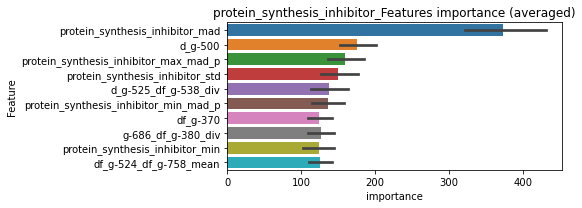

len(train_index) : 2742
len(valid_index) : 915
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010655	valid_1's binary_logloss: 0.0548298
[600]	training's binary_logloss: 0.00147077	valid_1's binary_logloss: 0.0406401
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00106476	valid_1's binary_logloss: 0.0393369


len(train_index) : 2743
len(valid_index) : 914
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112093	valid_1's binary_logloss: 0.070132
[600]	training's binary_logloss: 0.0015135	valid_1's binary_logloss: 0.058285
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.00122044	valid_1's binary_logloss: 0.0578553


len(train_index) : 2743
len(valid_index) : 914
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106671	valid_1's binary_logloss: 0.0594299
[600]	training's binary_logloss: 0.00146425	valid_1's binary_logloss: 0.0452915
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00109699	valid_1's binary_logloss: 0.0446781


len(train_index) : 2743
len(valid_index) : 914
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118972	valid_1's binary_logloss: 0.0381848
[600]	training's binary_logloss: 0.00156607	valid_1's binary_logloss: 0.0202804
[900]	training's binary_logloss: 0.000710297	valid_1's binary_logloss: 0.0172043
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000618314	valid_1's binary_logloss: 0.0164771


protein_synthesis_inhibitor logloss: 0.03958730599572564


neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523218	valid_1's binary_logloss: 0.012299
[600]	training's binary_logloss: 0.00065821	valid_1's binary_logloss: 0.00293608
[900]	training's binary_logloss: 0.000369327	valid_1's binary_logloss: 0.00205706
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000370161	valid_1's binary_logloss: 0.00205571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052018	valid_1's binary_logloss: 0.0106411
[600]	training's binary_logloss: 0.000640603	valid_1's binary_logloss: 0.00232
[900]	training's binary_logloss: 0.000372436	valid_1's binary_logloss: 0.00178958
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000366692	valid_1's binary_logloss: 0.00177424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512927	valid_1's binary_logloss: 0.0123593
[600]	training's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0029018, Threshold: 0.0114549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00802, conf_1:0.01489
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0114549
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.0614549
threshold: 0.0614549, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463186	valid_1's binary_logloss: 0.0116241
[600]	training's binary_logloss: 0.000578318	valid_1's binary_logloss: 0.00268664
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000347172	valid_1's binary_logloss: 0.00200632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0045284	valid_1's binary_logloss: 0.0103861
[600]	training's binary_logloss: 0.000576167	valid_1's binary_logloss: 0.00263023
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000353454	valid_1's binary_logloss: 0.002004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457103	valid_1's binary_logloss: 0.0113417
[600]	training's binary_logloss: 0.000578408	valid_1's binary_logloss: 0.00250339
[900]	training's binary_logloss: 0.000349919	valid_1's binary_logloss: 0.00185689
Early stopping, be

2 / 3 AUC score:1.000
y_Threshold: 0.1352253, Threshold: 0.0614549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0102963 Vs.target_rate: 0.00080, Num_p_label: 41.0, conf_0:0.04916, conf_1:0.07375
Num_p_label: 41.0, Expected: 3.2, Adj_threshold_1: 0.0614549
Num_p_label: 28.0, Expected: 3.2, Adj_threshold_2: 0.1114549
Num_p_label: 21.0, Expected: 3.2, Adj_threshold_3: 0.1614549
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_4: 0.2114549
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_5: 0.2614549
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_6: 0.3114549
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_7: 0.3614549
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_8: 0.4114549
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_9: 0.4614549
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_10: 0.5114549
threshold: 0.5114549, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
==============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463186	valid_1's binary_logloss: 0.0116241
[600]	training's binary_logloss: 0.000578318	valid_1's binary_logloss: 0.00268664
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000347172	valid_1's binary_logloss: 0.00200632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0045284	valid_1's binary_logloss: 0.0103861
[600]	training's binary_logloss: 0.000576167	valid_1's binary_logloss: 0.00263023
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000353454	valid_1's binary_logloss: 0.002004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457103	valid_1's binary_logloss: 0.0113417
[600]	training's binary_logloss: 0.000578408	valid_1's binary_logloss: 0.00250339
[900]	training's binary_logloss: 0.000349919	valid_1's binary_logloss: 0.00185689
Early stopping, be

3 / 3 AUC score:1.000
y_Threshold: 0.1352253, Threshold: 0.5114549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.46031, conf_1:0.56260
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.5114549
threshold: 0.5114549, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


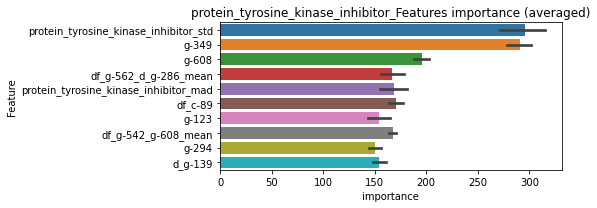

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0045624	valid_1's binary_logloss: 0.0110476
[600]	training's binary_logloss: 0.000580411	valid_1's binary_logloss: 0.0027756
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000362438	valid_1's binary_logloss: 0.00209898


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455601	valid_1's binary_logloss: 0.0099549
[600]	training's binary_logloss: 0.000573057	valid_1's binary_logloss: 0.00247464
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000360729	valid_1's binary_logloss: 0.00193467


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457876	valid_1's binary_logloss: 0.0114338
[600]	training's binary_logloss: 0.000576819	valid_1's binary_logloss: 0.00244217
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000357435	valid_1's binary_logloss: 0.00181534


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474647	valid_1's binary_logloss: 0.0082127
[600]	training's binary_logloss: 0.000586828	valid_1's binary_logloss: 0.00193944
[900]	training's binary_logloss: 0.000358963	valid_1's binary_logloss: 0.00151664
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000356258	valid_1's binary_logloss: 0.00150508


protein_tyrosine_kinase_inhibitor logloss: 0.0018400666434522427


neg labels: 3289 → selected neg labels: 3283


radiopaque_medium, len(trt): 56, len(othr): 3283, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133281	valid_1's binary_logloss: 0.0772677
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00227328	valid_1's binary_logloss: 0.0579373
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012537	valid_1's binary_logloss: 0.0559416
[600]	training's binary_logloss: 0.00168965	valid_1's binary_logloss: 0.0309546
[900]	training's binary_logloss: 0.000734119	valid_1's binary_logloss: 0.0269259
Early stopping, best iteration is:
[1127]	training's binary_logloss: 0.000611463	valid_1's binary_logloss: 0.0261944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133007	valid_1's binary_logloss: 0.0376473
[600]	training's binary_logloss: 0.00175165	valid_1's binary_logloss: 0.0132693
[900]	training's binary_logloss: 0.00075657	valid_1's binary_logloss: 0.00984796
Early stopping, best iterat

1 / 3 AUC score:0.999
y_Threshold: 0.0109901, Threshold: 0.0917068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00235, Num_p_label: 40.0, conf_0:0.06419, conf_1:0.11922
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0917068
Num_p_label: 31.0, Expected: 9.4, Adj_threshold_2: 0.1417068
Num_p_label: 19.0, Expected: 9.4, Adj_threshold_3: 0.1917068
threshold: 0.1917068, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120071	valid_1's binary_logloss: 0.0405561
[600]	training's binary_logloss: 0.00155729	valid_1's binary_logloss: 0.02364
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000802706	valid_1's binary_logloss: 0.0219173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113691	valid_1's binary_logloss: 0.0647657
[600]	training's binary_logloss: 0.0014944	valid_1's binary_logloss: 0.0480001
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.0014883	valid_1's binary_logloss: 0.0479758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114069	valid_1's binary_logloss: 0.048089
[600]	training's binary_logloss: 0.00149148	valid_1's binary_logloss: 0.0267515
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000771158	valid_1's binary_logloss: 0.023760

2 / 3 AUC score:0.998
y_Threshold: 0.0933516, Threshold: 0.1917068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 639.0/3773
p_label_rate: 0.0190859 Vs.target_rate: 0.00235, Num_p_label: 76.0, conf_0:0.15337, conf_1:0.23005
Num_p_label: 76.0, Expected: 9.4, Adj_threshold_1: 0.1917068
Num_p_label: 64.0, Expected: 9.4, Adj_threshold_2: 0.2417068
Num_p_label: 53.0, Expected: 9.4, Adj_threshold_3: 0.2917068
Num_p_label: 46.0, Expected: 9.4, Adj_threshold_4: 0.3417068
Num_p_label: 44.0, Expected: 9.4, Adj_threshold_5: 0.3917068
Num_p_label: 32.0, Expected: 9.4, Adj_threshold_6: 0.4417068
Num_p_label: 27.0, Expected: 9.4, Adj_threshold_7: 0.4917068
Num_p_label: 24.0, Expected: 9.4, Adj_threshold_8: 0.5417068
Num_p_label: 21.0, Expected: 9.4, Adj_threshold_9: 0.5917068
threshold: 0.5917068, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 639.0/3773, y_label_rate: 0.1693613
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00994821	valid_1's binary_logloss: 0.0418794
[600]	training's binary_logloss: 0.00133323	valid_1's binary_logloss: 0.0206676
[900]	training's binary_logloss: 0.000623405	valid_1's binary_logloss: 0.0174311
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00060471	valid_1's binary_logloss: 0.0172948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102181	valid_1's binary_logloss: 0.0372957
[600]	training's binary_logloss: 0.00138833	valid_1's binary_logloss: 0.0192321
[900]	training's binary_logloss: 0.000639058	valid_1's binary_logloss: 0.0165873
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000592538	valid_1's binary_logloss: 0.0163388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104971	valid_1's binary_logloss: 0.0344388
[600]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.1391909, Threshold: 0.5917068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 631.0/3757
p_label_rate: 0.0115520 Vs.target_rate: 0.00235, Num_p_label: 46.0, conf_0:0.50000, conf_1:0.65088
Num_p_label: 46.0, Expected: 9.4, Adj_threshold_1: 0.5917068
Num_p_label: 41.0, Expected: 9.4, Adj_threshold_2: 0.6417068
Num_p_label: 37.0, Expected: 9.4, Adj_threshold_3: 0.6917068
Num_p_label: 31.0, Expected: 9.4, Adj_threshold_4: 0.7417068
Num_p_label: 26.0, Expected: 9.4, Adj_threshold_5: 0.7917068
threshold: 0.7917068, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 631.0/3757, y_label_rate: 0.1679532


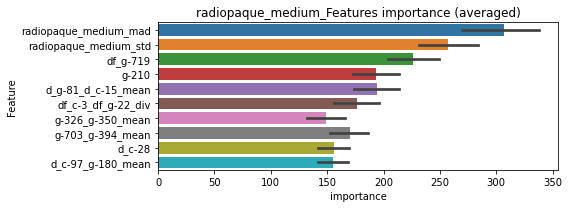

len(train_index) : 2817
len(valid_index) : 940
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00940807	valid_1's binary_logloss: 0.0321744
[600]	training's binary_logloss: 0.00126909	valid_1's binary_logloss: 0.0145376
[900]	training's binary_logloss: 0.000607384	valid_1's binary_logloss: 0.0120127
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000557181	valid_1's binary_logloss: 0.0116897


len(train_index) : 2818
len(valid_index) : 939
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00942361	valid_1's binary_logloss: 0.05047
[600]	training's binary_logloss: 0.00127344	valid_1's binary_logloss: 0.0335401
[900]	training's binary_logloss: 0.000603232	valid_1's binary_logloss: 0.0313381
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000591755	valid_1's binary_logloss: 0.0311505


len(train_index) : 2818
len(valid_index) : 939
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00949385	valid_1's binary_logloss: 0.0468754
[600]	training's binary_logloss: 0.00128843	valid_1's binary_logloss: 0.0297235
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000932638	valid_1's binary_logloss: 0.0279205


len(train_index) : 2818
len(valid_index) : 939
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0094504	valid_1's binary_logloss: 0.0272787
[600]	training's binary_logloss: 0.00129212	valid_1's binary_logloss: 0.0103613
[900]	training's binary_logloss: 0.000613253	valid_1's binary_logloss: 0.00770525
Early stopping, best iteration is:
[1075]	training's binary_logloss: 0.000546296	valid_1's binary_logloss: 0.00745668


radiopaque_medium logloss: 0.019557578852653176


neg labels: 3289 → selected neg labels: 3266


raf_inhibitor, len(trt): 223, len(othr): 3266, target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0583323	valid_1's binary_logloss: 0.231508
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.0235302	valid_1's binary_logloss: 0.221517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0586146	valid_1's binary_logloss: 0.25421
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.0263665	valid_1's binary_logloss: 0.245296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0573244	valid_1's binary_logloss: 0.239938
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.0265097	valid_1's binary_logloss: 0.230059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0589921	valid_1's binary_logloss: 0.225016
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.0269127	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.906
y_Threshold: 0.0765168, Threshold: 0.5034741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 389 → Positive_corect_labels: 524/3530
p_label_rate: 0.0100452 Vs.target_rate: 0.00936, Num_p_label: 40.0, conf_0:0.35243, conf_1:0.65452
threshold: 0.5034741, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 524.0/3530, y_label_rate: 0.1484419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0295486	valid_1's binary_logloss: 0.115851
[600]	training's binary_logloss: 0.00464396	valid_1's binary_logloss: 0.0904009
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.00229568	valid_1's binary_logloss: 0.0863314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0273577	valid_1's binary_logloss: 0.145853
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00575099	valid_1's binary_logloss: 0.129572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0292991	valid_1's binary_logloss: 0.109896
[600]	training's binary_logloss: 0.00470779	valid_1's binary_logloss: 0.0794504
[900]	training's binary_logloss: 0.00162157	valid_1's binary_logloss: 0.0745654
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.00166781	valid_1's binary_logloss: 0.0745028

2 / 3 AUC score:0.987
y_Threshold: 0.0586744, Threshold: 0.5034741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 479.0/3440
p_label_rate: 0.0351582 Vs.target_rate: 0.00936, Num_p_label: 140.0, conf_0:0.40278, conf_1:0.60417
Num_p_label: 140.0, Expected: 37.3, Adj_threshold_1: 0.5034741
Num_p_label: 132.0, Expected: 37.3, Adj_threshold_2: 0.5534741
Num_p_label: 120.0, Expected: 37.3, Adj_threshold_3: 0.6034741
Num_p_label: 108.0, Expected: 37.3, Adj_threshold_4: 0.6534741
Num_p_label: 97.0, Expected: 37.3, Adj_threshold_5: 0.7034741
Num_p_label: 86.0, Expected: 37.3, Adj_threshold_6: 0.7534741
threshold: 0.7534741, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 479.0/3440, y_label_rate: 0.1392442
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197155	valid_1's binary_logloss: 0.113638
[600]	training's binary_logloss: 0.00287664	valid_1's binary_logloss: 0.101049
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00275996	valid_1's binary_logloss: 0.100998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206834	valid_1's binary_logloss: 0.0839564
[600]	training's binary_logloss: 0.00308562	valid_1's binary_logloss: 0.0638957
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00195442	valid_1's binary_logloss: 0.0624429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185011	valid_1's binary_logloss: 0.138131
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.0101093	valid_1's binary_logloss: 0.135319
Training until validation scores don't improve for 30 rounds
[300]	training's bin

3 / 3 AUC score:0.985
y_Threshold: 0.0459011, Threshold: 0.7534741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 439.0/3360
p_label_rate: 0.0313913 Vs.target_rate: 0.00936, Num_p_label: 125.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 125.0, Expected: 37.3, Adj_threshold_1: 0.7534741
threshold: 0.7534741, positive_p_label: 125.0/3982, p_label_rate: 0.0313913
positive_y_label: 439.0/3360, y_label_rate: 0.1306548


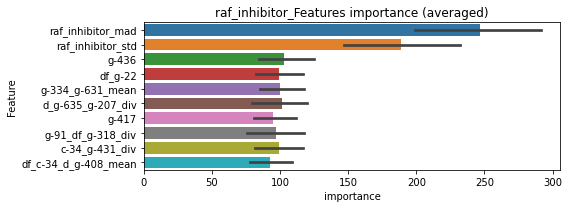

len(train_index) : 2520
len(valid_index) : 840
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140365	valid_1's binary_logloss: 0.0851878
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00235897	valid_1's binary_logloss: 0.0755327


len(train_index) : 2520
len(valid_index) : 840
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136261	valid_1's binary_logloss: 0.105191
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00303064	valid_1's binary_logloss: 0.0962131


len(train_index) : 2520
len(valid_index) : 840
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135903	valid_1's binary_logloss: 0.106882


len(train_index) : 2520
len(valid_index) : 840
================================= fold 4/4 raf_inhibitor=================================


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00503687	valid_1's binary_logloss: 0.101438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131346	valid_1's binary_logloss: 0.112544


raf_inhibitor logloss: 0.09546862918314229


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00742616	valid_1's binary_logloss: 0.108691
neg labels: 3289 → selected neg labels: 3289


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0030674	valid_1's binary_logloss: 0.0040448
[600]	training's binary_logloss: 0.000401159	valid_1's binary_logloss: 0.000689193
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.00028795	valid_1's binary_logloss: 0.000530076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029848	valid_1's binary_logloss: 0.00689929
[600]	training's binary_logloss: 0.000385285	valid_1's binary_logloss: 0.00228587
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000282206	valid_1's binary_logloss: 0.00196373
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289333	valid_1's binary_logloss: 0.00664207
[600]	training's binary_logloss: 0.000382638	valid_1's binary_logloss: 0.00252181
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000272887	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0013634, Threshold: 0.0097013, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00679, conf_1:0.01261
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0097013
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0597013
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1097013
threshold: 0.1097013, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270193	valid_1's binary_logloss: 0.00392623
[600]	training's binary_logloss: 0.000351292	valid_1's binary_logloss: 0.000669947
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000264865	valid_1's binary_logloss: 0.000523479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267292	valid_1's binary_logloss: 0.00436613
[600]	training's binary_logloss: 0.000349976	valid_1's binary_logloss: 0.00070409
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000261926	valid_1's binary_logloss: 0.000554599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026618	valid_1's binary_logloss: 0.00426569
[600]	training's binary_logloss: 0.000349827	valid_1's binary_logloss: 0.000725685
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000263004	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.1408748, Threshold: 0.1097013, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0050226 Vs.target_rate: 0.00050, Num_p_label: 20.0, conf_0:0.08776, conf_1:0.13164
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_1: 0.1097013
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.1597013
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.2097013
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_4: 0.2597013
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.3097013
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.3597013
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.4097013
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.4597013
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_9: 0.5097013
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.5597013
threshold: 0.6097013, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270193	valid_1's binary_logloss: 0.00392623
[600]	training's binary_logloss: 0.000351292	valid_1's binary_logloss: 0.000669947
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000264865	valid_1's binary_logloss: 0.000523479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267292	valid_1's binary_logloss: 0.00436613
[600]	training's binary_logloss: 0.000349976	valid_1's binary_logloss: 0.00070409
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000261926	valid_1's binary_logloss: 0.000554599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026618	valid_1's binary_logloss: 0.00426569
[600]	training's binary_logloss: 0.000349827	valid_1's binary_logloss: 0.000725685
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000263004	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.1408748, Threshold: 0.6097013, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.50000, conf_1:0.67067
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.6097013
threshold: 0.6097013, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


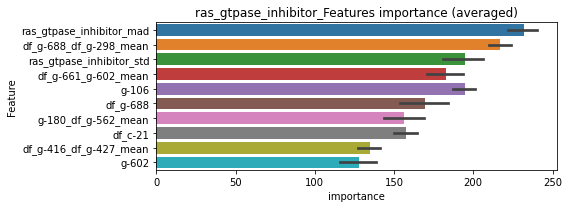

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267028	valid_1's binary_logloss: 0.00399678
[600]	training's binary_logloss: 0.000352123	valid_1's binary_logloss: 0.000708013
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000267498	valid_1's binary_logloss: 0.000560927


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268165	valid_1's binary_logloss: 0.00425263
[600]	training's binary_logloss: 0.000350405	valid_1's binary_logloss: 0.000686537
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000264871	valid_1's binary_logloss: 0.00054519


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268314	valid_1's binary_logloss: 0.00413948
[600]	training's binary_logloss: 0.000349988	valid_1's binary_logloss: 0.000685314
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000264961	valid_1's binary_logloss: 0.000555613


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270813	valid_1's binary_logloss: 0.00498524
[600]	training's binary_logloss: 0.000350683	valid_1's binary_logloss: 0.00109075
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000265634	valid_1's binary_logloss: 0.000922431


ras_gtpase_inhibitor logloss: 0.0006460189311711987


neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184889	valid_1's binary_logloss: 0.074659
[600]	training's binary_logloss: 0.00236154	valid_1's binary_logloss: 0.052271
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00223107	valid_1's binary_logloss: 0.0520452
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181486	valid_1's binary_logloss: 0.0794893
[600]	training's binary_logloss: 0.0024344	valid_1's binary_logloss: 0.052739
[900]	training's binary_logloss: 0.000942742	valid_1's binary_logloss: 0.0489916
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000942742	valid_1's binary_logloss: 0.0489916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201024	valid_1's binary_logloss: 0.0547369
[600]	training's binary_logloss: 0.0025956	valid_1's binary_logloss: 0.0250944
[900]	training's binary_logloss: 

1 / 3 AUC score:0.996
y_Threshold: 0.0191624, Threshold: 0.2953529, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00281, Num_p_label: 40.0, conf_0:0.20675, conf_1:0.38396
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.2953529
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_2: 0.3453529
Num_p_label: 32.0, Expected: 11.2, Adj_threshold_3: 0.3953529
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_4: 0.4453529
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_5: 0.4953529
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_6: 0.5453529
Num_p_label: 13.0, Expected: 11.2, Adj_threshold_7: 0.5953529
threshold: 0.5953529, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3787, y_label_rate: 0.1711117
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164516	valid_1's binary_logloss: 0.0740535
[600]	training's binary_logloss: 0.00200286	valid_1's binary_logloss: 0.0573405
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.0017906	valid_1's binary_logloss: 0.0566263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146413	valid_1's binary_logloss: 0.0650075
[600]	training's binary_logloss: 0.00188878	valid_1's binary_logloss: 0.043015
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00135372	valid_1's binary_logloss: 0.0417451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152544	valid_1's binary_logloss: 0.0528833
[600]	training's binary_logloss: 0.00193427	valid_1's binary_logloss: 0.0335064
[900]	training's binary_logloss: 0.000803276	valid_1's binary_logloss: 0.0309638
Early stopping, best iteration 

2 / 3 AUC score:0.996
y_Threshold: 0.0876718, Threshold: 0.5953529, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 632.0/3755
p_label_rate: 0.0135610 Vs.target_rate: 0.00281, Num_p_label: 54.0, conf_0:0.47628, conf_1:0.71442
Num_p_label: 54.0, Expected: 11.2, Adj_threshold_1: 0.5953529
Num_p_label: 49.0, Expected: 11.2, Adj_threshold_2: 0.6453529
Num_p_label: 38.0, Expected: 11.2, Adj_threshold_3: 0.6953529
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_4: 0.7453529
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_5: 0.7953529
threshold: 0.7953529, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 632.0/3755, y_label_rate: 0.1683089
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147138	valid_1's binary_logloss: 0.0417462
[600]	training's binary_logloss: 0.00178441	valid_1's binary_logloss: 0.0189563
[900]	training's binary_logloss: 0.000744548	valid_1's binary_logloss: 0.0154689
Early stopping, best iteration is:
[1093]	training's binary_logloss: 0.000625502	valid_1's binary_logloss: 0.0148164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136194	valid_1's binary_logloss: 0.058519
[600]	training's binary_logloss: 0.00170868	valid_1's binary_logloss: 0.0364762
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00167024	valid_1's binary_logloss: 0.0364466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133576	valid_1's binary_logloss: 0.0701311
[600]	training's binary_logloss: 0.00165614	valid_1's binary_logloss: 0.0536367
Early stopping, best iterati

3 / 3 AUC score:0.998
y_Threshold: 0.0931992, Threshold: 0.7953529, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 622.0/3735
p_label_rate: 0.0133099 Vs.target_rate: 0.00281, Num_p_label: 53.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 53.0, Expected: 11.2, Adj_threshold_1: 0.7953529
threshold: 0.7953529, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 622.0/3735, y_label_rate: 0.1665328


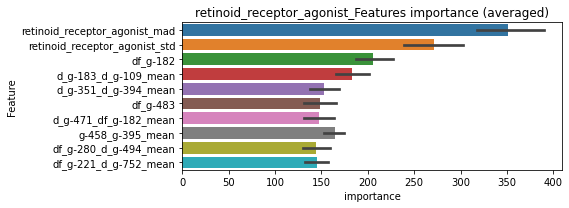

len(train_index) : 2801
len(valid_index) : 934
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135659	valid_1's binary_logloss: 0.0378643
[600]	training's binary_logloss: 0.00162444	valid_1's binary_logloss: 0.0184642
[900]	training's binary_logloss: 0.000695052	valid_1's binary_logloss: 0.0167982
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000691711	valid_1's binary_logloss: 0.0167494


len(train_index) : 2801
len(valid_index) : 934
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128922	valid_1's binary_logloss: 0.0455559
[600]	training's binary_logloss: 0.0015861	valid_1's binary_logloss: 0.0243525
[900]	training's binary_logloss: 0.000693686	valid_1's binary_logloss: 0.0211824
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000683157	valid_1's binary_logloss: 0.0211517


len(train_index) : 2801
len(valid_index) : 934
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131145	valid_1's binary_logloss: 0.0489967
[600]	training's binary_logloss: 0.00158112	valid_1's binary_logloss: 0.0244373
[900]	training's binary_logloss: 0.000692454	valid_1's binary_logloss: 0.0215635
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000696319	valid_1's binary_logloss: 0.0215332


len(train_index) : 2802
len(valid_index) : 933
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137999	valid_1's binary_logloss: 0.0376943
[600]	training's binary_logloss: 0.00161775	valid_1's binary_logloss: 0.0169782
[900]	training's binary_logloss: 0.000704123	valid_1's binary_logloss: 0.0142712
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000703184	valid_1's binary_logloss: 0.0142536


retinoid_receptor_agonist logloss: 0.01842308635492329


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126793	valid_1's binary_logloss: 0.00142144
[600]	training's binary_logloss: 0.000182513	valid_1's binary_logloss: 0.000237798
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000158018	valid_1's binary_logloss: 0.000207434
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127121	valid_1's binary_logloss: 0.00225395
[600]	training's binary_logloss: 0.000182246	valid_1's binary_logloss: 0.000572845
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000159065	valid_1's binary_logloss: 0.00053164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127255	valid_1's binary_logloss: 0.00151628
[600]	training's binary_logloss: 0.000182792	valid_1's binary_logloss: 0.000284003
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.00015772	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0004683, Threshold: 0.0031474, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00220, conf_1:0.00409
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0031474
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0531474
threshold: 0.0531474, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000157634	valid_1's binary_logloss: 0.00021075


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012147	valid_1's binary_logloss: 0.00134867
[600]	training's binary_logloss: 0.00016831	valid_1's binary_logloss: 0.000207334
[900]	training's binary_logloss: 0.00013975	valid_1's binary_logloss: 0.000173682
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000138928	valid_1's binary_logloss: 0.000172787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121027	valid_1's binary_logloss: 0.00290265
[600]	training's binary_logloss: 0.000168714	valid_1's binary_logloss: 0.0014933
[900]	training's binary_logloss: 0.000140064	valid_1's binary_logloss: 0.00142723
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000140339	valid_1's binary_logloss: 0.00142662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122619	valid_1's binary_logloss: 0.00135683
[600]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0551783, Threshold: 0.0531474, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00025, Num_p_label: 19.0, conf_0:0.04252, conf_1:0.06378
Num_p_label: 19.0, Expected: 1.0, Adj_threshold_1: 0.0531474
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_2: 0.1031474
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_3: 0.1531474
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.2031474
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_5: 0.2531474
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.3031474
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_7: 0.3531474
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_8: 0.4031474
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.4531474
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.5031474
threshold: 0.5531474, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= 

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012147	valid_1's binary_logloss: 0.00134867
[600]	training's binary_logloss: 0.00016831	valid_1's binary_logloss: 0.000207334
[900]	training's binary_logloss: 0.00013975	valid_1's binary_logloss: 0.000173682
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000138928	valid_1's binary_logloss: 0.000172787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121027	valid_1's binary_logloss: 0.00290265
[600]	training's binary_logloss: 0.000168714	valid_1's binary_logloss: 0.0014933
[900]	training's binary_logloss: 0.000140064	valid_1's binary_logloss: 0.00142723
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000140339	valid_1's binary_logloss: 0.00142662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122619	valid_1's binary_logloss: 0.00135683
[600]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.0551783, Threshold: 0.5531474, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00025, Num_p_label: 4.0, conf_0:0.49783, conf_1:0.60846
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.5531474
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.6031474
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.6531474
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_4: 0.7031474
threshold: 0.7031474, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


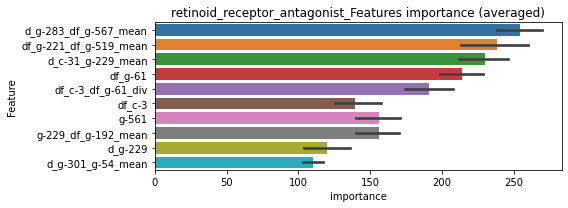

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012097	valid_1's binary_logloss: 0.00139374
[600]	training's binary_logloss: 0.00016822	valid_1's binary_logloss: 0.00022483


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000141964	valid_1's binary_logloss: 0.000192313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120921	valid_1's binary_logloss: 0.00257465
[600]	training's binary_logloss: 0.000168314	valid_1's binary_logloss: 0.00116388


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000140171	valid_1's binary_logloss: 0.00108989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122821	valid_1's binary_logloss: 0.00138526
[600]	training's binary_logloss: 0.000168575	valid_1's binary_logloss: 0.000215069


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000140386	valid_1's binary_logloss: 0.000181821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121126	valid_1's binary_logloss: 0.00127647
[600]	training's binary_logloss: 0.000168173	valid_1's binary_logloss: 0.000186201
[900]	training's binary_logloss: 0.000139914	valid_1's binary_logloss: 0.000155285


retinoid_receptor_antagonist logloss: 0.00040459811844157154


Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000138608	valid_1's binary_logloss: 0.000153856
neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283, target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00817379	valid_1's binary_logloss: 0.0252381
[600]	training's binary_logloss: 0.00103099	valid_1's binary_logloss: 0.0117029
[900]	training's binary_logloss: 0.00048393	valid_1's binary_logloss: 0.00999585
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000472831	valid_1's binary_logloss: 0.00996171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772014	valid_1's binary_logloss: 0.0348226
[600]	training's binary_logloss: 0.000982597	valid_1's binary_logloss: 0.0232222
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00076001	valid_1's binary_logloss: 0.0227156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0080085	valid_1's binary_logloss: 0.0192734
[600]	training's binary_logloss: 0.00101034	valid_1's binary_logloss: 0.00536786
[900]	training's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0064952, Threshold: 0.0299999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00147, Num_p_label: 40.0, conf_0:0.02100, conf_1:0.03900
Num_p_label: 40.0, Expected: 5.9, Adj_threshold_1: 0.0299999
Num_p_label: 17.0, Expected: 5.9, Adj_threshold_2: 0.0799999
Num_p_label: 7.0, Expected: 5.9, Adj_threshold_3: 0.1299999
threshold: 0.1299999, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00715691	valid_1's binary_logloss: 0.021234
[600]	training's binary_logloss: 0.000918602	valid_1's binary_logloss: 0.0113689
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000464406	valid_1's binary_logloss: 0.0103971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00687032	valid_1's binary_logloss: 0.0186058
[600]	training's binary_logloss: 0.000891465	valid_1's binary_logloss: 0.00628792
[900]	training's binary_logloss: 0.000440012	valid_1's binary_logloss: 0.00473362
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000426722	valid_1's binary_logloss: 0.00470948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00668664	valid_1's binary_logloss: 0.0318975
[600]	training's binary_logloss: 0.000880609	valid_1's binary_logloss: 0.0206241
Early stopping, bes

2 / 3 AUC score:1.000
y_Threshold: 0.0601790, Threshold: 0.1299999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0102963 Vs.target_rate: 0.00147, Num_p_label: 41.0, conf_0:0.10400, conf_1:0.15600
Num_p_label: 41.0, Expected: 5.9, Adj_threshold_1: 0.1299999
Num_p_label: 29.0, Expected: 5.9, Adj_threshold_2: 0.1799999
Num_p_label: 22.0, Expected: 5.9, Adj_threshold_3: 0.2299999
Num_p_label: 18.0, Expected: 5.9, Adj_threshold_4: 0.2799999
Num_p_label: 17.0, Expected: 5.9, Adj_threshold_5: 0.3299999
Num_p_label: 16.0, Expected: 5.9, Adj_threshold_6: 0.3799999
Num_p_label: 12.0, Expected: 5.9, Adj_threshold_7: 0.4299999
threshold: 0.4299999, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3793, y_label_rate: 0.1711047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640303	valid_1's binary_logloss: 0.0344915
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.0015722	valid_1's binary_logloss: 0.0286312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00643286	valid_1's binary_logloss: 0.024123
[600]	training's binary_logloss: 0.000850445	valid_1's binary_logloss: 0.0102374
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000449954	valid_1's binary_logloss: 0.00833894
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00656548	valid_1's binary_logloss: 0.0164168
[600]	training's binary_logloss: 0.000860787	valid_1's binary_logloss: 0.00607735
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000489101	valid_1's binary_logloss: 0.005227
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3 AUC score:0.999
y_Threshold: 0.0622037, Threshold: 0.4299999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3785
p_label_rate: 0.0045203 Vs.target_rate: 0.00147, Num_p_label: 18.0, conf_0:0.38700, conf_1:0.47300
Num_p_label: 18.0, Expected: 5.9, Adj_threshold_1: 0.4299999
Num_p_label: 15.0, Expected: 5.9, Adj_threshold_2: 0.4799999
Num_p_label: 14.0, Expected: 5.9, Adj_threshold_3: 0.5299999
threshold: 0.5299999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3785, y_label_rate: 0.1704095


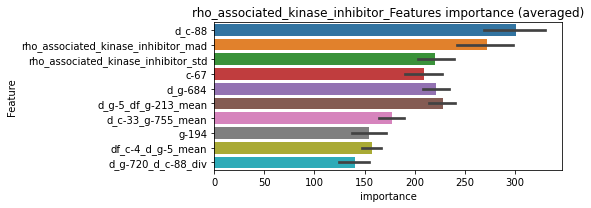

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0064193	valid_1's binary_logloss: 0.0160317
[600]	training's binary_logloss: 0.000836663	valid_1's binary_logloss: 0.00618566
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000510847	valid_1's binary_logloss: 0.00528284


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613177	valid_1's binary_logloss: 0.0241817
[600]	training's binary_logloss: 0.000800275	valid_1's binary_logloss: 0.0138779
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000684527	valid_1's binary_logloss: 0.0136719


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0064131	valid_1's binary_logloss: 0.0161528
[600]	training's binary_logloss: 0.000835289	valid_1's binary_logloss: 0.00516079
[900]	training's binary_logloss: 0.000431354	valid_1's binary_logloss: 0.00377783
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000417025	valid_1's binary_logloss: 0.0037283


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00636197	valid_1's binary_logloss: 0.022552
[600]	training's binary_logloss: 0.000820393	valid_1's binary_logloss: 0.0080791
[900]	training's binary_logloss: 0.000418044	valid_1's binary_logloss: 0.00610822
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000416477	valid_1's binary_logloss: 0.00609816


rho_associated_kinase_inhibitor logloss: 0.007200100380396365


neg labels: 3289 → selected neg labels: 3284


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3284, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00843507	valid_1's binary_logloss: 0.0409893
[600]	training's binary_logloss: 0.00110963	valid_1's binary_logloss: 0.0243464
[900]	training's binary_logloss: 0.00052658	valid_1's binary_logloss: 0.0220651
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000538259	valid_1's binary_logloss: 0.0220612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00877749	valid_1's binary_logloss: 0.024922
[600]	training's binary_logloss: 0.00113993	valid_1's binary_logloss: 0.0107294
[900]	training's binary_logloss: 0.000541011	valid_1's binary_logloss: 0.00928744
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000524316	valid_1's binary_logloss: 0.00927516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0087737	valid_1's binary_logloss: 0.0327807
[600]	training's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0066409, Threshold: 0.0393553, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.02755, conf_1:0.05116
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0393553
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_2: 0.0893553
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_3: 0.1393553
threshold: 0.1393553, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00785765	valid_1's binary_logloss: 0.0378288
[600]	training's binary_logloss: 0.00100383	valid_1's binary_logloss: 0.0222374
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000927866	valid_1's binary_logloss: 0.0218324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0079984	valid_1's binary_logloss: 0.0225783
[600]	training's binary_logloss: 0.00102828	valid_1's binary_logloss: 0.00989948
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.00057214	valid_1's binary_logloss: 0.00873885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779878	valid_1's binary_logloss: 0.0318845
[600]	training's binary_logloss: 0.00101669	valid_1's binary_logloss: 0.0151497
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000514937	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0619607, Threshold: 0.1393553, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0115520 Vs.target_rate: 0.00155, Num_p_label: 46.0, conf_0:0.11148, conf_1:0.16723
Num_p_label: 46.0, Expected: 6.2, Adj_threshold_1: 0.1393553
Num_p_label: 32.0, Expected: 6.2, Adj_threshold_2: 0.1893553
Num_p_label: 29.0, Expected: 6.2, Adj_threshold_3: 0.2393553
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_4: 0.2893553
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_5: 0.3393553
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_6: 0.3893553
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_7: 0.4393553
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_8: 0.4893553
threshold: 0.4893553, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00736697	valid_1's binary_logloss: 0.0321856
[600]	training's binary_logloss: 0.000966275	valid_1's binary_logloss: 0.0192739
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000742815	valid_1's binary_logloss: 0.0187396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00746772	valid_1's binary_logloss: 0.029463
[600]	training's binary_logloss: 0.0009794	valid_1's binary_logloss: 0.0152667
[900]	training's binary_logloss: 0.000488	valid_1's binary_logloss: 0.0131824
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000500003	valid_1's binary_logloss: 0.0131624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00755574	valid_1's binary_logloss: 0.0266146
[600]	training's binary_logloss: 0.000990562	valid_1's binary_logloss: 0.0151274
Early stopping, best iterat

3 / 3 AUC score:1.000
y_Threshold: 0.0535359, Threshold: 0.4893553, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 644.0/3784
p_label_rate: 0.0047715 Vs.target_rate: 0.00155, Num_p_label: 19.0, conf_0:0.44042, conf_1:0.53829
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_1: 0.4893553
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_2: 0.5393553
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.5893553
threshold: 0.5893553, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3784, y_label_rate: 0.1701903


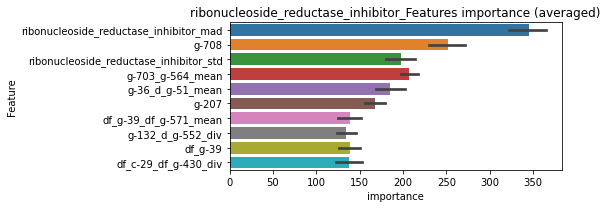

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00689169	valid_1's binary_logloss: 0.0244296
[600]	training's binary_logloss: 0.000912829	valid_1's binary_logloss: 0.0110704
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000495439	valid_1's binary_logloss: 0.00971947


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00714536	valid_1's binary_logloss: 0.0236809
[600]	training's binary_logloss: 0.000946184	valid_1's binary_logloss: 0.0116778
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.00057762	valid_1's binary_logloss: 0.0101687


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00707553	valid_1's binary_logloss: 0.0231247
[600]	training's binary_logloss: 0.00093056	valid_1's binary_logloss: 0.00871772
[900]	training's binary_logloss: 0.000477726	valid_1's binary_logloss: 0.00660221
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000470128	valid_1's binary_logloss: 0.00655313


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00704283	valid_1's binary_logloss: 0.0440835


ribonucleoside_reductase_inhibitor logloss: 0.016314883725605446


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.00131284	valid_1's binary_logloss: 0.0387883


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00532437	valid_1's binary_logloss: 0.0135082
[600]	training's binary_logloss: 0.000698095	valid_1's binary_logloss: 0.00630896
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000392948	valid_1's binary_logloss: 0.00577863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00539218	valid_1's binary_logloss: 0.0141588
[600]	training's binary_logloss: 0.000707807	valid_1's binary_logloss: 0.00385388
[900]	training's binary_logloss: 0.000391965	valid_1's binary_logloss: 0.00279009
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000391965	valid_1's binary_logloss: 0.00279009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558687	valid_1's binary_logloss: 0.0115381
[600]	training's binary_logloss: 0.000714779	valid_1's binary_logloss: 0.00279128
[900]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0031277, Threshold: 0.0170140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.01191, conf_1:0.02212
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0170140
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_2: 0.0670140
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_3: 0.1170140
threshold: 0.1170140, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0049648	valid_1's binary_logloss: 0.0130384
[600]	training's binary_logloss: 0.000650569	valid_1's binary_logloss: 0.00642246
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000443344	valid_1's binary_logloss: 0.00598269
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492573	valid_1's binary_logloss: 0.0132718
[600]	training's binary_logloss: 0.000645276	valid_1's binary_logloss: 0.00368687
[900]	training's binary_logloss: 0.000372477	valid_1's binary_logloss: 0.0026672
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000368345	valid_1's binary_logloss: 0.00265178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505763	valid_1's binary_logloss: 0.00937976
[600]	training's binary_logloss: 0.0006472	valid_1's binary_logloss: 0.00184825
[900]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0344781, Threshold: 0.1170140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0060271 Vs.target_rate: 0.00105, Num_p_label: 24.0, conf_0:0.09361, conf_1:0.14042
Num_p_label: 24.0, Expected: 4.2, Adj_threshold_1: 0.1170140
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_2: 0.1670140
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_3: 0.2170140
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_4: 0.2670140
threshold: 0.2670140, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00483672	valid_1's binary_logloss: 0.0190264
[600]	training's binary_logloss: 0.000634644	valid_1's binary_logloss: 0.00946991
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000404702	valid_1's binary_logloss: 0.00840632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486857	valid_1's binary_logloss: 0.00851507
[600]	training's binary_logloss: 0.00065163	valid_1's binary_logloss: 0.00176566
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000371095	valid_1's binary_logloss: 0.00118878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498205	valid_1's binary_logloss: 0.0114805
[600]	training's binary_logloss: 0.000643121	valid_1's binary_logloss: 0.00328864
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000386052	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0454549, Threshold: 0.2670140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.24031, conf_1:0.29372
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.2670140
threshold: 0.2670140, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


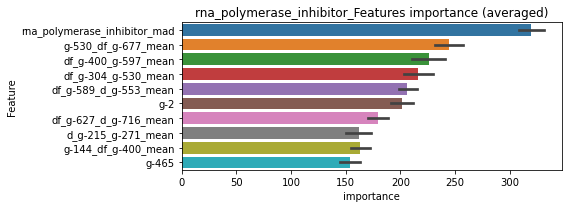

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00482159	valid_1's binary_logloss: 0.0192826
[600]	training's binary_logloss: 0.000632281	valid_1's binary_logloss: 0.00744008
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000377477	valid_1's binary_logloss: 0.00642678


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491288	valid_1's binary_logloss: 0.00875314
[600]	training's binary_logloss: 0.000651144	valid_1's binary_logloss: 0.00181452
[900]	training's binary_logloss: 0.000372112	valid_1's binary_logloss: 0.00126322
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00037219	valid_1's binary_logloss: 0.00126309


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492545	valid_1's binary_logloss: 0.0113146
[600]	training's binary_logloss: 0.000639071	valid_1's binary_logloss: 0.00333713
[900]	training's binary_logloss: 0.000368688	valid_1's binary_logloss: 0.00264394
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000374677	valid_1's binary_logloss: 0.00264006


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487998	valid_1's binary_logloss: 0.0123805
[600]	training's binary_logloss: 0.000637059	valid_1's binary_logloss: 0.00342872
[900]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00268502
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000377245	valid_1's binary_logloss: 0.00268152


rna_polymerase_inhibitor logloss: 0.0032538944479019913


neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249, target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0524919	valid_1's binary_logloss: 0.243235
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.0259259	valid_1's binary_logloss: 0.235363
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0509959	valid_1's binary_logloss: 0.232826
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.019948	valid_1's binary_logloss: 0.223779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0539703	valid_1's binary_logloss: 0.216235
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.0232107	valid_1's binary_logloss: 0.200471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0494493	valid_1's binary_logloss: 0.243856


1 / 3 AUC score:0.907
y_Threshold: 0.0738049, Threshold: 0.3638195, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.0306729	valid_1's binary_logloss: 0.240888


Remove_noisy_data: 387 → Positive_corect_labels: 521/3511
p_label_rate: 0.0100452 Vs.target_rate: 0.00991, Num_p_label: 40.0, conf_0:0.25467, conf_1:0.47297
threshold: 0.3638195, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 521.0/3511, y_label_rate: 0.1483908
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232905	valid_1's binary_logloss: 0.133409
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00828865	valid_1's binary_logloss: 0.122396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236751	valid_1's binary_logloss: 0.1309
[600]	training's binary_logloss: 0.0037777	valid_1's binary_logloss: 0.106557
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.00234018	valid_1's binary_logloss: 0.104793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237497	valid_1's binary_logloss: 0.139426
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00698274	valid_1's binary_logloss: 0.132757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246287	valid_1's binary_logloss: 0.12373
Early stopping, best iterat

2 / 3 AUC score:0.983
y_Threshold: 0.0690505, Threshold: 0.3638195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 465.0/3399
p_label_rate: 0.0261175 Vs.target_rate: 0.00991, Num_p_label: 104.0, conf_0:0.29106, conf_1:0.43658
Num_p_label: 104.0, Expected: 39.5, Adj_threshold_1: 0.3638195
Num_p_label: 86.0, Expected: 39.5, Adj_threshold_2: 0.4138195
Num_p_label: 73.0, Expected: 39.5, Adj_threshold_3: 0.4638195
Num_p_label: 62.0, Expected: 39.5, Adj_threshold_4: 0.5138195
Num_p_label: 55.0, Expected: 39.5, Adj_threshold_5: 0.5638195
threshold: 0.5638195, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 465.0/3399, y_label_rate: 0.1368049
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01557	valid_1's binary_logloss: 0.130569
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00705311	valid_1's binary_logloss: 0.126706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173485	valid_1's binary_logloss: 0.0652056
[600]	training's binary_logloss: 0.00259764	valid_1's binary_logloss: 0.0398123
[900]	training's binary_logloss: 0.00107572	valid_1's binary_logloss: 0.0349306
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000853415	valid_1's binary_logloss: 0.0335772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158599	valid_1's binary_logloss: 0.0812625
[600]	training's binary_logloss: 0.00244844	valid_1's binary_logloss: 0.0648043
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.0014312	valid_1's binary_logloss: 0.063112

3 / 3 AUC score:0.993
y_Threshold: 0.0649059, Threshold: 0.5638195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 431.0/3331
p_label_rate: 0.0276243 Vs.target_rate: 0.00991, Num_p_label: 110.0, conf_0:0.50000, conf_1:0.62020
Num_p_label: 110.0, Expected: 39.5, Adj_threshold_1: 0.5638195
Num_p_label: 100.0, Expected: 39.5, Adj_threshold_2: 0.6138195
Num_p_label: 90.0, Expected: 39.5, Adj_threshold_3: 0.6638195
Num_p_label: 75.0, Expected: 39.5, Adj_threshold_4: 0.7138195
Num_p_label: 59.0, Expected: 39.5, Adj_threshold_5: 0.7638195
threshold: 0.7638195, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 431.0/3331, y_label_rate: 0.1293906


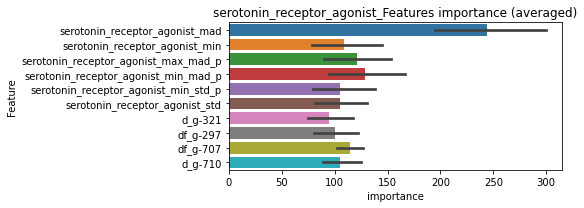

len(train_index) : 2498
len(valid_index) : 833
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113461	valid_1's binary_logloss: 0.0617288
[600]	training's binary_logloss: 0.00179378	valid_1's binary_logloss: 0.0458153
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00130675	valid_1's binary_logloss: 0.04414


len(train_index) : 2498
len(valid_index) : 833
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011492	valid_1's binary_logloss: 0.0804064
[600]	training's binary_logloss: 0.0017486	valid_1's binary_logloss: 0.0658374
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.0017364	valid_1's binary_logloss: 0.0657508


len(train_index) : 2498
len(valid_index) : 833
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115946	valid_1's binary_logloss: 0.091285
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00222696	valid_1's binary_logloss: 0.0765041


len(train_index) : 2499
len(valid_index) : 832
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115545	valid_1's binary_logloss: 0.08533
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.0028469	valid_1's binary_logloss: 0.0788348


serotonin_receptor_agonist logloss: 0.06630366743371487


neg labels: 3289 → selected neg labels: 3239


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3239, target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0965594	valid_1's binary_logloss: 0.368097
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.0783822	valid_1's binary_logloss: 0.367088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.101967	valid_1's binary_logloss: 0.364826
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0900739	valid_1's binary_logloss: 0.363935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.102569	valid_1's binary_logloss: 0.345302
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.0747619	valid_1's binary_logloss: 0.341758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0973377	valid_1's binary_logloss: 0.363585


1 / 3 AUC score:0.771
y_Threshold: 0.1340563, Threshold: 0.5448566, pos_neg_ratio: 0.8000000
Remove_noisy_data: 679 → Positive_corect_labels: 373/3207
p_label_rate: 0.0100452 Vs.target_rate: 0.01696, Num_p_label: 40.0, conf_0:0.38140, conf_1:0.70831
Num_p_label: 40.0, Expected: 67.6, Adj_threshold_1: 0.5448566
Num_p_label: 47.0, Expected: 67.6, Adj_threshold_2: 0.5148566
threshold: 0.5148566, positive_p_label: 47.0/3982, p_label_rate: 0.0118031


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0899843	valid_1's binary_logloss: 0.36267


positive_y_label: 373.0/3207, y_label_rate: 0.1163081
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256903	valid_1's binary_logloss: 0.177285
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0228614	valid_1's binary_logloss: 0.177044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024504	valid_1's binary_logloss: 0.196242
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.021267	valid_1's binary_logloss: 0.195176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253613	valid_1's binary_logloss: 0.176571
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.0200337	valid_1's binary_logloss: 0.175251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.028017	valid_1's binary_logloss: 0.163739
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.0166062	valid_1's binary_logloss: 0.15

2 / 3 AUC score:0.940
y_Threshold: 0.0858170, Threshold: 0.5148566, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 288.0/3037
p_label_rate: 0.0416876 Vs.target_rate: 0.01696, Num_p_label: 166.0, conf_0:0.41189, conf_1:0.61783
Num_p_label: 166.0, Expected: 67.6, Adj_threshold_1: 0.5148566
Num_p_label: 156.0, Expected: 67.6, Adj_threshold_2: 0.5648566
Num_p_label: 149.0, Expected: 67.6, Adj_threshold_3: 0.6148566
Num_p_label: 133.0, Expected: 67.6, Adj_threshold_4: 0.6648566
Num_p_label: 114.0, Expected: 67.6, Adj_threshold_5: 0.7148566
Num_p_label: 96.0, Expected: 67.6, Adj_threshold_6: 0.7648566
threshold: 0.7648566, positive_p_label: 96.0/3982, p_label_rate: 0.0241085
positive_y_label: 288.0/3037, y_label_rate: 0.0948304
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115703	valid_1's binary_logloss: 0.128588
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.0101668	valid_1's binary_logloss: 0.128182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118647	valid_1's binary_logloss: 0.0934761
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00484439	valid_1's binary_logloss: 0.0900924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011824	valid_1's binary_logloss: 0.104073
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00508304	valid_1's binary_logloss: 0.100816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133519	valid_1's binary_logloss: 0.0766887
[600]	training's binary_logloss: 0.00214503	valid_1's binary_logloss: 0.0600227
Early stopping, best 

3 / 3 AUC score:0.985
y_Threshold: 0.0614817, Threshold: 0.7648566, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 256.0/2973
p_label_rate: 0.0434455 Vs.target_rate: 0.01696, Num_p_label: 173.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 173.0, Expected: 67.6, Adj_threshold_1: 0.7648566
threshold: 0.7648566, positive_p_label: 173.0/3982, p_label_rate: 0.0434455
positive_y_label: 256.0/2973, y_label_rate: 0.0861083


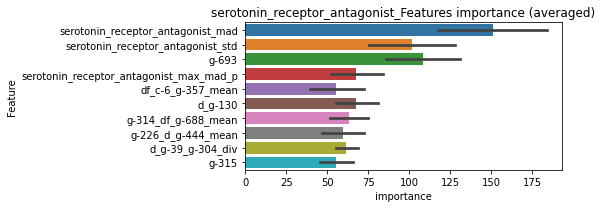

len(train_index) : 2229
len(valid_index) : 744
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00834029	valid_1's binary_logloss: 0.063842
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.0016158	valid_1's binary_logloss: 0.053732


len(train_index) : 2230
len(valid_index) : 743
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00763016	valid_1's binary_logloss: 0.102831


len(train_index) : 2230
len(valid_index) : 743
================================= fold 3/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00537414	valid_1's binary_logloss: 0.102002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819897	valid_1's binary_logloss: 0.0516035


len(train_index) : 2230
len(valid_index) : 743


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00195723	valid_1's binary_logloss: 0.0419317


================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0082377	valid_1's binary_logloss: 0.0900054


serotonin_receptor_antagonist logloss: 0.0716678781559296


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.00699807	valid_1's binary_logloss: 0.0890303
neg labels: 3289 → selected neg labels: 3285


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285, target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109624	valid_1's binary_logloss: 0.0426428
[600]	training's binary_logloss: 0.00139515	valid_1's binary_logloss: 0.0220567
[900]	training's binary_logloss: 0.000622509	valid_1's binary_logloss: 0.0191247
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000605954	valid_1's binary_logloss: 0.0190672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104555	valid_1's binary_logloss: 0.039387
[600]	training's binary_logloss: 0.00137077	valid_1's binary_logloss: 0.0198554
[900]	training's binary_logloss: 0.000623517	valid_1's binary_logloss: 0.0166829
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000573623	valid_1's binary_logloss: 0.0165094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112302	valid_1's binary_logloss: 0.0308987
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0083138, Threshold: 0.0631146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00185, Num_p_label: 40.0, conf_0:0.04418, conf_1:0.08205
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_1: 0.0631146
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_2: 0.1131146
Num_p_label: 17.0, Expected: 7.4, Adj_threshold_3: 0.1631146
threshold: 0.1631146, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00951678	valid_1's binary_logloss: 0.0388354
[600]	training's binary_logloss: 0.00121993	valid_1's binary_logloss: 0.0188602
[900]	training's binary_logloss: 0.0005645	valid_1's binary_logloss: 0.0159426
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000541397	valid_1's binary_logloss: 0.0158922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00978735	valid_1's binary_logloss: 0.0295901
[600]	training's binary_logloss: 0.00124942	valid_1's binary_logloss: 0.0157129
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000629874	valid_1's binary_logloss: 0.0141266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00998009	valid_1's binary_logloss: 0.0253977
[600]	training's binary_logloss: 0.00128773	valid_1's binary_logloss: 0.00742351
[900]	training's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0891578, Threshold: 0.1631146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0233551 Vs.target_rate: 0.00185, Num_p_label: 93.0, conf_0:0.13049, conf_1:0.19574
Num_p_label: 93.0, Expected: 7.4, Adj_threshold_1: 0.1631146
Num_p_label: 78.0, Expected: 7.4, Adj_threshold_2: 0.2131146
Num_p_label: 65.0, Expected: 7.4, Adj_threshold_3: 0.2631146
Num_p_label: 52.0, Expected: 7.4, Adj_threshold_4: 0.3131146
Num_p_label: 43.0, Expected: 7.4, Adj_threshold_5: 0.3631146
Num_p_label: 32.0, Expected: 7.4, Adj_threshold_6: 0.4131146
Num_p_label: 29.0, Expected: 7.4, Adj_threshold_7: 0.4631146
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_8: 0.5131146
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_9: 0.5631146
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_10: 0.6131146
threshold: 0.6131146, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 650.0/3796, y_label_rate: 0.1712329
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00904097	valid_1's binary_logloss: 0.0392318
[600]	training's binary_logloss: 0.00116353	valid_1's binary_logloss: 0.0187595
[900]	training's binary_logloss: 0.000555465	valid_1's binary_logloss: 0.0156103
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000562144	valid_1's binary_logloss: 0.0156007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0090522	valid_1's binary_logloss: 0.0276606
[600]	training's binary_logloss: 0.00117962	valid_1's binary_logloss: 0.0107647
[900]	training's binary_logloss: 0.000562683	valid_1's binary_logloss: 0.00825948
Early stopping, best iteration is:
[1137]	training's binary_logloss: 0.00050008	valid_1's binary_logloss: 0.00794549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00925825	valid_1's binary_logloss: 0.0267136
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.1472648, Threshold: 0.6131146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0065294 Vs.target_rate: 0.00185, Num_p_label: 26.0, conf_0:0.50000, conf_1:0.67443
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_1: 0.6131146
Num_p_label: 21.0, Expected: 7.4, Adj_threshold_2: 0.6631146
Num_p_label: 19.0, Expected: 7.4, Adj_threshold_3: 0.7131146
Num_p_label: 14.0, Expected: 7.4, Adj_threshold_4: 0.7631146
threshold: 0.7631146, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


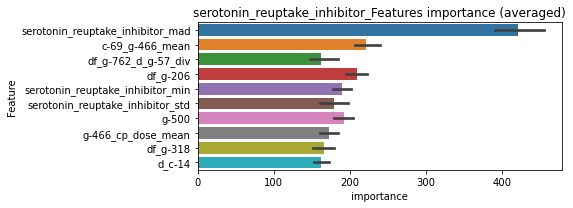

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931803	valid_1's binary_logloss: 0.0317032
[600]	training's binary_logloss: 0.00115943	valid_1's binary_logloss: 0.0112816
[900]	training's binary_logloss: 0.000559945	valid_1's binary_logloss: 0.00910832
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000561824	valid_1's binary_logloss: 0.00907166


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00924331	valid_1's binary_logloss: 0.0391423
[600]	training's binary_logloss: 0.00117995	valid_1's binary_logloss: 0.0263734
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00113675	valid_1's binary_logloss: 0.0262349


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00895209	valid_1's binary_logloss: 0.0334083
[600]	training's binary_logloss: 0.00117424	valid_1's binary_logloss: 0.0180324
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000760802	valid_1's binary_logloss: 0.0169553


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00916465	valid_1's binary_logloss: 0.0341843
[600]	training's binary_logloss: 0.00117121	valid_1's binary_logloss: 0.0165872
[900]	training's binary_logloss: 0.000564596	valid_1's binary_logloss: 0.0136294
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000531995	valid_1's binary_logloss: 0.0134703


serotonin_reuptake_inhibitor logloss: 0.016433030168532807


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00767237	valid_1's binary_logloss: 0.0270688
[600]	training's binary_logloss: 0.00100484	valid_1's binary_logloss: 0.0129383
[900]	training's binary_logloss: 0.000496153	valid_1's binary_logloss: 0.0113408
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000478755	valid_1's binary_logloss: 0.011279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00805168	valid_1's binary_logloss: 0.0232641
[600]	training's binary_logloss: 0.00103921	valid_1's binary_logloss: 0.0106611
[900]	training's binary_logloss: 0.000512028	valid_1's binary_logloss: 0.00925122
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000521084	valid_1's binary_logloss: 0.00920508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00842787	valid_1's binary_logloss: 0.0324761
[600]	training's binar

1 / 3 AUC score:0.999
y_Threshold: 0.0055161, Threshold: 0.0334207, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.02339, conf_1:0.04345
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0334207
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.0834207
threshold: 0.0834207, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00675878	valid_1's binary_logloss: 0.0313049
[600]	training's binary_logloss: 0.000889644	valid_1's binary_logloss: 0.024098
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000916434	valid_1's binary_logloss: 0.0240062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00694449	valid_1's binary_logloss: 0.0282387
[600]	training's binary_logloss: 0.00091009	valid_1's binary_logloss: 0.0158338
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000491614	valid_1's binary_logloss: 0.014578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00679988	valid_1's binary_logloss: 0.0313227
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.0012172	valid_1's binary_logloss: 0.0254811
Training until validation scores don't improve for 30 rounds
[300]	train

2 / 3 AUC score:0.999
y_Threshold: 0.0447282, Threshold: 0.0834207, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0183325 Vs.target_rate: 0.00151, Num_p_label: 73.0, conf_0:0.06674, conf_1:0.10010
Num_p_label: 73.0, Expected: 6.0, Adj_threshold_1: 0.0834207
Num_p_label: 49.0, Expected: 6.0, Adj_threshold_2: 0.1334207
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_3: 0.1834207
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_4: 0.2334207
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_5: 0.2834207
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_6: 0.3334207
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_7: 0.3834207
threshold: 0.3834207, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3789, y_label_rate: 0.1707575
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641569	valid_1's binary_logloss: 0.0240487
[600]	training's binary_logloss: 0.000850818	valid_1's binary_logloss: 0.011961
[900]	training's binary_logloss: 0.000444681	valid_1's binary_logloss: 0.0104806
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000449682	valid_1's binary_logloss: 0.0104609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613637	valid_1's binary_logloss: 0.0195961
[600]	training's binary_logloss: 0.000839703	valid_1's binary_logloss: 0.00934172
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000502118	valid_1's binary_logloss: 0.00844865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649945	valid_1's binary_logloss: 0.0170719
[600]	training's binary_logloss: 0.000867168	valid_1's binary_logloss: 0.00529161
Early stopping, bes

3 / 3 AUC score:1.000
y_Threshold: 0.0531877, Threshold: 0.3834207, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 646.0/3787
p_label_rate: 0.0055249 Vs.target_rate: 0.00151, Num_p_label: 22.0, conf_0:0.34508, conf_1:0.42176
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.3834207
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_2: 0.4334207
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_3: 0.4834207
threshold: 0.4834207, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 646.0/3787, y_label_rate: 0.1705836


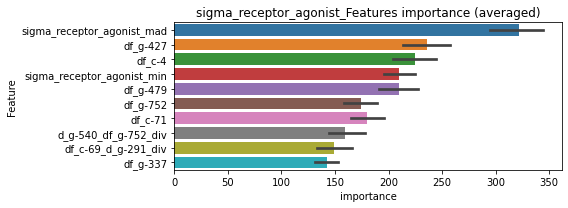

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630016	valid_1's binary_logloss: 0.0360945
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000941594	valid_1's binary_logloss: 0.0274573


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00648428	valid_1's binary_logloss: 0.0177488
[600]	training's binary_logloss: 0.00086376	valid_1's binary_logloss: 0.00565496
[900]	training's binary_logloss: 0.000453732	valid_1's binary_logloss: 0.00432613
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000448234	valid_1's binary_logloss: 0.00431476


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638022	valid_1's binary_logloss: 0.0306353


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00195499	valid_1's binary_logloss: 0.0269311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00674759	valid_1's binary_logloss: 0.0243103
[600]	training's binary_logloss: 0.000865649	valid_1's binary_logloss: 0.0108353
[900]	training's binary_logloss: 0.000458688	valid_1's binary_logloss: 0.00926524
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000465366	valid_1's binary_logloss: 0.00926444


sigma_receptor_agonist logloss: 0.016995059380580307


neg labels: 3289 → selected neg labels: 3285


sigma_receptor_antagonist, len(trt): 36, len(othr): 3285, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00872498	valid_1's binary_logloss: 0.0297556
[600]	training's binary_logloss: 0.00108159	valid_1's binary_logloss: 0.0105902
[900]	training's binary_logloss: 0.000509306	valid_1's binary_logloss: 0.00754367
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000507975	valid_1's binary_logloss: 0.0075362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00829109	valid_1's binary_logloss: 0.0363412
[600]	training's binary_logloss: 0.00104436	valid_1's binary_logloss: 0.0180055
[900]	training's binary_logloss: 0.00050844	valid_1's binary_logloss: 0.0152806
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000492739	valid_1's binary_logloss: 0.0152258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00869655	valid_1's binary_logloss: 0.0205669
[600]	training's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0057941, Threshold: 0.0259028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01813, conf_1:0.03367
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0259028
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.0759028
threshold: 0.0759028, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00820532	valid_1's binary_logloss: 0.0260718
[600]	training's binary_logloss: 0.000995339	valid_1's binary_logloss: 0.00941127
[900]	training's binary_logloss: 0.000488987	valid_1's binary_logloss: 0.00694364
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.00047162	valid_1's binary_logloss: 0.00688442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0078072	valid_1's binary_logloss: 0.029263
[600]	training's binary_logloss: 0.000970597	valid_1's binary_logloss: 0.014459
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000538736	valid_1's binary_logloss: 0.0129935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775925	valid_1's binary_logloss: 0.0224649
[600]	training's binary_logloss: 0.000959334	valid_1's binary_logloss: 0.00612258
[900]	training's bina

2 / 3 AUC score:1.000
y_Threshold: 0.1644689, Threshold: 0.0759028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0135610 Vs.target_rate: 0.00151, Num_p_label: 54.0, conf_0:0.06072, conf_1:0.09108
Num_p_label: 54.0, Expected: 6.0, Adj_threshold_1: 0.0759028
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_2: 0.1259028
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_3: 0.1759028
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_4: 0.2259028
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_5: 0.2759028
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_6: 0.3259028
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_7: 0.3759028
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_8: 0.4259028
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_9: 0.4759028
threshold: 0.4759028, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00760096	valid_1's binary_logloss: 0.02363
[600]	training's binary_logloss: 0.000944482	valid_1's binary_logloss: 0.00742428
[900]	training's binary_logloss: 0.000474091	valid_1's binary_logloss: 0.00544838
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000454794	valid_1's binary_logloss: 0.00536927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0077594	valid_1's binary_logloss: 0.0257606
[600]	training's binary_logloss: 0.000953804	valid_1's binary_logloss: 0.0102394
[900]	training's binary_logloss: 0.000477409	valid_1's binary_logloss: 0.00891521
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000483175	valid_1's binary_logloss: 0.00886578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711368	valid_1's binary_logloss: 0.0347711
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1238137, Threshold: 0.4759028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0050226 Vs.target_rate: 0.00151, Num_p_label: 20.0, conf_0:0.42831, conf_1:0.52349
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_1: 0.4759028
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.5259028
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.5759028
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.6259028
threshold: 0.6259028, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


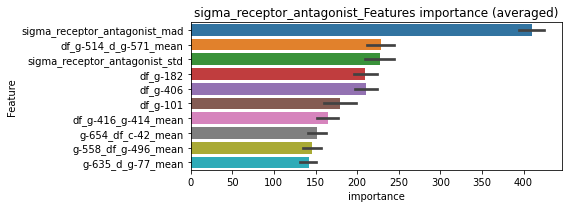

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00751898	valid_1's binary_logloss: 0.0265883
[600]	training's binary_logloss: 0.000938619	valid_1's binary_logloss: 0.00859951
[900]	training's binary_logloss: 0.000474893	valid_1's binary_logloss: 0.00615014
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000452289	valid_1's binary_logloss: 0.00605633


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00736325	valid_1's binary_logloss: 0.0271546
[600]	training's binary_logloss: 0.000921136	valid_1's binary_logloss: 0.0119293
[900]	training's binary_logloss: 0.000475611	valid_1's binary_logloss: 0.0100648
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00047484	valid_1's binary_logloss: 0.0100574


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00714177	valid_1's binary_logloss: 0.0226767
[600]	training's binary_logloss: 0.000924136	valid_1's binary_logloss: 0.00909824
[900]	training's binary_logloss: 0.000480385	valid_1's binary_logloss: 0.00750499
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000462444	valid_1's binary_logloss: 0.0073395


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00715699	valid_1's binary_logloss: 0.0222604
[600]	training's binary_logloss: 0.00091817	valid_1's binary_logloss: 0.00828964
[900]	training's binary_logloss: 0.000472559	valid_1's binary_logloss: 0.00643764
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000469974	valid_1's binary_logloss: 0.00642822


sigma_receptor_antagonist logloss: 0.007472121754570877


neg labels: 3289 → selected neg labels: 3285


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00683298	valid_1's binary_logloss: 0.0217094
[600]	training's binary_logloss: 0.000800694	valid_1's binary_logloss: 0.00869835
[900]	training's binary_logloss: 0.000410104	valid_1's binary_logloss: 0.00702532
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000410104	valid_1's binary_logloss: 0.00702532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651861	valid_1's binary_logloss: 0.0189691
[600]	training's binary_logloss: 0.000790182	valid_1's binary_logloss: 0.00601992
[900]	training's binary_logloss: 0.000403263	valid_1's binary_logloss: 0.00445591
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000404406	valid_1's binary_logloss: 0.00444439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00710091	valid_1's binary_logloss: 0.0150332
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0041593, Threshold: 0.0177600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.01243, conf_1:0.02309
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0177600
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0677600
threshold: 0.0677600, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593329	valid_1's binary_logloss: 0.0195374
[600]	training's binary_logloss: 0.000708581	valid_1's binary_logloss: 0.00799503
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.00042594	valid_1's binary_logloss: 0.00642156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580559	valid_1's binary_logloss: 0.017545
[600]	training's binary_logloss: 0.000713371	valid_1's binary_logloss: 0.00539043
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000386178	valid_1's binary_logloss: 0.0040945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00578853	valid_1's binary_logloss: 0.011147
[600]	training's binary_logloss: 0.000714054	valid_1's binary_logloss: 0.00292075
[900]	training's binary_logloss: 0.00038426	valid_1's binary_logloss: 0.00212793
Early stopping, best

2 / 3 AUC score:1.000
y_Threshold: 0.0950571, Threshold: 0.0677600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0113009 Vs.target_rate: 0.00105, Num_p_label: 45.0, conf_0:0.05421, conf_1:0.08131
Num_p_label: 45.0, Expected: 4.2, Adj_threshold_1: 0.0677600
Num_p_label: 32.0, Expected: 4.2, Adj_threshold_2: 0.1177600
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_3: 0.1677600
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_4: 0.2177600
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_5: 0.2677600
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_6: 0.3177600
threshold: 0.3177600, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593329	valid_1's binary_logloss: 0.0195374
[600]	training's binary_logloss: 0.000708581	valid_1's binary_logloss: 0.00799503
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.00042594	valid_1's binary_logloss: 0.00642156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580559	valid_1's binary_logloss: 0.017545
[600]	training's binary_logloss: 0.000713371	valid_1's binary_logloss: 0.00539043
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000386178	valid_1's binary_logloss: 0.0040945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00578853	valid_1's binary_logloss: 0.011147
[600]	training's binary_logloss: 0.000714054	valid_1's binary_logloss: 0.00292075
[900]	training's binary_logloss: 0.00038426	valid_1's binary_logloss: 0.00212793
Early stopping, best

3 / 3 AUC score:1.000
y_Threshold: 0.0950571, Threshold: 0.3177600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00105, Num_p_label: 9.0, conf_0:0.28598, conf_1:0.34954
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.3177600
threshold: 0.3177600, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


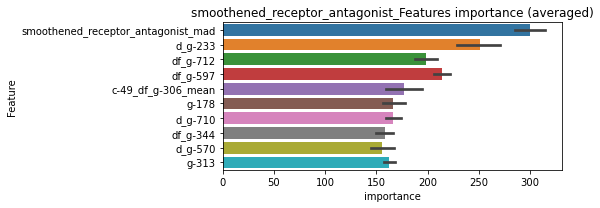

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0058591	valid_1's binary_logloss: 0.0215041
[600]	training's binary_logloss: 0.000712479	valid_1's binary_logloss: 0.00888411
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000393337	valid_1's binary_logloss: 0.00734299


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607416	valid_1's binary_logloss: 0.018167
[600]	training's binary_logloss: 0.000716835	valid_1's binary_logloss: 0.00548217
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000400172	valid_1's binary_logloss: 0.0043807


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00608301	valid_1's binary_logloss: 0.0106399
[600]	training's binary_logloss: 0.00071871	valid_1's binary_logloss: 0.0026519
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000387929	valid_1's binary_logloss: 0.00191157


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607597	valid_1's binary_logloss: 0.0129742
[600]	training's binary_logloss: 0.000728867	valid_1's binary_logloss: 0.00397762
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000414385	valid_1's binary_logloss: 0.00315163


smoothened_receptor_antagonist logloss: 0.004197594131837446


neg labels: 3289 → selected neg labels: 3261


sodium_channel_inhibitor, len(trt): 267, len(othr): 3261, target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.066279	valid_1's binary_logloss: 0.280876
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0561706	valid_1's binary_logloss: 0.278413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0699572	valid_1's binary_logloss: 0.280605
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.0627513	valid_1's binary_logloss: 0.27894
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0645552	valid_1's binary_logloss: 0.267258
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.0449957	valid_1's binary_logloss: 0.264235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0689166	valid_1's binary_logloss: 0.254288
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.0355113	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.868
y_Threshold: 0.1031387, Threshold: 0.4114486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 483 → Positive_corect_labels: 476/3430
p_label_rate: 0.0100452 Vs.target_rate: 0.01121, Num_p_label: 40.0, conf_0:0.28801, conf_1:0.53488
threshold: 0.4114486, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 476.0/3430, y_label_rate: 0.1387755
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225956	valid_1's binary_logloss: 0.118359
[600]	training's binary_logloss: 0.0035759	valid_1's binary_logloss: 0.103847
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00295008	valid_1's binary_logloss: 0.102536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219957	valid_1's binary_logloss: 0.131808
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00688719	valid_1's binary_logloss: 0.125869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0230062	valid_1's binary_logloss: 0.121025
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00496378	valid_1's binary_logloss: 0.107961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236241	valid_1's binary_logloss: 0.131377
Early stopping, best ite

2 / 3 AUC score:0.981
y_Threshold: 0.0673631, Threshold: 0.4114486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 429.0/3336
p_label_rate: 0.0243596 Vs.target_rate: 0.01121, Num_p_label: 97.0, conf_0:0.32916, conf_1:0.49374
Num_p_label: 97.0, Expected: 44.6, Adj_threshold_1: 0.4114486
Num_p_label: 91.0, Expected: 44.6, Adj_threshold_2: 0.4614486
Num_p_label: 86.0, Expected: 44.6, Adj_threshold_3: 0.5114486
Num_p_label: 75.0, Expected: 44.6, Adj_threshold_4: 0.5614486
Num_p_label: 73.0, Expected: 44.6, Adj_threshold_5: 0.6114486
Num_p_label: 65.0, Expected: 44.6, Adj_threshold_6: 0.6614486
threshold: 0.6614486, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 429.0/3336, y_label_rate: 0.1285971
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147863	valid_1's binary_logloss: 0.109926
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00448296	valid_1's binary_logloss: 0.103847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014316	valid_1's binary_logloss: 0.120843
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00806479	valid_1's binary_logloss: 0.118096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149624	valid_1's binary_logloss: 0.0698879
[600]	training's binary_logloss: 0.00225481	valid_1's binary_logloss: 0.0533975
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00204891	valid_1's binary_logloss: 0.0527931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140109	valid_1's binary_logloss: 0.142442


3 / 3 AUC score:0.980
y_Threshold: 0.0563721, Threshold: 0.6614486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 387.0/3252
p_label_rate: 0.0208438 Vs.target_rate: 0.01121, Num_p_label: 83.0, conf_0:0.50000, conf_1:0.72759
Num_p_label: 83.0, Expected: 44.6, Adj_threshold_1: 0.6614486
Num_p_label: 78.0, Expected: 44.6, Adj_threshold_2: 0.7114486
Num_p_label: 75.0, Expected: 44.6, Adj_threshold_3: 0.7614486


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0082182	valid_1's binary_logloss: 0.140461


threshold: 0.7614486, positive_p_label: 75.0/3982, p_label_rate: 0.0188348
positive_y_label: 387.0/3252, y_label_rate: 0.1190037


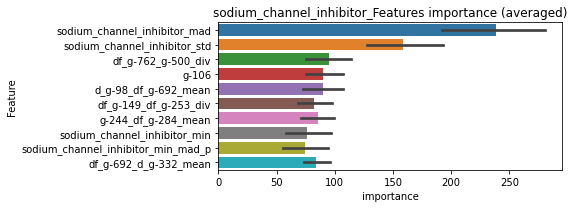

len(train_index) : 2439
len(valid_index) : 813
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114399	valid_1's binary_logloss: 0.0845623
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.0026758	valid_1's binary_logloss: 0.0776687


len(train_index) : 2439
len(valid_index) : 813
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106879	valid_1's binary_logloss: 0.0716751


len(train_index) : 2439
len(valid_index) : 813
================================= fold 3/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00378367	valid_1's binary_logloss: 0.0664011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107329	valid_1's binary_logloss: 0.0617407
[600]	training's binary_logloss: 0.00165227	valid_1's binary_logloss: 0.0467716
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00110213	valid_1's binary_logloss: 0.0454444


len(train_index) : 2439
len(valid_index) : 813
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107947	valid_1's binary_logloss: 0.092746


sodium_channel_inhibitor logloss: 0.06994224810859198


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00874624	valid_1's binary_logloss: 0.0902548
neg labels: 3289 → selected neg labels: 3282


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3282, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00682186	valid_1's binary_logloss: 0.0309736
[600]	training's binary_logloss: 0.00088657	valid_1's binary_logloss: 0.0181121
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000479637	valid_1's binary_logloss: 0.0163973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00731619	valid_1's binary_logloss: 0.0223389
[600]	training's binary_logloss: 0.000934154	valid_1's binary_logloss: 0.0104201
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000477395	valid_1's binary_logloss: 0.00868584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00716455	valid_1's binary_logloss: 0.0235389
[600]	training's binary_logloss: 0.000901681	valid_1's binary_logloss: 0.00989977
[900]	training's binary_logloss: 0.000448036	valid_1's binary_logloss: 0.00824673
Early stopping, bes

1 / 3 AUC score:1.000
y_Threshold: 0.0044016, Threshold: 0.0289090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134, Num_p_label: 40.0, conf_0:0.02024, conf_1:0.03758
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0289090
Num_p_label: 20.0, Expected: 5.4, Adj_threshold_2: 0.0789090
Num_p_label: 9.0, Expected: 5.4, Adj_threshold_3: 0.1289090
threshold: 0.1289090, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00659072	valid_1's binary_logloss: 0.0302175
[600]	training's binary_logloss: 0.000835411	valid_1's binary_logloss: 0.019283
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000467127	valid_1's binary_logloss: 0.0178834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660366	valid_1's binary_logloss: 0.0202283
[600]	training's binary_logloss: 0.000853524	valid_1's binary_logloss: 0.0095922
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000606594	valid_1's binary_logloss: 0.00900413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0066484	valid_1's binary_logloss: 0.0213805
[600]	training's binary_logloss: 0.000835542	valid_1's binary_logloss: 0.00887908
[900]	training's binary_logloss: 0.000427113	valid_1's binary_logloss: 0.00745721
Early stopping, best

2 / 3 AUC score:1.000


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00139445	valid_1's binary_logloss: 0.0321469


y_Threshold: 0.0298799, Threshold: 0.1289090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0080362 Vs.target_rate: 0.00134, Num_p_label: 32.0, conf_0:0.10313, conf_1:0.15469
Num_p_label: 32.0, Expected: 5.4, Adj_threshold_1: 0.1289090
Num_p_label: 26.0, Expected: 5.4, Adj_threshold_2: 0.1789090
Num_p_label: 20.0, Expected: 5.4, Adj_threshold_3: 0.2289090
Num_p_label: 18.0, Expected: 5.4, Adj_threshold_4: 0.2789090
Num_p_label: 14.0, Expected: 5.4, Adj_threshold_5: 0.3289090
Num_p_label: 10.0, Expected: 5.4, Adj_threshold_6: 0.3789090
threshold: 0.3789090, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00612472	valid_1's binary_logloss: 0.0289657
[600]	training's binary_logloss: 0.000790956	valid_1's binary_logloss: 0.0204418
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000707328	valid_1's binary_logloss: 0.0200657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00606125	valid_1's binary_logloss: 0.0214107
[600]	training's binary_logloss: 0.000780129	valid_1's binary_logloss: 0.0101962
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000719417	valid_1's binary_logloss: 0.00991793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624812	valid_1's binary_logloss: 0.0168089
[600]	training's binary_logloss: 0.000816142	valid_1's binary_logloss: 0.00736083
[900]	training's binary_logloss: 0.000417823	valid_1's binary_logloss: 0.00632662
Early stopping, be

3 / 3 AUC score:1.000
y_Threshold: 0.0345227, Threshold: 0.3789090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0035158 Vs.target_rate: 0.00134, Num_p_label: 14.0, conf_0:0.34102, conf_1:0.41680
Num_p_label: 14.0, Expected: 5.4, Adj_threshold_1: 0.3789090
Num_p_label: 12.0, Expected: 5.4, Adj_threshold_2: 0.4289090
threshold: 0.4289090, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 646.0/3786, y_label_rate: 0.1706286


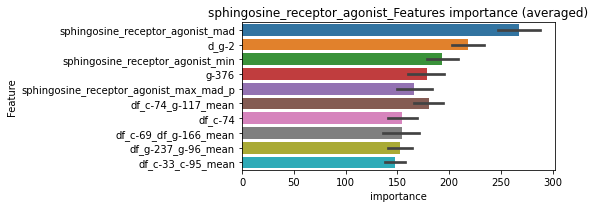

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592935	valid_1's binary_logloss: 0.0215652
[600]	training's binary_logloss: 0.00076113	valid_1's binary_logloss: 0.0110898
[900]	training's binary_logloss: 0.00041095	valid_1's binary_logloss: 0.00990056
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000414805	valid_1's binary_logloss: 0.00989167


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00603075	valid_1's binary_logloss: 0.0144899
[600]	training's binary_logloss: 0.000786886	valid_1's binary_logloss: 0.0064775
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000441757	valid_1's binary_logloss: 0.00572684


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580437	valid_1's binary_logloss: 0.0279119
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000977872	valid_1's binary_logloss: 0.0179946


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604489	valid_1's binary_logloss: 0.036231


sphingosine_receptor_agonist logloss: 0.016226149940009926


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00131865	valid_1's binary_logloss: 0.0312967
neg labels: 3289 → selected neg labels: 3278


src_inhibitor, len(trt): 71, len(othr): 3278, target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177731	valid_1's binary_logloss: 0.0697907
[600]	training's binary_logloss: 0.00233253	valid_1's binary_logloss: 0.0464857
[900]	training's binary_logloss: 0.000921521	valid_1's binary_logloss: 0.0432097
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000941539	valid_1's binary_logloss: 0.0430705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180733	valid_1's binary_logloss: 0.0768466
[600]	training's binary_logloss: 0.00238038	valid_1's binary_logloss: 0.0536085
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.0016878	valid_1's binary_logloss: 0.0515328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168593	valid_1's binary_logloss: 0.0873851
[600]	training's binary_logloss: 0.0022592	valid_1's binary_logloss: 0.0625901
Early stopping, best iteration

1 / 3 AUC score:0.996
y_Threshold: 0.0145421, Threshold: 0.1090591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 637/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00298, Num_p_label: 40.0, conf_0:0.07634, conf_1:0.14178
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_1: 0.1090591
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_2: 0.1590591
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_3: 0.2090591
threshold: 0.2090591, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 637.0/3765, y_label_rate: 0.1691899
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139837	valid_1's binary_logloss: 0.0644291
[600]	training's binary_logloss: 0.00181312	valid_1's binary_logloss: 0.0444716
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00145903	valid_1's binary_logloss: 0.0437729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139496	valid_1's binary_logloss: 0.0510463
[600]	training's binary_logloss: 0.00180565	valid_1's binary_logloss: 0.0282527
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000896519	valid_1's binary_logloss: 0.0250578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133165	valid_1's binary_logloss: 0.0618664
[600]	training's binary_logloss: 0.001738	valid_1's binary_logloss: 0.0408181
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000908744	valid_1's binary_logloss: 0.038

2 / 3 AUC score:0.999
y_Threshold: 0.1017983, Threshold: 0.2090591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 623.0/3737
p_label_rate: 0.0218483 Vs.target_rate: 0.00298, Num_p_label: 87.0, conf_0:0.16725, conf_1:0.25087
Num_p_label: 87.0, Expected: 11.9, Adj_threshold_1: 0.2090591
Num_p_label: 75.0, Expected: 11.9, Adj_threshold_2: 0.2590591
Num_p_label: 70.0, Expected: 11.9, Adj_threshold_3: 0.3090591
Num_p_label: 65.0, Expected: 11.9, Adj_threshold_4: 0.3590591
Num_p_label: 59.0, Expected: 11.9, Adj_threshold_5: 0.4090591
Num_p_label: 54.0, Expected: 11.9, Adj_threshold_6: 0.4590591
Num_p_label: 51.0, Expected: 11.9, Adj_threshold_7: 0.5090591
Num_p_label: 48.0, Expected: 11.9, Adj_threshold_8: 0.5590591
Num_p_label: 43.0, Expected: 11.9, Adj_threshold_9: 0.6090591
Num_p_label: 39.0, Expected: 11.9, Adj_threshold_10: 0.6590591
threshold: 0.7090591, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 623.0/3737, y_label_rate: 0.1667113

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012845	valid_1's binary_logloss: 0.0591081
[600]	training's binary_logloss: 0.00158868	valid_1's binary_logloss: 0.0374911
[900]	training's binary_logloss: 0.000689229	valid_1's binary_logloss: 0.0343713
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000670957	valid_1's binary_logloss: 0.0342143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127953	valid_1's binary_logloss: 0.0508183
[600]	training's binary_logloss: 0.00162056	valid_1's binary_logloss: 0.0267691
[900]	training's binary_logloss: 0.000700022	valid_1's binary_logloss: 0.0225033
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000681779	valid_1's binary_logloss: 0.0223759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126057	valid_1's binary_logloss: 0.0375981
[600]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0949787, Threshold: 0.7090591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 614.0/3719
p_label_rate: 0.0128076 Vs.target_rate: 0.00298, Num_p_label: 51.0, conf_0:0.50000, conf_1:0.77997
Num_p_label: 51.0, Expected: 11.9, Adj_threshold_1: 0.7090591
Num_p_label: 46.0, Expected: 11.9, Adj_threshold_2: 0.7590591
threshold: 0.7590591, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 614.0/3719, y_label_rate: 0.1650981


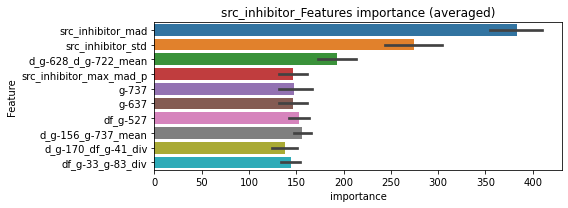

len(train_index) : 2789
len(valid_index) : 930
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115652	valid_1's binary_logloss: 0.047811
[600]	training's binary_logloss: 0.00148133	valid_1's binary_logloss: 0.028588
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.00071991	valid_1's binary_logloss: 0.0267462


len(train_index) : 2789
len(valid_index) : 930
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01163	valid_1's binary_logloss: 0.0400164
[600]	training's binary_logloss: 0.00148943	valid_1's binary_logloss: 0.0190173
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000746012	valid_1's binary_logloss: 0.0160777


len(train_index) : 2789
len(valid_index) : 930
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113361	valid_1's binary_logloss: 0.0517417
[600]	training's binary_logloss: 0.00148107	valid_1's binary_logloss: 0.0334853
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000884029	valid_1's binary_logloss: 0.0319648


len(train_index) : 2790
len(valid_index) : 929
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011249	valid_1's binary_logloss: 0.0673271
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00168055	valid_1's binary_logloss: 0.0544458


src_inhibitor logloss: 0.03230267797991578


neg labels: 3289 → selected neg labels: 3275


steroid, len(trt): 79, len(othr): 3275, target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171603	valid_1's binary_logloss: 0.111223
[600]	training's binary_logloss: 0.00235722	valid_1's binary_logloss: 0.0971719
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00265947	valid_1's binary_logloss: 0.0963366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171453	valid_1's binary_logloss: 0.0814954
[600]	training's binary_logloss: 0.00235073	valid_1's binary_logloss: 0.0622129
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00140043	valid_1's binary_logloss: 0.0611039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174918	valid_1's binary_logloss: 0.0765139
[600]	training's binary_logloss: 0.0023654	valid_1's binary_logloss: 0.0571824
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00217466	valid_1's binary_logloss: 0.05661

1 / 3 AUC score:0.988
y_Threshold: 0.0191533, Threshold: 0.2805266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 181 → Positive_corect_labels: 630/3749
p_label_rate: 0.0100452 Vs.target_rate: 0.00332, Num_p_label: 40.0, conf_0:0.19637, conf_1:0.36468
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.2805266
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_2: 0.3305266
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_3: 0.3805266
Num_p_label: 16.0, Expected: 13.2, Adj_threshold_4: 0.4305266
threshold: 0.4305266, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 630.0/3749, y_label_rate: 0.1680448
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113243	valid_1's binary_logloss: 0.0639663
[600]	training's binary_logloss: 0.00156779	valid_1's binary_logloss: 0.0482571
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00144183	valid_1's binary_logloss: 0.0477668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134355	valid_1's binary_logloss: 0.0545049
[600]	training's binary_logloss: 0.00177327	valid_1's binary_logloss: 0.0322416
[900]	training's binary_logloss: 0.000757139	valid_1's binary_logloss: 0.0290937
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000734336	valid_1's binary_logloss: 0.0289767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118981	valid_1's binary_logloss: 0.0787008
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00227678	valid_1's binary_logloss: 0.0

2 / 3 AUC score:0.999
y_Threshold: 0.0572396, Threshold: 0.4305266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 613.0/3715
p_label_rate: 0.0208438 Vs.target_rate: 0.00332, Num_p_label: 83.0, conf_0:0.34442, conf_1:0.51663
Num_p_label: 83.0, Expected: 13.2, Adj_threshold_1: 0.4305266
Num_p_label: 72.0, Expected: 13.2, Adj_threshold_2: 0.4805266
Num_p_label: 63.0, Expected: 13.2, Adj_threshold_3: 0.5305266
Num_p_label: 48.0, Expected: 13.2, Adj_threshold_4: 0.5805266
Num_p_label: 44.0, Expected: 13.2, Adj_threshold_5: 0.6305266
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_6: 0.6805266
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_7: 0.7305266
Num_p_label: 20.0, Expected: 13.2, Adj_threshold_8: 0.7805266
threshold: 0.7805266, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 613.0/3715, y_label_rate: 0.1650067
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104318	valid_1's binary_logloss: 0.0639296
[600]	training's binary_logloss: 0.00144333	valid_1's binary_logloss: 0.0502428
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00137987	valid_1's binary_logloss: 0.0499927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107127	valid_1's binary_logloss: 0.0541226
[600]	training's binary_logloss: 0.00144385	valid_1's binary_logloss: 0.040279
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.001071	valid_1's binary_logloss: 0.0395252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105364	valid_1's binary_logloss: 0.0495127
[600]	training's binary_logloss: 0.00144353	valid_1's binary_logloss: 0.0345573
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000928355	valid_1's binary_logloss: 0.03339

3 / 3 AUC score:0.999
y_Threshold: 0.0506579, Threshold: 0.7805266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 599.0/3687
p_label_rate: 0.0075339 Vs.target_rate: 0.00332, Num_p_label: 30.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_1: 0.7805266
threshold: 0.7805266, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 599.0/3687, y_label_rate: 0.1624627


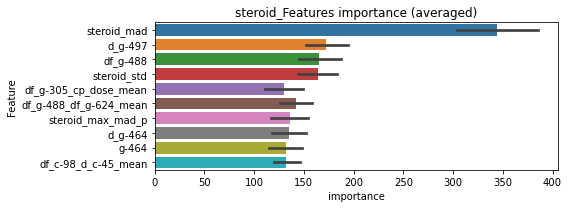

len(train_index) : 2765
len(valid_index) : 922
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00939288	valid_1's binary_logloss: 0.0536661
[600]	training's binary_logloss: 0.00129482	valid_1's binary_logloss: 0.0350156
[900]	training's binary_logloss: 0.000611888	valid_1's binary_logloss: 0.0320868
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000623006	valid_1's binary_logloss: 0.032055


len(train_index) : 2765
len(valid_index) : 922
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100618	valid_1's binary_logloss: 0.034541
[600]	training's binary_logloss: 0.00138736	valid_1's binary_logloss: 0.0160522
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000677966	valid_1's binary_logloss: 0.0129071


len(train_index) : 2765
len(valid_index) : 922
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00973251	valid_1's binary_logloss: 0.0405827
[600]	training's binary_logloss: 0.00131723	valid_1's binary_logloss: 0.0295474
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00129124	valid_1's binary_logloss: 0.0294328


len(train_index) : 2766
len(valid_index) : 921
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00912252	valid_1's binary_logloss: 0.0462376
[600]	training's binary_logloss: 0.00127339	valid_1's binary_logloss: 0.0292304
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000834041	valid_1's binary_logloss: 0.0273194


steroid logloss: 0.025428051392429


neg labels: 3289 → selected neg labels: 3287


syk_inhibitor, len(trt): 19, len(othr): 3287, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448258	valid_1's binary_logloss: 0.0122716
[600]	training's binary_logloss: 0.000586172	valid_1's binary_logloss: 0.00423055
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000366438	valid_1's binary_logloss: 0.00358173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00454549	valid_1's binary_logloss: 0.0112289
[600]	training's binary_logloss: 0.000595063	valid_1's binary_logloss: 0.00335604
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000361894	valid_1's binary_logloss: 0.00278039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450455	valid_1's binary_logloss: 0.00856573
[600]	training's binary_logloss: 0.000595121	valid_1's binary_logloss: 0.00190055
[900]	training's binary_logloss: 0.00034779	valid_1's binary_logloss: 0.00129947
Early stopping,

1 / 3 AUC score:1.000
y_Threshold: 0.0026185, Threshold: 0.0100900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00706, conf_1:0.01312
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0100900
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.0600900
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.1100900
threshold: 0.1100900, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409081	valid_1's binary_logloss: 0.010786
[600]	training's binary_logloss: 0.000540502	valid_1's binary_logloss: 0.00394967
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000381938	valid_1's binary_logloss: 0.00354135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409814	valid_1's binary_logloss: 0.00993094
[600]	training's binary_logloss: 0.000530199	valid_1's binary_logloss: 0.00307312
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.00033793	valid_1's binary_logloss: 0.00250114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409641	valid_1's binary_logloss: 0.00780306
[600]	training's binary_logloss: 0.000541115	valid_1's binary_logloss: 0.00167778
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000345024	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.1112445, Threshold: 0.1100900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0045203 Vs.target_rate: 0.00080, Num_p_label: 18.0, conf_0:0.08807, conf_1:0.13211
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_1: 0.1100900
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_2: 0.1600900
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_3: 0.2100900
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_4: 0.2600900
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_5: 0.3100900
threshold: 0.3100900, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409081	valid_1's binary_logloss: 0.010786
[600]	training's binary_logloss: 0.000540502	valid_1's binary_logloss: 0.00394967
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000381938	valid_1's binary_logloss: 0.00354135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409814	valid_1's binary_logloss: 0.00993094
[600]	training's binary_logloss: 0.000530199	valid_1's binary_logloss: 0.00307312
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.00033793	valid_1's binary_logloss: 0.00250114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409641	valid_1's binary_logloss: 0.00780306
[600]	training's binary_logloss: 0.000541115	valid_1's binary_logloss: 0.00167778
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000345024	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.1112445, Threshold: 0.3100900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.27908, conf_1:0.34110
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.3100900
threshold: 0.3100900, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


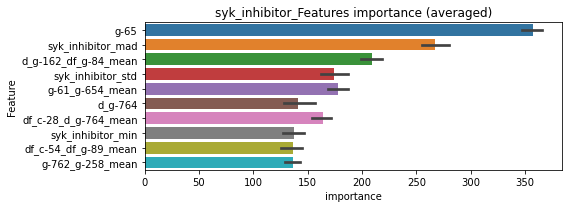

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451966	valid_1's binary_logloss: 0.0133445
[600]	training's binary_logloss: 0.000560139	valid_1's binary_logloss: 0.00447553
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000362885	valid_1's binary_logloss: 0.00373372


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00413595	valid_1's binary_logloss: 0.00955211
[600]	training's binary_logloss: 0.000537776	valid_1's binary_logloss: 0.00275827
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000338975	valid_1's binary_logloss: 0.00220205


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415636	valid_1's binary_logloss: 0.00865174
[600]	training's binary_logloss: 0.000540388	valid_1's binary_logloss: 0.00183045
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000337694	valid_1's binary_logloss: 0.00134376


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415743	valid_1's binary_logloss: 0.0104979
[600]	training's binary_logloss: 0.000539125	valid_1's binary_logloss: 0.00375669
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000345589	valid_1's binary_logloss: 0.00324775


syk_inhibitor logloss: 0.0026323050237565307


neg labels: 3289 → selected neg labels: 3278


tachykinin_antagonist, len(trt): 60, len(othr): 3278, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160377	valid_1's binary_logloss: 0.0618917
[600]	training's binary_logloss: 0.00203659	valid_1's binary_logloss: 0.0324758
[900]	training's binary_logloss: 0.000827779	valid_1's binary_logloss: 0.028157
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000827779	valid_1's binary_logloss: 0.028157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156111	valid_1's binary_logloss: 0.0502406
[600]	training's binary_logloss: 0.00211304	valid_1's binary_logloss: 0.0235279
[900]	training's binary_logloss: 0.00085693	valid_1's binary_logloss: 0.0191267
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.00077468	valid_1's binary_logloss: 0.0189062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158534	valid_1's binary_logloss: 0.0611579
[600]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0110831, Threshold: 0.0469666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.03288, conf_1:0.06106
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0469666
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_2: 0.0969666
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_3: 0.1469666
threshold: 0.1469666, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140399	valid_1's binary_logloss: 0.039608
[600]	training's binary_logloss: 0.00186708	valid_1's binary_logloss: 0.0153008
[900]	training's binary_logloss: 0.00077052	valid_1's binary_logloss: 0.011918
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000677592	valid_1's binary_logloss: 0.0116697
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145631	valid_1's binary_logloss: 0.066027
[600]	training's binary_logloss: 0.0018361	valid_1's binary_logloss: 0.0453872
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00155536	valid_1's binary_logloss: 0.04509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136044	valid_1's binary_logloss: 0.0604588
[600]	training's binary_logloss: 0.00177441	valid_1's binary_logloss: 0.0395314
Early stopping, best iteration is:


2 / 3 AUC score:0.998
y_Threshold: 0.0601353, Threshold: 0.1469666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 639.0/3769
p_label_rate: 0.0113009 Vs.target_rate: 0.00252, Num_p_label: 45.0, conf_0:0.11757, conf_1:0.17636
Num_p_label: 45.0, Expected: 10.0, Adj_threshold_1: 0.1469666
Num_p_label: 36.0, Expected: 10.0, Adj_threshold_2: 0.1969666
Num_p_label: 29.0, Expected: 10.0, Adj_threshold_3: 0.2469666
Num_p_label: 26.0, Expected: 10.0, Adj_threshold_4: 0.2969666
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_5: 0.3469666
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_6: 0.3969666
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_7: 0.4469666
threshold: 0.4469666, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 639.0/3769, y_label_rate: 0.1695410
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123587	valid_1's binary_logloss: 0.0444431
[600]	training's binary_logloss: 0.00165633	valid_1's binary_logloss: 0.0208648
[900]	training's binary_logloss: 0.000712062	valid_1's binary_logloss: 0.0174028
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000720894	valid_1's binary_logloss: 0.0173597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128253	valid_1's binary_logloss: 0.0535854
[600]	training's binary_logloss: 0.00167998	valid_1's binary_logloss: 0.0301441
[900]	training's binary_logloss: 0.00071548	valid_1's binary_logloss: 0.0261612
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000728396	valid_1's binary_logloss: 0.0260984
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132391	valid_1's binary_logloss: 0.0438811
[600]	training's binary_log

3 / 3 AUC score:0.996
y_Threshold: 0.0883043, Threshold: 0.4469666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 629.0/3749
p_label_rate: 0.0057760 Vs.target_rate: 0.00252, Num_p_label: 23.0, conf_0:0.40227, conf_1:0.49166
Num_p_label: 23.0, Expected: 10.0, Adj_threshold_1: 0.4469666
Num_p_label: 22.0, Expected: 10.0, Adj_threshold_2: 0.4969666
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_3: 0.5469666
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_4: 0.5969666
threshold: 0.5969666, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 629.0/3749, y_label_rate: 0.1677781


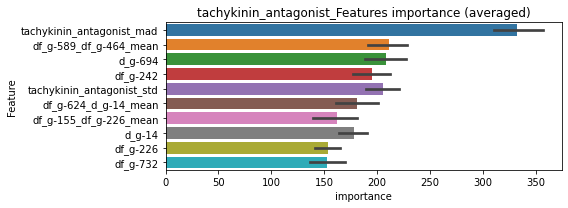

len(train_index) : 2811
len(valid_index) : 938
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109641	valid_1's binary_logloss: 0.0611208
[600]	training's binary_logloss: 0.00144288	valid_1's binary_logloss: 0.0455793
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000859011	valid_1's binary_logloss: 0.0445903


len(train_index) : 2812
len(valid_index) : 937
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011856	valid_1's binary_logloss: 0.0493702
[600]	training's binary_logloss: 0.00153002	valid_1's binary_logloss: 0.0297683
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.00127772	valid_1's binary_logloss: 0.0290632


len(train_index) : 2812
len(valid_index) : 937
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117693	valid_1's binary_logloss: 0.0333421
[600]	training's binary_logloss: 0.00155818	valid_1's binary_logloss: 0.0138729
[900]	training's binary_logloss: 0.000682198	valid_1's binary_logloss: 0.0113321
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000699945	valid_1's binary_logloss: 0.0112864


len(train_index) : 2812
len(valid_index) : 937
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115169	valid_1's binary_logloss: 0.0355189
[600]	training's binary_logloss: 0.0015542	valid_1's binary_logloss: 0.0131544
[900]	training's binary_logloss: 0.000681298	valid_1's binary_logloss: 0.00961138
Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.000583606	valid_1's binary_logloss: 0.00929449


tachykinin_antagonist logloss: 0.02356626497509195


neg labels: 3289 → selected neg labels: 3285


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3285, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00748735	valid_1's binary_logloss: 0.0268039
[600]	training's binary_logloss: 0.000969539	valid_1's binary_logloss: 0.0133155
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000505984	valid_1's binary_logloss: 0.0115054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00729178	valid_1's binary_logloss: 0.0325906
[600]	training's binary_logloss: 0.000962787	valid_1's binary_logloss: 0.0149809
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000502145	valid_1's binary_logloss: 0.0126132
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737346	valid_1's binary_logloss: 0.025617
[600]	training's binary_logloss: 0.000965256	valid_1's binary_logloss: 0.0116308
[900]	training's binary_logloss: 0.000497581	valid_1's binary_logloss: 0.00999225
Early stopping, best 

1 / 3 AUC score:1.000
y_Threshold: 0.0051758, Threshold: 0.0434574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.03042, conf_1:0.05649
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0434574
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_2: 0.0934574
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_3: 0.1434574
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_4: 0.1934574
threshold: 0.1934574, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641756	valid_1's binary_logloss: 0.023588
[600]	training's binary_logloss: 0.000846796	valid_1's binary_logloss: 0.0119328
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00046284	valid_1's binary_logloss: 0.0103764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646974	valid_1's binary_logloss: 0.0242122
[600]	training's binary_logloss: 0.000855739	valid_1's binary_logloss: 0.0101715
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000464493	valid_1's binary_logloss: 0.00793761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00615778	valid_1's binary_logloss: 0.026979
[600]	training's binary_logloss: 0.000836231	valid_1's binary_logloss: 0.0148074
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000463768	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.1594890, Threshold: 0.1934574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0155701 Vs.target_rate: 0.00126, Num_p_label: 62.0, conf_0:0.15477, conf_1:0.23215
Num_p_label: 62.0, Expected: 5.0, Adj_threshold_1: 0.1934574
Num_p_label: 56.0, Expected: 5.0, Adj_threshold_2: 0.2434574
Num_p_label: 46.0, Expected: 5.0, Adj_threshold_3: 0.2934574
Num_p_label: 41.0, Expected: 5.0, Adj_threshold_4: 0.3434574
Num_p_label: 37.0, Expected: 5.0, Adj_threshold_5: 0.3934574
Num_p_label: 34.0, Expected: 5.0, Adj_threshold_6: 0.4434574
Num_p_label: 32.0, Expected: 5.0, Adj_threshold_7: 0.4934574
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_8: 0.5434574
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_9: 0.5934574
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_10: 0.6434574
threshold: 0.6934574, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00631221	valid_1's binary_logloss: 0.0170312
[600]	training's binary_logloss: 0.000848576	valid_1's binary_logloss: 0.00555959
[900]	training's binary_logloss: 0.000448822	valid_1's binary_logloss: 0.00407705
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00045627	valid_1's binary_logloss: 0.00406722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613123	valid_1's binary_logloss: 0.0246924
[600]	training's binary_logloss: 0.000823609	valid_1's binary_logloss: 0.0104971
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000462309	valid_1's binary_logloss: 0.00837473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00605355	valid_1's binary_logloss: 0.0249573
[600]	training's binary_logloss: 0.00081805	valid_1's binary_logloss: 0.0126164
Early stopping, bes

3 / 3 AUC score:1.000
y_Threshold: 0.1892485, Threshold: 0.6934574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0062783 Vs.target_rate: 0.00126, Num_p_label: 25.0, conf_0:0.50000, conf_1:0.76280
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_1: 0.6934574
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.7434574
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.7934574
threshold: 0.7934574, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


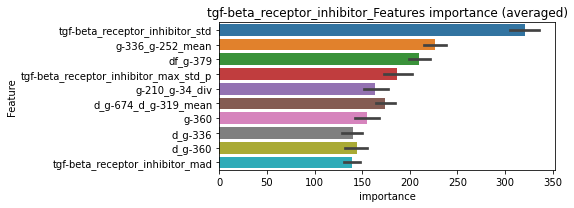

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651709	valid_1's binary_logloss: 0.0247777
[600]	training's binary_logloss: 0.000858616	valid_1's binary_logloss: 0.0119159
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000483643	valid_1's binary_logloss: 0.0101916


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604543	valid_1's binary_logloss: 0.0349368
[600]	training's binary_logloss: 0.000804098	valid_1's binary_logloss: 0.0247425
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000490381	valid_1's binary_logloss: 0.0233278


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623307	valid_1's binary_logloss: 0.0179225
[600]	training's binary_logloss: 0.000817634	valid_1's binary_logloss: 0.00680836
[900]	training's binary_logloss: 0.000453393	valid_1's binary_logloss: 0.00557944
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000441235	valid_1's binary_logloss: 0.00553986


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00619163	valid_1's binary_logloss: 0.0232091
[600]	training's binary_logloss: 0.000825871	valid_1's binary_logloss: 0.00922836
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000463646	valid_1's binary_logloss: 0.00758541


tgf-beta_receptor_inhibitor logloss: 0.011670290365771262


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00468554	valid_1's binary_logloss: 0.00980046
[600]	training's binary_logloss: 0.000589483	valid_1's binary_logloss: 0.00275621
[900]	training's binary_logloss: 0.000342045	valid_1's binary_logloss: 0.00212341
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000342045	valid_1's binary_logloss: 0.00212341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471331	valid_1's binary_logloss: 0.0116643
[600]	training's binary_logloss: 0.000598386	valid_1's binary_logloss: 0.00353506
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000366702	valid_1's binary_logloss: 0.00282322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00468408	valid_1's binary_logloss: 0.00997283
[600]	training's binary_logloss: 0.000592829	valid_1's binary_logloss: 0.00241449
[900]	trainin

1 / 3 AUC score:1.000
y_Threshold: 0.0025964, Threshold: 0.0075258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00527, conf_1:0.00978
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0075258
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0575258
threshold: 0.0575258, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429322	valid_1's binary_logloss: 0.00776125
[600]	training's binary_logloss: 0.000554869	valid_1's binary_logloss: 0.0015665
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00033112	valid_1's binary_logloss: 0.00107903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427927	valid_1's binary_logloss: 0.011999
[600]	training's binary_logloss: 0.000548524	valid_1's binary_logloss: 0.0037436
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000511628	valid_1's binary_logloss: 0.00360594
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431241	valid_1's binary_logloss: 0.00742777
[600]	training's binary_logloss: 0.000555361	valid_1's binary_logloss: 0.00140397
[900]	training's binary_logloss: 0.000330582	valid_1's binary_logloss: 0.000949677
Early stopping, 

2 / 3 AUC score:1.000
y_Threshold: 0.0945785, Threshold: 0.0575258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00080, Num_p_label: 9.0, conf_0:0.04602, conf_1:0.06903
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.0575258
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.1075258
threshold: 0.1075258, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429322	valid_1's binary_logloss: 0.00776125
[600]	training's binary_logloss: 0.000554869	valid_1's binary_logloss: 0.0015665
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00033112	valid_1's binary_logloss: 0.00107903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427927	valid_1's binary_logloss: 0.011999
[600]	training's binary_logloss: 0.000548524	valid_1's binary_logloss: 0.0037436
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000511628	valid_1's binary_logloss: 0.00360594
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431241	valid_1's binary_logloss: 0.00742777
[600]	training's binary_logloss: 0.000555361	valid_1's binary_logloss: 0.00140397
[900]	training's binary_logloss: 0.000330582	valid_1's binary_logloss: 0.000949677
Early stopping, 

3 / 3 AUC score:1.000
y_Threshold: 0.0945785, Threshold: 0.1075258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00080, Num_p_label: 6.0, conf_0:0.09677, conf_1:0.11828
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.1075258
threshold: 0.1075258, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


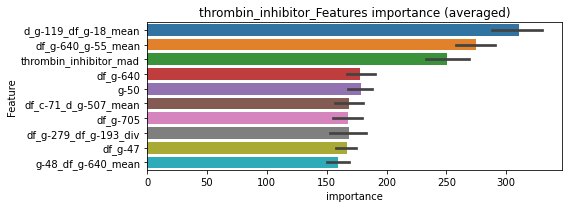

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427406	valid_1's binary_logloss: 0.00765934
[600]	training's binary_logloss: 0.000559988	valid_1's binary_logloss: 0.00149609
[900]	training's binary_logloss: 0.000326823	valid_1's binary_logloss: 0.00099778
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000327384	valid_1's binary_logloss: 0.000997364


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426358	valid_1's binary_logloss: 0.0118528
[600]	training's binary_logloss: 0.000547456	valid_1's binary_logloss: 0.00398063
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000345858	valid_1's binary_logloss: 0.00329921


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438548	valid_1's binary_logloss: 0.00738801
[600]	training's binary_logloss: 0.000560634	valid_1's binary_logloss: 0.00148031
[900]	training's binary_logloss: 0.000332287	valid_1's binary_logloss: 0.000989085
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000332287	valid_1's binary_logloss: 0.000989085


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439731	valid_1's binary_logloss: 0.00765828
[600]	training's binary_logloss: 0.000556647	valid_1's binary_logloss: 0.00156336
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000336149	valid_1's binary_logloss: 0.00112119


thrombin_inhibitor logloss: 0.0016019427901219551


neg labels: 3289 → selected neg labels: 3282


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3282, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0087384	valid_1's binary_logloss: 0.0302087
[600]	training's binary_logloss: 0.00112288	valid_1's binary_logloss: 0.0150847
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000603595	valid_1's binary_logloss: 0.0132348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00887835	valid_1's binary_logloss: 0.0236062
[600]	training's binary_logloss: 0.00113251	valid_1's binary_logloss: 0.00862489
[900]	training's binary_logloss: 0.000536248	valid_1's binary_logloss: 0.00653117
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000526448	valid_1's binary_logloss: 0.00650581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00923295	valid_1's binary_logloss: 0.0217749
[600]	training's binary_logloss: 0.00114149	valid_1's binary_logloss: 0.00639878
[900]	training's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0056533, Threshold: 0.0337616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.02363, conf_1:0.04389
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0337616
Num_p_label: 22.0, Expected: 6.2, Adj_threshold_2: 0.0837616
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1337616
threshold: 0.1337616, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00814972	valid_1's binary_logloss: 0.0316474
[600]	training's binary_logloss: 0.00104308	valid_1's binary_logloss: 0.0177999
[900]	training's binary_logloss: 0.000502847	valid_1's binary_logloss: 0.0163449
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000505825	valid_1's binary_logloss: 0.0162945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0081994	valid_1's binary_logloss: 0.0275097
[600]	training's binary_logloss: 0.00103658	valid_1's binary_logloss: 0.0113852
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000884273	valid_1's binary_logloss: 0.0108868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00773753	valid_1's binary_logloss: 0.036387
[600]	training's binary_logloss: 0.000988373	valid_1's binary_logloss: 0.02591
Early stopping, best iterat

2 / 3 AUC score:1.000
y_Threshold: 0.0380543, Threshold: 0.1337616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.10701, conf_1:0.16051
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.1337616
Num_p_label: 34.0, Expected: 6.2, Adj_threshold_2: 0.1837616
Num_p_label: 31.0, Expected: 6.2, Adj_threshold_3: 0.2337616
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_4: 0.2837616
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_5: 0.3337616
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_6: 0.3837616
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_7: 0.4337616
threshold: 0.4337616, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00753608	valid_1's binary_logloss: 0.0446332
[600]	training's binary_logloss: 0.00095008	valid_1's binary_logloss: 0.0307015
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000708966	valid_1's binary_logloss: 0.0295562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00773558	valid_1's binary_logloss: 0.0227816
[600]	training's binary_logloss: 0.000989891	valid_1's binary_logloss: 0.009367
[900]	training's binary_logloss: 0.000495083	valid_1's binary_logloss: 0.00789675
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000486452	valid_1's binary_logloss: 0.0078855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.007608	valid_1's binary_logloss: 0.0258688
[600]	training's binary_logloss: 0.000991454	valid_1's binary_logloss: 0.0109411
[900]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0744602, Threshold: 0.4337616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0042692 Vs.target_rate: 0.00155, Num_p_label: 17.0, conf_0:0.39039, conf_1:0.47714
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.4337616
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.4837616
threshold: 0.4837616, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 646.0/3786, y_label_rate: 0.1706286


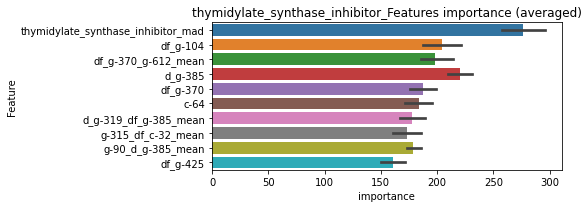

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00749952	valid_1's binary_logloss: 0.0317788
[600]	training's binary_logloss: 0.000946629	valid_1's binary_logloss: 0.0149325
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000522916	valid_1's binary_logloss: 0.0130691


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00742	valid_1's binary_logloss: 0.0227166
[600]	training's binary_logloss: 0.000952472	valid_1's binary_logloss: 0.0114325
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000502211	valid_1's binary_logloss: 0.0100636


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00761441	valid_1's binary_logloss: 0.022876
[600]	training's binary_logloss: 0.000976781	valid_1's binary_logloss: 0.00848504
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000523911	valid_1's binary_logloss: 0.00687215


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00767704	valid_1's binary_logloss: 0.0297027
[600]	training's binary_logloss: 0.000960775	valid_1's binary_logloss: 0.0186445
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.0009909	valid_1's binary_logloss: 0.0185422


thymidylate_synthase_inhibitor logloss: 0.012136477692084336


neg labels: 3289 → selected neg labels: 3282


tlr_agonist, len(trt): 30, len(othr): 3282, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00625237	valid_1's binary_logloss: 0.0211513
[600]	training's binary_logloss: 0.000816419	valid_1's binary_logloss: 0.00834894
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000439526	valid_1's binary_logloss: 0.00689724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651604	valid_1's binary_logloss: 0.0242573
[600]	training's binary_logloss: 0.000816228	valid_1's binary_logloss: 0.0115996
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000457488	valid_1's binary_logloss: 0.0098418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00698913	valid_1's binary_logloss: 0.01501
[600]	training's binary_logloss: 0.000866403	valid_1's binary_logloss: 0.00458269
[900]	training's binary_logloss: 0.000439605	valid_1's binary_logloss: 0.00346115
Early stopping, bes

1 / 3 AUC score:1.000
y_Threshold: 0.0044975, Threshold: 0.0377588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.02643, conf_1:0.04909
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0377588
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_2: 0.0877588
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.1377588
threshold: 0.1377588, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00581307	valid_1's binary_logloss: 0.016436
[600]	training's binary_logloss: 0.000747276	valid_1's binary_logloss: 0.00470351
[900]	training's binary_logloss: 0.000403335	valid_1's binary_logloss: 0.00341193
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000397134	valid_1's binary_logloss: 0.00339392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00563586	valid_1's binary_logloss: 0.0200056
[600]	training's binary_logloss: 0.000739758	valid_1's binary_logloss: 0.0116677
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00070125	valid_1's binary_logloss: 0.0115972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588954	valid_1's binary_logloss: 0.0149633
[600]	training's binary_logloss: 0.000762063	valid_1's binary_logloss: 0.00500743
[900]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0404669, Threshold: 0.1377588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0115520 Vs.target_rate: 0.00126, Num_p_label: 46.0, conf_0:0.11021, conf_1:0.16531
Num_p_label: 46.0, Expected: 5.0, Adj_threshold_1: 0.1377588
Num_p_label: 38.0, Expected: 5.0, Adj_threshold_2: 0.1877588
Num_p_label: 32.0, Expected: 5.0, Adj_threshold_3: 0.2377588
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_4: 0.2877588
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_5: 0.3377588
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_6: 0.3877588
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_7: 0.4377588
threshold: 0.4377588, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00559142	valid_1's binary_logloss: 0.0174307
[600]	training's binary_logloss: 0.000734234	valid_1's binary_logloss: 0.00673264
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000420146	valid_1's binary_logloss: 0.00550348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562963	valid_1's binary_logloss: 0.0194923
[600]	training's binary_logloss: 0.000743435	valid_1's binary_logloss: 0.0111787
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000459436	valid_1's binary_logloss: 0.0106823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055971	valid_1's binary_logloss: 0.0239015
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00121297	valid_1's binary_logloss: 0.0157208
Training until validation scores don't improve for 30 rounds
[300]	

3 / 3 AUC score:1.000
y_Threshold: 0.0408701, Threshold: 0.4377588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0052737 Vs.target_rate: 0.00126, Num_p_label: 21.0, conf_0:0.39398, conf_1:0.48153
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.4377588
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_2: 0.4877588
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_3: 0.5377588
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_4: 0.5877588
threshold: 0.5877588, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


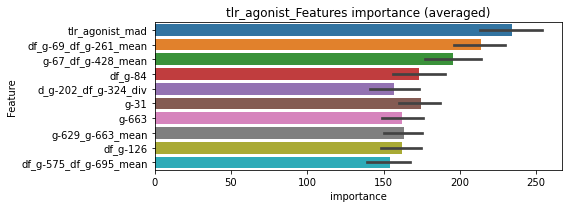

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547834	valid_1's binary_logloss: 0.0202046
[600]	training's binary_logloss: 0.000724816	valid_1's binary_logloss: 0.00814413
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000444049	valid_1's binary_logloss: 0.00664804


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057156	valid_1's binary_logloss: 0.0142644
[600]	training's binary_logloss: 0.000742529	valid_1's binary_logloss: 0.00515979
[900]	training's binary_logloss: 0.000406003	valid_1's binary_logloss: 0.00403442
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.00041039	valid_1's binary_logloss: 0.00402188


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00565659	valid_1's binary_logloss: 0.0218698
[600]	training's binary_logloss: 0.000730006	valid_1's binary_logloss: 0.0118884
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000463692	valid_1's binary_logloss: 0.0108569


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00564538	valid_1's binary_logloss: 0.0147292
[600]	training's binary_logloss: 0.000730966	valid_1's binary_logloss: 0.0071162
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000536496	valid_1's binary_logloss: 0.00669498


tlr_agonist logloss: 0.007055452922157607


neg labels: 3289 → selected neg labels: 3289


tlr_antagonist, len(trt): 7, len(othr): 3289, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180278	valid_1's binary_logloss: 0.00273384
[600]	training's binary_logloss: 0.000240415	valid_1's binary_logloss: 0.000535028
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000202434	valid_1's binary_logloss: 0.000481337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017619	valid_1's binary_logloss: 0.0025896
[600]	training's binary_logloss: 0.000235228	valid_1's binary_logloss: 0.000489242
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000196952	valid_1's binary_logloss: 0.000426732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175255	valid_1's binary_logloss: 0.00272531
[600]	training's binary_logloss: 0.000237148	valid_1's binary_logloss: 0.00047952
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000198966	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0007741, Threshold: 0.0029442, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00020132	valid_1's binary_logloss: 0.000386967


Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00206, conf_1:0.00383
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0029442
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_2: 0.0529442
threshold: 0.0529442, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169898	valid_1's binary_logloss: 0.00279433
[600]	training's binary_logloss: 0.000227573	valid_1's binary_logloss: 0.00077283
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000194345	valid_1's binary_logloss: 0.000716888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172588	valid_1's binary_logloss: 0.00220781
[600]	training's binary_logloss: 0.000227937	valid_1's binary_logloss: 0.000376662
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000192575	valid_1's binary_logloss: 0.000330821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017	valid_1's binary_logloss: 0.00215613
[600]	training's binary_logloss: 0.000225986	valid_1's binary_logloss: 0.000322034
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000190243	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.1211460, Threshold: 0.0529442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00029, Num_p_label: 7.0, conf_0:0.04236, conf_1:0.06353
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_1: 0.0529442
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_2: 0.1029442
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.1529442
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_4: 0.2029442
threshold: 0.2029442, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169898	valid_1's binary_logloss: 0.00279433
[600]	training's binary_logloss: 0.000227573	valid_1's binary_logloss: 0.00077283
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000194345	valid_1's binary_logloss: 0.000716888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172588	valid_1's binary_logloss: 0.00220781
[600]	training's binary_logloss: 0.000227937	valid_1's binary_logloss: 0.000376662
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000192575	valid_1's binary_logloss: 0.000330821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017	valid_1's binary_logloss: 0.00215613
[600]	training's binary_logloss: 0.000225986	valid_1's binary_logloss: 0.000322034
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000190243	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.1211460, Threshold: 0.2029442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.18265, conf_1:0.22324
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.2029442


Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000190849	valid_1's binary_logloss: 0.000300372


threshold: 0.2029442, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


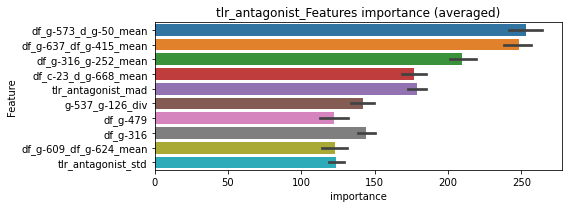

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170815	valid_1's binary_logloss: 0.00286729
[600]	training's binary_logloss: 0.000227043	valid_1's binary_logloss: 0.000868561


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000192914	valid_1's binary_logloss: 0.000807295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171754	valid_1's binary_logloss: 0.00220458
[600]	training's binary_logloss: 0.000225892	valid_1's binary_logloss: 0.000391973


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000192251	valid_1's binary_logloss: 0.000352305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001712	valid_1's binary_logloss: 0.00215338
[600]	training's binary_logloss: 0.000228015	valid_1's binary_logloss: 0.000324346


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000188461	valid_1's binary_logloss: 0.0002733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172452	valid_1's binary_logloss: 0.00223525
[600]	training's binary_logloss: 0.00022725	valid_1's binary_logloss: 0.000346459


tlr_antagonist logloss: 0.00043312587354399064


Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000191923	valid_1's binary_logloss: 0.000298418
neg labels: 3289 → selected neg labels: 3289


tnf_inhibitor, len(trt): 36, len(othr): 3289, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103331	valid_1's binary_logloss: 0.034224
[600]	training's binary_logloss: 0.00128107	valid_1's binary_logloss: 0.0137611
[900]	training's binary_logloss: 0.000572841	valid_1's binary_logloss: 0.0109959
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000552102	valid_1's binary_logloss: 0.0109732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103003	valid_1's binary_logloss: 0.031277
[600]	training's binary_logloss: 0.00126188	valid_1's binary_logloss: 0.010822
[900]	training's binary_logloss: 0.00057046	valid_1's binary_logloss: 0.00795126
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00057452	valid_1's binary_logloss: 0.00793876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106079	valid_1's binary_logloss: 0.0284131
[600]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0066989, Threshold: 0.0393389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.02754, conf_1:0.05114
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0393389
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.0893389
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_3: 0.1393389
threshold: 0.1393389, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00937022	valid_1's binary_logloss: 0.0303753
[600]	training's binary_logloss: 0.00116853	valid_1's binary_logloss: 0.0131991
[900]	training's binary_logloss: 0.000549164	valid_1's binary_logloss: 0.0107822
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000563231	valid_1's binary_logloss: 0.0107326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00929114	valid_1's binary_logloss: 0.0272775
[600]	training's binary_logloss: 0.00116513	valid_1's binary_logloss: 0.00877866
[900]	training's binary_logloss: 0.000544693	valid_1's binary_logloss: 0.00630842
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000513179	valid_1's binary_logloss: 0.00623085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969843	valid_1's binary_logloss: 0.0252177
[600]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0633105, Threshold: 0.1393389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3807
p_label_rate: 0.0125565 Vs.target_rate: 0.00151, Num_p_label: 50.0, conf_0:0.11147, conf_1:0.16721
Num_p_label: 50.0, Expected: 6.0, Adj_threshold_1: 0.1393389
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_2: 0.1893389
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_3: 0.2393389
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_4: 0.2893389
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_5: 0.3393389
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_6: 0.3893389
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_7: 0.4393389
threshold: 0.4393389, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3807, y_label_rate: 0.1717888
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00919191	valid_1's binary_logloss: 0.0297845
[600]	training's binary_logloss: 0.00115089	valid_1's binary_logloss: 0.0136305
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000678299	valid_1's binary_logloss: 0.0120089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00881275	valid_1's binary_logloss: 0.0337257
[600]	training's binary_logloss: 0.0011024	valid_1's binary_logloss: 0.0175558
[900]	training's binary_logloss: 0.000525132	valid_1's binary_logloss: 0.0146993
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000501301	valid_1's binary_logloss: 0.0145577
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0091534	valid_1's binary_logloss: 0.0295967
[600]	training's binary_logloss: 0.00114802	valid_1's binary_logloss: 0.0166638
Early stopping, best iter

3 / 3 AUC score:1.000
y_Threshold: 0.1046638, Threshold: 0.4393389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 644.0/3787
p_label_rate: 0.0060271 Vs.target_rate: 0.00151, Num_p_label: 24.0, conf_0:0.39541, conf_1:0.48327
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_1: 0.4393389
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_2: 0.4893389
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_3: 0.5393389
threshold: 0.5393389, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3787, y_label_rate: 0.1700555


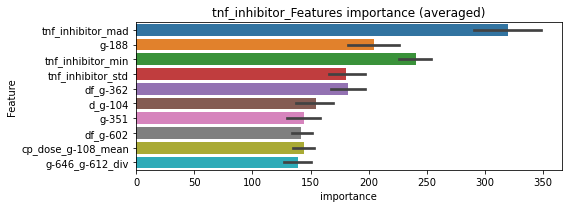

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00829699	valid_1's binary_logloss: 0.0322595
[600]	training's binary_logloss: 0.00105187	valid_1's binary_logloss: 0.0171576
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000592741	valid_1's binary_logloss: 0.0156057


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871161	valid_1's binary_logloss: 0.0221259
[600]	training's binary_logloss: 0.00108542	valid_1's binary_logloss: 0.00780258
[900]	training's binary_logloss: 0.000537005	valid_1's binary_logloss: 0.00602293
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000546976	valid_1's binary_logloss: 0.00601009


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00893925	valid_1's binary_logloss: 0.0250731
[600]	training's binary_logloss: 0.00110141	valid_1's binary_logloss: 0.0101117
[900]	training's binary_logloss: 0.000539332	valid_1's binary_logloss: 0.00811318
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000515831	valid_1's binary_logloss: 0.00795935


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00830551	valid_1's binary_logloss: 0.020398
[600]	training's binary_logloss: 0.00105212	valid_1's binary_logloss: 0.00570126
[900]	training's binary_logloss: 0.000526259	valid_1's binary_logloss: 0.0041506
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000503911	valid_1's binary_logloss: 0.00407169


tnf_inhibitor logloss: 0.008413036235455655


neg labels: 3289 → selected neg labels: 3276


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276, target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285883	valid_1's binary_logloss: 0.144074
[600]	training's binary_logloss: 0.00445816	valid_1's binary_logloss: 0.119832
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.00388198	valid_1's binary_logloss: 0.118946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0305307	valid_1's binary_logloss: 0.125705
[600]	training's binary_logloss: 0.00471067	valid_1's binary_logloss: 0.0918285
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.00207779	valid_1's binary_logloss: 0.0865105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0295954	valid_1's binary_logloss: 0.123933
[600]	training's binary_logloss: 0.00478175	valid_1's binary_logloss: 0.0935306
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.00233462	valid_1's binary_logloss: 0.0902096


1 / 3 AUC score:0.985
y_Threshold: 0.0287466, Threshold: 0.2956778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 204 → Positive_corect_labels: 619/3727
p_label_rate: 0.0100452 Vs.target_rate: 0.00533, Num_p_label: 40.0, conf_0:0.20697, conf_1:0.38438
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_1: 0.2956778
Num_p_label: 32.0, Expected: 21.2, Adj_threshold_2: 0.3456778
Num_p_label: 24.0, Expected: 21.2, Adj_threshold_3: 0.3956778
threshold: 0.3956778, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 619.0/3727, y_label_rate: 0.1660853
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215813	valid_1's binary_logloss: 0.106807
[600]	training's binary_logloss: 0.00318634	valid_1's binary_logloss: 0.0827153
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.00137554	valid_1's binary_logloss: 0.0795291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021948	valid_1's binary_logloss: 0.107428
[600]	training's binary_logloss: 0.0031556	valid_1's binary_logloss: 0.0867582
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.00164212	valid_1's binary_logloss: 0.0836592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228584	valid_1's binary_logloss: 0.083982
[600]	training's binary_logloss: 0.00337725	valid_1's binary_logloss: 0.0510992
[900]	training's binary_logloss: 0.00126933	valid_1's binary_logloss: 0.0446611
Early stopping, best iteration is:


2 / 3 AUC score:0.995
y_Threshold: 0.0622120, Threshold: 0.3956778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 586.0/3661
p_label_rate: 0.0205927 Vs.target_rate: 0.00533, Num_p_label: 82.0, conf_0:0.31654, conf_1:0.47481
Num_p_label: 82.0, Expected: 21.2, Adj_threshold_1: 0.3956778
Num_p_label: 64.0, Expected: 21.2, Adj_threshold_2: 0.4456778
Num_p_label: 51.0, Expected: 21.2, Adj_threshold_3: 0.4956778
Num_p_label: 43.0, Expected: 21.2, Adj_threshold_4: 0.5456778
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_5: 0.5956778
Num_p_label: 32.0, Expected: 21.2, Adj_threshold_6: 0.6456778
Num_p_label: 24.0, Expected: 21.2, Adj_threshold_7: 0.6956778
threshold: 0.6956778, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 586.0/3661, y_label_rate: 0.1600656
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175395	valid_1's binary_logloss: 0.094954
[600]	training's binary_logloss: 0.00245766	valid_1's binary_logloss: 0.0785507
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00177748	valid_1's binary_logloss: 0.0781448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178793	valid_1's binary_logloss: 0.0911537
[600]	training's binary_logloss: 0.00257455	valid_1's binary_logloss: 0.0642602
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00162451	valid_1's binary_logloss: 0.0617924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181975	valid_1's binary_logloss: 0.0782885
[600]	training's binary_logloss: 0.00257856	valid_1's binary_logloss: 0.0546797
[900]	training's binary_logloss: 0.00104155	valid_1's binary_logloss: 0.0511927
Early stopping, best iteration 

3 / 3 AUC score:0.994
y_Threshold: 0.0548054, Threshold: 0.6956778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 560.0/3609
p_label_rate: 0.0107986 Vs.target_rate: 0.00533, Num_p_label: 43.0, conf_0:0.50000, conf_1:0.76525
Num_p_label: 43.0, Expected: 21.2, Adj_threshold_1: 0.6956778
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_2: 0.7456778
Num_p_label: 26.0, Expected: 21.2, Adj_threshold_3: 0.7956778
threshold: 0.7956778, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 560.0/3609, y_label_rate: 0.1551676


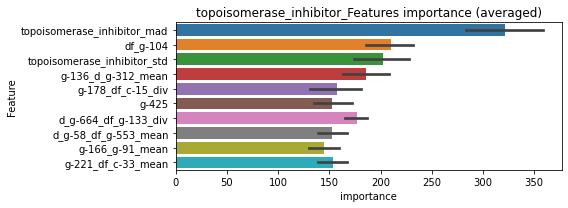

len(train_index) : 2706
len(valid_index) : 903
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151851	valid_1's binary_logloss: 0.0622904
[600]	training's binary_logloss: 0.00214117	valid_1's binary_logloss: 0.0332106
[900]	training's binary_logloss: 0.000920156	valid_1's binary_logloss: 0.028052
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000868768	valid_1's binary_logloss: 0.0274713


len(train_index) : 2707
len(valid_index) : 902
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149038	valid_1's binary_logloss: 0.0723446
[600]	training's binary_logloss: 0.00214348	valid_1's binary_logloss: 0.049494
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00188269	valid_1's binary_logloss: 0.0491081


len(train_index) : 2707
len(valid_index) : 902
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016359	valid_1's binary_logloss: 0.0832523
[600]	training's binary_logloss: 0.00224895	valid_1's binary_logloss: 0.0641895
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.0015448	valid_1's binary_logloss: 0.0627582


len(train_index) : 2707
len(valid_index) : 902
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151285	valid_1's binary_logloss: 0.076246
[600]	training's binary_logloss: 0.00214437	valid_1's binary_logloss: 0.0507287
[900]	training's binary_logloss: 0.000908184	valid_1's binary_logloss: 0.0468003
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000935242	valid_1's binary_logloss: 0.0467187


topoisomerase_inhibitor logloss: 0.04650880232495393


neg labels: 3289 → selected neg labels: 3287


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043287	valid_1's binary_logloss: 0.00708046
[600]	training's binary_logloss: 0.000565168	valid_1's binary_logloss: 0.0015487
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000347595	valid_1's binary_logloss: 0.00109576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392691	valid_1's binary_logloss: 0.0179376
[600]	training's binary_logloss: 0.000520325	valid_1's binary_logloss: 0.0119166
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000377676	valid_1's binary_logloss: 0.011419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433617	valid_1's binary_logloss: 0.00951261
[600]	training's binary_logloss: 0.000566616	valid_1's binary_logloss: 0.00324921
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000350906	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0020995, Threshold: 0.0074937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00525, conf_1:0.00974
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0074937
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0574937
threshold: 0.0574937, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423986	valid_1's binary_logloss: 0.00699438
[600]	training's binary_logloss: 0.000547585	valid_1's binary_logloss: 0.00143631
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000340086	valid_1's binary_logloss: 0.00104216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382407	valid_1's binary_logloss: 0.0180084
[600]	training's binary_logloss: 0.000500155	valid_1's binary_logloss: 0.012184
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000365402	valid_1's binary_logloss: 0.0118112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410815	valid_1's binary_logloss: 0.00850124
[600]	training's binary_logloss: 0.000537714	valid_1's binary_logloss: 0.0024682
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000363048	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0175582, Threshold: 0.0574937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00076, Num_p_label: 12.0, conf_0:0.04599, conf_1:0.06899
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0574937
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.1074937
threshold: 0.1074937, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423986	valid_1's binary_logloss: 0.00699438
[600]	training's binary_logloss: 0.000547585	valid_1's binary_logloss: 0.00143631
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000340086	valid_1's binary_logloss: 0.00104216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382407	valid_1's binary_logloss: 0.0180084
[600]	training's binary_logloss: 0.000500155	valid_1's binary_logloss: 0.012184
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000365402	valid_1's binary_logloss: 0.0118112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410815	valid_1's binary_logloss: 0.00850124
[600]	training's binary_logloss: 0.000537714	valid_1's binary_logloss: 0.0024682
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000363048	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0175582, Threshold: 0.1074937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076, Num_p_label: 5.0, conf_0:0.09674, conf_1:0.11824
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.1074937
threshold: 0.1074937, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


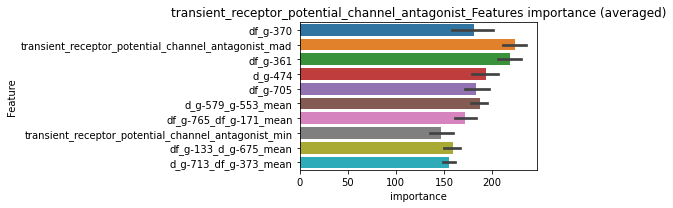

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428699	valid_1's binary_logloss: 0.00710217
[600]	training's binary_logloss: 0.000546917	valid_1's binary_logloss: 0.00147057
[900]	training's binary_logloss: 0.000336583	valid_1's binary_logloss: 0.00104965
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000336583	valid_1's binary_logloss: 0.00104965


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386931	valid_1's binary_logloss: 0.0171054
[600]	training's binary_logloss: 0.000504392	valid_1's binary_logloss: 0.0115316
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000473202	valid_1's binary_logloss: 0.0113667


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00417275	valid_1's binary_logloss: 0.00895419
[600]	training's binary_logloss: 0.000538173	valid_1's binary_logloss: 0.00286637
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000350101	valid_1's binary_logloss: 0.00237953


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415251	valid_1's binary_logloss: 0.00622998
[600]	training's binary_logloss: 0.000544901	valid_1's binary_logloss: 0.00108691
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00034079	valid_1's binary_logloss: 0.000738843


transient_receptor_potential_channel_antagonist logloss: 0.0038837446532912806


neg labels: 3289 → selected neg labels: 3289


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139037	valid_1's binary_logloss: 0.00670599
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000230854	valid_1's binary_logloss: 0.00556537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141349	valid_1's binary_logloss: 0.00162381
[600]	training's binary_logloss: 0.000205392	valid_1's binary_logloss: 0.000261118
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000178028	valid_1's binary_logloss: 0.000227995
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142073	valid_1's binary_logloss: 0.00151875
[600]	training's binary_logloss: 0.000207317	valid_1's binary_logloss: 0.000238351
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000178987	valid_1's binary_logloss: 0.000206167
Training until validation scores don't improve for 30 r

1 / 3 AUC score:1.000
y_Threshold: 0.0005937, Threshold: 0.0012801, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00090, conf_1:0.00166
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0012801
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0512801
threshold: 0.0512801, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000179585	valid_1's binary_logloss: 0.000333114


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136975	valid_1's binary_logloss: 0.00583475
[600]	training's binary_logloss: 0.000194171	valid_1's binary_logloss: 0.00449326
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000203393	valid_1's binary_logloss: 0.00447843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138295	valid_1's binary_logloss: 0.00164118
[600]	training's binary_logloss: 0.000194236	valid_1's binary_logloss: 0.000260109
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000168129	valid_1's binary_logloss: 0.000228068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139539	valid_1's binary_logloss: 0.00146324
[600]	training's binary_logloss: 0.000195842	valid_1's binary_logloss: 0.000214042
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000168923	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.0165740, Threshold: 0.0512801, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025, Num_p_label: 3.0, conf_0:0.04102, conf_1:0.06154
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0512801
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.1012801
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1512801
threshold: 0.1512801, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00016649	valid_1's binary_logloss: 0.000314482


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136975	valid_1's binary_logloss: 0.00583475
[600]	training's binary_logloss: 0.000194171	valid_1's binary_logloss: 0.00449326
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000203393	valid_1's binary_logloss: 0.00447843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138295	valid_1's binary_logloss: 0.00164118
[600]	training's binary_logloss: 0.000194236	valid_1's binary_logloss: 0.000260109
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000168129	valid_1's binary_logloss: 0.000228068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139539	valid_1's binary_logloss: 0.00146324
[600]	training's binary_logloss: 0.000195842	valid_1's binary_logloss: 0.000214042
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000168923	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.0165740, Threshold: 0.1512801, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.13615, conf_1:0.16641


Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00016649	valid_1's binary_logloss: 0.000314482


Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1512801
threshold: 0.1512801, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


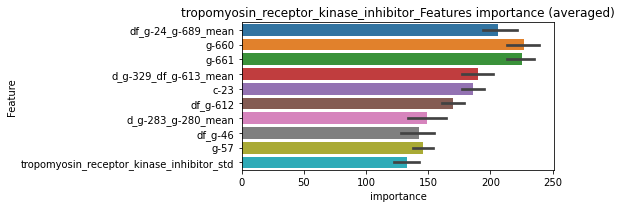

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136363	valid_1's binary_logloss: 0.00589487
[600]	training's binary_logloss: 0.000193793	valid_1's binary_logloss: 0.00475948
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000176672	valid_1's binary_logloss: 0.00474478


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138771	valid_1's binary_logloss: 0.0016054
[600]	training's binary_logloss: 0.000195586	valid_1's binary_logloss: 0.000248971


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000166665	valid_1's binary_logloss: 0.000214564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137795	valid_1's binary_logloss: 0.00144108
[600]	training's binary_logloss: 0.000195041	valid_1's binary_logloss: 0.000214118


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000168107	valid_1's binary_logloss: 0.000184892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138305	valid_1's binary_logloss: 0.00193797
[600]	training's binary_logloss: 0.000194849	valid_1's binary_logloss: 0.000424173


tropomyosin_receptor_kinase_inhibitor logloss: 0.0013822973274089387


Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000167774	valid_1's binary_logloss: 0.000381424
neg labels: 3289 → selected neg labels: 3281


trpv_agonist, len(trt): 25, len(othr): 3281, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591429	valid_1's binary_logloss: 0.0185238
[600]	training's binary_logloss: 0.000780445	valid_1's binary_logloss: 0.00652634
[900]	training's binary_logloss: 0.000409851	valid_1's binary_logloss: 0.005223
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000400862	valid_1's binary_logloss: 0.00519117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580722	valid_1's binary_logloss: 0.0196854
[600]	training's binary_logloss: 0.00077838	valid_1's binary_logloss: 0.00793139
[900]	training's binary_logloss: 0.000417107	valid_1's binary_logloss: 0.00645861
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000417503	valid_1's binary_logloss: 0.0064556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599043	valid_1's binary_logloss: 0.0165871
[600]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0034392, Threshold: 0.0175724, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.01230, conf_1:0.02284
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0175724
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_2: 0.0675724
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_3: 0.1175724
threshold: 0.1175724, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00565028	valid_1's binary_logloss: 0.0157427
[600]	training's binary_logloss: 0.000729007	valid_1's binary_logloss: 0.00545015
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000420986	valid_1's binary_logloss: 0.00431633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550398	valid_1's binary_logloss: 0.0171749
[600]	training's binary_logloss: 0.000723109	valid_1's binary_logloss: 0.00620714
[900]	training's binary_logloss: 0.000405905	valid_1's binary_logloss: 0.00488948
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000405905	valid_1's binary_logloss: 0.00488948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541559	valid_1's binary_logloss: 0.0177708
[600]	training's binary_logloss: 0.000716766	valid_1's binary_logloss: 0.00689831
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.1712771, Threshold: 0.1175724, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0095429 Vs.target_rate: 0.00105, Num_p_label: 38.0, conf_0:0.09406, conf_1:0.14109
Num_p_label: 38.0, Expected: 4.2, Adj_threshold_1: 0.1175724
Num_p_label: 34.0, Expected: 4.2, Adj_threshold_2: 0.1675724
Num_p_label: 30.0, Expected: 4.2, Adj_threshold_3: 0.2175724
Num_p_label: 24.0, Expected: 4.2, Adj_threshold_4: 0.2675724
Num_p_label: 22.0, Expected: 4.2, Adj_threshold_5: 0.3175724
Num_p_label: 22.0, Expected: 4.2, Adj_threshold_6: 0.3675724
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_7: 0.4175724
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_8: 0.4675724
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_9: 0.5175724
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_10: 0.5675724
threshold: 0.6175724, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538573	valid_1's binary_logloss: 0.0188701
[600]	training's binary_logloss: 0.000707312	valid_1's binary_logloss: 0.00835178
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000409525	valid_1's binary_logloss: 0.0069385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541895	valid_1's binary_logloss: 0.0154514
[600]	training's binary_logloss: 0.000714906	valid_1's binary_logloss: 0.00700934
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000425119	valid_1's binary_logloss: 0.00626205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00543785	valid_1's binary_logloss: 0.015611
[600]	training's binary_logloss: 0.000718507	valid_1's binary_logloss: 0.00560332
[900]	training's binary_logloss: 0.000404111	valid_1's binary_logloss: 0.00456992
Early stopping, b

3 / 3 AUC score:1.000
y_Threshold: 0.1642803, Threshold: 0.6175724, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00105, Num_p_label: 12.0, conf_0:0.50000, conf_1:0.67933
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_1: 0.6175724
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_2: 0.6675724
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_3: 0.7175724
threshold: 0.7175724, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


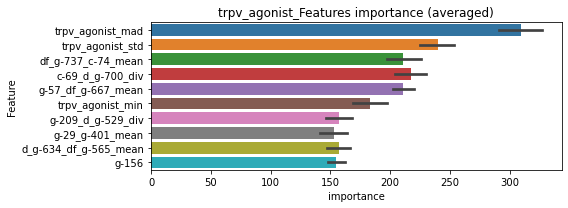

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00536118	valid_1's binary_logloss: 0.0154254
[600]	training's binary_logloss: 0.00070701	valid_1's binary_logloss: 0.00548026
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000407536	valid_1's binary_logloss: 0.00428122


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00537588	valid_1's binary_logloss: 0.016679
[600]	training's binary_logloss: 0.000703597	valid_1's binary_logloss: 0.00583026
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000416254	valid_1's binary_logloss: 0.00478976


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00553019	valid_1's binary_logloss: 0.0150337
[600]	training's binary_logloss: 0.000715844	valid_1's binary_logloss: 0.00501321
[900]	training's binary_logloss: 0.000405252	valid_1's binary_logloss: 0.00402862
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000409877	valid_1's binary_logloss: 0.00400838


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521401	valid_1's binary_logloss: 0.0142231
[600]	training's binary_logloss: 0.000695948	valid_1's binary_logloss: 0.00421255
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000434765	valid_1's binary_logloss: 0.00334466


trpv_agonist logloss: 0.004109066804888333


neg labels: 3289 → selected neg labels: 3280


trpv_antagonist, len(trt): 48, len(othr): 3280, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00945203	valid_1's binary_logloss: 0.0486754
[600]	training's binary_logloss: 0.00128982	valid_1's binary_logloss: 0.0266545
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000644239	valid_1's binary_logloss: 0.0245642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102606	valid_1's binary_logloss: 0.0419554
[600]	training's binary_logloss: 0.00135525	valid_1's binary_logloss: 0.0202816
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000734854	valid_1's binary_logloss: 0.0177255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106691	valid_1's binary_logloss: 0.0268312
[600]	training's binary_logloss: 0.00141442	valid_1's binary_logloss: 0.00969924
[900]	training's binary_logloss: 0.000628865	valid_1's binary_logloss: 0.00766968
Early stopping, best ite

1 / 3 AUC score:1.000
y_Threshold: 0.0086312, Threshold: 0.0478093, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.03347, conf_1:0.06215
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0478093
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_2: 0.0978093
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_3: 0.1478093
threshold: 0.1478093, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00884508	valid_1's binary_logloss: 0.0438394
[600]	training's binary_logloss: 0.00118821	valid_1's binary_logloss: 0.0252073
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000875722	valid_1's binary_logloss: 0.0240272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00891813	valid_1's binary_logloss: 0.0337237
[600]	training's binary_logloss: 0.00121286	valid_1's binary_logloss: 0.0183355
[900]	training's binary_logloss: 0.000554324	valid_1's binary_logloss: 0.0164749
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000566532	valid_1's binary_logloss: 0.0164644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00930674	valid_1's binary_logloss: 0.0269475
[600]	training's binary_logloss: 0.00125493	valid_1's binary_logloss: 0.00990676
[900]	training's binary

2 / 3 AUC score:0.999
y_Threshold: 0.0413404, Threshold: 0.1478093, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0130588 Vs.target_rate: 0.00202, Num_p_label: 52.0, conf_0:0.11825, conf_1:0.17737
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_1: 0.1478093
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_2: 0.1978093
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_3: 0.2478093
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_4: 0.2978093
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_5: 0.3478093
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_6: 0.3978093
threshold: 0.3978093, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00868957	valid_1's binary_logloss: 0.0315546
[600]	training's binary_logloss: 0.00117234	valid_1's binary_logloss: 0.0141654
[900]	training's binary_logloss: 0.000542445	valid_1's binary_logloss: 0.0113999
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000501556	valid_1's binary_logloss: 0.0111934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00874426	valid_1's binary_logloss: 0.0326993
[600]	training's binary_logloss: 0.00117181	valid_1's binary_logloss: 0.0193999
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00106665	valid_1's binary_logloss: 0.0190411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00879554	valid_1's binary_logloss: 0.0322017
[600]	training's binary_logloss: 0.00119183	valid_1's binary_logloss: 0.0148959
[900]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0529056, Threshold: 0.3978093, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0042692 Vs.target_rate: 0.00202, Num_p_label: 17.0, conf_0:0.35803, conf_1:0.43759
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_1: 0.3978093
threshold: 0.3978093, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3778, y_label_rate: 0.1701959


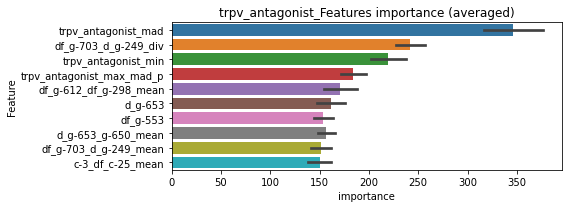

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00815117	valid_1's binary_logloss: 0.0387191
[600]	training's binary_logloss: 0.0011086	valid_1's binary_logloss: 0.0198351
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000559295	valid_1's binary_logloss: 0.0169386


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00866885	valid_1's binary_logloss: 0.0287605
[600]	training's binary_logloss: 0.00115414	valid_1's binary_logloss: 0.0142965
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000592409	valid_1's binary_logloss: 0.0125821


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00859484	valid_1's binary_logloss: 0.0363021
[600]	training's binary_logloss: 0.00112694	valid_1's binary_logloss: 0.0174277
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000679549	valid_1's binary_logloss: 0.0156067


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00868015	valid_1's binary_logloss: 0.0301157
[600]	training's binary_logloss: 0.0011498	valid_1's binary_logloss: 0.0153301
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000567263	valid_1's binary_logloss: 0.0136476


trpv_antagonist logloss: 0.014693780946554704


neg labels: 3289 → selected neg labels: 3253


tubulin_inhibitor, len(trt): 316, len(othr): 3253, target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.077902	valid_1's binary_logloss: 0.327681
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.047636	valid_1's binary_logloss: 0.322886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0779307	valid_1's binary_logloss: 0.324682
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.046156	valid_1's binary_logloss: 0.320354
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0812481	valid_1's binary_logloss: 0.317979
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.0393466	valid_1's binary_logloss: 0.313494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0789836	valid_1's binary_logloss: 0.305154


1 / 3 AUC score:0.828
y_Threshold: 0.1096829, Threshold: 0.3163372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 565 → Positive_corect_labels: 433/3338


Early stopping, best iteration is:
[357]	training's binary_logloss: 0.0618378	valid_1's binary_logloss: 0.30135


p_label_rate: 0.0100452 Vs.target_rate: 0.01327, Num_p_label: 40.0, conf_0:0.22144, conf_1:0.41124
threshold: 0.3163372, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 433.0/3338, y_label_rate: 0.1297184
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256378	valid_1's binary_logloss: 0.180637
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00796961	valid_1's binary_logloss: 0.1713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0248087	valid_1's binary_logloss: 0.158236
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00739141	valid_1's binary_logloss: 0.147858
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0259332	valid_1's binary_logloss: 0.162466
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00623431	valid_1's binary_logloss: 0.148195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0240747	valid_1's binary_logloss: 0.163874
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00828729	valid_1's binary_logloss:

2 / 3 AUC score:0.962
y_Threshold: 0.0798468, Threshold: 0.3163372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 360.0/3192
p_label_rate: 0.0200904 Vs.target_rate: 0.01327, Num_p_label: 80.0, conf_0:0.25307, conf_1:0.37960
Num_p_label: 80.0, Expected: 52.8, Adj_threshold_1: 0.3163372
Num_p_label: 73.0, Expected: 52.8, Adj_threshold_2: 0.3663372
threshold: 0.3663372, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 360.0/3192, y_label_rate: 0.1127820
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148832	valid_1's binary_logloss: 0.139666
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00611962	valid_1's binary_logloss: 0.13271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157482	valid_1's binary_logloss: 0.10267
[600]	training's binary_logloss: 0.00252792	valid_1's binary_logloss: 0.0842806
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00143498	valid_1's binary_logloss: 0.0812811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160639	valid_1's binary_logloss: 0.0987091
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00325878	valid_1's binary_logloss: 0.0839483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162626	valid_1's binary_logloss: 0.103709
[600]	training's bina

3 / 3 AUC score:0.986
y_Threshold: 0.0621548, Threshold: 0.3663372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 325.0/3122
p_label_rate: 0.0291311 Vs.target_rate: 0.01327, Num_p_label: 116.0, conf_0:0.32970, conf_1:0.40297
Num_p_label: 116.0, Expected: 52.8, Adj_threshold_1: 0.3663372
Num_p_label: 112.0, Expected: 52.8, Adj_threshold_2: 0.4163372
Num_p_label: 106.0, Expected: 52.8, Adj_threshold_3: 0.4663372
Num_p_label: 99.0, Expected: 52.8, Adj_threshold_4: 0.5163372
Num_p_label: 94.0, Expected: 52.8, Adj_threshold_5: 0.5663372
Num_p_label: 90.0, Expected: 52.8, Adj_threshold_6: 0.6163372
Num_p_label: 82.0, Expected: 52.8, Adj_threshold_7: 0.6663372
Num_p_label: 79.0, Expected: 52.8, Adj_threshold_8: 0.7163372
threshold: 0.7163372, positive_p_label: 79.0/3982, p_label_rate: 0.0198393
positive_y_label: 325.0/3122, y_label_rate: 0.1040999


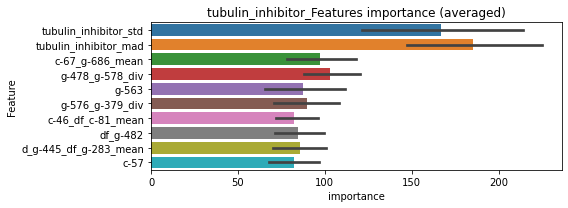

len(train_index) : 2341
len(valid_index) : 781
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112193	valid_1's binary_logloss: 0.0983188
[600]	training's binary_logloss: 0.00183701	valid_1's binary_logloss: 0.0844296
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00142208	valid_1's binary_logloss: 0.082848


len(train_index) : 2341
len(valid_index) : 781
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011494	valid_1's binary_logloss: 0.0982657


len(train_index) : 2342
len(valid_index) : 780


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00290644	valid_1's binary_logloss: 0.0906199


================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115653	valid_1's binary_logloss: 0.0920883
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00518093	valid_1's binary_logloss: 0.0880016


len(train_index) : 2342
len(valid_index) : 780
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112846	valid_1's binary_logloss: 0.110904


tubulin_inhibitor logloss: 0.09154710404190604


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.0039312	valid_1's binary_logloss: 0.104731
neg labels: 3289 → selected neg labels: 3281


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016531	valid_1's binary_logloss: 0.0799783
[600]	training's binary_logloss: 0.00227404	valid_1's binary_logloss: 0.0520522
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.00126896	valid_1's binary_logloss: 0.0495704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168248	valid_1's binary_logloss: 0.0953742
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00317569	valid_1's binary_logloss: 0.0826585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179284	valid_1's binary_logloss: 0.0619809
[600]	training's binary_logloss: 0.00244128	valid_1's binary_logloss: 0.0370223
[900]	training's binary_logloss: 0.000953532	valid_1's binary_logloss: 0.0328772
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000951082	valid_1's binary_logloss: 0.03

1 / 3 AUC score:0.994
y_Threshold: 0.0159816, Threshold: 0.1309480, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 641/3775
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.09166, conf_1:0.17023
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.1309480
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_2: 0.1809480
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_3: 0.2309480
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_4: 0.2809480
threshold: 0.2809480, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 641.0/3775, y_label_rate: 0.1698013
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127232	valid_1's binary_logloss: 0.0573476
[600]	training's binary_logloss: 0.00175077	valid_1's binary_logloss: 0.0294558
[900]	training's binary_logloss: 0.000763275	valid_1's binary_logloss: 0.0245008
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.0007585	valid_1's binary_logloss: 0.0243934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132697	valid_1's binary_logloss: 0.0637306
[600]	training's binary_logloss: 0.00178568	valid_1's binary_logloss: 0.0478707
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.00125665	valid_1's binary_logloss: 0.0460617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131683	valid_1's binary_logloss: 0.0572923
[600]	training's binary_logloss: 0.00177433	valid_1's binary_logloss: 0.0350183
Early stopping, best iteration

2 / 3 AUC score:0.999
y_Threshold: 0.0924263, Threshold: 0.2809480, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 629.0/3751
p_label_rate: 0.0180814 Vs.target_rate: 0.00307, Num_p_label: 72.0, conf_0:0.22476, conf_1:0.33714
Num_p_label: 72.0, Expected: 12.2, Adj_threshold_1: 0.2809480
Num_p_label: 63.0, Expected: 12.2, Adj_threshold_2: 0.3309480
Num_p_label: 56.0, Expected: 12.2, Adj_threshold_3: 0.3809480
Num_p_label: 50.0, Expected: 12.2, Adj_threshold_4: 0.4309480
Num_p_label: 45.0, Expected: 12.2, Adj_threshold_5: 0.4809480
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_6: 0.5309480
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_7: 0.5809480
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_8: 0.6309480
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_9: 0.6809480
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_10: 0.7309480
threshold: 0.7809480, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 629.0/3751, y_label_rate: 0.1676886

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122762	valid_1's binary_logloss: 0.0555742
[600]	training's binary_logloss: 0.00165358	valid_1's binary_logloss: 0.0347118
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000856595	valid_1's binary_logloss: 0.0316661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117649	valid_1's binary_logloss: 0.0469311
[600]	training's binary_logloss: 0.00161103	valid_1's binary_logloss: 0.0319932
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000979907	valid_1's binary_logloss: 0.0310909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120705	valid_1's binary_logloss: 0.0449462
[600]	training's binary_logloss: 0.0016484	valid_1's binary_logloss: 0.0223696
[900]	training's binary_logloss: 0.00073116	valid_1's binary_logloss: 0.0184097
Early stopping, best iteratio

3 / 3 AUC score:0.999
y_Threshold: 0.0781912, Threshold: 0.7809480, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 620.0/3733
p_label_rate: 0.0085384 Vs.target_rate: 0.00307, Num_p_label: 34.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_1: 0.7809480
threshold: 0.7809480, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 620.0/3733, y_label_rate: 0.1660863


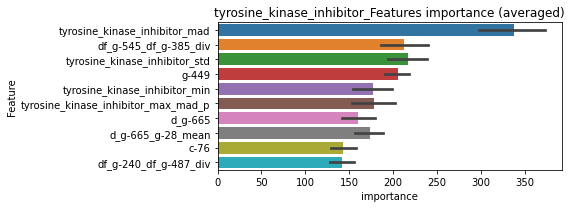

len(train_index) : 2799
len(valid_index) : 934
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111479	valid_1's binary_logloss: 0.0451719
[600]	training's binary_logloss: 0.00153271	valid_1's binary_logloss: 0.0239261
[900]	training's binary_logloss: 0.000699062	valid_1's binary_logloss: 0.0202528
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000699777	valid_1's binary_logloss: 0.0202322


len(train_index) : 2800
len(valid_index) : 933
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118815	valid_1's binary_logloss: 0.0460885
[600]	training's binary_logloss: 0.00160149	valid_1's binary_logloss: 0.0260107
[900]	training's binary_logloss: 0.000706785	valid_1's binary_logloss: 0.0221232
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000673051	valid_1's binary_logloss: 0.0218414


len(train_index) : 2800
len(valid_index) : 933
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122733	valid_1's binary_logloss: 0.0383146
[600]	training's binary_logloss: 0.00161402	valid_1's binary_logloss: 0.0173174
[900]	training's binary_logloss: 0.000721131	valid_1's binary_logloss: 0.0142357
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.000627552	valid_1's binary_logloss: 0.0138428


len(train_index) : 2800
len(valid_index) : 933
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110782	valid_1's binary_logloss: 0.0601886
[600]	training's binary_logloss: 0.00149979	valid_1's binary_logloss: 0.0466554
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00151245	valid_1's binary_logloss: 0.0465964


tyrosine_kinase_inhibitor logloss: 0.025629259872709656


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296855	valid_1's binary_logloss: 0.00500672
[600]	training's binary_logloss: 0.000371665	valid_1's binary_logloss: 0.000938719
[900]	training's binary_logloss: 0.00025589	valid_1's binary_logloss: 0.000699652
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000255868	valid_1's binary_logloss: 0.000699636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289772	valid_1's binary_logloss: 0.00584943
[600]	training's binary_logloss: 0.000372706	valid_1's binary_logloss: 0.00146587
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000262228	valid_1's binary_logloss: 0.00112436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295609	valid_1's binary_logloss: 0.00503571
[600]	training's binary_logloss: 0.00037672	valid_1's binary_logloss: 0.000932455
Early stop

1 / 3 AUC score:1.000
y_Threshold: 0.0015232, Threshold: 0.0052488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00367, conf_1:0.00682
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0052488
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0552488
threshold: 0.0552488, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277764	valid_1's binary_logloss: 0.00380322
[600]	training's binary_logloss: 0.000352619	valid_1's binary_logloss: 0.000611014
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000249282	valid_1's binary_logloss: 0.00046585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272772	valid_1's binary_logloss: 0.00485278
[600]	training's binary_logloss: 0.000348762	valid_1's binary_logloss: 0.000840567
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000251807	valid_1's binary_logloss: 0.000639222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274363	valid_1's binary_logloss: 0.00439897
[600]	training's binary_logloss: 0.000347314	valid_1's binary_logloss: 0.000789675
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000247794	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.0695930, Threshold: 0.0552488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00050, Num_p_label: 17.0, conf_0:0.04420, conf_1:0.06630
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.0552488
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.1052488
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.1552488
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_4: 0.2052488
threshold: 0.2052488, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277764	valid_1's binary_logloss: 0.00380322
[600]	training's binary_logloss: 0.000352619	valid_1's binary_logloss: 0.000611014
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000249282	valid_1's binary_logloss: 0.00046585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272772	valid_1's binary_logloss: 0.00485278
[600]	training's binary_logloss: 0.000348762	valid_1's binary_logloss: 0.000840567
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000251807	valid_1's binary_logloss: 0.000639222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274363	valid_1's binary_logloss: 0.00439897
[600]	training's binary_logloss: 0.000347314	valid_1's binary_logloss: 0.000789675
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000247794	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.0695930, Threshold: 0.2052488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.18472, conf_1:0.22577
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.2052488
threshold: 0.2052488, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


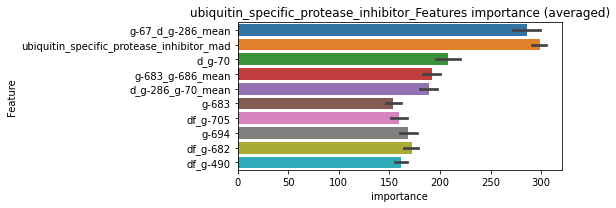

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277573	valid_1's binary_logloss: 0.00384712
[600]	training's binary_logloss: 0.000351135	valid_1's binary_logloss: 0.000618148
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000250854	valid_1's binary_logloss: 0.000472551


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273162	valid_1's binary_logloss: 0.00472062
[600]	training's binary_logloss: 0.000346386	valid_1's binary_logloss: 0.000792095
[900]	training's binary_logloss: 0.000248715	valid_1's binary_logloss: 0.00060996
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000248715	valid_1's binary_logloss: 0.00060996


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002754	valid_1's binary_logloss: 0.00437827
[600]	training's binary_logloss: 0.000348788	valid_1's binary_logloss: 0.000779177
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000247515	valid_1's binary_logloss: 0.000606064


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272182	valid_1's binary_logloss: 0.00706221
[600]	training's binary_logloss: 0.000347578	valid_1's binary_logloss: 0.00201509
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000258793	valid_1's binary_logloss: 0.00176403


ubiquitin_specific_protease_inhibitor logloss: 0.0008638340128785938


neg labels: 3289 → selected neg labels: 3264


vegfr_inhibitor, len(trt): 170, len(othr): 3264, target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0416883	valid_1's binary_logloss: 0.201323
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.0132391	valid_1's binary_logloss: 0.186307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.045729	valid_1's binary_logloss: 0.172536
[600]	training's binary_logloss: 0.0087182	valid_1's binary_logloss: 0.146503
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00942801	valid_1's binary_logloss: 0.146138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0434805	valid_1's binary_logloss: 0.181651
[600]	training's binary_logloss: 0.00844476	valid_1's binary_logloss: 0.164736
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00906966	valid_1's binary_logloss: 0.164567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_l

1 / 3 AUC score:0.952
y_Threshold: 0.0513633, Threshold: 0.3661662, pos_neg_ratio: 0.8000000
Remove_noisy_data: 290 → Positive_corect_labels: 573/3626
p_label_rate: 0.0100452 Vs.target_rate: 0.00714, Num_p_label: 40.0, conf_0:0.25632, conf_1:0.47602
threshold: 0.3661662, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 573.0/3626, y_label_rate: 0.1580254
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226537	valid_1's binary_logloss: 0.122974
[600]	training's binary_logloss: 0.00336428	valid_1's binary_logloss: 0.0972923
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00318519	valid_1's binary_logloss: 0.096852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210597	valid_1's binary_logloss: 0.112955
[600]	training's binary_logloss: 0.00323601	valid_1's binary_logloss: 0.0898723
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00302036	valid_1's binary_logloss: 0.0895536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236939	valid_1's binary_logloss: 0.089347
[600]	training's binary_logloss: 0.00355363	valid_1's binary_logloss: 0.0632886
[900]	training's binary_logloss: 0.00131765	valid_1's binary_logloss: 0.0588092
Early stopping, best iteration is:

2 / 3 AUC score:0.992
y_Threshold: 0.0705333, Threshold: 0.3661662, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 532.0/3544
p_label_rate: 0.0298845 Vs.target_rate: 0.00714, Num_p_label: 119.0, conf_0:0.29293, conf_1:0.43940
Num_p_label: 119.0, Expected: 28.4, Adj_threshold_1: 0.3661662
Num_p_label: 114.0, Expected: 28.4, Adj_threshold_2: 0.4161662
Num_p_label: 106.0, Expected: 28.4, Adj_threshold_3: 0.4661662
Num_p_label: 97.0, Expected: 28.4, Adj_threshold_4: 0.5161662
Num_p_label: 88.0, Expected: 28.4, Adj_threshold_5: 0.5661662
Num_p_label: 76.0, Expected: 28.4, Adj_threshold_6: 0.6161662
Num_p_label: 69.0, Expected: 28.4, Adj_threshold_7: 0.6661662
Num_p_label: 65.0, Expected: 28.4, Adj_threshold_8: 0.7161662
Num_p_label: 58.0, Expected: 28.4, Adj_threshold_9: 0.7661662
threshold: 0.7661662, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 532.0/3544, y_label_rate: 0.1501129
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154283	valid_1's binary_logloss: 0.0995374
[600]	training's binary_logloss: 0.00227398	valid_1's binary_logloss: 0.0814975
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00144042	valid_1's binary_logloss: 0.0787706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170756	valid_1's binary_logloss: 0.0834305
[600]	training's binary_logloss: 0.00247136	valid_1's binary_logloss: 0.06764
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.00133688	valid_1's binary_logloss: 0.0657825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172878	valid_1's binary_logloss: 0.0882659
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00342978	valid_1's binary_logloss: 0.0726223
Training until validation scores don't improve for 30 rounds
[300]	training's

3 / 3 AUC score:0.994
y_Threshold: 0.0567231, Threshold: 0.7661662, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 507.0/3494
p_label_rate: 0.0208438 Vs.target_rate: 0.00714, Num_p_label: 83.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 83.0, Expected: 28.4, Adj_threshold_1: 0.7661662
threshold: 0.7661662, positive_p_label: 83.0/3982, p_label_rate: 0.0208438
positive_y_label: 507.0/3494, y_label_rate: 0.1451059


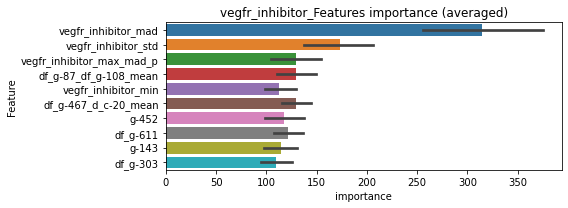

len(train_index) : 2620
len(valid_index) : 874
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143708	valid_1's binary_logloss: 0.0725997
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00307283	valid_1's binary_logloss: 0.0600594


len(train_index) : 2620
len(valid_index) : 874
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146846	valid_1's binary_logloss: 0.0722509
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00287801	valid_1's binary_logloss: 0.0561096


len(train_index) : 2621
len(valid_index) : 873
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142676	valid_1's binary_logloss: 0.0727747
[600]	training's binary_logloss: 0.00203022	valid_1's binary_logloss: 0.0554178
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00226268	valid_1's binary_logloss: 0.0552632


len(train_index) : 2621
len(valid_index) : 873
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135156	valid_1's binary_logloss: 0.0994423
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00233071	valid_1's binary_logloss: 0.0886453


vegfr_inhibitor logloss: 0.06501540065034508


neg labels: 3289 → selected neg labels: 3286


vitamin_b, len(trt): 26, len(othr): 3286, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00587798	valid_1's binary_logloss: 0.0147861
[600]	training's binary_logloss: 0.000752467	valid_1's binary_logloss: 0.00562924
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000406699	valid_1's binary_logloss: 0.00479036
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00561411	valid_1's binary_logloss: 0.0158325
[600]	training's binary_logloss: 0.000746602	valid_1's binary_logloss: 0.00515186
[900]	training's binary_logloss: 0.00038968	valid_1's binary_logloss: 0.00389661
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000383577	valid_1's binary_logloss: 0.00389068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597479	valid_1's binary_logloss: 0.014034
[600]	training's binary_logloss: 0.000756049	valid_1's binary_logloss: 0.00327571
[900]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0035274, Threshold: 0.0126622, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.00886, conf_1:0.01646
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0126622
Num_p_label: 4.0, Expected: 4.3, Adj_threshold_2: 0.0626622
threshold: 0.0626622, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054609	valid_1's binary_logloss: 0.0138188
[600]	training's binary_logloss: 0.000711256	valid_1's binary_logloss: 0.0053228
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000389023	valid_1's binary_logloss: 0.004465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545521	valid_1's binary_logloss: 0.0143047
[600]	training's binary_logloss: 0.000700821	valid_1's binary_logloss: 0.00443521
[900]	training's binary_logloss: 0.000373932	valid_1's binary_logloss: 0.00336975
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000375487	valid_1's binary_logloss: 0.0033684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054029	valid_1's binary_logloss: 0.0117655
[600]	training's binary_logloss: 0.000710177	valid_1's binary_logloss: 0.00255643
[900]	training's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0414239, Threshold: 0.0626622, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0072828 Vs.target_rate: 0.00109, Num_p_label: 29.0, conf_0:0.05013, conf_1:0.07519
Num_p_label: 29.0, Expected: 4.3, Adj_threshold_1: 0.0626622
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_2: 0.1126622
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_3: 0.1626622
threshold: 0.1626622, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054609	valid_1's binary_logloss: 0.0138188
[600]	training's binary_logloss: 0.000711256	valid_1's binary_logloss: 0.0053228
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000389023	valid_1's binary_logloss: 0.004465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545521	valid_1's binary_logloss: 0.0143047
[600]	training's binary_logloss: 0.000700821	valid_1's binary_logloss: 0.00443521
[900]	training's binary_logloss: 0.000373932	valid_1's binary_logloss: 0.00336975
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000375487	valid_1's binary_logloss: 0.0033684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054029	valid_1's binary_logloss: 0.0117655
[600]	training's binary_logloss: 0.000710177	valid_1's binary_logloss: 0.00255643
[900]	training's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0414239, Threshold: 0.1626622, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00109, Num_p_label: 9.0, conf_0:0.14640, conf_1:0.17893
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_1: 0.1626622
threshold: 0.1626622, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


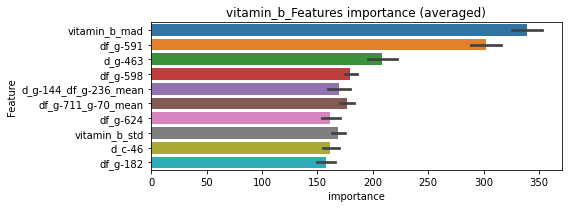

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531695	valid_1's binary_logloss: 0.0138983
[600]	training's binary_logloss: 0.000693015	valid_1's binary_logloss: 0.00546192
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000388111	valid_1's binary_logloss: 0.00491344


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00544732	valid_1's binary_logloss: 0.0141315
[600]	training's binary_logloss: 0.000713247	valid_1's binary_logloss: 0.00421136
[900]	training's binary_logloss: 0.000379107	valid_1's binary_logloss: 0.00319508
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000379646	valid_1's binary_logloss: 0.00319162


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00543296	valid_1's binary_logloss: 0.0115667
[600]	training's binary_logloss: 0.000699886	valid_1's binary_logloss: 0.00253551
[900]	training's binary_logloss: 0.000379069	valid_1's binary_logloss: 0.00165554
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000379069	valid_1's binary_logloss: 0.00165554


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00527498	valid_1's binary_logloss: 0.0235103
[600]	training's binary_logloss: 0.000683852	valid_1's binary_logloss: 0.0105748
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000504732	valid_1's binary_logloss: 0.00986895


vitamin_b logloss: 0.004907649052441558


neg labels: 3289 → selected neg labels: 3284


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3284, target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114197	valid_1's binary_logloss: 0.0332119
[600]	training's binary_logloss: 0.00132114	valid_1's binary_logloss: 0.0158059
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000822081	valid_1's binary_logloss: 0.0143476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114202	valid_1's binary_logloss: 0.0253735
[600]	training's binary_logloss: 0.00133915	valid_1's binary_logloss: 0.00634542
[900]	training's binary_logloss: 0.000586795	valid_1's binary_logloss: 0.00415788
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000528012	valid_1's binary_logloss: 0.00400959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112931	valid_1's binary_logloss: 0.0270302
[600]	training's binary_logloss: 0.00131961	valid_1's binary_logloss: 0.00816643
[900]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0058935, Threshold: 0.0320853, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00164, Num_p_label: 40.0, conf_0:0.02246, conf_1:0.04171
Num_p_label: 40.0, Expected: 6.5, Adj_threshold_1: 0.0320853
Num_p_label: 11.0, Expected: 6.5, Adj_threshold_2: 0.0820853
threshold: 0.0820853, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00982793	valid_1's binary_logloss: 0.032024
[600]	training's binary_logloss: 0.00119726	valid_1's binary_logloss: 0.0166028
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.00060821	valid_1's binary_logloss: 0.0150182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105394	valid_1's binary_logloss: 0.023807
[600]	training's binary_logloss: 0.00124224	valid_1's binary_logloss: 0.00558899
[900]	training's binary_logloss: 0.000553328	valid_1's binary_logloss: 0.00353869
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000514929	valid_1's binary_logloss: 0.00337959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100604	valid_1's binary_logloss: 0.0238176
[600]	training's binary_logloss: 0.00122812	valid_1's binary_logloss: 0.00741129
[900]	training's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0350145, Threshold: 0.0820853, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0092918 Vs.target_rate: 0.00164, Num_p_label: 37.0, conf_0:0.06567, conf_1:0.09850
Num_p_label: 37.0, Expected: 6.5, Adj_threshold_1: 0.0820853
Num_p_label: 23.0, Expected: 6.5, Adj_threshold_2: 0.1320853
Num_p_label: 15.0, Expected: 6.5, Adj_threshold_3: 0.1820853
threshold: 0.1820853, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999265	valid_1's binary_logloss: 0.0221241
[600]	training's binary_logloss: 0.0012163	valid_1's binary_logloss: 0.00690082
[900]	training's binary_logloss: 0.000551992	valid_1's binary_logloss: 0.00521645
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.00052785	valid_1's binary_logloss: 0.00513072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100986	valid_1's binary_logloss: 0.0243106
[600]	training's binary_logloss: 0.00121914	valid_1's binary_logloss: 0.00556687
[900]	training's binary_logloss: 0.000549285	valid_1's binary_logloss: 0.00349591
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000512182	valid_1's binary_logloss: 0.00339252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00972728	valid_1's binary_logloss: 0.0222169
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0309954, Threshold: 0.1820853, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0035158 Vs.target_rate: 0.00164, Num_p_label: 14.0, conf_0:0.16388, conf_1:0.20029
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_1: 0.1820853
threshold: 0.1820853, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


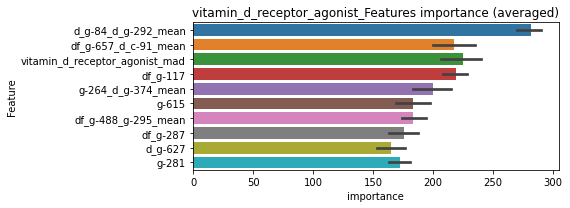

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103606	valid_1's binary_logloss: 0.0243222
[600]	training's binary_logloss: 0.00123325	valid_1's binary_logloss: 0.00780737
[900]	training's binary_logloss: 0.000553731	valid_1's binary_logloss: 0.00588233
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000522742	valid_1's binary_logloss: 0.00579889


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010502	valid_1's binary_logloss: 0.024011
[600]	training's binary_logloss: 0.00123401	valid_1's binary_logloss: 0.00555384
[900]	training's binary_logloss: 0.000551746	valid_1's binary_logloss: 0.00334596
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000503687	valid_1's binary_logloss: 0.00323911


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102526	valid_1's binary_logloss: 0.0230895
[600]	training's binary_logloss: 0.0012251	valid_1's binary_logloss: 0.00613976
[900]	training's binary_logloss: 0.00055411	valid_1's binary_logloss: 0.0042289
Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.000504994	valid_1's binary_logloss: 0.00404466


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00996741	valid_1's binary_logloss: 0.0269748
[600]	training's binary_logloss: 0.00121466	valid_1's binary_logloss: 0.00974517
[900]	training's binary_logloss: 0.000552329	valid_1's binary_logloss: 0.00814582
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000521215	valid_1's binary_logloss: 0.00806392


vitamin_d_receptor_agonist logloss: 0.0052865417898673925


neg labels: 3289 → selected neg labels: 3287


wnt_inhibitor, len(trt): 30, len(othr): 3287, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721892	valid_1's binary_logloss: 0.0242444
[600]	training's binary_logloss: 0.000914574	valid_1's binary_logloss: 0.0114974
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000569743	valid_1's binary_logloss: 0.0102446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00710424	valid_1's binary_logloss: 0.0319166
[600]	training's binary_logloss: 0.000907995	valid_1's binary_logloss: 0.0206446
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000565418	valid_1's binary_logloss: 0.0192829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709902	valid_1's binary_logloss: 0.0212491
[600]	training's binary_logloss: 0.000909656	valid_1's binary_logloss: 0.00790032
[900]	training's binary_logloss: 0.000458114	valid_1's binary_logloss: 0.00636227
Early stopping, bes

1 / 3 AUC score:1.000
y_Threshold: 0.0047342, Threshold: 0.0502401, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.03517, conf_1:0.06531
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0502401
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_2: 0.1002401
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.1502401
threshold: 0.1502401, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065778	valid_1's binary_logloss: 0.019968
[600]	training's binary_logloss: 0.000840678	valid_1's binary_logloss: 0.00796188
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000449768	valid_1's binary_logloss: 0.00655929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00635726	valid_1's binary_logloss: 0.0293463
[600]	training's binary_logloss: 0.000823946	valid_1's binary_logloss: 0.0210271
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000627955	valid_1's binary_logloss: 0.0205026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00655545	valid_1's binary_logloss: 0.0168171
[600]	training's binary_logloss: 0.000837648	valid_1's binary_logloss: 0.00519477
[900]	training's binary_logloss: 0.000445067	valid_1's binary_logloss: 0.003886
Early stopping, best 

2 / 3 AUC score:1.000
y_Threshold: 0.0577095, Threshold: 0.1502401, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0128076 Vs.target_rate: 0.00126, Num_p_label: 51.0, conf_0:0.12019, conf_1:0.18029
Num_p_label: 51.0, Expected: 5.0, Adj_threshold_1: 0.1502401
Num_p_label: 46.0, Expected: 5.0, Adj_threshold_2: 0.2002401
Num_p_label: 35.0, Expected: 5.0, Adj_threshold_3: 0.2502401
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_4: 0.3002401
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_5: 0.3502401
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_6: 0.4002401
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_7: 0.4502401
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_8: 0.5002401
threshold: 0.5002401, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3806, y_label_rate: 0.1718339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00619981	valid_1's binary_logloss: 0.0192521
[600]	training's binary_logloss: 0.000796357	valid_1's binary_logloss: 0.00847104
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000452414	valid_1's binary_logloss: 0.00745288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00611531	valid_1's binary_logloss: 0.0212169
[600]	training's binary_logloss: 0.000805092	valid_1's binary_logloss: 0.0101865
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000517745	valid_1's binary_logloss: 0.0090665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00618314	valid_1's binary_logloss: 0.0187699
[600]	training's binary_logloss: 0.000823513	valid_1's binary_logloss: 0.00707183
[900]	training's binary_logloss: 0.000425309	valid_1's binary_logloss: 0.00554548
Early stopping, b

3 / 3 AUC score:1.000
y_Threshold: 0.0880925, Threshold: 0.5002401, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3800
p_label_rate: 0.0027624 Vs.target_rate: 0.00126, Num_p_label: 11.0, conf_0:0.45022, conf_1:0.55026
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_1: 0.5002401
threshold: 0.5002401, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3800, y_label_rate: 0.1713158


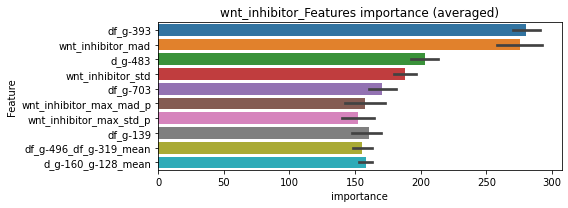

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00606431	valid_1's binary_logloss: 0.0186667
[600]	training's binary_logloss: 0.000801747	valid_1's binary_logloss: 0.00838912
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000442413	valid_1's binary_logloss: 0.00738355


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061096	valid_1's binary_logloss: 0.0322581
[600]	training's binary_logloss: 0.000791308	valid_1's binary_logloss: 0.0185607
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000565309	valid_1's binary_logloss: 0.0176524


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00612359	valid_1's binary_logloss: 0.0156937
[600]	training's binary_logloss: 0.00081539	valid_1's binary_logloss: 0.00506186
[900]	training's binary_logloss: 0.000430934	valid_1's binary_logloss: 0.00374363
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000438024	valid_1's binary_logloss: 0.00373205


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00601201	valid_1's binary_logloss: 0.0228035
[600]	training's binary_logloss: 0.000810423	valid_1's binary_logloss: 0.0115419
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000461947	valid_1's binary_logloss: 0.0100673


wnt_inhibitor logloss: 0.009708827807261577


In [40]:
categorical_cols = []
scores = []
models = []
feature_importance_df = pd.DataFrame()
#importance_cols_df = pd.DataFrame()

for target_col in tqdm(train_targets_scored.columns[1:]):
    _preds, _score, models, _feature_importance_df = run_lgbm(target_col)

    sub[target_col] = _preds
    scores.append(_score)

sub.to_csv('submission.csv', index=False)

In [41]:
print(f"CV:{np.mean(scores)}")

CV:0.02126838191666959
